# Thesis

## Install Library

In [2]:
!pip install roboflow
!pip install ultralytics
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 174.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 191.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 146.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 187.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 187.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 192.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 147.7 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: pillow 10.2.0
    Uninstalling pillow-10.2.0:
      Successfully uninstalled pillow-10.2.0
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━

## Import Library

In [3]:
import time
import os
import csv
import shutil
import yaml
import os
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import defaultdict
from roboflow import Roboflow
from ultralytics import YOLO
from ultralytics.data.annotator import auto_annotate

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Download Dataset

In [6]:
# Dataset Object Detection
rf = Roboflow(api_key="MQdx0fMQ8FiQPaS1VHRH")
project = rf.workspace("abiya-thesis").project("plant-pathology-2021-object-detection-j1jvh")
version = project.version(9)
dataset = version.download("yolov11", location="dataset/object_detection")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to dataset/object_detection in yolov11:: 100%|██████████| 1512/1512 [00:18<00:00, 80.28it/s] 


In [7]:
# Dataset Mask Lesi
rf = Roboflow(api_key="MQdx0fMQ8FiQPaS1VHRH")
project = rf.workspace("abiya-thesis").project("plant-pathology-2021-instance-segmentation-h5pim")
version = project.version(4)
dataset = version.download("yolov11", location="dataset/mask_lesi")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to dataset/mask_lesi in yolov11:: 100%|██████████| 1512/1512 [00:15<00:00, 100.37it/s]


In [8]:
# Dataset Mask Lesi and Leaf
rf = Roboflow(api_key="MQdx0fMQ8FiQPaS1VHRH")
project = rf.workspace("abiya-thesis").project("plant-pathology-2021-instance-segmentation-h5pim")
version = project.version(5)
dataset = version.download("yolov11", location="dataset/mask_lesi_and_leaf")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to dataset/mask_lesi_and_leaf in yolov11:: 100%|██████████| 1512/1512 [00:18<00:00, 79.98it/s] 


In [9]:
# Dataset Leaf Class Only
rf = Roboflow(api_key="MQdx0fMQ8FiQPaS1VHRH")
project = rf.workspace("abiya-thesis").project("plant-pathology-2021-object-detection-j1jvh")
version = project.version(11)
dataset = version.download("yolov11", location="dataset/object_detection_leaf_class_only")        

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to dataset/object_detection_leaf_class_only in yolov11:: 100%|██████████| 1512/1512 [00:19<00:00, 77.76it/s] 


## Global Function

In [1]:
GoogleDrive = False

def measure_and_save_time(start_time, output_path):
    elapsed = time.time() - start_time
    h, rem = divmod(elapsed, 3600)
    m, s = divmod(rem, 60)
    formatted = f"{int(h)}h {int(m)}m {int(s)}s"

    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    with open(output_path, "w") as f:
        f.write(formatted)

## Google Drive

In [15]:
if GoogleDrive:
    from google.colab import drive
    drive.mount('/content/gdrive')
    def copy_to_google_drive(source_folder, destination_folder):
        !cp -r /content/{source_folder} /content/gdrive/MyDrive/{destination_folder}

## Training Object Detection

In [12]:
# Variabel Global
models = ['yolo11n.pt', 'yolo11s.pt', 'yolo11m.pt']
sizes = ['nano', 'small', 'medium']
epochs = 100
batch = -1 # atau -1 untuk limitasi gpu 60%
data_path_objectDetection = "dataset/object_detection"
project_base_objectDetection = "results/object_detection"

In [13]:
for model_name, size in zip(models, sizes):
    print(f"Training {size} model...")
    model = YOLO(model_name)

    start_time = time.time()
    training = model.train(
        data=f"{data_path_objectDetection}/data.yaml", 
        epochs=epochs, 
        imgsz=640, 
        batch=batch, 
        project=f"{project_base_objectDetection}/training", 
        name=f"{size}",
        exist_ok=True
    )

    measure_and_save_time(start_time, f"{project_base_objectDetection}/training/summary/time/{size}-train-time.txt")
    csv_filename = f"{project_base_objectDetection}/training/summary/{size}-training-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(training.to_csv())

    validation = model.val(
        data=f"{data_path_objectDetection}/data.yaml", 
        imgsz=640,
        project=f"{project_base_objectDetection}/validation",
        name=f"{size}",
        exist_ok=True,
        split="test"
    )

    csv_filename = f"{project_base_objectDetection}/validation/summary/{size}-validation-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(validation.to_csv())

    print(f"Finished training and validating {size} model.")

Training nano model...


Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/object_detection/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=nano, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, p

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

YOLO11n summary: 181 layers, 2,590,425 parameters, 2,590,409 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.3±0.0 ms, read: 143.9±91.8 MB/s, size: 730.3 KB)


train: Scanning /workspace/dataset/object_detection/train/labels... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:00<00:00, 559.83it/s]


train: New cache created: /workspace/dataset/object_detection/train/labels.cache
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.64G total, 0.09G reserved, 0.06G allocated, 23.49G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     2590425       6.443         0.461          30.5         166.1        (1, 3, 640, 640)                    list
     2590425       12.89         0.608         19.42         68.52        (2, 3, 640, 640)                    list
     2590425       25.77         0.902         21.74          66.8        (4, 3, 640, 640)                    list
     2590425       51.54         1.527         23.92          66.7        (8, 3, 640, 640)                    list
     2590425       103.1         2.766          30.7         66.81       (16, 3, 640, 640)                    list
     2590425       206.2         5.060

train: Scanning /workspace/dataset/object_detection/train/labels.cache... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.2±0.1 ms, read: 205.4±61.4 MB/s, size: 722.8 KB)


val: Scanning /workspace/dataset/object_detection/valid/labels... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 854.49it/s]

val: New cache created: /workspace/dataset/object_detection/valid/labels.cache


Plotting labels to results/object_detection/training/nano/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0007265625), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/object_detection/training/nano
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      12.7G      1.079      3.209      1.504        335        640: 100%|██████████| 6/6 [00:16<00:00,  2.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all         75        132    0.00509       0.91     0.0974     0.0712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      12.6G     0.9086      3.116      1.367        292        640: 100%|██████████| 6/6 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         75        132     0.0056      0.971       0.28      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      12.7G     0.6868      2.771      1.175        288        640: 100%|██████████| 6/6 [00:02<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         75        132    0.00835       0.99      0.307      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      12.7G     0.6845      2.424      1.166        289        640: 100%|██████████| 6/6 [00:01<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         75        132    0.00665      0.995      0.256      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      12.6G     0.6919      2.083      1.167        343        640: 100%|██████████| 6/6 [00:03<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]

                   all         75        132    0.00613      0.995      0.523      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      12.5G     0.6663      1.759      1.169        300        640: 100%|██████████| 6/6 [00:01<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

                   all         75        132    0.00721          1      0.665      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      12.7G     0.6538      1.493      1.157        273        640: 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         75        132      0.677      0.161      0.585      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      12.6G     0.6435      1.393      1.126        274        640: 100%|██████████| 6/6 [00:01<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


                   all         75        132      0.421      0.489      0.485      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      12.7G     0.6432      1.267      1.111        316        640: 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

                   all         75        132    0.00592      0.968      0.258      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      12.7G     0.6416      1.243       1.12        296        640: 100%|██████████| 6/6 [00:01<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]

                   all         75        132       0.86      0.185      0.398       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      12.7G     0.6307      1.217      1.108        256        640: 100%|██████████| 6/6 [00:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all         75        132      0.565      0.256      0.369      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      12.6G     0.6225      1.195      1.099        289        640: 100%|██████████| 6/6 [00:01<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         75        132      0.674      0.454      0.606      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      12.7G     0.6323       1.14      1.093        340        640: 100%|██████████| 6/6 [00:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         75        132      0.874      0.448      0.727      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      12.7G     0.6376      1.112      1.102        269        640: 100%|██████████| 6/6 [00:01<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]

                   all         75        132      0.721      0.195      0.393      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      12.5G     0.6441      1.093      1.118        269        640: 100%|██████████| 6/6 [00:01<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all         75        132      0.631      0.321      0.375       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      12.7G      0.635      1.092      1.101        232        640: 100%|██████████| 6/6 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all         75        132      0.394      0.398       0.46      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      12.7G     0.6493       1.08      1.097        277        640: 100%|██████████| 6/6 [00:01<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         75        132      0.425      0.602      0.502      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      12.6G     0.6625      1.076      1.111        325        640: 100%|██████████| 6/6 [00:01<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         75        132       0.66      0.347      0.456      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      12.7G     0.6839      1.127      1.137        282        640: 100%|██████████| 6/6 [00:01<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]

                   all         75        132      0.327      0.611      0.421      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      12.5G     0.6597       1.04      1.106        312        640: 100%|██████████| 6/6 [00:01<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]

                   all         75        132      0.309      0.467      0.392      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      12.6G     0.6352     0.9822      1.094        307        640: 100%|██████████| 6/6 [00:01<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]

                   all         75        132      0.461      0.483      0.389      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      12.5G     0.6421     0.9556      1.096        256        640: 100%|██████████| 6/6 [00:01<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]

                   all         75        132      0.604      0.631      0.598      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      12.7G     0.6374     0.9498      1.091        306        640: 100%|██████████| 6/6 [00:01<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]

                   all         75        132      0.855      0.371      0.635      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      12.7G     0.6075     0.9115      1.077        263        640: 100%|██████████| 6/6 [00:01<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         75        132      0.584      0.606      0.641      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      12.6G     0.6196     0.9054      1.084        303        640: 100%|██████████| 6/6 [00:01<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]

                   all         75        132      0.689       0.58      0.702      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      12.5G     0.6132     0.8682      1.081        330        640: 100%|██████████| 6/6 [00:01<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]

                   all         75        132      0.595      0.568      0.561      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      12.6G     0.6128     0.8769      1.081        295        640: 100%|██████████| 6/6 [00:01<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

                   all         75        132        0.6      0.506      0.522      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      12.6G      0.581     0.8722      1.069        276        640: 100%|██████████| 6/6 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]

                   all         75        132      0.676      0.559      0.588      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      12.6G     0.5849     0.8544      1.064        310        640: 100%|██████████| 6/6 [00:01<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all         75        132      0.419      0.558      0.481      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      12.7G     0.5903     0.8393      1.074        333        640: 100%|██████████| 6/6 [00:01<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         75        132      0.375      0.489      0.388      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      12.7G     0.5809     0.8035      1.064        268        640: 100%|██████████| 6/6 [00:01<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         75        132      0.738      0.575      0.722      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      12.6G     0.5784      0.787      1.064        289        640: 100%|██████████| 6/6 [00:01<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all         75        132      0.646      0.643      0.673      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      12.7G     0.5731     0.7824      1.057        286        640: 100%|██████████| 6/6 [00:01<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         75        132      0.731      0.667      0.757      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      12.6G     0.5706     0.7945      1.066        261        640: 100%|██████████| 6/6 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


                   all         75        132      0.781      0.438      0.619      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      12.7G     0.5663     0.7605      1.049        327        640: 100%|██████████| 6/6 [00:01<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all         75        132      0.433      0.683      0.599      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      12.7G     0.5597     0.7635      1.056        275        640: 100%|██████████| 6/6 [00:01<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

                   all         75        132      0.632      0.672      0.714       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      12.7G      0.553     0.7409      1.051        274        640: 100%|██████████| 6/6 [00:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all         75        132      0.668      0.737       0.79      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      12.6G     0.5686     0.7511       1.06        290        640: 100%|██████████| 6/6 [00:01<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]

                   all         75        132      0.778      0.687      0.804      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      12.6G     0.5433     0.7315      1.038        265        640: 100%|██████████| 6/6 [00:01<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]

                   all         75        132      0.555      0.633      0.738      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      12.6G     0.5396     0.7069      1.051        258        640: 100%|██████████| 6/6 [00:01<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]

                   all         75        132      0.905      0.486       0.78      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      12.6G     0.5377     0.6964      1.036        281        640: 100%|██████████| 6/6 [00:01<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]

                   all         75        132      0.766      0.783      0.865      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      12.7G     0.5372     0.6822      1.031        319        640: 100%|██████████| 6/6 [00:01<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all         75        132      0.763      0.797      0.865      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      12.5G     0.5398     0.6881      1.039        258        640: 100%|██████████| 6/6 [00:01<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         75        132      0.705      0.838      0.875      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      12.7G     0.5148     0.6638      1.018        284        640: 100%|██████████| 6/6 [00:01<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]

                   all         75        132      0.615      0.721      0.748      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      12.6G     0.5162     0.6547      1.023        283        640: 100%|██████████| 6/6 [00:01<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]

                   all         75        132      0.797      0.606      0.743      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      12.7G     0.5241     0.6486      1.035        297        640: 100%|██████████| 6/6 [00:01<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all         75        132      0.875      0.594      0.819      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      12.6G     0.5186     0.6532       1.03        310        640: 100%|██████████| 6/6 [00:01<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]

                   all         75        132      0.746      0.671      0.774      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      12.7G     0.5072     0.6419       1.02        281        640: 100%|██████████| 6/6 [00:01<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]

                   all         75        132      0.851      0.767      0.837      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      12.8G     0.4939     0.6268      1.005        273        640: 100%|██████████| 6/6 [00:01<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]

                   all         75        132      0.843      0.776       0.85      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      12.5G     0.5052     0.5971      1.026        319        640: 100%|██████████| 6/6 [00:01<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]

                   all         75        132      0.876      0.791      0.868      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      12.5G     0.4853     0.5991     0.9987        269        640: 100%|██████████| 6/6 [00:01<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


                   all         75        132      0.818      0.719      0.825      0.745

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      12.7G     0.4827     0.5741     0.9982        326        640: 100%|██████████| 6/6 [00:01<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]

                   all         75        132      0.834      0.709      0.848      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      12.8G     0.4736     0.5926     0.9934        321        640: 100%|██████████| 6/6 [00:01<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all         75        132      0.818      0.758       0.86      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      12.7G      0.501     0.5983      1.016        287        640: 100%|██████████| 6/6 [00:01<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

                   all         75        132      0.784       0.68      0.797      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      12.7G     0.4885       0.59      1.003        310        640: 100%|██████████| 6/6 [00:01<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]

                   all         75        132      0.765      0.748      0.865      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      12.7G     0.4882     0.5709      1.018        297        640: 100%|██████████| 6/6 [00:01<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                   all         75        132      0.781      0.763      0.869      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      12.7G     0.4777     0.5971      1.017        282        640: 100%|██████████| 6/6 [00:01<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         75        132      0.846      0.768      0.882      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      12.7G     0.4745     0.5573     0.9991        315        640: 100%|██████████| 6/6 [00:01<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]

                   all         75        132      0.816      0.804      0.873      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      12.6G     0.4637     0.5509      1.003        262        640: 100%|██████████| 6/6 [00:01<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]

                   all         75        132      0.812      0.771      0.862      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      12.6G     0.4614     0.5272     0.9947        252        640: 100%|██████████| 6/6 [00:01<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]

                   all         75        132      0.761      0.774      0.858      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      12.7G      0.467     0.5195      1.007        290        640: 100%|██████████| 6/6 [00:01<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]

                   all         75        132      0.904      0.738      0.895      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      12.6G     0.4567     0.5406     0.9928        301        640: 100%|██████████| 6/6 [00:01<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]

                   all         75        132       0.72       0.76      0.798      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      12.7G     0.4525     0.5409     0.9988        284        640: 100%|██████████| 6/6 [00:01<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]

                   all         75        132      0.931      0.748      0.909      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      12.6G     0.4634     0.5357     0.9929        265        640: 100%|██████████| 6/6 [00:01<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]

                   all         75        132      0.915      0.787      0.914      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      12.7G     0.4434      0.504      0.982        314        640: 100%|██████████| 6/6 [00:01<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]

                   all         75        132      0.926      0.814      0.913      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      12.7G     0.4516     0.5158     0.9925        283        640: 100%|██████████| 6/6 [00:01<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all         75        132      0.919      0.844      0.906      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      12.7G     0.4467      0.511     0.9834        292        640: 100%|██████████| 6/6 [00:01<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]

                   all         75        132      0.814      0.813      0.898      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      12.6G     0.4522     0.5028     0.9964        308        640: 100%|██████████| 6/6 [00:01<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]

                   all         75        132      0.834      0.732      0.878      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      12.7G     0.4498     0.5003     0.9873        285        640: 100%|██████████| 6/6 [00:01<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all         75        132      0.856      0.785      0.903       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      12.6G     0.4443     0.4879     0.9811        266        640: 100%|██████████| 6/6 [00:01<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]

                   all         75        132      0.901      0.847      0.925      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      12.7G     0.4481     0.4833     0.9875        279        640: 100%|██████████| 6/6 [00:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]

                   all         75        132      0.914       0.81      0.924      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      12.5G      0.425     0.4679      0.962        316        640: 100%|██████████| 6/6 [00:01<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]

                   all         75        132      0.883      0.823      0.907      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      12.7G     0.4253     0.4427     0.9713        273        640: 100%|██████████| 6/6 [00:01<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.76it/s]

                   all         75        132      0.798      0.809      0.891      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      12.7G     0.4109     0.4453     0.9656        291        640: 100%|██████████| 6/6 [00:01<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all         75        132      0.817      0.791      0.884      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      12.7G     0.4218     0.4606     0.9681        283        640: 100%|██████████| 6/6 [00:01<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         75        132      0.873      0.795      0.878      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      12.5G     0.4041     0.4498     0.9656        298        640: 100%|██████████| 6/6 [00:01<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]

                   all         75        132      0.902      0.817      0.895      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      12.7G     0.4339     0.4442     0.9856        292        640: 100%|██████████| 6/6 [00:01<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]

                   all         75        132      0.899       0.78      0.897      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      12.7G     0.4245     0.4379     0.9683        276        640: 100%|██████████| 6/6 [00:01<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]

                   all         75        132      0.848      0.807      0.912      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      12.6G     0.4064     0.4389     0.9691        282        640: 100%|██████████| 6/6 [00:01<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]

                   all         75        132      0.827       0.77       0.89      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      12.7G     0.4116     0.4465      0.968        295        640: 100%|██████████| 6/6 [00:01<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         75        132      0.806      0.669      0.836      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      12.7G     0.4064     0.4454     0.9684        267        640: 100%|██████████| 6/6 [00:01<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]

                   all         75        132      0.858      0.671      0.865      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      12.6G     0.3999     0.4228     0.9646        265        640: 100%|██████████| 6/6 [00:01<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]

                   all         75        132      0.699      0.707       0.82       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      12.7G     0.3977     0.4314      0.965        289        640: 100%|██████████| 6/6 [00:01<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]

                   all         75        132      0.802      0.754      0.885       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      12.7G     0.3994     0.4239     0.9639        271        640: 100%|██████████| 6/6 [00:01<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]

                   all         75        132      0.885      0.813      0.927      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      12.7G     0.3989     0.4164     0.9652        270        640: 100%|██████████| 6/6 [00:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]

                   all         75        132      0.928      0.791      0.917      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      12.7G     0.4004      0.422     0.9692        292        640: 100%|██████████| 6/6 [00:01<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]

                   all         75        132      0.951      0.823       0.91       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      12.7G     0.3802     0.3974      0.953        310        640: 100%|██████████| 6/6 [00:01<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         75        132      0.918      0.812      0.921      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      12.5G     0.3888      0.407     0.9626        269        640: 100%|██████████| 6/6 [00:01<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all         75        132      0.938      0.802       0.92      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      12.7G      0.396     0.4126     0.9634        293        640: 100%|██████████| 6/6 [00:01<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.72it/s]

                   all         75        132      0.952      0.784      0.915      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      12.7G     0.3781      0.392     0.9523        309        640: 100%|██████████| 6/6 [00:01<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]

                   all         75        132       0.93        0.8      0.927      0.865


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      13.2G     0.3384     0.5313     0.9118        117        640: 100%|██████████| 6/6 [00:06<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]

                   all         75        132      0.918      0.798       0.89      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      12.6G      0.309     0.3831     0.8767        110        640: 100%|██████████| 6/6 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         75        132      0.897      0.787      0.863      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      12.5G     0.2927     0.3284     0.8662        128        640: 100%|██████████| 6/6 [00:02<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]

                   all         75        132      0.839      0.844      0.904      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      12.6G     0.2837     0.3179     0.8633        128        640: 100%|██████████| 6/6 [00:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         75        132      0.955      0.787      0.927      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      12.6G     0.2843     0.3089      0.867        116        640: 100%|██████████| 6/6 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]

                   all         75        132      0.942      0.819      0.924      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      12.6G     0.2645     0.2917     0.8562        124        640: 100%|██████████| 6/6 [00:01<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.59it/s]

                   all         75        132      0.943      0.802      0.925      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      12.6G     0.2956     0.3039     0.8816        118        640: 100%|██████████| 6/6 [00:01<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]

                   all         75        132      0.962      0.791      0.931      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      12.6G     0.2684     0.2806      0.856        120        640: 100%|██████████| 6/6 [00:01<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]

                   all         75        132      0.884      0.855      0.931       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      12.6G     0.2655     0.2738     0.8537        116        640: 100%|██████████| 6/6 [00:01<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all         75        132      0.921      0.842      0.932      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      12.6G     0.2569     0.2735     0.8467        126        640: 100%|██████████| 6/6 [00:01<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]

                   all         75        132      0.934      0.838      0.935      0.871



100 epochs completed in 0.063 hours.
Optimizer stripped from results/object_detection/training/nano/weights/last.pt, 5.5MB
Optimizer stripped from results/object_detection/training/nano/weights/best.pt, 5.5MB

Validating results/object_detection/training/nano/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]


                   all         75        132      0.884      0.813      0.927      0.878
    frog-eye-leaf-spot         25         34          1      0.649      0.906      0.863
               healthy         25         71      0.865      0.789      0.908      0.843
                  rust         25         27      0.788          1      0.967      0.927
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to results/object_detection/training/nano
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.7±0.9 ms, read: 123.6±72.2 MB/s, size: 737.7 KB)


val: Scanning /workspace/dataset/object_detection/test/labels... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<00:00, 541.09it/s]


val: New cache created: /workspace/dataset/object_detection/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.88s/it]


                   all        150        248       0.91      0.804      0.913      0.867
    frog-eye-leaf-spot         50         54      0.969      0.704       0.91      0.887
               healthy         50        144      0.932      0.767      0.908       0.83
                  rust         50         50      0.828       0.94      0.921      0.884
Speed: 1.8ms preprocess, 0.7ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to results/object_detection/validation/nano
Finished training and validating nano model.
Training small model...


Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/object_detection/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=small, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

train: Scanning /workspace/dataset/object_detection/train/labels.cache... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.64G total, 2.21G reserved, 0.17G allocated, 21.26G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     9428953       21.55         1.105         23.65         74.88        (1, 3, 640, 640)                    list
     9428953       43.11         1.317         22.07         54.91        (2, 3, 640, 640)                    list
     9428953       86.21         1.873         25.13         55.33        (4, 3, 640, 640)                    list
     9428953       172.4         2.961         31.12         58.09        (8, 3, 640, 640)                    list
     9428953       344.8         4.998         37.42         58.06       (16, 3, 640, 640)                    list
     9428953       689.7         9.215         56.46         72.37       (32, 3, 640, 640)                    list
     9428953        1379        17.538         90.33         120.7       (64, 3, 640, 640)                    list
AutoBatch: Using batch-size 46 for CUDA:0 15.23G/23.64G (64%) ✅
train: Fast imag

train: Scanning /workspace/dataset/object_detection/train/labels.cache... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.2±0.0 ms, read: 585.2±285.5 MB/s, size: 722.8 KB)


val: Scanning /workspace/dataset/object_detection/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to results/object_detection/training/small/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.000359375), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/object_detection/training/small
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      10.9G     0.9631      3.351      1.432        114        640: 100%|██████████| 12/12 [00:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all         75        132      0.493      0.303      0.164      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      10.9G     0.6699      1.712      1.168         89        640: 100%|██████████| 12/12 [00:02<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         75        132      0.369      0.672      0.388      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      10.9G     0.6587      1.182      1.135         88        640: 100%|██████████| 12/12 [00:02<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         75        132      0.484      0.666      0.559      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      10.9G     0.7209      1.096      1.161         89        640: 100%|██████████| 12/12 [00:02<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


                   all         75        132      0.465      0.712      0.519      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      10.9G     0.7633      1.109      1.204         77        640: 100%|██████████| 12/12 [00:04<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all         75        132      0.392      0.276      0.228      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      10.9G     0.7893      1.119      1.198         90        640: 100%|██████████| 12/12 [00:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all         75        132      0.151      0.279      0.164     0.0916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      10.9G        0.8       1.15      1.231         96        640: 100%|██████████| 12/12 [00:04<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]

                   all         75        132     0.0609     0.0423     0.0127    0.00569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      10.9G      0.863      1.182      1.257         99        640: 100%|██████████| 12/12 [00:02<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         75        132     0.0649      0.199     0.0463     0.0178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      10.9G     0.8719      1.157      1.257         77        640: 100%|██████████| 12/12 [00:02<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         75        132      0.109      0.151     0.0831     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      10.9G     0.8549      1.138      1.242        112        640: 100%|██████████| 12/12 [00:02<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         75        132     0.0289      0.232     0.0134    0.00518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      10.9G     0.8529      1.112      1.243         91        640: 100%|██████████| 12/12 [00:02<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         75        132     0.0494     0.0896     0.0351     0.0161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      10.9G     0.8001      1.081      1.194        123        640: 100%|██████████| 12/12 [00:01<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         75        132     0.0612     0.0376     0.0173     0.0106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      10.9G     0.7851      1.018      1.203         90        640: 100%|██████████| 12/12 [00:02<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]

                   all         75        132      0.634       0.31      0.327      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      10.9G     0.8068      1.042      1.219         97        640: 100%|██████████| 12/12 [00:02<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all         75        132      0.143       0.37      0.136     0.0749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      10.9G     0.7441     0.9496      1.165         92        640: 100%|██████████| 12/12 [00:04<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


                   all         75        132      0.301      0.436      0.195      0.117

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      10.9G     0.7412     0.9276      1.177         81        640: 100%|██████████| 12/12 [00:02<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                   all         75        132       0.44      0.604      0.492      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      10.9G     0.7644     0.9648      1.183        110        640: 100%|██████████| 12/12 [00:02<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]

                   all         75        132      0.529      0.725      0.588      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      10.9G     0.7576     0.9489      1.181         98        640: 100%|██████████| 12/12 [00:02<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]

                   all         75        132      0.684       0.71      0.745      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      10.9G     0.6997     0.9153      1.155         88        640: 100%|██████████| 12/12 [00:02<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all         75        132      0.779      0.693      0.794      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      10.9G       0.69     0.8817       1.14         79        640: 100%|██████████| 12/12 [00:02<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                   all         75        132      0.778      0.716      0.801      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      10.9G     0.6866     0.8577      1.132         98        640: 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all         75        132      0.518      0.678      0.663      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      10.9G     0.6471      0.819      1.104        113        640: 100%|██████████| 12/12 [00:02<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

                   all         75        132      0.808      0.743      0.828      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      10.9G     0.6663     0.8275      1.121         75        640: 100%|██████████| 12/12 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]

                   all         75        132      0.803      0.761       0.84      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      10.9G     0.6507     0.8259      1.116         75        640: 100%|██████████| 12/12 [00:02<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]

                   all         75        132       0.53      0.679      0.594      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      10.9G      0.647     0.8127      1.108         93        640: 100%|██████████| 12/12 [00:02<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all         75        132      0.849      0.691      0.825      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      10.9G     0.6461     0.7861       1.11         94        640: 100%|██████████| 12/12 [00:01<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]

                   all         75        132      0.617      0.728      0.769      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      10.9G     0.6143     0.8178      1.102         72        640: 100%|██████████| 12/12 [00:02<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


                   all         75        132      0.829      0.761      0.883      0.775

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      10.9G     0.6312     0.7746      1.097         90        640: 100%|██████████| 12/12 [00:02<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         75        132      0.789      0.777      0.885      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      10.9G     0.6201     0.7399      1.101        102        640: 100%|██████████| 12/12 [00:02<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]

                   all         75        132      0.903      0.833      0.904      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      10.9G     0.6001     0.7374      1.087         84        640: 100%|██████████| 12/12 [00:02<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]

                   all         75        132      0.948      0.803      0.913      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      10.9G     0.6099      0.743      1.082        112        640: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]

                   all         75        132      0.705      0.687      0.799      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      10.9G     0.6058     0.7343      1.088         99        640: 100%|██████████| 12/12 [00:02<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]

                   all         75        132      0.897      0.794      0.896      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      10.9G     0.6207     0.7382      1.102         97        640: 100%|██████████| 12/12 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]

                   all         75        132      0.757      0.734      0.742       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      10.9G     0.5975     0.7204       1.08        110        640: 100%|██████████| 12/12 [00:02<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         75        132      0.844      0.661      0.795        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      10.9G     0.5925     0.7339      1.077        119        640: 100%|██████████| 12/12 [00:02<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

                   all         75        132      0.908      0.801      0.919      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      10.9G     0.5725     0.6891      1.064        113        640: 100%|██████████| 12/12 [00:02<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]

                   all         75        132        0.9      0.815      0.924       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      10.9G     0.5784     0.6866      1.073         83        640: 100%|██████████| 12/12 [00:02<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]

                   all         75        132      0.957      0.758      0.943      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      10.9G      0.572     0.6793       1.06         91        640: 100%|██████████| 12/12 [00:02<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]

                   all         75        132      0.809      0.608      0.765      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      10.9G     0.5727     0.6887      1.074         61        640: 100%|██████████| 12/12 [00:02<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


                   all         75        132       0.92      0.761      0.883      0.772

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      10.9G     0.5633     0.6769       1.06         89        640: 100%|██████████| 12/12 [00:02<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         75        132      0.859      0.812      0.888      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      10.9G     0.5562     0.6688       1.06         91        640: 100%|██████████| 12/12 [00:03<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]

                   all         75        132      0.737      0.757      0.742      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      10.9G     0.5544     0.6556      1.066        103        640: 100%|██████████| 12/12 [00:01<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]

                   all         75        132      0.871      0.781      0.924      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      10.9G     0.5404     0.6293      1.044         95        640: 100%|██████████| 12/12 [00:02<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]

                   all         75        132      0.835      0.851      0.901      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      10.9G     0.5481     0.6522      1.052         76        640: 100%|██████████| 12/12 [00:02<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all         75        132      0.898      0.843      0.913      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      10.9G     0.5404     0.6322      1.045         71        640: 100%|██████████| 12/12 [00:02<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         75        132      0.906      0.871      0.948      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      10.9G      0.514     0.6013       1.03        111        640: 100%|██████████| 12/12 [00:01<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]

                   all         75        132      0.844       0.83      0.916      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      10.9G     0.5307     0.6242      1.031         88        640: 100%|██████████| 12/12 [00:02<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]

                   all         75        132      0.826      0.859      0.904      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      10.9G     0.5364     0.6273      1.052         84        640: 100%|██████████| 12/12 [00:02<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]

                   all         75        132      0.812      0.808      0.889      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      10.9G     0.5312     0.5989      1.044        100        640: 100%|██████████| 12/12 [00:02<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]

                   all         75        132      0.889      0.841       0.91      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      10.9G     0.5322     0.6196      1.046        118        640: 100%|██████████| 12/12 [00:02<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]

                   all         75        132      0.934      0.841       0.94      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      10.9G     0.5274     0.6255      1.034        103        640: 100%|██████████| 12/12 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]

                   all         75        132      0.934      0.818      0.887      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      10.9G     0.5032     0.6057      1.038         75        640: 100%|██████████| 12/12 [00:02<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all         75        132      0.949      0.858      0.927      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      10.9G     0.5034     0.5882      1.022        112        640: 100%|██████████| 12/12 [00:02<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]

                   all         75        132      0.923      0.861      0.935      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      10.9G     0.4944     0.5716      1.016         98        640: 100%|██████████| 12/12 [00:01<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]

                   all         75        132      0.912      0.861      0.926      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      10.9G     0.5012     0.5404      1.019        105        640: 100%|██████████| 12/12 [00:01<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all         75        132      0.914      0.814      0.909      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      10.9G     0.4969     0.5472       1.03         86        640: 100%|██████████| 12/12 [00:01<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all         75        132      0.941      0.846      0.942      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      10.9G     0.4968     0.5587       1.02         89        640: 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]

                   all         75        132       0.92      0.905      0.961       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      10.9G     0.4942     0.5578       1.02         80        640: 100%|██████████| 12/12 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]

                   all         75        132      0.856      0.837      0.879      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      10.9G     0.4948      0.556      1.027         90        640: 100%|██████████| 12/12 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]

                   all         75        132      0.825      0.821      0.916      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      10.9G     0.4854      0.523      1.012         99        640: 100%|██████████| 12/12 [00:01<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]

                   all         75        132      0.849      0.823      0.879        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      10.9G      0.474     0.5227      1.014         86        640: 100%|██████████| 12/12 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all         75        132      0.739      0.765      0.865      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      10.9G     0.4663     0.5326      1.007         88        640: 100%|██████████| 12/12 [00:02<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]

                   all         75        132      0.872      0.768      0.882      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      10.9G     0.4644     0.5232       1.01         85        640: 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all         75        132      0.905      0.808      0.912       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      10.9G     0.4754     0.5186      1.015        101        640: 100%|██████████| 12/12 [00:01<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all         75        132      0.942      0.844      0.936       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      10.9G     0.4586     0.4866     0.9933        122        640: 100%|██████████| 12/12 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         75        132      0.894       0.87      0.936       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      10.9G     0.4601      0.516      1.008         91        640: 100%|██████████| 12/12 [00:02<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all         75        132      0.948      0.868      0.941      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      10.9G     0.4618     0.4837     0.9949         75        640: 100%|██████████| 12/12 [00:02<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all         75        132      0.952      0.858       0.94      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      10.9G     0.4409     0.4598      0.982        104        640: 100%|██████████| 12/12 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]

                   all         75        132       0.93      0.829       0.92      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      10.9G     0.4439     0.4871      0.993         77        640: 100%|██████████| 12/12 [00:02<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all         75        132      0.967      0.901      0.955      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      10.9G       0.45      0.475     0.9991         86        640: 100%|██████████| 12/12 [00:02<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]

                   all         75        132      0.917      0.855      0.948      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      10.9G     0.4393     0.4601     0.9899         87        640: 100%|██████████| 12/12 [00:02<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]

                   all         75        132       0.96      0.804      0.938      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      10.9G     0.4438     0.4833     0.9975         84        640: 100%|██████████| 12/12 [00:02<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all         75        132      0.896      0.854      0.928      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      10.9G     0.4265     0.4592      0.978         74        640: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

                   all         75        132       0.94      0.831      0.943      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      10.9G     0.4127     0.4622     0.9694        106        640: 100%|██████████| 12/12 [00:02<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]

                   all         75        132       0.97      0.875      0.958      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      10.9G     0.4099     0.4447     0.9793         76        640: 100%|██████████| 12/12 [00:03<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all         75        132      0.939      0.886      0.961      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      10.9G     0.4213     0.4642     0.9696         85        640: 100%|██████████| 12/12 [00:02<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         75        132      0.978      0.863      0.949        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      10.9G     0.4235     0.4444     0.9835         93        640: 100%|██████████| 12/12 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]

                   all         75        132       0.96       0.86      0.948        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      10.9G     0.4185     0.4403     0.9888         82        640: 100%|██████████| 12/12 [00:02<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]

                   all         75        132      0.968      0.835       0.95      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      10.9G     0.4173     0.4277     0.9728         93        640: 100%|██████████| 12/12 [00:03<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]

                   all         75        132      0.967      0.865      0.957      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      10.9G     0.3929     0.4115     0.9652         83        640: 100%|██████████| 12/12 [00:02<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]

                   all         75        132      0.979      0.846      0.952      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      10.9G     0.4097     0.4252     0.9808         84        640: 100%|██████████| 12/12 [00:02<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]

                   all         75        132      0.943      0.859      0.943      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      10.9G     0.4152     0.4153     0.9736         89        640: 100%|██████████| 12/12 [00:02<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]

                   all         75        132      0.979      0.879      0.964      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      10.9G      0.408     0.4197     0.9791         81        640: 100%|██████████| 12/12 [00:02<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all         75        132      0.905       0.87      0.952        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      10.9G     0.3873     0.3988     0.9554         94        640: 100%|██████████| 12/12 [00:02<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         75        132      0.953      0.886       0.96      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      10.9G     0.3968     0.4011     0.9635         88        640: 100%|██████████| 12/12 [00:02<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]


                   all         75        132      0.933      0.867      0.948      0.899

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      10.9G     0.3861      0.404      0.967         93        640: 100%|██████████| 12/12 [00:02<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]

                   all         75        132      0.931      0.835      0.947       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      10.9G     0.3943     0.3919     0.9686         79        640: 100%|██████████| 12/12 [00:02<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         75        132      0.944      0.896      0.958      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      10.9G     0.3806     0.3875     0.9591         90        640: 100%|██████████| 12/12 [00:02<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]

                   all         75        132      0.959      0.905       0.96      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      10.9G     0.3797     0.3875     0.9608         85        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all         75        132      0.962      0.895      0.958      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      10.9G     0.4008     0.3957     0.9685         80        640: 100%|██████████| 12/12 [00:01<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         75        132      0.923      0.901      0.951      0.896


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      10.9G     0.3102     0.3739     0.8832         38        640: 100%|██████████| 12/12 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]

                   all         75        132       0.96      0.853      0.946      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      10.9G     0.2942     0.2835     0.8752         44        640: 100%|██████████| 12/12 [00:02<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]

                   all         75        132      0.957      0.884      0.951      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      10.9G     0.2881     0.2656     0.8753         34        640: 100%|██████████| 12/12 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.07it/s]

                   all         75        132      0.942      0.887      0.958      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      10.9G     0.3069     0.2767     0.8984         42        640: 100%|██████████| 12/12 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]

                   all         75        132      0.963       0.89      0.964      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      10.9G     0.2727     0.2466     0.8579         33        640: 100%|██████████| 12/12 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all         75        132      0.975      0.887      0.962        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      10.9G     0.2673     0.2554     0.8644         33        640: 100%|██████████| 12/12 [00:01<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]

                   all         75        132      0.961      0.914      0.967      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      10.9G     0.2615     0.2374     0.8541         43        640: 100%|██████████| 12/12 [00:03<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         75        132      0.958       0.91      0.968      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      10.9G     0.2654     0.2387     0.8605         37        640: 100%|██████████| 12/12 [00:02<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all         75        132      0.936      0.919      0.965       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      10.9G     0.2669     0.2421     0.8652         41        640: 100%|██████████| 12/12 [00:02<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         75        132      0.927      0.921      0.967       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      10.9G     0.2583      0.232     0.8739         31        640: 100%|██████████| 12/12 [00:01<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]

                   all         75        132      0.964      0.891      0.969       0.91



100 epochs completed in 0.090 hours.
Optimizer stripped from results/object_detection/training/small/weights/last.pt, 19.2MB
Optimizer stripped from results/object_detection/training/small/weights/best.pt, 19.2MB

Validating results/object_detection/training/small/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]


                   all         75        132      0.962      0.914      0.967      0.915
    frog-eye-leaf-spot         25         34      0.968      0.896      0.956      0.928
               healthy         25         71      0.966      0.845      0.951      0.867
                  rust         25         27      0.952          1      0.995      0.949
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to results/object_detection/training/small
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 120.8±75.5 MB/s, size: 737.7 KB)


val: Scanning /workspace/dataset/object_detection/test/labels.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


                   all        150        248      0.918      0.877      0.956      0.925
    frog-eye-leaf-spot         50         54       0.82      0.963      0.973      0.965
               healthy         50        144      0.991      0.728      0.926      0.854
                  rust         50         50      0.942       0.94      0.969      0.955
Speed: 2.5ms preprocess, 3.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to results/object_detection/validation/small
Finished training and validating small model.
Training medium model...


Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/object_detection/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=medium, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True,

train: Scanning /workspace/dataset/object_detection/train/labels.cache... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.64G total, 3.07G reserved, 0.43G allocated, 20.15G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    20055321        68.2         1.613         35.44         71.15        (1, 3, 640, 640)                    list
    20055321       136.4         2.374         33.95         55.53        (2, 3, 640, 640)                    list
    20055321       272.8         3.370         35.92         51.93        (4, 3, 640, 640)                    list
    20055321       545.6         5.557         55.44          54.7        (8, 3, 640, 640)                    list
    20055321        1091         9.634         63.16         82.28       (16, 3, 640, 640)                    list
    20055321        2182        18.101         99.05         126.4       (32, 3, 640, 640)                    list
CUDA out of memory. Tried to allocate 100.00 MiB. GPU 0 has a total capacity of 23.64 GiB of which 28.81 MiB is free. Process 468591 has 23.59 GiB memory in use. Of the allocated memory 22.94 GiB

train: Scanning /workspace/dataset/object_detection/train/labels.cache... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.2±0.0 ms, read: 321.5±175.1 MB/s, size: 722.8 KB)


val: Scanning /workspace/dataset/object_detection/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to results/object_detection/training/medium/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.00046875), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/object_detection/training/medium
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      9.86G     0.8798      2.278      1.367         17        640: 100%|██████████| 27/27 [00:04<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.20it/s]

                   all         75        132     0.0899      0.143     0.0696     0.0319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      9.86G     0.9042      1.479      1.321         16        640: 100%|██████████| 27/27 [00:04<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.33it/s]

                   all         75        132      0.174      0.224      0.147     0.0655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      9.86G     0.9973       1.49       1.38         18        640: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.00it/s]

                   all         75        132     0.0161     0.0423     0.0068    0.00361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      9.86G      1.059      1.407      1.397         25        640: 100%|██████████| 27/27 [00:04<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         75        132   0.000683     0.0145    0.00031   0.000121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      9.86G     0.9876      1.385      1.356         19        640: 100%|██████████| 27/27 [00:03<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         75        132     0.0466     0.0934     0.0207    0.00676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      9.86G       1.02      1.412      1.372         28        640: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.32it/s]

                   all         75        132      0.137      0.216     0.0894     0.0419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      9.86G     0.9332      1.281      1.317         20        640: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.25it/s]

                   all         75        132      0.259      0.434      0.249       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      9.86G     0.9179      1.219      1.319         19        640: 100%|██████████| 27/27 [00:04<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         75        132      0.548       0.42      0.439      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      9.86G     0.8748      1.187      1.275         35        640: 100%|██████████| 27/27 [00:03<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.67it/s]

                   all         75        132       0.71      0.423      0.499      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      9.86G     0.8552      1.171      1.264         36        640: 100%|██████████| 27/27 [00:03<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.05it/s]

                   all         75        132      0.416      0.504      0.381      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      9.86G     0.8751      1.152      1.274         19        640: 100%|██████████| 27/27 [00:03<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.94it/s]

                   all         75        132      0.714      0.528       0.61      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      9.86G      0.845      1.117      1.276         20        640: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.42it/s]

                   all         75        132      0.757      0.627      0.716      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      9.86G     0.8038      1.093      1.224         25        640: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.58it/s]

                   all         75        132      0.837      0.695      0.843      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      9.86G     0.8181      1.058      1.235         24        640: 100%|██████████| 27/27 [00:03<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.48it/s]

                   all         75        132        0.6       0.59      0.631      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      9.86G     0.8024       1.07      1.241         27        640: 100%|██████████| 27/27 [00:04<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.71it/s]

                   all         75        132      0.904      0.661      0.829      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      9.86G     0.7623      1.027      1.204         36        640: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.33it/s]

                   all         75        132       0.75      0.752      0.821      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      9.86G     0.7683      1.039      1.216         33        640: 100%|██████████| 27/27 [00:03<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.65it/s]

                   all         75        132      0.781      0.601      0.733      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      9.86G     0.7588      1.019      1.195         32        640: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.97it/s]

                   all         75        132      0.693      0.799      0.828      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      9.86G     0.7112     0.9646      1.169         14        640: 100%|██████████| 27/27 [00:03<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.12it/s]

                   all         75        132      0.744      0.665      0.765      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      9.86G     0.7043      0.901       1.17         28        640: 100%|██████████| 27/27 [00:03<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.87it/s]

                   all         75        132      0.904      0.788      0.903      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      9.86G     0.7045     0.9353      1.167         27        640: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.86it/s]

                   all         75        132      0.819      0.737      0.894      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      9.86G     0.6758     0.9211      1.148         29        640: 100%|██████████| 27/27 [00:04<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.83it/s]

                   all         75        132      0.955      0.669       0.88      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      9.86G     0.6841     0.8769      1.169         25        640: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.69it/s]

                   all         75        132      0.774      0.735      0.845      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      9.86G     0.7099     0.9268       1.16         32        640: 100%|██████████| 27/27 [00:03<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.56it/s]

                   all         75        132      0.686      0.713      0.775       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      9.86G     0.6822     0.9104      1.152         19        640: 100%|██████████| 27/27 [00:03<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.57it/s]

                   all         75        132      0.798      0.729       0.85      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      9.86G     0.6437     0.8541      1.128         29        640: 100%|██████████| 27/27 [00:04<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.37it/s]

                   all         75        132      0.761      0.791      0.875      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      9.86G      0.682     0.8816      1.172         26        640: 100%|██████████| 27/27 [00:03<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.22it/s]

                   all         75        132      0.829       0.77      0.864      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      9.86G     0.6336     0.8315      1.117         16        640: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.62it/s]

                   all         75        132       0.86      0.741       0.87      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      9.86G     0.6415     0.8176      1.125         28        640: 100%|██████████| 27/27 [00:04<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]

                   all         75        132      0.853      0.812      0.905      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      9.86G     0.6251     0.8339      1.125         12        640: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.86it/s]

                   all         75        132      0.928       0.84      0.944      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      9.86G     0.6379     0.8064      1.126         27        640: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all         75        132      0.871      0.843      0.914      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      9.86G      0.597      0.773      1.101         29        640: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.84it/s]

                   all         75        132      0.833        0.8      0.896      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      9.86G     0.6152     0.7937      1.119         26        640: 100%|██████████| 27/27 [00:03<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.71it/s]

                   all         75        132      0.885      0.863      0.931      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      9.86G     0.6296     0.7977      1.124         28        640: 100%|██████████| 27/27 [00:03<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.23it/s]

                   all         75        132      0.904       0.81      0.944      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      9.86G     0.6332       0.77      1.134         28        640: 100%|██████████| 27/27 [00:03<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.15it/s]

                   all         75        132      0.888      0.841      0.933      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      9.86G     0.6084     0.7723      1.111         33        640: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.89it/s]

                   all         75        132      0.859      0.801      0.903      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      9.86G     0.6151     0.7717       1.12         15        640: 100%|██████████| 27/27 [00:03<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.34it/s]

                   all         75        132      0.849       0.87      0.926      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      9.86G     0.5957     0.7403      1.111         19        640: 100%|██████████| 27/27 [00:03<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.23it/s]

                   all         75        132      0.904      0.804      0.924      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      9.86G     0.5834     0.7362       1.09         21        640: 100%|██████████| 27/27 [00:03<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.11it/s]

                   all         75        132      0.922      0.783      0.904      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      9.86G     0.5926     0.7423        1.1         29        640: 100%|██████████| 27/27 [00:03<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.06it/s]

                   all         75        132      0.923      0.799      0.916      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      9.86G     0.5895     0.7422      1.097         18        640: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.87it/s]

                   all         75        132      0.825      0.822      0.906      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      9.86G     0.5802     0.7168      1.094         21        640: 100%|██████████| 27/27 [00:03<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.21it/s]

                   all         75        132      0.888       0.89      0.939      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      9.86G     0.5397     0.7074       1.07         22        640: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.94it/s]

                   all         75        132      0.879      0.851      0.933      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      9.86G     0.5746     0.7307        1.1         21        640: 100%|██████████| 27/27 [00:04<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.05it/s]

                   all         75        132      0.843      0.881      0.955      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      9.86G     0.5533     0.6714      1.073         33        640: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.19it/s]

                   all         75        132      0.939      0.823      0.948       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      9.86G     0.5535     0.6622       1.07         15        640: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.34it/s]

                   all         75        132      0.906       0.85      0.935      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      9.86G     0.5296     0.6452      1.056         26        640: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.90it/s]

                   all         75        132      0.926      0.867      0.944      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      9.86G     0.5411      0.669      1.067         24        640: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.00it/s]

                   all         75        132      0.922      0.843      0.941      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      9.86G     0.5516      0.659      1.064         19        640: 100%|██████████| 27/27 [00:03<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.90it/s]

                   all         75        132      0.891      0.897      0.952      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      9.86G     0.5321     0.6701      1.061         19        640: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.17it/s]

                   all         75        132       0.88      0.842      0.934      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      9.86G     0.5371     0.7031      1.076         28        640: 100%|██████████| 27/27 [00:04<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.85it/s]

                   all         75        132      0.834      0.829       0.91      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      9.86G     0.5244     0.6614      1.057         19        640: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.84it/s]

                   all         75        132      0.831      0.875      0.938      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      9.86G     0.5149     0.6339      1.048         20        640: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.74it/s]

                   all         75        132      0.925       0.81      0.936      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      9.86G     0.5137     0.6633      1.059         12        640: 100%|██████████| 27/27 [00:03<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]

                   all         75        132      0.855      0.891      0.942      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      9.86G     0.5065     0.5982      1.048         25        640: 100%|██████████| 27/27 [00:03<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.90it/s]

                   all         75        132      0.876      0.863      0.956      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      9.86G     0.5081     0.5954      1.046         40        640: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.75it/s]

                   all         75        132      0.932      0.852      0.958      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      9.86G     0.4878     0.5806      1.031         31        640: 100%|██████████| 27/27 [00:03<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.91it/s]

                   all         75        132      0.902      0.844      0.944      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      9.86G       0.49     0.5635       1.04         26        640: 100%|██████████| 27/27 [00:04<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.99it/s]

                   all         75        132      0.902       0.81      0.939      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      9.86G     0.4903     0.5986      1.035         33        640: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all         75        132      0.894      0.851      0.948      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      9.86G     0.4721     0.5795      1.019         28        640: 100%|██████████| 27/27 [00:03<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.15it/s]

                   all         75        132      0.941      0.858      0.953      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      9.86G      0.483     0.5748      1.033         15        640: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.98it/s]

                   all         75        132      0.885      0.821       0.95      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      9.86G      0.472     0.5604      1.026         18        640: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.05it/s]

                   all         75        132      0.929      0.824      0.942      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      9.86G     0.4727     0.5493       1.03         16        640: 100%|██████████| 27/27 [00:03<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.23it/s]

                   all         75        132      0.889      0.886      0.953      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      9.86G     0.4659     0.5544      1.017         31        640: 100%|██████████| 27/27 [00:03<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.18it/s]

                   all         75        132      0.934       0.88      0.953      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      9.86G     0.4832     0.5603      1.035         36        640: 100%|██████████| 27/27 [00:03<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.94it/s]

                   all         75        132      0.902      0.901      0.955      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      9.86G     0.4533     0.5574       1.02         34        640: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.08it/s]

                   all         75        132      0.884      0.873      0.939      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      9.86G      0.464     0.5148      1.015         25        640: 100%|██████████| 27/27 [00:03<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.82it/s]

                   all         75        132      0.892        0.9      0.948      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      9.86G     0.4558     0.5173      1.002         23        640: 100%|██████████| 27/27 [00:03<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.27it/s]

                   all         75        132      0.896      0.857      0.949      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      9.86G     0.4554     0.5266      1.022         26        640: 100%|██████████| 27/27 [00:03<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.91it/s]

                   all         75        132      0.879      0.888      0.942      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      9.86G     0.4456     0.5119      1.007         20        640: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]

                   all         75        132      0.963      0.856      0.954      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      9.86G     0.4331     0.5459      1.001         17        640: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.00it/s]

                   all         75        132      0.962       0.85      0.951      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      9.86G     0.4079      0.499     0.9868         25        640: 100%|██████████| 27/27 [00:03<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.78it/s]

                   all         75        132      0.862       0.93      0.955      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      9.86G     0.4437     0.4996      1.002         25        640: 100%|██████████| 27/27 [00:04<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]

                   all         75        132      0.888      0.877      0.946      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      9.86G     0.4421     0.4955      1.003         23        640: 100%|██████████| 27/27 [00:03<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.86it/s]

                   all         75        132      0.889      0.901      0.952      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      9.86G     0.4426     0.5069      1.008         12        640: 100%|██████████| 27/27 [00:04<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.73it/s]

                   all         75        132      0.952      0.859      0.951      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      9.86G     0.4394     0.5056      1.002         23        640: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.09it/s]

                   all         75        132      0.951      0.885      0.965      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      9.86G     0.4121     0.4688     0.9903         31        640: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.13it/s]

                   all         75        132      0.893      0.875      0.954      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      9.86G     0.4135     0.4724     0.9902         21        640: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.11it/s]

                   all         75        132      0.912      0.873      0.957      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      9.86G     0.4328      0.479      1.007         27        640: 100%|██████████| 27/27 [00:03<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]

                   all         75        132      0.893      0.903      0.958      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      9.86G     0.4345     0.4687     0.9917         25        640: 100%|██████████| 27/27 [00:04<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.78it/s]

                   all         75        132      0.885      0.886      0.962       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      9.86G      0.428     0.4702      1.011         20        640: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.42it/s]

                   all         75        132      0.873      0.913      0.955      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      9.86G     0.4154     0.4691     0.9972         18        640: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.11it/s]

                   all         75        132      0.919      0.883       0.96      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      9.86G     0.4104     0.4681     0.9839         12        640: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.79it/s]

                   all         75        132      0.856      0.908       0.96      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      9.86G     0.4106     0.4187     0.9826         22        640: 100%|██████████| 27/27 [00:03<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.96it/s]

                   all         75        132      0.933      0.833      0.957      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      9.86G     0.3975     0.4199     0.9865         23        640: 100%|██████████| 27/27 [00:03<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.16it/s]

                   all         75        132      0.936       0.86      0.958      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      9.86G     0.4083     0.4607      0.992         19        640: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.83it/s]

                   all         75        132      0.924      0.906      0.956      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      9.86G     0.4005     0.4301     0.9887         26        640: 100%|██████████| 27/27 [00:03<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.77it/s]

                   all         75        132      0.908        0.9      0.959       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      9.86G     0.3993     0.4283     0.9872         14        640: 100%|██████████| 27/27 [00:04<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.89it/s]

                   all         75        132       0.87      0.911      0.964       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      9.86G     0.3919     0.4189     0.9839         18        640: 100%|██████████| 27/27 [00:03<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.51it/s]

                   all         75        132      0.914      0.889      0.951      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      9.86G     0.3923      0.415     0.9772         34        640: 100%|██████████| 27/27 [00:03<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.42it/s]

                   all         75        132      0.907      0.878      0.954       0.91


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      9.86G     0.3187     0.4297     0.9079         25        640: 100%|██████████| 27/27 [00:04<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.67it/s]

                   all         75        132      0.905      0.901      0.951        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      9.86G     0.2958     0.3027     0.8962          7        640: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.68it/s]

                   all         75        132      0.894      0.921      0.956      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      9.86G     0.2873     0.2803     0.8875         12        640: 100%|██████████| 27/27 [00:03<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all         75        132      0.891       0.89      0.947      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      9.86G     0.2791      0.276      0.866         13        640: 100%|██████████| 27/27 [00:04<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]

                   all         75        132      0.905      0.908      0.955        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      9.86G     0.2889     0.2714     0.8813         12        640: 100%|██████████| 27/27 [00:04<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.74it/s]

                   all         75        132      0.919      0.867      0.955      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      9.86G      0.275     0.2787     0.8783          7        640: 100%|██████████| 27/27 [00:03<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.68it/s]

                   all         75        132      0.866      0.911      0.956      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      9.86G     0.2727     0.3014     0.8694          8        640: 100%|██████████| 27/27 [00:03<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.38it/s]

                   all         75        132      0.934      0.876      0.961      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      9.86G     0.2666     0.2672     0.8668         10        640: 100%|██████████| 27/27 [00:03<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.86it/s]

                   all         75        132      0.932      0.874      0.959      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      9.86G     0.2594     0.2504     0.8614          8        640: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.06it/s]

                   all         75        132      0.942      0.863      0.958      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      9.86G     0.2512     0.2505     0.8541          8        640: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.84it/s]

                   all         75        132      0.934      0.864      0.958      0.908



100 epochs completed in 0.142 hours.
Optimizer stripped from results/object_detection/training/medium/weights/last.pt, 40.5MB
Optimizer stripped from results/object_detection/training/medium/weights/best.pt, 40.5MB

Validating results/object_detection/training/medium/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.45it/s]


                   all         75        132       0.87      0.911      0.964      0.919
    frog-eye-leaf-spot         25         34      0.933      0.912       0.96      0.924
               healthy         25         71      0.908      0.859      0.949      0.881
                  rust         25         27      0.768      0.963      0.983      0.953
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to results/object_detection/training/medium
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 154.6±52.9 MB/s, size: 737.7 KB)


val: Scanning /workspace/dataset/object_detection/test/labels.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.06it/s]


                   all        150        248      0.945      0.867      0.968      0.939
    frog-eye-leaf-spot         50         54      0.902      0.963      0.982      0.975
               healthy         50        144       0.99      0.665      0.935      0.872
                  rust         50         50      0.942      0.972      0.986       0.97
Speed: 1.3ms preprocess, 5.0ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to results/object_detection/validation/medium
Finished training and validating medium model.


In [14]:
for size in sizes:
    print(f"Running prediction for {size} model...")

    model = YOLO(f"results/object_detection/training/{size}/weights/best.pt")

    # Define the output directory for the current model size
    output_dir = f"results/object_detection/predict/{size}"
    os.makedirs(output_dir, exist_ok=True)

    results = model(
        source=f"{data_path_objectDetection}/test/images", 
        exist_ok=True,
        stream=True
    )

    for i, result in enumerate(results):
        original_filename = os.path.basename(result.path)
        save_path = os.path.join(output_dir, original_filename)
        result.save(filename=save_path)

    print(f"Finished predicting for {size} model.")

Running prediction for nano model...

image 1/150 /workspace/dataset/object_detection/test/images/03482_frog_eye_leaf_spot_jpg.rf.580fe60bb5c7298b5477e93a14d99710.jpg: 448x640 1 frog-eye-leaf-spot, 49.0ms
image 2/150 /workspace/dataset/object_detection/test/images/03483_frog_eye_leaf_spot_jpg.rf.6272315a73b73eeafaf25da62ae6b34b.jpg: 448x640 1 frog-eye-leaf-spot, 8.4ms
image 3/150 /workspace/dataset/object_detection/test/images/03484_frog_eye_leaf_spot_jpg.rf.28c35474593f19a514857bffcce4a4a0.jpg: 448x640 1 frog-eye-leaf-spot, 7.9ms
image 4/150 /workspace/dataset/object_detection/test/images/03485_frog_eye_leaf_spot_jpg.rf.ae5bfad11d75c8fdafaee71076bb7c82.jpg: 448x640 2 frog-eye-leaf-spots, 6.8ms
image 5/150 /workspace/dataset/object_detection/test/images/03486_frog_eye_leaf_spot_jpg.rf.082a482e256673e392d2e7141b6c3550.jpg: 448x640 2 frog-eye-leaf-spots, 6.6ms
image 6/150 /workspace/dataset/object_detection/test/images/03487_frog_eye_leaf_spot_jpg.rf.ce872f82845553fa59ad48305ee2d6f2.jpg:

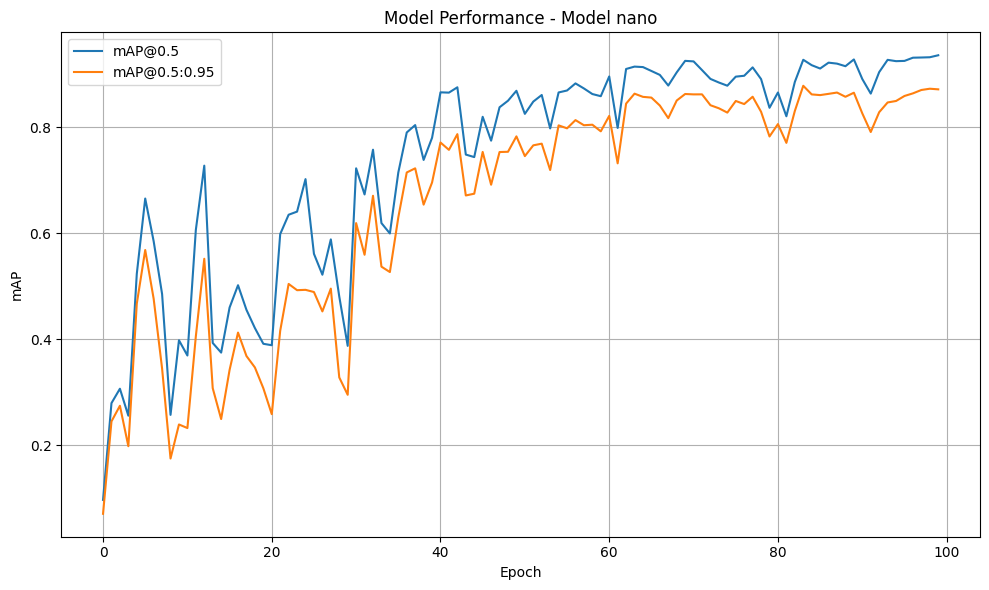

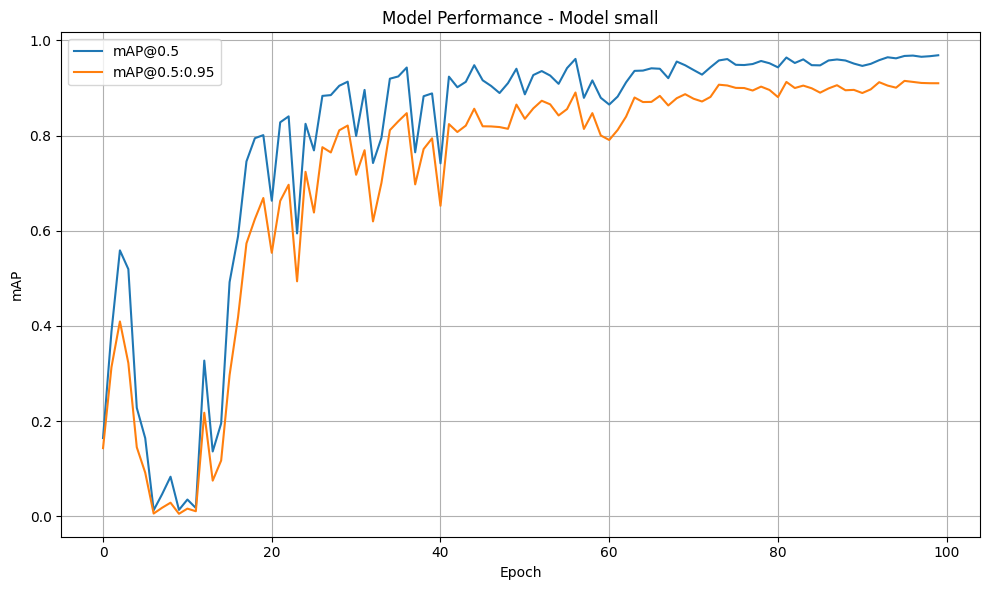

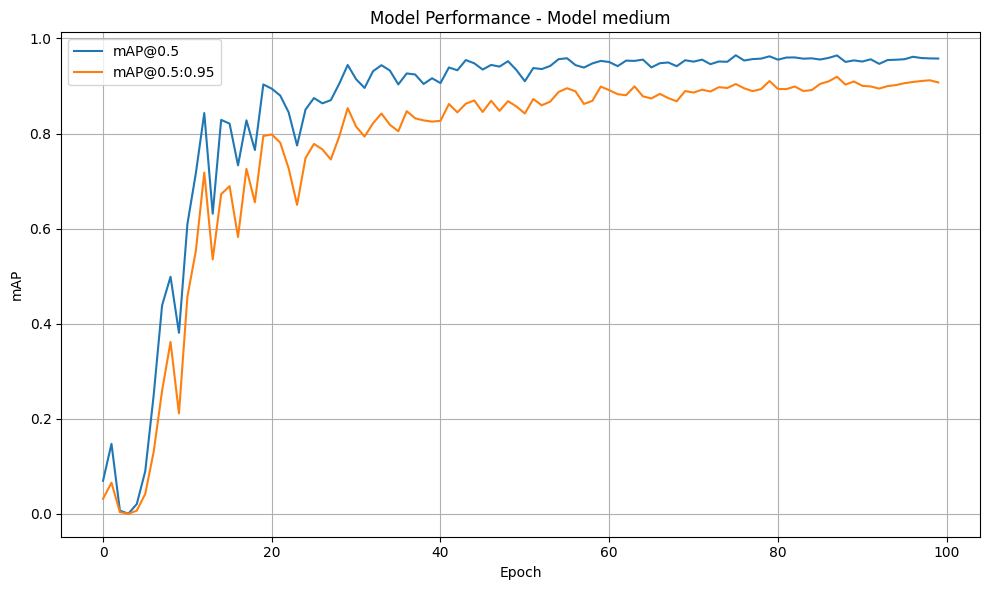

In [15]:
%matplotlib inline
for size in sizes:
    df = pd.read_csv(f"{project_base_objectDetection}/training/{size}/results.csv")

    plt.figure(figsize=(10, 6))

    # Plot mAP50 dan mAP50-95
    plt.plot(df.index, df["metrics/mAP50(B)"], label="mAP@0.5")
    plt.plot(df.index, df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95")

    # Tambahkan label dan judul
    plt.xlabel("Epoch")
    plt.ylabel("mAP")
    plt.title(f"Model Performance - Model {size}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Simpan plot
    graph_output_dir = f"{project_base_objectDetection}/graph"
    os.makedirs(graph_output_dir, exist_ok=True)
    plt.savefig(os.path.join(graph_output_dir, f"mAP_comparison_{size}.png"))
    plt.show()

In [16]:
if GoogleDrive:
    copy_to_google_drive("dataset/object_detection", "dataset/object_detection")
    copy_to_google_drive("results/object_detection", "results/object_detection")

## Semi Auto Annotate Mask Daun

In [17]:
splits = ["train","valid",'test']
sam2_model = "sam2.1_b.pt"
data_path_maskDaun = "dataset/mask_daun"
project_base_maskDaun = "results/mask_daun"
best_objectDetection_model_size = "medium"
best_objectDetection_model_path = f"{project_base_objectDetection}/training/{best_objectDetection_model_size}/weights/best.pt"

In [18]:
# Pindahkan original images ke mask daun
for split in splits:
    shutil.copytree(src=f"{data_path_objectDetection}/{split}/images", dst=f"{data_path_maskDaun}/{split}/images", dirs_exist_ok=True)

shutil.copy(src=f"{data_path_objectDetection}/data.yaml", dst=f"{data_path_maskDaun}/data.yaml")

'dataset/mask_daun/data.yaml'

In [19]:
for split in splits:
    auto_annotate(data=f"{data_path_maskDaun}/{split}/images/", det_model=best_objectDetection_model_path, sam_model=sam2_model, output_dir=f"{data_path_maskDaun}/{split}/labels/")


image 1/525 /workspace/dataset/mask_daun/train/images/00001_frog_eye_leaf_spot_jpg.rf.44e55f2a13c6006c288b547ee3978439.jpg: 448x640 3 frog-eye-leaf-spots, 9.9ms
image 2/525 /workspace/dataset/mask_daun/train/images/00002_frog_eye_leaf_spot_jpg.rf.00acb592d605bce03d28a29f2ce40567.jpg: 448x640 4 frog-eye-leaf-spots, 8.9ms
image 3/525 /workspace/dataset/mask_daun/train/images/00003_frog_eye_leaf_spot_jpg.rf.043e4d6ea7056e6eff30e684f36c647d.jpg: 448x640 1 frog-eye-leaf-spot, 9.2ms
image 4/525 /workspace/dataset/mask_daun/train/images/00004_frog_eye_leaf_spot_jpg.rf.593c222fa16a8fcdc3178c1993f3e6db.jpg: 448x640 1 frog-eye-leaf-spot, 9.4ms
image 5/525 /workspace/dataset/mask_daun/train/images/00005_frog_eye_leaf_spot_jpg.rf.47bc03b0a67a65652a169f86ab54bb33.jpg: 448x640 1 frog-eye-leaf-spot, 8.3ms
image 6/525 /workspace/dataset/mask_daun/train/images/00006_frog_eye_leaf_spot_jpg.rf.9fb8acc6cde881030df84621fc78ce69.jpg: 448x640 2 frog-eye-leaf-spots, 8.6ms
image 7/525 /workspace/dataset/mask_

## Training Mask Daun

In [20]:
# Variabel Global
models = ['yolo11n-seg.pt', 'yolo11s-seg.pt', 'yolo11m-seg.pt']
sizes = ['nano', 'small', 'medium']
epochs = 100
batch = -1 # atau -1 untuk limitasi gpu 60%
data_path_maskDaun = "dataset/mask_daun"
project_base_maskDaun = "results/mask_daun"

In [21]:
for model_name, size in zip(models, sizes):
    print(f"Training {size} model...")
    model = YOLO(model_name)

    start_time = time.time()
    training = model.train(
        data=f"{data_path_maskDaun}/data.yaml", 
        epochs=epochs, 
        imgsz=640, 
        batch=batch, 
        project=f"{project_base_maskDaun}/training", 
        name=f"{size}",
        exist_ok=True
    )

    measure_and_save_time(start_time, f"{project_base_maskDaun}/training/summary/time/{size}-train-time.txt")
    csv_filename = f"{project_base_maskDaun}/training/summary/{size}-training-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(training.to_csv())

    validation = model.val(
        data=f"{data_path_maskDaun}/data.yaml", 
        imgsz=640,
        project=f"{project_base_maskDaun}/validation",
        name=f"{size}",
        exist_ok=True,
        split="test"
    )

    csv_filename = f"{project_base_maskDaun}/validation/summary/{size}-validation-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(validation.to_csv())

    print(f"Finished training and validating {size} model.")

Training nano model...


Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/mask_daun/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=nano, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose

train: Scanning /workspace/dataset/mask_daun/train/labels... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:03<00:00, 134.42it/s]


train: New cache created: /workspace/dataset/mask_daun/train/labels.cache
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.64G total, 5.57G reserved, 0.26G allocated, 17.81G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     2843193       10.36         0.587         23.04           nan        (1, 3, 640, 640)                    list
     2843193       20.72         1.149         27.66           nan        (2, 3, 640, 640)                    list
     2843193       41.43         1.887         24.24           nan        (4, 3, 640, 640)                    list
     2843193       82.86         3.479         28.57           nan        (8, 3, 640, 640)                    list
     2843193       165.7         6.482         32.89           nan       (16, 3, 640, 640)                    list
     2843193       331.5        12.411       

train: Scanning /workspace/dataset/mask_daun/train/labels.cache... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.2±0.1 ms, read: 347.1±143.3 MB/s, size: 722.8 KB)


val: Scanning /workspace/dataset/mask_daun/valid/labels... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 93.22it/s] 

val: New cache created: /workspace/dataset/mask_daun/valid/labels.cache


Plotting labels to results/mask_daun/training/nano/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0004375), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/mask_daun/training/nano
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100       5.2G      0.792      2.458      3.038      1.223         98        640: 100%|██████████| 19/19 [00:03<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         75        149    0.00671      0.974      0.333      0.264    0.00651      0.952       0.33      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.45G     0.6456      1.032      2.239      1.088        119        640: 100%|██████████| 19/19 [00:02<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.74it/s]

                   all         75        149    0.00616      0.966      0.439      0.372    0.00619      0.965      0.425      0.376



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.45G     0.6363     0.9775      1.692      1.078        127        640: 100%|██████████| 19/19 [00:02<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.46it/s]

                   all         75        149      0.571      0.201      0.445      0.357      0.571      0.201      0.427      0.326



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.45G     0.6012     0.8968      1.458      1.037         96        640: 100%|██████████| 19/19 [00:02<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.47it/s]

                   all         75        149      0.272      0.162      0.247      0.159      0.236      0.135      0.172     0.0814



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.45G     0.6242     0.9455       1.34      1.046        107        640: 100%|██████████| 19/19 [00:02<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.44it/s]

                   all         75        149      0.634      0.297      0.358      0.243      0.641      0.306       0.38      0.272



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.45G     0.6396      1.014      1.305      1.057         97        640: 100%|██████████| 19/19 [00:02<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         75        149      0.413      0.558       0.45      0.324      0.398      0.492      0.398      0.234



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.45G     0.6265     0.9731      1.299      1.049        104        640: 100%|██████████| 19/19 [00:02<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         75        149      0.478      0.529      0.511      0.329      0.478      0.529      0.512      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.45G     0.6217     0.9192      1.235      1.048        112        640: 100%|██████████| 19/19 [00:02<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]

                   all         75        149      0.614      0.434      0.345      0.273      0.612      0.426      0.333      0.253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.45G     0.6256     0.9219      1.184       1.05        130        640: 100%|██████████| 19/19 [00:02<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]

                   all         75        149      0.471      0.538      0.455      0.322      0.484      0.501      0.439      0.326



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.45G     0.6024     0.8975      1.178      1.053        117        640: 100%|██████████| 19/19 [00:02<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]

                   all         75        149      0.687       0.39      0.521       0.41      0.687       0.39      0.511      0.428



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.45G     0.5888     0.9472      1.112      1.034        111        640: 100%|██████████| 19/19 [00:02<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         75        149      0.508      0.718      0.714      0.603      0.506      0.713      0.708      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.45G      0.582      0.878      1.066      1.032        107        640: 100%|██████████| 19/19 [00:02<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         75        149      0.592      0.662      0.708      0.614      0.589      0.658      0.703      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.45G     0.5584      0.838      1.021      1.024        111        640: 100%|██████████| 19/19 [00:02<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         75        149      0.687      0.618      0.741      0.637      0.687      0.618       0.74      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.45G     0.5459     0.8305      1.004      1.004        102        640: 100%|██████████| 19/19 [00:02<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.11it/s]

                   all         75        149      0.734      0.693      0.768      0.632      0.716      0.679       0.75      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.45G     0.5615     0.8002     0.9975      1.014        125        640: 100%|██████████| 19/19 [00:02<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         75        149       0.78       0.64      0.764      0.625       0.78       0.64      0.755      0.688



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.45G     0.5275     0.7508     0.9359      1.001        104        640: 100%|██████████| 19/19 [00:02<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]

                   all         75        149      0.674       0.66      0.728        0.6      0.667      0.647      0.716      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.45G     0.5532     0.8104     0.9475       1.01        128        640: 100%|██████████| 19/19 [00:02<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.82it/s]

                   all         75        149      0.805      0.624       0.76      0.662      0.805      0.624      0.755      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.45G     0.5314     0.7479     0.9366       1.01        106        640: 100%|██████████| 19/19 [00:02<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

                   all         75        149      0.779      0.677      0.773      0.677      0.827      0.624      0.762      0.688



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.45G     0.5013     0.7326     0.8773     0.9816        118        640: 100%|██████████| 19/19 [00:02<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.15it/s]

                   all         75        149      0.774      0.658      0.781      0.683      0.774      0.658      0.776      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.45G     0.5085     0.7681     0.8783     0.9935        117        640: 100%|██████████| 19/19 [00:02<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]

                   all         75        149      0.725      0.674      0.778      0.673       0.73      0.679      0.778      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.45G      0.508     0.7609     0.8651     0.9947        124        640: 100%|██████████| 19/19 [00:02<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         75        149      0.385      0.724      0.629      0.552       0.38      0.715      0.624      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.45G     0.4793     0.6881     0.8275     0.9733        114        640: 100%|██████████| 19/19 [00:02<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.04it/s]

                   all         75        149      0.674      0.785      0.817      0.732       0.67      0.777      0.813      0.746



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.45G     0.4936     0.6982     0.8303     0.9884        121        640: 100%|██████████| 19/19 [00:02<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]

                   all         75        149      0.767      0.646      0.786      0.682      0.767      0.646      0.779      0.682



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.45G     0.4991     0.7029     0.7963      0.983        156        640: 100%|██████████| 19/19 [00:02<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         75        149      0.759      0.697      0.841      0.732      0.761      0.677      0.822      0.752



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.45G     0.4988     0.7038     0.7968     0.9819        102        640: 100%|██████████| 19/19 [00:02<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         75        149      0.673      0.712      0.786      0.687      0.673      0.712      0.784      0.696



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.45G     0.5136      0.716     0.8236     0.9824        135        640: 100%|██████████| 19/19 [00:02<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.06it/s]

                   all         75        149       0.82      0.717      0.828       0.73       0.82      0.717      0.815       0.75



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.45G     0.4761     0.6716      0.792     0.9734        102        640: 100%|██████████| 19/19 [00:02<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]

                   all         75        149      0.678       0.72      0.819       0.73      0.674      0.716      0.814      0.735



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.45G     0.4825     0.6722     0.7871     0.9751        117        640: 100%|██████████| 19/19 [00:02<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         75        149      0.887      0.621      0.812      0.729      0.887      0.621      0.806      0.744



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.45G     0.4652      0.661     0.7707     0.9676        124        640: 100%|██████████| 19/19 [00:02<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]

                   all         75        149      0.798      0.758      0.852      0.755      0.837      0.722      0.845      0.776



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.45G     0.4489      0.657     0.7187      0.971        123        640: 100%|██████████| 19/19 [00:02<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.11it/s]

                   all         75        149      0.795      0.735      0.849      0.753       0.79      0.731      0.842      0.735



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.45G     0.4495     0.6147      0.709     0.9642        115        640: 100%|██████████| 19/19 [00:02<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         75        149      0.773      0.793      0.859      0.764      0.782      0.802      0.864      0.785



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.45G     0.4605     0.6846     0.7075     0.9598        126        640: 100%|██████████| 19/19 [00:02<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.15it/s]

                   all         75        149      0.828      0.746      0.842      0.771      0.828      0.746      0.837      0.768



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.45G     0.4444     0.6651     0.7191     0.9531         91        640: 100%|██████████| 19/19 [00:02<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.07it/s]

                   all         75        149      0.715      0.567      0.694      0.627      0.715      0.567      0.687       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.45G     0.4442     0.6503     0.7338     0.9553         99        640: 100%|██████████| 19/19 [00:02<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         75        149       0.78      0.751      0.842       0.76      0.776      0.747      0.834      0.767



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.45G      0.428     0.5828     0.6829     0.9486        128        640: 100%|██████████| 19/19 [00:02<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.04it/s]

                   all         75        149      0.756      0.729      0.832      0.735      0.756      0.729      0.824      0.761



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.45G     0.4379      0.619     0.6977     0.9526        129        640: 100%|██████████| 19/19 [00:02<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]

                   all         75        149      0.846      0.704       0.82      0.736      0.846      0.704       0.82      0.744



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.45G      0.436     0.6115     0.7011     0.9651        121        640: 100%|██████████| 19/19 [00:02<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.07it/s]

                   all         75        149      0.814      0.633      0.826      0.739      0.814      0.633      0.815      0.747



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.45G     0.4168     0.5385     0.6749     0.9492        125        640: 100%|██████████| 19/19 [00:02<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]

                   all         75        149      0.866      0.797       0.87      0.796      0.861      0.792      0.864        0.8



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.45G     0.4128     0.5513     0.6548     0.9478        115        640: 100%|██████████| 19/19 [00:02<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         75        149      0.875      0.734      0.866      0.774       0.87       0.73      0.853      0.782



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.45G     0.4257     0.5845     0.6741     0.9492        146        640: 100%|██████████| 19/19 [00:02<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]

                   all         75        149      0.846      0.727      0.845      0.766      0.846      0.727      0.839       0.78



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.45G     0.4048     0.5503     0.6531     0.9417        111        640: 100%|██████████| 19/19 [00:02<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.67it/s]

                   all         75        149      0.616      0.799      0.749      0.692      0.616      0.799      0.748      0.697



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.45G     0.4025     0.5247     0.6138     0.9332        113        640: 100%|██████████| 19/19 [00:02<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]

                   all         75        149      0.785      0.727      0.825      0.748       0.77      0.717      0.815      0.757



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.45G     0.4113     0.5594     0.6475     0.9522        120        640: 100%|██████████| 19/19 [00:02<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all         75        149      0.814      0.728      0.826      0.755       0.81      0.723      0.818       0.76



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.45G     0.3983     0.5494      0.632     0.9367        113        640: 100%|██████████| 19/19 [00:02<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         75        149      0.815      0.663      0.822       0.75      0.815      0.663      0.815      0.765



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.45G     0.3942     0.5525     0.6127     0.9397        120        640: 100%|██████████| 19/19 [00:02<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.30it/s]

                   all         75        149      0.865      0.726      0.827      0.764      0.865      0.726      0.831       0.77



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.45G     0.3901     0.5603     0.6331     0.9379        107        640: 100%|██████████| 19/19 [00:02<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]

                   all         75        149      0.875      0.717      0.833      0.749      0.875      0.717       0.83      0.762



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.45G     0.4015     0.5518     0.5872     0.9342        135        640: 100%|██████████| 19/19 [00:02<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]

                   all         75        149      0.921      0.723      0.852      0.796      0.921      0.723      0.845       0.79



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.45G     0.3842     0.5332     0.5779      0.924        126        640: 100%|██████████| 19/19 [00:02<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.38it/s]

                   all         75        149      0.799      0.752       0.83      0.764      0.812      0.726      0.827      0.771



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.45G     0.3936      0.539     0.6112     0.9333        100        640: 100%|██████████| 19/19 [00:02<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]

                   all         75        149      0.808      0.717      0.822      0.753      0.819      0.727      0.821      0.767



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.45G     0.3879      0.536     0.6209     0.9266         91        640: 100%|██████████| 19/19 [00:02<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.11it/s]

                   all         75        149      0.907      0.731      0.859       0.78      0.905      0.718      0.849      0.795



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.45G     0.3935     0.5507     0.5952     0.9463        104        640: 100%|██████████| 19/19 [00:02<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.31it/s]

                   all         75        149       0.71      0.709      0.774      0.697      0.693      0.697      0.741      0.694



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.45G     0.3856     0.5255     0.5536     0.9362        138        640: 100%|██████████| 19/19 [00:02<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]

                   all         75        149      0.868      0.738      0.874      0.797      0.888      0.727      0.862      0.814



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.45G     0.3858     0.5414      0.565     0.9344        103        640: 100%|██████████| 19/19 [00:02<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.24it/s]

                   all         75        149      0.777      0.704      0.827      0.757      0.777      0.704      0.819      0.757



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.45G     0.3641      0.507     0.5756     0.9288        123        640: 100%|██████████| 19/19 [00:02<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]

                   all         75        149      0.914      0.742       0.88      0.801      0.914      0.742      0.877      0.812



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.45G     0.3616     0.4812     0.5653      0.921        102        640: 100%|██████████| 19/19 [00:02<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]

                   all         75        149      0.616      0.833      0.824      0.757      0.685      0.722      0.818      0.758



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.45G     0.3584     0.5093     0.5896     0.9214        131        640: 100%|██████████| 19/19 [00:02<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]

                   all         75        149      0.854      0.688      0.857      0.787      0.854      0.688      0.857      0.799



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.45G     0.3758     0.5055     0.5603     0.9236        121        640: 100%|██████████| 19/19 [00:02<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.21it/s]

                   all         75        149      0.787      0.682      0.829      0.754      0.802      0.681       0.82      0.771



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.45G     0.3608     0.4995     0.5366     0.9188        111        640: 100%|██████████| 19/19 [00:02<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all         75        149      0.848      0.701      0.839      0.782      0.857       0.71      0.848      0.785



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.45G     0.3694     0.5071     0.5477     0.9148        122        640: 100%|██████████| 19/19 [00:02<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.26it/s]

                   all         75        149      0.701      0.786      0.831      0.769        0.7      0.787      0.827      0.771



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.45G     0.3545     0.5012      0.532     0.9167        114        640: 100%|██████████| 19/19 [00:02<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]

                   all         75        149      0.964      0.721      0.873        0.8      0.964      0.721       0.87       0.81



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.45G     0.3617     0.4905     0.5166     0.9143        136        640: 100%|██████████| 19/19 [00:02<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.16it/s]

                   all         75        149      0.936      0.764      0.865      0.791      0.936      0.764      0.864       0.81



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.45G     0.3664     0.5136     0.5312      0.921        118        640: 100%|██████████| 19/19 [00:02<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

                   all         75        149      0.855      0.744      0.854       0.77       0.85       0.74      0.844      0.785



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.45G     0.3464     0.4943     0.5268     0.9124        106        640: 100%|██████████| 19/19 [00:02<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.96it/s]

                   all         75        149      0.813      0.733      0.852      0.783      0.813      0.733      0.846      0.787



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.45G     0.3402     0.4874     0.5043      0.904        121        640: 100%|██████████| 19/19 [00:02<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]

                   all         75        149      0.712      0.784      0.842      0.773      0.712      0.784      0.839      0.783



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.45G     0.3383     0.4431     0.5058     0.9135        103        640: 100%|██████████| 19/19 [00:02<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.43it/s]

                   all         75        149      0.823      0.782      0.854      0.785      0.818      0.778      0.845      0.787



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.45G     0.3302     0.4537     0.5133     0.9121        120        640: 100%|██████████| 19/19 [00:02<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]

                   all         75        149       0.83      0.779      0.863      0.801       0.83      0.779      0.857      0.803



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.45G     0.3404     0.4276     0.4892     0.9108         92        640: 100%|██████████| 19/19 [00:02<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]

                   all         75        149      0.774      0.818      0.879      0.814      0.861      0.728       0.87      0.814



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.45G      0.336     0.4167     0.4879     0.9132         99        640: 100%|██████████| 19/19 [00:02<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.07it/s]

                   all         75        149      0.854      0.739      0.875      0.807      0.854      0.739      0.867      0.814



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.45G     0.3157     0.4294     0.4586        0.9        117        640: 100%|██████████| 19/19 [00:02<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]

                   all         75        149      0.883      0.764      0.872      0.806      0.883      0.764      0.866      0.813



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.45G      0.325     0.4612     0.4681     0.8996         92        640: 100%|██████████| 19/19 [00:02<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all         75        149      0.908      0.737      0.862      0.804      0.908      0.737       0.86      0.806



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.45G     0.3257     0.4345      0.487     0.9102         87        640: 100%|██████████| 19/19 [00:02<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         75        149      0.833      0.763      0.869      0.814      0.833      0.763      0.862      0.811



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.45G     0.3179     0.4281     0.4627     0.9008        115        640: 100%|██████████| 19/19 [00:02<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]

                   all         75        149      0.625      0.804      0.788      0.727      0.625      0.804      0.786      0.741



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.45G     0.3325     0.4534     0.4787       0.91        109        640: 100%|██████████| 19/19 [00:02<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.24it/s]

                   all         75        149      0.868      0.776      0.875      0.814      0.868      0.776       0.87      0.819



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.45G     0.3282     0.4448     0.4814     0.9076        129        640: 100%|██████████| 19/19 [00:02<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.20it/s]

                   all         75        149       0.75      0.751      0.857      0.797       0.75      0.751      0.851      0.807



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.45G     0.3155     0.4137     0.4619     0.9011        102        640: 100%|██████████| 19/19 [00:02<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all         75        149      0.776      0.852      0.874      0.811      0.789      0.836      0.867       0.82



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.45G     0.3177     0.4284     0.4498     0.8995        107        640: 100%|██████████| 19/19 [00:02<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]

                   all         75        149      0.854      0.786      0.879      0.818      0.848      0.782      0.872      0.825



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.45G     0.3145     0.4123     0.4358     0.9013        107        640: 100%|██████████| 19/19 [00:02<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         75        149      0.897      0.759      0.883      0.816      0.897      0.759      0.879       0.83



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.45G     0.3219     0.4605     0.4324     0.9036        114        640: 100%|██████████| 19/19 [00:02<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.21it/s]

                   all         75        149      0.914      0.714      0.866      0.791      0.914      0.714      0.859      0.805



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.45G     0.3047     0.4419     0.4327     0.8959        111        640: 100%|██████████| 19/19 [00:02<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.41it/s]

                   all         75        149      0.873      0.752      0.891      0.822      0.873      0.752      0.878      0.823



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.45G     0.3123      0.432     0.4269     0.9016        100        640: 100%|██████████| 19/19 [00:02<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]

                   all         75        149      0.844       0.77      0.895      0.831      0.856      0.757      0.886      0.833



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.45G     0.3069     0.4194     0.4376     0.9017        124        640: 100%|██████████| 19/19 [00:02<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.14it/s]

                   all         75        149      0.946      0.745      0.899      0.818      0.946      0.745      0.887      0.823



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.45G      0.305     0.4107     0.4238      0.904        123        640: 100%|██████████| 19/19 [00:02<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.04it/s]

                   all         75        149      0.823      0.814      0.876      0.813      0.819       0.81      0.866      0.821



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.45G     0.3068     0.4056      0.422     0.8924        124        640: 100%|██████████| 19/19 [00:02<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]

                   all         75        149      0.826      0.773       0.87      0.805      0.826      0.773      0.867      0.822



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.45G     0.3001     0.4332     0.4039     0.8992        138        640: 100%|██████████| 19/19 [00:02<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.31it/s]

                   all         75        149      0.895      0.766       0.88      0.816      0.895      0.766      0.868      0.823



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.45G     0.2823     0.3835     0.4124     0.8867        101        640: 100%|██████████| 19/19 [00:02<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         75        149      0.843      0.759      0.874      0.812      0.848       0.75      0.863      0.813



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.45G     0.2979     0.4101     0.4142     0.8915        119        640: 100%|██████████| 19/19 [00:02<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]

                   all         75        149       0.83      0.806      0.877       0.81       0.83      0.806      0.873      0.815



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.45G      0.308     0.4158     0.4141     0.8977        117        640: 100%|██████████| 19/19 [00:02<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.32it/s]

                   all         75        149      0.829      0.806      0.879      0.814      0.829      0.806      0.874      0.817



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.45G     0.2963     0.4333     0.4029      0.895         83        640: 100%|██████████| 19/19 [00:02<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.28it/s]

                   all         75        149       0.83      0.789      0.872      0.814      0.822      0.787      0.866      0.816



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.45G     0.2923     0.4174     0.4003     0.9001        118        640: 100%|██████████| 19/19 [00:02<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.26it/s]

                   all         75        149      0.873      0.785      0.886      0.826      0.914      0.737      0.881      0.829



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.45G     0.2913     0.3705     0.3779     0.8881        107        640: 100%|██████████| 19/19 [00:02<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.45it/s]

                   all         75        149      0.962      0.748      0.887      0.819      0.962      0.748      0.879      0.835


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.45G     0.2861     0.4209     0.4799     0.8742         64        640: 100%|██████████| 19/19 [00:04<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]

                   all         75        149      0.881      0.777      0.847      0.787      0.881      0.777      0.837      0.793



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.45G     0.2567     0.3359     0.3267     0.8555         43        640: 100%|██████████| 19/19 [00:02<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.18it/s]

                   all         75        149      0.922        0.7      0.853      0.795      0.922        0.7      0.844      0.795



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      5.45G     0.2506     0.3126     0.2999     0.8607         44        640: 100%|██████████| 19/19 [00:02<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.17it/s]

                   all         75        149      0.885      0.752       0.86      0.796      0.885      0.752      0.852      0.806



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.45G     0.2506     0.3186     0.3023     0.8563         41        640: 100%|██████████| 19/19 [00:02<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         75        149       0.83      0.791      0.864      0.801       0.83      0.791      0.859      0.807



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.45G     0.2415     0.2984     0.2766     0.8497         57        640: 100%|██████████| 19/19 [00:02<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.38it/s]

                   all         75        149       0.83      0.818      0.869      0.806       0.83      0.818      0.865      0.815



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.45G     0.2461     0.3208     0.2674     0.8452         45        640: 100%|██████████| 19/19 [00:02<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]

                   all         75        149      0.816      0.832      0.871      0.811      0.816      0.832      0.867      0.818



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.45G     0.2365     0.3176     0.2689     0.8421         43        640: 100%|██████████| 19/19 [00:02<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.16it/s]

                   all         75        149       0.83      0.822       0.87      0.814       0.83      0.822      0.866      0.816



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.45G     0.2332     0.2999      0.256     0.8519         56        640: 100%|██████████| 19/19 [00:02<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]

                   all         75        149      0.844      0.822       0.87      0.814      0.844      0.822      0.867      0.816



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.45G     0.2383     0.3312     0.2707     0.8475         44        640: 100%|██████████| 19/19 [00:02<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]

                   all         75        149      0.836      0.814      0.871      0.813      0.836      0.814      0.867      0.818



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.45G     0.2245     0.2899     0.2545     0.8412         47        640: 100%|██████████| 19/19 [00:02<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         75        149      0.843      0.795      0.873      0.813      0.843      0.795      0.868      0.818



100 epochs completed in 0.086 hours.
Optimizer stripped from results/mask_daun/training/nano/weights/last.pt, 6.0MB
Optimizer stripped from results/mask_daun/training/nano/weights/best.pt, 6.0MB

Validating results/mask_daun/training/nano/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLO11n-seg summary (fused): 113 layers, 2,835,153 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:00<00:00,  5.16it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]


                   all         75        149      0.845       0.77      0.895      0.832      0.856      0.758      0.882      0.832
    frog-eye-leaf-spot         27         35      0.874      0.771      0.901      0.845        0.9      0.771      0.875      0.854
               healthy         25         78      0.954      0.789      0.911      0.841      0.951      0.754      0.898      0.828
                  rust         25         36      0.707       0.75      0.873      0.809      0.718       0.75      0.873      0.814
Speed: 0.2ms preprocess, 0.3ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to results/mask_daun/training/nano
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLO11n-seg summary (fused): 113 layers, 2,835,153 parameters, 0 gradients, 10.2 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 134.3±44.3 MB/s, size: 737.7 KB)


val: Scanning /workspace/dataset/mask_daun/test/labels... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:01<00:00, 106.21it/s]


val: New cache created: /workspace/dataset/mask_daun/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  17%|█▋        | 1/6 [00:01<00:06,  1.24s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]


                   all        150        278      0.872      0.796      0.892      0.847      0.872      0.796       0.89      0.849
    frog-eye-leaf-spot         55         76      0.867      0.816      0.909      0.884      0.867      0.816      0.909      0.884
               healthy         51        139       0.93      0.763      0.901      0.837       0.93      0.763      0.895      0.831
                  rust         51         63       0.82       0.81      0.866       0.82       0.82       0.81      0.866      0.832
Speed: 1.3ms preprocess, 1.9ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to results/mask_daun/validation/nano
Finished training and validating nano model.
Training small model...


Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/mask_daun/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=small, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pos

train: Scanning /workspace/dataset/mask_daun/train/labels.cache... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.64G total, 1.25G reserved, 0.20G allocated, 22.19G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    10083449        35.6         1.032         27.12           nan        (1, 3, 640, 640)                    list
    10083449       71.19         2.145         28.82           nan        (2, 3, 640, 640)                    list
    10083449       142.4         3.431         26.29           nan        (4, 3, 640, 640)                    list
    10083449       284.8         6.371         35.96           nan        (8, 3, 640, 640)                    list
    10083449       569.5        11.748         44.16           nan       (16, 3, 640, 640)                    list
    10083449        1139        22.297         64.66           nan       (32, 3, 640, 640)                    list
CUDA out of memory. Tried to allocate 100.00 MiB. GPU 0 has a total capacity of 23.64 GiB of which 10.81 MiB is free. Process 468591 has 23.61 GiB memory in use. Of the allocated memory 22.86 GiB

train: Scanning /workspace/dataset/mask_daun/train/labels.cache... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.1±0.0 ms, read: 482.0±173.1 MB/s, size: 722.8 KB)


val: Scanning /workspace/dataset/mask_daun/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to results/mask_daun/training/small/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005625000000000001), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/mask_daun/training/small
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.72G     0.6842      1.648       2.19      1.153          9        640: 100%|██████████| 30/30 [00:05<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.59it/s]

                   all         75        149      0.297      0.718      0.316      0.248      0.296      0.709      0.312       0.24



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.41G     0.6271       1.03      1.348      1.081         12        640: 100%|██████████| 30/30 [00:04<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.11it/s]


                   all         75        149      0.385      0.361      0.293      0.199      0.363      0.347      0.267      0.184

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.41G     0.7091      1.108      1.279      1.112         13        640: 100%|██████████| 30/30 [00:03<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.03it/s]


                   all         75        149      0.245      0.458      0.199      0.107      0.177      0.277      0.107     0.0564

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.41G      0.728       1.06      1.159      1.104         15        640: 100%|██████████| 30/30 [00:03<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.82it/s]

                   all         75        149      0.124      0.532      0.252      0.145      0.124      0.532      0.247      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.41G     0.6779     0.9812      1.095      1.081         26        640: 100%|██████████| 30/30 [00:03<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.93it/s]


                   all         75        149      0.607      0.607       0.67      0.468      0.663      0.568       0.66      0.506

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.41G     0.6469      0.995      1.118      1.053          7        640: 100%|██████████| 30/30 [00:03<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.58it/s]


                   all         75        149      0.642      0.528      0.534      0.394      0.637      0.515      0.506      0.394

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.41G     0.6626       1.02      1.081      1.082         21        640: 100%|██████████| 30/30 [00:06<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.08it/s]

                   all         75        149       0.58      0.728      0.754      0.618      0.556      0.751      0.748      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.41G     0.5929     0.9524     0.9861      1.036         14        640: 100%|██████████| 30/30 [00:05<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.08it/s]

                   all         75        149      0.783      0.534       0.62      0.525      0.773       0.52        0.6      0.444



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.41G     0.5987     0.8627     0.9964      1.028         18        640: 100%|██████████| 30/30 [00:04<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.43it/s]

                   all         75        149       0.78      0.655      0.772      0.661       0.78      0.655      0.754      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.41G     0.5717     0.8507     0.9469      1.033         11        640: 100%|██████████| 30/30 [00:04<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.03it/s]

                   all         75        149       0.79       0.76      0.837       0.67      0.795      0.764      0.832        0.7



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.41G     0.5855     0.8482     0.9085      1.037         30        640: 100%|██████████| 30/30 [00:05<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.88it/s]

                   all         75        149      0.475      0.596      0.574      0.489      0.482      0.596      0.573      0.497



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.41G     0.5676     0.8076     0.8973      1.039         16        640: 100%|██████████| 30/30 [00:05<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.40it/s]

                   all         75        149      0.861      0.663      0.814      0.704      0.857      0.659      0.796      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.41G     0.5503     0.7905     0.8667      1.025         22        640: 100%|██████████| 30/30 [00:04<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.23it/s]

                   all         75        149       0.93      0.704      0.859      0.749      0.924        0.7      0.847      0.687



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.41G      0.572     0.8351     0.8966      1.013         21        640: 100%|██████████| 30/30 [00:04<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.47it/s]

                   all         75        149      0.657      0.708      0.787      0.696      0.651      0.703      0.782      0.714



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.41G     0.5409     0.8283     0.9057      1.019         11        640: 100%|██████████| 30/30 [00:06<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.56it/s]

                   all         75        149      0.835      0.723       0.85      0.765       0.83      0.719      0.838      0.759



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.41G      0.527     0.7691     0.8506      1.011         15        640: 100%|██████████| 30/30 [00:05<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.62it/s]

                   all         75        149      0.872      0.673      0.843      0.741      0.872      0.673      0.836      0.736



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.41G     0.5119     0.7423     0.8414     0.9952         33        640: 100%|██████████| 30/30 [00:04<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.03it/s]

                   all         75        149      0.883      0.786      0.885        0.8      0.889      0.782      0.877      0.815



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.41G     0.4823     0.7175     0.8381     0.9891         10        640: 100%|██████████| 30/30 [00:03<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.38it/s]

                   all         75        149      0.782      0.722       0.82      0.724      0.782      0.722      0.818      0.729



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.41G     0.5006     0.6828     0.8214     0.9876         10        640: 100%|██████████| 30/30 [00:04<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.22it/s]

                   all         75        149      0.751      0.632      0.798      0.689      0.751      0.632      0.787      0.718



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.41G     0.4823     0.6654      0.771     0.9825         19        640: 100%|██████████| 30/30 [00:04<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.75it/s]

                   all         75        149      0.765      0.851        0.9      0.801       0.76      0.847      0.891      0.825



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.41G     0.4983     0.6777     0.7714     0.9924         33        640: 100%|██████████| 30/30 [00:04<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.12it/s]

                   all         75        149      0.867      0.765      0.899      0.816      0.869       0.77      0.889      0.822



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.41G     0.4827     0.7003     0.7673     0.9876         32        640: 100%|██████████| 30/30 [00:04<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.63it/s]

                   all         75        149      0.904      0.762      0.873      0.768      0.908      0.743       0.86      0.786



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.41G     0.4814     0.6982     0.7529     0.9773         16        640: 100%|██████████| 30/30 [00:04<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.72it/s]


                   all         75        149      0.823      0.827      0.869      0.775      0.818      0.822      0.864      0.787

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.41G     0.4793     0.7283      0.785     0.9835         15        640: 100%|██████████| 30/30 [00:03<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.78it/s]

                   all         75        149      0.938      0.744      0.897      0.819      0.938      0.744      0.894      0.808



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.41G     0.4593     0.6567     0.7228     0.9724         14        640: 100%|██████████| 30/30 [00:04<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.41it/s]

                   all         75        149      0.774      0.726      0.845      0.747      0.733      0.755      0.826      0.749



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.41G     0.4657     0.6967     0.7404     0.9751         23        640: 100%|██████████| 30/30 [00:04<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.57it/s]

                   all         75        149       0.85      0.758      0.866      0.786       0.85      0.758      0.856      0.772



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.41G     0.4551     0.6696     0.7454     0.9727         26        640: 100%|██████████| 30/30 [00:05<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.75it/s]

                   all         75        149       0.92      0.752      0.882      0.802      0.915      0.749      0.869        0.8



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.41G     0.4716     0.7263     0.7133     0.9771         16        640: 100%|██████████| 30/30 [00:04<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.42it/s]

                   all         75        149      0.847      0.733      0.853      0.786      0.848      0.728      0.841      0.777



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.41G     0.4517      0.651     0.7263     0.9739         12        640: 100%|██████████| 30/30 [00:04<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.71it/s]

                   all         75        149      0.813      0.759      0.831      0.759      0.813      0.759      0.826      0.759



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.41G     0.4396     0.6161     0.6897     0.9684         10        640: 100%|██████████| 30/30 [00:03<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.49it/s]

                   all         75        149      0.841      0.766      0.876      0.783      0.839      0.764      0.874      0.813



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.41G     0.4372      0.566     0.6989      0.962         17        640: 100%|██████████| 30/30 [00:05<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.97it/s]

                   all         75        149      0.822      0.781       0.87      0.795      0.822      0.781      0.855      0.798



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.41G     0.4309     0.5941     0.6592     0.9585         18        640: 100%|██████████| 30/30 [00:04<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.13it/s]

                   all         75        149      0.745      0.797      0.861      0.775      0.777      0.743      0.853      0.794



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.41G     0.4235     0.5642     0.6437     0.9535         13        640: 100%|██████████| 30/30 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.60it/s]

                   all         75        149      0.858      0.804       0.89      0.794      0.853      0.799      0.884      0.821



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.41G     0.4177     0.5739     0.6664     0.9459         19        640: 100%|██████████| 30/30 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.25it/s]

                   all         75        149       0.92      0.776       0.91      0.831      0.924      0.776      0.899      0.832



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.41G     0.4205     0.5255     0.6449     0.9563         24        640: 100%|██████████| 30/30 [00:04<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.67it/s]

                   all         75        149      0.869      0.839      0.921      0.844      0.894      0.801      0.903      0.845



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.41G     0.4058     0.5719     0.6611     0.9524         18        640: 100%|██████████| 30/30 [00:03<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.60it/s]

                   all         75        149      0.854      0.784      0.898      0.812      0.854      0.784      0.892      0.816



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.41G     0.4061     0.5573      0.612     0.9453         20        640: 100%|██████████| 30/30 [00:04<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.61it/s]

                   all         75        149      0.861      0.743      0.887      0.816      0.818      0.787      0.884      0.817



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.41G      0.398     0.5518     0.6094     0.9406         18        640: 100%|██████████| 30/30 [00:03<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]

                   all         75        149      0.814      0.813      0.885       0.81      0.814      0.813      0.875      0.811



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.41G     0.4123     0.5921      0.637     0.9555         21        640: 100%|██████████| 30/30 [00:04<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.76it/s]

                   all         75        149      0.912      0.748      0.896      0.827      0.912      0.748      0.884      0.824



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.41G     0.3942     0.5638     0.6008     0.9368         20        640: 100%|██████████| 30/30 [00:04<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.40it/s]

                   all         75        149      0.881      0.762      0.897      0.841      0.877      0.758      0.886      0.837



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.41G     0.3842     0.5738     0.6001     0.9312         17        640: 100%|██████████| 30/30 [00:04<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.79it/s]

                   all         75        149      0.933      0.757        0.9      0.827      0.933      0.757      0.889      0.835



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.41G      0.377     0.5021     0.5671       0.93         16        640: 100%|██████████| 30/30 [00:03<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.09it/s]

                   all         75        149      0.878      0.806      0.899      0.831      0.874      0.801      0.885      0.834



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.41G     0.3875     0.5355     0.6025     0.9408         21        640: 100%|██████████| 30/30 [00:04<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.57it/s]

                   all         75        149       0.92      0.761      0.902      0.843       0.92      0.761      0.894      0.845



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.41G     0.3642     0.5303     0.5852     0.9312         14        640: 100%|██████████| 30/30 [00:04<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.62it/s]

                   all         75        149      0.913        0.8      0.904      0.841      0.913        0.8      0.896      0.838



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.41G     0.3696     0.5414     0.5792     0.9299         18        640: 100%|██████████| 30/30 [00:03<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.84it/s]

                   all         75        149      0.832      0.795      0.864      0.782       0.83      0.776      0.847       0.78



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.41G     0.3725     0.5142     0.6021     0.9352         13        640: 100%|██████████| 30/30 [00:03<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.63it/s]

                   all         75        149      0.893      0.823      0.899      0.817      0.889      0.819      0.887      0.825



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.41G     0.3765     0.5056     0.5899     0.9339         10        640: 100%|██████████| 30/30 [00:03<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.57it/s]

                   all         75        149      0.844      0.839      0.907      0.833      0.844      0.839      0.896      0.834



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.41G     0.3693     0.4881     0.5497     0.9248         12        640: 100%|██████████| 30/30 [00:05<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.39it/s]

                   all         75        149       0.83      0.865      0.921      0.853      0.921      0.788      0.914      0.857



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.41G     0.3589     0.5117     0.5519     0.9289         26        640: 100%|██████████| 30/30 [00:04<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.40it/s]

                   all         75        149       0.85      0.776      0.893      0.808      0.846      0.772       0.88      0.823



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.41G     0.3698     0.5107      0.565      0.936         16        640: 100%|██████████| 30/30 [00:03<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.54it/s]

                   all         75        149       0.95      0.755      0.922      0.842      0.939      0.746      0.909      0.845



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.41G     0.3646     0.4904     0.5511     0.9355         18        640: 100%|██████████| 30/30 [00:04<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.56it/s]

                   all         75        149      0.883      0.804      0.905      0.823      0.879        0.8      0.896      0.838



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.41G     0.3686     0.5292     0.5653     0.9314         21        640: 100%|██████████| 30/30 [00:04<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.73it/s]

                   all         75        149      0.885      0.802      0.915      0.844      0.885      0.802      0.911      0.848



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.41G     0.3504     0.4565     0.5526     0.9323         12        640: 100%|██████████| 30/30 [00:05<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.19it/s]

                   all         75        149      0.928      0.808      0.919      0.847      0.923      0.804       0.91      0.853



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.41G     0.3513     0.4668     0.5268     0.9254         23        640: 100%|██████████| 30/30 [00:03<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.57it/s]

                   all         75        149      0.927      0.786      0.913      0.843      0.927      0.786      0.907       0.85



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.41G      0.339     0.5003     0.5096     0.9178         12        640: 100%|██████████| 30/30 [00:05<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.56it/s]

                   all         75        149      0.788      0.809      0.888       0.81      0.846      0.756      0.884      0.823



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.41G     0.3463     0.4547      0.484     0.9275         16        640: 100%|██████████| 30/30 [00:04<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.14it/s]

                   all         75        149      0.821      0.868      0.906       0.83      0.817      0.864      0.896      0.839



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.41G     0.3433     0.4432     0.5119     0.9113         18        640: 100%|██████████| 30/30 [00:04<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.19it/s]

                   all         75        149      0.872      0.849      0.904      0.835      0.867      0.845      0.904      0.849



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.41G     0.3358     0.4573     0.5136     0.9193         11        640: 100%|██████████| 30/30 [00:03<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.37it/s]

                   all         75        149      0.887      0.812      0.918      0.846      0.882      0.808      0.911       0.85



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.41G     0.3288     0.4384     0.4937     0.9154         14        640: 100%|██████████| 30/30 [00:04<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.40it/s]

                   all         75        149      0.908      0.856      0.935      0.876      0.903      0.852      0.927      0.874



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.41G     0.3224     0.4587      0.476     0.9123         13        640: 100%|██████████| 30/30 [00:04<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.98it/s]

                   all         75        149      0.907      0.708      0.902       0.85      0.902      0.704      0.896      0.846



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.41G      0.335     0.4837     0.4898     0.9144         21        640: 100%|██████████| 30/30 [00:03<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.25it/s]

                   all         75        149      0.899      0.785      0.906      0.841      0.895      0.781      0.898      0.845



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.41G     0.3314     0.4711     0.4836     0.9113         15        640: 100%|██████████| 30/30 [00:03<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.01it/s]

                   all         75        149      0.908      0.806       0.93      0.855      0.903      0.801      0.919      0.867



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.41G     0.3169     0.4196     0.4685     0.9088         12        640: 100%|██████████| 30/30 [00:04<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.47it/s]

                   all         75        149      0.886      0.811      0.911      0.842      0.886      0.811       0.91      0.854



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.41G     0.3213      0.442     0.4919     0.9095         14        640: 100%|██████████| 30/30 [00:04<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.54it/s]

                   all         75        149      0.895      0.824      0.916      0.856      0.895      0.824      0.915      0.858



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.41G     0.3259     0.4178      0.462     0.9088         15        640: 100%|██████████| 30/30 [00:03<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.55it/s]

                   all         75        149      0.927      0.824      0.908      0.849      0.937      0.811      0.907      0.851



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.41G      0.321     0.4286     0.4921     0.9094         16        640: 100%|██████████| 30/30 [00:03<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.81it/s]

                   all         75        149      0.878      0.816      0.902      0.841      0.878      0.816      0.896      0.845



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.41G     0.3193     0.4253     0.4695     0.9122         11        640: 100%|██████████| 30/30 [00:04<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.88it/s]

                   all         75        149      0.901      0.851      0.912      0.846      0.897      0.847      0.906      0.858



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.41G     0.3139     0.4163     0.4449     0.9029         13        640: 100%|██████████| 30/30 [00:04<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.04it/s]

                   all         75        149      0.874      0.813      0.913      0.849      0.868      0.809      0.913       0.86



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.41G     0.3023     0.3917     0.4418     0.8972         17        640: 100%|██████████| 30/30 [00:04<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.32it/s]

                   all         75        149      0.896      0.819      0.912      0.849      0.896      0.819      0.909      0.856



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.41G     0.3055     0.3722     0.4287     0.8908         17        640: 100%|██████████| 30/30 [00:04<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.75it/s]

                   all         75        149      0.929      0.819      0.893      0.844      0.925      0.814      0.894      0.842



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.41G     0.2958      0.388     0.4375     0.8933         21        640: 100%|██████████| 30/30 [00:05<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.73it/s]

                   all         75        149      0.904      0.828      0.912      0.848      0.904      0.828      0.902       0.85



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.41G     0.3043     0.4056     0.4247     0.8926         20        640: 100%|██████████| 30/30 [00:03<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.44it/s]

                   all         75        149      0.876      0.859      0.913      0.851      0.876      0.859      0.904      0.857



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.41G      0.305     0.3802     0.4191     0.9022         17        640: 100%|██████████| 30/30 [00:04<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.61it/s]

                   all         75        149       0.92      0.792      0.905      0.848       0.92      0.792      0.903      0.851



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.41G     0.3063     0.3841     0.4397     0.9079         11        640: 100%|██████████| 30/30 [00:03<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.49it/s]

                   all         75        149      0.887      0.827      0.908      0.848      0.885      0.823      0.903      0.856



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.41G     0.2861      0.394     0.4241     0.8958         12        640: 100%|██████████| 30/30 [00:04<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.75it/s]

                   all         75        149      0.887      0.815      0.896       0.84      0.888       0.81      0.896      0.845



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.41G     0.2931     0.3738      0.412     0.8961         22        640: 100%|██████████| 30/30 [00:04<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.18it/s]

                   all         75        149      0.856      0.824      0.889      0.842      0.856      0.824      0.886      0.841



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.41G     0.2973     0.4088     0.4096     0.8989         16        640: 100%|██████████| 30/30 [00:05<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.55it/s]

                   all         75        149      0.923      0.842      0.907      0.847      0.923      0.842      0.905      0.854



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.41G     0.2813     0.3671      0.387     0.8895         20        640: 100%|██████████| 30/30 [00:04<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]

                   all         75        149      0.879      0.823      0.906      0.846      0.875      0.819      0.898      0.849



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.41G     0.2822     0.3643      0.381      0.895         23        640: 100%|██████████| 30/30 [00:04<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.00it/s]

                   all         75        149      0.934      0.811      0.912      0.856      0.934      0.811      0.908       0.86



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.41G     0.2675     0.3662     0.3875     0.8871         18        640: 100%|██████████| 30/30 [00:06<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.45it/s]

                   all         75        149      0.889      0.833      0.929      0.861      0.889      0.833      0.917      0.866



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.41G     0.2774     0.3663     0.3951     0.8902         24        640: 100%|██████████| 30/30 [00:05<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.93it/s]

                   all         75        149      0.866      0.855      0.935      0.867      0.862      0.851      0.928      0.874



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.41G     0.2826     0.3502     0.3809     0.9036         11        640: 100%|██████████| 30/30 [00:04<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.63it/s]

                   all         75        149      0.933      0.797      0.928      0.859      0.933      0.797      0.919      0.867



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.41G     0.2775     0.3657     0.3686     0.8972         10        640: 100%|██████████| 30/30 [00:05<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.51it/s]

                   all         75        149      0.916      0.842      0.911      0.848      0.916      0.842      0.908      0.855



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.41G     0.2669     0.3504     0.3738     0.8862         19        640: 100%|██████████| 30/30 [00:05<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.28it/s]

                   all         75        149      0.948      0.824      0.909      0.852      0.948      0.824      0.905      0.853



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.41G     0.2823     0.3752     0.3681     0.8974         16        640: 100%|██████████| 30/30 [00:04<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.50it/s]

                   all         75        149       0.92       0.85      0.924      0.869       0.92       0.85      0.913      0.864



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.41G     0.2663      0.321     0.3646     0.8936         13        640: 100%|██████████| 30/30 [00:03<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.65it/s]

                   all         75        149      0.945      0.825      0.906      0.853      0.945      0.825      0.906      0.857



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.41G     0.2662     0.3326      0.377     0.8865         15        640: 100%|██████████| 30/30 [00:04<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.32it/s]

                   all         75        149      0.882      0.833        0.9      0.846      0.882      0.833      0.902      0.853



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.41G     0.2721     0.3459     0.3909     0.8924         12        640: 100%|██████████| 30/30 [00:04<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.52it/s]


                   all         75        149      0.946      0.822      0.905      0.843      0.946      0.822      0.901      0.852

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.41G     0.2559     0.3321     0.3498      0.878         17        640: 100%|██████████| 30/30 [00:04<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.24it/s]

                   all         75        149      0.867      0.857      0.908      0.843      0.867      0.857      0.908      0.861



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.41G     0.2637     0.3562     0.3417     0.8826         22        640: 100%|██████████| 30/30 [00:04<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.65it/s]

                   all         75        149      0.938      0.827      0.908      0.845      0.938      0.827      0.915      0.856


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.41G     0.2423     0.3293     0.3536     0.8596         13        640: 100%|██████████| 30/30 [00:08<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.51it/s]

                   all         75        149      0.927      0.825      0.912      0.849      0.927      0.825       0.91      0.855



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.41G     0.2266     0.2863     0.2578     0.8437          6        640: 100%|██████████| 30/30 [00:05<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.89it/s]

                   all         75        149      0.925      0.855      0.923      0.856      0.925      0.855      0.916      0.866



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.41G     0.2165     0.2734     0.2666     0.8324          6        640: 100%|██████████| 30/30 [00:04<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.03it/s]

                   all         75        149      0.884       0.83      0.917      0.856      0.884       0.83      0.912      0.861



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.41G     0.2165     0.2841     0.2505     0.8343         10        640: 100%|██████████| 30/30 [00:05<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.98it/s]

                   all         75        149      0.884      0.838      0.908      0.855      0.903      0.816      0.913      0.864



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.41G     0.2136     0.2634     0.2319     0.8268          6        640: 100%|██████████| 30/30 [00:03<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.52it/s]

                   all         75        149        0.9      0.844      0.907      0.856      0.904      0.845       0.91      0.861



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.41G     0.2091     0.2641     0.2174     0.8299          4        640: 100%|██████████| 30/30 [00:05<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.77it/s]

                   all         75        149      0.899      0.842      0.903      0.855      0.902      0.853      0.906      0.864



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.41G     0.2163     0.2837     0.2569      0.836          5        640: 100%|██████████| 30/30 [00:04<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.57it/s]

                   all         75        149      0.882      0.851      0.913      0.864      0.908      0.832       0.91      0.864



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.41G     0.2001     0.2451     0.2103     0.8321          9        640: 100%|██████████| 30/30 [00:04<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.57it/s]

                   all         75        149      0.954      0.814      0.913      0.858      0.954      0.814      0.909      0.861



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.41G     0.1935     0.2371     0.2052     0.8245          3        640: 100%|██████████| 30/30 [00:05<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.44it/s]

                   all         75        149      0.912      0.848      0.916      0.857      0.904      0.838      0.911      0.864



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.41G     0.1943     0.2421     0.2151     0.8268          6        640: 100%|██████████| 30/30 [00:04<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.64it/s]

                   all         75        149      0.911      0.857      0.917      0.862      0.911      0.842      0.911      0.864



100 epochs completed in 0.152 hours.
Optimizer stripped from results/mask_daun/training/small/weights/last.pt, 20.5MB
Optimizer stripped from results/mask_daun/training/small/weights/best.pt, 20.5MB

Validating results/mask_daun/training/small/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,977 parameters, 0 gradients, 35.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [00:00<00:00,  5.25it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  67%|██████▋   | 2/3 [00:00<00:00,  3.35it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]


                   all         75        149      0.908      0.856      0.936      0.876      0.904      0.852      0.927      0.875
    frog-eye-leaf-spot         27         35      0.844      0.914      0.962      0.911      0.844      0.914       0.96      0.923
               healthy         25         78      0.916      0.821      0.927      0.849      0.901      0.808      0.904      0.832
                  rust         25         36      0.966      0.833      0.919      0.869      0.966      0.833      0.919      0.869
Speed: 0.2ms preprocess, 1.4ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to results/mask_daun/training/small
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,977 parameters, 0 gradients, 35.3 GFLOPs
val: Fast image access ✅ (ping: 0.2±0.0 ms, read: 176.6±51.3 MB/s, size: 737.7 KB)


val: Scanning /workspace/dataset/mask_daun/test/labels.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/9 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  22%|██▏       | 2/9 [00:01<00:06,  1.12it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.03it/s]


                   all        150        278      0.855      0.829      0.897      0.847      0.853      0.827      0.889      0.832
    frog-eye-leaf-spot         55         76      0.792      0.882      0.911      0.893      0.792      0.882       0.91      0.889
               healthy         51        139      0.841      0.827      0.907      0.843      0.834       0.82      0.883      0.812
                  rust         51         63      0.933      0.778      0.873      0.805      0.933      0.778      0.873      0.795
Speed: 0.4ms preprocess, 2.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to results/mask_daun/validation/small
Finished training and validating small model.
Training medium model...


Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/mask_daun/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=medium, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, po

train: Scanning /workspace/dataset/mask_daun/train/labels.cache... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.64G total, 1.98G reserved, 0.52G allocated, 21.14G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    22361529       123.6         2.034         39.93           nan        (1, 3, 640, 640)                    list
    22361529       247.2         4.094         39.71           nan        (2, 3, 640, 640)                    list
    22361529       494.4         6.858         40.48           nan        (4, 3, 640, 640)                    list
    22361529       988.7        12.503         54.73           nan        (8, 3, 640, 640)                    list
    22361529        1977        23.255          74.6           nan       (16, 3, 640, 640)                    list
CUDA out of memory. Tried to allocate 100.00 MiB. GPU 0 has a total capacity of 23.64 GiB of which 48.81 MiB is free. Process 468591 has 23.57 GiB memory in use. Of the allocated memory 22.87 GiB is allocated by PyTorch, and 172.80 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory

train: Scanning /workspace/dataset/mask_daun/train/labels.cache... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.2±0.0 ms, read: 343.5±115.9 MB/s, size: 722.8 KB)


val: Scanning /workspace/dataset/mask_daun/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to results/mask_daun/training/medium/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 115 weight(decay=0.0), 126 weight(decay=0.0005), 125 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/mask_daun/training/medium
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.93G      0.659      1.415      2.026      1.151         35        640: 100%|██████████| 66/66 [00:07<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.60it/s]

                   all         75        149      0.242      0.455      0.339      0.243      0.245      0.357      0.277      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.44G     0.8033      1.297      1.549      1.208         26        640: 100%|██████████| 66/66 [00:08<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.20it/s]

                   all         75        149      0.217      0.498      0.288      0.174      0.226       0.52      0.292      0.197



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.44G     0.8875      1.456       1.51      1.248         35        640: 100%|██████████| 66/66 [00:07<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.74it/s]

                   all         75        149      0.269      0.481      0.277      0.151      0.319       0.46      0.263      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.44G     0.8429       1.31      1.448      1.228         23        640: 100%|██████████| 66/66 [00:06<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.92it/s]

                   all         75        149      0.635      0.343      0.377      0.276      0.641      0.342      0.365      0.231



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.44G     0.7804       1.28      1.284       1.18         29        640: 100%|██████████| 66/66 [00:06<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.68it/s]

                   all         75        149       0.72      0.547      0.656      0.509      0.707      0.538      0.645      0.509



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.44G      0.731      1.209      1.236      1.145         24        640: 100%|██████████| 66/66 [00:06<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.50it/s]

                   all         75        149      0.561      0.547      0.561      0.396      0.605      0.512      0.534      0.382



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.44G     0.7157      1.209      1.259      1.153         22        640: 100%|██████████| 66/66 [00:06<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.10it/s]

                   all         75        149      0.796      0.639      0.796      0.662      0.723      0.684      0.784      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.44G     0.7191      1.113      1.199      1.132         22        640: 100%|██████████| 66/66 [00:07<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.78it/s]

                   all         75        149      0.648      0.748      0.779      0.637      0.635      0.726      0.757      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.44G     0.6795      1.048      1.151      1.115         25        640: 100%|██████████| 66/66 [00:06<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.80it/s]

                   all         75        149      0.689      0.682       0.77      0.617      0.686      0.682      0.759      0.552



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.44G     0.6427      1.033      1.127      1.092         21        640: 100%|██████████| 66/66 [00:06<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.44it/s]

                   all         75        149      0.801      0.704      0.831        0.7      0.801      0.704       0.83      0.715



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.44G     0.6391     0.9937      1.078      1.091         33        640: 100%|██████████| 66/66 [00:07<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.47it/s]

                   all         75        149       0.79      0.778      0.819      0.711      0.783      0.766      0.814      0.724



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.44G      0.613      0.992      1.064      1.086         36        640: 100%|██████████| 66/66 [00:06<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.38it/s]

                   all         75        149      0.798      0.755      0.853       0.75      0.794       0.75      0.846      0.763



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.44G     0.5952     0.9329      1.026      1.067         25        640: 100%|██████████| 66/66 [00:07<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.47it/s]

                   all         75        149      0.845      0.736      0.852      0.729      0.853      0.731      0.835      0.751



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.44G      0.598     0.9428      1.038      1.068         22        640: 100%|██████████| 66/66 [00:06<00:00, 10.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.09it/s]

                   all         75        149      0.864      0.748      0.843      0.736      0.859      0.744      0.842      0.685



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.44G     0.5919     0.9575      1.007      1.077         25        640: 100%|██████████| 66/66 [00:06<00:00,  9.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.68it/s]

                   all         75        149      0.839      0.805      0.878      0.765      0.815      0.794      0.864      0.737



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.44G     0.5477     0.8657     0.9496      1.035         28        640: 100%|██████████| 66/66 [00:06<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.97it/s]

                   all         75        149      0.735      0.671      0.792      0.719      0.725      0.673      0.782      0.708



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.44G     0.5564     0.8773      1.017      1.054         33        640: 100%|██████████| 66/66 [00:06<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.57it/s]

                   all         75        149      0.859      0.769      0.868      0.786      0.854      0.765      0.863      0.781



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.44G     0.5432     0.8166     0.9232      1.047         26        640: 100%|██████████| 66/66 [00:07<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.73it/s]


                   all         75        149      0.812       0.69      0.809      0.719      0.806      0.686      0.802      0.723

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.44G     0.5422     0.8533     0.9195      1.033         36        640: 100%|██████████| 66/66 [00:06<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.18it/s]

                   all         75        149      0.842      0.708      0.823      0.726      0.842      0.708      0.814      0.738



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.44G     0.5261     0.8158     0.9122       1.04         28        640: 100%|██████████| 66/66 [00:06<00:00,  9.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.45it/s]

                   all         75        149      0.888      0.705      0.851      0.776      0.889      0.704      0.842      0.774



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.44G     0.5242     0.7804     0.8968      1.038         35        640: 100%|██████████| 66/66 [00:06<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.38it/s]

                   all         75        149      0.812      0.734       0.87      0.777      0.808       0.73       0.86      0.767



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.44G     0.5341     0.7893     0.9089      1.045         41        640: 100%|██████████| 66/66 [00:06<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.42it/s]

                   all         75        149      0.799       0.79      0.844      0.765      0.792      0.777       0.83      0.768



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.44G     0.4814     0.7222     0.8312      1.002         21        640: 100%|██████████| 66/66 [00:07<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.88it/s]

                   all         75        149      0.847      0.802      0.897      0.801      0.857      0.801       0.89      0.829



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.44G     0.4975     0.7579     0.8686      1.019         26        640: 100%|██████████| 66/66 [00:07<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.50it/s]

                   all         75        149       0.78      0.806      0.848      0.763      0.811      0.761      0.839      0.756



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.44G     0.4858     0.7203     0.8751      1.012         34        640: 100%|██████████| 66/66 [00:06<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.12it/s]

                   all         75        149      0.855      0.764      0.879      0.796      0.849      0.761       0.87      0.786



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.44G     0.4773     0.6898      0.837     0.9929         28        640: 100%|██████████| 66/66 [00:06<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.23it/s]

                   all         75        149      0.766      0.826      0.874      0.803      0.883      0.725      0.864       0.78



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.44G     0.4717     0.6794     0.8109          1         36        640: 100%|██████████| 66/66 [00:06<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.94it/s]

                   all         75        149      0.852      0.791      0.893      0.803      0.842      0.783      0.882      0.817



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.44G     0.4735     0.7252      0.812      1.004         29        640: 100%|██████████| 66/66 [00:07<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.63it/s]

                   all         75        149      0.769      0.781      0.875        0.8      0.765      0.776      0.864      0.781



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.44G     0.4643     0.7128     0.8267     0.9945         23        640: 100%|██████████| 66/66 [00:07<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.44it/s]

                   all         75        149      0.842      0.805      0.898      0.837       0.84      0.799      0.887      0.812



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.44G     0.4452     0.7143      0.793     0.9914         36        640: 100%|██████████| 66/66 [00:06<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.48it/s]

                   all         75        149       0.81      0.829      0.892      0.819      0.803       0.82      0.885      0.818



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.44G      0.446     0.7047     0.7852     0.9875         25        640: 100%|██████████| 66/66 [00:06<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.30it/s]

                   all         75        149      0.866      0.708       0.86      0.795      0.861      0.704       0.85      0.794



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.44G      0.432     0.6575     0.7454      0.974         24        640: 100%|██████████| 66/66 [00:06<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.80it/s]

                   all         75        149      0.765      0.843      0.902      0.832      0.775      0.832      0.891      0.829



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.44G     0.4362     0.6313      0.739     0.9794         23        640: 100%|██████████| 66/66 [00:07<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.76it/s]


                   all         75        149      0.787      0.761       0.87      0.786      0.788      0.747      0.852      0.791

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.44G     0.4535     0.6721     0.7598     0.9922         26        640: 100%|██████████| 66/66 [00:07<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.50it/s]

                   all         75        149      0.798      0.778      0.892      0.828      0.791      0.774      0.883      0.822



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.44G     0.4394     0.6808     0.7522      0.989         30        640: 100%|██████████| 66/66 [00:06<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.79it/s]

                   all         75        149      0.901      0.773      0.899      0.823      0.896       0.77      0.895      0.829



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.44G     0.4525     0.6592     0.7414     0.9948         37        640: 100%|██████████| 66/66 [00:06<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.23it/s]

                   all         75        149      0.912      0.731      0.881       0.81      0.907      0.727      0.875      0.808



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.44G     0.4155     0.6472     0.7553     0.9703         26        640: 100%|██████████| 66/66 [00:06<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.04it/s]

                   all         75        149      0.883       0.77      0.884      0.817      0.879      0.766      0.884      0.824



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.44G     0.4281     0.6653     0.7578     0.9692         30        640: 100%|██████████| 66/66 [00:06<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.09it/s]

                   all         75        149      0.862      0.758      0.894      0.828      0.862      0.758      0.885       0.83



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.44G     0.4009     0.5875     0.6989     0.9601         23        640: 100%|██████████| 66/66 [00:09<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.00it/s]

                   all         75        149      0.841      0.767        0.9      0.826      0.861      0.746      0.889      0.827



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.44G     0.4195     0.6219     0.6868      0.972         36        640: 100%|██████████| 66/66 [00:07<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.07it/s]

                   all         75        149      0.883      0.846      0.928      0.867      0.879      0.843      0.916      0.861



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.44G     0.4034     0.5908     0.6898     0.9655         35        640: 100%|██████████| 66/66 [00:08<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.52it/s]

                   all         75        149      0.874      0.825      0.901      0.808      0.864      0.816      0.885      0.804



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.44G     0.3906     0.5327     0.6484     0.9566         27        640: 100%|██████████| 66/66 [00:06<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.86it/s]

                   all         75        149      0.866      0.784      0.896       0.83      0.857      0.776       0.89      0.827



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.44G     0.4062     0.6356     0.6904     0.9712         32        640: 100%|██████████| 66/66 [00:06<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.66it/s]


                   all         75        149      0.929      0.777      0.908      0.841      0.929      0.777      0.894      0.837

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.44G     0.3962     0.5371     0.6535      0.976         19        640: 100%|██████████| 66/66 [00:07<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.17it/s]

                   all         75        149      0.868      0.835       0.93      0.875      0.868      0.835      0.923      0.861



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.44G     0.3968     0.5669     0.6504     0.9698         24        640: 100%|██████████| 66/66 [00:06<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.48it/s]

                   all         75        149      0.901      0.824      0.918      0.847        0.9      0.813       0.91      0.849



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.44G     0.3861     0.5619     0.6258     0.9521         37        640: 100%|██████████| 66/66 [00:07<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.42it/s]

                   all         75        149      0.894      0.787      0.912      0.847      0.894      0.787      0.905      0.846



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.44G     0.3743     0.5741     0.6174     0.9477         25        640: 100%|██████████| 66/66 [00:06<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.44it/s]

                   all         75        149      0.891       0.85      0.926      0.866      0.887      0.846      0.914      0.863



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.44G     0.3795     0.5309      0.611     0.9534         31        640: 100%|██████████| 66/66 [00:06<00:00,  9.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.90it/s]

                   all         75        149      0.878      0.795      0.897       0.84      0.872      0.791      0.888      0.837



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.44G     0.3816     0.5584     0.6205     0.9484         28        640: 100%|██████████| 66/66 [00:07<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.11it/s]

                   all         75        149      0.855      0.816      0.906      0.843      0.845      0.821      0.898      0.837



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.44G     0.3706     0.5464      0.626     0.9436         25        640: 100%|██████████| 66/66 [00:07<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.56it/s]

                   all         75        149      0.922      0.793      0.909      0.859      0.916      0.789      0.892      0.843



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.44G     0.3638     0.5294     0.6209     0.9522         35        640: 100%|██████████| 66/66 [00:06<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.31it/s]

                   all         75        149      0.923      0.735      0.893      0.821      0.923      0.735      0.887      0.821



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.44G     0.3595     0.5105     0.6114     0.9481         24        640: 100%|██████████| 66/66 [00:06<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.28it/s]

                   all         75        149      0.849      0.836      0.904       0.84      0.845      0.832      0.894      0.831



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.44G     0.3642     0.5129     0.6164      0.944         30        640: 100%|██████████| 66/66 [00:06<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.40it/s]

                   all         75        149      0.907      0.817      0.921      0.852      0.907      0.817      0.911      0.851



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.44G     0.3509     0.4838      0.624     0.9358         20        640: 100%|██████████| 66/66 [00:08<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.16it/s]

                   all         75        149      0.934      0.815      0.919      0.862      0.934      0.815      0.913      0.865



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.44G     0.3488      0.471     0.5689     0.9357         28        640: 100%|██████████| 66/66 [00:06<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.62it/s]

                   all         75        149      0.925      0.776      0.901      0.848      0.925      0.776      0.895      0.838



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.44G     0.3485     0.5059     0.5741     0.9438         29        640: 100%|██████████| 66/66 [00:07<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.53it/s]

                   all         75        149      0.931      0.798      0.918      0.865      0.925      0.793      0.914      0.856



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.44G     0.3493     0.4735     0.5647      0.933         37        640: 100%|██████████| 66/66 [00:06<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.36it/s]

                   all         75        149      0.909        0.8      0.911      0.856      0.904      0.796      0.902      0.852



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.44G     0.3315     0.4438     0.5561     0.9213         24        640: 100%|██████████| 66/66 [00:06<00:00,  9.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.29it/s]

                   all         75        149      0.926      0.784      0.897      0.846      0.931      0.789      0.892      0.837



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.44G     0.3331      0.482     0.5587      0.931         21        640: 100%|██████████| 66/66 [00:08<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.79it/s]

                   all         75        149      0.858      0.814      0.909       0.85      0.854      0.814      0.905      0.848



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.44G     0.3371     0.4963     0.5772     0.9438         18        640: 100%|██████████| 66/66 [00:07<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.92it/s]

                   all         75        149      0.892      0.802       0.91      0.854      0.887      0.798      0.897      0.847



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.44G     0.3319     0.4775     0.5417      0.922         40        640: 100%|██████████| 66/66 [00:07<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.83it/s]

                   all         75        149      0.925      0.832      0.919      0.864      0.925      0.832      0.918      0.868



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.44G     0.3252     0.4804     0.5974     0.9268         29        640: 100%|██████████| 66/66 [00:06<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.38it/s]

                   all         75        149      0.975      0.746        0.9      0.841      0.975      0.746      0.887      0.841



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.44G     0.3301     0.5013     0.5189     0.9231         21        640: 100%|██████████| 66/66 [00:07<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.22it/s]

                   all         75        149      0.862      0.791      0.909      0.847      0.862      0.791      0.898      0.844



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.44G     0.3165     0.4285     0.5208     0.9234         29        640: 100%|██████████| 66/66 [00:08<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.39it/s]

                   all         75        149      0.864      0.818      0.898      0.844      0.887      0.796      0.892      0.843



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.44G     0.3184     0.4532     0.5495      0.928         37        640: 100%|██████████| 66/66 [00:07<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.61it/s]

                   all         75        149       0.93      0.807      0.912      0.858       0.93      0.807      0.904      0.859



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.44G     0.3297     0.5092     0.5432     0.9293         32        640: 100%|██████████| 66/66 [00:07<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.68it/s]

                   all         75        149      0.904      0.827      0.925      0.872      0.902      0.822      0.916      0.866



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.44G     0.3083     0.4207     0.4957     0.9086         32        640: 100%|██████████| 66/66 [00:06<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.94it/s]

                   all         75        149      0.901      0.833      0.919      0.864      0.895      0.829      0.908      0.855



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.44G     0.3164     0.4195     0.4951     0.9216         28        640: 100%|██████████| 66/66 [00:07<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.92it/s]

                   all         75        149      0.935      0.827      0.912      0.847       0.94      0.831       0.91       0.85



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.44G     0.3011     0.4083      0.459      0.913         31        640: 100%|██████████| 66/66 [00:08<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.02it/s]

                   all         75        149      0.908      0.822      0.914      0.855      0.891      0.841      0.914      0.853



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.44G     0.3005     0.4153      0.481     0.9119         28        640: 100%|██████████| 66/66 [00:07<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.87it/s]

                   all         75        149      0.914      0.853      0.919      0.866      0.914      0.853       0.91      0.864



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.44G     0.2907     0.4303     0.4819     0.9066         34        640: 100%|██████████| 66/66 [00:07<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.79it/s]

                   all         75        149      0.887      0.839      0.919      0.857      0.887      0.839      0.908      0.863



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.44G     0.2951     0.4131     0.4695     0.9035         21        640: 100%|██████████| 66/66 [00:08<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.71it/s]

                   all         75        149      0.918      0.838      0.914      0.847      0.965      0.815      0.906      0.852



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.44G     0.2937     0.3983      0.464     0.9117         31        640: 100%|██████████| 66/66 [00:09<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.89it/s]

                   all         75        149      0.901      0.848      0.923      0.868      0.919      0.832       0.92       0.86



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.44G     0.2923     0.4103     0.4612     0.9055         32        640: 100%|██████████| 66/66 [00:08<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.22it/s]

                   all         75        149      0.904      0.829       0.92       0.87      0.904      0.829      0.915      0.859



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.44G     0.2849     0.4569     0.4653     0.9172         25        640: 100%|██████████| 66/66 [00:07<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.50it/s]

                   all         75        149      0.915       0.82      0.916      0.867       0.91      0.817      0.908       0.86



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.44G     0.2993     0.4145     0.4681     0.9108         28        640: 100%|██████████| 66/66 [00:07<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.34it/s]

                   all         75        149      0.953      0.799      0.921      0.868      0.952      0.803      0.915       0.87



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.44G     0.2762     0.3741     0.4389     0.9015         30        640: 100%|██████████| 66/66 [00:07<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.09it/s]

                   all         75        149       0.93      0.796      0.903      0.856      0.923      0.807      0.899       0.85



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.44G     0.2823     0.4271      0.435     0.8988         26        640: 100%|██████████| 66/66 [00:09<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.98it/s]

                   all         75        149      0.902      0.852      0.922      0.852      0.897      0.848      0.904      0.857



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.44G     0.2804     0.4067     0.4252     0.9114         25        640: 100%|██████████| 66/66 [00:07<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.57it/s]

                   all         75        149      0.922      0.804      0.914      0.859      0.914      0.814      0.909      0.862



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.44G     0.2758     0.3815     0.4206     0.9023         31        640: 100%|██████████| 66/66 [00:07<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.16it/s]

                   all         75        149      0.922      0.819      0.916      0.873      0.926      0.823      0.914      0.873



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.44G     0.2791     0.3795     0.4215     0.9101         17        640: 100%|██████████| 66/66 [00:08<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.37it/s]

                   all         75        149      0.907      0.841      0.925      0.875      0.912      0.845      0.918      0.873



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.44G     0.2809      0.411     0.4281     0.9072         26        640: 100%|██████████| 66/66 [00:08<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.70it/s]


                   all         75        149      0.894      0.842      0.934      0.873      0.889      0.838      0.921      0.872

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.44G     0.2775     0.3693      0.401     0.9017         24        640: 100%|██████████| 66/66 [00:07<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.33it/s]

                   all         75        149      0.914      0.846      0.916      0.869      0.914      0.846       0.91      0.866



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.44G      0.273     0.3684     0.4336     0.9079         29        640: 100%|██████████| 66/66 [00:06<00:00,  9.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.39it/s]

                   all         75        149      0.931      0.844      0.925      0.877      0.926       0.84      0.918      0.871



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.44G     0.2714      0.407     0.4116     0.9005         15        640: 100%|██████████| 66/66 [00:07<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.28it/s]


                   all         75        149      0.972      0.815      0.919      0.873      0.968      0.812      0.913       0.87

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.44G     0.2568     0.3467     0.3862     0.8978         27        640: 100%|██████████| 66/66 [00:08<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.89it/s]

                   all         75        149      0.888      0.852      0.923      0.873      0.893      0.857      0.919      0.875



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.44G     0.2763     0.3724      0.412      0.909         23        640: 100%|██████████| 66/66 [00:07<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 13.03it/s]

                   all         75        149      0.961      0.758      0.906      0.858       0.96       0.76        0.9      0.857



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.44G     0.2641     0.3458     0.3744     0.9079         30        640: 100%|██████████| 66/66 [00:07<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 13.34it/s]

                   all         75        149       0.97      0.773      0.914      0.859      0.917      0.812      0.906       0.86



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.44G     0.2593       0.39     0.3902     0.9024         16        640: 100%|██████████| 66/66 [00:07<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.57it/s]

                   all         75        149      0.879      0.844      0.914      0.866      0.879      0.844      0.902      0.858



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.44G     0.2418     0.3292     0.3566      0.886         40        640: 100%|██████████| 66/66 [00:06<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 13.16it/s]

                   all         75        149      0.914       0.83      0.911      0.857      0.914       0.83      0.901      0.857


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.44G     0.2326     0.3211     0.3043     0.8683         27        640: 100%|██████████| 66/66 [00:07<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 13.00it/s]

                   all         75        149      0.928      0.848       0.91      0.853      0.929      0.856      0.905      0.861



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.44G     0.2182     0.2871     0.2673      0.858         10        640: 100%|██████████| 66/66 [00:06<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.78it/s]

                   all         75        149      0.948      0.805      0.924      0.865      0.949      0.807      0.918      0.868



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      5.44G      0.212     0.2691     0.2631     0.8649         12        640: 100%|██████████| 66/66 [00:06<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.55it/s]

                   all         75        149      0.958      0.805       0.92      0.864      0.958      0.805      0.914      0.869



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.44G     0.2143     0.2748      0.261     0.8542         13        640: 100%|██████████| 66/66 [00:06<00:00, 10.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 13.04it/s]

                   all         75        149       0.95      0.815      0.918      0.867      0.945      0.824      0.908      0.863



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.44G     0.2034     0.2751     0.2363     0.8469         13        640: 100%|██████████| 66/66 [00:06<00:00, 10.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.92it/s]

                   all         75        149      0.935      0.816      0.918      0.868      0.928      0.817      0.909      0.866



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.44G     0.2046     0.2789     0.2344     0.8485          7        640: 100%|██████████| 66/66 [00:06<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 13.19it/s]

                   all         75        149      0.887      0.824      0.912      0.861      0.887      0.824      0.905      0.859



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.44G     0.1941     0.2627     0.2349     0.8304         12        640: 100%|██████████| 66/66 [00:06<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 13.16it/s]

                   all         75        149      0.915      0.808      0.914      0.862      0.915      0.808      0.908      0.861



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.44G     0.1987     0.2624     0.2371     0.8503         11        640: 100%|██████████| 66/66 [00:06<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 13.41it/s]

                   all         75        149      0.906      0.821      0.917      0.862      0.906      0.821      0.909       0.86



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.44G     0.1854     0.2605     0.2344     0.8342          8        640: 100%|██████████| 66/66 [00:06<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.72it/s]

                   all         75        149      0.904      0.833      0.915      0.856      0.904      0.833      0.907      0.859



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.44G     0.1839      0.244     0.2263     0.8283          8        640: 100%|██████████| 66/66 [00:06<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.80it/s]

                   all         75        149      0.908      0.837      0.914      0.855      0.908      0.837      0.904      0.859



100 epochs completed in 0.240 hours.
Optimizer stripped from results/mask_daun/training/medium/weights/last.pt, 45.2MB
Optimizer stripped from results/mask_daun/training/medium/weights/best.pt, 45.2MB

Validating results/mask_daun/training/medium/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLO11m-seg summary (fused): 138 layers, 22,337,625 parameters, 0 gradients, 123.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.01it/s]


                   all         75        149      0.888      0.853      0.923      0.874      0.893      0.857      0.919      0.875
    frog-eye-leaf-spot         27         35      0.968      0.854      0.939      0.924      0.968      0.854      0.939      0.926
               healthy         25         78      0.897      0.821      0.917      0.857      0.912      0.833      0.905      0.838
                  rust         25         36      0.799      0.884      0.913       0.84      0.799      0.884      0.913      0.861
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to results/mask_daun/training/medium
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLO11m-seg summary (fused): 138 layers, 22,337,625 parameters, 0 gradients, 123.0 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 105.2±48.9 MB/s, size: 737.7 KB)


val: Scanning /workspace/dataset/mask_daun/test/labels.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00, 11.74it/s]


                   all        150        278      0.923      0.819       0.92      0.887      0.923       0.82      0.917      0.873
    frog-eye-leaf-spot         55         76      0.925      0.808      0.937      0.915      0.925      0.811      0.936      0.913
               healthy         51        139      0.903      0.807      0.914       0.87      0.903      0.808      0.905      0.836
                  rust         51         63      0.941      0.841      0.909      0.878      0.939      0.841      0.909      0.872
Speed: 0.4ms preprocess, 3.6ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to results/mask_daun/validation/medium
Finished training and validating medium model.


In [22]:
for size in sizes:
    print(f"Running prediction for {size} model...")

    model = YOLO(f"results/mask_daun/training/{size}/weights/best.pt")

    # Define the output directory for the current model size
    output_dir = f"results/mask_daun/predict/{size}"
    os.makedirs(output_dir, exist_ok=True)

    results = model(
        source=f"{data_path_maskDaun}/test/images", 
        exist_ok=True,
        stream=True
    )

    for i, result in enumerate(results):
        original_filename = os.path.basename(result.path)
        save_path = os.path.join(output_dir, original_filename)
        result.save(filename=save_path)

    print(f"Finished predicting for {size} model.")

Running prediction for nano model...

image 1/150 /workspace/dataset/mask_daun/test/images/03482_frog_eye_leaf_spot_jpg.rf.580fe60bb5c7298b5477e93a14d99710.jpg: 448x640 1 frog-eye-leaf-spot, 16.6ms
image 2/150 /workspace/dataset/mask_daun/test/images/03483_frog_eye_leaf_spot_jpg.rf.6272315a73b73eeafaf25da62ae6b34b.jpg: 448x640 1 frog-eye-leaf-spot, 7.6ms
image 3/150 /workspace/dataset/mask_daun/test/images/03484_frog_eye_leaf_spot_jpg.rf.28c35474593f19a514857bffcce4a4a0.jpg: 448x640 1 frog-eye-leaf-spot, 8.1ms
image 4/150 /workspace/dataset/mask_daun/test/images/03485_frog_eye_leaf_spot_jpg.rf.ae5bfad11d75c8fdafaee71076bb7c82.jpg: 448x640 2 frog-eye-leaf-spots, 7.2ms
image 5/150 /workspace/dataset/mask_daun/test/images/03486_frog_eye_leaf_spot_jpg.rf.082a482e256673e392d2e7141b6c3550.jpg: 448x640 2 frog-eye-leaf-spots, 8.1ms
image 6/150 /workspace/dataset/mask_daun/test/images/03487_frog_eye_leaf_spot_jpg.rf.ce872f82845553fa59ad48305ee2d6f2.jpg: 448x640 2 frog-eye-leaf-spots, 7.6ms
imag

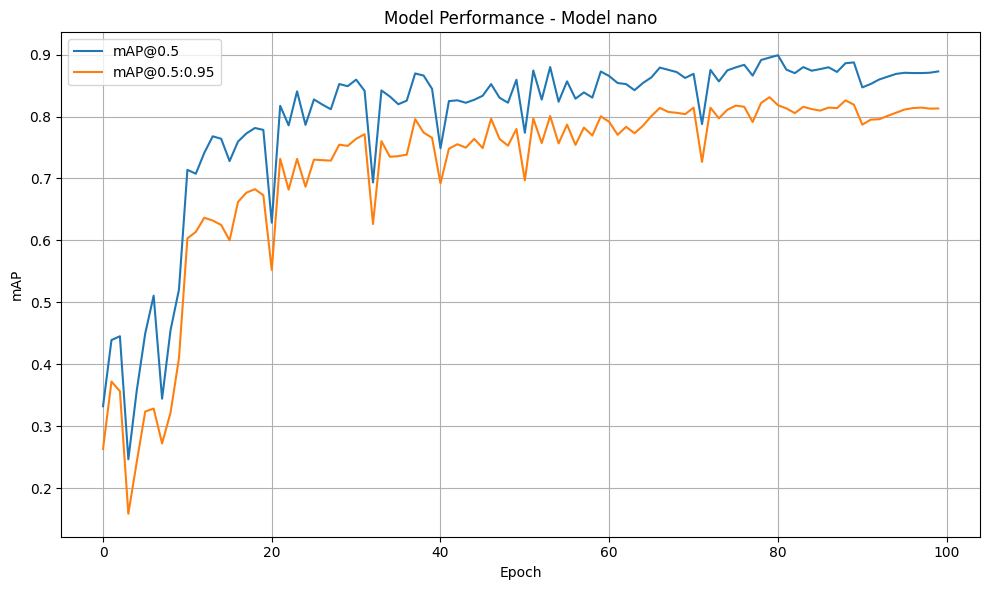

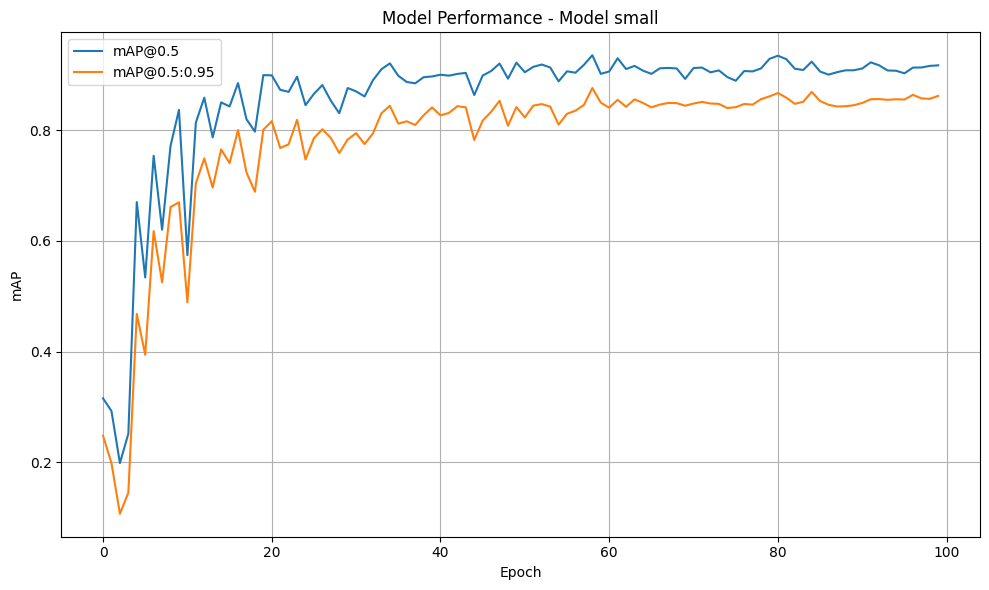

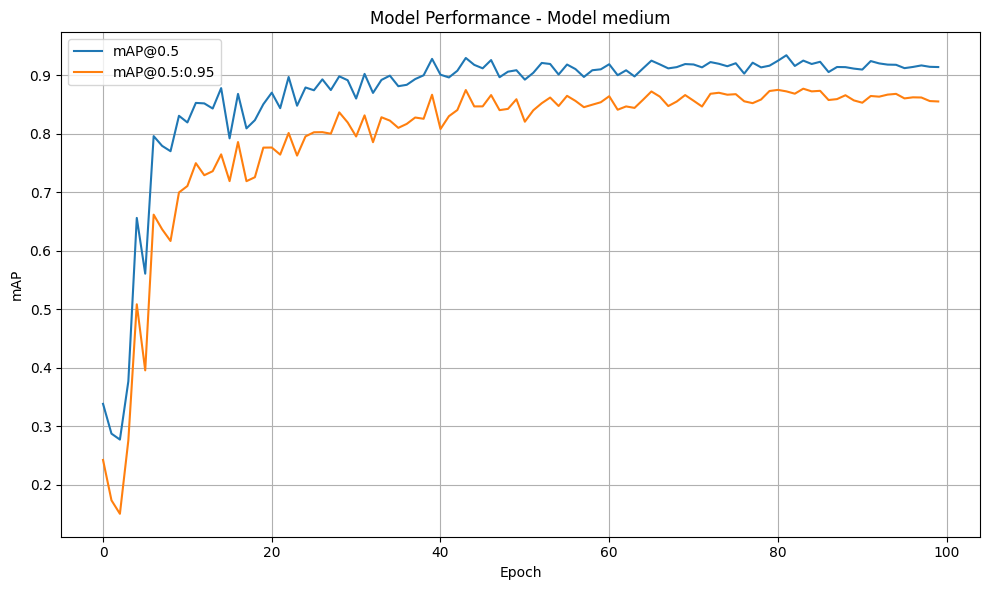

In [23]:
%matplotlib inline
for size in sizes:
    df = pd.read_csv(f"{project_base_maskDaun}/training/{size}/results.csv")

    plt.figure(figsize=(10, 6))

    # Plot mAP50 dan mAP50-95
    plt.plot(df.index, df["metrics/mAP50(B)"], label="mAP@0.5")
    plt.plot(df.index, df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95")

    # Tambahkan label dan judul
    plt.xlabel("Epoch")
    plt.ylabel("mAP")
    plt.title(f"Model Performance - Model {size}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Simpan plot
    graph_output_dir = f"{project_base_maskDaun}/graph"
    os.makedirs(graph_output_dir, exist_ok=True)
    plt.savefig(os.path.join(graph_output_dir, f"mAP_comparison_{size}.png"))
    plt.show()

In [24]:
if GoogleDrive:
    copy_to_google_drive("dataset/mask_daun", "dataset/mask_daun")
    copy_to_google_drive("results/mask_daun", "results/mask_daun")

## Training Mask Lesi

In [25]:
# Variabel Global
models = ['yolo11n-seg.pt', 'yolo11s-seg.pt', 'yolo11m-seg.pt']
sizes = ['nano', 'small', 'medium']
epochs = 100
batch = -1 # atau -1 untuk limitasi gpu 60%
data_path_maskLesi = "dataset/mask_lesi"
project_base_maskLesi = "results/mask_lesi"

In [26]:
for model_name, size in zip(models, sizes):
    print(f"Training {size} model...")
    model = YOLO(model_name)

    start_time = time.time()
    training = model.train(
        data=f"{data_path_maskLesi}/data.yaml", 
        epochs=epochs, 
        imgsz=640, 
        batch=batch, 
        project=f"{project_base_maskLesi}/training", 
        name=f"{size}",
        exist_ok=True
    )

    measure_and_save_time(start_time, f"{project_base_maskLesi}/training/summary/time/{size}-train-time.txt")
    csv_filename = f"{project_base_maskLesi}/training/summary/{size}-training-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(training.to_csv())

    validation = model.val(
        data=f"{data_path_maskLesi}/data.yaml", 
        imgsz=640,
        project=f"{project_base_maskLesi}/validation",
        name=f"{size}",
        exist_ok=True,
        split="test"
    )

    csv_filename = f"{project_base_maskLesi}/validation/summary/{size}-validation-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(validation.to_csv())

    print(f"Finished training and validating {size} model.")

Training nano model...
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/mask_lesi/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=nano, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspectiv

train: Scanning /workspace/dataset/mask_lesi/train/labels... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:01<00:00, 487.54it/s]


train: New cache created: /workspace/dataset/mask_lesi/train/labels.cache
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.64G total, 2.14G reserved, 0.11G allocated, 21.40G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     2843583       10.36         0.575         22.32           nan        (1, 3, 640, 640)                    list
     2843583       20.72         1.149         26.18           nan        (2, 3, 640, 640)                    list
     2843583       41.44         1.879          25.1           nan        (4, 3, 640, 640)                    list
     2843583       82.88         3.496         29.49           nan        (8, 3, 640, 640)                    list
     2843583       165.8         6.575         36.46           nan       (16, 3, 640, 640)                    list
     2843583       331.5        12.470       

train: Scanning /workspace/dataset/mask_lesi/train/labels.cache... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 137.3±78.2 MB/s, size: 722.8 KB)


val: Scanning /workspace/dataset/mask_lesi/valid/labels... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 223.67it/s]

val: New cache created: /workspace/dataset/mask_lesi/valid/labels.cache


Plotting labels to results/mask_lesi/training/nano/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.000515625), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/mask_lesi/training/nano
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.05G     0.9641      2.425      3.612      1.141        408        640: 100%|██████████| 16/16 [00:03<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]

                   all         75        409     0.0077      0.571      0.159       0.14     0.0077      0.566       0.16      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.35G      0.757      1.106      2.769     0.9777        373        640: 100%|██████████| 16/16 [00:02<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.07it/s]

                   all         75        409     0.0118      0.591        0.2      0.173     0.0115       0.59      0.199      0.171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.35G      0.803      1.054      1.956     0.9969        322        640: 100%|██████████| 16/16 [00:02<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.99it/s]

                   all         75        409    0.00709       0.58      0.344      0.228    0.00753       0.59      0.352      0.284



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.35G     0.7832      1.001       1.53     0.9859        420        640: 100%|██████████| 16/16 [00:02<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         75        409       0.96      0.119       0.37      0.278       0.96      0.119      0.374      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.35G     0.7421     0.9924      1.301     0.9697        368        640: 100%|██████████| 16/16 [00:02<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.42it/s]

                   all         75        409      0.858      0.216      0.394       0.32      0.844      0.213      0.393      0.335



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.35G       0.73     0.9706      1.226     0.9525        415        640: 100%|██████████| 16/16 [00:02<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         75        409      0.611      0.334      0.329      0.254      0.618      0.325      0.317      0.223



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.35G     0.7164     0.9512      1.146     0.9601        293        640: 100%|██████████| 16/16 [00:02<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         75        409      0.732       0.38      0.559      0.384      0.716       0.38      0.535      0.349



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.35G      0.709     0.9468       1.11     0.9592        344        640: 100%|██████████| 16/16 [00:02<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         75        409      0.803      0.437      0.715      0.548      0.795      0.428      0.674      0.466



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.35G     0.7037     0.9298      1.088     0.9489        405        640: 100%|██████████| 16/16 [00:02<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]

                   all         75        409      0.524      0.625      0.742      0.575      0.495      0.608      0.699      0.489



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.35G     0.7025     0.9381      1.066     0.9545        355        640: 100%|██████████| 16/16 [00:02<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         75        409      0.658      0.534      0.704      0.528      0.646      0.527      0.662      0.472



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.35G     0.6831     0.8965       1.03     0.9491        361        640: 100%|██████████| 16/16 [00:02<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.35it/s]

                   all         75        409      0.587      0.499      0.597      0.462       0.58      0.478      0.553      0.393



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.35G     0.6664      0.875      1.001     0.9404        296        640: 100%|██████████| 16/16 [00:02<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]

                   all         75        409      0.652      0.508      0.603      0.467       0.64      0.485       0.56      0.385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.35G     0.6596      0.861     0.9736      0.935        431        640: 100%|██████████| 16/16 [00:02<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.91it/s]

                   all         75        409      0.689      0.693      0.727      0.569      0.678      0.675      0.699      0.474



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.35G     0.6582     0.8465     0.9563     0.9369        299        640: 100%|██████████| 16/16 [00:02<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         75        409      0.355      0.498       0.37      0.276      0.355      0.484      0.344      0.201



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.35G     0.6515     0.8384     0.9132      0.936        389        640: 100%|██████████| 16/16 [00:02<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.61it/s]

                   all         75        409      0.365      0.482      0.426      0.322      0.363      0.464      0.402      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.35G     0.6354     0.8197     0.8846     0.9206        294        640: 100%|██████████| 16/16 [00:02<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.10it/s]

                   all         75        409      0.478      0.534      0.544      0.436      0.466      0.509      0.511      0.347



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.35G     0.6373     0.8004     0.8874     0.9322        310        640: 100%|██████████| 16/16 [00:02<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]

                   all         75        409      0.672      0.752      0.802      0.644      0.659       0.73      0.758      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.35G      0.636     0.8105     0.8572     0.9236        362        640: 100%|██████████| 16/16 [00:02<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.99it/s]

                   all         75        409      0.627      0.617      0.713      0.565      0.623      0.599      0.677      0.457



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.35G     0.6425      0.812     0.8272     0.9308        340        640: 100%|██████████| 16/16 [00:02<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.08it/s]

                   all         75        409      0.811      0.743       0.84      0.689      0.814      0.726      0.813      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.35G     0.5965     0.7769      0.806     0.9139        322        640: 100%|██████████| 16/16 [00:02<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]

                   all         75        409        0.8      0.679      0.817      0.696      0.776       0.66      0.786      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.35G     0.6081     0.7972     0.7992     0.9169        301        640: 100%|██████████| 16/16 [00:02<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all         75        409      0.828      0.794      0.882      0.736      0.807      0.776      0.848      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.35G     0.5918     0.7414     0.8016      0.918        256        640: 100%|██████████| 16/16 [00:02<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]

                   all         75        409      0.766      0.691      0.821      0.667      0.746      0.669      0.791      0.583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.35G     0.6147      0.781     0.8109      0.911        307        640: 100%|██████████| 16/16 [00:02<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         75        409      0.671      0.756      0.819       0.68      0.743      0.643      0.787      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.35G     0.6112     0.7709     0.8076     0.9144        358        640: 100%|██████████| 16/16 [00:02<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         75        409      0.757        0.8      0.877      0.725      0.742      0.783      0.843      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.35G     0.6049     0.7619     0.7681     0.9095        411        640: 100%|██████████| 16/16 [00:02<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         75        409      0.772       0.74       0.86      0.704      0.805      0.674      0.813      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.35G     0.5921     0.7227     0.7419     0.9124        267        640: 100%|██████████| 16/16 [00:02<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         75        409      0.605       0.67      0.742      0.626      0.595       0.65      0.719      0.546



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.35G     0.5964     0.7469     0.7078     0.9081        391        640: 100%|██████████| 16/16 [00:02<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         75        409      0.805      0.742       0.86      0.711      0.766      0.717      0.816      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.35G     0.5813     0.7458     0.7249     0.9048        282        640: 100%|██████████| 16/16 [00:02<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.43it/s]

                   all         75        409      0.564      0.705       0.69      0.567      0.547      0.678      0.655      0.493



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.35G     0.5849     0.7758     0.7273     0.9168        358        640: 100%|██████████| 16/16 [00:02<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         75        409      0.704      0.822      0.895       0.74      0.708      0.757      0.849      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.35G     0.5666     0.7087     0.7046     0.9027        418        640: 100%|██████████| 16/16 [00:02<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]

                   all         75        409      0.797      0.794      0.885      0.741      0.783      0.777      0.853      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.35G     0.5703     0.7167     0.6792     0.8974        421        640: 100%|██████████| 16/16 [00:02<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.27it/s]

                   all         75        409      0.764      0.741      0.852      0.695      0.741      0.714      0.811      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.35G     0.5638      0.685     0.6672     0.8999        381        640: 100%|██████████| 16/16 [00:02<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.54it/s]

                   all         75        409      0.824      0.726      0.865      0.725      0.803      0.676      0.802      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.35G     0.5622     0.6869      0.689     0.9029        408        640: 100%|██████████| 16/16 [00:02<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]

                   all         75        409      0.768      0.755      0.852      0.707      0.745      0.737      0.821      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.35G     0.5597     0.6863     0.6622     0.8992        424        640: 100%|██████████| 16/16 [00:02<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         75        409      0.795      0.735      0.863      0.731      0.779      0.717      0.832      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.35G     0.5506     0.6901     0.6765     0.9016        286        640: 100%|██████████| 16/16 [00:02<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         75        409      0.813      0.754      0.876      0.731      0.793      0.728      0.825      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.35G     0.5616     0.6911     0.6501     0.8937        390        640: 100%|██████████| 16/16 [00:02<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         75        409      0.724      0.779      0.857       0.72      0.705      0.721      0.809      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.35G     0.5506     0.6753     0.6305     0.8897        404        640: 100%|██████████| 16/16 [00:02<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]

                   all         75        409      0.891       0.76      0.898      0.753      0.868      0.737      0.855       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.35G     0.5349     0.6562     0.6236     0.8926        351        640: 100%|██████████| 16/16 [00:02<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]

                   all         75        409      0.839      0.752      0.869      0.725      0.822      0.731      0.822       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.35G     0.5425     0.6954     0.6317      0.899        320        640: 100%|██████████| 16/16 [00:02<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         75        409      0.762      0.791      0.839      0.705      0.733      0.762      0.795       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.35G     0.5358     0.6884     0.6277     0.8849        368        640: 100%|██████████| 16/16 [00:02<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         75        409      0.808      0.755      0.866      0.737       0.78      0.723      0.827      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.35G     0.5193     0.6419     0.6085     0.8821        386        640: 100%|██████████| 16/16 [00:02<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]

                   all         75        409      0.759      0.803      0.863      0.725      0.714      0.767      0.819      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.35G     0.5242     0.6784     0.6093     0.8833        344        640: 100%|██████████| 16/16 [00:02<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.45it/s]

                   all         75        409      0.678      0.776      0.817      0.688      0.647      0.736      0.772      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.35G     0.5199     0.6676     0.6304     0.8927        290        640: 100%|██████████| 16/16 [00:02<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]

                   all         75        409      0.842      0.822      0.907      0.758      0.808      0.791      0.859      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.35G     0.5285     0.6921     0.6021     0.8869        327        640: 100%|██████████| 16/16 [00:02<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.19it/s]

                   all         75        409      0.834      0.804        0.9      0.764      0.821      0.788      0.868      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.35G     0.5168     0.6427     0.5811     0.8835        325        640: 100%|██████████| 16/16 [00:02<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]

                   all         75        409      0.808      0.859      0.911      0.772      0.784      0.829       0.87       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.35G     0.5311     0.6476     0.5984     0.8845        323        640: 100%|██████████| 16/16 [00:02<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         75        409      0.844      0.832      0.914      0.796      0.823      0.812      0.886      0.679



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.35G     0.5297     0.6538     0.5875     0.8747        451        640: 100%|██████████| 16/16 [00:02<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.41it/s]

                   all         75        409      0.849      0.792      0.872      0.752      0.807      0.748       0.82      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.35G      0.512     0.6238     0.5624     0.8803        345        640: 100%|██████████| 16/16 [00:02<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         75        409      0.861      0.839      0.915      0.776       0.83      0.816      0.873      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.35G     0.5195     0.6496     0.5802     0.8773        303        640: 100%|██████████| 16/16 [00:02<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         75        409      0.817      0.853      0.916      0.777      0.795       0.82      0.872      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.35G     0.5056     0.6294     0.5739     0.8802        394        640: 100%|██████████| 16/16 [00:02<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         75        409      0.836      0.818      0.904      0.769      0.817      0.791      0.851      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.35G     0.5242     0.6266     0.5749     0.8818        389        640: 100%|██████████| 16/16 [00:02<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         75        409      0.844      0.829      0.923      0.773      0.855      0.758      0.868      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.35G     0.5027     0.6243     0.5463     0.8799        368        640: 100%|██████████| 16/16 [00:02<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.68it/s]

                   all         75        409      0.905      0.843      0.926      0.802      0.892      0.805      0.879       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.35G     0.5051     0.6324     0.5455     0.8746        371        640: 100%|██████████| 16/16 [00:02<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]

                   all         75        409      0.848      0.817      0.914      0.788      0.829      0.799      0.877      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.35G      0.491     0.6149     0.5312     0.8733        358        640: 100%|██████████| 16/16 [00:02<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]

                   all         75        409      0.794      0.824      0.896      0.763      0.859      0.753      0.869      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.35G     0.5037     0.6387     0.5409     0.8712        235        640: 100%|██████████| 16/16 [00:02<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         75        409       0.78      0.774      0.871      0.743      0.771      0.759      0.848      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.35G     0.5085     0.6095     0.5158     0.8753        358        640: 100%|██████████| 16/16 [00:02<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]

                   all         75        409      0.834      0.828      0.911      0.781      0.857      0.764      0.873      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.35G     0.4914      0.616     0.5241     0.8753        355        640: 100%|██████████| 16/16 [00:02<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.57it/s]

                   all         75        409      0.769      0.806      0.879      0.758      0.751      0.762       0.84      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.35G     0.4825     0.6092     0.5154     0.8674        303        640: 100%|██████████| 16/16 [00:02<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.41it/s]

                   all         75        409      0.835      0.821      0.896      0.772      0.817      0.803       0.87       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.35G     0.5059     0.6178     0.5203      0.876        418        640: 100%|██████████| 16/16 [00:02<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         75        409      0.838      0.831      0.912      0.791      0.834      0.788      0.875      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.35G     0.4958     0.6105     0.5099     0.8737        394        640: 100%|██████████| 16/16 [00:02<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         75        409      0.865      0.827      0.917      0.795       0.84      0.808      0.877       0.68



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.35G     0.4892     0.6212     0.4997     0.8717        387        640: 100%|██████████| 16/16 [00:02<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         75        409      0.856      0.845      0.932      0.802      0.856      0.815      0.896      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.35G     0.4935     0.6107     0.5035     0.8703        346        640: 100%|██████████| 16/16 [00:02<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         75        409      0.872      0.842      0.931      0.798      0.856      0.803      0.881      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.35G     0.4855     0.5909     0.4923     0.8675        344        640: 100%|██████████| 16/16 [00:02<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         75        409      0.861      0.775      0.903      0.772      0.829      0.745      0.859      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.35G     0.4788     0.5901     0.4758     0.8676        390        640: 100%|██████████| 16/16 [00:02<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]

                   all         75        409      0.857      0.843      0.917      0.775       0.85      0.817      0.889      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.35G     0.4806     0.5843     0.4891      0.863        395        640: 100%|██████████| 16/16 [00:02<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.59it/s]

                   all         75        409      0.867      0.848      0.916      0.781      0.871      0.809      0.886      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.35G     0.4663      0.579     0.4725     0.8641        353        640: 100%|██████████| 16/16 [00:02<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         75        409      0.859      0.837      0.926      0.804      0.838      0.805      0.885      0.674



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.35G     0.4672     0.5954     0.4775     0.8631        371        640: 100%|██████████| 16/16 [00:02<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]

                   all         75        409      0.859      0.846      0.924      0.798      0.836      0.828       0.88      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.35G     0.4654     0.5935      0.478     0.8637        368        640: 100%|██████████| 16/16 [00:02<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         75        409      0.853       0.82        0.9      0.777      0.834      0.798      0.858      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.35G     0.4681     0.5704     0.4869     0.8631        465        640: 100%|██████████| 16/16 [00:02<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]

                   all         75        409      0.833      0.873       0.92      0.791      0.804      0.847      0.876      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.35G     0.4642     0.5638     0.4671     0.8652        433        640: 100%|██████████| 16/16 [00:02<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         75        409       0.88      0.839      0.915      0.789       0.85      0.813      0.868      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.35G     0.4708     0.5911      0.466     0.8613        334        640: 100%|██████████| 16/16 [00:02<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]

                   all         75        409      0.866      0.839      0.903      0.779      0.828      0.802      0.852      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.35G     0.4585     0.5665     0.4575     0.8623        425        640: 100%|██████████| 16/16 [00:02<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]

                   all         75        409       0.84      0.836      0.908      0.791       0.82       0.81      0.871      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.35G     0.4529      0.578     0.4593     0.8601        501        640: 100%|██████████| 16/16 [00:02<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         75        409      0.811      0.841      0.882      0.765      0.806       0.81      0.845       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.35G     0.4468     0.5424     0.4411     0.8599        331        640: 100%|██████████| 16/16 [00:02<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         75        409      0.833      0.826      0.911      0.783      0.825      0.817      0.886      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.35G     0.4497       0.55     0.4576     0.8574        323        640: 100%|██████████| 16/16 [00:02<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         75        409      0.868      0.827      0.925      0.808       0.87      0.796      0.884      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.35G     0.4516     0.5764     0.4632     0.8565        357        640: 100%|██████████| 16/16 [00:02<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         75        409      0.875      0.819      0.916      0.805      0.861      0.806      0.876      0.679



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.35G     0.4527     0.5623     0.4507     0.8654        293        640: 100%|██████████| 16/16 [00:02<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]

                   all         75        409      0.843      0.849      0.917      0.802      0.813       0.82      0.871      0.674



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.35G     0.4538     0.5563     0.4388     0.8637        333        640: 100%|██████████| 16/16 [00:02<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         75        409      0.863      0.829      0.907      0.788      0.873       0.77      0.863      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.35G     0.4511     0.5568     0.4341      0.861        301        640: 100%|██████████| 16/16 [00:02<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         75        409      0.858      0.832      0.908      0.785      0.831      0.807      0.869      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.35G     0.4549       0.56     0.4442     0.8637        388        640: 100%|██████████| 16/16 [00:02<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         75        409      0.871      0.837      0.908       0.79      0.842      0.811      0.869      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.35G     0.4433     0.5588     0.4309      0.864        405        640: 100%|██████████| 16/16 [00:02<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         75        409      0.912      0.843      0.911      0.799      0.885      0.812      0.868       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.35G     0.4343     0.5327     0.4108     0.8569        354        640: 100%|██████████| 16/16 [00:02<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         75        409      0.894      0.827      0.907      0.792      0.864      0.797       0.86      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.35G     0.4298     0.5416      0.413     0.8559        405        640: 100%|██████████| 16/16 [00:02<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]

                   all         75        409       0.86      0.844      0.906      0.795      0.836      0.816      0.863      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.35G     0.4377     0.5497     0.4179     0.8509        362        640: 100%|██████████| 16/16 [00:02<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.69it/s]

                   all         75        409      0.848      0.837      0.906      0.791      0.819       0.81      0.862      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.35G     0.4229     0.5274      0.413     0.8544        319        640: 100%|██████████| 16/16 [00:02<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]

                   all         75        409      0.872       0.84      0.914      0.802      0.848      0.812      0.876      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.35G     0.4276      0.536     0.4262      0.853        385        640: 100%|██████████| 16/16 [00:02<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         75        409      0.913      0.826       0.92      0.809      0.885      0.802       0.88      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.35G     0.4342     0.5443      0.409     0.8531        359        640: 100%|██████████| 16/16 [00:02<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         75        409      0.872       0.85      0.919      0.801      0.855      0.817      0.879      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.35G     0.4258     0.5177     0.4025     0.8476        466        640: 100%|██████████| 16/16 [00:02<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         75        409      0.887      0.857      0.919      0.799      0.851      0.822      0.867      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.35G     0.4287     0.5227     0.4025     0.8588        426        640: 100%|██████████| 16/16 [00:02<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]

                   all         75        409      0.885      0.854      0.919        0.8      0.872      0.816      0.878      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.35G     0.4231     0.5295      0.389     0.8505        378        640: 100%|██████████| 16/16 [00:02<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all         75        409       0.87      0.869      0.919      0.801      0.844      0.844      0.885      0.687


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.35G     0.4763     0.5849     0.5132     0.8363        182        640: 100%|██████████| 16/16 [00:04<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         75        409        0.9      0.831      0.911      0.779      0.869      0.805      0.862      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.35G     0.4618     0.5454      0.392     0.8233        168        640: 100%|██████████| 16/16 [00:02<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         75        409      0.864      0.817       0.88      0.764      0.857      0.788      0.844      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.35G     0.4465     0.5194     0.3919     0.8263        187        640: 100%|██████████| 16/16 [00:02<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         75        409      0.917      0.813      0.911      0.785      0.889      0.796      0.871      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.35G      0.443     0.5435     0.3722     0.8197        172        640: 100%|██████████| 16/16 [00:02<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]

                   all         75        409      0.882      0.853      0.922      0.808      0.854      0.837      0.882      0.683



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.35G     0.4389     0.5423     0.3641     0.8188        174        640: 100%|██████████| 16/16 [00:02<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         75        409      0.875       0.86      0.925      0.806      0.855      0.828      0.883      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.35G     0.4298     0.5189     0.3525     0.8219        177        640: 100%|██████████| 16/16 [00:02<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]

                   all         75        409      0.873      0.858      0.926      0.814      0.869      0.821      0.885      0.684



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.35G      0.425     0.5231     0.3521     0.8169        210        640: 100%|██████████| 16/16 [00:02<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.59it/s]

                   all         75        409      0.886       0.85      0.928       0.81      0.863      0.824      0.889      0.683



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.35G     0.4245     0.5249     0.3491     0.8178        140        640: 100%|██████████| 16/16 [00:02<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

                   all         75        409      0.897      0.839      0.924      0.814      0.879      0.817      0.886      0.686



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.35G      0.418     0.5093     0.3422     0.8148        232        640: 100%|██████████| 16/16 [00:02<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all         75        409      0.895      0.833      0.923      0.808      0.874      0.811      0.881      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.35G     0.4213      0.524     0.3433     0.8145        182        640: 100%|██████████| 16/16 [00:02<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.74it/s]

                   all         75        409       0.86      0.858      0.924      0.811      0.864      0.815      0.883      0.686



100 epochs completed in 0.086 hours.
Optimizer stripped from results/mask_lesi/training/nano/weights/last.pt, 6.0MB
Optimizer stripped from results/mask_lesi/training/nano/weights/best.pt, 6.0MB

Validating results/mask_lesi/training/nano/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLO11n-seg summary (fused): 113 layers, 2,835,543 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:00<00:00,  3.31it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]


                   all         75        409      0.901      0.839      0.924      0.813      0.878      0.818      0.886      0.686
    frog-eye-leaf-spot         25         34      0.997      0.853      0.917      0.893      0.998      0.853      0.917      0.867
frog-eye-leaf-spot_lession         25        152      0.929      0.796      0.933      0.755      0.869      0.743      0.856      0.431
               healthy         25         70      0.898        0.8      0.896      0.854      0.902        0.8      0.904       0.83
                  rust         25         28        0.8      0.964       0.98      0.932      0.801      0.964       0.98      0.948
          rust_lession         25        125      0.882      0.784      0.896      0.633      0.821      0.728      0.771      0.355
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to results/mask_lesi/training/nano
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVID

val: Scanning /workspace/dataset/mask_lesi/test/labels... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<00:00, 372.25it/s]


val: New cache created: /workspace/dataset/mask_lesi/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:01<00:05,  1.34s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:02<00:03,  1.03s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


                   all        150        753       0.88       0.86      0.913      0.809      0.873      0.835      0.885      0.692
    frog-eye-leaf-spot         50         53      0.915      0.962      0.967      0.957      0.918      0.962      0.967      0.965
frog-eye-leaf-spot_lession         50        241      0.807      0.772      0.848      0.701      0.812      0.739      0.805       0.37
               healthy         50        145      0.903      0.769      0.896      0.836      0.917      0.758      0.897      0.817
                  rust         49         50      0.851       0.96      0.928      0.873      0.855       0.96      0.928      0.864
          rust_lession         50        264      0.925      0.837      0.926      0.677      0.862      0.758      0.829      0.443
Speed: 1.5ms preprocess, 1.6ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to results/mask_lesi/validation/nano
Finished training and validating nano model.
Training small model

train: Scanning /workspace/dataset/mask_lesi/train/labels.cache... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.64G total, 1.27G reserved, 0.19G allocated, 22.18G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    10084223        35.6         1.040         28.57           nan        (1, 3, 640, 640)                    list
    10084223        71.2         2.116         29.99           nan        (2, 3, 640, 640)                    list
    10084223       142.4         3.437          66.2           nan        (4, 3, 640, 640)                    list
    10084223       284.8         6.363         36.03           nan        (8, 3, 640, 640)                    list
    10084223       569.6        11.738          46.8           nan       (16, 3, 640, 640)                    list
    10084223        1139        22.333         64.43           nan       (32, 3, 640, 640)                    list
CUDA out of memory. Tried to allocate 100.00 MiB. GPU 0 has a total capacity of 23.64 GiB of which 50.81 MiB is free. Process 468591 has 23.57 GiB memory in use. Of the allocated memory 22.87 GiB

train: Scanning /workspace/dataset/mask_lesi/train/labels.cache... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.4±0.3 ms, read: 393.6±233.5 MB/s, size: 722.8 KB)


val: Scanning /workspace/dataset/mask_lesi/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to results/mask_lesi/training/small/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005625000000000001), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/mask_lesi/training/small
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100       5.7G     0.8141      1.601      2.416      1.063         29        640: 100%|██████████| 30/30 [00:05<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.78it/s]

                   all         75        409      0.518      0.679      0.677      0.527      0.591      0.576      0.626       0.45



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100       6.4G     0.7117       1.02      1.194     0.9761         38        640: 100%|██████████| 30/30 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.61it/s]

                   all         75        409      0.424      0.474      0.409      0.261      0.368       0.46      0.348      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100       6.4G     0.7634       1.05      1.061     0.9914         26        640: 100%|██████████| 30/30 [00:03<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.02it/s]

                   all         75        409      0.521      0.645      0.626      0.432      0.517      0.611      0.578      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100       6.4G     0.7633      1.036      1.016     0.9832         33        640: 100%|██████████| 30/30 [00:03<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.66it/s]


                   all         75        409      0.584      0.728      0.654      0.499      0.503      0.653      0.523       0.26

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100       6.4G     0.7209      0.988     0.9749     0.9714         42        640: 100%|██████████| 30/30 [00:03<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.44it/s]


                   all         75        409      0.689      0.606      0.672      0.503      0.664       0.59      0.632      0.395

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100       6.4G     0.7313     0.9819     0.9722     0.9757         20        640: 100%|██████████| 30/30 [00:03<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]

                   all         75        409      0.642      0.729      0.806      0.623      0.632       0.72      0.782       0.52



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100       6.4G     0.7318     0.9695     0.9387     0.9828         57        640: 100%|██████████| 30/30 [00:03<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.61it/s]


                   all         75        409      0.802      0.793      0.871      0.662      0.769      0.759      0.817      0.535

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100       6.4G     0.6932     0.9269     0.8885     0.9652         25        640: 100%|██████████| 30/30 [00:03<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.95it/s]

                   all         75        409      0.696      0.755      0.754      0.557      0.701      0.721      0.722      0.456



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100       6.4G     0.6739     0.9018     0.8713     0.9396         69        640: 100%|██████████| 30/30 [00:03<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


                   all         75        409      0.809      0.839       0.91      0.725      0.786      0.811      0.869      0.622

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100       6.4G     0.6535     0.8662     0.8367     0.9445         35        640: 100%|██████████| 30/30 [00:03<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.00it/s]

                   all         75        409      0.716      0.785      0.875      0.692      0.684      0.752      0.823      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100       6.4G     0.6802     0.8871     0.8074     0.9604         46        640: 100%|██████████| 30/30 [00:04<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.77it/s]


                   all         75        409      0.769      0.701      0.808      0.653      0.748      0.677      0.755      0.542

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100       6.4G     0.6407     0.8196     0.7971     0.9457         20        640: 100%|██████████| 30/30 [00:03<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.56it/s]

                   all         75        409      0.841      0.756       0.87      0.707      0.816      0.727      0.817      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100       6.4G     0.6556     0.8593     0.7647     0.9393         34        640: 100%|██████████| 30/30 [00:03<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]

                   all         75        409      0.836      0.758      0.883      0.711      0.781      0.726      0.816      0.583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100       6.4G     0.6502      0.858     0.7663     0.9433         62        640: 100%|██████████| 30/30 [00:03<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.05it/s]

                   all         75        409      0.762      0.733      0.824       0.66      0.747      0.693      0.778      0.547



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100       6.4G     0.6358     0.8473     0.7825     0.9423         12        640: 100%|██████████| 30/30 [00:03<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.94it/s]

                   all         75        409      0.859       0.76      0.897      0.732       0.86      0.709      0.846      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100       6.4G      0.622     0.8047     0.7209     0.9285         18        640: 100%|██████████| 30/30 [00:03<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.89it/s]

                   all         75        409      0.786      0.813      0.887      0.738      0.848       0.73      0.844      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100       6.4G     0.5982     0.7658      0.751     0.9137         52        640: 100%|██████████| 30/30 [00:03<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.11it/s]

                   all         75        409      0.801      0.823      0.888      0.736      0.833      0.743      0.845      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100       6.4G     0.5988      0.765     0.7435     0.9241         40        640: 100%|██████████| 30/30 [00:03<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.08it/s]

                   all         75        409      0.782      0.718      0.834      0.693      0.761      0.684      0.786      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100       6.4G     0.5871     0.7748      0.722     0.9232         23        640: 100%|██████████| 30/30 [00:04<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.13it/s]

                   all         75        409      0.818      0.775      0.878      0.731      0.793      0.742       0.83      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100       6.4G     0.5798     0.7478     0.7129      0.917         42        640: 100%|██████████| 30/30 [00:03<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.73it/s]

                   all         75        409      0.856      0.815      0.911      0.766      0.835      0.798      0.861      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100       6.4G     0.5968     0.7633     0.6966     0.9252         48        640: 100%|██████████| 30/30 [00:03<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.31it/s]

                   all         75        409       0.93       0.81      0.923      0.754      0.898      0.774      0.872      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100       6.4G     0.5872     0.7361     0.6733     0.9217         49        640: 100%|██████████| 30/30 [00:03<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.35it/s]

                   all         75        409      0.836      0.865      0.922      0.781        0.8      0.823      0.869      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100       6.4G     0.5749     0.7331     0.6696     0.9131         33        640: 100%|██████████| 30/30 [00:03<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.88it/s]

                   all         75        409      0.838      0.734      0.847      0.708      0.814      0.693      0.789      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100       6.4G     0.5621     0.7276     0.6982     0.9071         14        640: 100%|██████████| 30/30 [00:03<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.21it/s]

                   all         75        409      0.854      0.776      0.902      0.758       0.82       0.74      0.851      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100       6.4G     0.5679     0.7523     0.6467     0.9095         36        640: 100%|██████████| 30/30 [00:03<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.93it/s]

                   all         75        409      0.756      0.684      0.827      0.703      0.738      0.667      0.786      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100       6.4G     0.5523     0.7106      0.644     0.9013         20        640: 100%|██████████| 30/30 [00:03<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.13it/s]

                   all         75        409      0.811      0.846      0.921      0.786      0.794      0.814       0.88      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100       6.4G     0.5537     0.7232     0.6424     0.9101         36        640: 100%|██████████| 30/30 [00:03<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.12it/s]

                   all         75        409      0.893      0.797      0.916      0.776      0.871       0.77      0.876      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100       6.4G     0.5505     0.7087     0.6383     0.9129         30        640: 100%|██████████| 30/30 [00:03<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.78it/s]

                   all         75        409       0.79      0.809      0.904      0.765      0.755      0.787      0.863      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100       6.4G      0.547     0.6932     0.6201     0.9044         23        640: 100%|██████████| 30/30 [00:03<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.64it/s]

                   all         75        409      0.847      0.842      0.911      0.767      0.824      0.818      0.875      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100       6.4G     0.5451      0.675     0.6193     0.9028         26        640: 100%|██████████| 30/30 [00:03<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.85it/s]

                   all         75        409      0.842      0.858      0.928      0.781      0.874      0.796      0.889      0.679



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100       6.4G     0.5425     0.6865     0.6214     0.8996         32        640: 100%|██████████| 30/30 [00:03<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.31it/s]

                   all         75        409      0.821      0.827      0.913      0.786      0.812      0.783      0.863      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100       6.4G     0.5242     0.6493     0.5965     0.8919         31        640: 100%|██████████| 30/30 [00:03<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.00it/s]

                   all         75        409      0.878      0.827      0.922      0.794      0.852      0.804      0.878      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100       6.4G     0.5419     0.6418     0.5623      0.886         65        640: 100%|██████████| 30/30 [00:03<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.08it/s]

                   all         75        409      0.872      0.841      0.927      0.786      0.845      0.812      0.879      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100       6.4G     0.5339     0.6542     0.5986     0.8916         63        640: 100%|██████████| 30/30 [00:03<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.32it/s]

                   all         75        409      0.887      0.831      0.926      0.796      0.863      0.801      0.875      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100       6.4G     0.5443     0.6312     0.5914     0.8915         86        640: 100%|██████████| 30/30 [00:03<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.04it/s]

                   all         75        409      0.892      0.771      0.912       0.79      0.865      0.748       0.87      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100       6.4G     0.5308     0.6428     0.5853      0.894         38        640: 100%|██████████| 30/30 [00:03<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.29it/s]

                   all         75        409      0.866       0.81       0.91      0.786      0.848      0.794      0.876      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100       6.4G     0.5241     0.6509     0.5556     0.8886         50        640: 100%|██████████| 30/30 [00:03<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.30it/s]

                   all         75        409      0.894      0.818      0.915      0.794       0.86      0.787      0.868      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100       6.4G     0.5071     0.6122     0.5645     0.8824         21        640: 100%|██████████| 30/30 [00:03<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.67it/s]

                   all         75        409       0.77      0.841      0.899      0.766      0.766      0.795      0.854      0.644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100       6.4G     0.5158     0.6427     0.5649     0.8882         47        640: 100%|██████████| 30/30 [00:03<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.07it/s]

                   all         75        409       0.84      0.867       0.92      0.792      0.828      0.829      0.889      0.686



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100       6.4G     0.5049     0.6138      0.536     0.8773         49        640: 100%|██████████| 30/30 [00:03<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.34it/s]

                   all         75        409      0.932      0.788      0.927      0.799       0.91      0.758      0.877      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100       6.4G     0.5023     0.5956     0.5408     0.8825         39        640: 100%|██████████| 30/30 [00:03<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.95it/s]

                   all         75        409      0.819      0.844      0.925      0.786      0.783      0.805      0.871      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100       6.4G     0.5015     0.5982     0.5181     0.8801         41        640: 100%|██████████| 30/30 [00:03<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.13it/s]

                   all         75        409      0.902      0.831      0.922      0.794      0.897      0.786      0.876      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100       6.4G     0.4983     0.6353     0.5576     0.8792         26        640: 100%|██████████| 30/30 [00:03<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.97it/s]

                   all         75        409      0.864      0.783       0.89      0.762      0.901      0.721      0.849      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100       6.4G     0.4871     0.6084     0.5381     0.8744         14        640: 100%|██████████| 30/30 [00:03<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.23it/s]

                   all         75        409      0.895      0.812      0.928      0.812      0.882      0.796      0.883      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100       6.4G     0.4821     0.5835     0.5125     0.8777         35        640: 100%|██████████| 30/30 [00:03<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.40it/s]

                   all         75        409      0.849      0.858      0.931      0.801      0.861      0.789      0.881      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100       6.4G      0.503     0.6159     0.5214     0.8805         39        640: 100%|██████████| 30/30 [00:03<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.98it/s]

                   all         75        409      0.891      0.799      0.896      0.774       0.86      0.766      0.843      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100       6.4G      0.489      0.599     0.5317     0.8752         26        640: 100%|██████████| 30/30 [00:03<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.77it/s]

                   all         75        409      0.908      0.819      0.911      0.787      0.918      0.753      0.864      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100       6.4G     0.4836     0.5788      0.509     0.8724         25        640: 100%|██████████| 30/30 [00:03<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.44it/s]

                   all         75        409      0.883       0.82      0.926      0.808       0.86        0.8      0.884      0.687



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100       6.4G     0.4885     0.5935     0.4974     0.8748         48        640: 100%|██████████| 30/30 [00:03<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.17it/s]

                   all         75        409      0.858      0.839      0.901      0.789      0.825      0.803      0.858      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100       6.4G     0.4818     0.5744     0.5092     0.8861         18        640: 100%|██████████| 30/30 [00:03<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.14it/s]

                   all         75        409      0.827      0.901      0.926      0.802      0.845      0.814      0.873      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100       6.4G     0.4723     0.5938     0.5004     0.8748         67        640: 100%|██████████| 30/30 [00:03<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.15it/s]

                   all         75        409      0.861      0.892      0.938      0.811      0.842      0.853      0.894      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100       6.4G     0.4819     0.5814     0.5028     0.8766         32        640: 100%|██████████| 30/30 [00:03<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.33it/s]

                   all         75        409      0.879      0.892       0.94      0.811      0.845      0.847      0.888      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100       6.4G     0.4653     0.5631     0.4918     0.8744         19        640: 100%|██████████| 30/30 [00:03<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.22it/s]

                   all         75        409      0.873      0.864      0.932      0.798       0.87      0.817      0.896       0.68



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100       6.4G     0.4806     0.5837     0.4736     0.8744         30        640: 100%|██████████| 30/30 [00:03<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.05it/s]

                   all         75        409      0.909      0.857      0.937      0.811      0.882      0.822      0.886       0.68



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100       6.4G     0.4585     0.5548     0.4648     0.8719         25        640: 100%|██████████| 30/30 [00:03<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.12it/s]

                   all         75        409      0.884      0.862      0.937      0.814      0.868      0.815       0.89      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100       6.4G      0.471     0.5721     0.4549     0.8792         25        640: 100%|██████████| 30/30 [00:03<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.88it/s]

                   all         75        409      0.907      0.832      0.927      0.807      0.878      0.799      0.885      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100       6.4G     0.4616     0.5415     0.4674     0.8655         36        640: 100%|██████████| 30/30 [00:03<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.91it/s]

                   all         75        409      0.877      0.848      0.922        0.8      0.855      0.834      0.887      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100       6.4G     0.4492     0.5382     0.4486     0.8671         20        640: 100%|██████████| 30/30 [00:03<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.13it/s]

                   all         75        409      0.904      0.866      0.939      0.823      0.891      0.838      0.909      0.706



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100       6.4G     0.4507     0.5285     0.4549     0.8656         39        640: 100%|██████████| 30/30 [00:03<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.06it/s]

                   all         75        409      0.897      0.849      0.929      0.809       0.86      0.815      0.875      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100       6.4G     0.4443     0.5181     0.4452     0.8646         44        640: 100%|██████████| 30/30 [00:03<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.43it/s]

                   all         75        409      0.884      0.834      0.911      0.805      0.866      0.806      0.871      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100       6.4G     0.4432     0.5355     0.4501     0.8686         37        640: 100%|██████████| 30/30 [00:03<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.20it/s]

                   all         75        409      0.855      0.873      0.928      0.809      0.875      0.819      0.887      0.689



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100       6.4G     0.4411     0.5414     0.4424     0.8636         24        640: 100%|██████████| 30/30 [00:03<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.79it/s]

                   all         75        409      0.861      0.855      0.922      0.813      0.875        0.8      0.878      0.682



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100       6.4G      0.441     0.5203     0.4281     0.8618         31        640: 100%|██████████| 30/30 [00:03<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.21it/s]

                   all         75        409      0.871      0.873      0.936      0.818      0.893      0.806      0.895      0.693



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100       6.4G     0.4314      0.531     0.4456     0.8659         31        640: 100%|██████████| 30/30 [00:03<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.03it/s]

                   all         75        409      0.869      0.858      0.932      0.825       0.87      0.815      0.894      0.696



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100       6.4G     0.4354     0.5093     0.4348     0.8655         24        640: 100%|██████████| 30/30 [00:03<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.62it/s]

                   all         75        409      0.862      0.875      0.931      0.822      0.857      0.821      0.885      0.686



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100       6.4G     0.4309     0.5201     0.4295     0.8596         25        640: 100%|██████████| 30/30 [00:03<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.69it/s]

                   all         75        409      0.864       0.89      0.935      0.828      0.865      0.837      0.894      0.692



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100       6.4G     0.4377      0.528     0.4257     0.8597         32        640: 100%|██████████| 30/30 [00:03<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.37it/s]

                   all         75        409      0.874      0.859      0.924      0.822      0.852      0.826      0.886      0.693



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100       6.4G     0.4319     0.5032     0.4039     0.8586         52        640: 100%|██████████| 30/30 [00:03<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.25it/s]

                   all         75        409      0.918      0.828      0.923      0.821      0.903      0.785      0.875      0.683



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100       6.4G     0.4312     0.5057     0.4251     0.8588         25        640: 100%|██████████| 30/30 [00:03<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.33it/s]

                   all         75        409      0.852       0.84      0.919      0.811      0.887      0.767       0.88      0.682



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100       6.4G     0.4296     0.5162     0.4075     0.8537         24        640: 100%|██████████| 30/30 [00:03<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.26it/s]

                   all         75        409        0.9      0.803      0.913      0.803       0.86      0.768      0.854      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100       6.4G     0.4316     0.5081     0.4074     0.8574         30        640: 100%|██████████| 30/30 [00:03<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.15it/s]

                   all         75        409      0.859      0.837      0.925      0.812       0.85      0.793      0.877      0.684



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100       6.4G     0.4211     0.5231     0.3862     0.8558         24        640: 100%|██████████| 30/30 [00:03<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.29it/s]

                   all         75        409      0.865      0.887      0.935      0.819      0.911      0.816      0.903      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100       6.4G     0.4261     0.5048     0.4088     0.8589         19        640: 100%|██████████| 30/30 [00:03<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.32it/s]

                   all         75        409      0.891      0.864      0.932      0.821      0.878      0.821       0.89      0.692



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100       6.4G     0.4137     0.4795     0.4154     0.8546         16        640: 100%|██████████| 30/30 [00:03<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.98it/s]

                   all         75        409      0.835       0.86      0.921      0.813      0.789      0.825      0.875      0.682



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100       6.4G     0.4178     0.4984     0.3916      0.853         21        640: 100%|██████████| 30/30 [00:03<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.85it/s]

                   all         75        409      0.912      0.858       0.92      0.817      0.881      0.829      0.883      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100       6.4G     0.4099     0.4905     0.3796     0.8509         21        640: 100%|██████████| 30/30 [00:03<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.99it/s]

                   all         75        409      0.869      0.841      0.913      0.811      0.887      0.771      0.871      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100       6.4G     0.4183     0.4921     0.3781     0.8495         48        640: 100%|██████████| 30/30 [00:03<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.64it/s]

                   all         75        409      0.917      0.828      0.928      0.821      0.899      0.796      0.889      0.699



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100       6.4G     0.4137     0.4942     0.3787     0.8511         59        640: 100%|██████████| 30/30 [00:03<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.93it/s]

                   all         75        409      0.865      0.854      0.934       0.83      0.876      0.783      0.883      0.696



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100       6.4G     0.4102     0.4966     0.3769     0.8523         56        640: 100%|██████████| 30/30 [00:03<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.29it/s]

                   all         75        409       0.91      0.817      0.927      0.822      0.878      0.785      0.879      0.686



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100       6.4G     0.4049     0.4896      0.372      0.847         43        640: 100%|██████████| 30/30 [00:03<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.08it/s]

                   all         75        409      0.846      0.836      0.923      0.819       0.86      0.774      0.879      0.688



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100       6.4G     0.3962     0.4648     0.3789     0.8451         55        640: 100%|██████████| 30/30 [00:03<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.36it/s]

                   all         75        409      0.877      0.807      0.929      0.824      0.839      0.786      0.882      0.695



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100       6.4G     0.4079     0.4976      0.366     0.8511         31        640: 100%|██████████| 30/30 [00:03<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.18it/s]

                   all         75        409      0.834      0.864      0.932      0.829      0.876      0.783      0.893      0.696



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100       6.4G      0.393     0.4887      0.358     0.8545         34        640: 100%|██████████| 30/30 [00:03<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.07it/s]

                   all         75        409      0.899      0.845      0.925      0.824      0.877      0.813      0.887      0.691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100       6.4G     0.3904     0.4768     0.3645     0.8499         47        640: 100%|██████████| 30/30 [00:03<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.70it/s]

                   all         75        409      0.901      0.837      0.922       0.82      0.884      0.806      0.888      0.691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100       6.4G     0.4005     0.4762      0.365     0.8574         23        640: 100%|██████████| 30/30 [00:03<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.13it/s]

                   all         75        409      0.899      0.848      0.936      0.833      0.876      0.827      0.898      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100       6.4G     0.3967      0.469     0.3472     0.8517         32        640: 100%|██████████| 30/30 [00:03<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.68it/s]

                   all         75        409      0.887      0.873      0.936      0.832      0.915      0.786      0.891      0.704



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100       6.4G     0.3852     0.4811     0.3751     0.8477         51        640: 100%|██████████| 30/30 [00:03<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.48it/s]

                   all         75        409      0.886      0.869      0.935      0.834      0.915      0.792       0.89      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100       6.4G     0.3941     0.4731     0.3755      0.847         38        640: 100%|██████████| 30/30 [00:03<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.11it/s]

                   all         75        409      0.911      0.854      0.937      0.831       0.87      0.815      0.883      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100       6.4G     0.3799     0.4558      0.349     0.8429         53        640: 100%|██████████| 30/30 [00:03<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.04it/s]

                   all         75        409      0.913      0.834       0.94      0.837      0.892      0.807      0.898       0.71



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100       6.4G     0.3882     0.4742     0.3439     0.8418         86        640: 100%|██████████| 30/30 [00:03<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.94it/s]

                   all         75        409      0.908      0.861      0.943      0.839      0.887      0.821      0.896      0.704


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100       6.4G     0.4131     0.5155     0.3516     0.8234         14        640: 100%|██████████| 30/30 [00:04<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.99it/s]

                   all         75        409      0.919      0.847      0.935      0.831      0.893      0.814      0.888      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100       6.4G     0.4025     0.4763     0.3053     0.8216         17        640: 100%|██████████| 30/30 [00:03<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]

                   all         75        409      0.902      0.861      0.932      0.833      0.898      0.821      0.897      0.707



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100       6.4G     0.3903     0.4765     0.3031     0.8077         14        640: 100%|██████████| 30/30 [00:03<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.87it/s]

                   all         75        409      0.919      0.813      0.932      0.827      0.892      0.792       0.89      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100       6.4G     0.4001     0.4798     0.3028     0.8133         14        640: 100%|██████████| 30/30 [00:03<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.96it/s]

                   all         75        409      0.861      0.855      0.935      0.828      0.878      0.784      0.887      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100       6.4G     0.3911     0.4637     0.2908     0.8054         17        640: 100%|██████████| 30/30 [00:03<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.35it/s]

                   all         75        409      0.872      0.856      0.933       0.83      0.871      0.791      0.885      0.697



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100       6.4G     0.3804     0.4442     0.2807     0.8073         17        640: 100%|██████████| 30/30 [00:03<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.14it/s]

                   all         75        409      0.893      0.846      0.938      0.834      0.876      0.812      0.899      0.704



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100       6.4G     0.3685      0.439     0.2856      0.805         16        640: 100%|██████████| 30/30 [00:03<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.10it/s]

                   all         75        409      0.848      0.884      0.937      0.834      0.899       0.79      0.893      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100       6.4G     0.3797     0.4464      0.275     0.8093         17        640: 100%|██████████| 30/30 [00:03<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.18it/s]

                   all         75        409      0.894       0.86      0.938      0.833      0.864      0.826      0.891      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100       6.4G     0.3767     0.4842     0.2719     0.8051         16        640: 100%|██████████| 30/30 [00:03<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.26it/s]

                   all         75        409      0.894      0.858      0.939      0.833        0.9      0.798      0.895      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100       6.4G     0.3696     0.4539     0.2691      0.811         15        640: 100%|██████████| 30/30 [00:03<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.40it/s]

                   all         75        409      0.873      0.874      0.939      0.834      0.904      0.798      0.894        0.7



100 epochs completed in 0.121 hours.
Optimizer stripped from results/mask_lesi/training/small/weights/last.pt, 20.5MB
Optimizer stripped from results/mask_lesi/training/small/weights/best.pt, 20.5MB

Validating results/mask_lesi/training/small/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLO11s-seg summary (fused): 113 layers, 10,068,751 parameters, 0 gradients, 35.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  67%|██████▋   | 2/3 [00:00<00:00,  4.37it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.02it/s]


                   all         75        409      0.913      0.834       0.94      0.837      0.893      0.808      0.899       0.71
    frog-eye-leaf-spot         25         34          1      0.819      0.961      0.942          1      0.817      0.961      0.921
frog-eye-leaf-spot_lession         25        152       0.95      0.809      0.957      0.798      0.883      0.743      0.883      0.464
               healthy         25         70      0.933      0.786      0.905      0.866      0.953        0.8      0.914      0.854
                  rust         25         28      0.786          1      0.978      0.949      0.791          1      0.978      0.958
          rust_lession         25        125      0.895      0.754      0.901      0.633      0.837       0.68       0.76      0.354
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to results/mask_lesi/training/small
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVI

val: Scanning /workspace/dataset/mask_lesi/test/labels.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/9 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  11%|█         | 1/9 [00:00<00:07,  1.08it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  22%|██▏       | 2/9 [00:02<00:07,  1.07s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.93it/s]


                   all        150        753      0.883      0.865      0.926      0.831      0.873      0.836      0.889      0.707
    frog-eye-leaf-spot         50         53      0.915      0.962       0.98      0.972      0.923      0.962       0.98      0.975
frog-eye-leaf-spot_lession         50        241      0.822      0.788      0.874       0.74      0.803      0.734      0.818      0.391
               healthy         50        145      0.914      0.779      0.878       0.83      0.918      0.774      0.878      0.808
                  rust         49         50       0.86       0.94      0.953      0.925      0.866       0.94      0.953      0.909
          rust_lession         50        264      0.904      0.853      0.944      0.689      0.858      0.769      0.817       0.45
Speed: 1.3ms preprocess, 2.7ms inference, 0.0ms loss, 6.3ms postprocess per image
Results saved to results/mask_lesi/validation/small
Finished training and validating small model.
Training medium mo

train: Scanning /workspace/dataset/mask_lesi/train/labels.cache... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.64G total, 1.95G reserved, 0.52G allocated, 21.18G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    22363071       123.6         2.051         41.63           nan        (1, 3, 640, 640)                    list
    22363071       247.2         4.190         38.67           nan        (2, 3, 640, 640)                    list
    22363071       494.4         6.910          42.7           nan        (4, 3, 640, 640)                    list
    22363071       988.8        12.568         56.01           nan        (8, 3, 640, 640)                    list
    22363071        1978        23.333         74.76           nan       (16, 3, 640, 640)                    list
CUDA out of memory. Tried to allocate 100.00 MiB. GPU 0 has a total capacity of 23.64 GiB of which 32.81 MiB is free. Process 468591 has 23.59 GiB memory in use. Of the allocated memory 22.88 GiB is allocated by PyTorch, and 184.39 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory

train: Scanning /workspace/dataset/mask_lesi/train/labels.cache... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.2±0.1 ms, read: 442.2±135.0 MB/s, size: 722.8 KB)


val: Scanning /workspace/dataset/mask_lesi/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to results/mask_lesi/training/medium/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 115 weight(decay=0.0), 126 weight(decay=0.0005), 125 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/mask_lesi/training/medium
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.96G     0.7526      1.365      1.941       1.05         65        640: 100%|██████████| 66/66 [00:07<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.55it/s]

                   all         75        409      0.565      0.694      0.697      0.524      0.546      0.661      0.654      0.414



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.46G     0.7725      1.128      1.258       1.03         56        640: 100%|██████████| 66/66 [00:06<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.22it/s]

                   all         75        409      0.636      0.662      0.666      0.471      0.609      0.642      0.627      0.384



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.46G     0.8354      1.227      1.157      1.049         62        640: 100%|██████████| 66/66 [00:08<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.69it/s]


                   all         75        409      0.528      0.533      0.599      0.418      0.496      0.507       0.55      0.319

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.46G     0.8074      1.187      1.089      1.044         54        640: 100%|██████████| 66/66 [00:06<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.93it/s]

                   all         75        409      0.573       0.63      0.626      0.419      0.554      0.603      0.576       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.46G     0.8141      1.113      1.098      1.032         57        640: 100%|██████████| 66/66 [00:06<00:00, 10.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.88it/s]

                   all         75        409      0.713      0.726      0.822      0.596      0.706      0.667      0.749      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.46G     0.7537     0.9643      1.022      1.006         79        640: 100%|██████████| 66/66 [00:06<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.91it/s]

                   all         75        409      0.746      0.758      0.814      0.643      0.714      0.722      0.753      0.522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.46G     0.7556      1.096      1.017      1.018         41        640: 100%|██████████| 66/66 [00:06<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.71it/s]


                   all         75        409      0.788      0.743      0.844      0.624       0.75      0.715      0.773      0.518

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.46G     0.7704      1.067     0.9899      1.007         77        640: 100%|██████████| 66/66 [00:07<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.60it/s]

                   all         75        409      0.691      0.706      0.785      0.632      0.663      0.683      0.738      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.46G     0.7366     0.9886      0.923     0.9975         52        640: 100%|██████████| 66/66 [00:06<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.53it/s]

                   all         75        409      0.803      0.742      0.826       0.67      0.776      0.708      0.784      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.46G     0.7228      1.003     0.9401          1         58        640: 100%|██████████| 66/66 [00:06<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.77it/s]

                   all         75        409      0.818       0.76       0.85      0.703      0.797      0.748      0.815      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.46G     0.7049     0.9095     0.8743     0.9798         84        640: 100%|██████████| 66/66 [00:06<00:00, 10.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.99it/s]

                   all         75        409      0.776      0.787      0.837      0.667      0.763      0.761      0.796       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.46G     0.7001     0.9864     0.8717     0.9914         87        640: 100%|██████████| 66/66 [00:07<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.07it/s]

                   all         75        409       0.81      0.734      0.843      0.682      0.787      0.701      0.786      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.46G     0.6605     0.8924     0.8534     0.9653         35        640: 100%|██████████| 66/66 [00:06<00:00,  9.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.18it/s]

                   all         75        409      0.859      0.753      0.885      0.718      0.806      0.713      0.807      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.46G       0.68     0.8949     0.8732      0.965         29        640: 100%|██████████| 66/66 [00:06<00:00, 10.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.80it/s]

                   all         75        409      0.842      0.731      0.878      0.737       0.81      0.699      0.821       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.46G     0.6409      0.916     0.8259     0.9674         38        640: 100%|██████████| 66/66 [00:06<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.27it/s]

                   all         75        409      0.878      0.733      0.882      0.733      0.844      0.701      0.827      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.46G     0.6197     0.7991     0.8039     0.9494         53        640: 100%|██████████| 66/66 [00:06<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.77it/s]

                   all         75        409      0.813      0.846      0.897      0.747      0.776      0.795      0.832      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.46G     0.6365     0.8482     0.8105     0.9691         39        640: 100%|██████████| 66/66 [00:06<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.64it/s]


                   all         75        409      0.871      0.794      0.876      0.721       0.84      0.766      0.836      0.625

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.46G       0.62       0.83     0.7764     0.9551         71        640: 100%|██████████| 66/66 [00:06<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.28it/s]

                   all         75        409      0.808      0.803      0.887      0.737      0.776      0.775       0.83      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.46G     0.6488     0.8441     0.7653      0.954         62        640: 100%|██████████| 66/66 [00:06<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.04it/s]

                   all         75        409      0.812      0.813      0.883      0.743      0.791      0.795      0.854       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.46G     0.6057     0.8199     0.7778     0.9479         76        640: 100%|██████████| 66/66 [00:06<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.19it/s]

                   all         75        409      0.884      0.775      0.907      0.757      0.857      0.748      0.861      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.46G     0.5957     0.7748     0.7459     0.9391         81        640: 100%|██████████| 66/66 [00:06<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.83it/s]

                   all         75        409      0.866      0.786      0.915      0.778      0.861      0.768      0.881      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.46G     0.6094     0.8171      0.795     0.9591         75        640: 100%|██████████| 66/66 [00:06<00:00,  9.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.51it/s]


                   all         75        409      0.788      0.761      0.855      0.715      0.761      0.731      0.812      0.593

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.46G     0.6018     0.7915     0.7498     0.9407         55        640: 100%|██████████| 66/66 [00:06<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.05it/s]

                   all         75        409      0.875      0.808      0.917      0.766      0.887      0.772      0.867      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.46G     0.5951      0.772     0.7391     0.9389         76        640: 100%|██████████| 66/66 [00:06<00:00, 10.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.17it/s]

                   all         75        409      0.893      0.771      0.888       0.76      0.872      0.732      0.838      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.46G      0.584     0.7469        0.7     0.9301        112        640: 100%|██████████| 66/66 [00:06<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.08it/s]

                   all         75        409      0.887      0.786      0.911      0.775      0.848      0.744      0.849      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.46G     0.5663     0.7478     0.6814     0.9315         67        640: 100%|██████████| 66/66 [00:06<00:00, 10.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.22it/s]

                   all         75        409      0.891       0.77      0.896      0.762       0.88      0.755      0.864      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.46G     0.5516     0.6969     0.6832      0.921         45        640: 100%|██████████| 66/66 [00:06<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.92it/s]

                   all         75        409       0.85      0.817      0.922      0.762       0.82       0.79      0.869      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.46G     0.5515      0.703     0.6437     0.9196         43        640: 100%|██████████| 66/66 [00:06<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.34it/s]

                   all         75        409      0.861      0.837      0.924      0.776      0.827      0.807      0.876      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.46G     0.5545     0.7105     0.6592      0.912         58        640: 100%|██████████| 66/66 [00:06<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.98it/s]

                   all         75        409      0.889      0.822      0.917      0.779      0.855      0.793      0.858      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.46G     0.5483     0.6886     0.6388     0.9103         57        640: 100%|██████████| 66/66 [00:07<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.10it/s]

                   all         75        409      0.852      0.828      0.915      0.778      0.834      0.779      0.855      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.46G     0.5414     0.7053     0.6524     0.9154         40        640: 100%|██████████| 66/66 [00:06<00:00, 10.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.26it/s]

                   all         75        409      0.854       0.79      0.902      0.773      0.841      0.747      0.853      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.46G     0.5364     0.6906     0.6243     0.9118         60        640: 100%|██████████| 66/66 [00:06<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.95it/s]

                   all         75        409      0.857      0.823      0.906      0.772      0.837       0.78      0.861      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.46G      0.534     0.6779     0.6619     0.9134         32        640: 100%|██████████| 66/66 [00:06<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.08it/s]

                   all         75        409      0.814      0.852      0.913      0.774       0.77       0.81      0.844      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.46G     0.5184     0.6713     0.6407     0.9036         46        640: 100%|██████████| 66/66 [00:06<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.85it/s]

                   all         75        409      0.898      0.858      0.945        0.8      0.883      0.805      0.886      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.46G     0.5234     0.6857     0.6335     0.8989         55        640: 100%|██████████| 66/66 [00:06<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.25it/s]

                   all         75        409      0.867      0.863      0.939      0.799      0.838      0.803      0.871      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.46G     0.5279     0.6897     0.5992     0.9098         77        640: 100%|██████████| 66/66 [00:06<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.21it/s]

                   all         75        409      0.936       0.83      0.942      0.809      0.923      0.801      0.897      0.687



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.46G     0.5265     0.6748      0.616     0.8981         50        640: 100%|██████████| 66/66 [00:06<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.83it/s]

                   all         75        409      0.863       0.85      0.935      0.801       0.83      0.826      0.883      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.46G     0.5197     0.6486     0.5954     0.8986         65        640: 100%|██████████| 66/66 [00:06<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.20it/s]

                   all         75        409      0.891      0.851      0.927      0.801      0.867      0.808      0.876      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.46G     0.5025     0.6417      0.578     0.8996         42        640: 100%|██████████| 66/66 [00:06<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.02it/s]

                   all         75        409      0.806      0.841      0.905      0.772       0.88      0.726      0.869      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.46G     0.5131     0.6517     0.5917     0.9046         89        640: 100%|██████████| 66/66 [00:06<00:00, 10.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.44it/s]

                   all         75        409      0.868      0.858      0.936      0.807       0.82      0.802      0.866      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.46G     0.4987     0.6353     0.5996     0.8987         85        640: 100%|██████████| 66/66 [00:06<00:00, 10.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.17it/s]

                   all         75        409      0.865      0.859      0.927      0.801      0.889      0.787      0.876      0.674



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.46G     0.4974     0.6316     0.5911     0.8986        101        640: 100%|██████████| 66/66 [00:06<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.87it/s]


                   all         75        409       0.85      0.774      0.865       0.75      0.758      0.807      0.815      0.611

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.46G      0.513     0.6388     0.5958     0.9056         48        640: 100%|██████████| 66/66 [00:07<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.63it/s]

                   all         75        409      0.815      0.838      0.902      0.775      0.811      0.765      0.846      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.46G     0.4963     0.6281      0.595     0.9062         31        640: 100%|██████████| 66/66 [00:06<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.69it/s]

                   all         75        409      0.836      0.848      0.936      0.809      0.805      0.804      0.881      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.46G     0.4983     0.6185     0.5608     0.9001         53        640: 100%|██████████| 66/66 [00:06<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.14it/s]

                   all         75        409      0.915      0.851      0.947      0.824       0.89      0.829      0.889      0.679



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.46G     0.5004     0.6043     0.5497     0.8895         65        640: 100%|██████████| 66/66 [00:06<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.34it/s]

                   all         75        409      0.894      0.832      0.941      0.803      0.854      0.806      0.882      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.46G     0.4959     0.6342     0.5423     0.8898         57        640: 100%|██████████| 66/66 [00:06<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.68it/s]

                   all         75        409      0.851      0.899      0.938      0.816      0.809      0.856      0.872      0.683



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.46G     0.4804     0.5662     0.5391     0.8891         68        640: 100%|██████████| 66/66 [00:07<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.76it/s]

                   all         75        409      0.896      0.878      0.944      0.819      0.896      0.821      0.892      0.691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.46G     0.4623     0.5668     0.5186     0.8797         65        640: 100%|██████████| 66/66 [00:06<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.81it/s]

                   all         75        409      0.871      0.865      0.935      0.808      0.834      0.822      0.886      0.679



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.46G     0.4714     0.5892     0.5183     0.8822         64        640: 100%|██████████| 66/66 [00:06<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.33it/s]

                   all         75        409      0.885      0.889      0.942       0.82      0.877      0.814       0.89      0.692



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.46G     0.4676      0.571     0.5211     0.8882         45        640: 100%|██████████| 66/66 [00:06<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.31it/s]

                   all         75        409      0.865      0.876      0.939      0.812      0.845      0.811      0.882      0.687



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.46G     0.4615     0.5574      0.517     0.8876         66        640: 100%|██████████| 66/66 [00:06<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.90it/s]

                   all         75        409      0.941      0.838      0.941      0.806      0.893      0.798      0.877      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.46G     0.4576     0.5735     0.5158     0.8803         62        640: 100%|██████████| 66/66 [00:07<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.10it/s]

                   all         75        409      0.872      0.814      0.926        0.8      0.836      0.759      0.867      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.46G     0.4693     0.5505     0.5236     0.8815         27        640: 100%|██████████| 66/66 [00:06<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.49it/s]

                   all         75        409      0.867      0.873      0.938      0.809      0.837      0.831      0.877      0.685



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.46G     0.4629     0.5602       0.49     0.8745         72        640: 100%|██████████| 66/66 [00:06<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.05it/s]

                   all         75        409      0.897      0.867      0.945       0.82      0.867       0.83      0.884      0.694



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.46G     0.4414     0.5468     0.4839     0.8772         38        640: 100%|██████████| 66/66 [00:06<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.91it/s]

                   all         75        409      0.882      0.867       0.94      0.809      0.853      0.818      0.872      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.46G     0.4464     0.5561     0.4823     0.8749         58        640: 100%|██████████| 66/66 [00:06<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.11it/s]

                   all         75        409      0.893      0.874      0.939      0.814       0.85      0.834      0.881      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.46G     0.4408     0.5437     0.4732     0.8618         44        640: 100%|██████████| 66/66 [00:07<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.69it/s]

                   all         75        409      0.913      0.877      0.953      0.832      0.907      0.821      0.901      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.46G     0.4459     0.5429     0.4785     0.8671         46        640: 100%|██████████| 66/66 [00:07<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.23it/s]

                   all         75        409      0.866      0.871      0.935      0.822      0.851      0.829      0.883       0.69



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.46G     0.4419     0.5514     0.5075     0.8777         33        640: 100%|██████████| 66/66 [00:07<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.72it/s]

                   all         75        409      0.874       0.87       0.94      0.824      0.856      0.836      0.886      0.693



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.46G      0.441     0.5474     0.4805     0.8724         86        640: 100%|██████████| 66/66 [00:06<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.76it/s]

                   all         75        409      0.873       0.86      0.933      0.815      0.858      0.833      0.895      0.692



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.46G     0.4282     0.5156      0.483     0.8689         48        640: 100%|██████████| 66/66 [00:06<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.51it/s]

                   all         75        409      0.893      0.861      0.938      0.819      0.878      0.818      0.889      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.46G      0.416     0.5228     0.4529     0.8666         52        640: 100%|██████████| 66/66 [00:06<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.20it/s]

                   all         75        409      0.887      0.862      0.938      0.815      0.862      0.825      0.893      0.691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.46G     0.4219     0.5044     0.4536     0.8675         80        640: 100%|██████████| 66/66 [00:06<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.43it/s]

                   all         75        409      0.889      0.876      0.933      0.817      0.866      0.848      0.898      0.698



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.46G      0.434     0.5345     0.4889     0.8727         57        640: 100%|██████████| 66/66 [00:06<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.20it/s]

                   all         75        409      0.914      0.833      0.938      0.823      0.894      0.797      0.892      0.694



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.46G     0.4302     0.5234      0.475     0.8708         63        640: 100%|██████████| 66/66 [00:06<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.36it/s]

                   all         75        409      0.886      0.893      0.941      0.818      0.873      0.843      0.896        0.7



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.46G     0.4281     0.5307     0.4382      0.864         53        640: 100%|██████████| 66/66 [00:06<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.87it/s]

                   all         75        409      0.888      0.865      0.945      0.824      0.861      0.838      0.892      0.698



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.46G     0.4222     0.5195     0.4375      0.868         48        640: 100%|██████████| 66/66 [00:06<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.48it/s]

                   all         75        409      0.899      0.872      0.942      0.821      0.871      0.825      0.892      0.694



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.46G     0.4115     0.5138     0.4415     0.8618         80        640: 100%|██████████| 66/66 [00:06<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.20it/s]

                   all         75        409      0.895      0.877      0.942      0.823       0.91      0.809      0.894      0.706



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.46G     0.4154     0.4964     0.4324     0.8598         38        640: 100%|██████████| 66/66 [00:06<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.06it/s]

                   all         75        409      0.925      0.855      0.945      0.836      0.905      0.824        0.9      0.706



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.46G      0.422     0.5094     0.4352     0.8638         50        640: 100%|██████████| 66/66 [00:06<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.29it/s]

                   all         75        409      0.893      0.867      0.942      0.827      0.868      0.836      0.899      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.46G     0.4053     0.4846     0.4191     0.8575         34        640: 100%|██████████| 66/66 [00:06<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.08it/s]

                   all         75        409      0.882      0.894      0.945       0.82      0.878      0.815      0.887      0.699



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.46G     0.4049     0.5217     0.4222     0.8662         55        640: 100%|██████████| 66/66 [00:06<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.30it/s]

                   all         75        409      0.902      0.885      0.947      0.833      0.859      0.846      0.887      0.696



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.46G     0.4051     0.5112     0.4135      0.858         46        640: 100%|██████████| 66/66 [00:06<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.54it/s]

                   all         75        409      0.878      0.879      0.945      0.829      0.896      0.789      0.883      0.699



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.46G     0.4004     0.4908     0.4172     0.8694         51        640: 100%|██████████| 66/66 [00:06<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.43it/s]

                   all         75        409      0.924      0.877      0.935      0.828      0.897      0.842      0.891      0.696



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.46G     0.4167     0.5154     0.4125     0.8575         58        640: 100%|██████████| 66/66 [00:06<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.40it/s]

                   all         75        409      0.885      0.892      0.942      0.828      0.863      0.845       0.89      0.696



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.46G     0.4009     0.4786     0.3919     0.8552         59        640: 100%|██████████| 66/66 [00:06<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.17it/s]

                   all         75        409      0.873      0.904       0.94      0.825      0.907      0.818      0.889      0.691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.46G     0.3823     0.4716     0.3858     0.8481         47        640: 100%|██████████| 66/66 [00:06<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.42it/s]

                   all         75        409      0.918      0.879      0.942      0.835      0.879      0.842      0.886      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.46G      0.389     0.5008     0.3931     0.8522         58        640: 100%|██████████| 66/66 [00:06<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.31it/s]

                   all         75        409      0.904      0.865       0.94      0.838       0.87      0.841      0.886      0.707



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.46G     0.3877     0.4767     0.3856     0.8555         69        640: 100%|██████████| 66/66 [00:06<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.44it/s]

                   all         75        409      0.926      0.868      0.933      0.835        0.9       0.83      0.886      0.698



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.46G     0.3783     0.4575     0.3698     0.8496         43        640: 100%|██████████| 66/66 [00:06<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.19it/s]

                   all         75        409      0.922      0.869      0.941       0.84      0.908      0.835      0.898      0.718



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.46G     0.3868     0.4619     0.3753     0.8544         64        640: 100%|██████████| 66/66 [00:06<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.32it/s]

                   all         75        409      0.904      0.858      0.934      0.831       0.87      0.827      0.892      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.46G     0.3731     0.4633     0.3663     0.8518         69        640: 100%|██████████| 66/66 [00:06<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.21it/s]

                   all         75        409       0.91      0.854      0.938      0.834      0.901      0.801       0.89      0.705



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.46G     0.3868     0.4755     0.3777     0.8559         95        640: 100%|██████████| 66/66 [00:06<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.43it/s]

                   all         75        409      0.909      0.857      0.939      0.838      0.906      0.798      0.886      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.46G     0.3823     0.4767     0.3597     0.8525         35        640: 100%|██████████| 66/66 [00:06<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.42it/s]

                   all         75        409      0.929       0.86      0.937      0.835      0.899      0.827      0.881      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.46G     0.3763     0.4642     0.3586     0.8489         41        640: 100%|██████████| 66/66 [00:06<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.28it/s]

                   all         75        409      0.926      0.861      0.944       0.84      0.892       0.83      0.893      0.708



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.46G     0.3803     0.4695     0.3666     0.8571         25        640: 100%|██████████| 66/66 [00:06<00:00, 10.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.61it/s]

                   all         75        409      0.925      0.868      0.938      0.838      0.928      0.817      0.896      0.711



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.46G     0.3632     0.4454     0.3367     0.8537         65        640: 100%|██████████| 66/66 [00:06<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.15it/s]

                   all         75        409      0.926      0.879       0.94       0.83      0.888      0.833      0.885      0.698



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.46G     0.3676     0.4536     0.3518     0.8519         36        640: 100%|██████████| 66/66 [00:06<00:00, 10.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.21it/s]

                   all         75        409      0.922      0.883       0.94      0.836      0.891      0.849        0.9      0.709



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.46G     0.3661     0.4514     0.3351     0.8455         59        640: 100%|██████████| 66/66 [00:06<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.83it/s]

                   all         75        409      0.899      0.882      0.943      0.846      0.868       0.85      0.897      0.712


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.46G     0.3948     0.4884     0.3222     0.8234         25        640: 100%|██████████| 66/66 [00:07<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.36it/s]

                   all         75        409      0.891      0.903      0.939      0.841      0.849      0.863      0.884      0.703



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.46G      0.378     0.4395     0.2893     0.8196         32        640: 100%|██████████| 66/66 [00:06<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.28it/s]

                   all         75        409      0.894      0.905      0.942      0.838      0.871      0.856      0.893      0.703



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      5.46G     0.3754     0.4592     0.2808     0.8152         31        640: 100%|██████████| 66/66 [00:06<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.36it/s]

                   all         75        409      0.918      0.879      0.944      0.843      0.903      0.846      0.911      0.718



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.46G     0.3677     0.4459     0.2788     0.8139         22        640: 100%|██████████| 66/66 [00:06<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.96it/s]

                   all         75        409      0.921      0.877      0.939      0.836      0.891      0.843      0.898      0.711



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.46G     0.3662     0.4501     0.2747     0.8103         29        640: 100%|██████████| 66/66 [00:06<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.83it/s]

                   all         75        409      0.939      0.873      0.941      0.841      0.901      0.841      0.897       0.71



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.46G     0.3608     0.4354     0.2721     0.8126         21        640: 100%|██████████| 66/66 [00:06<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.03it/s]

                   all         75        409      0.931      0.881      0.945      0.842      0.897      0.846      0.896      0.713



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.46G     0.3612     0.4225     0.2711     0.8093         42        640: 100%|██████████| 66/66 [00:06<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.44it/s]

                   all         75        409      0.925      0.869      0.945      0.847      0.889      0.833      0.898       0.72



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.46G     0.3609     0.4296     0.2673     0.8126         27        640: 100%|██████████| 66/66 [00:06<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.81it/s]

                   all         75        409      0.898        0.9      0.946      0.845      0.872      0.854      0.898      0.716



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.46G     0.3558     0.4309     0.2684     0.8049         24        640: 100%|██████████| 66/66 [00:06<00:00,  9.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.90it/s]

                   all         75        409      0.899      0.903      0.945      0.846      0.883      0.845      0.893      0.714



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.46G     0.3536     0.4327     0.2606     0.8067         30        640: 100%|██████████| 66/66 [00:06<00:00,  9.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.68it/s]

                   all         75        409      0.896      0.903      0.946      0.847      0.881      0.849      0.896      0.713



100 epochs completed in 0.222 hours.
Optimizer stripped from results/mask_lesi/training/medium/weights/last.pt, 45.2MB
Optimizer stripped from results/mask_lesi/training/medium/weights/best.pt, 45.2MB

Validating results/mask_lesi/training/medium/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLO11m-seg summary (fused): 138 layers, 22,339,167 parameters, 0 gradients, 123.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]


                   all         75        409      0.926      0.868      0.946      0.846      0.891      0.833      0.899       0.72
    frog-eye-leaf-spot         25         34          1      0.909      0.958      0.934          1      0.907      0.958       0.92
frog-eye-leaf-spot_lession         25        152      0.945      0.849      0.949      0.792      0.873      0.783      0.861      0.474
               healthy         25         70      0.882      0.857      0.934      0.895      0.885      0.857      0.936       0.88
                  rust         25         28      0.898      0.948      0.985      0.967      0.898      0.946      0.985      0.967
          rust_lession         25        125      0.907      0.777      0.901      0.643      0.799      0.672      0.752       0.36
Speed: 1.2ms preprocess, 4.2ms inference, 0.0ms loss, 11.1ms postprocess per image
Results saved to results/mask_lesi/training/medium
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (N

val: Scanning /workspace/dataset/mask_lesi/test/labels.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  11%|█         | 2/19 [00:00<00:04,  3.60it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  8.01it/s]


                   all        150        753      0.892      0.854       0.93      0.842      0.893      0.823      0.905      0.726
    frog-eye-leaf-spot         50         53      0.852      0.943      0.967      0.956      0.864      0.943      0.967      0.965
frog-eye-leaf-spot_lession         50        241      0.802      0.751      0.857      0.738      0.824      0.697      0.825      0.405
               healthy         50        145      0.964      0.793      0.907      0.864      0.979      0.779      0.908      0.841
                  rust         49         50      0.909       0.94      0.975      0.951      0.918       0.94      0.975      0.927
          rust_lession         50        264      0.931      0.841      0.943        0.7      0.878      0.758      0.847       0.49
Speed: 1.7ms preprocess, 5.0ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to results/mask_lesi/validation/medium
Finished training and validating medium model.


In [27]:
for size in sizes:
    print(f"Running prediction for {size} model...")

    model = YOLO(f"results/mask_lesi/training/{size}/weights/best.pt")

    # Define the output directory for the current model size
    output_dir = f"results/mask_lesi/predict/{size}"
    os.makedirs(output_dir, exist_ok=True)

    results = model(
        source=f"{data_path_maskLesi}/test/images", # Kedepannya ubah menjadi /test jika sudah ada test yang di anotasi
        exist_ok=True,
        stream=True
    )

    for i, result in enumerate(results):
        original_filename = os.path.basename(result.path)
        save_path = os.path.join(output_dir, original_filename)
        result.save(filename=save_path)

    print(f"Finished predicting for {size} model.")

Running prediction for nano model...

image 1/150 /workspace/dataset/mask_lesi/test/images/03482_frog_eye_leaf_spot_jpg.rf.90398efdee4de1ebda71506f9535608c.jpg: 448x640 1 frog-eye-leaf-spot, 13 frog-eye-leaf-spot_lessions, 15.7ms
image 2/150 /workspace/dataset/mask_lesi/test/images/03483_frog_eye_leaf_spot_jpg.rf.5a8b977e35200cfac9e705b43d25116c.jpg: 448x640 1 frog-eye-leaf-spot, 2 frog-eye-leaf-spot_lessions, 8.6ms
image 3/150 /workspace/dataset/mask_lesi/test/images/03484_frog_eye_leaf_spot_jpg.rf.c0be1d3f7e2f7c283a6b47c31d15de57.jpg: 448x640 2 frog-eye-leaf-spots, 4 frog-eye-leaf-spot_lessions, 8.1ms
image 4/150 /workspace/dataset/mask_lesi/test/images/03485_frog_eye_leaf_spot_jpg.rf.8bd62f613fe0c01e1d1e35bab0c79f05.jpg: 448x640 1 frog-eye-leaf-spot, 18 frog-eye-leaf-spot_lessions, 1 rust_lession, 8.1ms
image 5/150 /workspace/dataset/mask_lesi/test/images/03486_frog_eye_leaf_spot_jpg.rf.d5b7c711a2225e7723c0d151eb77375e.jpg: 448x640 2 frog-eye-leaf-spots, 8 frog-eye-leaf-spot_lession

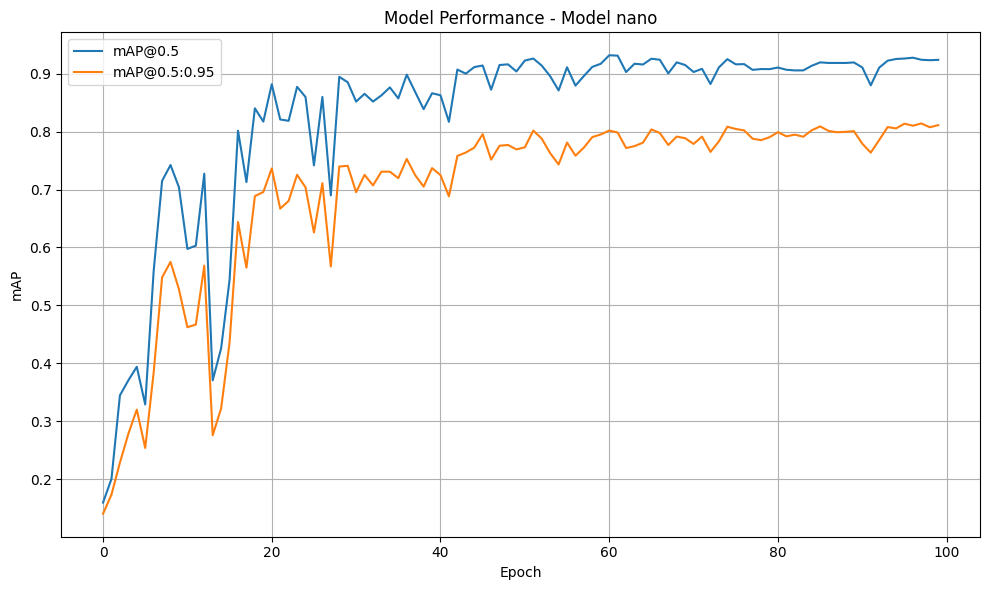

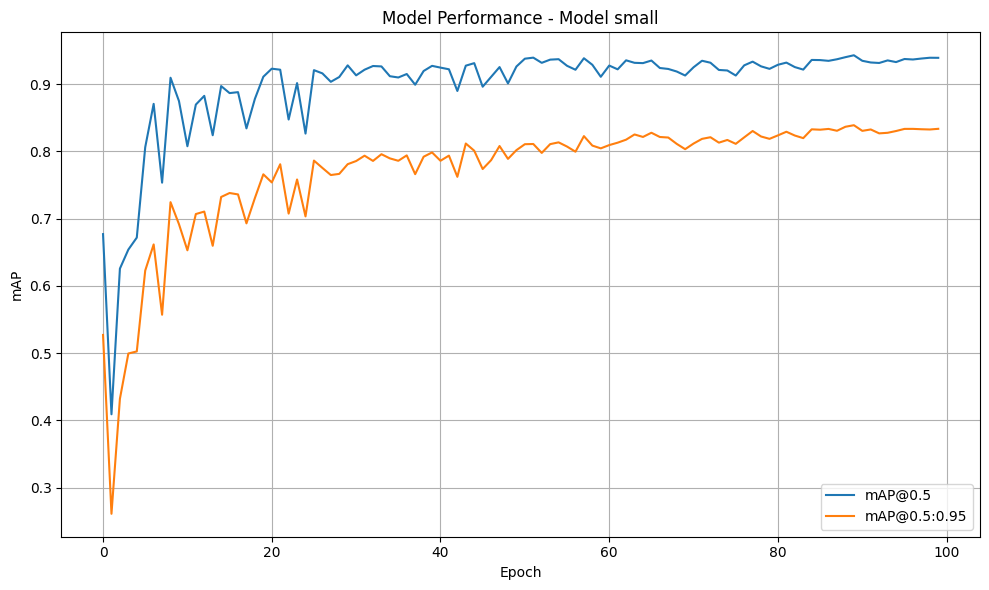

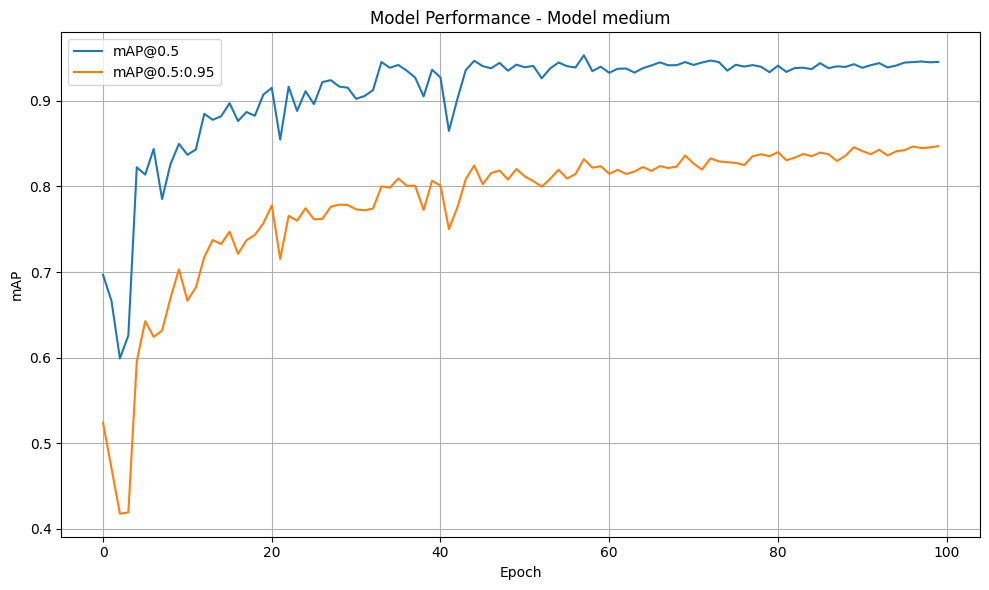

In [28]:
%matplotlib inline
for size in sizes:
    df = pd.read_csv(f"{project_base_maskLesi}/training/{size}/results.csv")

    plt.figure(figsize=(10, 6))

    # Plot mAP50 dan mAP50-95
    plt.plot(df.index, df["metrics/mAP50(B)"], label="mAP@0.5")
    plt.plot(df.index, df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95")

    # Tambahkan label dan judul
    plt.xlabel("Epoch")
    plt.ylabel("mAP")
    plt.title(f"Model Performance - Model {size}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Simpan plot
    graph_output_dir = f"{project_base_maskLesi}/graph"
    os.makedirs(graph_output_dir, exist_ok=True)
    plt.savefig(os.path.join(graph_output_dir, f"mAP_comparison_{size}.png"))
    plt.show()

In [29]:
if GoogleDrive:
    copy_to_google_drive("dataset/mask_lesi", "dataset/mask_lesi")
    copy_to_google_drive("results/mask_lesi", "results/mask_lesi")

## Training Mask Lesi dan Daun

In [30]:
# Variabel Global
models = ['yolo11n-seg.pt', 'yolo11s-seg.pt', 'yolo11m-seg.pt']
sizes = ['nano', 'small', 'medium']
epochs = 100
batch = -1 # atau -1 untuk limitasi gpu 60%
data_path_maskLesi_and_maskLeaf = "dataset/mask_lesi_and_leaf"
project_base_maskLesi_and_maskLeaf = "results/mask_lesi_and_leaf"

In [31]:
for model_name, size in zip(models, sizes):
    print(f"Training {size} model...")
    model = YOLO(model_name)

    start_time = time.time()
    training = model.train(
        data=f"{data_path_maskLesi_and_maskLeaf}/data.yaml", 
        epochs=epochs, 
        imgsz=640, 
        batch=batch, 
        project=f"{project_base_maskLesi_and_maskLeaf}/training", 
        name=f"{size}",
        exist_ok=True
    )

    measure_and_save_time(start_time, f"{project_base_maskLesi_and_maskLeaf}/training/summary/time/{size}-train-time.txt")
    csv_filename = f"{project_base_maskLesi_and_maskLeaf}/training/summary/{size}-training-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(training.to_csv())

    validation = model.val(
        data=f"{data_path_maskLesi_and_maskLeaf}/data.yaml", 
        imgsz=640,
        project=f"{project_base_maskLesi}/validation",
        name=f"{size}",
        exist_ok=True,
        split="test"
    )

    csv_filename = f"{project_base_maskLesi}/validation/summary/{size}-validation-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(validation.to_csv())

    print(f"Finished training and validating {size} model.")

Training nano model...
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/mask_lesi_and_leaf/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=nano, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, p

train: Scanning /workspace/dataset/mask_lesi_and_leaf/train/labels... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:01<00:00, 459.88it/s]


train: New cache created: /workspace/dataset/mask_lesi_and_leaf/train/labels.cache
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.64G total, 2.13G reserved, 0.11G allocated, 21.40G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     2843583       10.36         0.575         26.83           nan        (1, 3, 640, 640)                    list
     2843583       20.72         1.149         27.52           nan        (2, 3, 640, 640)                    list
     2843583       41.44         1.900         26.42           nan        (4, 3, 640, 640)                    list
     2843583       82.88         3.454         30.24           nan        (8, 3, 640, 640)                    list
     2843583       165.8         6.510         37.23           nan       (16, 3, 640, 640)                    list
     2843583       331.5        12.4

train: Scanning /workspace/dataset/mask_lesi_and_leaf/train/labels.cache... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.2±0.1 ms, read: 208.8±56.4 MB/s, size: 722.8 KB)


val: Scanning /workspace/dataset/mask_lesi_and_leaf/valid/labels... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 250.38it/s]

val: New cache created: /workspace/dataset/mask_lesi_and_leaf/valid/labels.cache


Plotting labels to results/mask_lesi_and_leaf/training/nano/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.000515625), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/mask_lesi_and_leaf/training/nano
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.03G     0.9641      2.425      3.612      1.141        408        640: 100%|██████████| 16/16 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         75        409     0.0077      0.571      0.159       0.14     0.0077      0.566       0.16      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.33G      0.757      1.106      2.769     0.9777        373        640: 100%|██████████| 16/16 [00:02<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]

                   all         75        409     0.0118      0.591        0.2      0.173     0.0115       0.59      0.199      0.171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.33G      0.803      1.054      1.956     0.9969        322        640: 100%|██████████| 16/16 [00:02<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         75        409    0.00709       0.58      0.344      0.228    0.00753       0.59      0.352      0.284



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.33G     0.7832      1.001       1.53     0.9859        420        640: 100%|██████████| 16/16 [00:02<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.66it/s]

                   all         75        409       0.96      0.119       0.37      0.278       0.96      0.119      0.374      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.33G     0.7421     0.9924      1.301     0.9697        368        640: 100%|██████████| 16/16 [00:02<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.57it/s]

                   all         75        409      0.858      0.216      0.394       0.32      0.844      0.213      0.393      0.335



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.33G       0.73     0.9706      1.226     0.9525        415        640: 100%|██████████| 16/16 [00:02<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all         75        409      0.611      0.334      0.329      0.254      0.618      0.325      0.317      0.223



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.33G     0.7164     0.9512      1.146     0.9601        293        640: 100%|██████████| 16/16 [00:02<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         75        409      0.732       0.38      0.559      0.384      0.716       0.38      0.535      0.349



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.33G      0.709     0.9468       1.11     0.9592        344        640: 100%|██████████| 16/16 [00:02<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]

                   all         75        409      0.803      0.437      0.715      0.548      0.795      0.428      0.674      0.466



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.33G     0.7037     0.9298      1.088     0.9489        405        640: 100%|██████████| 16/16 [00:02<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.78it/s]

                   all         75        409      0.524      0.625      0.742      0.575      0.495      0.608      0.699      0.489



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.33G     0.7025     0.9381      1.066     0.9545        355        640: 100%|██████████| 16/16 [00:02<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.08it/s]

                   all         75        409      0.658      0.534      0.704      0.528      0.646      0.527      0.662      0.472



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.33G     0.6831     0.8965       1.03     0.9491        361        640: 100%|██████████| 16/16 [00:02<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]

                   all         75        409      0.587      0.499      0.597      0.462       0.58      0.478      0.553      0.393



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.33G     0.6664      0.875      1.001     0.9404        296        640: 100%|██████████| 16/16 [00:02<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]

                   all         75        409      0.652      0.508      0.603      0.467       0.64      0.485       0.56      0.385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.33G     0.6596      0.861     0.9736      0.935        431        640: 100%|██████████| 16/16 [00:02<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.03it/s]

                   all         75        409      0.689      0.693      0.727      0.569      0.678      0.675      0.699      0.474



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.33G     0.6582     0.8465     0.9563     0.9369        299        640: 100%|██████████| 16/16 [00:02<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.00it/s]

                   all         75        409      0.355      0.498       0.37      0.276      0.355      0.484      0.344      0.201



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.33G     0.6515     0.8384     0.9132      0.936        389        640: 100%|██████████| 16/16 [00:02<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.86it/s]

                   all         75        409      0.365      0.482      0.426      0.322      0.363      0.464      0.402      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.33G     0.6354     0.8197     0.8846     0.9206        294        640: 100%|██████████| 16/16 [00:02<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.42it/s]

                   all         75        409      0.478      0.534      0.544      0.436      0.466      0.509      0.511      0.347



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.33G     0.6373     0.8004     0.8874     0.9322        310        640: 100%|██████████| 16/16 [00:02<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]

                   all         75        409      0.672      0.752      0.802      0.644      0.659       0.73      0.758      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.33G      0.636     0.8105     0.8572     0.9236        362        640: 100%|██████████| 16/16 [00:02<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]

                   all         75        409      0.627      0.617      0.713      0.565      0.623      0.599      0.677      0.457



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.33G     0.6425      0.812     0.8272     0.9308        340        640: 100%|██████████| 16/16 [00:02<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.74it/s]

                   all         75        409      0.811      0.743       0.84      0.689      0.814      0.726      0.813      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.33G     0.5965     0.7769      0.806     0.9139        322        640: 100%|██████████| 16/16 [00:02<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]


                   all         75        409        0.8      0.679      0.817      0.696      0.776       0.66      0.786      0.594

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.33G     0.6081     0.7972     0.7992     0.9169        301        640: 100%|██████████| 16/16 [00:02<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         75        409      0.828      0.794      0.882      0.736      0.807      0.776      0.848      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.33G     0.5918     0.7414     0.8016      0.918        256        640: 100%|██████████| 16/16 [00:02<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]

                   all         75        409      0.766      0.691      0.821      0.667      0.746      0.669      0.791      0.583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.33G     0.6147      0.781     0.8109      0.911        307        640: 100%|██████████| 16/16 [00:02<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.43it/s]

                   all         75        409      0.671      0.756      0.819       0.68      0.743      0.643      0.787      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.33G     0.6112     0.7709     0.8076     0.9144        358        640: 100%|██████████| 16/16 [00:02<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         75        409      0.757        0.8      0.877      0.725      0.742      0.783      0.843      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.33G     0.6049     0.7619     0.7681     0.9095        411        640: 100%|██████████| 16/16 [00:02<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.43it/s]

                   all         75        409      0.772       0.74       0.86      0.704      0.805      0.674      0.813      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.33G     0.5921     0.7227     0.7419     0.9124        267        640: 100%|██████████| 16/16 [00:02<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         75        409      0.605       0.67      0.742      0.626      0.595       0.65      0.719      0.546



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.33G     0.5964     0.7469     0.7078     0.9081        391        640: 100%|██████████| 16/16 [00:02<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.95it/s]

                   all         75        409      0.805      0.742       0.86      0.711      0.766      0.717      0.816      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.33G     0.5813     0.7458     0.7249     0.9048        282        640: 100%|██████████| 16/16 [00:02<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         75        409      0.564      0.705       0.69      0.567      0.547      0.678      0.655      0.493



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.33G     0.5849     0.7758     0.7273     0.9168        358        640: 100%|██████████| 16/16 [00:02<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         75        409      0.704      0.822      0.895       0.74      0.708      0.757      0.849      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.33G     0.5666     0.7087     0.7046     0.9027        418        640: 100%|██████████| 16/16 [00:03<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         75        409      0.797      0.794      0.885      0.741      0.783      0.777      0.853      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.33G     0.5703     0.7167     0.6792     0.8974        421        640: 100%|██████████| 16/16 [00:03<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]

                   all         75        409      0.764      0.741      0.852      0.695      0.741      0.714      0.811      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.33G     0.5638      0.685     0.6672     0.8999        381        640: 100%|██████████| 16/16 [00:03<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]

                   all         75        409      0.824      0.726      0.865      0.725      0.803      0.676      0.802      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.33G     0.5622     0.6869      0.689     0.9029        408        640: 100%|██████████| 16/16 [00:02<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]

                   all         75        409      0.768      0.755      0.852      0.707      0.745      0.737      0.821      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.33G     0.5597     0.6863     0.6622     0.8992        424        640: 100%|██████████| 16/16 [00:02<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         75        409      0.795      0.735      0.863      0.731      0.779      0.717      0.832      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.33G     0.5506     0.6901     0.6765     0.9016        286        640: 100%|██████████| 16/16 [00:02<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]

                   all         75        409      0.813      0.754      0.876      0.731      0.793      0.728      0.825      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.33G     0.5616     0.6911     0.6501     0.8937        390        640: 100%|██████████| 16/16 [00:02<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.47it/s]

                   all         75        409      0.724      0.779      0.857       0.72      0.705      0.721      0.809      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.33G     0.5506     0.6753     0.6305     0.8897        404        640: 100%|██████████| 16/16 [00:02<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         75        409      0.891       0.76      0.898      0.753      0.868      0.737      0.855       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.33G     0.5349     0.6562     0.6236     0.8926        351        640: 100%|██████████| 16/16 [00:02<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         75        409      0.839      0.752      0.869      0.725      0.822      0.731      0.822       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.33G     0.5425     0.6954     0.6317      0.899        320        640: 100%|██████████| 16/16 [00:02<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         75        409      0.762      0.791      0.839      0.705      0.733      0.762      0.795       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.33G     0.5358     0.6884     0.6277     0.8849        368        640: 100%|██████████| 16/16 [00:02<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         75        409      0.808      0.755      0.866      0.737       0.78      0.723      0.827      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.33G     0.5193     0.6419     0.6085     0.8821        386        640: 100%|██████████| 16/16 [00:02<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]

                   all         75        409      0.759      0.803      0.863      0.725      0.714      0.767      0.819      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.33G     0.5242     0.6784     0.6093     0.8833        344        640: 100%|██████████| 16/16 [00:02<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.06it/s]

                   all         75        409      0.678      0.776      0.817      0.688      0.647      0.736      0.772      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.33G     0.5199     0.6676     0.6304     0.8927        290        640: 100%|██████████| 16/16 [00:02<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]

                   all         75        409      0.842      0.822      0.907      0.758      0.808      0.791      0.859      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.33G     0.5285     0.6921     0.6021     0.8869        327        640: 100%|██████████| 16/16 [00:02<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.04it/s]

                   all         75        409      0.834      0.804        0.9      0.764      0.821      0.788      0.868      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.33G     0.5168     0.6427     0.5811     0.8835        325        640: 100%|██████████| 16/16 [00:02<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]

                   all         75        409      0.808      0.859      0.911      0.772      0.784      0.829       0.87       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.33G     0.5311     0.6476     0.5984     0.8845        323        640: 100%|██████████| 16/16 [00:02<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]

                   all         75        409      0.844      0.832      0.914      0.796      0.823      0.812      0.886      0.679



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.33G     0.5297     0.6538     0.5875     0.8747        451        640: 100%|██████████| 16/16 [00:02<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.30it/s]

                   all         75        409      0.849      0.792      0.872      0.752      0.807      0.748       0.82      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.33G      0.512     0.6238     0.5624     0.8803        345        640: 100%|██████████| 16/16 [00:02<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]

                   all         75        409      0.861      0.839      0.915      0.776       0.83      0.816      0.873      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.33G     0.5195     0.6496     0.5802     0.8773        303        640: 100%|██████████| 16/16 [00:02<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         75        409      0.817      0.853      0.916      0.777      0.795       0.82      0.872      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.33G     0.5056     0.6294     0.5739     0.8802        394        640: 100%|██████████| 16/16 [00:02<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.19it/s]

                   all         75        409      0.836      0.818      0.904      0.769      0.817      0.791      0.851      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.33G     0.5242     0.6266     0.5749     0.8818        389        640: 100%|██████████| 16/16 [00:02<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]

                   all         75        409      0.844      0.829      0.923      0.773      0.855      0.758      0.868      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.33G     0.5027     0.6243     0.5463     0.8799        368        640: 100%|██████████| 16/16 [00:02<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]

                   all         75        409      0.905      0.843      0.926      0.802      0.892      0.805      0.879       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.33G     0.5051     0.6324     0.5455     0.8746        371        640: 100%|██████████| 16/16 [00:02<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

                   all         75        409      0.848      0.817      0.914      0.788      0.829      0.799      0.877      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.33G      0.491     0.6149     0.5312     0.8733        358        640: 100%|██████████| 16/16 [00:02<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]

                   all         75        409      0.794      0.824      0.896      0.763      0.859      0.753      0.869      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.33G     0.5037     0.6387     0.5409     0.8712        235        640: 100%|██████████| 16/16 [00:02<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

                   all         75        409       0.78      0.774      0.871      0.743      0.771      0.759      0.848      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.33G     0.5085     0.6095     0.5158     0.8753        358        640: 100%|██████████| 16/16 [00:02<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]

                   all         75        409      0.834      0.828      0.911      0.781      0.857      0.764      0.873      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.33G     0.4914      0.616     0.5241     0.8753        355        640: 100%|██████████| 16/16 [00:02<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         75        409      0.769      0.806      0.879      0.758      0.751      0.762       0.84      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.33G     0.4825     0.6092     0.5154     0.8674        303        640: 100%|██████████| 16/16 [00:02<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.21it/s]

                   all         75        409      0.835      0.821      0.896      0.772      0.817      0.803       0.87       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.33G     0.5059     0.6178     0.5203      0.876        418        640: 100%|██████████| 16/16 [00:02<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]

                   all         75        409      0.838      0.831      0.912      0.791      0.834      0.788      0.875      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.33G     0.4958     0.6105     0.5099     0.8737        394        640: 100%|██████████| 16/16 [00:02<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all         75        409      0.865      0.827      0.917      0.795       0.84      0.808      0.877       0.68



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.33G     0.4892     0.6212     0.4997     0.8717        387        640: 100%|██████████| 16/16 [00:02<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.57it/s]

                   all         75        409      0.856      0.845      0.932      0.802      0.856      0.815      0.896      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.33G     0.4935     0.6107     0.5035     0.8703        346        640: 100%|██████████| 16/16 [00:02<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]

                   all         75        409      0.872      0.842      0.931      0.798      0.856      0.803      0.881      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.33G     0.4855     0.5909     0.4923     0.8675        344        640: 100%|██████████| 16/16 [00:02<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]

                   all         75        409      0.861      0.775      0.903      0.772      0.829      0.745      0.859      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.33G     0.4788     0.5901     0.4758     0.8676        390        640: 100%|██████████| 16/16 [00:02<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]

                   all         75        409      0.857      0.843      0.917      0.775       0.85      0.817      0.889      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.33G     0.4806     0.5843     0.4891      0.863        395        640: 100%|██████████| 16/16 [00:02<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.19it/s]

                   all         75        409      0.867      0.848      0.916      0.781      0.871      0.809      0.886      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.33G     0.4663      0.579     0.4725     0.8641        353        640: 100%|██████████| 16/16 [00:02<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.26it/s]

                   all         75        409      0.859      0.837      0.926      0.804      0.838      0.805      0.885      0.674



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.33G     0.4672     0.5954     0.4775     0.8631        371        640: 100%|██████████| 16/16 [00:02<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         75        409      0.859      0.846      0.924      0.798      0.836      0.828       0.88      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.33G     0.4654     0.5935      0.478     0.8637        368        640: 100%|██████████| 16/16 [00:02<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.17it/s]

                   all         75        409      0.853       0.82        0.9      0.777      0.834      0.798      0.858      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.33G     0.4681     0.5704     0.4869     0.8631        465        640: 100%|██████████| 16/16 [00:02<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]

                   all         75        409      0.833      0.873       0.92      0.791      0.804      0.847      0.876      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.33G     0.4642     0.5638     0.4671     0.8652        433        640: 100%|██████████| 16/16 [00:02<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         75        409       0.88      0.839      0.915      0.789       0.85      0.813      0.868      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.33G     0.4708     0.5911      0.466     0.8613        334        640: 100%|██████████| 16/16 [00:02<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]

                   all         75        409      0.866      0.839      0.903      0.779      0.828      0.802      0.852      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.33G     0.4585     0.5665     0.4575     0.8623        425        640: 100%|██████████| 16/16 [00:02<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         75        409       0.84      0.836      0.908      0.791       0.82       0.81      0.871      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.33G     0.4529      0.578     0.4593     0.8601        501        640: 100%|██████████| 16/16 [00:02<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.68it/s]

                   all         75        409      0.811      0.841      0.882      0.765      0.806       0.81      0.845       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.33G     0.4468     0.5424     0.4411     0.8599        331        640: 100%|██████████| 16/16 [00:02<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all         75        409      0.833      0.826      0.911      0.783      0.825      0.817      0.886      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.33G     0.4497       0.55     0.4576     0.8574        323        640: 100%|██████████| 16/16 [00:02<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]

                   all         75        409      0.868      0.827      0.925      0.808       0.87      0.796      0.884      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.33G     0.4516     0.5764     0.4632     0.8565        357        640: 100%|██████████| 16/16 [00:02<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.17it/s]

                   all         75        409      0.875      0.819      0.916      0.805      0.861      0.806      0.876      0.679



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.33G     0.4527     0.5623     0.4507     0.8654        293        640: 100%|██████████| 16/16 [00:02<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.06it/s]

                   all         75        409      0.843      0.849      0.917      0.802      0.813       0.82      0.871      0.674



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.33G     0.4538     0.5563     0.4388     0.8637        333        640: 100%|██████████| 16/16 [00:02<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.14it/s]

                   all         75        409      0.863      0.829      0.907      0.788      0.873       0.77      0.863      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.33G     0.4511     0.5568     0.4341      0.861        301        640: 100%|██████████| 16/16 [00:02<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]

                   all         75        409      0.858      0.832      0.908      0.785      0.831      0.807      0.869      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.33G     0.4549       0.56     0.4442     0.8637        388        640: 100%|██████████| 16/16 [00:02<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]

                   all         75        409      0.871      0.837      0.908       0.79      0.842      0.811      0.869      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.33G     0.4433     0.5588     0.4309      0.864        405        640: 100%|██████████| 16/16 [00:02<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         75        409      0.912      0.843      0.911      0.799      0.885      0.812      0.868       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.33G     0.4343     0.5327     0.4108     0.8569        354        640: 100%|██████████| 16/16 [00:02<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

                   all         75        409      0.894      0.827      0.907      0.792      0.864      0.797       0.86      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.33G     0.4298     0.5416      0.413     0.8559        405        640: 100%|██████████| 16/16 [00:02<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]

                   all         75        409       0.86      0.844      0.906      0.795      0.836      0.816      0.863      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.33G     0.4377     0.5497     0.4179     0.8509        362        640: 100%|██████████| 16/16 [00:02<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]

                   all         75        409      0.848      0.837      0.906      0.791      0.819       0.81      0.862      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.33G     0.4229     0.5274      0.413     0.8544        319        640: 100%|██████████| 16/16 [00:02<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.79it/s]

                   all         75        409      0.872       0.84      0.914      0.802      0.848      0.812      0.876      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.33G     0.4276      0.536     0.4262      0.853        385        640: 100%|██████████| 16/16 [00:02<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         75        409      0.913      0.826       0.92      0.809      0.885      0.802       0.88      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.33G     0.4342     0.5443      0.409     0.8531        359        640: 100%|██████████| 16/16 [00:02<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]

                   all         75        409      0.872       0.85      0.919      0.801      0.855      0.817      0.879      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.33G     0.4258     0.5177     0.4025     0.8476        466        640: 100%|██████████| 16/16 [00:02<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         75        409      0.887      0.857      0.919      0.799      0.851      0.822      0.867      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.33G     0.4287     0.5227     0.4025     0.8588        426        640: 100%|██████████| 16/16 [00:02<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]

                   all         75        409      0.885      0.854      0.919        0.8      0.872      0.816      0.878      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.33G     0.4231     0.5295      0.389     0.8505        378        640: 100%|██████████| 16/16 [00:02<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]

                   all         75        409       0.87      0.869      0.919      0.801      0.844      0.844      0.885      0.687


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.33G     0.4763     0.5849     0.5132     0.8363        182        640: 100%|██████████| 16/16 [00:04<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         75        409        0.9      0.831      0.911      0.779      0.869      0.805      0.862      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.33G     0.4618     0.5454      0.392     0.8233        168        640: 100%|██████████| 16/16 [00:02<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         75        409      0.864      0.817       0.88      0.764      0.857      0.788      0.844      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.33G     0.4465     0.5194     0.3919     0.8263        187        640: 100%|██████████| 16/16 [00:02<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]

                   all         75        409      0.917      0.813      0.911      0.785      0.889      0.796      0.871      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.33G      0.443     0.5435     0.3722     0.8197        172        640: 100%|██████████| 16/16 [00:02<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         75        409      0.882      0.853      0.922      0.808      0.854      0.837      0.882      0.683



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.33G     0.4389     0.5423     0.3641     0.8188        174        640: 100%|██████████| 16/16 [00:03<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]

                   all         75        409      0.875       0.86      0.925      0.806      0.855      0.828      0.883      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.33G     0.4298     0.5189     0.3525     0.8219        177        640: 100%|██████████| 16/16 [00:02<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         75        409      0.873      0.858      0.926      0.814      0.869      0.821      0.885      0.684



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.33G      0.425     0.5231     0.3521     0.8169        210        640: 100%|██████████| 16/16 [00:02<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         75        409      0.886       0.85      0.928       0.81      0.863      0.824      0.889      0.683



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.33G     0.4245     0.5249     0.3491     0.8178        140        640: 100%|██████████| 16/16 [00:02<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         75        409      0.897      0.839      0.924      0.814      0.879      0.817      0.886      0.686



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.33G      0.418     0.5093     0.3422     0.8148        232        640: 100%|██████████| 16/16 [00:02<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]

                   all         75        409      0.895      0.833      0.923      0.808      0.874      0.811      0.881      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.33G     0.4213      0.524     0.3433     0.8145        182        640: 100%|██████████| 16/16 [00:02<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.07it/s]

                   all         75        409       0.86      0.858      0.924      0.811      0.864      0.815      0.883      0.686



100 epochs completed in 0.084 hours.
Optimizer stripped from results/mask_lesi_and_leaf/training/nano/weights/last.pt, 6.0MB
Optimizer stripped from results/mask_lesi_and_leaf/training/nano/weights/best.pt, 6.0MB

Validating results/mask_lesi_and_leaf/training/nano/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLO11n-seg summary (fused): 113 layers, 2,835,543 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:00<00:00,  2.76it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]


                   all         75        409      0.901      0.839      0.924      0.813      0.878      0.818      0.886      0.686
    frog-eye-leaf-spot         25         34      0.997      0.853      0.917      0.893      0.998      0.853      0.917      0.867
frog-eye-leaf-spot_lession         25        152      0.929      0.796      0.933      0.755      0.869      0.743      0.856      0.431
               healthy         25         70      0.898        0.8      0.896      0.854      0.902        0.8      0.904       0.83
                  rust         25         28        0.8      0.964       0.98      0.932      0.801      0.964       0.98      0.948
          rust_lession         25        125      0.882      0.784      0.896      0.633      0.821      0.728      0.771      0.355
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to results/mask_lesi_and_leaf/training/nano
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUD

val: Scanning /workspace/dataset/mask_lesi_and_leaf/test/labels... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<00:00, 443.26it/s]


val: New cache created: /workspace/dataset/mask_lesi_and_leaf/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:01<00:05,  1.42s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:02<00:03,  1.15s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.05it/s]


                   all        150        753       0.88       0.86      0.913      0.809      0.873      0.835      0.885      0.692
    frog-eye-leaf-spot         50         53      0.915      0.962      0.967      0.957      0.918      0.962      0.967      0.965
frog-eye-leaf-spot_lession         50        241      0.807      0.772      0.848      0.701      0.812      0.739      0.805       0.37
               healthy         50        145      0.903      0.769      0.896      0.836      0.917      0.758      0.897      0.817
                  rust         49         50      0.851       0.96      0.928      0.873      0.855       0.96      0.928      0.864
          rust_lession         50        264      0.925      0.837      0.926      0.677      0.862      0.758      0.829      0.443
Speed: 1.5ms preprocess, 1.3ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to results/mask_lesi/validation/nano
Finished training and validating nano model.
Training small model

train: Scanning /workspace/dataset/mask_lesi_and_leaf/train/labels.cache... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.64G total, 1.24G reserved, 0.19G allocated, 22.21G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    10084223        35.6         1.057         28.68           nan        (1, 3, 640, 640)                    list
    10084223        71.2         2.078         32.46           nan        (2, 3, 640, 640)                    list
    10084223       142.4         3.425         30.41           nan        (4, 3, 640, 640)                    list
    10084223       284.8         6.315         40.92           nan        (8, 3, 640, 640)                    list
    10084223       569.6        11.748         53.23           nan       (16, 3, 640, 640)                    list
    10084223        1139        22.351         64.24           nan       (32, 3, 640, 640)                    list
CUDA out of memory. Tried to allocate 100.00 MiB. GPU 0 has a total capacity of 23.64 GiB of which 46.81 MiB is free. Process 468591 has 23.57 GiB memory in use. Of the allocated memory 22.86 GiB

train: Scanning /workspace/dataset/mask_lesi_and_leaf/train/labels.cache... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.3±0.2 ms, read: 392.4±150.1 MB/s, size: 722.8 KB)


val: Scanning /workspace/dataset/mask_lesi_and_leaf/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to results/mask_lesi_and_leaf/training/small/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005625000000000001), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/mask_lesi_and_leaf/training/small
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100       5.7G     0.8141      1.601      2.416      1.063         29        640: 100%|██████████| 30/30 [00:04<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.64it/s]

                   all         75        409      0.518      0.679      0.677      0.527      0.591      0.576      0.626       0.45



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.39G     0.7117       1.02      1.194     0.9761         38        640: 100%|██████████| 30/30 [00:03<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.67it/s]

                   all         75        409      0.424      0.474      0.409      0.261      0.368       0.46      0.348      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.39G     0.7634       1.05      1.061     0.9914         26        640: 100%|██████████| 30/30 [00:04<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.06it/s]

                   all         75        409      0.521      0.645      0.626      0.432      0.517      0.611      0.578      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.39G     0.7633      1.036      1.016     0.9832         33        640: 100%|██████████| 30/30 [00:03<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]

                   all         75        409      0.584      0.728      0.654      0.499      0.503      0.653      0.523       0.26



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.39G     0.7209      0.988     0.9749     0.9714         42        640: 100%|██████████| 30/30 [00:03<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.05it/s]

                   all         75        409      0.689      0.606      0.672      0.503      0.664       0.59      0.632      0.395



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.39G     0.7313     0.9819     0.9722     0.9757         20        640: 100%|██████████| 30/30 [00:04<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]

                   all         75        409      0.642      0.729      0.806      0.623      0.632       0.72      0.782       0.52



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.39G     0.7318     0.9695     0.9387     0.9828         57        640: 100%|██████████| 30/30 [00:03<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]


                   all         75        409      0.802      0.793      0.871      0.662      0.769      0.759      0.817      0.535

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.39G     0.6932     0.9269     0.8885     0.9652         25        640: 100%|██████████| 30/30 [00:03<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.32it/s]

                   all         75        409      0.696      0.755      0.754      0.557      0.701      0.721      0.722      0.456



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.39G     0.6739     0.9018     0.8713     0.9396         69        640: 100%|██████████| 30/30 [00:03<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.33it/s]

                   all         75        409      0.809      0.839       0.91      0.725      0.786      0.811      0.869      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.39G     0.6535     0.8662     0.8367     0.9445         35        640: 100%|██████████| 30/30 [00:03<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.65it/s]


                   all         75        409      0.716      0.785      0.875      0.692      0.684      0.752      0.823      0.578

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.39G     0.6802     0.8871     0.8074     0.9604         46        640: 100%|██████████| 30/30 [00:03<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.03it/s]

                   all         75        409      0.769      0.701      0.808      0.653      0.748      0.677      0.755      0.542



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.39G     0.6407     0.8196     0.7971     0.9457         20        640: 100%|██████████| 30/30 [00:03<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.26it/s]

                   all         75        409      0.841      0.756       0.87      0.707      0.816      0.727      0.817      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.39G     0.6556     0.8593     0.7647     0.9393         34        640: 100%|██████████| 30/30 [00:03<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.97it/s]

                   all         75        409      0.836      0.758      0.883      0.711      0.781      0.726      0.816      0.583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.39G     0.6502      0.858     0.7663     0.9433         62        640: 100%|██████████| 30/30 [00:03<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.81it/s]

                   all         75        409      0.762      0.733      0.824       0.66      0.747      0.693      0.778      0.547



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.39G     0.6358     0.8473     0.7825     0.9423         12        640: 100%|██████████| 30/30 [00:04<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]

                   all         75        409      0.859       0.76      0.897      0.732       0.86      0.709      0.846      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.39G      0.622     0.8047     0.7209     0.9285         18        640: 100%|██████████| 30/30 [00:03<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.23it/s]

                   all         75        409      0.786      0.813      0.887      0.738      0.848       0.73      0.844      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.39G     0.5982     0.7658      0.751     0.9137         52        640: 100%|██████████| 30/30 [00:03<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.79it/s]

                   all         75        409      0.801      0.823      0.888      0.736      0.833      0.743      0.845      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.39G     0.5988      0.765     0.7435     0.9241         40        640: 100%|██████████| 30/30 [00:03<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.73it/s]

                   all         75        409      0.782      0.718      0.834      0.693      0.761      0.684      0.786      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.39G     0.5871     0.7748      0.722     0.9232         23        640: 100%|██████████| 30/30 [00:03<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.72it/s]

                   all         75        409      0.818      0.775      0.878      0.731      0.793      0.742       0.83      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.39G     0.5798     0.7478     0.7129      0.917         42        640: 100%|██████████| 30/30 [00:03<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.98it/s]

                   all         75        409      0.856      0.815      0.911      0.766      0.835      0.798      0.861      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.39G     0.5968     0.7633     0.6966     0.9252         48        640: 100%|██████████| 30/30 [00:03<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.03it/s]

                   all         75        409       0.93       0.81      0.923      0.754      0.898      0.774      0.872      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.39G     0.5872     0.7361     0.6733     0.9217         49        640: 100%|██████████| 30/30 [00:03<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.67it/s]

                   all         75        409      0.836      0.865      0.922      0.781        0.8      0.823      0.869      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.39G     0.5749     0.7331     0.6696     0.9131         33        640: 100%|██████████| 30/30 [00:03<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.88it/s]

                   all         75        409      0.838      0.734      0.847      0.708      0.814      0.693      0.789      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.39G     0.5621     0.7276     0.6982     0.9071         14        640: 100%|██████████| 30/30 [00:03<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.15it/s]

                   all         75        409      0.854      0.776      0.902      0.758       0.82       0.74      0.851      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.39G     0.5679     0.7523     0.6467     0.9095         36        640: 100%|██████████| 30/30 [00:03<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.51it/s]

                   all         75        409      0.756      0.684      0.827      0.703      0.738      0.667      0.786      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.39G     0.5523     0.7106      0.644     0.9013         20        640: 100%|██████████| 30/30 [00:03<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.99it/s]

                   all         75        409      0.811      0.846      0.921      0.786      0.794      0.814       0.88      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.39G     0.5537     0.7232     0.6424     0.9101         36        640: 100%|██████████| 30/30 [00:03<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.10it/s]

                   all         75        409      0.893      0.797      0.916      0.776      0.871       0.77      0.876      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.39G     0.5505     0.7087     0.6383     0.9129         30        640: 100%|██████████| 30/30 [00:03<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.13it/s]

                   all         75        409       0.79      0.809      0.904      0.765      0.755      0.787      0.863      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.39G      0.547     0.6932     0.6201     0.9044         23        640: 100%|██████████| 30/30 [00:03<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.89it/s]

                   all         75        409      0.847      0.842      0.911      0.767      0.824      0.818      0.875      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.39G     0.5451      0.675     0.6193     0.9028         26        640: 100%|██████████| 30/30 [00:03<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.25it/s]

                   all         75        409      0.842      0.858      0.928      0.781      0.874      0.796      0.889      0.679



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.39G     0.5425     0.6865     0.6214     0.8996         32        640: 100%|██████████| 30/30 [00:03<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.86it/s]

                   all         75        409      0.821      0.827      0.913      0.786      0.812      0.783      0.863      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.39G     0.5242     0.6493     0.5965     0.8919         31        640: 100%|██████████| 30/30 [00:03<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.00it/s]

                   all         75        409      0.878      0.827      0.922      0.794      0.852      0.804      0.878      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.39G     0.5419     0.6418     0.5623      0.886         65        640: 100%|██████████| 30/30 [00:03<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.16it/s]

                   all         75        409      0.872      0.841      0.927      0.786      0.845      0.812      0.879      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.39G     0.5339     0.6542     0.5986     0.8916         63        640: 100%|██████████| 30/30 [00:03<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.95it/s]

                   all         75        409      0.887      0.831      0.926      0.796      0.863      0.801      0.875      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.39G     0.5443     0.6312     0.5914     0.8915         86        640: 100%|██████████| 30/30 [00:04<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.50it/s]

                   all         75        409      0.892      0.771      0.912       0.79      0.865      0.748       0.87      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.39G     0.5308     0.6428     0.5853      0.894         38        640: 100%|██████████| 30/30 [00:03<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.09it/s]

                   all         75        409      0.866       0.81       0.91      0.786      0.848      0.794      0.876      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.39G     0.5241     0.6509     0.5556     0.8886         50        640: 100%|██████████| 30/30 [00:03<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.04it/s]

                   all         75        409      0.894      0.818      0.915      0.794       0.86      0.787      0.868      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.39G     0.5071     0.6122     0.5645     0.8824         21        640: 100%|██████████| 30/30 [00:03<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.10it/s]

                   all         75        409       0.77      0.841      0.899      0.766      0.766      0.795      0.854      0.644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.39G     0.5158     0.6427     0.5649     0.8882         47        640: 100%|██████████| 30/30 [00:04<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.47it/s]

                   all         75        409       0.84      0.867       0.92      0.792      0.828      0.829      0.889      0.686



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.39G     0.5049     0.6138      0.536     0.8773         49        640: 100%|██████████| 30/30 [00:03<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.04it/s]

                   all         75        409      0.932      0.788      0.927      0.799       0.91      0.758      0.877      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.39G     0.5023     0.5956     0.5408     0.8825         39        640: 100%|██████████| 30/30 [00:03<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.01it/s]

                   all         75        409      0.819      0.844      0.925      0.786      0.783      0.805      0.871      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.39G     0.5015     0.5982     0.5181     0.8801         41        640: 100%|██████████| 30/30 [00:03<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.91it/s]

                   all         75        409      0.902      0.831      0.922      0.794      0.897      0.786      0.876      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.39G     0.4983     0.6353     0.5576     0.8792         26        640: 100%|██████████| 30/30 [00:03<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.11it/s]

                   all         75        409      0.864      0.783       0.89      0.762      0.901      0.721      0.849      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.39G     0.4871     0.6084     0.5381     0.8744         14        640: 100%|██████████| 30/30 [00:03<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.25it/s]

                   all         75        409      0.895      0.812      0.928      0.812      0.882      0.796      0.883      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.39G     0.4821     0.5835     0.5125     0.8777         35        640: 100%|██████████| 30/30 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]

                   all         75        409      0.849      0.858      0.931      0.801      0.861      0.789      0.881      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.39G      0.503     0.6159     0.5214     0.8805         39        640: 100%|██████████| 30/30 [00:03<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.11it/s]

                   all         75        409      0.891      0.799      0.896      0.774       0.86      0.766      0.843      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.39G      0.489      0.599     0.5317     0.8752         26        640: 100%|██████████| 30/30 [00:03<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.56it/s]

                   all         75        409      0.908      0.819      0.911      0.787      0.918      0.753      0.864      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.39G     0.4836     0.5788      0.509     0.8724         25        640: 100%|██████████| 30/30 [00:03<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.80it/s]

                   all         75        409      0.883       0.82      0.926      0.808       0.86        0.8      0.884      0.687



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.39G     0.4885     0.5935     0.4974     0.8748         48        640: 100%|██████████| 30/30 [00:03<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.02it/s]

                   all         75        409      0.858      0.839      0.901      0.789      0.825      0.803      0.858      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.39G     0.4818     0.5744     0.5092     0.8861         18        640: 100%|██████████| 30/30 [00:03<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.92it/s]


                   all         75        409      0.827      0.901      0.926      0.802      0.845      0.814      0.873      0.661

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.39G     0.4723     0.5938     0.5004     0.8748         67        640: 100%|██████████| 30/30 [00:03<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.98it/s]

                   all         75        409      0.861      0.892      0.938      0.811      0.842      0.853      0.894      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.39G     0.4819     0.5814     0.5028     0.8766         32        640: 100%|██████████| 30/30 [00:03<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.32it/s]

                   all         75        409      0.879      0.892       0.94      0.811      0.845      0.847      0.888      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.39G     0.4653     0.5631     0.4918     0.8744         19        640: 100%|██████████| 30/30 [00:03<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.50it/s]


                   all         75        409      0.873      0.864      0.932      0.798       0.87      0.817      0.896       0.68

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.39G     0.4806     0.5837     0.4736     0.8744         30        640: 100%|██████████| 30/30 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.13it/s]

                   all         75        409      0.909      0.857      0.937      0.811      0.882      0.822      0.886       0.68



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.39G     0.4585     0.5548     0.4648     0.8719         25        640: 100%|██████████| 30/30 [00:04<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.60it/s]

                   all         75        409      0.884      0.862      0.937      0.814      0.868      0.815       0.89      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.39G      0.471     0.5721     0.4549     0.8792         25        640: 100%|██████████| 30/30 [00:04<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.16it/s]

                   all         75        409      0.907      0.832      0.927      0.807      0.878      0.799      0.885      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.39G     0.4616     0.5415     0.4674     0.8655         36        640: 100%|██████████| 30/30 [00:03<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.00it/s]

                   all         75        409      0.877      0.848      0.922        0.8      0.855      0.834      0.887      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.39G     0.4492     0.5382     0.4486     0.8671         20        640: 100%|██████████| 30/30 [00:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.87it/s]

                   all         75        409      0.904      0.866      0.939      0.823      0.891      0.838      0.909      0.706



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.39G     0.4507     0.5285     0.4549     0.8656         39        640: 100%|██████████| 30/30 [00:03<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.71it/s]

                   all         75        409      0.897      0.849      0.929      0.809       0.86      0.815      0.875      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.39G     0.4443     0.5181     0.4452     0.8646         44        640: 100%|██████████| 30/30 [00:03<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.93it/s]

                   all         75        409      0.884      0.834      0.911      0.805      0.866      0.806      0.871      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.39G     0.4432     0.5355     0.4501     0.8686         37        640: 100%|██████████| 30/30 [00:03<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.89it/s]

                   all         75        409      0.855      0.873      0.928      0.809      0.875      0.819      0.887      0.689



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.39G     0.4411     0.5414     0.4424     0.8636         24        640: 100%|██████████| 30/30 [00:03<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.99it/s]

                   all         75        409      0.861      0.855      0.922      0.813      0.875        0.8      0.878      0.682



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.39G      0.441     0.5203     0.4281     0.8618         31        640: 100%|██████████| 30/30 [00:03<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]

                   all         75        409      0.871      0.873      0.936      0.818      0.893      0.806      0.895      0.693



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.39G     0.4314      0.531     0.4456     0.8659         31        640: 100%|██████████| 30/30 [00:04<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.96it/s]

                   all         75        409      0.869      0.858      0.932      0.825       0.87      0.815      0.894      0.696



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.39G     0.4354     0.5093     0.4348     0.8655         24        640: 100%|██████████| 30/30 [00:03<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.21it/s]

                   all         75        409      0.862      0.875      0.931      0.822      0.857      0.821      0.885      0.686



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.39G     0.4309     0.5201     0.4295     0.8596         25        640: 100%|██████████| 30/30 [00:03<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.17it/s]

                   all         75        409      0.864       0.89      0.935      0.828      0.865      0.837      0.894      0.692



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.39G     0.4377      0.528     0.4257     0.8597         32        640: 100%|██████████| 30/30 [00:03<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.64it/s]

                   all         75        409      0.874      0.859      0.924      0.822      0.852      0.826      0.886      0.693



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.39G     0.4319     0.5032     0.4039     0.8586         52        640: 100%|██████████| 30/30 [00:03<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.11it/s]

                   all         75        409      0.918      0.828      0.923      0.821      0.903      0.785      0.875      0.683



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.39G     0.4312     0.5057     0.4251     0.8588         25        640: 100%|██████████| 30/30 [00:03<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.25it/s]

                   all         75        409      0.852       0.84      0.919      0.811      0.887      0.767       0.88      0.682



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.39G     0.4296     0.5162     0.4075     0.8537         24        640: 100%|██████████| 30/30 [00:03<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.10it/s]

                   all         75        409        0.9      0.803      0.913      0.803       0.86      0.768      0.854      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.39G     0.4316     0.5081     0.4074     0.8574         30        640: 100%|██████████| 30/30 [00:03<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.39it/s]

                   all         75        409      0.859      0.837      0.925      0.812       0.85      0.793      0.877      0.684



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.39G     0.4211     0.5231     0.3862     0.8558         24        640: 100%|██████████| 30/30 [00:03<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.92it/s]

                   all         75        409      0.865      0.887      0.935      0.819      0.911      0.816      0.903      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.39G     0.4261     0.5048     0.4088     0.8589         19        640: 100%|██████████| 30/30 [00:03<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.30it/s]

                   all         75        409      0.891      0.864      0.932      0.821      0.878      0.821       0.89      0.692



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.39G     0.4137     0.4795     0.4154     0.8546         16        640: 100%|██████████| 30/30 [00:03<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.24it/s]

                   all         75        409      0.835       0.86      0.921      0.813      0.789      0.825      0.875      0.682



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.39G     0.4178     0.4984     0.3916      0.853         21        640: 100%|██████████| 30/30 [00:03<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.20it/s]

                   all         75        409      0.912      0.858       0.92      0.817      0.881      0.829      0.883      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.39G     0.4099     0.4905     0.3796     0.8509         21        640: 100%|██████████| 30/30 [00:03<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.90it/s]

                   all         75        409      0.869      0.841      0.913      0.811      0.887      0.771      0.871      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.39G     0.4183     0.4921     0.3781     0.8495         48        640: 100%|██████████| 30/30 [00:03<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.25it/s]

                   all         75        409      0.917      0.828      0.928      0.821      0.899      0.796      0.889      0.699



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.39G     0.4137     0.4942     0.3787     0.8511         59        640: 100%|██████████| 30/30 [00:03<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.03it/s]

                   all         75        409      0.865      0.854      0.934       0.83      0.876      0.783      0.883      0.696



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.39G     0.4102     0.4966     0.3769     0.8523         56        640: 100%|██████████| 30/30 [00:03<00:00,  9.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.44it/s]

                   all         75        409       0.91      0.817      0.927      0.822      0.878      0.785      0.879      0.686



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.39G     0.4049     0.4896      0.372      0.847         43        640: 100%|██████████| 30/30 [00:03<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.43it/s]

                   all         75        409      0.846      0.836      0.923      0.819       0.86      0.774      0.879      0.688



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.39G     0.3962     0.4648     0.3789     0.8451         55        640: 100%|██████████| 30/30 [00:03<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.98it/s]

                   all         75        409      0.877      0.807      0.929      0.824      0.839      0.786      0.882      0.695



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.39G     0.4079     0.4976      0.366     0.8511         31        640: 100%|██████████| 30/30 [00:03<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.94it/s]

                   all         75        409      0.834      0.864      0.932      0.829      0.876      0.783      0.893      0.696



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.39G      0.393     0.4887      0.358     0.8545         34        640: 100%|██████████| 30/30 [00:03<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.41it/s]

                   all         75        409      0.899      0.845      0.925      0.824      0.877      0.813      0.887      0.691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.39G     0.3904     0.4768     0.3645     0.8499         47        640: 100%|██████████| 30/30 [00:03<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.67it/s]

                   all         75        409      0.901      0.837      0.922       0.82      0.884      0.806      0.888      0.691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.39G     0.4005     0.4762      0.365     0.8574         23        640: 100%|██████████| 30/30 [00:03<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.17it/s]

                   all         75        409      0.899      0.848      0.936      0.833      0.876      0.827      0.898      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.39G     0.3967      0.469     0.3472     0.8517         32        640: 100%|██████████| 30/30 [00:03<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


                   all         75        409      0.887      0.873      0.936      0.832      0.915      0.786      0.891      0.704

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.39G     0.3852     0.4811     0.3751     0.8477         51        640: 100%|██████████| 30/30 [00:03<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.72it/s]


                   all         75        409      0.886      0.869      0.935      0.834      0.915      0.792       0.89      0.702

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.39G     0.3941     0.4731     0.3755      0.847         38        640: 100%|██████████| 30/30 [00:03<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.60it/s]

                   all         75        409      0.911      0.854      0.937      0.831       0.87      0.815      0.883      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.39G     0.3799     0.4558      0.349     0.8429         53        640: 100%|██████████| 30/30 [00:03<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.07it/s]

                   all         75        409      0.913      0.834       0.94      0.837      0.892      0.807      0.898       0.71



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.39G     0.3882     0.4742     0.3439     0.8418         86        640: 100%|██████████| 30/30 [00:03<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.00it/s]

                   all         75        409      0.908      0.861      0.943      0.839      0.887      0.821      0.896      0.704


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.39G     0.4131     0.5155     0.3516     0.8234         14        640: 100%|██████████| 30/30 [00:04<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.54it/s]


                   all         75        409      0.919      0.847      0.935      0.831      0.893      0.814      0.888      0.702

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.39G     0.4025     0.4763     0.3053     0.8216         17        640: 100%|██████████| 30/30 [00:03<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.49it/s]

                   all         75        409      0.902      0.861      0.932      0.833      0.898      0.821      0.897      0.707



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.39G     0.3903     0.4765     0.3031     0.8077         14        640: 100%|██████████| 30/30 [00:03<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.98it/s]

                   all         75        409      0.919      0.813      0.932      0.827      0.892      0.792       0.89      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.39G     0.4001     0.4798     0.3028     0.8133         14        640: 100%|██████████| 30/30 [00:03<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.20it/s]

                   all         75        409      0.861      0.855      0.935      0.828      0.878      0.784      0.887      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.39G     0.3911     0.4637     0.2908     0.8054         17        640: 100%|██████████| 30/30 [00:03<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.76it/s]

                   all         75        409      0.872      0.856      0.933       0.83      0.871      0.791      0.885      0.697



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.39G     0.3804     0.4442     0.2807     0.8073         17        640: 100%|██████████| 30/30 [00:03<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.40it/s]

                   all         75        409      0.893      0.846      0.938      0.834      0.876      0.812      0.899      0.704



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.39G     0.3685      0.439     0.2856      0.805         16        640: 100%|██████████| 30/30 [00:03<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.03it/s]

                   all         75        409      0.848      0.884      0.937      0.834      0.899       0.79      0.893      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.39G     0.3797     0.4464      0.275     0.8093         17        640: 100%|██████████| 30/30 [00:03<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.23it/s]

                   all         75        409      0.894       0.86      0.938      0.833      0.864      0.826      0.891      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.39G     0.3767     0.4842     0.2719     0.8051         16        640: 100%|██████████| 30/30 [00:03<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.17it/s]

                   all         75        409      0.894      0.858      0.939      0.833        0.9      0.798      0.895      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.39G     0.3696     0.4539     0.2691      0.811         15        640: 100%|██████████| 30/30 [00:03<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.04it/s]

                   all         75        409      0.873      0.874      0.939      0.834      0.904      0.798      0.894        0.7



100 epochs completed in 0.129 hours.
Optimizer stripped from results/mask_lesi_and_leaf/training/small/weights/last.pt, 20.5MB
Optimizer stripped from results/mask_lesi_and_leaf/training/small/weights/best.pt, 20.5MB

Validating results/mask_lesi_and_leaf/training/small/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLO11s-seg summary (fused): 113 layers, 10,068,751 parameters, 0 gradients, 35.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  67%|██████▋   | 2/3 [00:00<00:00,  4.87it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]


                   all         75        409      0.913      0.834       0.94      0.837      0.893      0.808      0.899       0.71
    frog-eye-leaf-spot         25         34          1      0.819      0.961      0.942          1      0.817      0.961      0.921
frog-eye-leaf-spot_lession         25        152       0.95      0.809      0.957      0.798      0.883      0.743      0.883      0.464
               healthy         25         70      0.933      0.786      0.905      0.866      0.953        0.8      0.914      0.854
                  rust         25         28      0.786          1      0.978      0.949      0.791          1      0.978      0.958
          rust_lession         25        125      0.895      0.754      0.901      0.633      0.837       0.68       0.76      0.354
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to results/mask_lesi_and_leaf/training/small
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CU

val: Scanning /workspace/dataset/mask_lesi_and_leaf/test/labels.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/9 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  11%|█         | 1/9 [00:00<00:07,  1.13it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  22%|██▏       | 2/9 [00:01<00:05,  1.25it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.77it/s]


                   all        150        753      0.883      0.865      0.926      0.831      0.873      0.836      0.889      0.707
    frog-eye-leaf-spot         50         53      0.915      0.962       0.98      0.972      0.923      0.962       0.98      0.975
frog-eye-leaf-spot_lession         50        241      0.822      0.788      0.874       0.74      0.803      0.734      0.818      0.391
               healthy         50        145      0.914      0.779      0.878       0.83      0.918      0.774      0.878      0.808
                  rust         49         50       0.86       0.94      0.953      0.925      0.866       0.94      0.953      0.909
          rust_lession         50        264      0.904      0.853      0.944      0.689      0.858      0.769      0.817       0.45
Speed: 1.5ms preprocess, 3.5ms inference, 0.0ms loss, 6.5ms postprocess per image
Results saved to results/mask_lesi/validation/small
Finished training and validating small model.
Training medium mo

train: Scanning /workspace/dataset/mask_lesi_and_leaf/train/labels.cache... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.64G total, 2.07G reserved, 0.51G allocated, 21.06G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    22363071       123.6         2.043         40.54           nan        (1, 3, 640, 640)                    list
    22363071       247.2         4.180         42.42           nan        (2, 3, 640, 640)                    list
    22363071       494.4         6.914         40.18           nan        (4, 3, 640, 640)                    list
    22363071       988.8        12.610         52.24           nan        (8, 3, 640, 640)                    list
    22363071        1978        23.314         72.75           nan       (16, 3, 640, 640)                    list
CUDA out of memory. Tried to allocate 100.00 MiB. GPU 0 has a total capacity of 23.64 GiB of which 54.81 MiB is free. Process 468591 has 23.56 GiB memory in use. Of the allocated memory 22.87 GiB is allocated by PyTorch, and 166.84 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory

train: Scanning /workspace/dataset/mask_lesi_and_leaf/train/labels.cache... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.1±0.0 ms, read: 417.3±101.7 MB/s, size: 722.8 KB)


val: Scanning /workspace/dataset/mask_lesi_and_leaf/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to results/mask_lesi_and_leaf/training/medium/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 115 weight(decay=0.0), 126 weight(decay=0.0005), 125 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/mask_lesi_and_leaf/training/medium
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.95G     0.7526      1.365      1.941       1.05         65        640: 100%|██████████| 66/66 [00:07<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.73it/s]

                   all         75        409      0.565      0.694      0.697      0.524      0.546      0.661      0.654      0.414



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.46G     0.7725      1.128      1.258       1.03         56        640: 100%|██████████| 66/66 [00:07<00:00,  9.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.38it/s]

                   all         75        409      0.636      0.662      0.666      0.471      0.609      0.642      0.627      0.384



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.46G     0.8354      1.227      1.157      1.049         62        640: 100%|██████████| 66/66 [00:08<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.89it/s]

                   all         75        409      0.528      0.533      0.599      0.418      0.496      0.507       0.55      0.319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.46G     0.8074      1.187      1.089      1.044         54        640: 100%|██████████| 66/66 [00:07<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.71it/s]

                   all         75        409      0.573       0.63      0.626      0.419      0.554      0.603      0.576       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.46G     0.8141      1.113      1.098      1.032         57        640: 100%|██████████| 66/66 [00:06<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.70it/s]

                   all         75        409      0.713      0.726      0.822      0.596      0.706      0.667      0.749      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.46G     0.7537     0.9643      1.022      1.006         79        640: 100%|██████████| 66/66 [00:06<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.62it/s]

                   all         75        409      0.746      0.758      0.814      0.643      0.714      0.722      0.753      0.522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.46G     0.7556      1.096      1.017      1.018         41        640: 100%|██████████| 66/66 [00:06<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.27it/s]

                   all         75        409      0.788      0.743      0.844      0.624       0.75      0.715      0.773      0.518



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.46G     0.7704      1.067     0.9899      1.007         77        640: 100%|██████████| 66/66 [00:08<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.38it/s]


                   all         75        409      0.691      0.706      0.785      0.632      0.663      0.683      0.738      0.539

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.46G     0.7366     0.9886      0.923     0.9975         52        640: 100%|██████████| 66/66 [00:07<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.02it/s]

                   all         75        409      0.803      0.742      0.826       0.67      0.776      0.708      0.784      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.46G     0.7228      1.003     0.9401          1         58        640: 100%|██████████| 66/66 [00:06<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.57it/s]

                   all         75        409      0.818       0.76       0.85      0.703      0.797      0.748      0.815      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.46G     0.7049     0.9095     0.8743     0.9798         84        640: 100%|██████████| 66/66 [00:06<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.83it/s]

                   all         75        409      0.776      0.787      0.837      0.667      0.763      0.761      0.796       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.46G     0.7001     0.9864     0.8717     0.9914         87        640: 100%|██████████| 66/66 [00:07<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.57it/s]

                   all         75        409       0.81      0.734      0.843      0.682      0.787      0.701      0.786      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.46G     0.6605     0.8924     0.8534     0.9653         35        640: 100%|██████████| 66/66 [00:06<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.55it/s]


                   all         75        409      0.859      0.753      0.885      0.718      0.806      0.713      0.807      0.602

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.46G       0.68     0.8949     0.8732      0.965         29        640: 100%|██████████| 66/66 [00:07<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.52it/s]

                   all         75        409      0.842      0.731      0.878      0.737       0.81      0.699      0.821       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.46G     0.6409      0.916     0.8259     0.9674         38        640: 100%|██████████| 66/66 [00:06<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.25it/s]

                   all         75        409      0.878      0.733      0.882      0.733      0.844      0.701      0.827      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.46G     0.6197     0.7991     0.8039     0.9494         53        640: 100%|██████████| 66/66 [00:06<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.50it/s]

                   all         75        409      0.813      0.846      0.897      0.747      0.776      0.795      0.832      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.46G     0.6365     0.8482     0.8105     0.9691         39        640: 100%|██████████| 66/66 [00:06<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.36it/s]

                   all         75        409      0.871      0.794      0.876      0.721       0.84      0.766      0.836      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.46G       0.62       0.83     0.7764     0.9551         71        640: 100%|██████████| 66/66 [00:06<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.27it/s]

                   all         75        409      0.808      0.803      0.887      0.737      0.776      0.775       0.83      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.46G     0.6488     0.8441     0.7653      0.954         62        640: 100%|██████████| 66/66 [00:07<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.14it/s]

                   all         75        409      0.812      0.813      0.883      0.743      0.791      0.795      0.854       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.46G     0.6057     0.8199     0.7778     0.9479         76        640: 100%|██████████| 66/66 [00:06<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.12it/s]

                   all         75        409      0.884      0.775      0.907      0.757      0.857      0.748      0.861      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.46G     0.5957     0.7748     0.7459     0.9391         81        640: 100%|██████████| 66/66 [00:07<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.23it/s]

                   all         75        409      0.866      0.786      0.915      0.778      0.861      0.768      0.881      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.46G     0.6094     0.8171      0.795     0.9591         75        640: 100%|██████████| 66/66 [00:06<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.81it/s]

                   all         75        409      0.788      0.761      0.855      0.715      0.761      0.731      0.812      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.46G     0.6018     0.7915     0.7498     0.9407         55        640: 100%|██████████| 66/66 [00:06<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.64it/s]

                   all         75        409      0.875      0.808      0.917      0.766      0.887      0.772      0.867      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.46G     0.5951      0.772     0.7391     0.9389         76        640: 100%|██████████| 66/66 [00:07<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.98it/s]

                   all         75        409      0.893      0.771      0.888       0.76      0.872      0.732      0.838      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.46G      0.584     0.7469        0.7     0.9301        112        640: 100%|██████████| 66/66 [00:08<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.86it/s]

                   all         75        409      0.887      0.786      0.911      0.775      0.848      0.744      0.849      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.46G     0.5663     0.7478     0.6814     0.9315         67        640: 100%|██████████| 66/66 [00:06<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.36it/s]

                   all         75        409      0.891       0.77      0.896      0.762       0.88      0.755      0.864      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.46G     0.5516     0.6969     0.6832      0.921         45        640: 100%|██████████| 66/66 [00:06<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.28it/s]

                   all         75        409       0.85      0.817      0.922      0.762       0.82       0.79      0.869      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.46G     0.5515      0.703     0.6437     0.9196         43        640: 100%|██████████| 66/66 [00:06<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.17it/s]

                   all         75        409      0.861      0.837      0.924      0.776      0.827      0.807      0.876      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.46G     0.5545     0.7105     0.6592      0.912         58        640: 100%|██████████| 66/66 [00:06<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.04it/s]

                   all         75        409      0.889      0.822      0.917      0.779      0.855      0.793      0.858      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.46G     0.5483     0.6886     0.6388     0.9103         57        640: 100%|██████████| 66/66 [00:08<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.97it/s]

                   all         75        409      0.852      0.828      0.915      0.778      0.834      0.779      0.855      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.46G     0.5414     0.7053     0.6524     0.9154         40        640: 100%|██████████| 66/66 [00:06<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.80it/s]

                   all         75        409      0.854       0.79      0.902      0.773      0.841      0.747      0.853      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.46G     0.5364     0.6906     0.6243     0.9118         60        640: 100%|██████████| 66/66 [00:06<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.21it/s]

                   all         75        409      0.857      0.823      0.906      0.772      0.837       0.78      0.861      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.46G      0.534     0.6779     0.6619     0.9134         32        640: 100%|██████████| 66/66 [00:06<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.97it/s]

                   all         75        409      0.814      0.852      0.913      0.774       0.77       0.81      0.844      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.46G     0.5184     0.6713     0.6407     0.9036         46        640: 100%|██████████| 66/66 [00:06<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.28it/s]

                   all         75        409      0.898      0.858      0.945        0.8      0.883      0.805      0.886      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.46G     0.5234     0.6857     0.6335     0.8989         55        640: 100%|██████████| 66/66 [00:07<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.74it/s]

                   all         75        409      0.867      0.863      0.939      0.799      0.838      0.803      0.871      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.46G     0.5279     0.6897     0.5992     0.9098         77        640: 100%|██████████| 66/66 [00:07<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.13it/s]

                   all         75        409      0.936       0.83      0.942      0.809      0.923      0.801      0.897      0.687



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.46G     0.5265     0.6748      0.616     0.8981         50        640: 100%|██████████| 66/66 [00:06<00:00, 10.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.13it/s]

                   all         75        409      0.863       0.85      0.935      0.801       0.83      0.826      0.883      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.46G     0.5197     0.6486     0.5954     0.8986         65        640: 100%|██████████| 66/66 [00:06<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.48it/s]

                   all         75        409      0.891      0.851      0.927      0.801      0.867      0.808      0.876      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.46G     0.5025     0.6417      0.578     0.8996         42        640: 100%|██████████| 66/66 [00:06<00:00, 10.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.56it/s]

                   all         75        409      0.806      0.841      0.905      0.772       0.88      0.726      0.869      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.46G     0.5131     0.6517     0.5917     0.9046         89        640: 100%|██████████| 66/66 [00:06<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.18it/s]

                   all         75        409      0.868      0.858      0.936      0.807       0.82      0.802      0.866      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.46G     0.4987     0.6353     0.5996     0.8987         85        640: 100%|██████████| 66/66 [00:07<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.82it/s]

                   all         75        409      0.865      0.859      0.927      0.801      0.889      0.787      0.876      0.674



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.46G     0.4974     0.6316     0.5911     0.8986        101        640: 100%|██████████| 66/66 [00:06<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.41it/s]

                   all         75        409       0.85      0.774      0.865       0.75      0.758      0.807      0.815      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.46G      0.513     0.6388     0.5958     0.9056         48        640: 100%|██████████| 66/66 [00:06<00:00, 10.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.71it/s]

                   all         75        409      0.815      0.838      0.902      0.775      0.811      0.765      0.846      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.46G     0.4963     0.6281      0.595     0.9062         31        640: 100%|██████████| 66/66 [00:06<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.55it/s]

                   all         75        409      0.836      0.848      0.936      0.809      0.805      0.804      0.881      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.46G     0.4983     0.6185     0.5608     0.9001         53        640: 100%|██████████| 66/66 [00:06<00:00, 10.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.68it/s]

                   all         75        409      0.915      0.851      0.947      0.824       0.89      0.829      0.889      0.679



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.46G     0.5004     0.6043     0.5497     0.8895         65        640: 100%|██████████| 66/66 [00:06<00:00,  9.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.92it/s]

                   all         75        409      0.894      0.832      0.941      0.803      0.854      0.806      0.882      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.46G     0.4959     0.6342     0.5423     0.8898         57        640: 100%|██████████| 66/66 [00:07<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.88it/s]

                   all         75        409      0.851      0.899      0.938      0.816      0.809      0.856      0.872      0.683



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.46G     0.4804     0.5662     0.5391     0.8891         68        640: 100%|██████████| 66/66 [00:06<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.07it/s]

                   all         75        409      0.896      0.878      0.944      0.819      0.896      0.821      0.892      0.691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.46G     0.4623     0.5668     0.5186     0.8797         65        640: 100%|██████████| 66/66 [00:06<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.93it/s]

                   all         75        409      0.871      0.865      0.935      0.808      0.834      0.822      0.886      0.679



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.46G     0.4714     0.5892     0.5183     0.8822         64        640: 100%|██████████| 66/66 [00:06<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.00it/s]

                   all         75        409      0.885      0.889      0.942       0.82      0.877      0.814       0.89      0.692



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.46G     0.4676      0.571     0.5211     0.8882         45        640: 100%|██████████| 66/66 [00:06<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.71it/s]

                   all         75        409      0.865      0.876      0.939      0.812      0.845      0.811      0.882      0.687



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.46G     0.4615     0.5574      0.517     0.8876         66        640: 100%|██████████| 66/66 [00:07<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.64it/s]

                   all         75        409      0.941      0.838      0.941      0.806      0.893      0.798      0.877      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.46G     0.4576     0.5735     0.5158     0.8803         62        640: 100%|██████████| 66/66 [00:07<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.99it/s]

                   all         75        409      0.872      0.814      0.926        0.8      0.836      0.759      0.867      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.46G     0.4693     0.5505     0.5236     0.8815         27        640: 100%|██████████| 66/66 [00:06<00:00, 10.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.52it/s]

                   all         75        409      0.867      0.873      0.938      0.809      0.837      0.831      0.877      0.685



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.46G     0.4629     0.5602       0.49     0.8745         72        640: 100%|██████████| 66/66 [00:06<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.20it/s]

                   all         75        409      0.897      0.867      0.945       0.82      0.867       0.83      0.884      0.694



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.46G     0.4414     0.5468     0.4839     0.8772         38        640: 100%|██████████| 66/66 [00:06<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.41it/s]

                   all         75        409      0.882      0.867       0.94      0.809      0.853      0.818      0.872      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.46G     0.4464     0.5561     0.4823     0.8749         58        640: 100%|██████████| 66/66 [00:06<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.09it/s]

                   all         75        409      0.893      0.874      0.939      0.814       0.85      0.834      0.881      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.46G     0.4408     0.5437     0.4732     0.8618         44        640: 100%|██████████| 66/66 [00:08<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.47it/s]

                   all         75        409      0.913      0.877      0.953      0.832      0.907      0.821      0.901      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.46G     0.4459     0.5429     0.4785     0.8671         46        640: 100%|██████████| 66/66 [00:06<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.70it/s]

                   all         75        409      0.866      0.871      0.935      0.822      0.851      0.829      0.883       0.69



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.46G     0.4419     0.5514     0.5075     0.8777         33        640: 100%|██████████| 66/66 [00:06<00:00, 10.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.25it/s]

                   all         75        409      0.874       0.87       0.94      0.824      0.856      0.836      0.886      0.693



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.46G      0.441     0.5474     0.4805     0.8724         86        640: 100%|██████████| 66/66 [00:06<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.10it/s]

                   all         75        409      0.873       0.86      0.933      0.815      0.858      0.833      0.895      0.692



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.46G     0.4282     0.5156      0.483     0.8689         48        640: 100%|██████████| 66/66 [00:06<00:00, 10.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.57it/s]

                   all         75        409      0.893      0.861      0.938      0.819      0.878      0.818      0.889      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.46G      0.416     0.5228     0.4529     0.8666         52        640: 100%|██████████| 66/66 [00:07<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.84it/s]

                   all         75        409      0.887      0.862      0.938      0.815      0.862      0.825      0.893      0.691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.46G     0.4219     0.5044     0.4536     0.8675         80        640: 100%|██████████| 66/66 [00:07<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.00it/s]

                   all         75        409      0.889      0.876      0.933      0.817      0.866      0.848      0.898      0.698



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.46G      0.434     0.5345     0.4889     0.8727         57        640: 100%|██████████| 66/66 [00:07<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.27it/s]


                   all         75        409      0.914      0.833      0.938      0.823      0.894      0.797      0.892      0.694

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.46G     0.4302     0.5234      0.475     0.8708         63        640: 100%|██████████| 66/66 [00:07<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.01it/s]

                   all         75        409      0.886      0.893      0.941      0.818      0.873      0.843      0.896        0.7



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.46G     0.4281     0.5307     0.4382      0.864         53        640: 100%|██████████| 66/66 [00:08<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.21it/s]

                   all         75        409      0.888      0.865      0.945      0.824      0.861      0.838      0.892      0.698



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.46G     0.4222     0.5195     0.4375      0.868         48        640: 100%|██████████| 66/66 [00:09<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.47it/s]

                   all         75        409      0.899      0.872      0.942      0.821      0.871      0.825      0.892      0.694



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.46G     0.4115     0.5138     0.4415     0.8618         80        640: 100%|██████████| 66/66 [00:07<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.54it/s]

                   all         75        409      0.895      0.877      0.942      0.823       0.91      0.809      0.894      0.706



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.46G     0.4154     0.4964     0.4324     0.8598         38        640: 100%|██████████| 66/66 [00:07<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.90it/s]

                   all         75        409      0.925      0.855      0.945      0.836      0.905      0.824        0.9      0.706



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.46G      0.422     0.5094     0.4352     0.8638         50        640: 100%|██████████| 66/66 [00:06<00:00,  9.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.03it/s]

                   all         75        409      0.893      0.867      0.942      0.827      0.868      0.836      0.899      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.46G     0.4053     0.4846     0.4191     0.8575         34        640: 100%|██████████| 66/66 [00:06<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.49it/s]

                   all         75        409      0.882      0.894      0.945       0.82      0.878      0.815      0.887      0.699



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.46G     0.4049     0.5217     0.4222     0.8662         55        640: 100%|██████████| 66/66 [00:07<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.32it/s]

                   all         75        409      0.902      0.885      0.947      0.833      0.859      0.846      0.887      0.696



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.46G     0.4051     0.5112     0.4135      0.858         46        640: 100%|██████████| 66/66 [00:07<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.56it/s]

                   all         75        409      0.878      0.879      0.945      0.829      0.896      0.789      0.883      0.699



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.46G     0.4004     0.4908     0.4172     0.8694         51        640: 100%|██████████| 66/66 [00:06<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.77it/s]

                   all         75        409      0.924      0.877      0.935      0.828      0.897      0.842      0.891      0.696



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.46G     0.4167     0.5154     0.4125     0.8575         58        640: 100%|██████████| 66/66 [00:07<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.59it/s]

                   all         75        409      0.885      0.892      0.942      0.828      0.863      0.845       0.89      0.696



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.46G     0.4009     0.4786     0.3919     0.8552         59        640: 100%|██████████| 66/66 [00:06<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.44it/s]

                   all         75        409      0.873      0.904       0.94      0.825      0.907      0.818      0.889      0.691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.46G     0.3823     0.4716     0.3858     0.8481         47        640: 100%|██████████| 66/66 [00:07<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.64it/s]

                   all         75        409      0.918      0.879      0.942      0.835      0.879      0.842      0.886      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.46G      0.389     0.5008     0.3931     0.8522         58        640: 100%|██████████| 66/66 [00:09<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.04it/s]

                   all         75        409      0.904      0.865       0.94      0.838       0.87      0.841      0.886      0.707



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.46G     0.3877     0.4767     0.3856     0.8555         69        640: 100%|██████████| 66/66 [00:07<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.95it/s]

                   all         75        409      0.926      0.868      0.933      0.835        0.9       0.83      0.886      0.698



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.46G     0.3783     0.4575     0.3698     0.8496         43        640: 100%|██████████| 66/66 [00:07<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.77it/s]

                   all         75        409      0.922      0.869      0.941       0.84      0.908      0.835      0.898      0.718



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.46G     0.3868     0.4619     0.3753     0.8544         64        640: 100%|██████████| 66/66 [00:07<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.35it/s]

                   all         75        409      0.904      0.858      0.934      0.831       0.87      0.827      0.892      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.46G     0.3731     0.4633     0.3663     0.8518         69        640: 100%|██████████| 66/66 [00:08<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.31it/s]

                   all         75        409       0.91      0.854      0.938      0.834      0.901      0.801       0.89      0.705



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.46G     0.3868     0.4755     0.3777     0.8559         95        640: 100%|██████████| 66/66 [00:08<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.00it/s]

                   all         75        409      0.909      0.857      0.939      0.838      0.906      0.798      0.886      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.46G     0.3823     0.4767     0.3597     0.8525         35        640: 100%|██████████| 66/66 [00:07<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.90it/s]

                   all         75        409      0.929       0.86      0.937      0.835      0.899      0.827      0.881      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.46G     0.3763     0.4642     0.3586     0.8489         41        640: 100%|██████████| 66/66 [00:06<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.09it/s]

                   all         75        409      0.926      0.861      0.944       0.84      0.892       0.83      0.893      0.708



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.46G     0.3803     0.4695     0.3666     0.8571         25        640: 100%|██████████| 66/66 [00:06<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.56it/s]

                   all         75        409      0.925      0.868      0.938      0.838      0.928      0.817      0.896      0.711



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.46G     0.3632     0.4454     0.3367     0.8537         65        640: 100%|██████████| 66/66 [00:07<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.85it/s]


                   all         75        409      0.926      0.879       0.94       0.83      0.888      0.833      0.885      0.698

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.46G     0.3676     0.4536     0.3518     0.8519         36        640: 100%|██████████| 66/66 [00:07<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.55it/s]

                   all         75        409      0.922      0.883       0.94      0.836      0.891      0.849        0.9      0.709



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.46G     0.3661     0.4514     0.3351     0.8455         59        640: 100%|██████████| 66/66 [00:06<00:00, 10.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.68it/s]

                   all         75        409      0.899      0.882      0.943      0.846      0.868       0.85      0.897      0.712


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.46G     0.3948     0.4884     0.3222     0.8234         25        640: 100%|██████████| 66/66 [00:06<00:00,  9.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.20it/s]

                   all         75        409      0.891      0.903      0.939      0.841      0.849      0.863      0.884      0.703



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.46G      0.378     0.4395     0.2893     0.8196         32        640: 100%|██████████| 66/66 [00:06<00:00,  9.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.35it/s]

                   all         75        409      0.894      0.905      0.942      0.838      0.871      0.856      0.893      0.703



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      5.46G     0.3754     0.4592     0.2808     0.8152         31        640: 100%|██████████| 66/66 [00:07<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.03it/s]

                   all         75        409      0.918      0.879      0.944      0.843      0.903      0.846      0.911      0.718



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.46G     0.3677     0.4459     0.2788     0.8139         22        640: 100%|██████████| 66/66 [00:07<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.92it/s]

                   all         75        409      0.921      0.877      0.939      0.836      0.891      0.843      0.898      0.711



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.46G     0.3662     0.4501     0.2747     0.8103         29        640: 100%|██████████| 66/66 [00:06<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.24it/s]

                   all         75        409      0.939      0.873      0.941      0.841      0.901      0.841      0.897       0.71



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.46G     0.3608     0.4354     0.2721     0.8126         21        640: 100%|██████████| 66/66 [00:07<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.48it/s]

                   all         75        409      0.931      0.881      0.945      0.842      0.897      0.846      0.896      0.713



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.46G     0.3612     0.4225     0.2711     0.8093         42        640: 100%|██████████| 66/66 [00:08<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.11it/s]

                   all         75        409      0.925      0.869      0.945      0.847      0.889      0.833      0.898       0.72



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.46G     0.3609     0.4296     0.2673     0.8126         27        640: 100%|██████████| 66/66 [00:07<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.60it/s]

                   all         75        409      0.898        0.9      0.946      0.845      0.872      0.854      0.898      0.716



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.46G     0.3558     0.4309     0.2684     0.8049         24        640: 100%|██████████| 66/66 [00:08<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.70it/s]

                   all         75        409      0.899      0.903      0.945      0.846      0.883      0.845      0.893      0.714



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.46G     0.3536     0.4327     0.2606     0.8067         30        640: 100%|██████████| 66/66 [00:06<00:00,  9.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.74it/s]

                   all         75        409      0.896      0.903      0.946      0.847      0.881      0.849      0.896      0.713



100 epochs completed in 0.239 hours.
Optimizer stripped from results/mask_lesi_and_leaf/training/medium/weights/last.pt, 45.2MB
Optimizer stripped from results/mask_lesi_and_leaf/training/medium/weights/best.pt, 45.2MB

Validating results/mask_lesi_and_leaf/training/medium/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLO11m-seg summary (fused): 138 layers, 22,339,167 parameters, 0 gradients, 123.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


                   all         75        409      0.926      0.868      0.946      0.846      0.891      0.833      0.899       0.72
    frog-eye-leaf-spot         25         34          1      0.909      0.958      0.934          1      0.907      0.958       0.92
frog-eye-leaf-spot_lession         25        152      0.945      0.849      0.949      0.792      0.873      0.783      0.861      0.474
               healthy         25         70      0.882      0.857      0.934      0.895      0.885      0.857      0.936       0.88
                  rust         25         28      0.898      0.948      0.985      0.967      0.898      0.946      0.985      0.967
          rust_lession         25        125      0.907      0.777      0.901      0.643      0.799      0.672      0.752       0.36
Speed: 0.1ms preprocess, 7.3ms inference, 0.0ms loss, 11.3ms postprocess per image
Results saved to results/mask_lesi_and_leaf/training/medium
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 

val: Scanning /workspace/dataset/mask_lesi_and_leaf/test/labels.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  11%|█         | 2/19 [00:00<00:05,  3.13it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.26it/s]


                   all        150        753      0.892      0.854       0.93      0.842      0.893      0.823      0.905      0.726
    frog-eye-leaf-spot         50         53      0.852      0.943      0.967      0.956      0.864      0.943      0.967      0.965
frog-eye-leaf-spot_lession         50        241      0.802      0.751      0.857      0.738      0.824      0.697      0.825      0.405
               healthy         50        145      0.964      0.793      0.907      0.864      0.979      0.779      0.908      0.841
                  rust         49         50      0.909       0.94      0.975      0.951      0.918       0.94      0.975      0.927
          rust_lession         50        264      0.931      0.841      0.943        0.7      0.878      0.758      0.847       0.49
Speed: 1.3ms preprocess, 5.5ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to results/mask_lesi/validation/medium
Finished training and validating medium model.


In [32]:
for size in sizes:
    print(f"Running prediction for {size} model...")

    model = YOLO(f"results/mask_lesi/training/{size}/weights/best.pt")

    # Define the output directory for the current model size
    output_dir = f"results/mask_lesi/predict/{size}"
    os.makedirs(output_dir, exist_ok=True)

    results = model(
        source=f"{data_path_maskLesi_and_maskLeaf}/test/images",
        exist_ok=True,
        stream=True
    )

    for i, result in enumerate(results):
        original_filename = os.path.basename(result.path)
        save_path = os.path.join(output_dir, original_filename)
        result.save(filename=save_path)

    print(f"Finished predicting for {size} model.")

Running prediction for nano model...

image 1/150 /workspace/dataset/mask_lesi_and_leaf/test/images/03482_frog_eye_leaf_spot_jpg.rf.90398efdee4de1ebda71506f9535608c.jpg: 448x640 1 frog-eye-leaf-spot, 13 frog-eye-leaf-spot_lessions, 8.7ms
image 2/150 /workspace/dataset/mask_lesi_and_leaf/test/images/03483_frog_eye_leaf_spot_jpg.rf.5a8b977e35200cfac9e705b43d25116c.jpg: 448x640 1 frog-eye-leaf-spot, 2 frog-eye-leaf-spot_lessions, 10.1ms
image 3/150 /workspace/dataset/mask_lesi_and_leaf/test/images/03484_frog_eye_leaf_spot_jpg.rf.c0be1d3f7e2f7c283a6b47c31d15de57.jpg: 448x640 2 frog-eye-leaf-spots, 4 frog-eye-leaf-spot_lessions, 7.6ms
image 4/150 /workspace/dataset/mask_lesi_and_leaf/test/images/03485_frog_eye_leaf_spot_jpg.rf.8bd62f613fe0c01e1d1e35bab0c79f05.jpg: 448x640 1 frog-eye-leaf-spot, 18 frog-eye-leaf-spot_lessions, 1 rust_lession, 7.2ms
image 5/150 /workspace/dataset/mask_lesi_and_leaf/test/images/03486_frog_eye_leaf_spot_jpg.rf.d5b7c711a2225e7723c0d151eb77375e.jpg: 448x640 2 frog

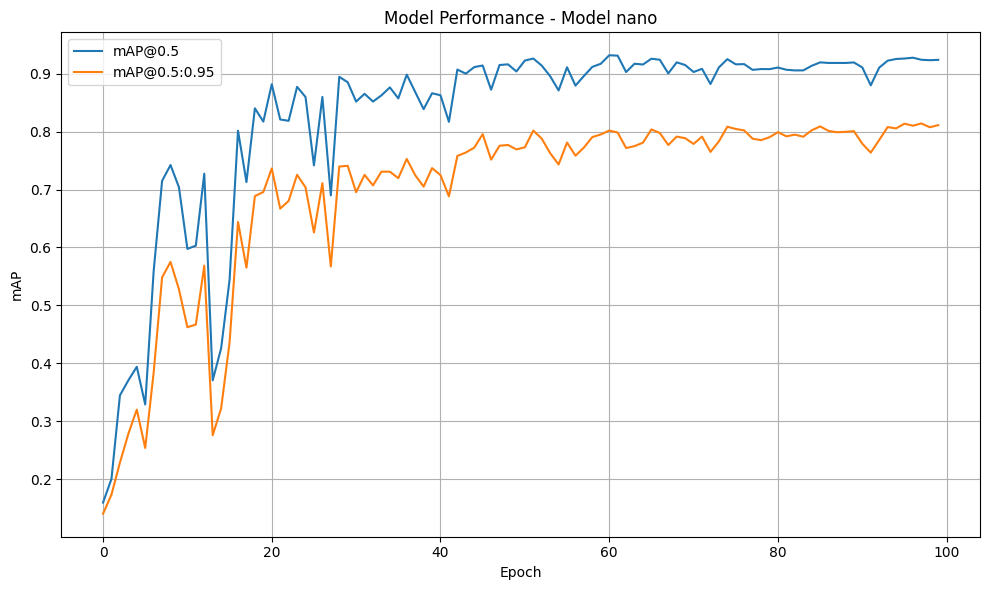

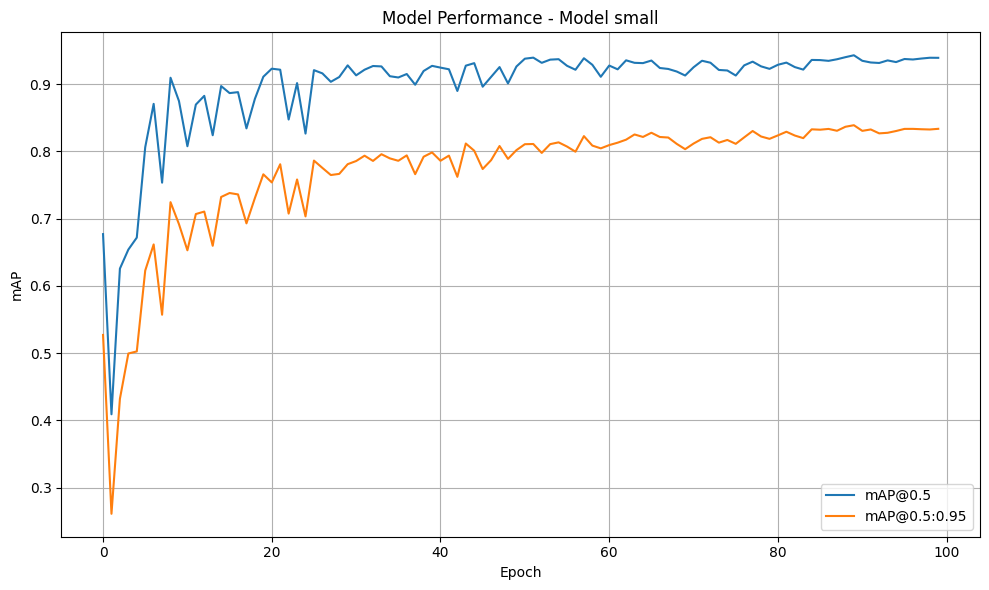

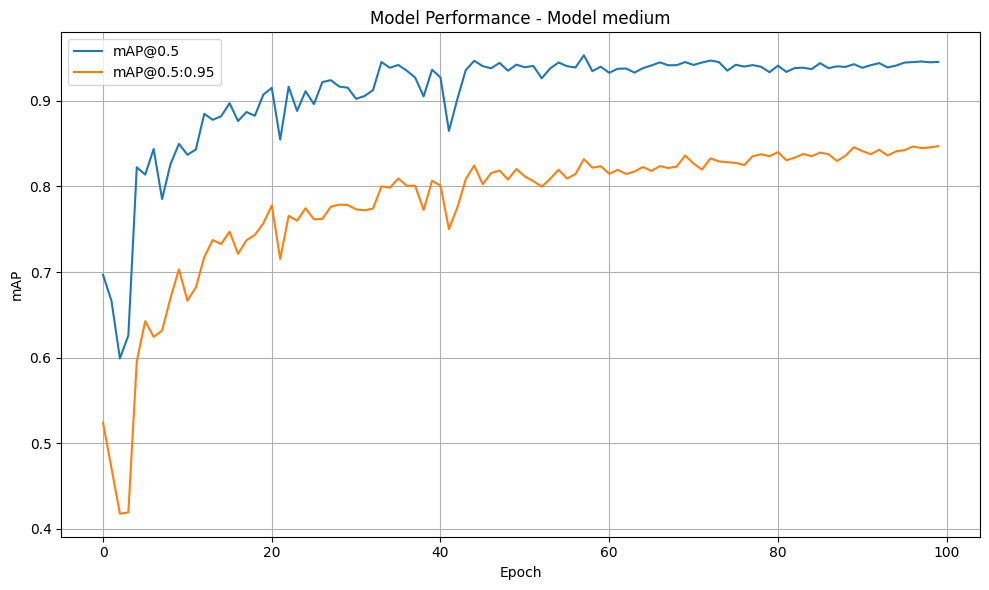

In [33]:
%matplotlib inline
for size in sizes:
    df = pd.read_csv(f"{project_base_maskLesi_and_maskLeaf}/training/{size}/results.csv")

    plt.figure(figsize=(10, 6))

    # Plot mAP50 dan mAP50-95
    plt.plot(df.index, df["metrics/mAP50(B)"], label="mAP@0.5")
    plt.plot(df.index, df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95")

    # Tambahkan label dan judul
    plt.xlabel("Epoch")
    plt.ylabel("mAP")
    plt.title(f"Model Performance - Model {size}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Simpan plot
    graph_output_dir = f"{project_base_maskLesi_and_maskLeaf}/graph"
    os.makedirs(graph_output_dir, exist_ok=True)
    plt.savefig(os.path.join(graph_output_dir, f"mAP_comparison_{size}.png"))
    plt.show()

In [34]:
if GoogleDrive:
    copy_to_google_drive("dataset/mask_lesi_and_leaf", "dataset/mask_lesi_and_leaf")
    copy_to_google_drive("results/mask_lesi_and_leaf", "results/mask_lesi_and_leaf")

## Object Detection Class Leaf Only

In [35]:
# Variabel Global
models = ['yolo11n.pt', 'yolo11s.pt', 'yolo11m.pt']
sizes = ['nano', 'small', 'medium']
epochs = 100
batch = -1 # atau -1 untuk limitasi gpu 60%
data_path_objectDetection_leaf_class_only = "dataset/object_detection_leaf_class_only"
project_base_objectDetection_leaf_class_only = "results/object_detection_leaf_class_only"

In [36]:
for model_name, size in zip(models, sizes):
    print(f"Training {size} model...")
    model = YOLO(model_name)

    start_time = time.time()
    training = model.train(
        data=f"{data_path_objectDetection_leaf_class_only}/data.yaml", 
        epochs=epochs, 
        imgsz=640, 
        batch=batch, 
        project=f"{project_base_objectDetection_leaf_class_only}/training", 
        name=f"{size}",
        exist_ok=True
    )

    measure_and_save_time(start_time, f"{project_base_objectDetection_leaf_class_only}/training/summary/time/{size}-train-time.txt")
    csv_filename = f"{project_base_objectDetection_leaf_class_only}/training/summary/{size}-training-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(training.to_csv())

    validation = model.val(
        data=f"{data_path_objectDetection_leaf_class_only}/data.yaml", 
        imgsz=640,
        project=f"{project_base_objectDetection_leaf_class_only}/validation",
        name=f"{size}",
        exist_ok=True,
        split="test"
    )

    csv_filename = f"{project_base_objectDetection_leaf_class_only}/validation/summary/{size}-validation-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(validation.to_csv())

    print(f"Finished training and validating {size} model.")

Training nano model...
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/object_detection_leaf_class_only/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=nano, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patie

train: Scanning /workspace/dataset/object_detection_leaf_class_only/train/labels... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:01<00:00, 511.23it/s]


train: New cache created: /workspace/dataset/object_detection_leaf_class_only/train/labels.cache
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.64G total, 2.22G reserved, 0.10G allocated, 21.32G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     2590035       6.441         0.541         22.82         30.57        (1, 3, 640, 640)                    list
     2590035       12.88         0.684         19.54         25.43        (2, 3, 640, 640)                    list
     2590035       25.76         0.988         22.64         24.25        (4, 3, 640, 640)                    list
     2590035       51.52         1.600         24.46         25.03        (8, 3, 640, 640)                    list
     2590035         103         2.831         31.52         34.02       (16, 3, 640, 640)                    list
     2590035       206

train: Scanning /workspace/dataset/object_detection_leaf_class_only/train/labels.cache... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.2±0.1 ms, read: 157.3±88.3 MB/s, size: 722.8 KB)


val: Scanning /workspace/dataset/object_detection_leaf_class_only/valid/labels... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 907.89it/s]

val: New cache created: /workspace/dataset/object_detection_leaf_class_only/valid/labels.cache


Plotting labels to results/object_detection_leaf_class_only/training/nano/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0006718750000000001), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/object_detection_leaf_class_only/training/nano
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      12.2G      1.154      2.717      1.566         24        640: 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         75        132    0.00587          1       0.13     0.0796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      11.2G     0.7815      2.418      1.257         53        640: 100%|██████████| 7/7 [00:01<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         75        132    0.00587          1      0.716      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      11.2G      0.687      1.891      1.144         34        640: 100%|██████████| 7/7 [00:01<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]


                   all         75        132    0.00582      0.992      0.708      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      11.2G     0.7023      1.525       1.16         49        640: 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]


                   all         75        132      0.663      0.636      0.611      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      11.2G     0.7143      1.293      1.186         41        640: 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]

                   all         75        132      0.822      0.621      0.708       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      11.2G     0.6671      1.141      1.129         51        640: 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]

                   all         75        132      0.547      0.629      0.522      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      11.2G     0.6903      1.092      1.146         39        640: 100%|██████████| 7/7 [00:01<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]

                   all         75        132      0.747       0.67       0.71      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      11.2G     0.6793      1.029      1.133         47        640: 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]

                   all         75        132      0.649      0.508      0.578      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      11.2G     0.7048     0.9843      1.133         48        640: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]

                   all         75        132      0.719      0.582      0.602       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      11.2G     0.6894     0.9787      1.137         34        640: 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all         75        132      0.626      0.553      0.596      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      11.2G     0.7058     0.9747       1.15         37        640: 100%|██████████| 7/7 [00:01<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]

                   all         75        132      0.706      0.491      0.552      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      11.2G     0.7101     0.9429      1.145         36        640: 100%|██████████| 7/7 [00:01<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         75        132      0.393      0.258      0.206      0.088



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      11.2G     0.7505     0.9531       1.16         43        640: 100%|██████████| 7/7 [00:01<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all         75        132      0.507      0.382      0.385      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      11.2G     0.7487     0.9735      1.163         41        640: 100%|██████████| 7/7 [00:01<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]

                   all         75        132      0.172      0.142     0.0664     0.0318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      11.2G     0.7951     0.9673      1.215         40        640: 100%|██████████| 7/7 [00:01<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]


                   all         75        132      0.183      0.152     0.0866     0.0583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      11.2G     0.7862     0.9284      1.182         50        640: 100%|██████████| 7/7 [00:01<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         75        132      0.628      0.424      0.466      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      11.2G     0.7423     0.8772      1.172         45        640: 100%|██████████| 7/7 [00:01<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.91it/s]

                   all         75        132      0.204      0.462      0.248       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      11.2G     0.7632     0.8957      1.166         43        640: 100%|██████████| 7/7 [00:01<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

                   all         75        132      0.512      0.583      0.496      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      11.2G     0.7363     0.8457      1.155         55        640: 100%|██████████| 7/7 [00:01<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]

                   all         75        132      0.437      0.629      0.468       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      11.2G     0.7179     0.8249      1.156         56        640: 100%|██████████| 7/7 [00:01<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         75        132      0.472      0.576       0.49      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      11.2G     0.6784     0.7775      1.129         50        640: 100%|██████████| 7/7 [00:01<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all         75        132      0.266      0.477      0.242     0.0898

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      11.2G     0.6945     0.7921      1.132         47        640: 100%|██████████| 7/7 [00:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


                   all         75        132      0.182       0.28      0.126     0.0591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      11.2G     0.7067     0.7816      1.146         47        640: 100%|██████████| 7/7 [00:01<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         75        132       0.53      0.553      0.578        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      11.2G       0.67     0.7527      1.115         60        640: 100%|██████████| 7/7 [00:01<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]


                   all         75        132      0.395      0.621       0.42      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      11.4G     0.7146     0.7651       1.14         48        640: 100%|██████████| 7/7 [00:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all         75        132      0.217      0.492       0.23      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      11.4G     0.7015     0.8082      1.122         81        640: 100%|██████████| 7/7 [00:01<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         75        132      0.219      0.591      0.232      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      11.4G     0.6693     0.7235      1.117         57        640: 100%|██████████| 7/7 [00:01<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


                   all         75        132      0.597      0.674      0.597      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      11.4G      0.665     0.7339      1.119         41        640: 100%|██████████| 7/7 [00:01<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all         75        132      0.748      0.667      0.716       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      11.4G     0.6492     0.7203      1.108         44        640: 100%|██████████| 7/7 [00:01<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]

                   all         75        132      0.496      0.783      0.567      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      11.4G      0.662     0.7064      1.118         35        640: 100%|██████████| 7/7 [00:01<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]

                   all         75        132      0.732      0.576      0.675      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      11.4G     0.6388     0.6925       1.09         50        640: 100%|██████████| 7/7 [00:01<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]

                   all         75        132      0.726      0.723      0.721      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      11.4G     0.6582     0.6863      1.106         46        640: 100%|██████████| 7/7 [00:01<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]

                   all         75        132      0.829      0.598      0.749      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      11.4G     0.6431     0.6893      1.084         42        640: 100%|██████████| 7/7 [00:01<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         75        132      0.768       0.78      0.789      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      11.4G     0.6591     0.6786      1.103         43        640: 100%|██████████| 7/7 [00:01<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]

                   all         75        132      0.814      0.818      0.866      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      11.4G     0.6318     0.6609      1.102         44        640: 100%|██████████| 7/7 [00:01<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]

                   all         75        132      0.732      0.785      0.826      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      11.4G     0.5855     0.6413       1.06         45        640: 100%|██████████| 7/7 [00:01<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]

                   all         75        132      0.808      0.795      0.844        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      11.4G     0.5982     0.6509      1.078         32        640: 100%|██████████| 7/7 [00:01<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]


                   all         75        132      0.903      0.705      0.843      0.738

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      11.4G     0.6268     0.6719      1.103         42        640: 100%|██████████| 7/7 [00:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         75        132      0.892      0.752      0.866      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      11.4G     0.5989     0.6428      1.064         59        640: 100%|██████████| 7/7 [00:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.84it/s]

                   all         75        132      0.819      0.826      0.886      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      11.4G     0.6118     0.6589      1.074         61        640: 100%|██████████| 7/7 [00:01<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]

                   all         75        132      0.847      0.659      0.758       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      11.4G     0.5591     0.6158      1.064         36        640: 100%|██████████| 7/7 [00:01<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]

                   all         75        132      0.744      0.748      0.829      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      11.4G     0.6154     0.6219      1.109         40        640: 100%|██████████| 7/7 [00:01<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]

                   all         75        132      0.814      0.698      0.808        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      11.4G     0.5941     0.6048      1.089         26        640: 100%|██████████| 7/7 [00:01<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]

                   all         75        132      0.823      0.727      0.843      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      11.4G     0.5663     0.6147       1.06         36        640: 100%|██████████| 7/7 [00:01<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


                   all         75        132      0.851      0.803        0.9      0.797

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      11.4G     0.5788     0.6102      1.063         54        640: 100%|██████████| 7/7 [00:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]

                   all         75        132      0.815      0.705       0.85      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      11.4G     0.5727     0.5994      1.061         45        640: 100%|██████████| 7/7 [00:01<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]

                   all         75        132       0.82      0.682      0.835      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      11.4G     0.5532     0.5582      1.048         40        640: 100%|██████████| 7/7 [00:01<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


                   all         75        132      0.848      0.659      0.842      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      11.4G     0.5558     0.5646      1.048         44        640: 100%|██████████| 7/7 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


                   all         75        132      0.882      0.742       0.88      0.777

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      11.4G     0.5654     0.5862      1.058         51        640: 100%|██████████| 7/7 [00:01<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]

                   all         75        132      0.728      0.735      0.806      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      11.4G     0.5499     0.5857      1.037         60        640: 100%|██████████| 7/7 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]

                   all         75        132      0.761      0.644      0.797      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      11.4G     0.5282     0.5475      1.044         42        640: 100%|██████████| 7/7 [00:01<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]


                   all         75        132      0.821      0.693      0.842      0.758

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      11.4G     0.5531     0.5755       1.05         42        640: 100%|██████████| 7/7 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]

                   all         75        132      0.815      0.803       0.89      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      11.4G      0.509     0.5463      1.025         37        640: 100%|██████████| 7/7 [00:01<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all         75        132      0.906       0.75      0.875      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      11.4G     0.5385     0.5466      1.044         46        640: 100%|██████████| 7/7 [00:01<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all         75        132      0.895      0.742      0.878      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      11.4G     0.5376     0.5518      1.031         43        640: 100%|██████████| 7/7 [00:01<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all         75        132      0.843      0.735      0.862      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      11.4G     0.5329     0.5506      1.033         49        640: 100%|██████████| 7/7 [00:01<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.07it/s]

                   all         75        132      0.887      0.765      0.893      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      11.4G     0.5177     0.5286      1.021         46        640: 100%|██████████| 7/7 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]

                   all         75        132      0.898      0.727      0.869      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      11.4G     0.5024      0.504      1.024         50        640: 100%|██████████| 7/7 [00:01<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]

                   all         75        132      0.795      0.841      0.867      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      11.4G     0.5278     0.5322      1.028         59        640: 100%|██████████| 7/7 [00:01<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all         75        132      0.835      0.803      0.874      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      11.4G     0.4976     0.5161      1.028         51        640: 100%|██████████| 7/7 [00:01<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         75        132      0.961      0.754       0.92      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      11.4G     0.5078     0.4964       1.02         58        640: 100%|██████████| 7/7 [00:01<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]

                   all         75        132      0.942      0.773      0.927      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      11.4G     0.5092     0.5215      1.025         52        640: 100%|██████████| 7/7 [00:01<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all         75        132      0.922      0.809      0.926       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      11.4G     0.4835     0.5045      1.023         42        640: 100%|██████████| 7/7 [00:01<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all         75        132      0.873      0.856      0.927      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      11.4G     0.5211     0.4951      1.038         41        640: 100%|██████████| 7/7 [00:01<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all         75        132      0.905      0.841      0.915      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      11.4G     0.5345     0.5325       1.05         28        640: 100%|██████████| 7/7 [00:01<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]

                   all         75        132      0.873      0.848      0.908      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      11.4G     0.5149     0.5005      1.029         46        640: 100%|██████████| 7/7 [00:01<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]

                   all         75        132      0.909      0.828      0.918      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      11.4G     0.4841     0.4904       1.02         30        640: 100%|██████████| 7/7 [00:01<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]

                   all         75        132      0.891      0.864      0.913      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      11.4G     0.4915     0.4994      1.015         39        640: 100%|██████████| 7/7 [00:01<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.73it/s]

                   all         75        132      0.897      0.791      0.905      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      11.4G     0.4758     0.4866      1.003         34        640: 100%|██████████| 7/7 [00:01<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all         75        132      0.917      0.803      0.922      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      11.4G     0.4911     0.4954      1.019         51        640: 100%|██████████| 7/7 [00:01<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]

                   all         75        132      0.902      0.826      0.913      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      11.4G     0.4993     0.4647      1.011         48        640: 100%|██████████| 7/7 [00:01<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         75        132      0.897      0.795      0.893      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      11.4G     0.4636     0.4508     0.9994         33        640: 100%|██████████| 7/7 [00:01<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]

                   all         75        132       0.87      0.795      0.904      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      11.4G     0.4582     0.4393     0.9825         48        640: 100%|██████████| 7/7 [00:01<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all         75        132      0.853      0.818      0.897      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      11.4G     0.4638     0.4846      1.008         37        640: 100%|██████████| 7/7 [00:01<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all         75        132      0.807      0.758       0.85      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      11.4G     0.4708      0.469      1.009         36        640: 100%|██████████| 7/7 [00:01<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all         75        132       0.82      0.811      0.901      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      11.4G      0.458     0.4359     0.9883         34        640: 100%|██████████| 7/7 [00:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]

                   all         75        132      0.879      0.788      0.902      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      11.4G     0.4502     0.4198     0.9888         43        640: 100%|██████████| 7/7 [00:01<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all         75        132      0.835      0.843      0.903      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      11.4G     0.4534     0.4187      1.002         40        640: 100%|██████████| 7/7 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         75        132      0.937      0.826      0.941      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      11.4G     0.4586     0.4289     0.9952         42        640: 100%|██████████| 7/7 [00:01<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         75        132      0.936      0.833      0.927      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      11.4G     0.4712     0.4448     0.9926         45        640: 100%|██████████| 7/7 [00:01<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]

                   all         75        132      0.881      0.848      0.918      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      11.4G     0.4727     0.4452      1.019         41        640: 100%|██████████| 7/7 [00:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.91it/s]

                   all         75        132       0.89      0.856      0.915      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      11.4G     0.4412     0.4138      1.006         32        640: 100%|██████████| 7/7 [00:01<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]

                   all         75        132      0.922      0.806      0.919      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      11.4G     0.4326     0.4131     0.9824         48        640: 100%|██████████| 7/7 [00:01<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]

                   all         75        132      0.951      0.826      0.943      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      11.4G     0.4319     0.4248     0.9759         46        640: 100%|██████████| 7/7 [00:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.28it/s]

                   all         75        132      0.888      0.848      0.926      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      11.4G     0.4316     0.4271      1.002         26        640: 100%|██████████| 7/7 [00:01<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]


                   all         75        132      0.964      0.805      0.926      0.854

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      11.4G     0.4279     0.3922      0.978         38        640: 100%|██████████| 7/7 [00:01<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         75        132      0.915      0.833      0.923      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      11.4G      0.442     0.4092     0.9889         34        640: 100%|██████████| 7/7 [00:01<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.93it/s]

                   all         75        132      0.982      0.807       0.94      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      11.4G     0.4087     0.4238     0.9842         28        640: 100%|██████████| 7/7 [00:01<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.28it/s]

                   all         75        132      0.969      0.826      0.941      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      11.4G     0.4063     0.3847     0.9751         40        640: 100%|██████████| 7/7 [00:01<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]

                   all         75        132      0.973      0.833      0.944      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      11.4G      0.413     0.4026     0.9727         54        640: 100%|██████████| 7/7 [00:01<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         75        132      0.927      0.833      0.934      0.868


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100        12G     0.3663     0.5142     0.9172         20        640: 100%|██████████| 7/7 [00:05<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

                   all         75        132      0.898      0.826       0.91      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      11.1G     0.3465     0.3775      0.907         18        640: 100%|██████████| 7/7 [00:01<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.93it/s]

                   all         75        132      0.923      0.815      0.918      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      11.1G     0.3296     0.3386     0.8734         24        640: 100%|██████████| 7/7 [00:01<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]

                   all         75        132      0.912      0.862      0.926       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      11.1G     0.3063     0.3143     0.8873         13        640: 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         75        132       0.91      0.856      0.927      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      11.1G     0.3141     0.3167     0.8773         19        640: 100%|██████████| 7/7 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all         75        132      0.918      0.864      0.936      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      11.1G     0.3261     0.3154     0.8809         23        640: 100%|██████████| 7/7 [00:01<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]

                   all         75        132      0.922      0.864      0.942      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      11.1G     0.2933     0.2764     0.8781         16        640: 100%|██████████| 7/7 [00:01<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         75        132      0.942      0.863      0.949       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      11.1G     0.2871     0.2916     0.8682         12        640: 100%|██████████| 7/7 [00:01<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]

                   all         75        132      0.949      0.864      0.951      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      11.1G     0.2864     0.2698     0.8665         17        640: 100%|██████████| 7/7 [00:01<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]

                   all         75        132      0.957      0.853      0.951      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      11.1G     0.2869     0.2734     0.8654         12        640: 100%|██████████| 7/7 [00:01<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all         75        132       0.95      0.858      0.951      0.872



100 epochs completed in 0.058 hours.
Optimizer stripped from results/object_detection_leaf_class_only/training/nano/weights/last.pt, 5.5MB
Optimizer stripped from results/object_detection_leaf_class_only/training/nano/weights/best.pt, 5.5MB

Validating results/object_detection_leaf_class_only/training/nano/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]


                   all         75        132      0.972      0.833      0.944      0.877
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to results/object_detection_leaf_class_only/training/nano
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 160.3±40.1 MB/s, size: 737.7 KB)


val: Scanning /workspace/dataset/object_detection_leaf_class_only/test/labels... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<00:00, 490.56it/s]


val: New cache created: /workspace/dataset/object_detection_leaf_class_only/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.96s/it]


                   all        150        248       0.94      0.879      0.944      0.891
Speed: 1.3ms preprocess, 0.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to results/object_detection_leaf_class_only/validation/nano
Finished training and validating nano model.
Training small model...
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/object_detection_leaf_class_only/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int

train: Scanning /workspace/dataset/object_detection_leaf_class_only/train/labels.cache... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.64G total, 2.35G reserved, 0.19G allocated, 21.11G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     9428179       21.55         0.881         25.28         41.31        (1, 3, 640, 640)                    list
     9428179        43.1         1.200         25.22         38.63        (2, 3, 640, 640)                    list
     9428179       86.19         1.768          26.4         38.92        (4, 3, 640, 640)                    list
     9428179       172.4         2.812         31.49         37.19        (8, 3, 640, 640)                    list
     9428179       344.8         4.972         38.84         46.15       (16, 3, 640, 640)                    list
     9428179       689.6         9.267         64.36         67.05       (32, 3, 640, 640)                    list
     9428179        1379        17.434         91.29         119.9       (64, 3, 640, 640)                    list
AutoBatch: Using batch-size 46 for CUDA:0 15.33G/23.64G (65%) ✅
train: Fast imag

train: Scanning /workspace/dataset/object_detection_leaf_class_only/train/labels.cache... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.2±0.0 ms, read: 321.2±76.2 MB/s, size: 722.8 KB)


val: Scanning /workspace/dataset/object_detection_leaf_class_only/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to results/object_detection_leaf_class_only/training/small/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.000359375), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/object_detection_leaf_class_only/training/small
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      10.9G      1.032      3.741      1.469        114        640: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         75        132      0.337      0.788      0.319       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      10.9G     0.7137      1.525      1.185         89        640: 100%|██████████| 12/12 [00:02<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         75        132       0.81      0.629      0.756      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      10.9G     0.7401      1.011       1.19         88        640: 100%|██████████| 12/12 [00:02<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         75        132      0.306      0.189      0.154     0.0944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      10.9G     0.8094      0.988      1.225         89        640: 100%|██████████| 12/12 [00:02<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all         75        132     0.0252      0.053    0.00426    0.00158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      10.9G      0.839      1.001      1.252         77        640: 100%|██████████| 12/12 [00:02<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all         75        132      0.045      0.136    0.00952    0.00239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      10.9G      0.864     0.9802      1.253         90        640: 100%|██████████| 12/12 [00:02<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]

                   all         75        132      0.216     0.0379     0.0298     0.0103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      10.9G      0.864     0.9566      1.269         96        640: 100%|██████████| 12/12 [00:02<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         75        132   0.000473     0.0758   0.000242   8.49e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      10.9G     0.9188     0.9654      1.289         99        640: 100%|██████████| 12/12 [00:02<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         75        132        0.2     0.0152     0.0073    0.00309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      10.9G     0.9552      1.018      1.326         77        640: 100%|██████████| 12/12 [00:02<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         75        132    0.00598      0.129    0.00277    0.00116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      10.9G      0.886      0.961       1.27        112        640: 100%|██████████| 12/12 [00:02<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         75        132     0.0251      0.152     0.0173    0.00813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      10.9G     0.9029     0.9783      1.281         91        640: 100%|██████████| 12/12 [00:02<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all         75        132     0.0219      0.174     0.0138    0.00675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      10.9G     0.8787     0.9307      1.247        123        640: 100%|██████████| 12/12 [00:02<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         75        132     0.0396      0.144     0.0221    0.00864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      10.9G      0.842     0.9028      1.239         90        640: 100%|██████████| 12/12 [00:02<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]

                   all         75        132      0.272      0.477      0.337      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      10.9G      0.854     0.9128      1.254         97        640: 100%|██████████| 12/12 [00:01<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


                   all         75        132      0.308      0.555      0.262      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      10.9G     0.7943     0.8485      1.205         92        640: 100%|██████████| 12/12 [00:01<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]

                   all         75        132      0.312      0.491      0.323      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      10.9G     0.7771     0.8232      1.204         81        640: 100%|██████████| 12/12 [00:02<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]

                   all         75        132      0.382      0.598      0.468      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      10.9G     0.7743     0.8236      1.193        110        640: 100%|██████████| 12/12 [00:02<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]


                   all         75        132      0.586      0.706      0.633      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      10.9G     0.7903     0.8313      1.194         98        640: 100%|██████████| 12/12 [00:01<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


                   all         75        132      0.787      0.636      0.759      0.613

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      10.9G     0.7574     0.8023       1.19         88        640: 100%|██████████| 12/12 [00:02<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         75        132      0.637      0.613      0.632      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      10.9G       0.73      0.789      1.165         79        640: 100%|██████████| 12/12 [00:02<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         75        132      0.608      0.606      0.641      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      10.9G     0.7088     0.7463      1.144         98        640: 100%|██████████| 12/12 [00:02<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]

                   all         75        132      0.803      0.708      0.842      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      10.9G     0.6932     0.7497      1.138        113        640: 100%|██████████| 12/12 [00:02<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


                   all         75        132      0.803       0.77      0.858       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      10.9G     0.7197     0.7566      1.159         75        640: 100%|██████████| 12/12 [00:01<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]

                   all         75        132      0.665      0.735      0.671      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      10.9G     0.7172      0.749      1.151         75        640: 100%|██████████| 12/12 [00:02<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         75        132       0.82      0.657      0.745      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      10.9G     0.6905     0.7488      1.131         93        640: 100%|██████████| 12/12 [00:01<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all         75        132      0.779      0.674      0.822       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      10.9G      0.655     0.7048      1.115         94        640: 100%|██████████| 12/12 [00:01<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]

                   all         75        132      0.835      0.735      0.849      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      10.9G      0.659     0.7042      1.131         72        640: 100%|██████████| 12/12 [00:02<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all         75        132      0.861      0.606      0.769      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      10.9G     0.6664     0.7091      1.122         90        640: 100%|██████████| 12/12 [00:02<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.07it/s]

                   all         75        132      0.876      0.689      0.822      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      10.9G     0.6538     0.6664      1.124        102        640: 100%|██████████| 12/12 [00:01<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all         75        132      0.871       0.72      0.836      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      10.9G     0.6434     0.7045      1.109         84        640: 100%|██████████| 12/12 [00:02<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]

                   all         75        132      0.823      0.741      0.863      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      10.9G     0.6553     0.6945      1.111        112        640: 100%|██████████| 12/12 [00:02<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

                   all         75        132      0.857      0.742      0.882      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      10.9G     0.6398     0.6787      1.113         99        640: 100%|██████████| 12/12 [00:01<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]

                   all         75        132      0.923      0.742      0.848      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      10.9G      0.643     0.6517      1.113         97        640: 100%|██████████| 12/12 [00:02<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]

                   all         75        132      0.769      0.712      0.818      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      10.9G     0.6183     0.6461      1.093        110        640: 100%|██████████| 12/12 [00:02<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]


                   all         75        132      0.928      0.735      0.889      0.777

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      10.9G      0.647     0.6543      1.106        119        640: 100%|██████████| 12/12 [00:02<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]


                   all         75        132       0.83       0.78      0.881      0.774

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      10.9G     0.6264     0.6345      1.097        113        640: 100%|██████████| 12/12 [00:02<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


                   all         75        132      0.746      0.826      0.861       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      10.9G     0.6123     0.6323      1.097         83        640: 100%|██████████| 12/12 [00:02<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


                   all         75        132      0.864      0.856      0.907      0.768

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      10.9G     0.6062     0.6438      1.084         91        640: 100%|██████████| 12/12 [00:02<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]

                   all         75        132      0.912      0.782      0.901      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      10.9G      0.611     0.6318      1.097         61        640: 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]

                   all         75        132      0.846      0.791      0.889      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      10.9G     0.6032     0.6394      1.089         89        640: 100%|██████████| 12/12 [00:01<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]

                   all         75        132      0.805      0.773      0.848      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      10.9G     0.5933     0.6279      1.083         91        640: 100%|██████████| 12/12 [00:02<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]

                   all         75        132      0.753      0.648      0.765       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      10.9G     0.5938     0.6244      1.086        103        640: 100%|██████████| 12/12 [00:02<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         75        132      0.845      0.663      0.821      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      10.9G     0.5614      0.597      1.062         95        640: 100%|██████████| 12/12 [00:01<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all         75        132      0.826      0.697      0.833      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      10.9G     0.5759     0.5924      1.075         76        640: 100%|██████████| 12/12 [00:02<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]

                   all         75        132      0.849      0.742       0.88      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      10.9G     0.5526     0.5771      1.058         71        640: 100%|██████████| 12/12 [00:01<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]

                   all         75        132      0.921      0.792      0.903      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      10.9G     0.5548     0.5639      1.059        111        640: 100%|██████████| 12/12 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]


                   all         75        132      0.876      0.859      0.904      0.799

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      10.9G     0.5458     0.5611      1.047         88        640: 100%|██████████| 12/12 [00:02<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]

                   all         75        132      0.887      0.773      0.901      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      10.9G     0.5669     0.5848      1.067         84        640: 100%|██████████| 12/12 [00:01<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]

                   all         75        132      0.897      0.726      0.847      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      10.9G     0.5574     0.5679       1.06        100        640: 100%|██████████| 12/12 [00:02<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all         75        132      0.875      0.793      0.893       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      10.9G      0.555     0.5663      1.062        118        640: 100%|██████████| 12/12 [00:02<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]

                   all         75        132      0.916      0.826      0.925      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      10.9G     0.5475     0.5785      1.055        103        640: 100%|██████████| 12/12 [00:02<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]

                   all         75        132       0.89      0.871      0.948      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      10.9G     0.5226     0.5537      1.052         75        640: 100%|██████████| 12/12 [00:02<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all         75        132      0.858      0.825      0.907      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      10.9G     0.5285     0.5452      1.038        112        640: 100%|██████████| 12/12 [00:02<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

                   all         75        132      0.921      0.794       0.91      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      10.9G     0.5278     0.5295       1.04         98        640: 100%|██████████| 12/12 [00:02<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]

                   all         75        132      0.887      0.811      0.905      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      10.9G     0.5335     0.5129      1.042        105        640: 100%|██████████| 12/12 [00:02<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all         75        132      0.899      0.813      0.925      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      10.9G     0.5185     0.5319      1.037         86        640: 100%|██████████| 12/12 [00:02<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]

                   all         75        132      0.941      0.849      0.933      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      10.9G     0.5104      0.515      1.029         89        640: 100%|██████████| 12/12 [00:02<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         75        132      0.922      0.871      0.946      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      10.9G     0.4995     0.5067       1.02         80        640: 100%|██████████| 12/12 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]

                   all         75        132      0.945      0.841       0.94      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      10.9G     0.5086     0.5214      1.036         90        640: 100%|██████████| 12/12 [00:02<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]

                   all         75        132      0.913      0.793      0.918      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      10.9G     0.5001     0.5083      1.026         99        640: 100%|██████████| 12/12 [00:02<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]

                   all         75        132      0.911      0.857      0.925      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      10.9G     0.4858     0.4985       1.02         86        640: 100%|██████████| 12/12 [00:02<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]

                   all         75        132      0.981      0.799      0.936      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      10.9G     0.4917     0.5025      1.027         88        640: 100%|██████████| 12/12 [00:01<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]

                   all         75        132      0.954      0.792       0.91      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      10.9G     0.4898      0.507      1.025         85        640: 100%|██████████| 12/12 [00:01<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]

                   all         75        132      0.967      0.811      0.937      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      10.9G     0.5036     0.5003      1.033        101        640: 100%|██████████| 12/12 [00:01<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all         75        132      0.872      0.841      0.922      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      10.9G     0.4771     0.4678      1.003        122        640: 100%|██████████| 12/12 [00:02<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all         75        132      0.924      0.818      0.926      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      10.9G     0.4696     0.4618      1.008         91        640: 100%|██████████| 12/12 [00:02<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]

                   all         75        132      0.921      0.811      0.936      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      10.9G     0.4813     0.4788      1.007         75        640: 100%|██████████| 12/12 [00:02<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


                   all         75        132      0.926      0.826      0.922      0.851

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      10.9G     0.4734     0.4465          1        104        640: 100%|██████████| 12/12 [00:02<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]

                   all         75        132      0.937      0.826      0.929      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      10.9G     0.4646     0.4536      1.004         77        640: 100%|██████████| 12/12 [00:01<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]

                   all         75        132      0.881      0.856       0.93       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      10.9G     0.4739     0.4592       1.01         86        640: 100%|██████████| 12/12 [00:01<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]

                   all         75        132      0.918      0.844      0.934      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      10.9G     0.4567     0.4423      1.003         87        640: 100%|██████████| 12/12 [00:01<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]

                   all         75        132      0.936       0.88       0.94      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      10.9G     0.4646     0.4519      1.008         84        640: 100%|██████████| 12/12 [00:02<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]

                   all         75        132      0.931      0.856      0.934      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      10.9G     0.4523     0.4347     0.9962         74        640: 100%|██████████| 12/12 [00:02<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


                   all         75        132      0.991      0.845      0.954      0.894

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      10.9G     0.4359     0.4329     0.9853        106        640: 100%|██████████| 12/12 [00:01<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]

                   all         75        132      0.944      0.811      0.926      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      10.9G     0.4361     0.4265     0.9986         76        640: 100%|██████████| 12/12 [00:01<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]

                   all         75        132       0.91      0.864      0.928      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      10.9G     0.4361     0.4363     0.9793         85        640: 100%|██████████| 12/12 [00:02<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]

                   all         75        132      0.955      0.833      0.925      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      10.9G     0.4356      0.434     0.9917         93        640: 100%|██████████| 12/12 [00:02<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         75        132       0.94      0.833      0.923      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      10.9G     0.4247     0.4208     0.9935         82        640: 100%|██████████| 12/12 [00:02<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         75        132      0.923      0.823       0.91      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      10.9G     0.4321     0.4111      0.981         93        640: 100%|██████████| 12/12 [00:01<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all         75        132      0.971      0.841      0.939      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      10.9G     0.4169       0.39     0.9774         83        640: 100%|██████████| 12/12 [00:01<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]

                   all         75        132      0.915      0.892      0.935      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      10.9G     0.4272     0.4136     0.9921         84        640: 100%|██████████| 12/12 [00:02<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]

                   all         75        132      0.951      0.875      0.944      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      10.9G     0.4306     0.4009     0.9782         89        640: 100%|██████████| 12/12 [00:02<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all         75        132      0.971      0.826      0.944      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      10.9G     0.4218     0.4014     0.9898         81        640: 100%|██████████| 12/12 [00:02<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]


                   all         75        132      0.926      0.854      0.939      0.885

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      10.9G     0.4032     0.3823     0.9666         94        640: 100%|██████████| 12/12 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]

                   all         75        132      0.965      0.835      0.946        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      10.9G     0.4125     0.3906     0.9744         88        640: 100%|██████████| 12/12 [00:02<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


                   all         75        132      0.897      0.862      0.925      0.874

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      10.9G     0.3963     0.3762     0.9781         93        640: 100%|██████████| 12/12 [00:02<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


                   all         75        132       0.96      0.826      0.938      0.878

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      10.9G     0.4055     0.3805     0.9744         79        640: 100%|██████████| 12/12 [00:01<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]

                   all         75        132       0.92      0.864      0.933      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      10.9G     0.3986     0.3853     0.9742         90        640: 100%|██████████| 12/12 [00:01<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all         75        132      0.964      0.841      0.946      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      10.9G     0.3892      0.371     0.9671         85        640: 100%|██████████| 12/12 [00:02<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

                   all         75        132      0.936      0.848      0.924      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      10.9G      0.413     0.3877     0.9756         80        640: 100%|██████████| 12/12 [00:02<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

                   all         75        132      0.972      0.841      0.926      0.869


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      10.9G     0.3331     0.4034     0.9014         38        640: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]

                   all         75        132      0.959      0.848      0.929      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      10.9G     0.3041     0.3116     0.8811         44        640: 100%|██████████| 12/12 [00:02<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]

                   all         75        132          1      0.846      0.942      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      10.9G      0.309     0.2937     0.8874         34        640: 100%|██████████| 12/12 [00:01<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                   all         75        132      0.972      0.871      0.939      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      10.9G     0.3071     0.2945     0.8952         42        640: 100%|██████████| 12/12 [00:02<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]

                   all         75        132      0.982      0.871      0.936      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      10.9G     0.2829      0.263     0.8611         33        640: 100%|██████████| 12/12 [00:02<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]

                   all         75        132      0.983      0.862      0.939      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      10.9G      0.282      0.276     0.8693         33        640: 100%|██████████| 12/12 [00:02<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


                   all         75        132      0.982      0.864      0.942      0.897

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      10.9G     0.2796      0.253     0.8638         43        640: 100%|██████████| 12/12 [00:02<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         75        132      0.991      0.859      0.947      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      10.9G     0.2772     0.2562      0.867         37        640: 100%|██████████| 12/12 [00:02<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         75        132      0.982      0.871      0.949      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      10.9G     0.2795     0.2591     0.8681         41        640: 100%|██████████| 12/12 [00:02<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]

                   all         75        132      0.982      0.871       0.95      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      10.9G     0.2717     0.2511     0.8804         31        640: 100%|██████████| 12/12 [00:02<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         75        132      0.983      0.868       0.95        0.9



100 epochs completed in 0.082 hours.
Optimizer stripped from results/object_detection_leaf_class_only/training/small/weights/last.pt, 19.2MB
Optimizer stripped from results/object_detection_leaf_class_only/training/small/weights/best.pt, 19.2MB

Validating results/object_detection_leaf_class_only/training/small/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


                   all         75        132      0.991      0.859      0.947        0.9
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to results/object_detection_leaf_class_only/training/small
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.2±0.1 ms, read: 166.9±34.8 MB/s, size: 737.7 KB)


val: Scanning /workspace/dataset/object_detection_leaf_class_only/test/labels.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]


                   all        150        248      0.952      0.851      0.944      0.905
Speed: 2.2ms preprocess, 1.2ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to results/object_detection_leaf_class_only/validation/small
Finished training and validating small model.
Training medium model...
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/object_detection_leaf_class_only/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, 

train: Scanning /workspace/dataset/object_detection_leaf_class_only/train/labels.cache... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.64G total, 3.07G reserved, 0.44G allocated, 20.13G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    20053779       68.19         1.690         35.69         35.54        (1, 3, 640, 640)                    list
    20053779       136.4         2.405          33.7         32.06        (2, 3, 640, 640)                    list
    20053779       272.8         3.399          37.1         33.24        (4, 3, 640, 640)                    list
    20053779       545.5         5.627         48.57          39.9        (8, 3, 640, 640)                    list
    20053779        1091         9.733         69.28         65.77       (16, 3, 640, 640)                    list
    20053779        2182        18.168         102.5         125.2       (32, 3, 640, 640)                    list
CUDA out of memory. Tried to allocate 100.00 MiB. GPU 0 has a total capacity of 23.64 GiB of which 6.81 MiB is free. Process 468591 has 23.61 GiB memory in use. Of the allocated memory 22.95 GiB 

train: Scanning /workspace/dataset/object_detection_leaf_class_only/train/labels.cache... 525 images, 0 backgrounds, 0 corrupt: 100%|██████████| 525/525 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.2±0.0 ms, read: 431.2±162.4 MB/s, size: 722.8 KB)


val: Scanning /workspace/dataset/object_detection_leaf_class_only/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to results/object_detection_leaf_class_only/training/medium/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.00046875), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/object_detection_leaf_class_only/training/medium
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      9.87G     0.9423      1.556      1.388         17        640: 100%|██████████| 27/27 [00:05<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]

                   all         75        132      0.215      0.553      0.207     0.0673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      9.87G      1.016      1.164      1.384         16        640: 100%|██████████| 27/27 [00:04<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]

                   all         75        132   0.000625     0.0909   0.000342   7.26e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      9.87G      1.144      1.269      1.469         18        640: 100%|██████████| 27/27 [00:04<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all         75        132     0.0338     0.0682     0.0116    0.00307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      9.87G      1.153      1.303      1.476         25        640: 100%|██████████| 27/27 [00:04<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.06it/s]

                   all         75        132    0.00558    0.00758   0.000853   0.000386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      9.87G      1.105      1.185      1.425         19        640: 100%|██████████| 27/27 [00:04<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]

                   all         75        132     0.0255     0.0152    0.00212   0.000666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      9.87G      1.076      1.176      1.422         28        640: 100%|██████████| 27/27 [00:04<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]

                   all         75        132      0.529      0.485      0.474      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      9.87G     0.9851        1.1      1.357         20        640: 100%|██████████| 27/27 [00:03<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.34it/s]

                   all         75        132      0.161      0.223     0.0947     0.0323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      9.87G      1.008      1.075      1.381         19        640: 100%|██████████| 27/27 [00:04<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all         75        132     0.0596      0.114     0.0466     0.0194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      9.87G     0.9659      1.047      1.331         35        640: 100%|██████████| 27/27 [00:04<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         75        132      0.401      0.533      0.416      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      9.87G     0.9321      1.025      1.319         36        640: 100%|██████████| 27/27 [00:03<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.69it/s]

                   all         75        132      0.703      0.538       0.62      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      9.87G     0.9484      1.023      1.319         19        640: 100%|██████████| 27/27 [00:03<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.74it/s]

                   all         75        132      0.724      0.523      0.585      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      9.87G     0.9237     0.9885      1.337         20        640: 100%|██████████| 27/27 [00:03<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.67it/s]

                   all         75        132      0.762      0.636      0.769      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      9.87G      0.846     0.9495      1.263         25        640: 100%|██████████| 27/27 [00:04<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]

                   all         75        132      0.835       0.65      0.796      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      9.87G     0.8525     0.9362      1.277         24        640: 100%|██████████| 27/27 [00:04<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]

                   all         75        132      0.581      0.608      0.611      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      9.87G     0.8467     0.9525      1.263         27        640: 100%|██████████| 27/27 [00:03<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.46it/s]

                   all         75        132      0.696      0.735      0.814      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      9.87G     0.8077     0.8992      1.227         36        640: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]

                   all         75        132      0.831      0.568      0.656      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      9.87G     0.8255     0.9014      1.256         33        640: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all         75        132      0.841      0.641      0.801      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      9.87G     0.7858      0.887      1.213         32        640: 100%|██████████| 27/27 [00:03<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.83it/s]

                   all         75        132        0.8      0.697      0.827      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      9.87G     0.7712     0.8672      1.211         14        640: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.64it/s]

                   all         75        132      0.771      0.659      0.765      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      9.87G     0.7491     0.8432        1.2         28        640: 100%|██████████| 27/27 [00:03<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.23it/s]

                   all         75        132      0.744      0.705      0.817      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      9.87G     0.7616     0.8404        1.2         27        640: 100%|██████████| 27/27 [00:04<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.87it/s]

                   all         75        132        0.8      0.636       0.79       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      9.87G     0.7564     0.8585      1.195         29        640: 100%|██████████| 27/27 [00:04<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]

                   all         75        132      0.928      0.583        0.8      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      9.87G     0.7308     0.8154      1.199         25        640: 100%|██████████| 27/27 [00:04<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]

                   all         75        132      0.759      0.693       0.77      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      9.87G     0.7445     0.8274      1.185         32        640: 100%|██████████| 27/27 [00:04<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.81it/s]

                   all         75        132      0.732      0.662      0.789      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      9.87G     0.7337     0.8263      1.185         19        640: 100%|██████████| 27/27 [00:03<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.92it/s]

                   all         75        132       0.91      0.614       0.82      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      9.87G     0.7092     0.7912      1.173         29        640: 100%|██████████| 27/27 [00:03<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.91it/s]

                   all         75        132      0.962      0.583      0.809      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      9.87G     0.7427     0.8222      1.201         26        640: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.13it/s]

                   all         75        132      0.903      0.591      0.794      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      9.87G     0.6887     0.7909      1.152         16        640: 100%|██████████| 27/27 [00:03<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.82it/s]

                   all         75        132      0.852      0.659      0.813      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      9.87G     0.6693     0.7851      1.143         28        640: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.79it/s]

                   all         75        132      0.807      0.695      0.824      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      9.87G     0.6584     0.7631      1.143         12        640: 100%|██████████| 27/27 [00:03<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.83it/s]

                   all         75        132      0.777      0.727       0.83      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      9.87G     0.6801     0.7662      1.144         27        640: 100%|██████████| 27/27 [00:04<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         75        132      0.887      0.644      0.809      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      9.87G     0.6398     0.7329      1.121         29        640: 100%|██████████| 27/27 [00:03<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.70it/s]

                   all         75        132      0.883      0.628      0.828      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      9.87G     0.6571     0.7559      1.145         26        640: 100%|██████████| 27/27 [00:03<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.71it/s]

                   all         75        132      0.874      0.632      0.807      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      9.87G      0.671     0.7601      1.138         28        640: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.72it/s]

                   all         75        132      0.818      0.652      0.824      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      9.87G     0.6716     0.7518      1.141         28        640: 100%|██████████| 27/27 [00:03<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.55it/s]

                   all         75        132      0.944      0.598      0.815      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      9.87G     0.6554     0.7352      1.134         33        640: 100%|██████████| 27/27 [00:03<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.66it/s]

                   all         75        132      0.786      0.669      0.823      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      9.87G     0.6398     0.7445      1.132         15        640: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.67it/s]

                   all         75        132      0.761      0.727      0.863      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      9.87G     0.6381     0.6985      1.132         19        640: 100%|██████████| 27/27 [00:04<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         75        132       0.74      0.732       0.82      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      9.87G      0.615      0.705      1.121         21        640: 100%|██████████| 27/27 [00:04<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.15it/s]

                   all         75        132      0.828      0.728      0.834      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      9.87G     0.6232     0.6761      1.118         29        640: 100%|██████████| 27/27 [00:04<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.15it/s]

                   all         75        132      0.889      0.682      0.848      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      9.87G     0.6251     0.6874      1.118         18        640: 100%|██████████| 27/27 [00:03<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.95it/s]

                   all         75        132      0.905      0.629      0.819      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      9.87G     0.6204     0.6987      1.114         21        640: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.04it/s]

                   all         75        132      0.856      0.705       0.85       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      9.87G      0.579      0.672      1.092         22        640: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.91it/s]

                   all         75        132      0.853      0.742      0.877      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      9.87G      0.613     0.6844      1.115         21        640: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.53it/s]

                   all         75        132        0.9      0.667      0.859      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      9.87G     0.5912     0.6401      1.095         33        640: 100%|██████████| 27/27 [00:03<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.65it/s]

                   all         75        132       0.86      0.795      0.892      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      9.87G     0.5804     0.6366       1.09         15        640: 100%|██████████| 27/27 [00:04<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]

                   all         75        132      0.822      0.735      0.864      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      9.87G     0.5705     0.6341      1.079         26        640: 100%|██████████| 27/27 [00:04<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]

                   all         75        132      0.781      0.782      0.874      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      9.87G     0.5614     0.6468      1.078         24        640: 100%|██████████| 27/27 [00:03<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.94it/s]

                   all         75        132      0.842      0.807      0.894      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      9.87G     0.5793     0.6587      1.085         19        640: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.96it/s]

                   all         75        132      0.859      0.727      0.876      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      9.87G     0.5796     0.6459      1.087         19        640: 100%|██████████| 27/27 [00:03<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.86it/s]

                   all         75        132      0.862       0.76      0.886      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      9.87G     0.5672     0.6429      1.092         28        640: 100%|██████████| 27/27 [00:03<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.00it/s]

                   all         75        132        0.9       0.78      0.908      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      9.87G     0.5636     0.6282      1.083         19        640: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.71it/s]

                   all         75        132      0.877      0.759      0.909      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      9.87G     0.5517     0.6263      1.069         20        640: 100%|██████████| 27/27 [00:04<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]

                   all         75        132      0.866       0.78      0.899      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      9.87G     0.5472     0.6205      1.081         12        640: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.14it/s]

                   all         75        132      0.881      0.758      0.889      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      9.87G     0.5504      0.598      1.071         25        640: 100%|██████████| 27/27 [00:03<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.18it/s]

                   all         75        132       0.84      0.837       0.91      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      9.87G     0.5431     0.5959      1.067         40        640: 100%|██████████| 27/27 [00:04<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.98it/s]

                   all         75        132      0.904      0.855      0.925      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      9.87G     0.5175     0.5717      1.043         31        640: 100%|██████████| 27/27 [00:04<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.09it/s]

                   all         75        132      0.919      0.788      0.906      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      9.87G     0.5174     0.5645      1.057         26        640: 100%|██████████| 27/27 [00:03<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.18it/s]

                   all         75        132      0.908      0.795      0.904       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      9.87G     0.5175     0.5659       1.05         33        640: 100%|██████████| 27/27 [00:03<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]

                   all         75        132      0.926      0.758      0.884      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      9.87G      0.506     0.5478      1.042         28        640: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]

                   all         75        132      0.685      0.848      0.864      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      9.87G      0.518     0.5643      1.053         15        640: 100%|██████████| 27/27 [00:04<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.97it/s]

                   all         75        132      0.915      0.773      0.905       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      9.87G     0.5154     0.5477      1.054         18        640: 100%|██████████| 27/27 [00:03<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.81it/s]

                   all         75        132      0.895      0.839      0.932      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      9.87G     0.5091     0.5419      1.047         16        640: 100%|██████████| 27/27 [00:03<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.22it/s]

                   all         75        132      0.895      0.803      0.915      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      9.87G      0.501     0.5471      1.037         31        640: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.90it/s]

                   all         75        132      0.947       0.75      0.922      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      9.87G     0.5207      0.561      1.057         36        640: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.38it/s]

                   all         75        132      0.981      0.784      0.934      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      9.87G     0.4877     0.5396       1.04         34        640: 100%|██████████| 27/27 [00:04<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.98it/s]

                   all         75        132      0.926      0.811      0.924      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      9.87G     0.5078     0.5452      1.038         25        640: 100%|██████████| 27/27 [00:03<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.29it/s]

                   all         75        132      0.938      0.807      0.926      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      9.87G     0.4863     0.5056      1.023         23        640: 100%|██████████| 27/27 [00:04<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]

                   all         75        132      0.886      0.803      0.907      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      9.87G     0.4745     0.5035      1.028         26        640: 100%|██████████| 27/27 [00:03<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.83it/s]

                   all         75        132      0.833      0.833      0.913      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      9.87G     0.4943     0.5241      1.035         20        640: 100%|██████████| 27/27 [00:03<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.26it/s]

                   all         75        132      0.823       0.88      0.923      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      9.87G     0.4598     0.5012       1.02         17        640: 100%|██████████| 27/27 [00:03<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.10it/s]

                   all         75        132      0.884      0.818       0.92      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      9.87G     0.4432      0.482      1.007         25        640: 100%|██████████| 27/27 [00:03<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.05it/s]

                   all         75        132      0.913      0.871      0.939      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      9.87G     0.4773     0.5073      1.018         25        640: 100%|██████████| 27/27 [00:03<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.02it/s]

                   all         75        132      0.892       0.78      0.916      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      9.87G     0.4744     0.4762      1.021         23        640: 100%|██████████| 27/27 [00:04<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.02it/s]

                   all         75        132       0.88      0.888       0.94      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      9.87G     0.4671     0.4971      1.028         12        640: 100%|██████████| 27/27 [00:03<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all         75        132      0.858      0.841      0.927      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      9.87G     0.4704     0.4828       1.02         23        640: 100%|██████████| 27/27 [00:04<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.16it/s]

                   all         75        132      0.862      0.856      0.922      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      9.87G     0.4473     0.4623      1.014         31        640: 100%|██████████| 27/27 [00:03<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.96it/s]

                   all         75        132      0.868      0.826       0.93      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      9.87G     0.4523     0.4573      1.014         21        640: 100%|██████████| 27/27 [00:03<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.11it/s]

                   all         75        132      0.892      0.833      0.928      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      9.87G      0.459     0.4497      1.018         27        640: 100%|██████████| 27/27 [00:03<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]

                   all         75        132      0.897      0.841      0.925      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      9.87G     0.4537      0.461      1.007         25        640: 100%|██████████| 27/27 [00:03<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.64it/s]

                   all         75        132      0.951      0.803      0.928      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      9.87G     0.4462     0.4573       1.02         20        640: 100%|██████████| 27/27 [00:03<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.09it/s]

                   all         75        132      0.907       0.81      0.934      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      9.87G     0.4481     0.4643      1.011         18        640: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.87it/s]

                   all         75        132      0.848      0.894      0.949      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      9.87G     0.4452      0.459      1.003         12        640: 100%|██████████| 27/27 [00:04<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         75        132      0.894      0.871      0.941      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      9.87G     0.4332     0.4254     0.9946         22        640: 100%|██████████| 27/27 [00:04<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.20it/s]

                   all         75        132      0.885      0.873      0.942      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      9.87G     0.4163     0.4231     0.9964         23        640: 100%|██████████| 27/27 [00:03<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.11it/s]

                   all         75        132      0.896      0.879      0.941      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      9.87G     0.4292     0.4259      0.998         19        640: 100%|██████████| 27/27 [00:03<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.13it/s]

                   all         75        132      0.921      0.887      0.941      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      9.87G     0.4241     0.4215          1         26        640: 100%|██████████| 27/27 [00:03<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.24it/s]

                   all         75        132      0.868      0.902      0.938      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      9.87G     0.4176     0.4177     0.9947         14        640: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.21it/s]

                   all         75        132      0.893      0.864      0.931      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      9.87G     0.4198     0.4151     0.9973         18        640: 100%|██████████| 27/27 [00:03<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.98it/s]

                   all         75        132      0.931      0.856      0.942      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      9.87G     0.4181     0.4111      0.991         34        640: 100%|██████████| 27/27 [00:03<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all         75        132      0.947      0.841      0.942      0.871


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      9.87G     0.3462     0.5158     0.9273         25        640: 100%|██████████| 27/27 [00:05<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.64it/s]

                   all         75        132      0.912      0.864      0.941      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      9.87G     0.3201     0.3611     0.9104          7        640: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.75it/s]

                   all         75        132      0.902      0.848      0.932      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      9.87G     0.3125     0.3246        0.9         12        640: 100%|██████████| 27/27 [00:03<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.53it/s]

                   all         75        132      0.965      0.845      0.954      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      9.87G     0.3112     0.3263     0.8856         13        640: 100%|██████████| 27/27 [00:03<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.29it/s]

                   all         75        132      0.957      0.871      0.952      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      9.87G      0.317     0.3097      0.897         12        640: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.70it/s]

                   all         75        132      0.917      0.894      0.947      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      9.87G     0.3053     0.3031     0.8953          7        640: 100%|██████████| 27/27 [00:03<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.51it/s]

                   all         75        132      0.921      0.902       0.95      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      9.87G     0.2905      0.296     0.8804          8        640: 100%|██████████| 27/27 [00:04<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.18it/s]

                   all         75        132      0.935      0.894       0.95      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      9.87G     0.2947     0.2866     0.8806         10        640: 100%|██████████| 27/27 [00:04<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.38it/s]

                   all         75        132      0.937      0.906      0.952      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      9.87G     0.2891     0.2892     0.8797          8        640: 100%|██████████| 27/27 [00:04<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.85it/s]

                   all         75        132      0.923      0.906      0.952      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      9.87G     0.2802     0.2758     0.8679          8        640: 100%|██████████| 27/27 [00:04<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.07it/s]

                   all         75        132      0.922      0.901      0.954       0.88



100 epochs completed in 0.144 hours.
Optimizer stripped from results/object_detection_leaf_class_only/training/medium/weights/last.pt, 40.5MB
Optimizer stripped from results/object_detection_leaf_class_only/training/medium/weights/best.pt, 40.5MB

Validating results/object_detection_leaf_class_only/training/medium/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]


                   all         75        132      0.935      0.894       0.95      0.884
Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to results/object_detection_leaf_class_only/training/medium
Ultralytics 8.3.179 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 69.3±41.5 MB/s, size: 737.7 KB)


val: Scanning /workspace/dataset/object_detection_leaf_class_only/test/labels.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.59it/s]


                   all        150        248      0.924      0.839      0.942      0.896
Speed: 1.0ms preprocess, 3.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to results/object_detection_leaf_class_only/validation/medium
Finished training and validating medium model.


In [37]:
for size in sizes:
    print(f"Running prediction for {size} model...")

    model = YOLO(f"results/object_detection_leaf_class_only/training/{size}/weights/best.pt")

    # Define the output directory for the current model size
    output_dir = f"results/object_detection_leaf_class_only/predict/{size}"
    os.makedirs(output_dir, exist_ok=True)

    results = model(
        source=f"{data_path_objectDetection_leaf_class_only}/test/images", 
        exist_ok=True,
        stream=True
    )

    for i, result in enumerate(results):
        original_filename = os.path.basename(result.path)
        save_path = os.path.join(output_dir, original_filename)
        result.save(filename=save_path)

    print(f"Finished predicting for {size} model.")

Running prediction for nano model...

image 1/150 /workspace/dataset/object_detection_leaf_class_only/test/images/03482_frog_eye_leaf_spot_jpg.rf.3124c5801b66847191cc658bea2ae0e5.jpg: 448x640 1 leaf, 10.0ms
image 2/150 /workspace/dataset/object_detection_leaf_class_only/test/images/03483_frog_eye_leaf_spot_jpg.rf.cf4d552835513269ee2ec3aaf84825aa.jpg: 448x640 1 leaf, 6.7ms
image 3/150 /workspace/dataset/object_detection_leaf_class_only/test/images/03484_frog_eye_leaf_spot_jpg.rf.7eeff8f470959d4c5cae3b80a72b5b57.jpg: 448x640 2 leafs, 6.9ms
image 4/150 /workspace/dataset/object_detection_leaf_class_only/test/images/03485_frog_eye_leaf_spot_jpg.rf.eed5133213fcfc0abd14e49b9571abac.jpg: 448x640 3 leafs, 6.7ms
image 5/150 /workspace/dataset/object_detection_leaf_class_only/test/images/03486_frog_eye_leaf_spot_jpg.rf.d33dc2eb66b6d7c63002dba4c7feee10.jpg: 448x640 2 leafs, 6.7ms
image 6/150 /workspace/dataset/object_detection_leaf_class_only/test/images/03487_frog_eye_leaf_spot_jpg.rf.4aeace3b2a

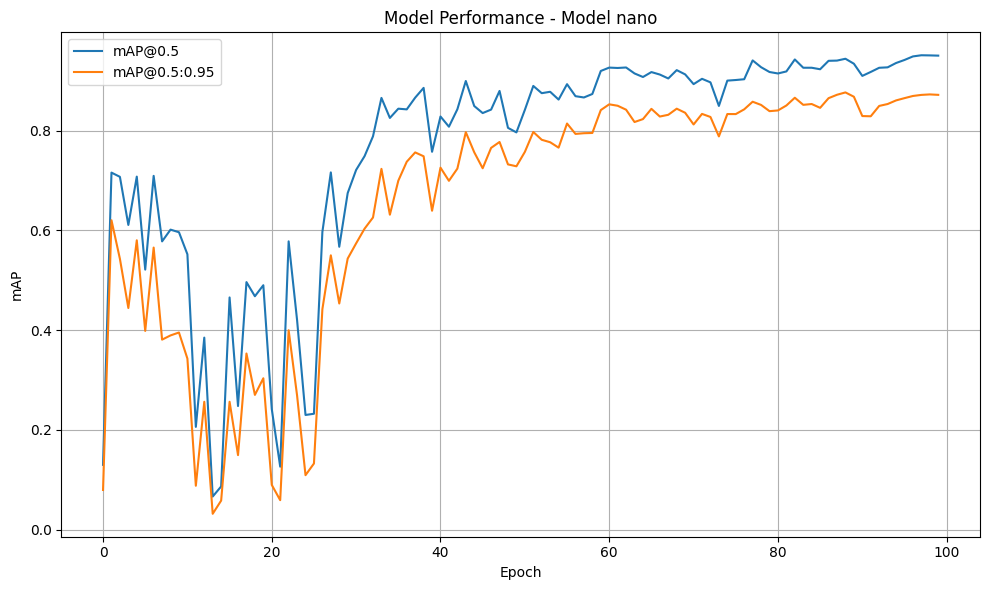

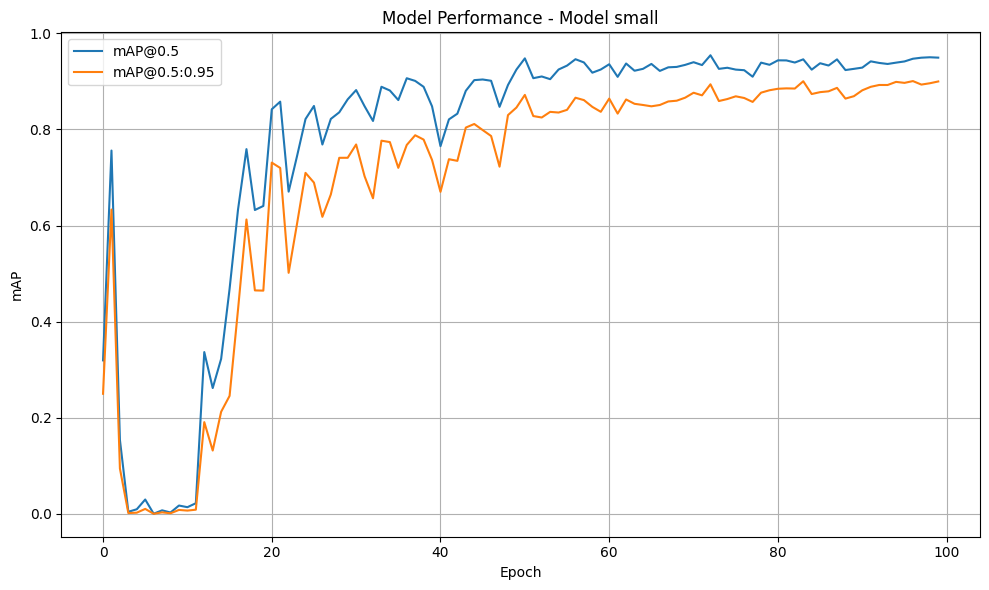

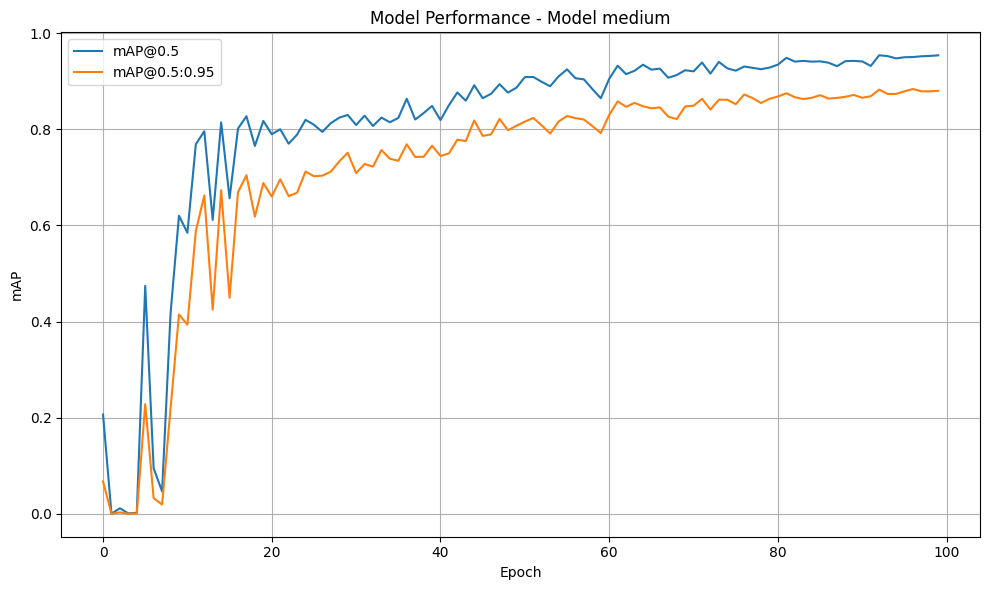

In [38]:
%matplotlib inline
for size in sizes:
    df = pd.read_csv(f"{project_base_objectDetection_leaf_class_only}/training/{size}/results.csv")

    plt.figure(figsize=(10, 6))

    # Plot mAP50 dan mAP50-95
    plt.plot(df.index, df["metrics/mAP50(B)"], label="mAP@0.5")
    plt.plot(df.index, df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95")

    # Tambahkan label dan judul
    plt.xlabel("Epoch")
    plt.ylabel("mAP")
    plt.title(f"Model Performance - Model {size}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Simpan plot
    graph_output_dir = f"{project_base_objectDetection_leaf_class_only}/graph"
    os.makedirs(graph_output_dir, exist_ok=True)
    plt.savefig(os.path.join(graph_output_dir, f"mAP_comparison_{size}.png"))
    plt.show()

In [39]:
if GoogleDrive:
    copy_to_google_drive("dataset/object_detection_leaf_class_only", "dataset/object_detection_leaf_class_only")
    copy_to_google_drive("results/object_detection_leaf_class_only", "results/object_detection_leaf_class_only")

## Fine Tune For Detect Healthy, Rust, and Scab

In [8]:
# Path sumber dataset YOLO
image_dir = Path("dataset/object_detection/train/images")
label_dir = Path("dataset/object_detection/train/labels")

# Path target few-shot
few_shot_base = Path("dataset/few_shot")

# Mapping class ID ke nama
class_map = {0: "frog-eye-leaf-spot", 1: "healthy", 2: "rust"}

# Buat index gambar per class berdasarkan nama file
class_to_files = defaultdict(list)
for img_file in sorted(image_dir.glob("*.jpg")):
    filename_lower = img_file.name.lower()
    if "frog-eye-leaf-spot" in filename_lower:
        cls = 0
    elif "healthy" in filename_lower:
        cls = 1
    elif "rust" in filename_lower:
        cls = 2
    else:
        continue  # Skip jika tidak dikenali

    label_file = label_dir / (img_file.stem + ".txt")
    if label_file.exists():
        class_to_files[cls].append((img_file, label_file))

# Generate few-shot data
for n in [5] + list(range(10, 51, 5)):
    target_image_dir = few_shot_base / f"{n}-shot" / "images"
    target_label_dir = few_shot_base / f"{n}-shot" / "labels"
    target_image_dir.mkdir(parents=True, exist_ok=True)
    target_label_dir.mkdir(parents=True, exist_ok=True)

    for cls in class_map:
        files = class_to_files[cls][:n]  # ambil berurutan
        for img_path, label_path in files:
            shutil.copy(img_path, target_image_dir / img_path.name)
            shutil.copy(label_path, target_label_dir / label_path.name)

# Copy data.yaml
shutil.copy("dataset/object_detection/data.yaml", "dataset/few_shot/data.yaml")

'dataset/few_shot/data.yaml'

In [9]:
# Variabel Global
models = {"nano": "results/object_detection_leaf_class_only/training/nano/weights/best.pt",
          "small": "results/object_detection_leaf_class_only/training/small/weights/best.pt",
          "medium": "results/object_detection_leaf_class_only/training/medium/weights/best.pt"}
sizes = ["nano", "small", "medium"]
shots = [5] + list(range(10, 51, 5))
size_to_shots = {
    "nano":   shots,
    "small":  shots,
    "medium": shots
}
epochs = 50
batch = -1 # atau -1 untuk limitasi gpu 60%
data_path_few_shot = "dataset/few_shot"
project_base_few_shot = "results/few_shot"

In [10]:
for size in sizes:
    for shot in size_to_shots[size]:
        # 1. Load original YAML
        data_yaml_path = f"{data_path_few_shot}/data.yaml"
        with open(data_yaml_path, 'r') as f:
            data_yaml = yaml.safe_load(f)

        # 2. Ubah path train sesuai shot
        data_yaml['train'] = f"../{shot}-shot/images"
        data_yaml['test'] = f"../{shot}-shot/images"
        data_yaml['val'] = f"../{shot}-shot/images"

        # 3. Simpan YAML baru ke file sementara
        temp_yaml_path = f"{data_path_few_shot}/data-shot.yaml"
        with open(temp_yaml_path, 'w') as f:
            yaml.dump(data_yaml, f, sort_keys=False, default_flow_style=True)

        model = YOLO(models[size])
        start_time = time.time()
        training = model.train(
            data = temp_yaml_path,
            epochs = epochs,
            imgsz=640,
            batch=batch,
            project=f"{project_base_few_shot}/training",
            name=f"{size}/{shot}-shot",
            exist_ok=True,
            # patience=25,
            # freeze=8
        )

        measure_and_save_time(start_time, f"{project_base_few_shot}/training/summary/{size}/time/{shot}-shot-train-time.txt")
        csv_filename = f"{project_base_few_shot}/training/summary/{size}/{shot}-shot-training-metrics.csv"
        os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
        with open(csv_filename, "w") as f:
            f.write(training.to_csv())

        validation = model.val(
            data = temp_yaml_path,
            imgsz=640,
            project=f"{project_base_few_shot}/validation",
            name=f"{size}/{shot}-shot",
            exist_ok=True,
            split="test"
        )

        csv_filename = f"{project_base_few_shot}/validation/summary/{size}/{shot}-shot-validation-metrics.csv"
        os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
        with open(csv_filename, "w") as f:
            f.write(validation.to_csv())

Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=results/object_detection_leaf_class_only/training/nano/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=5-shot, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overl

train: Scanning /workspace/dataset/few_shot/5-shot/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 0.22G reserved, 0.13G allocated, 23.19G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     2590425       6.443         0.445         23.29         62.89        (1, 3, 640, 640)                    list
     2590425       12.89         0.606         40.48         73.05        (2, 3, 640, 640)                    list
     2590425       25.77         0.933         37.45         39.75        (4, 3, 640, 640)                    list
     2590425       51.54         1.544         25.78         36.67        (8, 3, 640, 640)                    list
     2590425       103.1         2.747         30.65         37.11       (16, 3, 640, 640)                    list
     2590425       206.2         5.033          36.7         45.03       (32, 3, 640, 640)                    list
     2590425       412.3         9.597         50.42          69.4       (64, 3, 640, 640)                    list
AutoBatch: Using batch-size 94 for CUDA:0 14.33G/23.54G (61%) ✅
train: Fast imag

train: Scanning /workspace/dataset/few_shot/5-shot/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2301.0±1626.2 MB/s, size: 627.1 KB)


val: Scanning /workspace/dataset/few_shot/5-shot/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/nano/5-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.000734375), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/nano/5-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.39G     0.3963      2.903     0.9109         48        640: 100%|██████████| 1/1 [00:00<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.03it/s]

                   all         10         16    0.00921          1      0.718      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.39G     0.4897       2.84      1.091         35        640: 100%|██████████| 1/1 [00:00<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.22it/s]

                   all         10         16    0.00929          1      0.724      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.39G     0.5939      2.862      1.192         31        640: 100%|██████████| 1/1 [00:00<00:00, 10.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.57it/s]

                   all         10         16    0.00928          1      0.721      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.39G     0.5008       2.77     0.9943         45        640: 100%|██████████| 1/1 [00:00<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.31it/s]

                   all         10         16    0.00931          1      0.725      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       1.4G     0.3688      2.834     0.9595         37        640: 100%|██████████| 1/1 [00:00<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.50it/s]

                   all         10         16    0.00937          1      0.718      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       1.4G     0.4124      2.769          1         31        640: 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.55it/s]

                   all         10         16    0.00942          1      0.713      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       1.4G     0.4465      2.849      1.145         28        640: 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.77it/s]

                   all         10         16    0.00943          1      0.716      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       1.4G     0.4939      2.851      1.041         36        640: 100%|██████████| 1/1 [00:00<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.88it/s]

                   all         10         16    0.00941          1       0.73      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       1.4G     0.4578      2.673     0.9955         37        640: 100%|██████████| 1/1 [00:00<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.98it/s]

                   all         10         16    0.00948          1      0.729      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       1.4G     0.4884      2.777      1.042         40        640: 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.72it/s]

                   all         10         16    0.00955          1      0.727        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       1.4G     0.4437      2.706     0.9104         56        640: 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.11it/s]

                   all         10         16     0.0216          1      0.774      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       1.4G     0.3359      2.598     0.8887         45        640: 100%|██████████| 1/1 [00:00<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.47it/s]

                   all         10         16     0.0843          1      0.785      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       1.4G     0.3901      2.617      1.034         33        640: 100%|██████████| 1/1 [00:00<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.77it/s]

                   all         10         16      0.344          1      0.788      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       1.4G     0.3509      2.655     0.9978         43        640: 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.39it/s]

                   all         10         16      0.414      0.955      0.781      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       1.4G     0.4399      2.638     0.9703         44        640: 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.42it/s]

                   all         10         16      0.443      0.955      0.781      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       1.4G      0.457      2.705      1.052         35        640: 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.54it/s]

                   all         10         16      0.463      0.944       0.79      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       1.4G     0.3039      2.538     0.9086         49        640: 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.14it/s]

                   all         10         16      0.497      0.909      0.766      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       1.4G      0.478      2.515      1.002         41        640: 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.52it/s]

                   all         10         16      0.594      0.801       0.77      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       1.4G     0.4641        2.4      1.011         34        640: 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.81it/s]

                   all         10         16      0.631      0.727      0.776      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       1.4G     0.2978      2.363     0.9244         33        640: 100%|██████████| 1/1 [00:00<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.36it/s]

                   all         10         16      0.679      0.702      0.808      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       1.4G      0.316      2.379       0.92         49        640: 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.01it/s]

                   all         10         16      0.688       0.68      0.806      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       1.4G     0.4855      2.398      1.045         39        640: 100%|██████████| 1/1 [00:00<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.84it/s]

                   all         10         16      0.699      0.673      0.811      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       1.4G      0.418      2.429      1.001         37        640: 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.63it/s]

                   all         10         16        0.7       0.68      0.818      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       1.4G     0.4237      2.352      1.079         37        640: 100%|██████████| 1/1 [00:00<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.28it/s]

                   all         10         16      0.699      0.693      0.824       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       1.4G     0.4611      2.252      1.041         40        640: 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.64it/s]

                   all         10         16      0.698      0.702      0.796      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       1.4G     0.3835      2.364      1.018         40        640: 100%|██████████| 1/1 [00:00<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.07it/s]

                   all         10         16      0.698      0.702      0.788      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       1.4G     0.4765      2.443      1.037         40        640: 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.17it/s]

                   all         10         16      0.696      0.711      0.778      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       1.4G     0.4928       2.32      1.029         41        640: 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.18it/s]

                   all         10         16      0.694      0.717      0.778      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       1.4G      0.428      2.201     0.9775         43        640: 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.38it/s]

                   all         10         16      0.693      0.721      0.778      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       1.4G     0.3571      2.131     0.9936         35        640: 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.03it/s]

                   all         10         16      0.694      0.724      0.815      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       1.4G      0.366      2.102     0.9861         33        640: 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.66it/s]

                   all         10         16      0.697      0.738      0.815      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       1.4G      0.321      2.058     0.8954         36        640: 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.34it/s]

                   all         10         16      0.699      0.753      0.849      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       1.4G     0.4544       2.14      1.063         39        640: 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.05it/s]

                   all         10         16      0.701       0.76      0.849      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       1.4G     0.3216      2.036     0.9703         42        640: 100%|██████████| 1/1 [00:00<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.11it/s]

                   all         10         16      0.707      0.759      0.852      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       1.4G     0.3936      2.119      1.013         43        640: 100%|██████████| 1/1 [00:00<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.49it/s]

                   all         10         16      0.703      0.772      0.841      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       1.4G     0.3376      1.952     0.9379         35        640: 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.59it/s]

                   all         10         16       0.71      0.771      0.841      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       1.4G     0.3852      1.947      1.007         39        640: 100%|██████████| 1/1 [00:00<00:00,  9.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.10it/s]

                   all         10         16      0.715      0.772      0.848      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       1.4G     0.4861      2.037      1.025         52        640: 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.56it/s]

                   all         10         16      0.718      0.772      0.846      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       1.4G     0.3642      1.921     0.9712         32        640: 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.98it/s]

                   all         10         16      0.722      0.772      0.846      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       1.4G     0.4012      1.836     0.9697         42        640: 100%|██████████| 1/1 [00:00<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.41it/s]

                   all         10         16      0.726      0.772       0.85      0.843


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.41G     0.2376      1.899     0.8584         16        640: 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.81it/s]

                   all         10         16      0.718      0.834      0.865      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.41G     0.4302       1.99     0.9928         16        640: 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.65it/s]

                   all         10         16      0.718       0.86      0.869      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.41G     0.3207       1.82     0.8828         16        640: 100%|██████████| 1/1 [00:00<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.95it/s]

                   all         10         16      0.719      0.875      0.869      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.41G     0.2522      1.804     0.8287         16        640: 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.85it/s]

                   all         10         16      0.719      0.889      0.874      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.41G      0.258      1.832     0.8628         16        640: 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.39it/s]

                   all         10         16      0.718      0.904      0.901      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.41G      0.295       1.89     0.9366         16        640: 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.86it/s]

                   all         10         16       0.72      0.905      0.901      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.41G     0.2864      1.765     0.8985         16        640: 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.98it/s]

                   all         10         16      0.724      0.894      0.904      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.41G     0.2565      1.736     0.8785         16        640: 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.88it/s]

                   all         10         16      0.728      0.891      0.913      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.41G     0.3381      1.836     0.9598         16        640: 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.83it/s]

                   all         10         16       0.73      0.889      0.913      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.41G     0.2406      1.795     0.9121         16        640: 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.38it/s]

                   all         10         16      0.911      0.722      0.931      0.931



50 epochs completed in 0.006 hours.
Optimizer stripped from results/few_shot/training/nano/5-shot/weights/last.pt, 5.5MB
Optimizer stripped from results/few_shot/training/nano/5-shot/weights/best.pt, 5.5MB

Validating results/few_shot/training/nano/5-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.92it/s]


                   all         10         16      0.911      0.722      0.931      0.931
               healthy          5         11          1      0.516      0.968      0.968
                  rust          5          5      0.821      0.928      0.895      0.895
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to results/few_shot/training/nano/5-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6045.6±2738.0 MB/s, size: 879.4 KB)


val: Scanning /workspace/dataset/few_shot/5-shot/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]


                   all         10         16      0.911      0.722      0.931      0.931
               healthy          5         11          1      0.517      0.968      0.968
                  rust          5          5      0.821      0.927      0.895      0.895
Speed: 0.1ms preprocess, 8.9ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to results/few_shot/validation/nano/5-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, fr

train: Scanning /workspace/dataset/few_shot/10-shot/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 0.37G reserved, 0.15G allocated, 23.02G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     2590425       6.443         0.445         22.77         43.71        (1, 3, 640, 640)                    list
     2590425       12.89         0.606         21.59         46.44        (2, 3, 640, 640)                    list
     2590425       25.77         0.933         23.98         46.34        (4, 3, 640, 640)                    list
     2590425       51.54         1.546         25.78         46.44        (8, 3, 640, 640)                    list
     2590425       103.1         2.749         30.18          48.1       (16, 3, 640, 640)                    list
     2590425       206.2         5.060         36.64         52.49       (32, 3, 640, 640)                    list
     2590425       412.3         9.618         51.49         67.81       (64, 3, 640, 640)                    list
AutoBatch: Using batch-size 93 for CUDA:0 14.40G/23.54G (61%) ✅
train: Fast imag

train: Scanning /workspace/dataset/few_shot/10-shot/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1687.6±1159.5 MB/s, size: 775.3 KB)


val: Scanning /workspace/dataset/few_shot/10-shot/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/nano/10-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0007265625), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/nano/10-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.69G     0.4129      2.831      0.936         92        640: 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all         20         34    0.00969          1      0.611      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/50      2.69G     0.4353      2.669      1.058         67        640: 100%|██████████| 1/1 [00:00<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.68it/s]

                   all         20         34    0.00969          1      0.612      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.69G     0.3948      2.824     0.9762         89        640: 100%|██████████| 1/1 [00:00<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.49it/s]

                   all         20         34     0.0097          1      0.614      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.69G     0.4244      2.831     0.9648        100        640: 100%|██████████| 1/1 [00:00<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.12it/s]

                   all         20         34    0.00972          1      0.616       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.69G     0.3632       2.79     0.9643         78        640: 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.05it/s]


                   all         20         34    0.00974          1      0.622      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.69G     0.4353      2.788      1.051         82        640: 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.19it/s]

                   all         20         34    0.00979          1      0.614      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.69G     0.4105      2.673      1.026         77        640: 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.03it/s]

                   all         20         34     0.0098          1      0.617      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.69G     0.4875      2.791      1.073         76        640: 100%|██████████| 1/1 [00:00<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.97it/s]

                   all         20         34    0.00983          1      0.612      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.69G     0.4223      2.727      1.008         85        640: 100%|██████████| 1/1 [00:00<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.39it/s]

                   all         20         34    0.00985          1      0.618      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.69G     0.3542      2.675     0.9685         89        640: 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.03it/s]

                   all         20         34    0.00987          1      0.632      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.69G     0.3618      2.717     0.9466         83        640: 100%|██████████| 1/1 [00:00<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.01it/s]

                   all         20         34       0.25          1      0.636      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.69G     0.3715      2.588      1.001         65        640: 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.76it/s]

                   all         20         34      0.391      0.957      0.634      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.69G     0.3711      2.591     0.9658         90        640: 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.76it/s]

                   all         20         34      0.384      0.957      0.659      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.69G      0.396      2.607      1.007         72        640: 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.19it/s]

                   all         20         34      0.457      0.875      0.681      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.69G     0.3532      2.611     0.9478         74        640: 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.26it/s]


                   all         20         34       0.49      0.804       0.66      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.69G     0.3848      2.581     0.9915         84        640: 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.21it/s]


                   all         20         34      0.521      0.761       0.66      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.69G     0.4242      2.623      1.014         88        640: 100%|██████████| 1/1 [00:00<00:00, 10.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.05it/s]

                   all         20         34      0.573      0.657      0.654      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.69G     0.3816      2.466      1.008         76        640: 100%|██████████| 1/1 [00:00<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.03it/s]

                   all         20         34      0.716      0.561       0.65      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.69G     0.3983       2.52      1.001         81        640: 100%|██████████| 1/1 [00:00<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.71it/s]

                   all         20         34      0.741        0.5      0.657      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.69G     0.3604      2.424       0.98         80        640: 100%|██████████| 1/1 [00:00<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.24it/s]

                   all         20         34      0.747        0.5      0.645      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.69G      0.369      2.381      1.005         72        640: 100%|██████████| 1/1 [00:00<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.97it/s]

                   all         20         34      0.743        0.5      0.674      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.69G     0.3393      2.361     0.9487         79        640: 100%|██████████| 1/1 [00:00<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.36it/s]

                   all         20         34      0.736        0.5      0.703      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.69G     0.3576      2.322     0.9841         75        640: 100%|██████████| 1/1 [00:00<00:00,  9.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.38it/s]

                   all         20         34      0.348       0.51       0.72      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.69G     0.3496      2.372      0.933         97        640: 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.42it/s]


                   all         20         34      0.429      0.517      0.738       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.69G     0.3773       2.33     0.9395         95        640: 100%|██████████| 1/1 [00:00<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.48it/s]


                   all         20         34      0.529      0.534      0.736      0.718

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.69G     0.4466      2.311      1.023         75        640: 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.54it/s]


                   all         20         34      0.632      0.589      0.738      0.719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.69G      0.385      2.257      1.005         72        640: 100%|██████████| 1/1 [00:00<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.92it/s]

                   all         20         34      0.653      0.622      0.745      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.69G     0.3986      2.284     0.9549         93        640: 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.51it/s]

                   all         20         34      0.674      0.675      0.756      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.69G     0.3081      2.127     0.9404         75        640: 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.46it/s]

                   all         20         34      0.638      0.695       0.79       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.69G     0.4101      2.196     0.9835         78        640: 100%|██████████| 1/1 [00:00<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.60it/s]


                   all         20         34      0.599      0.717      0.812      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.69G     0.3346      2.107     0.9795         79        640: 100%|██████████| 1/1 [00:00<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.52it/s]


                   all         20         34      0.606      0.767      0.811      0.794

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.69G      0.399      2.084      1.004         86        640: 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.48it/s]


                   all         20         34      0.612      0.786      0.836      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.69G     0.3976      2.066     0.9818         78        640: 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.53it/s]


                   all         20         34       0.61      0.784      0.849      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.69G     0.3772      2.018      1.011         71        640: 100%|██████████| 1/1 [00:00<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.59it/s]

                   all         20         34      0.603      0.762      0.855       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.69G     0.3488      1.992     0.9758         89        640: 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.67it/s]

                   all         20         34      0.595      0.739      0.862      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.69G     0.2939      1.978     0.9562         93        640: 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.74it/s]

                   all         20         34      0.811      0.631      0.868      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.69G     0.4106      1.888          1         70        640: 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.71it/s]

                   all         20         34      0.832      0.629      0.877      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.69G     0.3976      1.926     0.9751         92        640: 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.74it/s]


                   all         20         34       0.92      0.627       0.87      0.862

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.69G     0.3738      1.905     0.9556         84        640: 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.35it/s]


                   all         20         34      0.865      0.607      0.892      0.882

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.69G     0.3748      1.844     0.9802         79        640: 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.67it/s]


                   all         20         34      0.903      0.667        0.9      0.891
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.69G     0.2511       1.81       0.85         34        640: 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.80it/s]

                   all         20         34      0.888      0.691      0.907      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.69G     0.3452      1.851     0.9109         34        640: 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.70it/s]

                   all         20         34      0.884      0.697      0.914      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.69G     0.2385      1.712     0.8169         34        640: 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.13it/s]

                   all         20         34      0.883      0.701       0.92      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.69G     0.2953      1.784     0.8755         33        640: 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.87it/s]

                   all         20         34      0.887      0.706      0.931      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.69G     0.2552      1.661     0.8431         34        640: 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.29it/s]

                   all         20         34      0.893      0.739      0.931      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.69G     0.3557      1.719     0.9599         33        640: 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.72it/s]

                   all         20         34       0.88      0.739      0.934       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.69G     0.2696      1.666     0.9296         33        640: 100%|██████████| 1/1 [00:00<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.47it/s]

                   all         20         34      0.881      0.739      0.931      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.69G     0.2962      1.678     0.9076         34        640: 100%|██████████| 1/1 [00:00<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.55it/s]

                   all         20         34      0.883      0.739      0.933      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.69G     0.2536      1.592      0.839         34        640: 100%|██████████| 1/1 [00:00<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.61it/s]

                   all         20         34       0.89      0.739      0.939      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.69G     0.2254      1.544     0.8758         34        640: 100%|██████████| 1/1 [00:00<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.25it/s]

                   all         20         34      0.903      0.748      0.943      0.919



50 epochs completed in 0.007 hours.
Optimizer stripped from results/few_shot/training/nano/10-shot/weights/last.pt, 5.5MB
Optimizer stripped from results/few_shot/training/nano/10-shot/weights/best.pt, 5.5MB

Validating results/few_shot/training/nano/10-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.56it/s]


                   all         20         34       0.89      0.739      0.939      0.919
               healthy         10         23      0.891      0.478      0.882      0.857
                  rust         10         11      0.888          1      0.995      0.982
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to results/few_shot/training/nano/10-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6679.3±1866.7 MB/s, size: 951.2 KB)


val: Scanning /workspace/dataset/few_shot/10-shot/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]


                   all         20         34       0.89      0.739      0.939      0.919
               healthy         10         23      0.891      0.478      0.882      0.857
                  rust         10         11      0.888          1      0.995      0.982
Speed: 0.1ms preprocess, 5.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to results/few_shot/validation/nano/10-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, f

train: Scanning /workspace/dataset/few_shot/15-shot/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 0.63G reserved, 0.15G allocated, 22.76G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     2590425       6.443         0.442         44.56         46.07        (1, 3, 640, 640)                    list
     2590425       12.89         0.604         52.12         73.23        (2, 3, 640, 640)                    list
     2590425       25.77         0.910          39.5         42.13        (4, 3, 640, 640)                    list
     2590425       51.54         1.523         42.16         66.68        (8, 3, 640, 640)                    list
     2590425       103.1         2.726         30.38         38.69       (16, 3, 640, 640)                    list
     2590425       206.2         5.039          40.6         56.38       (32, 3, 640, 640)                    list
     2590425       412.3         9.594            78         101.3       (64, 3, 640, 640)                    list
AutoBatch: Using batch-size 94 for CUDA:0 14.77G/23.54G (63%) ✅
train: Fast imag

train: Scanning /workspace/dataset/few_shot/15-shot/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1372.6±1442.9 MB/s, size: 464.7 KB)


val: Scanning /workspace/dataset/few_shot/15-shot/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/nano/15-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.000734375), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/nano/15-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.02G     0.3672      2.778     0.9373        136        640: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all         30         55     0.0104          1      0.602      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/50      4.02G      0.426      2.801     0.9856        135        640: 100%|██████████| 1/1 [00:00<00:00, 10.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all         30         55     0.0104          1      0.604      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.02G     0.3982       2.79     0.9628        138        640: 100%|██████████| 1/1 [00:00<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.97it/s]

                   all         30         55     0.0104          1      0.606      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.02G     0.4577       2.81      0.996        135        640: 100%|██████████| 1/1 [00:00<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.46it/s]

                   all         30         55     0.0104          1      0.602      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.02G     0.4506      2.822     0.9909        141        640: 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.22it/s]

                   all         30         55     0.0104          1      0.607      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.02G      0.417       2.75      1.033        126        640: 100%|██████████| 1/1 [00:00<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.87it/s]

                   all         30         55     0.0105          1      0.617      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.02G     0.4628      2.792      1.049        119        640: 100%|██████████| 1/1 [00:00<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.30it/s]

                   all         30         55     0.0105          1      0.633      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.02G     0.3781      2.739      1.014        109        640: 100%|██████████| 1/1 [00:00<00:00,  9.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.47it/s]

                   all         30         55     0.0105          1      0.631      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.02G     0.4273      2.792      1.012        129        640: 100%|██████████| 1/1 [00:00<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.44it/s]

                   all         30         55     0.0106          1      0.644      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.02G     0.4073      2.685      1.027        125        640: 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.44it/s]

                   all         30         55     0.0106          1      0.636      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.02G     0.4136      2.718     0.9947        127        640: 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.51it/s]

                   all         30         55     0.0109          1      0.635      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.02G      0.443      2.716      1.011        142        640: 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.55it/s]

                   all         30         55     0.0886          1      0.646      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.02G     0.4564      2.627      1.039        128        640: 100%|██████████| 1/1 [00:00<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.60it/s]

                   all         30         55      0.317      0.961      0.648      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.02G     0.3287      2.602     0.9751        136        640: 100%|██████████| 1/1 [00:00<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.55it/s]

                   all         30         55      0.421      0.895      0.651      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.02G     0.3778      2.598      1.007        116        640: 100%|██████████| 1/1 [00:00<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]

                   all         30         55      0.495      0.855      0.652      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.02G     0.3899      2.616     0.9618        148        640: 100%|██████████| 1/1 [00:00<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.60it/s]

                   all         30         55      0.538      0.743      0.658      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.02G     0.3273       2.51     0.9321        135        640: 100%|██████████| 1/1 [00:00<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.30it/s]

                   all         30         55      0.648      0.619      0.653      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.02G     0.3959        2.5      1.022        123        640: 100%|██████████| 1/1 [00:00<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.90it/s]

                   all         30         55      0.652      0.585      0.654      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.02G     0.4224      2.514      1.023        110        640: 100%|██████████| 1/1 [00:00<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.70it/s]

                   all         30         55      0.737      0.475      0.667       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.02G     0.3783      2.441     0.9754        134        640: 100%|██████████| 1/1 [00:00<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.47it/s]

                   all         30         55      0.745      0.471      0.674      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.02G     0.3627       2.41     0.9754        110        640: 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]

                   all         30         55      0.745      0.471      0.676      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.02G     0.4207      2.417      1.026        112        640: 100%|██████████| 1/1 [00:00<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.57it/s]

                   all         30         55      0.745      0.471      0.696      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.02G     0.3126      2.345     0.9474        127        640: 100%|██████████| 1/1 [00:00<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.90it/s]

                   all         30         55      0.745      0.471      0.696      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.02G      0.372      2.341     0.9835        128        640: 100%|██████████| 1/1 [00:00<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.29it/s]

                   all         30         55      0.745      0.487        0.7       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.02G     0.4415      2.299      1.061        111        640: 100%|██████████| 1/1 [00:00<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.50it/s]

                   all         30         55      0.744      0.493      0.696      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.02G     0.3483      2.272     0.9326        145        640: 100%|██████████| 1/1 [00:00<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.78it/s]

                   all         30         55      0.744      0.505      0.703      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.02G     0.4172       2.27      1.027        137        640: 100%|██████████| 1/1 [00:00<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.38it/s]

                   all         30         55      0.743       0.52      0.715      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.02G     0.3944      2.209     0.9791        124        640: 100%|██████████| 1/1 [00:00<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.77it/s]

                   all         30         55      0.743      0.539      0.736      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.02G     0.4244      2.172      1.012        119        640: 100%|██████████| 1/1 [00:00<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.82it/s]

                   all         30         55      0.742      0.571      0.747      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.02G     0.3861      2.172     0.9604        150        640: 100%|██████████| 1/1 [00:00<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.37it/s]

                   all         30         55        0.7      0.622      0.749       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.02G     0.4153      2.177     0.9954        153        640: 100%|██████████| 1/1 [00:00<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.87it/s]

                   all         30         55      0.695      0.655      0.792      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.02G     0.4056      2.047      1.005        120        640: 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.80it/s]

                   all         30         55      0.679      0.668      0.799      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.02G     0.5066      2.064      1.036        125        640: 100%|██████████| 1/1 [00:00<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.80it/s]

                   all         30         55      0.639      0.694      0.806      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.02G      0.471      2.026      1.063        107        640: 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.93it/s]

                   all         30         55      0.641      0.714      0.821       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.02G     0.3997      1.968       1.04        136        640: 100%|██████████| 1/1 [00:00<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.86it/s]

                   all         30         55       0.66      0.734      0.847      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.02G     0.3653      1.904     0.9695        118        640: 100%|██████████| 1/1 [00:00<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.51it/s]

                   all         30         55      0.649      0.741       0.86       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.02G     0.3995      1.903     0.9966        141        640: 100%|██████████| 1/1 [00:00<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.93it/s]

                   all         30         55      0.671      0.747      0.875      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.02G     0.3642      1.881      1.001        114        640: 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.96it/s]

                   all         30         55      0.663      0.734      0.882      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.02G     0.3862      1.884      1.003        106        640: 100%|██████████| 1/1 [00:00<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.92it/s]

                   all         30         55      0.841      0.623      0.895      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.02G      0.465      1.835      1.052        121        640: 100%|██████████| 1/1 [00:00<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.95it/s]

                   all         30         55      0.869      0.618      0.902      0.882


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.02G     0.3124      1.686     0.9253         55        640: 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.40it/s]

                   all         30         55      0.935      0.639      0.909      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.02G     0.2903      1.663     0.8934         55        640: 100%|██████████| 1/1 [00:00<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.28it/s]

                   all         30         55      0.866      0.666      0.917      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.02G     0.3268      1.724     0.9431         54        640: 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.22it/s]

                   all         30         55      0.882       0.72      0.924      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.02G     0.2456      1.675     0.8521         55        640: 100%|██████████| 1/1 [00:00<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.97it/s]

                   all         30         55      0.885      0.734      0.932      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.02G     0.2538      1.584     0.8708         55        640: 100%|██████████| 1/1 [00:00<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.99it/s]

                   all         30         55      0.874      0.757      0.938       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.02G     0.2848      1.568     0.8985         54        640: 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.94it/s]

                   all         30         55      0.888      0.774      0.941      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.02G     0.3769      1.687      1.004         53        640: 100%|██████████| 1/1 [00:00<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.02it/s]

                   all         30         55      0.899      0.786      0.946      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.02G     0.2581      1.455      0.863         55        640: 100%|██████████| 1/1 [00:00<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.71it/s]

                   all         30         55      0.909      0.814      0.951      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.02G     0.2677      1.546     0.8512         55        640: 100%|██████████| 1/1 [00:00<00:00,  9.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.92it/s]

                   all         30         55      0.912       0.83      0.953      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.02G      0.273       1.49     0.9213         55        640: 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.96it/s]

                   all         30         55      0.916      0.843      0.954      0.937



50 epochs completed in 0.008 hours.
Optimizer stripped from results/few_shot/training/nano/15-shot/weights/last.pt, 5.5MB
Optimizer stripped from results/few_shot/training/nano/15-shot/weights/best.pt, 5.5MB

Validating results/few_shot/training/nano/15-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.34it/s]


                   all         30         55      0.916      0.843      0.954      0.937
               healthy         15         38      0.934      0.745      0.939      0.905
                  rust         15         17      0.898      0.941      0.969      0.969
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to results/few_shot/training/nano/15-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3632.8±2149.5 MB/s, size: 495.4 KB)


val: Scanning /workspace/dataset/few_shot/15-shot/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.63s/it]


                   all         30         55      0.916      0.843      0.954      0.935
               healthy         15         38      0.934      0.746      0.939      0.901
                  rust         15         17      0.898      0.941      0.969      0.969
Speed: 0.1ms preprocess, 3.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to results/few_shot/validation/nano/15-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, f

train: Scanning /workspace/dataset/few_shot/20-shot/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 0.92G reserved, 0.15G allocated, 22.47G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     2590425       6.443         0.650         45.35          75.4        (1, 3, 640, 640)                    list
     2590425       12.89         0.734         32.58         37.72        (2, 3, 640, 640)                    list
     2590425       25.77         0.990         33.73         64.84        (4, 3, 640, 640)                    list
     2590425       51.54         1.579         39.26         52.52        (8, 3, 640, 640)                    list
     2590425       103.1         2.743         44.08         50.94       (16, 3, 640, 640)                    list
     2590425       206.2         5.027         36.57         44.93       (32, 3, 640, 640)                    list
     2590425       412.3         9.607            57         95.37       (64, 3, 640, 640)                    list
AutoBatch: Using batch-size 87 for CUDA:0 13.96G/23.54G (59%) ✅
train: Fast imag

train: Scanning /workspace/dataset/few_shot/20-shot/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1304.6±1203.4 MB/s, size: 826.6 KB)


val: Scanning /workspace/dataset/few_shot/20-shot/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/nano/20-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0006796875000000001), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/nano/20-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.29G     0.4175      2.787     0.9641        213        640: 100%|██████████| 1/1 [00:01<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         40         86     0.0125          1      0.544      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.29G     0.4435      2.877     0.9957        188        640: 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.56it/s]


                   all         40         86     0.0124          1      0.547      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.29G     0.4201      2.721     0.9825        176        640: 100%|██████████| 1/1 [00:00<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]

                   all         40         86     0.0125          1      0.547      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.29G      0.473      2.901     0.9966        215        640: 100%|██████████| 1/1 [00:00<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.84it/s]

                   all         40         86     0.0124          1      0.544      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.29G     0.4271      2.811     0.9734        206        640: 100%|██████████| 1/1 [00:00<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]

                   all         40         86     0.0124          1      0.549      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.29G     0.3845      2.811     0.9769        183        640: 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]

                   all         40         86     0.0125          1      0.547      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.29G     0.3951      2.764     0.9689        194        640: 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]

                   all         40         86     0.0124          1      0.555      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.29G     0.4369      2.805      1.007        210        640: 100%|██████████| 1/1 [00:00<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.59it/s]

                   all         40         86     0.0124          1      0.565      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.29G     0.3688      2.774     0.9378        207        640: 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]

                   all         40         86     0.0124          1      0.573      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.29G     0.4451      2.753     0.9915        200        640: 100%|██████████| 1/1 [00:00<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]

                   all         40         86     0.0262          1      0.581      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.29G     0.4195      2.715     0.9878        192        640: 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         40         86      0.258      0.983      0.588      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.29G     0.4207       2.68       1.01        184        640: 100%|██████████| 1/1 [00:00<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all         40         86      0.389       0.93      0.596      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.29G     0.4314      2.676     0.9698        206        640: 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]

                   all         40         86      0.434      0.814      0.583       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.29G     0.4549      2.713     0.9842        203        640: 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]

                   all         40         86      0.468      0.778      0.582      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.29G     0.4078      2.615     0.9869        179        640: 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.72it/s]

                   all         40         86      0.495      0.778      0.577      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.29G     0.4243      2.568     0.9791        201        640: 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         40         86      0.501      0.635      0.568      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.29G     0.4244      2.598      1.014        178        640: 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]

                   all         40         86      0.508      0.586      0.561      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.29G      0.434      2.553     0.9854        220        640: 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]

                   all         40         86      0.504      0.509      0.552      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.29G      0.414      2.523      1.007        203        640: 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]

                   all         40         86      0.266      0.434      0.554      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.29G     0.3915      2.467     0.9468        192        640: 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all         40         86      0.274      0.417       0.56      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.29G     0.4074       2.44     0.9801        185        640: 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]

                   all         40         86      0.273      0.417      0.557      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.29G     0.4493      2.488     0.9846        215        640: 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]

                   all         40         86      0.275      0.433      0.564      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.29G     0.4116      2.397     0.9625        207        640: 100%|██████████| 1/1 [00:00<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         40         86      0.394      0.451      0.579      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.29G     0.3746       2.31     0.9567        177        640: 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]

                   all         40         86      0.379      0.451      0.594      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.29G     0.4323      2.365     0.9772        193        640: 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]

                   all         40         86      0.417      0.463      0.599       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.29G     0.4707      2.321      1.031        171        640: 100%|██████████| 1/1 [00:00<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]

                   all         40         86      0.441      0.478      0.612      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.29G     0.4105      2.316      1.011        203        640: 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]

                   all         40         86      0.472      0.501      0.622      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.29G     0.4132      2.257     0.9591        187        640: 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]

                   all         40         86      0.537      0.537      0.638      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.29G     0.3836      2.203     0.9612        205        640: 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.73it/s]

                   all         40         86      0.574      0.584      0.652      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.29G      0.399       2.21     0.9724        196        640: 100%|██████████| 1/1 [00:00<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]

                   all         40         86      0.587      0.618      0.673      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.29G     0.3845      2.105     0.9351        169        640: 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all         40         86      0.605      0.636      0.688      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.29G     0.4029      2.152     0.9791        184        640: 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]

                   all         40         86      0.611      0.659      0.701      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.29G     0.4015      2.146     0.9602        221        640: 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.57it/s]

                   all         40         86      0.609      0.667      0.719      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.29G     0.4093      2.081     0.9418        211        640: 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]

                   all         40         86       0.62      0.681      0.743      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.29G     0.4267       2.07     0.9638        216        640: 100%|██████████| 1/1 [00:00<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]

                   all         40         86      0.618      0.681      0.756      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.29G     0.4136      2.017     0.9813        190        640: 100%|██████████| 1/1 [00:00<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.54it/s]

                   all         40         86      0.623      0.683      0.773      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.29G     0.3776      1.948     0.9507        179        640: 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]

                   all         40         86      0.624      0.681       0.79      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.29G     0.4244      1.912     0.9964        186        640: 100%|██████████| 1/1 [00:00<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.29it/s]

                   all         40         86      0.654      0.694      0.807      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.29G     0.4174      1.825     0.9724        173        640: 100%|██████████| 1/1 [00:00<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]

                   all         40         86      0.675      0.706      0.815      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.29G     0.4155      1.909     0.9725        228        640: 100%|██████████| 1/1 [00:00<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.03it/s]

                   all         40         86      0.695      0.692      0.822      0.807


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.29G     0.4095      1.771     0.9468         86        640: 100%|██████████| 1/1 [00:02<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]

                   all         40         86       0.72        0.7      0.834      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.29G     0.3364       1.71     0.9298         83        640: 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]

                   all         40         86      0.739      0.716      0.846       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.29G     0.3434      1.776     0.9335         84        640: 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.46it/s]

                   all         40         86      0.769      0.735      0.856       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.29G     0.3404      1.756     0.8975         84        640: 100%|██████████| 1/1 [00:00<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.46it/s]

                   all         40         86      0.797      0.743      0.864      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.29G     0.3364      1.632     0.9025         85        640: 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.45it/s]

                   all         40         86      0.807      0.748      0.875      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.29G     0.2776      1.501     0.8311         85        640: 100%|██████████| 1/1 [00:00<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.45it/s]

                   all         40         86      0.816      0.757      0.881      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.29G     0.3489      1.634     0.9698         82        640: 100%|██████████| 1/1 [00:00<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         40         86      0.838      0.764      0.887      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.29G     0.2685      1.519     0.8815         82        640: 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.25it/s]

                   all         40         86      0.861      0.768      0.893      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.29G     0.3551      1.548     0.9082         85        640: 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]

                   all         40         86      0.863       0.77      0.902      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.29G     0.2987      1.509     0.9119         84        640: 100%|██████████| 1/1 [00:00<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.48it/s]

                   all         40         86      0.863      0.767      0.905      0.892



50 epochs completed in 0.010 hours.
Optimizer stripped from results/few_shot/training/nano/20-shot/weights/last.pt, 5.5MB
Optimizer stripped from results/few_shot/training/nano/20-shot/weights/best.pt, 5.5MB

Validating results/few_shot/training/nano/20-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]


                   all         40         86      0.868      0.786      0.905      0.892
               healthy         20         56      0.765      0.639      0.837       0.82
                  rust         20         30      0.971      0.933      0.974      0.964
Speed: 0.1ms preprocess, 0.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to results/few_shot/training/nano/20-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4625.4±1872.3 MB/s, size: 728.2 KB)


val: Scanning /workspace/dataset/few_shot/20-shot/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]


                   all         40         86      0.863      0.769      0.905      0.892
               healthy         20         56      0.755      0.604      0.837       0.82
                  rust         20         30      0.972      0.933      0.974      0.964
Speed: 0.6ms preprocess, 4.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to results/few_shot/validation/nano/20-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, f

train: Scanning /workspace/dataset/few_shot/25-shot/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 1.04G reserved, 0.15G allocated, 22.36G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     2590425       6.443         0.650         23.11         44.71        (1, 3, 640, 640)                    list
     2590425       12.89         0.734         20.91         46.27        (2, 3, 640, 640)                    list
     2590425       25.77         1.011         23.28         47.58        (4, 3, 640, 640)                    list
     2590425       51.54         1.600         24.99          47.8        (8, 3, 640, 640)                    list
     2590425       103.1         2.766         30.58         49.22       (16, 3, 640, 640)                    list
     2590425       206.2         5.075         37.07         53.53       (32, 3, 640, 640)                    list
     2590425       412.3         9.634         51.55         70.75       (64, 3, 640, 640)                    list
AutoBatch: Using batch-size 87 for CUDA:0 14.12G/23.54G (60%) ✅
train: Fast imag

train: Scanning /workspace/dataset/few_shot/25-shot/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2476.1±1842.2 MB/s, size: 898.8 KB)


val: Scanning /workspace/dataset/few_shot/25-shot/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/nano/25-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0006796875000000001), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/nano/25-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.58G      0.486      2.875     0.9802        302        640: 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.68s/it]

                   all         50        117     0.0136          1      0.529      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.58G     0.4374      2.834     0.9772        275        640: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         50        117     0.0136          1      0.533      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.58G     0.4092      2.807     0.9793        253        640: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         50        117     0.0136          1      0.532      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.58G     0.4653      2.874     0.9823        303        640: 100%|██████████| 1/1 [00:00<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]

                   all         50        117     0.0136          1      0.526      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.58G     0.4034      2.841     0.9687        279        640: 100%|██████████| 1/1 [00:00<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.56it/s]

                   all         50        117     0.0135          1      0.526      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.58G     0.4214      2.838     0.9973        230        640: 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         50        117     0.0136          1      0.531      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.58G     0.4569      2.911      1.016        288        640: 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         50        117     0.0135          1      0.537      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.58G     0.4709      2.832     0.9897        254        640: 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]

                   all         50        117     0.0135          1      0.551      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.58G     0.4075      2.804     0.9646        266        640: 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]

                   all         50        117     0.0135          1      0.569      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.58G     0.3845      2.702     0.9415        251        640: 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]

                   all         50        117     0.0135          1      0.573      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.58G     0.4481      2.755     0.9791        254        640: 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all         50        117     0.0291          1      0.581      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.58G     0.4053      2.677     0.9727        283        640: 100%|██████████| 1/1 [00:00<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]

                   all         50        117     0.0998          1      0.581      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.58G     0.4486      2.671      1.008        210        640: 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.76it/s]

                   all         50        117      0.368      0.955      0.576      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.58G     0.4271      2.712     0.9776        253        640: 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all         50        117      0.425      0.911      0.585       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.58G     0.4129      2.585     0.9822        232        640: 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

                   all         50        117      0.479      0.765      0.582      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.58G     0.4115      2.592     0.9723        250        640: 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]

                   all         50        117      0.503      0.718      0.585      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.58G     0.4625      2.547      1.014        231        640: 100%|██████████| 1/1 [00:00<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all         50        117      0.502       0.61      0.597      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.58G     0.4321      2.575     0.9891        245        640: 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all         50        117      0.525      0.504      0.596      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.58G      0.449      2.514      1.026        258        640: 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]

                   all         50        117      0.523      0.454      0.611      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.58G     0.4214      2.523     0.9598        255        640: 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]

                   all         50        117      0.556      0.435      0.618      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.58G     0.4262      2.524     0.9576        283        640: 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]

                   all         50        117      0.502      0.447      0.629      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.58G     0.4223      2.425     0.9552        266        640: 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]

                   all         50        117      0.537      0.462      0.634      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.58G     0.3833      2.409     0.9716        243        640: 100%|██████████| 1/1 [00:00<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]

                   all         50        117      0.541      0.486      0.631      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.58G     0.3811       2.37     0.9517        247        640: 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]

                   all         50        117      0.547      0.507      0.638      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.58G      0.406       2.34     0.9549        284        640: 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.86it/s]

                   all         50        117      0.595       0.55      0.639      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.58G     0.4183      2.315     0.9636        261        640: 100%|██████████| 1/1 [00:00<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all         50        117      0.637      0.589      0.657      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.58G     0.4254      2.302     0.9643        263        640: 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.76it/s]

                   all         50        117      0.622      0.601      0.666      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.58G     0.4055      2.227       0.98        241        640: 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]

                   all         50        117      0.603      0.617      0.675      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.58G     0.3996      2.187     0.9587        271        640: 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]

                   all         50        117      0.616      0.643      0.684      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.58G     0.4451      2.217     0.9997        260        640: 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]

                   all         50        117      0.621      0.654      0.693      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.58G     0.4121      2.155     0.9743        247        640: 100%|██████████| 1/1 [00:00<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]

                   all         50        117      0.617      0.659      0.705       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.58G     0.4341      2.146     0.9924        265        640: 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         50        117       0.63      0.667      0.717      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.58G     0.4161      2.086     0.9691        289        640: 100%|██████████| 1/1 [00:00<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]

                   all         50        117      0.637       0.68      0.736      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.58G     0.3983      2.051     0.9801        253        640: 100%|██████████| 1/1 [00:00<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]

                   all         50        117      0.638      0.681      0.742      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.58G     0.4125      2.066     0.9548        278        640: 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]

                   all         50        117      0.631      0.689       0.76      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.58G     0.4211      1.967      0.979        264        640: 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]

                   all         50        117      0.634       0.71      0.779      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.58G     0.4118      1.976     0.9775        243        640: 100%|██████████| 1/1 [00:00<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.72it/s]

                   all         50        117      0.646      0.717      0.804      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.58G     0.4086      1.921     0.9707        253        640: 100%|██████████| 1/1 [00:00<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.76it/s]

                   all         50        117      0.664      0.706      0.824      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.58G     0.4288      1.942     0.9633        297        640: 100%|██████████| 1/1 [00:00<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all         50        117      0.698        0.7      0.837      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.58G     0.4359      1.871     0.9736        278        640: 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]

                   all         50        117      0.743      0.683      0.851      0.834


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.58G     0.3145      1.699     0.8655        115        640: 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]

                   all         50        117      0.748      0.688      0.865      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.58G     0.3586      1.696     0.9136        113        640: 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]

                   all         50        117      0.773      0.688      0.874      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.58G     0.3368      1.721     0.9001        114        640: 100%|██████████| 1/1 [00:00<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all         50        117      0.794      0.707      0.886       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.58G     0.3277      1.632     0.8842        116        640: 100%|██████████| 1/1 [00:00<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         50        117       0.83      0.721      0.896      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.58G     0.3128      1.529     0.8696        113        640: 100%|██████████| 1/1 [00:00<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         50        117      0.841       0.74      0.907      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.58G     0.3381      1.572     0.9228        113        640: 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all         50        117      0.871       0.78      0.916      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.58G     0.2814      1.453     0.8642        116        640: 100%|██████████| 1/1 [00:00<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         50        117      0.884        0.8      0.925      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.58G     0.3099      1.448     0.8803        112        640: 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]

                   all         50        117      0.905      0.814      0.932      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.58G     0.3085       1.46     0.8774        115        640: 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all         50        117      0.924      0.827      0.937       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.58G     0.2883      1.438     0.8639        113        640: 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]

                   all         50        117      0.925      0.827      0.938      0.921



50 epochs completed in 0.011 hours.
Optimizer stripped from results/few_shot/training/nano/25-shot/weights/last.pt, 5.5MB
Optimizer stripped from results/few_shot/training/nano/25-shot/weights/best.pt, 5.5MB

Validating results/few_shot/training/nano/25-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]


                   all         50        117      0.926      0.827      0.938      0.921
               healthy         25         80      0.925      0.762      0.927      0.904
                  rust         25         37      0.926      0.892      0.949      0.938
Speed: 0.1ms preprocess, 0.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to results/few_shot/training/nano/25-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6318.0±1510.6 MB/s, size: 814.7 KB)


val: Scanning /workspace/dataset/few_shot/25-shot/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.26s/it]


                   all         50        117      0.925      0.827      0.938       0.92
               healthy         25         80      0.925      0.762      0.927      0.901
                  rust         25         37      0.926      0.892      0.949      0.938
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to results/few_shot/validation/nano/25-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, f

train: Scanning /workspace/dataset/few_shot/30-shot/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 1.28G reserved, 0.15G allocated, 22.12G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     2590425       6.443         0.449         23.71         35.33        (1, 3, 640, 640)                    list
     2590425       12.89         0.610         21.86          36.1        (2, 3, 640, 640)                    list
     2590425       25.77         0.895         24.05         46.64        (4, 3, 640, 640)                    list
     2590425       51.54         1.520         26.06         47.47        (8, 3, 640, 640)                    list
     2590425       103.1         2.747         31.25         48.03       (16, 3, 640, 640)                    list
     2590425       206.2         5.037          37.5         53.36       (32, 3, 640, 640)                    list
     2590425       412.3         9.624         51.33         70.82       (64, 3, 640, 640)                    list
AutoBatch: Using batch-size 86 for CUDA:0 14.29G/23.54G (61%) ✅
train: Fast imag

train: Scanning /workspace/dataset/few_shot/30-shot/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1634.6±928.9 MB/s, size: 669.8 KB)


val: Scanning /workspace/dataset/few_shot/30-shot/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/nano/30-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0006718750000000001), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/nano/30-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.86G     0.4157      2.842     0.9677        305        640: 100%|██████████| 1/1 [00:08<00:00,  8.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         60        143     0.0137          1      0.533      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.86G     0.4665      2.861      1.022        325        640: 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         60        143     0.0137          1      0.536      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       3/50      7.86G     0.4313      2.823     0.9745        299        640: 100%|██████████| 1/1 [00:00<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         60        143     0.0137          1      0.535       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.86G     0.4774      2.869      1.001        338        640: 100%|██████████| 1/1 [00:00<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]

                   all         60        143     0.0137          1      0.535       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.86G     0.4402       2.81     0.9891        313        640: 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all         60        143     0.0137          1      0.532      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.86G     0.4503      2.833     0.9923        295        640: 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]

                   all         60        143     0.0137          1       0.54      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.86G     0.4283      2.847     0.9848        311        640: 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]

                   all         60        143     0.0138          1      0.551      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.86G     0.4512      2.823     0.9843        318        640: 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]

                   all         60        143     0.0138          1      0.562      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.86G       0.43      2.812     0.9699        321        640: 100%|██████████| 1/1 [00:00<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]

                   all         60        143     0.0934      0.995      0.571      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.86G     0.4462      2.774     0.9786        345        640: 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]

                   all         60        143      0.097          1      0.583      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.86G     0.4651      2.712      1.009        288        640: 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]

                   all         60        143      0.384      0.913      0.576      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.86G     0.4088      2.715     0.9712        302        640: 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]

                   all         60        143      0.442      0.838      0.581      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.86G     0.4123      2.704     0.9698        292        640: 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         60        143      0.486      0.813      0.587      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.86G     0.4292      2.687     0.9814        314        640: 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]


                   all         60        143      0.481      0.776      0.595      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.86G     0.4243      2.634     0.9617        339        640: 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]

                   all         60        143      0.524      0.708      0.586      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.86G     0.4205      2.591     0.9637        323        640: 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all         60        143      0.571      0.526      0.582      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.86G     0.4267      2.576     0.9628        326        640: 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         60        143      0.648      0.486      0.579      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.86G      0.411      2.566     0.9793        306        640: 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all         60        143      0.611      0.438      0.587      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.86G     0.4189      2.486      1.003        279        640: 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         60        143      0.622      0.427      0.604      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.86G     0.4025      2.524     0.9574        345        640: 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all         60        143      0.624      0.415      0.619      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.86G     0.4438      2.477      1.002        328        640: 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         60        143      0.591      0.441       0.62      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.86G     0.4271      2.474     0.9776        331        640: 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         60        143       0.55      0.453      0.627      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.86G      0.411      2.412     0.9882        286        640: 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]

                   all         60        143       0.54      0.464      0.639      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.86G     0.4141      2.386     0.9746        311        640: 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all         60        143      0.582      0.483      0.651      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.86G     0.4278      2.402     0.9416        371        640: 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         60        143      0.617      0.526      0.665       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.86G     0.4243      2.326     0.9782        329        640: 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]

                   all         60        143      0.634      0.554      0.678      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.86G     0.4421      2.318     0.9806        353        640: 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all         60        143       0.64      0.578      0.689      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.86G     0.4247      2.261     0.9684        325        640: 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]

                   all         60        143      0.646      0.604      0.707      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.86G     0.4146       2.19     0.9711        277        640: 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]

                   all         60        143      0.645      0.615      0.722      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.86G     0.4042       2.17      0.945        310        640: 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         60        143       0.66      0.642      0.739      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.86G     0.4162      2.172     0.9531        371        640: 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]

                   all         60        143       0.66      0.657      0.754      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.86G     0.4427      2.164     0.9821        348        640: 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]

                   all         60        143       0.66      0.657      0.756      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.86G     0.4332       2.11     0.9849        308        640: 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all         60        143      0.666      0.671      0.779       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.86G      0.434      2.039     0.9942        287        640: 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]

                   all         60        143      0.662      0.675      0.801      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.86G     0.4424      2.071      1.006        342        640: 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         60        143      0.672      0.693      0.815      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.86G     0.4137      1.975     0.9719        323        640: 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         60        143      0.678      0.699      0.829      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.86G     0.4594      1.926     0.9719        306        640: 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]

                   all         60        143      0.698        0.7      0.841      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.86G     0.4451       1.89     0.9801        317        640: 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]

                   all         60        143      0.712      0.699      0.854      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.86G     0.4428        1.9     0.9866        326        640: 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]

                   all         60        143      0.748      0.692      0.861       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.86G     0.4334      1.848      0.991        326        640: 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]

                   all         60        143      0.786      0.695      0.872      0.852


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.86G     0.3829      1.768     0.9221        140        640: 100%|██████████| 1/1 [00:03<00:00,  3.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         60        143      0.799       0.71      0.883      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.86G     0.3688       1.67     0.9419        140        640: 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]

                   all         60        143      0.798      0.712      0.891       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.86G     0.3872       1.71     0.9694        137        640: 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]

                   all         60        143      0.807      0.726      0.899      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.86G     0.3456      1.671     0.9222        136        640: 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]

                   all         60        143      0.806      0.751      0.907      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.86G     0.3327      1.502     0.8981        139        640: 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]

                   all         60        143      0.817      0.771      0.916      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.86G      0.317      1.567     0.8715        141        640: 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]

                   all         60        143      0.827      0.778      0.921        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.86G     0.3196      1.497     0.8789        138        640: 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.07it/s]

                   all         60        143      0.845      0.787      0.924      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.86G     0.3342      1.521     0.8954        142        640: 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]

                   all         60        143      0.853      0.818      0.931      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.86G     0.3146      1.477     0.8945        139        640: 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]

                   all         60        143      0.863      0.838      0.935      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.86G     0.3514      1.525       0.92        137        640: 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         60        143       0.88      0.848      0.938      0.924



50 epochs completed in 0.012 hours.
Optimizer stripped from results/few_shot/training/nano/30-shot/weights/last.pt, 5.5MB
Optimizer stripped from results/few_shot/training/nano/30-shot/weights/best.pt, 5.5MB

Validating results/few_shot/training/nano/30-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


                   all         60        143       0.88      0.848      0.938      0.925
               healthy         30        100      0.873       0.79      0.919      0.895
                  rust         30         43      0.886      0.906      0.958      0.955
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to results/few_shot/training/nano/30-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6101.9±423.3 MB/s, size: 818.9 KB)


val: Scanning /workspace/dataset/few_shot/30-shot/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]


                   all         60        143       0.88      0.848      0.938      0.924
               healthy         30        100      0.875       0.79      0.918      0.892
                  rust         30         43      0.886      0.905      0.959      0.955
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to results/few_shot/validation/nano/30-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, f

train: Scanning /workspace/dataset/few_shot/35-shot/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 1.51G reserved, 0.14G allocated, 21.89G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     2590425       6.443         0.449         23.95         23.21        (1, 3, 640, 640)                    list
     2590425       12.89         0.610         22.18          46.7        (2, 3, 640, 640)                    list
     2590425       25.77         0.895         23.85         46.56        (4, 3, 640, 640)                    list
     2590425       51.54         1.520         25.18         46.96        (8, 3, 640, 640)                    list
     2590425       103.1         2.745         30.13         49.68       (16, 3, 640, 640)                    list
     2590425       206.2         5.037          37.7         53.16       (32, 3, 640, 640)                    list
     2590425       412.3         9.603         51.59         71.09       (64, 3, 640, 640)                    list
AutoBatch: Using batch-size 87 for CUDA:0 14.64G/23.54G (62%) ✅
train: Fast imag

train: Scanning /workspace/dataset/few_shot/35-shot/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2337.1±2271.4 MB/s, size: 1013.9 KB)


val: Scanning /workspace/dataset/few_shot/35-shot/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/nano/35-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0006796875000000001), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/nano/35-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.15G     0.4076      2.852     0.9842        355        640: 100%|██████████| 1/1 [00:06<00:00,  6.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.13s/it]

                   all         70        162     0.0133          1      0.546      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      9.15G     0.3945      2.784     0.9808        318        640: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         70        162     0.0133          1      0.546      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.15G      0.446      2.831     0.9954        353        640: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         70        162     0.0133          1      0.545       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.15G     0.4467      2.852      0.989        395        640: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         70        162     0.0133          1      0.544      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       5/50      9.15G     0.4472      2.782     0.9928        379        640: 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         70        162     0.0133          1      0.546       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       6/50      9.15G     0.4495       2.84     0.9985        349        640: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all         70        162     0.0133          1      0.547      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.15G     0.4402      2.821      1.008        336        640: 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         70        162     0.0133          1      0.556      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.15G     0.4048      2.792     0.9518        353        640: 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all         70        162     0.0133          1      0.564       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.15G      0.444       2.77      1.007        321        640: 100%|██████████| 1/1 [00:00<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]

                   all         70        162     0.0133          1      0.569      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.15G     0.4181       2.72     0.9863        331        640: 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all         70        162     0.0133          1      0.572      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.15G     0.4355      2.728     0.9966        363        640: 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all         70        162     0.0134          1      0.581       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.15G     0.4237      2.715      0.974        352        640: 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all         70        162      0.445      0.885      0.591      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.15G     0.4366      2.721     0.9801        361        640: 100%|██████████| 1/1 [00:00<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all         70        162      0.493       0.74      0.584      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.15G     0.4164      2.672     0.9659        374        640: 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         70        162      0.508      0.631      0.598      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.15G     0.4536      2.695     0.9918        388        640: 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]

                   all         70        162      0.552      0.602      0.597      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.15G     0.3999       2.64     0.9688        365        640: 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all         70        162      0.585      0.503      0.603      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.15G     0.4356      2.581     0.9706        392        640: 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]

                   all         70        162      0.646       0.48      0.598      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.15G     0.4436       2.59     0.9938        380        640: 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         70        162      0.642      0.463      0.603      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.15G     0.4084      2.527     0.9658        399        640: 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]

                   all         70        162       0.59      0.437      0.609      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.15G     0.3902      2.517     0.9562        339        640: 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


                   all         70        162      0.618      0.423       0.62      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.15G     0.4242      2.442      1.005        338        640: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]

                   all         70        162      0.517      0.439       0.62      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.15G     0.3979      2.437     0.9546        364        640: 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all         70        162      0.549      0.461      0.631      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.15G     0.4132      2.413     0.9681        349        640: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all         70        162      0.588      0.492      0.632      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.15G     0.3981      2.385     0.9715        383        640: 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         70        162      0.612      0.516      0.641      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.15G     0.4135       2.36     0.9658        378        640: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all         70        162      0.598      0.535      0.656       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.15G     0.4474      2.298      1.017        333        640: 100%|██████████| 1/1 [00:00<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         70        162       0.61      0.558      0.665      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.15G       0.43      2.286     0.9812        345        640: 100%|██████████| 1/1 [00:00<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         70        162      0.609      0.587      0.681      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.15G     0.4459      2.279     0.9978        383        640: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


                   all         70        162      0.622      0.603      0.699      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.15G     0.4329      2.227     0.9759        374        640: 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         70        162      0.612       0.62      0.707      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.15G     0.3913      2.178     0.9509        362        640: 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         70        162      0.626      0.637       0.73      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.15G     0.4247      2.179     0.9663        414        640: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all         70        162      0.636      0.666      0.742      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      9.15G     0.4226      2.132      0.983        396        640: 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all         70        162      0.636       0.69      0.761      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.15G     0.4114      2.084     0.9704        367        640: 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all         70        162      0.641      0.698       0.78      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.15G      0.423      2.027     0.9841        372        640: 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


                   all         70        162      0.637      0.687      0.796       0.78

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.15G     0.4239      2.013     0.9753        396        640: 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all         70        162      0.643      0.695      0.818      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.15G     0.4141      1.943     0.9859        369        640: 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all         70        162       0.66      0.699       0.83      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.15G     0.4467      1.909      1.001        353        640: 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


                   all         70        162        0.7      0.699      0.844      0.826

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.15G     0.4337      1.893      0.974        397        640: 100%|██████████| 1/1 [00:00<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


                   all         70        162      0.737      0.699      0.856      0.835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.15G     0.4266      1.807     0.9982        314        640: 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]

                   all         70        162      0.775      0.699      0.868      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.15G     0.3973       1.85     0.9434        403        640: 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         70        162      0.815        0.7      0.878      0.856


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.15G     0.3778      1.634     0.9417        159        640: 100%|██████████| 1/1 [00:03<00:00,  3.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         70        162      0.847      0.708      0.887      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.15G     0.3772      1.677     0.9167        162        640: 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         70        162      0.857      0.712      0.896      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.15G     0.3453        1.6     0.9025        158        640: 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         70        162      0.869      0.736      0.906      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      9.15G     0.3568       1.56     0.9457        156        640: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]

                   all         70        162      0.874       0.76      0.916      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.15G     0.3379      1.518     0.9168        159        640: 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


                   all         70        162      0.878      0.793      0.926      0.905

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.15G     0.3338      1.498     0.9169        158        640: 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]

                   all         70        162        0.9      0.825      0.935       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.15G     0.3491      1.518     0.9208        156        640: 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


                   all         70        162      0.914      0.849      0.942      0.912

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      9.15G     0.3123      1.403      0.874        160        640: 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]

                   all         70        162      0.921      0.865      0.948      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.15G     0.3074       1.48     0.9003        158        640: 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]

                   all         70        162      0.928      0.886      0.953      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.15G     0.3426      1.468     0.9336        153        640: 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


                   all         70        162      0.933      0.907      0.956      0.927

50 epochs completed in 0.014 hours.
Optimizer stripped from results/few_shot/training/nano/35-shot/weights/last.pt, 5.5MB
Optimizer stripped from results/few_shot/training/nano/35-shot/weights/best.pt, 5.5MB

Validating results/few_shot/training/nano/35-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]


                   all         70        162      0.932      0.907      0.956      0.926
               healthy         35        112      0.908      0.875      0.943      0.906
                  rust         35         50      0.956       0.94      0.969      0.947
Speed: 0.1ms preprocess, 0.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to results/few_shot/training/nano/35-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4007.6±2223.9 MB/s, size: 694.1 KB)


val: Scanning /workspace/dataset/few_shot/35-shot/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.89s/it]


                   all         70        162      0.933      0.907      0.956      0.928
               healthy         35        112       0.91      0.875      0.943      0.905
                  rust         35         50      0.956       0.94      0.969      0.951
Speed: 0.7ms preprocess, 4.0ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to results/few_shot/validation/nano/35-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, f

train: Scanning /workspace/dataset/few_shot/40-shot/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 1.73G reserved, 0.15G allocated, 21.66G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     2590425       6.443         0.449         22.76         44.12        (1, 3, 640, 640)                    list
     2590425       12.89         0.610         22.13         46.97        (2, 3, 640, 640)                    list
     2590425       25.77         0.895         24.48         48.67        (4, 3, 640, 640)                    list
     2590425       51.54         1.529         25.81         53.86        (8, 3, 640, 640)                    list
     2590425       103.1         2.747          30.7         48.33       (16, 3, 640, 640)                    list
     2590425       206.2         5.048         40.28         56.99       (32, 3, 640, 640)                    list
     2590425       412.3         9.615         54.17         73.39       (64, 3, 640, 640)                    list
AutoBatch: Using batch-size 86 for CUDA:0 14.74G/23.54G (63%) ✅
train: Fast imag

train: Scanning /workspace/dataset/few_shot/40-shot/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2067.9±2179.1 MB/s, size: 802.0 KB)


val: Scanning /workspace/dataset/few_shot/40-shot/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/nano/40-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0006718750000000001), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/nano/40-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      10.4G     0.4254      2.809     0.9751        391        640: 100%|██████████| 1/1 [00:07<00:00,  7.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]

                   all         80        190     0.0136          1      0.546      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      10.4G     0.4412      2.857      0.991        409        640: 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         80        190     0.0136          1      0.549      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      10.4G     0.4349      2.883     0.9612        440        640: 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         80        190     0.0136          1      0.549      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      10.4G     0.4201       2.83     0.9658        395        640: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         80        190     0.0136          1      0.548      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      10.4G     0.4278       2.81     0.9702        447        640: 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         80        190     0.0136          1      0.543      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.4G     0.4169      2.809     0.9813        353        640: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         80        190     0.0136          1      0.543       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       7/50      10.4G     0.4512      2.858      1.006        394        640: 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         80        190     0.0136          1       0.55      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      10.4G     0.4644      2.819     0.9951        424        640: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         80        190     0.0136          1      0.557        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      10.4G     0.4396      2.788     0.9885        412        640: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all         80        190     0.0137          1       0.57      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      10.4G     0.4521      2.786      1.003        399        640: 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         80        190     0.0944      0.993      0.578       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      10.4G     0.4275      2.729     0.9964        398        640: 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all         80        190      0.327       0.95      0.584      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      10.4G      0.427       2.78     0.9709        426        640: 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         80        190      0.439      0.849      0.585      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      10.4G     0.4298      2.718     0.9658        454        640: 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         80        190      0.499      0.771      0.594       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      10.4G     0.4257      2.697     0.9648        466        640: 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         80        190      0.523       0.67      0.591       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      10.4G     0.4111      2.657     0.9641        431        640: 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all         80        190       0.54       0.61       0.59      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      10.4G     0.4286      2.643     0.9745        424        640: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         80        190      0.512      0.539      0.587      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      10.4G     0.4158        2.6     0.9677        472        640: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         80        190      0.526      0.517      0.593      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      10.4G      0.414      2.567     0.9581        446        640: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         80        190      0.533      0.488       0.59      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      10.4G     0.4142      2.534     0.9548        449        640: 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all         80        190      0.486      0.442      0.592      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      10.4G     0.4074       2.46     0.9795        398        640: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         80        190      0.489      0.442      0.616      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      10.4G     0.4036      2.465     0.9662        382        640: 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         80        190      0.507      0.446      0.624      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      10.4G     0.4107      2.461     0.9647        447        640: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         80        190      0.532       0.47       0.63      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      10.4G     0.4221      2.433     0.9599        447        640: 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         80        190      0.555      0.485      0.641      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      10.4G     0.4213       2.37     0.9795        416        640: 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all         80        190      0.592      0.505      0.654      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      10.4G     0.4596      2.347     0.9972        397        640: 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all         80        190      0.592      0.525      0.664      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      10.4G     0.4039      2.318     0.9631        419        640: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         80        190      0.628      0.562      0.682       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      10.4G     0.4055      2.304     0.9524        458        640: 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         80        190       0.63      0.591      0.703      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      10.4G     0.3961       2.25     0.9417        415        640: 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         80        190      0.638      0.609       0.72      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      10.4G     0.4203      2.199     0.9608        401        640: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         80        190      0.626      0.619      0.739      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      10.4G     0.4187      2.226     0.9588        505        640: 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         80        190      0.637       0.65      0.761      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      10.4G     0.4209      2.169      0.968        450        640: 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all         80        190      0.645      0.661      0.779      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      10.4G     0.4042      2.075     0.9601        421        640: 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all         80        190      0.645       0.68      0.796      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      10.4G     0.4276      2.048     0.9858        421        640: 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all         80        190      0.674      0.688      0.815       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      10.4G     0.4421      1.998     0.9815        385        640: 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         80        190      0.682      0.699      0.835      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      10.4G     0.4007      1.958     0.9663        410        640: 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         80        190      0.708      0.696      0.849       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      10.4G     0.4102      1.968     0.9562        451        640: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         80        190      0.789      0.688      0.863      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      10.4G     0.4179      1.877     0.9869        396        640: 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all         80        190      0.829      0.695      0.873      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      10.4G     0.4183      1.861     0.9643        443        640: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all         80        190      0.873      0.705      0.884      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      10.4G     0.4183      1.863     0.9616        452        640: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         80        190      0.904      0.717      0.891      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      10.4G     0.4383      1.781     0.9884        417        640: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         80        190      0.908      0.741      0.897      0.868


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      10.4G     0.3564      1.699     0.9223        183        640: 100%|██████████| 1/1 [00:04<00:00,  4.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         80        190      0.906      0.754      0.904      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      10.4G     0.3232      1.563     0.8535        188        640: 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         80        190       0.91      0.772      0.912      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      10.4G     0.3464      1.571     0.8837        186        640: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         80        190      0.915      0.783      0.921      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      10.4G     0.3225      1.536     0.8892        180        640: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         80        190      0.918      0.821      0.928      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      10.4G     0.3448      1.541     0.8949        184        640: 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         80        190      0.913      0.837      0.932      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      10.4G     0.3217      1.444     0.9001        183        640: 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all         80        190       0.92      0.867       0.94      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      10.4G     0.3012      1.448     0.8776        185        640: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         80        190      0.922      0.885      0.947      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      10.4G     0.3427      1.431     0.9012        183        640: 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all         80        190      0.925       0.91      0.953      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      10.4G     0.2894      1.376     0.8666        182        640: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         80        190      0.933      0.933      0.957       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      10.4G     0.2888      1.388     0.8559        185        640: 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         80        190      0.934      0.943      0.958      0.931



50 epochs completed in 0.015 hours.
Optimizer stripped from results/few_shot/training/nano/40-shot/weights/last.pt, 5.5MB
Optimizer stripped from results/few_shot/training/nano/40-shot/weights/best.pt, 5.5MB

Validating results/few_shot/training/nano/40-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


                   all         80        190      0.934      0.942      0.958       0.93
               healthy         40        134      0.867      0.926      0.929      0.893
                  rust         40         56          1      0.958      0.987      0.968
Speed: 0.1ms preprocess, 0.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to results/few_shot/training/nano/40-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5358.9±1268.8 MB/s, size: 801.4 KB)


val: Scanning /workspace/dataset/few_shot/40-shot/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.37s/it]


                   all         80        190      0.934      0.943      0.958      0.932
               healthy         40        134      0.867      0.928      0.929      0.895
                  rust         40         56          1      0.958      0.987      0.969
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to results/few_shot/validation/nano/40-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, f

train: Scanning /workspace/dataset/few_shot/45-shot/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 2.12G reserved, 0.15G allocated, 21.27G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     2590425       6.443         0.682         23.28         45.03        (1, 3, 640, 640)                    list
     2590425       12.89         0.744         20.82         47.14        (2, 3, 640, 640)                    list
     2590425       25.77         1.019          23.1         46.59        (4, 3, 640, 640)                    list
     2590425       51.54         1.613         24.52         47.25        (8, 3, 640, 640)                    list
     2590425       103.1         2.772         30.43         48.42       (16, 3, 640, 640)                    list
     2590425       206.2         5.063         37.37         53.28       (32, 3, 640, 640)                    list
     2590425       412.3         9.636         51.08         70.59       (64, 3, 640, 640)                    list
AutoBatch: Using batch-size 87 for CUDA:0 15.19G/23.54G (65%) ✅
train: Fast imag

train: Scanning /workspace/dataset/few_shot/45-shot/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3515.9±3108.7 MB/s, size: 927.5 KB)


val: Scanning /workspace/dataset/few_shot/45-shot/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/nano/45-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0006796875000000001), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/nano/45-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      11.3G     0.6248      2.852      1.205          6        640: 100%|██████████| 2/2 [00:09<00:00,  4.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.70s/it]

                   all         90        213     0.0135          1      0.535      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      11.3G      0.456      2.877      0.969         24        640: 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.53s/it]

                   all         90        213     0.0135      0.997      0.533      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      11.3G     0.4716      2.828     0.9772         27        640: 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         90        213     0.0136          1      0.542      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      11.3G     0.6749      2.683      1.276          7        640: 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         90        213     0.0137          1      0.548      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      11.3G     0.3871      2.727     0.9655         12        640: 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         90        213     0.0138          1       0.55      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      11.3G      0.462      2.873     0.9863         14        640: 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         90        213     0.0268          1      0.559      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      11.3G     0.4273      2.658     0.9647         18        640: 100%|██████████| 2/2 [00:00<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         90        213      0.382      0.919      0.563      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      11.3G     0.4028      2.569     0.9917          8        640: 100%|██████████| 2/2 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         90        213      0.478      0.829      0.572      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      11.3G     0.4908      2.679       1.02         15        640: 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         90        213      0.524       0.61      0.563      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      11.3G     0.3882       2.54     0.9874         13        640: 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         90        213      0.578      0.484      0.564      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      11.3G     0.3409      2.417     0.9538          9        640: 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         90        213      0.628       0.44      0.568      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      11.3G     0.5391       2.34      1.029         12        640: 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         90        213      0.543      0.504      0.579       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      11.3G     0.6181      2.491      1.151         14        640: 100%|██████████| 2/2 [00:00<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         90        213      0.556      0.543      0.582      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      11.3G     0.5846      2.393      1.083         15        640: 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         90        213      0.586      0.606      0.588      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      11.3G     0.4968      2.293      1.027         13        640: 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         90        213      0.576       0.64      0.614      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      11.3G     0.5405      2.212      1.036         18        640: 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         90        213      0.584      0.681      0.651      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      11.3G     0.4256      2.046     0.9821         13        640: 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         90        213      0.604      0.721      0.678      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      11.3G     0.6036       2.22      1.094         13        640: 100%|██████████| 2/2 [00:00<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         90        213      0.612      0.749       0.72      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      11.3G     0.4858      2.008      1.047         11        640: 100%|██████████| 2/2 [00:00<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         90        213      0.565      0.734      0.734      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      11.3G     0.4841      1.777      1.134          6        640: 100%|██████████| 2/2 [00:00<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         90        213      0.698      0.591      0.756      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      11.3G     0.5797      2.038      1.071         12        640: 100%|██████████| 2/2 [00:00<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         90        213      0.732      0.634      0.785      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      11.3G     0.5369      1.561      1.052         16        640: 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         90        213      0.754      0.747      0.822      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      11.3G     0.5372      1.615      1.055         14        640: 100%|██████████| 2/2 [00:00<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         90        213      0.803      0.893       0.87      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      11.3G     0.6182      1.482      1.122          8        640: 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all         90        213      0.853      0.941      0.901      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      11.3G     0.5397      1.419      1.084         11        640: 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all         90        213      0.881      0.946      0.931      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      11.3G     0.4773      1.414     0.9685         25        640: 100%|██████████| 2/2 [00:00<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         90        213      0.908      0.963      0.948      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      11.3G     0.5018       1.38     0.9545         28        640: 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         90        213      0.907      0.972      0.953      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      11.3G     0.5227      1.381      1.028          9        640: 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         90        213      0.901      0.967      0.957      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      11.3G     0.5117      1.208      1.004         21        640: 100%|██████████| 2/2 [00:00<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         90        213      0.905      0.968      0.963      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      11.3G     0.4307     0.9055     0.9974         15        640: 100%|██████████| 2/2 [00:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         90        213      0.916      0.972      0.965      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      11.3G     0.6827       1.12      1.139         12        640: 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         90        213      0.955      0.951      0.968      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      11.3G     0.4866      1.003      1.006         12        640: 100%|██████████| 2/2 [00:00<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         90        213      0.949      0.973      0.976      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      11.3G     0.4973     0.9514      1.041         13        640: 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         90        213      0.962      0.959       0.98      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      11.3G      0.406      0.881     0.9822         16        640: 100%|██████████| 2/2 [00:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         90        213      0.956      0.956      0.981      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      11.3G     0.4875     0.9293      1.043         18        640: 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         90        213      0.965      0.956      0.982      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      11.3G     0.4985     0.9839      1.023         21        640: 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         90        213      0.967      0.953      0.983      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      11.3G     0.4396     0.9655     0.9286         18        640: 100%|██████████| 2/2 [00:00<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all         90        213      0.974      0.955      0.985       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      11.3G     0.4841      1.174      1.074         16        640: 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         90        213      0.965      0.964      0.987       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      11.3G     0.4226     0.7336     0.9764         16        640: 100%|██████████| 2/2 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all         90        213      0.981      0.968      0.991      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      11.3G     0.5148     0.8807      1.054         11        640: 100%|██████████| 2/2 [00:00<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]

                   all         90        213      0.978      0.969      0.992      0.969


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      11.3G     0.3465      1.422     0.8872          6        640: 100%|██████████| 2/2 [00:05<00:00,  2.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         90        213      0.987      0.968      0.993      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      11.3G      0.315     0.9548     0.8406          7        640: 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         90        213      0.991      0.965      0.993      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      11.3G     0.4347      1.932      1.001          5        640: 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         90        213       0.98      0.968      0.989      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      11.3G     0.2674     0.9773      0.831          5        640: 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all         90        213      0.988      0.947      0.979      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      11.3G      0.392      1.172     0.9033          8        640: 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         90        213      0.974      0.929      0.969      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      11.3G     0.3076     0.9895     0.8291          6        640: 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         90        213      0.979      0.919      0.966      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      11.3G     0.3284      1.741      0.908          4        640: 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all         90        213      0.981      0.914      0.966      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      11.3G     0.4264      1.003     0.8885          9        640: 100%|██████████| 2/2 [00:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         90        213      0.982      0.922       0.97      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      11.3G     0.3085      1.341      0.876          5        640: 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         90        213      0.983      0.935      0.977      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      11.3G     0.2962     0.7992     0.8629          6        640: 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         90        213      0.985      0.938      0.982      0.963



50 epochs completed in 0.017 hours.
Optimizer stripped from results/few_shot/training/nano/45-shot/weights/last.pt, 5.5MB
Optimizer stripped from results/few_shot/training/nano/45-shot/weights/best.pt, 5.5MB

Validating results/few_shot/training/nano/45-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]


                   all         90        213      0.988      0.968      0.993       0.97
               healthy         45        150      0.977      0.953      0.991       0.96
                  rust         45         63          1      0.982      0.994       0.98
Speed: 0.1ms preprocess, 0.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to results/few_shot/training/nano/45-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4792.4±1919.6 MB/s, size: 758.8 KB)


val: Scanning /workspace/dataset/few_shot/45-shot/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.54s/it]


                   all         90        213      0.987      0.968      0.993      0.972
               healthy         45        150      0.974      0.953      0.991      0.962
                  rust         45         63          1      0.983      0.994      0.982
Speed: 0.1ms preprocess, 4.1ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to results/few_shot/validation/nano/45-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, f

train: Scanning /workspace/dataset/few_shot/50-shot/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 2.29G reserved, 0.15G allocated, 21.11G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     2590425       6.443         0.455         22.63         42.53        (1, 3, 640, 640)                    list
     2590425       12.89         0.602         21.51         44.94        (2, 3, 640, 640)                    list
     2590425       25.77         0.916         24.46            45        (4, 3, 640, 640)                    list
     2590425       51.54         1.527         25.57         44.99        (8, 3, 640, 640)                    list
     2590425       103.1         2.751         29.94         46.74       (16, 3, 640, 640)                    list
     2590425       206.2         5.054         37.08         51.91       (32, 3, 640, 640)                    list
     2590425       412.3         9.613         52.68         71.16       (64, 3, 640, 640)                    list
AutoBatch: Using batch-size 86 for CUDA:0 15.29G/23.54G (65%) ✅
train: Fast imag

train: Scanning /workspace/dataset/few_shot/50-shot/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4126.5±3995.9 MB/s, size: 875.1 KB)


val: Scanning /workspace/dataset/few_shot/50-shot/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/nano/50-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0006718750000000001), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/nano/50-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      11.2G     0.4872      2.883     0.9973         67        640: 100%|██████████| 2/2 [00:08<00:00,  4.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.11s/it]

                   all        100        231     0.0131          1      0.542      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      11.2G     0.4254      2.833     0.9807         58        640: 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all        100        231     0.0131          1      0.541      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      11.2G      0.458      2.761      1.037         65        640: 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all        100        231     0.0132          1      0.544       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      11.2G     0.4749      2.853     0.9956         85        640: 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all        100        231     0.0133          1      0.551       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      11.2G     0.4729      2.805      0.995         83        640: 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all        100        231     0.0134          1      0.567       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      11.2G     0.4202      2.762     0.9852         75        640: 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all        100        231      0.355      0.916      0.575      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      11.2G     0.4217       2.66     0.9752         82        640: 100%|██████████| 2/2 [00:00<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all        100        231      0.495      0.747      0.584      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      11.2G     0.4867      2.632      1.027         53        640: 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all        100        231      0.575      0.504       0.58      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      11.2G     0.4288      2.537     0.9968         64        640: 100%|██████████| 2/2 [00:00<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all        100        231      0.561      0.412      0.585      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      11.2G     0.4493       2.51      1.021         50        640: 100%|██████████| 2/2 [00:00<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all        100        231      0.569       0.43      0.585      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      11.2G     0.4175       2.41     0.9748         68        640: 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all        100        231      0.584      0.461      0.591      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      11.2G     0.4702      2.382      0.988         71        640: 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all        100        231      0.625      0.515      0.609      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      11.2G     0.4038      2.316     0.9415         74        640: 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]

                   all        100        231      0.637      0.592      0.628      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      11.2G     0.4483      2.226     0.9933         63        640: 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]

                   all        100        231      0.599      0.642      0.654      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      11.2G      0.422      2.129     0.9622         71        640: 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all        100        231      0.596      0.701      0.708      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      11.2G     0.4521      1.997     0.9698         74        640: 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all        100        231       0.62      0.773      0.773      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      11.2G     0.4569      1.916     0.9623         77        640: 100%|██████████| 2/2 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all        100        231      0.676        0.7      0.821      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      11.2G     0.4882      1.813      1.019         87        640: 100%|██████████| 2/2 [00:00<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all        100        231      0.837      0.714      0.846      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      11.2G     0.4471       1.67      1.018         51        640: 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all        100        231      0.828      0.825      0.868       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      11.2G     0.4721      1.471     0.9928         74        640: 100%|██████████| 2/2 [00:00<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all        100        231      0.866      0.952      0.906      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      11.2G     0.5181      1.405      1.089         52        640: 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all        100        231      0.928      0.947      0.941      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      11.2G     0.5152      1.299      1.033         81        640: 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all        100        231      0.946      0.946      0.965      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      11.2G     0.4703      1.213     0.9754         76        640: 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all        100        231      0.957      0.953      0.969       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      11.2G      0.472      1.141     0.9925         88        640: 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all        100        231      0.953      0.972      0.973      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      11.2G     0.4795      1.043          1         70        640: 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all        100        231      0.958      0.978      0.977      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      11.2G     0.4639       0.97     0.9979         82        640: 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all        100        231      0.929      0.984       0.98      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      11.2G     0.4339     0.9695     0.9828         73        640: 100%|██████████| 2/2 [00:00<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all        100        231      0.903       0.98      0.984      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      11.2G     0.4441     0.9516     0.9636         80        640: 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all        100        231      0.903      0.979      0.989      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      11.2G     0.4253     0.8798     0.9782         81        640: 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all        100        231      0.913      0.985      0.992      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      11.2G     0.3992     0.8891     0.9608         59        640: 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all        100        231      0.932      0.979      0.994      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      11.2G     0.4273     0.8465     0.9756         60        640: 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all        100        231      0.942      0.988      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      11.2G     0.5221     0.8266      1.015         68        640: 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all        100        231      0.962      0.988      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      11.2G      0.456     0.8674      1.009         84        640: 100%|██████████| 2/2 [00:00<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all        100        231      0.977      0.979      0.994      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      11.2G     0.4516     0.8116     0.9847         87        640: 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all        100        231      0.983       0.97      0.993      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      11.2G     0.4465     0.8247     0.9831         73        640: 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all        100        231      0.987      0.977      0.993      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      11.2G      0.442     0.7403          1         70        640: 100%|██████████| 2/2 [00:00<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all        100        231      0.983      0.975      0.993       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      11.2G     0.4513     0.7654     0.9611         72        640: 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all        100        231      0.995      0.968      0.993      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      11.2G     0.3947     0.7728      0.972         65        640: 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all        100        231       0.98       0.97      0.992      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      11.2G     0.3561     0.6603     0.9407         61        640: 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all        100        231      0.985      0.978      0.994       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      11.2G     0.4426     0.7366     0.9918         63        640: 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all        100        231      0.998      0.986      0.995      0.975


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      11.2G     0.3742     0.9134     0.9067         44        640: 100%|██████████| 2/2 [00:05<00:00,  2.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all        100        231      0.999      0.996      0.995      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      11.2G     0.3023     0.8722     0.8512         32        640: 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all        100        231          1      0.997      0.995      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      11.2G     0.3354     0.9114     0.9135         34        640: 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all        100        231      0.994      0.988      0.995      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      11.2G      0.329     0.7705     0.9067         33        640: 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all        100        231      0.988      0.988      0.994      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      11.2G     0.3187     0.7737      0.842         32        640: 100%|██████████| 2/2 [00:00<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all        100        231      0.994      0.979      0.994       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      11.2G     0.2524     0.8425      0.842         17        640: 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all        100        231      0.994      0.976      0.994      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      11.2G     0.3483     0.8081     0.9123         27        640: 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all        100        231      0.992      0.983      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      11.2G     0.2674     0.7156     0.8673         33        640: 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all        100        231      0.997      0.985      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      11.2G     0.2882     0.7439     0.8589         35        640: 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all        100        231      0.997      0.985      0.995      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      11.2G     0.2912     0.7717     0.9106         23        640: 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all        100        231      0.997      0.985      0.995       0.98



50 epochs completed in 0.019 hours.
Optimizer stripped from results/few_shot/training/nano/50-shot/weights/last.pt, 5.5MB
Optimizer stripped from results/few_shot/training/nano/50-shot/weights/best.pt, 5.5MB

Validating results/few_shot/training/nano/50-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]


                   all        100        231      0.996      0.985      0.995      0.979
               healthy         50        163      0.993      0.988      0.995      0.978
                  rust         50         68          1      0.983      0.995      0.981
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to results/few_shot/training/nano/50-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6308.6±1320.6 MB/s, size: 756.3 KB)


val: Scanning /workspace/dataset/few_shot/50-shot/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.38s/it]


                   all        100        231      0.999      0.985      0.995      0.978
               healthy         50        163      0.997      0.988      0.995      0.976
                  rust         50         68          1      0.982      0.995       0.98
Speed: 0.1ms preprocess, 4.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to results/few_shot/validation/nano/50-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, f

train: Scanning /workspace/dataset/few_shot/5-shot/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 1.86G reserved, 0.19G allocated, 21.49G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     9428953       21.55         0.856         26.05         114.1        (1, 3, 640, 640)                    list
     9428953       43.11         1.208         24.29         73.21        (2, 3, 640, 640)                    list
     9428953       86.21         1.743         27.05         73.73        (4, 3, 640, 640)                    list
     9428953       172.4         2.810         29.84         76.36        (8, 3, 640, 640)                    list
     9428953       344.8         4.926         37.69         75.37       (16, 3, 640, 640)                    list
     9428953       689.7         9.202         55.01         85.31       (32, 3, 640, 640)                    list
     9428953        1379        17.381         87.87         121.4       (64, 3, 640, 640)                    list
AutoBatch: Using batch-size 46 for CUDA:0 14.80G/23.54G (63%) ✅
train: Fast imag

train: Scanning /workspace/dataset/few_shot/5-shot/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1980.5±2057.9 MB/s, size: 627.1 KB)


val: Scanning /workspace/dataset/few_shot/5-shot/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/small/5-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.000359375), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/small/5-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.59G     0.4364      6.777     0.9971         48        640: 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all         10         16      0.975     0.0909      0.141     0.0815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/50      2.59G     0.4542      8.381      1.137         35        640: 100%|██████████| 1/1 [00:00<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.40it/s]

                   all         10         16      0.955     0.0909      0.145     0.0854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.59G     0.5408      9.671      1.165         31        640: 100%|██████████| 1/1 [00:00<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.63it/s]

                   all         10         16      0.944     0.0909      0.151     0.0906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.59G     0.4738      7.327      1.044         45        640: 100%|██████████| 1/1 [00:00<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.89it/s]

                   all         10         16      0.928     0.0909      0.146     0.0859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.59G     0.3599      7.091     0.9346         37        640: 100%|██████████| 1/1 [00:00<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.63it/s]

                   all         10         16       0.91     0.0909      0.146     0.0863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.59G     0.3299      7.964      1.005         31        640: 100%|██████████| 1/1 [00:00<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.93it/s]

                   all         10         16      0.903     0.0909      0.155     0.0879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.59G     0.4483      9.978      1.111         28        640: 100%|██████████| 1/1 [00:00<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.55it/s]

                   all         10         16      0.874     0.0909       0.16     0.0916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.59G     0.4667      7.367      1.071         36        640: 100%|██████████| 1/1 [00:00<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.14it/s]

                   all         10         16      0.868     0.0909      0.159     0.0906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.59G     0.4721      8.459      1.114         37        640: 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.55it/s]

                   all         10         16          1      0.117      0.314      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.59G      0.438      6.879      1.085         40        640: 100%|██████████| 1/1 [00:00<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.53it/s]

                   all         10         16      0.788      0.136      0.403      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.59G     0.4341      5.331     0.9841         56        640: 100%|██████████| 1/1 [00:00<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.03it/s]

                   all         10         16      0.726      0.136      0.434      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.59G     0.3086      4.892     0.9431         45        640: 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.59it/s]


                   all         10         16      0.629      0.136      0.456      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.59G     0.4512      6.104      1.092         33        640: 100%|██████████| 1/1 [00:00<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.58it/s]

                   all         10         16      0.643      0.182      0.481      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.59G     0.4227      4.708      1.089         43        640: 100%|██████████| 1/1 [00:00<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.93it/s]


                   all         10         16      0.652      0.227      0.536       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.59G     0.4518      4.112       1.05         44        640: 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.75it/s]

                   all         10         16      0.682      0.318      0.585      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.59G     0.5432      3.545      1.167         35        640: 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.17it/s]

                   all         10         16      0.678      0.364       0.63      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.59G     0.3572      3.142     0.9435         49        640: 100%|██████████| 1/1 [00:00<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.22it/s]

                   all         10         16      0.429      0.464      0.647      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.59G     0.4829      2.537      1.051         41        640: 100%|██████████| 1/1 [00:00<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.57it/s]

                   all         10         16      0.309      0.509      0.629      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.59G     0.4675      2.345       1.06         34        640: 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.15it/s]

                   all         10         16      0.423      0.618      0.629        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.59G      0.334      2.378     0.9908         33        640: 100%|██████████| 1/1 [00:00<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.73it/s]

                   all         10         16      0.438      0.784      0.613      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.59G     0.3743      2.045     0.9498         49        640: 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.28it/s]

                   all         10         16      0.497      0.804       0.62      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.59G      0.501      1.992      1.078         39        640: 100%|██████████| 1/1 [00:00<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.64it/s]

                   all         10         16      0.524      0.873      0.642      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.59G     0.4399      1.885      1.042         37        640: 100%|██████████| 1/1 [00:00<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.85it/s]

                   all         10         16      0.568          1      0.651      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.59G     0.4996      1.872       1.13         37        640: 100%|██████████| 1/1 [00:00<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.59it/s]

                   all         10         16      0.547          1      0.673      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.59G      0.466      1.578      1.053         40        640: 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.52it/s]

                   all         10         16      0.532          1      0.673      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.59G     0.3889      1.508      1.003         40        640: 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.48it/s]

                   all         10         16      0.526      0.974      0.606      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.59G     0.5206      1.625        1.1         40        640: 100%|██████████| 1/1 [00:00<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.28it/s]

                   all         10         16      0.506          1      0.601      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.59G     0.4944      1.667      1.041         41        640: 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.18it/s]

                   all         10         16       0.49        0.9      0.604      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.59G     0.5111      1.433      1.075         43        640: 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.58it/s]

                   all         10         16      0.482      0.903      0.626      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.59G     0.3626       1.37      1.011         35        640: 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.76it/s]

                   all         10         16      0.497      0.932      0.646      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.59G     0.3569      1.408       1.04         33        640: 100%|██████████| 1/1 [00:00<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.17it/s]

                   all         10         16      0.547        0.9      0.652      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.59G     0.3608      1.316     0.9282         36        640: 100%|██████████| 1/1 [00:00<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.08it/s]

                   all         10         16      0.551      0.888      0.632      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.59G     0.4382      1.298      1.038         39        640: 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.80it/s]

                   all         10         16       0.55       0.87      0.635      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.59G     0.3572      1.237      1.002         42        640: 100%|██████████| 1/1 [00:00<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.13it/s]

                   all         10         16      0.561      0.869      0.635      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.59G     0.4023      1.323     0.9956         43        640: 100%|██████████| 1/1 [00:00<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.89it/s]

                   all         10         16      0.622      0.824      0.644      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.59G     0.3376      1.232     0.9643         35        640: 100%|██████████| 1/1 [00:00<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.30it/s]

                   all         10         16        0.6      0.822      0.653       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.59G     0.3859      1.244      1.021         39        640: 100%|██████████| 1/1 [00:00<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.71it/s]

                   all         10         16      0.593      0.832      0.663       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.59G     0.4556      1.209       1.01         52        640: 100%|██████████| 1/1 [00:00<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.87it/s]

                   all         10         16      0.588      0.847      0.663       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.59G     0.3026      1.364      0.951         32        640: 100%|██████████| 1/1 [00:00<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.29it/s]

                   all         10         16      0.575      0.877      0.663       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.59G     0.3659      1.016       0.94         42        640: 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.89it/s]

                   all         10         16      0.569      0.916      0.663      0.649


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.59G     0.2323      1.385     0.8723         16        640: 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.79it/s]

                   all         10         16      0.558      0.931      0.663      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.59G     0.3683      1.442     0.9759         16        640: 100%|██████████| 1/1 [00:00<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.22it/s]

                   all         10         16      0.557      0.924       0.68      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.59G     0.2493      1.348     0.8167         16        640: 100%|██████████| 1/1 [00:00<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.70it/s]

                   all         10         16      0.643        0.7      0.686      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.59G     0.2223      1.354     0.8411         16        640: 100%|██████████| 1/1 [00:00<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.13it/s]

                   all         10         16      0.648        0.7      0.686      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.59G     0.2871      1.285     0.8441         16        640: 100%|██████████| 1/1 [00:00<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.35it/s]

                   all         10         16      0.816      0.697      0.729      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.59G     0.2662      1.314     0.9309         16        640: 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.71it/s]

                   all         10         16        0.8        0.7      0.762      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.59G     0.3381      1.307     0.9485         16        640: 100%|██████████| 1/1 [00:00<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.65it/s]

                   all         10         16       0.78        0.7      0.768      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.59G      0.214      1.149     0.8574         16        640: 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.52it/s]

                   all         10         16       0.78        0.7      0.768      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.59G     0.2779      1.293      0.927         16        640: 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.23it/s]

                   all         10         16      0.802        0.7      0.811      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.59G     0.2363      1.211     0.9461         16        640: 100%|██████████| 1/1 [00:00<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.35it/s]

                   all         10         16      0.811        0.7       0.82       0.82



50 epochs completed in 0.007 hours.
Optimizer stripped from results/few_shot/training/small/5-shot/weights/last.pt, 19.2MB
Optimizer stripped from results/few_shot/training/small/5-shot/weights/best.pt, 19.2MB

Validating results/few_shot/training/small/5-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.87it/s]


                   all         10         16      0.811        0.7       0.82       0.82
               healthy          5         11      0.966          1      0.995      0.995
                  rust          5          5      0.656        0.4      0.644      0.644
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to results/few_shot/training/small/5-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3045.2±2331.2 MB/s, size: 879.4 KB)


val: Scanning /workspace/dataset/few_shot/5-shot/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]


                   all         10         16      0.811        0.7       0.82       0.82
               healthy          5         11      0.966          1      0.995      0.995
                  rust          5          5      0.656        0.4      0.644      0.644
Speed: 0.1ms preprocess, 8.8ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to results/few_shot/validation/small/5-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, f

train: Scanning /workspace/dataset/few_shot/10-shot/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 0.72G reserved, 0.36G allocated, 22.46G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     9428953       21.55         0.875         26.01         45.55        (1, 3, 640, 640)                    list
     9428953       43.11         1.227         24.76         47.58        (2, 3, 640, 640)                    list
     9428953       86.21         1.732         27.61         47.84        (4, 3, 640, 640)                    list
     9428953       172.4         2.856         30.49          48.6        (8, 3, 640, 640)                    list
     9428953       344.8         4.958         38.69         51.71       (16, 3, 640, 640)                    list
     9428953       689.7         9.188         53.55         66.06       (32, 3, 640, 640)                    list
     9428953        1379        17.385         86.92         113.5       (64, 3, 640, 640)                    list
AutoBatch: Using batch-size 46 for CUDA:0 13.83G/23.54G (59%) ✅
train: Fast imag

train: Scanning /workspace/dataset/few_shot/10-shot/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1218.9±86.6 MB/s, size: 775.3 KB)


val: Scanning /workspace/dataset/few_shot/10-shot/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/small/10-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.000359375), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/small/10-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.96G     0.4038      7.034     0.9829         92        640: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all         20         34      0.857     0.0652      0.137     0.0873

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/50      4.96G      0.411      8.626       1.05         67        640: 100%|██████████| 1/1 [00:00<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all         20         34      0.853     0.0652      0.138     0.0886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.96G     0.3809      7.175      1.021         89        640: 100%|██████████| 1/1 [00:00<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         20         34      0.844     0.0652      0.146      0.096



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.96G     0.4862      6.737      1.094        100        640: 100%|██████████| 1/1 [00:00<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.41it/s]

                   all         20         34       0.83     0.0652       0.15     0.0972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.96G     0.3258      7.798       1.02         78        640: 100%|██████████| 1/1 [00:00<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.58it/s]

                   all         20         34      0.827     0.0652      0.144     0.0905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.96G     0.4526      7.589      1.119         82        640: 100%|██████████| 1/1 [00:00<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.18it/s]

                   all         20         34      0.816     0.0652      0.151      0.098



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.96G     0.4239      7.619      1.072         77        640: 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]

                   all         20         34      0.812     0.0652      0.151     0.0988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.96G     0.4855      7.662      1.104         76        640: 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.30it/s]

                   all         20         34      0.801     0.0652      0.152     0.0992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.96G     0.4448      7.312      1.074         85        640: 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]

                   all         20         34      0.768     0.0652      0.152     0.0988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.96G     0.3847      7.016      1.032         89        640: 100%|██████████| 1/1 [00:00<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.34it/s]

                   all         20         34      0.823     0.0652      0.259       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.96G     0.3946      6.751      1.016         83        640: 100%|██████████| 1/1 [00:00<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]

                   all         20         34      0.758      0.087      0.378      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.96G     0.3851      7.472      1.045         65        640: 100%|██████████| 1/1 [00:00<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.52it/s]

                   all         20         34      0.712      0.109      0.393      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.96G     0.4172      5.292      1.043         90        640: 100%|██████████| 1/1 [00:00<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.48it/s]

                   all         20         34      0.654      0.109      0.438      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.96G     0.4004      5.153       1.02         72        640: 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all         20         34      0.661      0.152      0.497      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.96G     0.3727      4.658     0.9911         74        640: 100%|██████████| 1/1 [00:00<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.54it/s]

                   all         20         34       0.71      0.304      0.564      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.96G     0.4259      3.855      1.077         84        640: 100%|██████████| 1/1 [00:00<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.03it/s]

                   all         20         34      0.699      0.348      0.587       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.96G     0.4711      3.302      1.091         88        640: 100%|██████████| 1/1 [00:00<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.29it/s]

                   all         20         34      0.449       0.44      0.586      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.96G     0.4056      2.753      1.047         76        640: 100%|██████████| 1/1 [00:00<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all         20         34      0.453      0.482      0.583      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.96G     0.4264      2.538      1.068         81        640: 100%|██████████| 1/1 [00:00<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.66it/s]

                   all         20         34      0.384      0.603      0.576      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.96G     0.4129      2.221      1.044         80        640: 100%|██████████| 1/1 [00:00<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.31it/s]

                   all         20         34      0.446      0.803      0.575      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.96G     0.4465      2.202      1.094         72        640: 100%|██████████| 1/1 [00:00<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.97it/s]

                   all         20         34      0.412      0.751      0.575      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.96G      0.364      2.023      1.009         79        640: 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]

                   all         20         34      0.459      0.835      0.584      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.96G     0.4152      1.951      1.045         75        640: 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.06it/s]

                   all         20         34      0.476      0.909       0.58      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.96G     0.3622      1.656      0.986         97        640: 100%|██████████| 1/1 [00:00<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.79it/s]

                   all         20         34       0.49      0.955      0.599      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.96G     0.3773      1.604     0.9834         95        640: 100%|██████████| 1/1 [00:00<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.41it/s]

                   all         20         34      0.502      0.955      0.609      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.96G     0.4687      1.704      1.103         75        640: 100%|██████████| 1/1 [00:00<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.90it/s]

                   all         20         34      0.507      0.942      0.613      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.96G     0.4106      1.567      1.039         72        640: 100%|██████████| 1/1 [00:00<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.55it/s]

                   all         20         34      0.503      0.955      0.593      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.96G     0.4189      1.582      1.012         93        640: 100%|██████████| 1/1 [00:00<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.23it/s]

                   all         20         34      0.474      0.926      0.602      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.96G     0.3425      1.434     0.9891         75        640: 100%|██████████| 1/1 [00:00<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.01it/s]

                   all         20         34      0.465      0.866      0.603      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.96G      0.411      1.411      1.029         78        640: 100%|██████████| 1/1 [00:00<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.70it/s]

                   all         20         34      0.456      0.832      0.593      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.96G     0.3306      1.353      1.002         79        640: 100%|██████████| 1/1 [00:00<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.86it/s]


                   all         20         34      0.455      0.844      0.591      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.96G     0.3972       1.35      1.018         86        640: 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.01it/s]


                   all         20         34      0.467      0.834      0.596      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.96G     0.3905      1.385      1.019         78        640: 100%|██████████| 1/1 [00:00<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.10it/s]

                   all         20         34      0.495      0.851      0.601      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.96G     0.3847      1.412      1.032         71        640: 100%|██████████| 1/1 [00:00<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.25it/s]

                   all         20         34      0.547      0.931      0.613      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.96G     0.3674      1.252      1.003         89        640: 100%|██████████| 1/1 [00:00<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.82it/s]

                   all         20         34      0.553      0.941      0.614      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.96G     0.3004      1.185      0.958         93        640: 100%|██████████| 1/1 [00:00<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.61it/s]

                   all         20         34      0.549      0.959      0.612      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.96G      0.378      1.307     0.9992         70        640: 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.27it/s]

                   all         20         34      0.536      0.955      0.616      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.96G     0.3442      1.137     0.9452         92        640: 100%|██████████| 1/1 [00:00<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.32it/s]


                   all         20         34      0.542      0.955      0.653      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.96G     0.3392      1.221     0.9509         84        640: 100%|██████████| 1/1 [00:00<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.40it/s]


                   all         20         34      0.568      0.909      0.667      0.661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.96G     0.3975      1.197      1.009         79        640: 100%|██████████| 1/1 [00:00<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.52it/s]


                   all         20         34      0.601      0.955      0.681      0.675
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.96G     0.2399      1.439     0.8744         34        640: 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.55it/s]

                   all         20         34      0.599      0.955       0.69      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.96G     0.3272       1.53     0.9307         34        640: 100%|██████████| 1/1 [00:00<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.96it/s]

                   all         20         34      0.602      0.955      0.717      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.96G     0.2263      1.264     0.8251         34        640: 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.41it/s]

                   all         20         34      0.616      0.978      0.723      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.96G     0.2659       1.39     0.8781         33        640: 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.63it/s]

                   all         20         34      0.615      0.973      0.726      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.96G     0.2312       1.27     0.8361         34        640: 100%|██████████| 1/1 [00:00<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.56it/s]

                   all         20         34      0.611      0.967      0.748      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.96G     0.3278      1.406      0.977         33        640: 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.32it/s]

                   all         20         34      0.613          1      0.764      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.96G     0.2723      1.299     0.9384         33        640: 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.57it/s]

                   all         20         34      0.609          1      0.765      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.96G     0.2706      1.238      0.889         34        640: 100%|██████████| 1/1 [00:00<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.56it/s]


                   all         20         34      0.608          1       0.77      0.767

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.96G     0.2373      1.192      0.845         34        640: 100%|██████████| 1/1 [00:00<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.87it/s]

                   all         20         34      0.607          1      0.776      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.96G     0.2083      1.224     0.8787         34        640: 100%|██████████| 1/1 [00:00<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.35it/s]

                   all         20         34      0.607          1      0.782      0.779



50 epochs completed in 0.008 hours.
Optimizer stripped from results/few_shot/training/small/10-shot/weights/last.pt, 19.2MB
Optimizer stripped from results/few_shot/training/small/10-shot/weights/best.pt, 19.2MB

Validating results/few_shot/training/small/10-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.09it/s]


                   all         20         34      0.607          1      0.782      0.779
               healthy         10         23      0.714          1      0.948      0.943
                  rust         10         11        0.5          1      0.616      0.616
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to results/few_shot/training/small/10-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2943.5±1929.9 MB/s, size: 951.2 KB)


val: Scanning /workspace/dataset/few_shot/10-shot/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


                   all         20         34      0.607          1      0.782      0.779
               healthy         10         23      0.714          1      0.948      0.943
                  rust         10         11      0.501          1      0.616      0.616
Speed: 0.1ms preprocess, 3.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to results/few_shot/validation/small/10-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, 

train: Scanning /workspace/dataset/few_shot/15-shot/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 1.23G reserved, 0.35G allocated, 21.95G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     9428953       21.55         0.828         26.06         44.89        (1, 3, 640, 640)                    list
     9428953       43.11         1.162         24.93         48.25        (2, 3, 640, 640)                    list
     9428953       86.21         1.715          27.6         48.39        (4, 3, 640, 640)                    list
     9428953       172.4         2.777         29.77         48.12        (8, 3, 640, 640)                    list
     9428953       344.8         4.893         37.29         51.35       (16, 3, 640, 640)                    list
     9428953       689.7         9.133         81.08         78.97       (32, 3, 640, 640)                    list
     9428953        1379        17.367         88.07         113.5       (64, 3, 640, 640)                    list
AutoBatch: Using batch-size 47 for CUDA:0 14.56G/23.54G (62%) ✅
train: Fast imag

train: Scanning /workspace/dataset/few_shot/15-shot/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1989.9±1920.8 MB/s, size: 464.7 KB)


val: Scanning /workspace/dataset/few_shot/15-shot/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/small/15-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0003671875), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/small/15-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.28G     0.3624      6.886     0.9786        136        640: 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         30         55      0.912     0.0921      0.157      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/50      7.28G     0.4375      6.986      1.041        135        640: 100%|██████████| 1/1 [00:00<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all         30         55      0.916     0.0921      0.157      0.106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       3/50      7.28G     0.4229       6.95      1.011        138        640: 100%|██████████| 1/1 [00:00<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]

                   all         30         55      0.913     0.0921      0.162      0.109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       4/50      7.28G     0.4455      7.212      1.084        135        640: 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]

                   all         30         55      0.903     0.0921      0.163       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.28G     0.4441      7.057      1.043        141        640: 100%|██████████| 1/1 [00:00<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all         30         55      0.891     0.0921      0.162      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.28G     0.4225      7.323      1.076        126        640: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]

                   all         30         55       0.88     0.0921      0.163      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.28G     0.4337      7.612      1.065        119        640: 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]

                   all         30         55      0.866     0.0921       0.16      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.28G       0.37      8.019      1.026        109        640: 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         30         55      0.874     0.0921      0.161      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.28G     0.4854       7.42      1.091        129        640: 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]

                   all         30         55      0.884     0.0921       0.16      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.28G     0.3846      7.445      1.044        125        640: 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]

                   all         30         55      0.874     0.0921      0.161      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.28G     0.4234      7.484      1.055        127        640: 100%|██████████| 1/1 [00:00<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]

                   all         30         55      0.864     0.0921      0.278      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.28G     0.4929      6.202      1.094        142        640: 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]

                   all         30         55      0.763      0.118      0.368      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.28G     0.4484       6.21      1.082        128        640: 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]

                   all         30         55      0.689      0.145      0.424      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.28G     0.3963      5.112      1.036        136        640: 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         30         55      0.684      0.192      0.459       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.28G     0.3976      5.211      1.064        116        640: 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]

                   all         30         55      0.673      0.244      0.469      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.28G     0.4332       4.27      1.041        148        640: 100%|██████████| 1/1 [00:00<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

                   all         30         55      0.654      0.316      0.501      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.28G     0.3501      3.567     0.9658        135        640: 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]

                   all         30         55      0.422      0.476      0.534      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.28G     0.4386      3.064      1.077        123        640: 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]

                   all         30         55      0.446      0.579      0.565      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.28G     0.4921      3.077      1.129        110        640: 100%|██████████| 1/1 [00:00<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]

                   all         30         55      0.407      0.686      0.591      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.28G     0.4417      2.387      1.062        134        640: 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]

                   all         30         55      0.428      0.718      0.586      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.28G     0.4161       2.29      1.064        110        640: 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.28it/s]

                   all         30         55      0.475      0.787      0.583      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.28G     0.5032        2.2      1.103        112        640: 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.99it/s]

                   all         30         55      0.505      0.872      0.561      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.28G     0.3766      1.837      1.022        127        640: 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.26it/s]

                   all         30         55      0.525      0.902      0.576      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.28G     0.4008      1.704      1.037        128        640: 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.02it/s]

                   all         30         55      0.548      0.889      0.569      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.28G     0.4694      1.833      1.108        111        640: 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.43it/s]

                   all         30         55      0.529      0.879      0.574      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.28G     0.3984      1.541     0.9905        145        640: 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.74it/s]

                   all         30         55      0.529      0.825      0.587      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.28G     0.4701      1.611      1.093        137        640: 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.41it/s]

                   all         30         55       0.52      0.833      0.587      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.28G      0.391      1.568      1.015        124        640: 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.74it/s]

                   all         30         55      0.485      0.819      0.602      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.28G     0.4328      1.511      1.045        119        640: 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.75it/s]

                   all         30         55      0.489      0.843      0.595      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.28G      0.383      1.345     0.9609        150        640: 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.32it/s]

                   all         30         55      0.513      0.842      0.597      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.28G     0.4108      1.396       1.01        153        640: 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.46it/s]

                   all         30         55      0.473      0.742       0.59      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.28G     0.4165      1.387      1.024        120        640: 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.50it/s]

                   all         30         55      0.499      0.814      0.598      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.28G     0.4516       1.38      1.027        125        640: 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.58it/s]

                   all         30         55      0.525      0.861      0.607      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.28G     0.4538      1.486      1.056        107        640: 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.57it/s]

                   all         30         55      0.555      0.911      0.616      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.28G     0.4247      1.241      1.053        136        640: 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.73it/s]

                   all         30         55      0.569      0.951      0.621      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.28G     0.3319      1.208     0.9667        118        640: 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.73it/s]

                   all         30         55      0.572      0.957       0.65      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.28G     0.3594      1.159     0.9857        141        640: 100%|██████████| 1/1 [00:00<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.78it/s]

                   all         30         55      0.584      0.946      0.661       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.28G     0.3448      1.273     0.9896        114        640: 100%|██████████| 1/1 [00:00<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.75it/s]

                   all         30         55      0.607      0.903      0.693      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.28G     0.3974      1.251      1.035        106        640: 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.78it/s]

                   all         30         55      0.635      0.901      0.726      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.28G      0.446       1.21      1.071        121        640: 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.82it/s]

                   all         30         55      0.654      0.922      0.738      0.729


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.28G     0.2566      1.342      0.902         55        640: 100%|██████████| 1/1 [00:01<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.96it/s]

                   all         30         55      0.683      0.941      0.753      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.28G     0.2925      1.307     0.8933         55        640: 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.01it/s]

                   all         30         55      0.686      0.941      0.756      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.28G     0.2811      1.332     0.9103         54        640: 100%|██████████| 1/1 [00:00<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.16it/s]

                   all         30         55      0.692      0.941      0.773      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.28G     0.2462      1.327     0.8578         55        640: 100%|██████████| 1/1 [00:00<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.74it/s]

                   all         30         55      0.719       0.93      0.785      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.28G     0.2528       1.23     0.8678         55        640: 100%|██████████| 1/1 [00:00<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.78it/s]

                   all         30         55      0.721      0.936      0.805      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.28G     0.2207      1.221     0.8638         54        640: 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.79it/s]

                   all         30         55      0.728      0.912      0.812      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.28G     0.3381      1.384      0.995         53        640: 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.80it/s]

                   all         30         55      0.736      0.912      0.825      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.28G      0.244      1.144     0.8607         55        640: 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.79it/s]

                   all         30         55      0.742      0.912      0.829      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.28G     0.2667      1.175      0.859         55        640: 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.80it/s]

                   all         30         55      0.747      0.916      0.837      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.28G     0.2583      1.229     0.9146         55        640: 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.78it/s]

                   all         30         55      0.758      0.912      0.838      0.832



50 epochs completed in 0.009 hours.
Optimizer stripped from results/few_shot/training/small/15-shot/weights/last.pt, 19.2MB
Optimizer stripped from results/few_shot/training/small/15-shot/weights/best.pt, 19.2MB

Validating results/few_shot/training/small/15-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.44it/s]


                   all         30         55      0.757      0.912      0.838      0.832
               healthy         15         38      0.886          1      0.968      0.957
                  rust         15         17      0.627      0.824      0.707      0.707
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to results/few_shot/training/small/15-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3448.3±1978.3 MB/s, size: 495.4 KB)


val: Scanning /workspace/dataset/few_shot/15-shot/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]


                   all         30         55      0.757      0.912      0.838      0.832
               healthy         15         38      0.885          1      0.968      0.957
                  rust         15         17      0.628      0.824      0.707      0.707
Speed: 0.1ms preprocess, 3.3ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to results/few_shot/validation/small/15-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, 

train: Scanning /workspace/dataset/few_shot/20-shot/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 1.63G reserved, 0.35G allocated, 21.56G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     9428953       21.55         0.828         25.66         45.16        (1, 3, 640, 640)                    list
     9428953       43.11         1.183         24.88         48.98        (2, 3, 640, 640)                    list
     9428953       86.21         1.709         27.48         49.13        (4, 3, 640, 640)                    list
     9428953       172.4         2.802         29.37         49.41        (8, 3, 640, 640)                    list
     9428953       344.8         4.905         36.53         52.75       (16, 3, 640, 640)                    list
     9428953       689.7         9.257         53.48         66.76       (32, 3, 640, 640)                    list
     9428953        1379        17.497            88         113.9       (64, 3, 640, 640)                    list
AutoBatch: Using batch-size 46 for CUDA:0 14.80G/23.54G (63%) ✅
train: Fast imag

train: Scanning /workspace/dataset/few_shot/20-shot/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3160.3±2759.4 MB/s, size: 826.6 KB)


val: Scanning /workspace/dataset/few_shot/20-shot/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/small/20-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.000359375), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/small/20-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.58G     0.4142       6.31     0.9646        213        640: 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

                   all         40         86      0.908      0.143      0.205      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      9.58G     0.4123      6.825      1.025        188        640: 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         40         86       0.91      0.143      0.204       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.58G     0.4049      6.971       1.02        176        640: 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         40         86      0.911      0.143      0.203      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       4/50      9.58G     0.5113      6.506      1.089        215        640: 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         40         86       0.92      0.143      0.204      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       5/50      9.58G     0.3994      6.495     0.9962        206        640: 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         40         86      0.919      0.139      0.203      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.58G     0.4054      7.114      1.026        183        640: 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all         40         86      0.916      0.134      0.203      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       7/50      9.58G      0.392      6.707      1.008        194        640: 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         40         86      0.914      0.129      0.202       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       8/50      9.58G     0.4441      6.575      1.056        210        640: 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         40         86      0.912      0.126      0.201      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       9/50      9.58G     0.4196      6.535      1.018        207        640: 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         40         86      0.912      0.126      0.201      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      10/50      9.58G     0.4297       6.77       1.04        200        640: 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         40         86      0.913      0.127      0.201      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      11/50      9.58G     0.4356      6.949      1.057        192        640: 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all         40         86      0.878      0.143      0.342      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.58G     0.4232       6.34      1.033        184        640: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         40         86      0.799       0.17      0.412      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.58G     0.4227      5.569      1.014        206        640: 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all         40         86      0.731      0.188      0.459      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.58G     0.4596      4.964      1.028        203        640: 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all         40         86      0.714      0.223      0.484      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.58G     0.4208      5.042       1.04        179        640: 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all         40         86      0.697      0.286      0.513      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.58G     0.4268      3.809      1.009        201        640: 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         40         86      0.424      0.348      0.538      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.58G     0.4516      3.556      1.085        178        640: 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]

                   all         40         86      0.525       0.43      0.549      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.58G     0.4665      2.804      1.039        220        640: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


                   all         40         86       0.38      0.501      0.561      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.58G     0.4553       2.57      1.063        203        640: 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]


                   all         40         86      0.398      0.612       0.55      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.58G     0.4215      2.364      1.015        192        640: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]

                   all         40         86      0.373      0.709      0.555      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.58G     0.4696      2.136      1.055        185        640: 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         40         86      0.409      0.713      0.553      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.58G     0.4776      2.061      1.049        215        640: 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]

                   all         40         86      0.462      0.755      0.547      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.58G     0.4463      1.974      1.003        207        640: 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]

                   all         40         86      0.482      0.763      0.548      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.58G      0.438      2.026      1.015        177        640: 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]

                   all         40         86      0.529      0.796      0.549      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.58G     0.4817      1.827      1.049        193        640: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]

                   all         40         86      0.536      0.813      0.549      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.58G     0.5083      1.794       1.11        171        640: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.40it/s]

                   all         40         86      0.513      0.848      0.551      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.58G      0.415      1.622      1.036        203        640: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.64it/s]

                   all         40         86      0.529      0.932      0.574      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.58G      0.457      1.619       1.01        187        640: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]

                   all         40         86      0.528      0.898      0.572      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.58G     0.3824      1.541     0.9683        205        640: 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]

                   all         40         86      0.539      0.907      0.601      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.58G     0.4057      1.419      1.008        196        640: 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.26it/s]

                   all         40         86      0.534      0.873      0.598       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.58G     0.3799      1.372     0.9558        169        640: 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]

                   all         40         86      0.534      0.899      0.595      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      9.58G     0.4134      1.465       1.01        184        640: 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         40         86      0.525      0.899      0.596      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.58G     0.3988      1.353     0.9765        221        640: 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all         40         86      0.513      0.882        0.6      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.58G     0.4115      1.312     0.9617        211        640: 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]

                   all         40         86      0.517      0.889      0.608      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.58G     0.4121      1.249     0.9608        216        640: 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.46it/s]

                   all         40         86      0.515       0.88      0.611      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.58G      0.413      1.289     0.9946        190        640: 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all         40         86      0.527      0.872      0.619      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.58G     0.3835       1.31     0.9784        179        640: 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all         40         86      0.532      0.908      0.626      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.58G     0.4007      1.217     0.9978        186        640: 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all         40         86      0.534      0.958      0.633       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.58G     0.3797      1.209     0.9742        173        640: 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all         40         86      0.551       0.95      0.645      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.58G     0.4056      1.145     0.9886        228        640: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]

                   all         40         86      0.565      0.917      0.668      0.663


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.58G     0.3451       1.48     0.9279         86        640: 100%|██████████| 1/1 [00:01<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all         40         86      0.581        0.9      0.693      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.58G     0.2933       1.44      0.907         83        640: 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]

                   all         40         86        0.6       0.85      0.724      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.58G     0.3152      1.433     0.9205         84        640: 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.74it/s]

                   all         40         86      0.648      0.783      0.744      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      9.58G     0.2909       1.38     0.8764         84        640: 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]

                   all         40         86      0.615      0.821      0.758      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.58G      0.348      1.313     0.9287         85        640: 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]

                   all         40         86      0.636      0.845      0.774      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.58G     0.2765      1.244     0.8449         85        640: 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]

                   all         40         86      0.642      0.861      0.793      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.58G     0.3489      1.313     0.9632         82        640: 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all         40         86      0.648      0.849      0.809      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      9.58G     0.2543      1.221     0.8756         82        640: 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all         40         86      0.722      0.758      0.814       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.58G     0.3153      1.243     0.8801         85        640: 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.03it/s]

                   all         40         86      0.744      0.768      0.823       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.58G     0.2842      1.217     0.8933         84        640: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.06it/s]

                   all         40         86      0.751      0.763      0.826      0.823



50 epochs completed in 0.011 hours.
Optimizer stripped from results/few_shot/training/small/20-shot/weights/last.pt, 19.2MB
Optimizer stripped from results/few_shot/training/small/20-shot/weights/best.pt, 19.2MB

Validating results/few_shot/training/small/20-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.73it/s]


                   all         40         86      0.751      0.763      0.829      0.826
               healthy         20         56      0.832      0.982      0.958      0.952
                  rust         20         30      0.671      0.544        0.7        0.7
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to results/few_shot/training/small/20-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2947.1±2210.8 MB/s, size: 728.2 KB)


val: Scanning /workspace/dataset/few_shot/20-shot/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


                   all         40         86      0.751      0.763      0.826      0.823
               healthy         20         56       0.83      0.982      0.958      0.952
                  rust         20         30      0.671      0.543      0.693      0.693
Speed: 0.1ms preprocess, 2.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to results/few_shot/validation/small/20-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, 

train: Scanning /workspace/dataset/few_shot/25-shot/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 2.08G reserved, 0.35G allocated, 21.11G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     9428953       21.55         0.900         25.34         46.51        (1, 3, 640, 640)                    list
     9428953       43.11         1.252         24.06         51.93        (2, 3, 640, 640)                    list
     9428953       86.21         1.804         25.82         49.66        (4, 3, 640, 640)                    list
     9428953       172.4         2.852         30.02         48.35        (8, 3, 640, 640)                    list
     9428953       344.8         4.974         36.95         51.61       (16, 3, 640, 640)                    list
     9428953       689.7         9.299         53.33         66.48       (32, 3, 640, 640)                    list
     9428953        1379        17.532         85.53         113.6       (64, 3, 640, 640)                    list
AutoBatch: Using batch-size 46 for CUDA:0 15.29G/23.54G (65%) ✅
train: Fast imag

train: Scanning /workspace/dataset/few_shot/25-shot/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3967.1±3896.5 MB/s, size: 898.8 KB)


val: Scanning /workspace/dataset/few_shot/25-shot/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/small/25-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.000359375), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/small/25-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50        11G     0.4361      7.648      1.053         12        640: 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.86s/it]

                   all         50        117      0.908       0.15      0.234      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50        11G     0.4429      6.789      1.006         15        640: 100%|██████████| 2/2 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]

                   all         50        117      0.911       0.15       0.23      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50        11G     0.5789      5.996      1.117         32        640: 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         50        117      0.912      0.147      0.225      0.167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       4/50        11G     0.4785       8.41      1.134         11        640: 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         50        117      0.932      0.138      0.332      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50        11G     0.3844      6.235     0.9769         17        640: 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all         50        117      0.872       0.15      0.394      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50        11G     0.4207      6.667      1.111         11        640: 100%|██████████| 2/2 [00:00<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all         50        117      0.861      0.169      0.432      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50        11G     0.4579      5.561      1.049         20        640: 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         50        117      0.825      0.185      0.467      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50        11G     0.4706      4.703       1.07         13        640: 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         50        117      0.257      0.275       0.51      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50        11G      0.469      3.802      1.068         12        640: 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         50        117      0.434      0.526       0.52      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50        11G      0.473      2.666      1.015         23        640: 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         50        117       0.49      0.697      0.522       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50        11G     0.5222      2.405      1.101         14        640: 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all         50        117      0.539       0.79      0.526      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50        11G     0.4349      1.782      1.003         18        640: 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]

                   all         50        117      0.531      0.822      0.536      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50        11G     0.3857      1.783     0.9476         19        640: 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

                   all         50        117        0.5      0.884       0.54      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50        11G       0.39      1.753     0.9349         17        640: 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]

                   all         50        117      0.507      0.835      0.556      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50        11G     0.5173       1.52      1.078         17        640: 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all         50        117      0.521      0.808      0.565      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50        11G     0.6012      1.676      1.163         11        640: 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all         50        117      0.482       0.91      0.557      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50        11G     0.4311      1.425     0.9791         12        640: 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]

                   all         50        117      0.488      0.936       0.57      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50        11G     0.4967      1.384     0.9811         26        640: 100%|██████████| 2/2 [00:00<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]

                   all         50        117      0.525      0.935      0.608      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50        11G     0.3952      1.198     0.9459         23        640: 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]

                   all         50        117      0.579      0.903      0.683      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50        11G     0.3992      1.128     0.9578         15        640: 100%|██████████| 2/2 [00:00<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]

                   all         50        117      0.627      0.848      0.724      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50        11G     0.4775      1.147     0.9932         22        640: 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]

                   all         50        117        0.7       0.84      0.763      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50        11G       0.44      1.137     0.9367         21        640: 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.47it/s]

                   all         50        117       0.71      0.846      0.825      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50        11G     0.4642      1.129     0.9787         20        640: 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]

                   all         50        117      0.781      0.839      0.884      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50        11G      0.421     0.9279     0.9757         23        640: 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.41it/s]

                   all         50        117      0.909      0.834      0.918      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50        11G     0.5165      0.879      1.032         17        640: 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.47it/s]

                   all         50        117       0.88      0.902      0.948      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50        11G      0.351     0.8254     0.9392         16        640: 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.51it/s]

                   all         50        117       0.95      0.874      0.965      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50        11G     0.4354      0.954      1.041         12        640: 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]

                   all         50        117       0.91      0.908      0.973      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50        11G      0.444     0.7589     0.9738         19        640: 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]

                   all         50        117      0.953      0.924      0.978      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50        11G     0.4811     0.7433       1.02         18        640: 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.47it/s]

                   all         50        117      0.965      0.932      0.983      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50        11G     0.4958     0.7638       1.13         11        640: 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]

                   all         50        117      0.991       0.94      0.988      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50        11G     0.4806     0.7124     0.9974         17        640: 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.47it/s]

                   all         50        117      0.986      0.941      0.991      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50        11G     0.5007     0.6862      1.046         17        640: 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]

                   all         50        117      0.995      0.936      0.992      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50        11G      0.381     0.6341     0.9501         16        640: 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]

                   all         50        117      0.951      0.974      0.987      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50        11G     0.5347     0.6819      1.003         14        640: 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.56it/s]

                   all         50        117      0.976      0.964      0.984      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50        11G     0.4052     0.5839     0.9477         19        640: 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]

                   all         50        117      0.952      0.989      0.989      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50        11G     0.3811     0.5766     0.9241         33        640: 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.35it/s]

                   all         50        117      0.984      0.986      0.994      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50        11G     0.3673     0.5961       0.92         17        640: 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.57it/s]

                   all         50        117      0.973      0.994      0.995       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50        11G     0.3955     0.5901     0.9419         18        640: 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]

                   all         50        117      0.972          1      0.995      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50        11G     0.3797     0.4869     0.9836         21        640: 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]

                   all         50        117      0.971      0.999      0.995      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50        11G     0.3752     0.4744     0.9253         23        640: 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.59it/s]

                   all         50        117      0.979          1      0.995      0.991


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50        11G     0.2786     0.5305     0.8481          9        640: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         50        117      0.982          1      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50        11G      0.461     0.6369      1.036          7        640: 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         50        117      0.986      0.996      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50        11G     0.3789     0.5962      0.891         14        640: 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.57it/s]

                   all         50        117      0.987      0.999      0.994      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50        11G      0.291     0.4936     0.9151         10        640: 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.48it/s]

                   all         50        117      0.986      0.997      0.995      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50        11G     0.2377     0.4182     0.8456          5        640: 100%|██████████| 2/2 [00:00<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.47it/s]

                   all         50        117      0.981      0.997      0.995      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50        11G     0.3102     0.5495     0.8416          7        640: 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.71it/s]

                   all         50        117      0.992      0.986      0.995      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50        11G     0.3149     0.5054     0.8342         12        640: 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.46it/s]

                   all         50        117      0.994      0.986      0.995      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50        11G     0.2138     0.3495     0.8266          9        640: 100%|██████████| 2/2 [00:00<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.56it/s]

                   all         50        117      0.994      0.999      0.995      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50        11G     0.2706     0.4163     0.8635         12        640: 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.61it/s]

                   all         50        117      0.995      0.999      0.995      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50        11G     0.2614     0.3498     0.8526          8        640: 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.66it/s]

                   all         50        117      0.994      0.999      0.995      0.988



50 epochs completed in 0.014 hours.
Optimizer stripped from results/few_shot/training/small/25-shot/weights/last.pt, 19.2MB
Optimizer stripped from results/few_shot/training/small/25-shot/weights/best.pt, 19.2MB

Validating results/few_shot/training/small/25-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]


                   all         50        117      0.979          1      0.995       0.99
               healthy         25         80      0.997          1      0.995      0.986
                  rust         25         37      0.961          1      0.995      0.993
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to results/few_shot/training/small/25-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5302.2±2400.6 MB/s, size: 814.7 KB)


val: Scanning /workspace/dataset/few_shot/25-shot/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


                   all         50        117      0.979          1      0.995      0.991
               healthy         25         80      0.997          1      0.995      0.988
                  rust         25         37      0.961          1      0.995      0.993
Speed: 0.1ms preprocess, 9.9ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to results/few_shot/validation/small/25-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, 

train: Scanning /workspace/dataset/few_shot/30-shot/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 2.49G reserved, 0.36G allocated, 20.70G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     9428953       21.55         0.851         25.53         24.09        (1, 3, 640, 640)                    list
     9428953       43.11         1.212         24.16         24.48        (2, 3, 640, 640)                    list
     9428953       86.21         1.739         26.92         48.18        (4, 3, 640, 640)                    list
     9428953       172.4         2.829         30.56          48.1        (8, 3, 640, 640)                    list
     9428953       344.8         4.924         36.55         51.29       (16, 3, 640, 640)                    list
     9428953       689.7         9.186         52.72         66.26       (32, 3, 640, 640)                    list
     9428953        1379        17.438         87.57         113.6       (64, 3, 640, 640)                    list
AutoBatch: Using batch-size 43 for CUDA:0 14.82G/23.54G (63%) ✅
train: Fast imag

train: Scanning /workspace/dataset/few_shot/30-shot/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1195.2±84.2 MB/s, size: 669.8 KB)


val: Scanning /workspace/dataset/few_shot/30-shot/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/small/30-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.00033593750000000003), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/small/30-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      10.3G     0.4738      6.149       1.05        116        640: 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]

                   all         60        143      0.916       0.14      0.234      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      10.3G     0.4595      6.124      1.016        114        640: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all         60        143      0.927      0.147      0.231      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      10.3G     0.4525      6.515      1.056        103        640: 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         60        143      0.907       0.15      0.229      0.167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       4/50      10.3G     0.5241      6.665      1.091         88        640: 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         60        143      0.897      0.153      0.229      0.167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       5/50      10.3G     0.4695      6.345      1.043         83        640: 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         60        143      0.905      0.165      0.346      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.3G     0.4858      6.285       1.08         88        640: 100%|██████████| 2/2 [00:00<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         60        143        0.8      0.195      0.403      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      10.3G     0.4164      5.416      1.002         79        640: 100%|██████████| 2/2 [00:00<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         60        143      0.705       0.25      0.467      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      10.3G     0.4433      4.026      1.039         77        640: 100%|██████████| 2/2 [00:00<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all         60        143      0.158      0.365      0.499      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      10.3G     0.4655      3.071      1.045         84        640: 100%|██████████| 2/2 [00:00<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all         60        143      0.334      0.591      0.529      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      10.3G     0.4867      2.134      1.045         94        640: 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         60        143      0.401      0.701      0.531      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      10.3G     0.4904       1.83      1.027        105        640: 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         60        143      0.433      0.746      0.536      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      10.3G     0.4442      1.816      1.028         82        640: 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]


                   all         60        143      0.454      0.837      0.561      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      10.3G     0.4394      1.564      1.015         93        640: 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.56it/s]


                   all         60        143      0.437      0.862      0.553      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      10.3G     0.4223      1.425       1.02         92        640: 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]

                   all         60        143      0.402      0.789       0.52      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      10.3G     0.4671       1.33     0.9928         97        640: 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]

                   all         60        143      0.453       0.82       0.54      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      10.3G     0.4393      1.369     0.9972         78        640: 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

                   all         60        143      0.525      0.866      0.601       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      10.3G     0.4421      1.222      1.006         75        640: 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]

                   all         60        143      0.591       0.84      0.704      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      10.3G     0.4324       1.11     0.9994         94        640: 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all         60        143      0.615      0.872      0.777      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      10.3G     0.4167      1.117     0.9779         94        640: 100%|██████████| 2/2 [00:00<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]

                   all         60        143       0.65      0.872      0.858      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      10.3G     0.4472      1.085     0.9999         85        640: 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         60        143      0.747      0.837      0.919      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      10.3G      0.414     0.9349      0.975         91        640: 100%|██████████| 2/2 [00:00<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]

                   all         60        143      0.766      0.938      0.952      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      10.3G     0.4067     0.8667     0.9638         96        640: 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

                   all         60        143      0.844      0.942      0.966      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      10.3G     0.3866     0.7625     0.9514         80        640: 100%|██████████| 2/2 [00:00<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]

                   all         60        143       0.88      0.952      0.975      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      10.3G     0.4203     0.7504     0.9736         77        640: 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]

                   all         60        143       0.94      0.933      0.976      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      10.3G     0.4196     0.6799     0.9768         94        640: 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

                   all         60        143      0.951      0.956      0.977       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      10.3G     0.4201      0.693     0.9856         68        640: 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]

                   all         60        143      0.976      0.974      0.988      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      10.3G      0.409     0.5866     0.9376         84        640: 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]

                   all         60        143      0.973      0.988      0.993      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      10.3G      0.404     0.5879     0.9617         85        640: 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]

                   all         60        143      0.985      0.987      0.995      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      10.3G     0.4249     0.5785     0.9533         74        640: 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]

                   all         60        143      0.968      0.995      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      10.3G     0.3789     0.5577     0.9426         82        640: 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         60        143      0.971      0.995      0.993      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      10.3G     0.4013     0.5047     0.9473         81        640: 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]

                   all         60        143      0.981      0.983      0.991      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      10.3G     0.4363     0.5334      1.003         79        640: 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]

                   all         60        143      0.987      0.983      0.991      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      10.3G     0.4296     0.5657     0.9703         87        640: 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]

                   all         60        143      0.986      0.983      0.992      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      10.3G     0.3862     0.5522     0.9464         79        640: 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

                   all         60        143      0.986      0.988      0.993      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      10.3G     0.4214     0.5312     0.9295        112        640: 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]

                   all         60        143      0.986      0.988      0.993      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      10.3G     0.3893      0.517      0.945        114        640: 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]

                   all         60        143      0.984      0.994      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      10.3G      0.354     0.4612     0.9263        105        640: 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]

                   all         60        143      0.984      0.999      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      10.3G     0.3714     0.4837     0.9303         79        640: 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]

                   all         60        143      0.986          1      0.994      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      10.3G     0.3626     0.4715     0.9301         80        640: 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]

                   all         60        143      0.987          1      0.994      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      10.3G     0.4008     0.4929     0.9692         86        640: 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]

                   all         60        143      0.986          1      0.995      0.983


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      10.3G      0.396     0.5597     0.9146         39        640: 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         60        143      0.985          1      0.995      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      10.3G       0.37     0.6052     0.9462         29        640: 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         60        143      0.987      0.999      0.995      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      10.3G     0.2951     0.4419     0.8488         49        640: 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]

                   all         60        143      0.997      0.999      0.995      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      10.3G     0.2584      0.481      0.906         32        640: 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]

                   all         60        143      0.996      0.997      0.995      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      10.3G     0.2493      0.415     0.8213         42        640: 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]

                   all         60        143      0.996      0.995      0.995      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      10.3G     0.2759     0.4123     0.8511         32        640: 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]

                   all         60        143      0.995      0.995      0.995      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      10.3G     0.2884     0.3974     0.8676         36        640: 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]

                   all         60        143      0.995      0.996      0.995      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      10.3G     0.2449      0.336     0.8303         44        640: 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         60        143      0.995      0.997      0.995      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      10.3G     0.2278     0.3301      0.815         47        640: 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]

                   all         60        143      0.995      0.997      0.995      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      10.3G     0.2719     0.3483     0.8518         42        640: 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

                   all         60        143      0.995      0.998      0.995      0.988



50 epochs completed in 0.014 hours.
Optimizer stripped from results/few_shot/training/small/30-shot/weights/last.pt, 19.2MB
Optimizer stripped from results/few_shot/training/small/30-shot/weights/best.pt, 19.2MB

Validating results/few_shot/training/small/30-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


                   all         60        143      0.995      0.995      0.995      0.989
               healthy         30        100       0.99          1      0.995      0.987
                  rust         30         43          1      0.991      0.995      0.991
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to results/few_shot/training/small/30-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2286.2±1723.9 MB/s, size: 818.9 KB)


val: Scanning /workspace/dataset/few_shot/30-shot/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


                   all         60        143      0.999      0.988      0.995      0.989
               healthy         30        100      0.998          1      0.995      0.987
                  rust         30         43      0.999      0.977      0.995       0.99
Speed: 1.5ms preprocess, 6.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to results/few_shot/validation/small/30-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, 

train: Scanning /workspace/dataset/few_shot/35-shot/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 1.92G reserved, 0.35G allocated, 21.27G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     9428953       21.55         0.830         25.64         45.78        (1, 3, 640, 640)                    list
     9428953       43.11         1.137         24.76         48.03        (2, 3, 640, 640)                    list
     9428953       86.21         1.711         27.49         48.43        (4, 3, 640, 640)                    list
     9428953       172.4         2.802         30.36         48.33        (8, 3, 640, 640)                    list
     9428953       344.8         4.899          36.5          51.3       (16, 3, 640, 640)                    list
     9428953       689.7         9.158         53.98         66.54       (32, 3, 640, 640)                    list
     9428953        1379        17.408         87.54         113.7       (64, 3, 640, 640)                    list
AutoBatch: Using batch-size 46 for CUDA:0 15.02G/23.54G (64%) ✅
train: Fast imag

train: Scanning /workspace/dataset/few_shot/35-shot/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3782.5±2926.4 MB/s, size: 1013.9 KB)


val: Scanning /workspace/dataset/few_shot/35-shot/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/small/35-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.000359375), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/small/35-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      10.9G     0.4265      6.362      1.021        143        640: 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.71s/it]

                   all         70        162      0.921      0.134      0.235      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      10.9G     0.4645       6.37      1.032        154        640: 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all         70        162      0.921      0.142      0.233      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      10.9G     0.3865      7.157      1.019         91        640: 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         70        162      0.876      0.147      0.231      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      10.9G     0.4485      7.367      1.046         87        640: 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         70        162      0.882      0.147      0.232      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       5/50      10.9G       0.46      6.562      1.027        123        640: 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all         70        162      0.879      0.138      0.347      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.9G     0.4518       6.33      1.052        130        640: 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         70        162      0.819      0.196       0.42      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      10.9G     0.4592      5.263      1.045        112        640: 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         70        162       0.71       0.25      0.483      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      10.9G     0.4418      3.732      1.033        138        640: 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         70        162      0.356      0.394      0.518      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      10.9G     0.4368      2.988      1.022        143        640: 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all         70        162       0.35      0.593      0.527      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      10.9G     0.4506      2.205      1.047        131        640: 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all         70        162      0.379      0.685      0.528      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      10.9G     0.4582      1.943      1.039        103        640: 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         70        162      0.452      0.805       0.53       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      10.9G      0.446      1.681      0.993        137        640: 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         70        162      0.466      0.787      0.552      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      10.9G     0.4515       1.47      1.039        122        640: 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

                   all         70        162      0.438        0.7      0.568       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      10.9G     0.4581      1.473       1.02        126        640: 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


                   all         70        162      0.391      0.697      0.548      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      10.9G     0.4116      1.312     0.9766        127        640: 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]

                   all         70        162       0.44      0.679      0.559      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      10.9G     0.3991      1.244     0.9877        143        640: 100%|██████████| 2/2 [00:00<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]


                   all         70        162      0.463       0.79      0.609      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      10.9G     0.4319      1.232      0.967        131        640: 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


                   all         70        162      0.554       0.78      0.654      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      10.9G     0.4193      1.177     0.9783        111        640: 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


                   all         70        162      0.641       0.79      0.784      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      10.9G     0.4054      1.079     0.9606        116        640: 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


                   all         70        162      0.739      0.786      0.845       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      10.9G      0.433     0.9679     0.9658        135        640: 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]

                   all         70        162      0.802      0.864      0.892      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      10.9G     0.4268     0.9042     0.9639        146        640: 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


                   all         70        162      0.843      0.916      0.972       0.94

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      10.9G      0.392     0.7472     0.9414        130        640: 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]


                   all         70        162       0.87      0.964      0.993      0.962

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      10.9G      0.394     0.6746     0.9498        131        640: 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]

                   all         70        162      0.918      0.952      0.989      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      10.9G     0.3715     0.7076     0.9368        132        640: 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]

                   all         70        162      0.947      0.981      0.991      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      10.9G     0.4365     0.6766     0.9897        125        640: 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


                   all         70        162      0.992       0.99      0.995      0.979

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      10.9G     0.3801     0.6393     0.9525        104        640: 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]


                   all         70        162      0.992      0.985      0.995      0.981

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      10.9G     0.4094      0.619     0.9657        105        640: 100%|██████████| 2/2 [00:00<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]


                   all         70        162      0.968       0.99      0.995      0.977

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      10.9G     0.3997     0.6111     0.9648        122        640: 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


                   all         70        162      0.975       0.99      0.995      0.981

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      10.9G     0.3773     0.5224     0.9381        122        640: 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


                   all         70        162      0.967       0.99      0.995       0.98

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      10.9G     0.3638     0.5146     0.9254        139        640: 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


                   all         70        162      0.969       0.99      0.995      0.985

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      10.9G     0.4115     0.5238     0.9842        129        640: 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]

                   all         70        162      0.983      0.975      0.994      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      10.9G     0.3859     0.5561     0.9494        140        640: 100%|██████████| 2/2 [00:00<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]

                   all         70        162      0.988      0.984      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      10.9G     0.4345     0.5153     0.9945        125        640: 100%|██████████| 2/2 [00:00<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]


                   all         70        162      0.995       0.98      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      10.9G     0.3678     0.4831     0.9396        104        640: 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


                   all         70        162      0.995       0.99      0.995      0.989

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      10.9G     0.3531     0.4791     0.9224        139        640: 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]

                   all         70        162       0.99      0.997      0.995      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      10.9G     0.3421     0.4524     0.9168        120        640: 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]

                   all         70        162       0.99      0.998      0.995       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      10.9G     0.3876     0.4298     0.9584        123        640: 100%|██████████| 2/2 [00:00<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]


                   all         70        162      0.989      0.999      0.995      0.991

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      10.9G       0.38      0.478     0.9363        157        640: 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]


                   all         70        162      0.988      0.998      0.995      0.991

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      10.9G     0.3818     0.4563     0.9827        128        640: 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]

                   all         70        162      0.995      0.988      0.995      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      10.9G     0.3922      0.484     0.9682        127        640: 100%|██████████| 2/2 [00:00<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]


                   all         70        162      0.997       0.99      0.995      0.986
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      10.9G     0.3138     0.6083     0.8925         46        640: 100%|██████████| 2/2 [00:02<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         70        162      0.998       0.99      0.995      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      10.9G     0.2498     0.4749     0.8413         39        640: 100%|██████████| 2/2 [00:00<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all         70        162      0.997       0.99      0.994      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      10.9G     0.2499     0.3945     0.8428         58        640: 100%|██████████| 2/2 [00:00<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]

                   all         70        162      0.998       0.99      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      10.9G     0.2599      0.401     0.8809         65        640: 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]


                   all         70        162      0.999       0.99      0.994      0.985

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      10.9G     0.2776     0.4208     0.8762         63        640: 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]


                   all         70        162          1       0.99      0.993      0.986

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      10.9G     0.2347     0.3519     0.8309         55        640: 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]

                   all         70        162          1       0.99      0.993      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      10.9G     0.2789       0.36     0.8475         64        640: 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]


                   all         70        162      0.999       0.99      0.992      0.985

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      10.9G     0.2558     0.3359     0.8479         64        640: 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]

                   all         70        162      0.999       0.99      0.992      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      10.9G     0.2489     0.3926     0.8364         58        640: 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]


                   all         70        162      0.999       0.99      0.993      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      10.9G     0.2409     0.3419     0.8481         56        640: 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]

                   all         70        162      0.999       0.99      0.993      0.988



50 epochs completed in 0.016 hours.
Optimizer stripped from results/few_shot/training/small/35-shot/weights/last.pt, 19.2MB
Optimizer stripped from results/few_shot/training/small/35-shot/weights/best.pt, 19.2MB

Validating results/few_shot/training/small/35-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]


                   all         70        162      0.989      0.999      0.995      0.991
               healthy         35        112      0.998          1      0.995      0.991
                  rust         35         50       0.98      0.998      0.994       0.99
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to results/few_shot/training/small/35-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4841.8±1963.4 MB/s, size: 694.1 KB)


val: Scanning /workspace/dataset/few_shot/35-shot/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]


                   all         70        162      0.989      0.998      0.995       0.99
               healthy         35        112      0.998          1      0.995      0.987
                  rust         35         50       0.98      0.996      0.994      0.992
Speed: 0.1ms preprocess, 6.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to results/few_shot/validation/small/35-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, 

train: Scanning /workspace/dataset/few_shot/40-shot/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 2.21G reserved, 0.35G allocated, 20.98G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     9428953       21.55         0.900         25.55         45.54        (1, 3, 640, 640)                    list
     9428953       43.11         1.246         24.06         48.03        (2, 3, 640, 640)                    list
     9428953       86.21         1.787         26.35          48.2        (4, 3, 640, 640)                    list
     9428953       172.4         2.844         29.76         48.22        (8, 3, 640, 640)                    list
     9428953       344.8         4.922         37.12          51.6       (16, 3, 640, 640)                    list
     9428953       689.7         9.204         53.77         66.16       (32, 3, 640, 640)                    list
     9428953        1379        17.473         88.32         113.8       (64, 3, 640, 640)                    list
AutoBatch: Using batch-size 46 for CUDA:0 15.36G/23.54G (65%) ✅
train: Fast imag

train: Scanning /workspace/dataset/few_shot/40-shot/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2673.4±3222.0 MB/s, size: 802.0 KB)


val: Scanning /workspace/dataset/few_shot/40-shot/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/small/40-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.000359375), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/small/40-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      10.9G     0.4308       6.79      1.025        159        640: 100%|██████████| 2/2 [00:03<00:00,  1.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.90s/it]

                   all         80        190      0.915      0.149       0.24      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      10.9G     0.4145      6.591      1.018        143        640: 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.41s/it]

                   all         80        190      0.912      0.153      0.238      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      10.9G     0.3935      6.778      1.003        144        640: 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all         80        190      0.875      0.157      0.238      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      10.9G     0.4682      6.959      1.055        153        640: 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         80        190      0.864       0.16       0.24      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      10.9G     0.4025      6.396     0.9911        164        640: 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         80        190      0.874      0.164      0.238      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.9G     0.4484      6.391      1.031        195        640: 100%|██████████| 2/2 [00:00<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         80        190      0.824      0.201      0.413      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      10.9G     0.4123      5.071      1.023        161        640: 100%|██████████| 2/2 [00:00<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         80        190      0.734      0.254      0.477      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      10.9G     0.4666      3.677      1.036        208        640: 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         80        190      0.409      0.382      0.529      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      10.9G     0.4421      2.734      1.049        176        640: 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         80        190      0.363      0.634       0.55      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      10.9G     0.4825       2.24      1.054        182        640: 100%|██████████| 2/2 [00:00<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all         80        190      0.427      0.662      0.541      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      10.9G     0.4411      1.806      1.024        185        640: 100%|██████████| 2/2 [00:00<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         80        190      0.457      0.798      0.541      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      10.9G     0.4484      1.589     0.9991        197        640: 100%|██████████| 2/2 [00:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all         80        190      0.459      0.764      0.559      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      10.9G     0.4229      1.417     0.9756        169        640: 100%|██████████| 2/2 [00:00<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         80        190      0.427      0.798      0.573      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      10.9G     0.3997      1.379     0.9756        187        640: 100%|██████████| 2/2 [00:00<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all         80        190      0.415      0.876      0.565       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      10.9G     0.4125      1.231     0.9822        193        640: 100%|██████████| 2/2 [00:00<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         80        190      0.444      0.842      0.571      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      10.9G     0.4477      1.217     0.9953        175        640: 100%|██████████| 2/2 [00:00<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         80        190      0.526      0.871      0.624      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      10.9G     0.4361      1.161     0.9819        153        640: 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         80        190      0.671       0.76      0.777       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      10.9G     0.4293      1.072     0.9778        176        640: 100%|██████████| 2/2 [00:00<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         80        190      0.864      0.772      0.863      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      10.9G     0.4062     0.9938     0.9574        166        640: 100%|██████████| 2/2 [00:00<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         80        190       0.92      0.776      0.891       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      10.9G     0.4193      0.917     0.9814        175        640: 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all         80        190      0.866      0.886       0.95      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      10.9G     0.4159     0.8182     0.9823        163        640: 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         80        190      0.886      0.948      0.989      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      10.9G     0.3905     0.7276     0.9505        175        640: 100%|██████████| 2/2 [00:00<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all         80        190       0.92      0.953      0.993      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      10.9G     0.4008     0.6454     0.9556        170        640: 100%|██████████| 2/2 [00:00<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all         80        190      0.911      0.961      0.994      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      10.9G     0.4287      0.642     0.9788        172        640: 100%|██████████| 2/2 [00:00<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all         80        190      0.896      0.975      0.994      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      10.9G     0.4035     0.6184     0.9696        169        640: 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all         80        190        0.9      0.969      0.994      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      10.9G     0.3634     0.5649     0.9334        186        640: 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

                   all         80        190      0.911      0.967      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      10.9G     0.4103     0.6087     0.9634        191        640: 100%|██████████| 2/2 [00:00<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         80        190      0.962      0.958      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      10.9G     0.4008     0.5583     0.9808        191        640: 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         80        190      0.957      0.975      0.993       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      10.9G     0.3831     0.4947     0.9552        165        640: 100%|██████████| 2/2 [00:00<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

                   all         80        190      0.979      0.958      0.991      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      10.9G      0.396     0.5323     0.9719        155        640: 100%|██████████| 2/2 [00:00<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         80        190       0.96      0.987      0.993      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      10.9G     0.3811     0.5114     0.9451        209        640: 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         80        190       0.98      0.997      0.994      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      10.9G     0.3852     0.5105     0.9472        194        640: 100%|██████████| 2/2 [00:00<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         80        190      0.981      0.988      0.993      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      10.9G     0.3929     0.4931     0.9655        167        640: 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

                   all         80        190      0.984      0.991      0.993      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      10.9G     0.3731     0.4808     0.9177        205        640: 100%|██████████| 2/2 [00:00<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

                   all         80        190      0.986      0.992      0.993      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      10.9G     0.3608     0.4701     0.9333        167        640: 100%|██████████| 2/2 [00:00<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         80        190      0.984      0.995      0.993      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      10.9G     0.3854     0.4678     0.9482        187        640: 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         80        190      0.987      0.999      0.993      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      10.9G     0.3853     0.4589     0.9602        184        640: 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all         80        190      0.984      0.999      0.995      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      10.9G     0.3663     0.4681     0.9566        167        640: 100%|██████████| 2/2 [00:00<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all         80        190      0.989      0.999      0.995      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      10.9G     0.3855     0.4577     0.9454        191        640: 100%|██████████| 2/2 [00:00<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

                   all         80        190      0.989          1      0.995       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      10.9G      0.321     0.3999     0.9211        182        640: 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

                   all         80        190      0.988          1      0.995       0.99


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      10.9G     0.2948     0.5483     0.8722         89        640: 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         80        190      0.988          1      0.995      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      10.9G     0.2806     0.4628     0.8528         75        640: 100%|██████████| 2/2 [00:00<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         80        190      0.991      0.998      0.995      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      10.9G     0.2605     0.4029     0.8496         71        640: 100%|██████████| 2/2 [00:00<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         80        190          1      0.994      0.995      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      10.9G     0.2839     0.4132     0.8561         80        640: 100%|██████████| 2/2 [00:00<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]

                   all         80        190          1      0.995      0.995      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      10.9G     0.2576     0.4016     0.8605         76        640: 100%|██████████| 2/2 [00:00<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         80        190          1      0.996      0.995      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      10.9G     0.2673     0.3843     0.8715         75        640: 100%|██████████| 2/2 [00:00<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         80        190      0.999      0.997      0.995       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      10.9G     0.2636      0.342     0.8462         81        640: 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         80        190      0.999      0.997      0.995      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      10.9G      0.254     0.3527      0.855         75        640: 100%|██████████| 2/2 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         80        190      0.999          1      0.995      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      10.9G     0.2712     0.3684     0.8802         67        640: 100%|██████████| 2/2 [00:00<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         80        190      0.998          1      0.995      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      10.9G      0.252     0.3623     0.8448         87        640: 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         80        190      0.998          1      0.995      0.988



50 epochs completed in 0.018 hours.
Optimizer stripped from results/few_shot/training/small/40-shot/weights/last.pt, 19.2MB
Optimizer stripped from results/few_shot/training/small/40-shot/weights/best.pt, 19.2MB

Validating results/few_shot/training/small/40-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


                   all         80        190      0.989          1      0.995      0.989
               healthy         40        134      0.998          1      0.995      0.987
                  rust         40         56       0.98          1      0.995      0.992
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to results/few_shot/training/small/40-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4337.5±2462.6 MB/s, size: 801.4 KB)


val: Scanning /workspace/dataset/few_shot/40-shot/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.38s/it]


                   all         80        190      0.989          1      0.995      0.991
               healthy         40        134      0.997          1      0.995      0.989
                  rust         40         56      0.981          1      0.994      0.994
Speed: 1.3ms preprocess, 3.9ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to results/few_shot/validation/small/40-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, 

train: Scanning /workspace/dataset/few_shot/45-shot/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 2.24G reserved, 0.35G allocated, 20.95G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     9428953       21.55         1.032         25.37         36.94        (1, 3, 640, 640)                    list
     9428953       43.11         1.315         24.01         47.89        (2, 3, 640, 640)                    list
     9428953       86.21         1.856         26.32         48.45        (4, 3, 640, 640)                    list
     9428953       172.4         2.902         29.37          48.2        (8, 3, 640, 640)                    list
     9428953       344.8         4.941         36.75         51.68       (16, 3, 640, 640)                    list
     9428953       689.7         9.196         53.79         66.47       (32, 3, 640, 640)                    list
     9428953        1379        17.450         86.48         113.7       (64, 3, 640, 640)                    list
AutoBatch: Using batch-size 46 for CUDA:0 15.38G/23.54G (65%) ✅
train: Fast imag

train: Scanning /workspace/dataset/few_shot/45-shot/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5102.2±3527.5 MB/s, size: 927.5 KB)


val: Scanning /workspace/dataset/few_shot/45-shot/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/small/45-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.000359375), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/small/45-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50        11G     0.4357       6.39      1.009        223        640: 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.51s/it]

                   all         90        213      0.905      0.141      0.232      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      11.6G     0.4487      6.457      1.034        241        640: 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

                   all         90        213      0.883      0.147      0.228      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      11.6G     0.3912      6.807      1.001        206        640: 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]

                   all         90        213      0.856      0.157      0.228       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      11.6G     0.4771      6.765      1.043        247        640: 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]

                   all         90        213       0.85       0.16      0.228      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      11.6G     0.4462      6.683       1.04        212        640: 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         90        213      0.845      0.163      0.228      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       6/50      11.6G     0.4424      6.079      1.036        230        640: 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         90        213      0.821       0.19      0.409      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      11.6G     0.4692      5.002       1.06        239        640: 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         90        213      0.722      0.243      0.483      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      11.6G     0.4475       3.77      1.032        222        640: 100%|██████████| 2/2 [00:00<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         90        213      0.472      0.401      0.541      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      11.6G     0.4634      2.746      1.067        212        640: 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         90        213      0.418      0.642      0.566      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      11.6G     0.4601      2.112      1.047        226        640: 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         90        213      0.468      0.645      0.563      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      11.6G     0.4538       1.81       1.02        258        640: 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all         90        213      0.469      0.746      0.547      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      11.6G     0.4519      1.607      1.029        218        640: 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all         90        213      0.458        0.8      0.564      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      11.6G     0.4843      1.423      1.053        223        640: 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         90        213      0.433       0.77      0.567      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      11.6G     0.4179      1.398      1.014        198        640: 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         90        213      0.398      0.779      0.557      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      11.6G     0.4231      1.267     0.9723        249        640: 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all         90        213      0.444      0.811      0.588      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      11.6G     0.4278      1.254     0.9997        234        640: 100%|██████████| 2/2 [00:00<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all         90        213      0.485      0.817       0.63      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      11.6G     0.4174      1.191     0.9741        222        640: 100%|██████████| 2/2 [00:00<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         90        213      0.618      0.762      0.762      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      11.6G     0.4167       1.08     0.9731        228        640: 100%|██████████| 2/2 [00:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         90        213      0.684      0.746      0.781      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      11.6G     0.4091      1.023     0.9796        250        640: 100%|██████████| 2/2 [00:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         90        213      0.748       0.76      0.813      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      11.6G     0.4423     0.9078     0.9711        229        640: 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         90        213      0.889      0.921       0.97      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      11.6G     0.4146        0.8     0.9963        202        640: 100%|██████████| 2/2 [00:00<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         90        213      0.981      0.921      0.991      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      11.6G     0.3924       0.71     0.9346        266        640: 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         90        213      0.981      0.925      0.988      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      11.6G     0.4117     0.6699     0.9566        263        640: 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         90        213      0.984      0.925      0.989      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      11.6G     0.3928     0.6238     0.9533        270        640: 100%|██████████| 2/2 [00:00<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         90        213      0.992      0.924      0.992      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      11.6G     0.3997     0.6384     0.9635        226        640: 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all         90        213       0.95      0.988      0.993       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      11.6G     0.3927     0.5769     0.9474        266        640: 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all         90        213      0.966      0.997      0.994      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      11.6G     0.3945     0.5947     0.9623        244        640: 100%|██████████| 2/2 [00:00<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         90        213      0.978          1      0.994      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      11.6G     0.3909     0.5659     0.9638        239        640: 100%|██████████| 2/2 [00:00<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all         90        213      0.981          1      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      11.6G     0.4098     0.5319     0.9587        251        640: 100%|██████████| 2/2 [00:00<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         90        213      0.972          1      0.995      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      11.6G     0.3957     0.5383     0.9708        241        640: 100%|██████████| 2/2 [00:00<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         90        213      0.966      0.958      0.991      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      11.6G     0.3933     0.5359     0.9318        236        640: 100%|██████████| 2/2 [00:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all         90        213      0.946      0.991      0.992      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      11.6G     0.3903     0.5238     0.9634        249        640: 100%|██████████| 2/2 [00:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         90        213       0.99      0.983      0.995      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      11.6G     0.4311     0.5342     0.9866        200        640: 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         90        213       0.99      0.991      0.995      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      11.6G     0.4088     0.5194     0.9678        231        640: 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         90        213      0.989      0.998      0.995      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      11.6G     0.3687     0.4682     0.9332        249        640: 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all         90        213      0.991      0.991      0.995      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      11.6G     0.3928     0.4653     0.9468        223        640: 100%|██████████| 2/2 [00:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         90        213       0.99       0.99      0.995      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      11.6G     0.3614      0.462     0.9504        224        640: 100%|██████████| 2/2 [00:00<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         90        213      0.991      0.995      0.995      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      11.6G     0.3842       0.49     0.9711        221        640: 100%|██████████| 2/2 [00:00<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         90        213      0.991          1      0.995      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      11.6G     0.3966       0.47     0.9505        233        640: 100%|██████████| 2/2 [00:00<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         90        213      0.998      0.997      0.995       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      11.6G     0.3893     0.4855     0.9822        193        640: 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         90        213      0.996      0.995      0.995      0.983


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      11.6G     0.3088     0.5348     0.8936        115        640: 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         90        213      0.987      0.999      0.995      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      11.6G      0.286     0.4516     0.8619        109        640: 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         90        213      0.981          1      0.995      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      11.6G     0.2745     0.4366     0.8763        105        640: 100%|██████████| 2/2 [00:00<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         90        213      0.986      0.995      0.995      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      11.6G      0.287     0.3888     0.8587        103        640: 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all         90        213      0.987      0.997      0.995      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      11.6G     0.2771     0.3914     0.8632        102        640: 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         90        213      0.989      0.998      0.995      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      11.6G     0.2738     0.3745     0.8518        101        640: 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         90        213      0.983      0.999      0.995      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      11.6G     0.2791     0.3759      0.884         88        640: 100%|██████████| 2/2 [00:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         90        213      0.983      0.999      0.995      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      11.6G     0.2685     0.3458     0.8824        105        640: 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         90        213      0.983      0.999      0.995      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      11.6G     0.2446     0.3389     0.8524        100        640: 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         90        213      0.984      0.999      0.995      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      11.6G     0.2443     0.3324     0.8463         95        640: 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all         90        213      0.989      0.998      0.995      0.988



50 epochs completed in 0.019 hours.
Optimizer stripped from results/few_shot/training/small/45-shot/weights/last.pt, 19.2MB
Optimizer stripped from results/few_shot/training/small/45-shot/weights/best.pt, 19.2MB

Validating results/few_shot/training/small/45-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


                   all         90        213      0.989      0.998      0.995      0.987
               healthy         45        150      0.993          1      0.995      0.982
                  rust         45         63      0.984      0.995      0.995      0.993
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to results/few_shot/training/small/45-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3823.7±2019.6 MB/s, size: 758.8 KB)


val: Scanning /workspace/dataset/few_shot/45-shot/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]


                   all         90        213      0.987      0.998      0.995      0.988
               healthy         45        150       0.99          1      0.995      0.984
                  rust         45         63      0.984      0.997      0.994      0.992
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to results/few_shot/validation/small/45-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, 

train: Scanning /workspace/dataset/few_shot/50-shot/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 2.58G reserved, 0.36G allocated, 20.61G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     9428953       21.55         0.824         25.32         45.84        (1, 3, 640, 640)                    list
     9428953       43.11         1.185         24.78         47.61        (2, 3, 640, 640)                    list
     9428953       86.21         1.709         27.29         47.38        (4, 3, 640, 640)                    list
     9428953       172.4         2.785          29.7         47.66        (8, 3, 640, 640)                    list
     9428953       344.8         4.928         36.47         50.78       (16, 3, 640, 640)                    list
     9428953       689.7         9.158         52.62         66.46       (32, 3, 640, 640)                    list
     9428953        1379        17.425         87.97         114.1       (64, 3, 640, 640)                    list
AutoBatch: Using batch-size 43 for CUDA:0 14.90G/23.54G (63%) ✅
train: Fast imag

train: Scanning /workspace/dataset/few_shot/50-shot/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3717.8±3343.2 MB/s, size: 875.1 KB)


val: Scanning /workspace/dataset/few_shot/50-shot/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/small/50-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.00033593750000000003), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/small/50-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      10.3G     0.4258      6.843      1.026         60        640: 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]

                   all        100        231      0.863      0.144      0.218      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      10.3G     0.4496      7.728      1.069         45        640: 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all        100        231      0.869      0.138      0.218      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      10.3G     0.4343       6.94      1.036         54        640: 100%|██████████| 3/3 [00:00<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all        100        231      0.855      0.141      0.217       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      10.3G     0.4505      6.117      1.017         79        640: 100%|██████████| 3/3 [00:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all        100        231      0.787       0.19      0.387      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      10.3G     0.4615      4.649      1.064         93        640: 100%|██████████| 3/3 [00:00<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all        100        231       0.18      0.359      0.482      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.3G     0.4387      2.964      1.035         59        640: 100%|██████████| 3/3 [00:00<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]

                   all        100        231      0.365      0.622      0.503      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      10.3G      0.505       2.17      1.078         64        640: 100%|██████████| 3/3 [00:00<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]

                   all        100        231      0.442      0.751      0.508      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      10.3G     0.4571      1.668      1.016         71        640: 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]

                   all        100        231      0.466      0.784      0.531      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      10.3G     0.4663      1.497      1.042         56        640: 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all        100        231       0.43      0.835       0.55      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      10.3G     0.4477       1.37      1.002         77        640: 100%|██████████| 3/3 [00:00<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all        100        231      0.476      0.871      0.572       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      10.3G     0.4508      1.324      1.021         80        640: 100%|██████████| 3/3 [00:00<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.19it/s]

                   all        100        231      0.686      0.747      0.773      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      10.3G     0.4437      1.147     0.9978         78        640: 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.38it/s]

                   all        100        231      0.822      0.784      0.876      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      10.3G     0.4066     0.9633     0.9639         69        640: 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]

                   all        100        231      0.917      0.865       0.95      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      10.3G     0.4236     0.7861     0.9605         70        640: 100%|██████████| 3/3 [00:00<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.22it/s]

                   all        100        231      0.967      0.925      0.973      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      10.3G     0.3986      0.679     0.9495         68        640: 100%|██████████| 3/3 [00:00<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.27it/s]

                   all        100        231      0.982      0.932      0.986       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      10.3G     0.4203     0.6703     0.9729         97        640: 100%|██████████| 3/3 [00:00<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]

                   all        100        231      0.956      0.947      0.984      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      10.3G     0.4399     0.6338      0.979         79        640: 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all        100        231      0.924      0.978      0.979      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      10.3G     0.4131     0.5952     0.9553         95        640: 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.21it/s]

                   all        100        231      0.929      0.978      0.992      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      10.3G     0.4077     0.6013     0.9656         66        640: 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]

                   all        100        231      0.963      0.959      0.991      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      10.3G     0.4411      0.572     0.9731         69        640: 100%|██████████| 3/3 [00:00<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]

                   all        100        231      0.989       0.96      0.992      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      10.3G      0.429     0.5505     0.9449         77        640: 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]

                   all        100        231      0.972      0.983      0.993      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      10.3G     0.4262     0.5546     0.9656         74        640: 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.19it/s]

                   all        100        231      0.949      0.972      0.993      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      10.3G     0.4235     0.5584     0.9798         66        640: 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]

                   all        100        231      0.959      0.973      0.993      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      10.3G     0.4318     0.5471     0.9808         64        640: 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]

                   all        100        231      0.976      0.976      0.993      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      10.3G     0.4335      0.528     0.9777         65        640: 100%|██████████| 3/3 [00:00<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]

                   all        100        231      0.954      0.985      0.986      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      10.3G     0.4114     0.5405     0.9462         87        640: 100%|██████████| 3/3 [00:00<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]

                   all        100        231      0.958      0.984      0.988       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      10.3G     0.4558      0.521     0.9924         77        640: 100%|██████████| 3/3 [00:00<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]

                   all        100        231      0.959      0.984       0.99      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      10.3G     0.4047     0.4906     0.9539         91        640: 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]

                   all        100        231      0.944      0.974      0.984      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      10.3G     0.4388      0.516     0.9802         55        640: 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]

                   all        100        231      0.962      0.963      0.986      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      10.3G     0.4315     0.5202     0.9938         64        640: 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.19it/s]

                   all        100        231      0.961      0.987      0.993      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      10.3G     0.4073     0.4958     0.9559         66        640: 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.48it/s]

                   all        100        231      0.964      0.984      0.994      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      10.3G     0.3778     0.4747     0.9357         70        640: 100%|██████████| 3/3 [00:00<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]

                   all        100        231      0.978      0.996      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      10.3G     0.3827     0.4754     0.9493         82        640: 100%|██████████| 3/3 [00:00<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]

                   all        100        231      0.977      0.993      0.993      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      10.3G     0.3614     0.4389     0.9452         52        640: 100%|██████████| 3/3 [00:00<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]

                   all        100        231      0.991      0.989      0.995      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      10.3G     0.3981     0.4638       0.96         66        640: 100%|██████████| 3/3 [00:00<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]

                   all        100        231       0.98      0.992      0.994      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      10.3G     0.4075     0.5236     0.9676         71        640: 100%|██████████| 3/3 [00:00<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.63it/s]

                   all        100        231      0.985      0.996      0.995      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      10.3G     0.3733     0.4595     0.9642         59        640: 100%|██████████| 3/3 [00:00<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.14it/s]

                   all        100        231      0.986      0.991      0.995      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      10.3G     0.4133      0.457     0.9802         60        640: 100%|██████████| 3/3 [00:00<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.22it/s]

                   all        100        231      0.984      0.991      0.994      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      10.3G     0.4152     0.4575      0.991         68        640: 100%|██████████| 3/3 [00:00<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.14it/s]

                   all        100        231      0.978      0.991      0.993      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      10.3G     0.4012     0.4717     0.9697         76        640: 100%|██████████| 3/3 [00:00<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]

                   all        100        231      0.973      0.998      0.993      0.982


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      10.3G     0.3543     0.5171     0.9223         32        640: 100%|██████████| 3/3 [00:03<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]

                   all        100        231      0.983      0.994      0.993      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      10.3G     0.2841      0.407     0.8746         43        640: 100%|██████████| 3/3 [00:00<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.48it/s]

                   all        100        231      0.971      0.993      0.994      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      10.3G      0.297     0.3407     0.8943         34        640: 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]

                   all        100        231      0.963       0.98      0.992       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      10.3G        0.3     0.3844     0.8868         31        640: 100%|██████████| 3/3 [00:00<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.24it/s]

                   all        100        231      0.968      0.975      0.991      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      10.3G     0.2891     0.3229     0.8773         31        640: 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]

                   all        100        231      0.976       0.98      0.992      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      10.3G     0.2636     0.3012     0.8434         27        640: 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.35it/s]

                   all        100        231       0.99      0.989      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      10.3G      0.286     0.3065     0.8597         34        640: 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.21it/s]

                   all        100        231      0.989      0.994      0.994      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      10.3G     0.2424     0.2978     0.8309         32        640: 100%|██████████| 3/3 [00:00<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.14it/s]

                   all        100        231      0.988          1      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      10.3G     0.2478     0.2903      0.839         29        640: 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all        100        231      0.989          1      0.994      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      10.3G     0.2783     0.3548     0.8616         27        640: 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all        100        231      0.989          1      0.994      0.986



50 epochs completed in 0.018 hours.
Optimizer stripped from results/few_shot/training/small/50-shot/weights/last.pt, 19.2MB
Optimizer stripped from results/few_shot/training/small/50-shot/weights/best.pt, 19.2MB

Validating results/few_shot/training/small/50-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.99it/s]


                   all        100        231      0.989          1      0.994      0.987
               healthy         50        163          1          1      0.995      0.984
                  rust         50         68      0.978          1      0.993      0.991
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to results/few_shot/training/small/50-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4974.8±3251.4 MB/s, size: 756.3 KB)


val: Scanning /workspace/dataset/few_shot/50-shot/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.11s/it]


                   all        100        231      0.989          1      0.994      0.987
               healthy         50        163          1          1      0.995      0.984
                  rust         50         68      0.978          1      0.993      0.991
Speed: 1.0ms preprocess, 3.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to results/few_shot/validation/small/50-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, 

train: Scanning /workspace/dataset/few_shot/5-shot/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 1.97G reserved, 0.43G allocated, 21.14G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    20055321        68.2         1.686         35.33         91.29        (1, 3, 640, 640)                    list
    20055321       136.4         2.410         32.99         69.68        (2, 3, 640, 640)                    list
    20055321       272.8         3.477         34.93         69.43        (4, 3, 640, 640)                    list
    20055321       545.6         5.664         56.71         70.06        (8, 3, 640, 640)                    list
    20055321        1091         9.666         60.17         79.22       (16, 3, 640, 640)                    list
    20055321        2182        18.132         92.87         126.5       (32, 3, 640, 640)                    list
CUDA out of memory. Tried to allocate 100.00 MiB. GPU 0 has a total capacity of 23.54 GiB of which 7.75 MiB is free. Process 2467043 has 23.50 GiB memory in use. Of the allocated memory 22.80 GiB

train: Scanning /workspace/dataset/few_shot/5-shot/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2025.2±2075.6 MB/s, size: 627.1 KB)


val: Scanning /workspace/dataset/few_shot/5-shot/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/medium/5-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.000515625), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/medium/5-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.17G     0.4412      2.982     0.9947         48        640: 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]


                   all         10         16      0.423      0.722      0.566        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.17G     0.4789      2.974      1.167         35        640: 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.00it/s]

                   all         10         16      0.419      0.717      0.533      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.17G      0.711      3.009      1.304         31        640: 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.54it/s]

                   all         10         16      0.415      0.712      0.531      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.17G     0.5107      2.905      1.138         45        640: 100%|██████████| 1/1 [00:00<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.84it/s]

                   all         10         16       0.41      0.704      0.531       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.17G     0.4386      2.789      1.043         37        640: 100%|██████████| 1/1 [00:00<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.41it/s]

                   all         10         16      0.453      0.682       0.54      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.17G     0.4867      2.821      1.112         31        640: 100%|██████████| 1/1 [00:00<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.93it/s]

                   all         10         16       0.45      0.682       0.54      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.17G     0.6094      2.929      1.277         28        640: 100%|██████████| 1/1 [00:00<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.37it/s]


                   all         10         16      0.557      0.717      0.596      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.17G     0.5331      2.784      1.149         36        640: 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.25it/s]

                   all         10         16      0.555      0.711      0.596      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.17G     0.4522      2.637      1.092         37        640: 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.33it/s]

                   all         10         16      0.536      0.746      0.633      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.17G     0.7309      2.665       1.24         40        640: 100%|██████████| 1/1 [00:00<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.10it/s]

                   all         10         16      0.491      0.864       0.65      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.17G       0.51       2.47       1.03         56        640: 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.60it/s]

                   all         10         16      0.562      0.862      0.664      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.17G     0.3739      2.244     0.9783         45        640: 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.73it/s]

                   all         10         16      0.589      0.926      0.631      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.17G     0.5081      2.228      1.121         33        640: 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.79it/s]

                   all         10         16      0.605      0.909      0.673      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.17G     0.4973      2.116      1.135         43        640: 100%|██████████| 1/1 [00:00<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.58it/s]

                   all         10         16      0.598      0.855      0.689      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.17G     0.5308      1.898       1.11         44        640: 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.26it/s]

                   all         10         16       0.57      0.809      0.659      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.17G     0.5724      1.854      1.183         35        640: 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.40it/s]

                   all         10         16      0.479      0.885      0.642      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.17G     0.4098      1.679     0.9993         49        640: 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.05it/s]

                   all         10         16      0.447        0.9      0.643      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.17G     0.4533      1.838      1.061         41        640: 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.55it/s]

                   all         10         16      0.441        0.9      0.642       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.17G       0.56      1.953      1.139         34        640: 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.82it/s]

                   all         10         16      0.456        0.9      0.648      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.17G      0.381      1.635       1.03         33        640: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.67it/s]

                   all         10         16       0.46        0.9      0.637      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.17G     0.4087      1.541     0.9958         49        640: 100%|██████████| 1/1 [00:00<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.77it/s]

                   all         10         16      0.472        0.9      0.637      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.17G     0.5332      1.709       1.11         39        640: 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.42it/s]

                   all         10         16      0.498      0.898      0.633      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.17G     0.4632      1.551      1.083         37        640: 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.53it/s]

                   all         10         16      0.496        0.9       0.63      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.17G     0.4069      1.601      1.067         37        640: 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.90it/s]

                   all         10         16      0.493        0.9      0.627      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.17G     0.4683      1.531      1.064         40        640: 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.83it/s]

                   all         10         16      0.518      0.894      0.675      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.17G     0.4477      1.459      1.076         40        640: 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.83it/s]

                   all         10         16      0.523        0.9      0.627      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.17G     0.5467       1.56      1.122         40        640: 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.24it/s]

                   all         10         16      0.535        0.9      0.646      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.17G     0.5069      1.591      1.088         41        640: 100%|██████████| 1/1 [00:00<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.65it/s]


                   all         10         16      0.535        0.9      0.646      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.17G     0.5018      1.453      1.098         43        640: 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.38it/s]

                   all         10         16      0.551        0.9      0.646      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.17G     0.3849      1.457      1.043         35        640: 100%|██████████| 1/1 [00:00<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.28it/s]

                   all         10         16      0.551        0.9      0.646      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.17G     0.3826      1.436      1.061         33        640: 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.54it/s]

                   all         10         16       0.55      0.888       0.65      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.17G     0.4106      1.306     0.9706         36        640: 100%|██████████| 1/1 [00:00<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.13it/s]

                   all         10         16       0.55      0.888       0.65      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.17G     0.4557        1.3      1.088         39        640: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.50it/s]

                   all         10         16      0.548      0.898       0.66      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.17G     0.3191      1.268     0.9861         42        640: 100%|██████████| 1/1 [00:00<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.25it/s]

                   all         10         16      0.548      0.898       0.66      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.17G     0.4195      1.341      1.054         43        640: 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.26it/s]

                   all         10         16      0.525        0.9      0.661      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.17G     0.3673      1.299     0.9914         35        640: 100%|██████████| 1/1 [00:00<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.86it/s]

                   all         10         16      0.525        0.9      0.661      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.17G     0.3761      1.388       1.02         39        640: 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.82it/s]

                   all         10         16      0.482        0.9      0.667      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.17G     0.4834        1.4      1.035         52        640: 100%|██████████| 1/1 [00:00<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.03it/s]

                   all         10         16      0.482        0.9      0.667      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.17G     0.4112      1.441      1.052         32        640: 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.31it/s]

                   all         10         16      0.523      0.725      0.689      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.17G     0.4002      1.209      0.958         42        640: 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.96it/s]

                   all         10         16      0.523      0.725      0.689      0.664


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.17G     0.2953      1.543     0.9411         16        640: 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.72it/s]

                   all         10         16       0.58      0.784       0.72        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.17G     0.4402      1.764       1.06         16        640: 100%|██████████| 1/1 [00:00<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.57it/s]

                   all         10         16       0.58      0.784       0.72        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.17G     0.2766      1.478     0.8929         16        640: 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.90it/s]

                   all         10         16      0.589      0.823       0.72        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.17G     0.2609      1.394      0.862         16        640: 100%|██████████| 1/1 [00:00<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.56it/s]

                   all         10         16      0.589      0.823       0.72        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.17G     0.3723      1.638     0.9192         16        640: 100%|██████████| 1/1 [00:00<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.89it/s]

                   all         10         16      0.628       0.84      0.729      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.17G      0.355      1.524      1.021         16        640: 100%|██████████| 1/1 [00:00<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.00it/s]

                   all         10         16      0.628       0.84      0.729      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.17G     0.4005      1.706      1.043         16        640: 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.16it/s]

                   all         10         16       0.62      0.843      0.729      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.17G     0.3427      1.477     0.9478         16        640: 100%|██████████| 1/1 [00:00<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.76it/s]

                   all         10         16       0.62      0.843      0.729      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.17G     0.4486       1.62      1.108         16        640: 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.72it/s]

                   all         10         16      0.618      0.829      0.729      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.17G     0.3328      1.545      1.017         16        640: 100%|██████████| 1/1 [00:00<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.79it/s]

                   all         10         16      0.618      0.829      0.729      0.708



50 epochs completed in 0.011 hours.
Optimizer stripped from results/few_shot/training/medium/5-shot/weights/last.pt, 40.5MB
Optimizer stripped from results/few_shot/training/medium/5-shot/weights/best.pt, 40.5MB

Validating results/few_shot/training/medium/5-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.45it/s]


                   all         10         16      0.627       0.84      0.729      0.708
               healthy          5         11      0.693      0.909      0.921      0.904
                  rust          5          5      0.561      0.771      0.538      0.513
Speed: 0.2ms preprocess, 1.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to results/few_shot/training/medium/5-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4074.6±2392.7 MB/s, size: 879.4 KB)


val: Scanning /workspace/dataset/few_shot/5-shot/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


                   all         10         16      0.627       0.84      0.729      0.708
               healthy          5         11      0.693      0.909      0.921      0.904
                  rust          5          5      0.561      0.771      0.538      0.513
Speed: 0.1ms preprocess, 6.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to results/few_shot/validation/medium/5-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, 

train: Scanning /workspace/dataset/few_shot/10-shot/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 2.18G reserved, 0.76G allocated, 20.61G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    20055321        68.2         1.617         38.22         50.51        (1, 3, 640, 640)                    list
    20055321       136.4         2.372         36.37         53.28        (2, 3, 640, 640)                    list
    20055321       272.8         3.364         37.11         50.88        (4, 3, 640, 640)                    list
    20055321       545.6         5.492         47.34         51.86        (8, 3, 640, 640)                    list
    20055321        1091         9.683         61.32         68.12       (16, 3, 640, 640)                    list
    20055321        2182        18.153         93.43         119.6       (32, 3, 640, 640)                    list
CUDA out of memory. Tried to allocate 50.00 MiB. GPU 0 has a total capacity of 23.54 GiB of which 43.75 MiB is free. Process 2467043 has 23.46 GiB memory in use. Of the allocated memory 22.80 GiB

train: Scanning /workspace/dataset/few_shot/10-shot/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1916.7±1554.6 MB/s, size: 775.3 KB)


val: Scanning /workspace/dataset/few_shot/10-shot/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/medium/10-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.00046875), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/medium/10-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.86G     0.4882      2.969       1.04         92        640: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all         20         34       0.49      0.416      0.592      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      9.86G     0.5432      2.807      1.187         67        640: 100%|██████████| 1/1 [00:00<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]

                   all         20         34      0.491      0.405      0.591      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.86G     0.4961      3.002      1.087         89        640: 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.54it/s]

                   all         20         34      0.457      0.451      0.582      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.86G     0.5221      2.906      1.103        100        640: 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.53it/s]

                   all         20         34      0.454      0.451      0.588      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.86G     0.4265      2.838      1.071         78        640: 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.36it/s]

                   all         20         34      0.453      0.451      0.588      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.86G     0.6004      2.963       1.24         82        640: 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.40it/s]

                   all         20         34      0.455      0.451       0.59      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.86G      0.544      2.941      1.175         77        640: 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.35it/s]

                   all         20         34      0.479      0.529      0.592      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.86G     0.5374      2.792      1.133         76        640: 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.17it/s]

                   all         20         34      0.433      0.826       0.58       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.86G     0.5464      2.722       1.15         85        640: 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.67it/s]

                   all         20         34      0.452      0.843      0.561      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.86G     0.4767      2.489      1.099         89        640: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.44it/s]

                   all         20         34      0.445      0.848      0.555      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.86G     0.4781      2.456       1.08         83        640: 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.28it/s]

                   all         20         34      0.485      0.849      0.549      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.86G     0.4826      2.345      1.132         65        640: 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]

                   all         20         34      0.501      0.891      0.536       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.86G     0.4808      2.193      1.072         90        640: 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.72it/s]

                   all         20         34      0.511      0.882      0.568      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.86G     0.4612      2.108      1.053         72        640: 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.71it/s]

                   all         20         34      0.467      0.945      0.581      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.86G     0.4395      1.926      1.045         74        640: 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.62it/s]

                   all         20         34      0.466      0.955      0.571      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.86G     0.4681      1.858      1.093         84        640: 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.30it/s]

                   all         20         34      0.464      0.978      0.586       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.86G     0.4993      1.808      1.105         88        640: 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.97it/s]

                   all         20         34      0.446      0.914       0.59      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.86G     0.4944      1.763      1.144         76        640: 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.45it/s]

                   all         20         34      0.488      0.842      0.611      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.86G     0.5125      1.721       1.12         81        640: 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.29it/s]

                   all         20         34      0.499      0.849      0.629      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.86G     0.4545      1.622      1.078         80        640: 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.85it/s]

                   all         20         34      0.539      0.835      0.623      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.86G     0.4717       1.67      1.136         72        640: 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.58it/s]

                   all         20         34      0.521      0.842      0.619      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.86G      0.393      1.558      1.047         79        640: 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.55it/s]

                   all         20         34      0.543      0.887      0.633      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.86G     0.4131      1.679      1.051         75        640: 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.92it/s]

                   all         20         34      0.542      0.819      0.629      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.86G      0.376      1.464     0.9862         97        640: 100%|██████████| 1/1 [00:00<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]

                   all         20         34      0.542      0.819      0.629      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.86G     0.4142      1.483      1.005         95        640: 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.92it/s]

                   all         20         34       0.52      0.793      0.621      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.86G     0.4814      1.505      1.095         75        640: 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.01it/s]

                   all         20         34       0.52      0.793      0.621      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.86G       0.46      1.433       1.09         72        640: 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.63it/s]

                   all         20         34      0.503      0.866      0.613       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.86G      0.435      1.463      1.013         93        640: 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.05it/s]

                   all         20         34      0.503      0.866      0.613       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.86G     0.3636      1.444     0.9977         75        640: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.06it/s]

                   all         20         34       0.49       0.82      0.629        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.86G     0.3901      1.404      1.008         78        640: 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.83it/s]

                   all         20         34       0.49       0.82      0.629        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.86G     0.4237      1.404      1.061         79        640: 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.25it/s]

                   all         20         34      0.457      0.866      0.619      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      9.86G     0.4164      1.363      1.023         86        640: 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.51it/s]

                   all         20         34      0.457      0.866      0.619      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.86G     0.4474       1.43      1.029         78        640: 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.16it/s]

                   all         20         34      0.497      0.798      0.632      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.86G     0.3974      1.379      1.038         71        640: 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.12it/s]

                   all         20         34      0.497      0.798      0.632      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.86G     0.3584      1.309      1.007         89        640: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.50it/s]

                   all         20         34      0.542      0.769      0.642      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.86G      0.341      1.266     0.9901         93        640: 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.07it/s]

                   all         20         34      0.542      0.769      0.642      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.86G     0.4431      1.448      1.076         70        640: 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.78it/s]

                   all         20         34      0.545      0.843      0.662       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.86G      0.393      1.259     0.9884         92        640: 100%|██████████| 1/1 [00:00<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.04it/s]

                   all         20         34      0.545      0.843      0.662       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.86G     0.3707      1.269     0.9717         84        640: 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.47it/s]

                   all         20         34      0.549      0.955      0.676      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.86G     0.3929      1.295      1.007         79        640: 100%|██████████| 1/1 [00:00<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.49it/s]

                   all         20         34      0.549      0.955      0.676      0.644


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.86G     0.3019      1.542      0.917         34        640: 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.19it/s]

                   all         20         34      0.549      0.955      0.701      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.86G     0.3639      1.687     0.9793         34        640: 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.39it/s]

                   all         20         34      0.549      0.955      0.701      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.86G     0.2452      1.526     0.8424         34        640: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.44it/s]

                   all         20         34      0.557      0.955      0.702      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      9.86G     0.3609      1.681     0.9861         33        640: 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.76it/s]

                   all         20         34      0.557      0.955      0.702      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.86G     0.2478      1.465     0.8707         34        640: 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.97it/s]

                   all         20         34      0.558      0.955      0.703      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.86G      0.362      1.619       1.02         33        640: 100%|██████████| 1/1 [00:00<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.95it/s]

                   all         20         34      0.558      0.955      0.703      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.86G     0.3269      1.752     0.9846         33        640: 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.60it/s]

                   all         20         34      0.554      0.955      0.724      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      9.86G      0.356      1.616      0.977         34        640: 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.60it/s]

                   all         20         34      0.554      0.955      0.724      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.86G     0.2918      1.478     0.9014         34        640: 100%|██████████| 1/1 [00:00<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.72it/s]

                   all         20         34      0.555      0.955       0.73      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.86G     0.2742      1.408     0.9345         34        640: 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.85it/s]

                   all         20         34      0.555      0.955       0.73      0.698



50 epochs completed in 0.012 hours.
Optimizer stripped from results/few_shot/training/medium/10-shot/weights/last.pt, 40.5MB
Optimizer stripped from results/few_shot/training/medium/10-shot/weights/best.pt, 40.5MB

Validating results/few_shot/training/medium/10-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.97it/s]


                   all         20         34      0.555      0.955       0.73      0.698
               healthy         10         23      0.667          1      0.866       0.85
                  rust         10         11      0.443      0.909      0.594      0.546
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to results/few_shot/training/medium/10-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3203.9±1920.9 MB/s, size: 951.2 KB)


val: Scanning /workspace/dataset/few_shot/10-shot/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


                   all         20         34      0.554      0.955       0.73      0.696
               healthy         10         23      0.666          1      0.866      0.847
                  rust         10         11      0.442      0.909      0.594      0.546
Speed: 0.1ms preprocess, 2.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to results/few_shot/validation/medium/10-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0,

train: Scanning /workspace/dataset/few_shot/15-shot/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 3.18G reserved, 0.76G allocated, 19.61G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    20055321        68.2         1.694         39.84         49.79        (1, 3, 640, 640)                    list
    20055321       136.4         2.424         37.63         52.78        (2, 3, 640, 640)                    list
    20055321       272.8         3.404         37.72         50.27        (4, 3, 640, 640)                    list
    20055321       545.6         5.562         45.33          52.6        (8, 3, 640, 640)                    list
    20055321        1091         9.754         61.23         68.03       (16, 3, 640, 640)                    list
    20055321        2182        18.201          92.8         119.7       (32, 3, 640, 640)                    list
CUDA out of memory. Tried to allocate 50.00 MiB. GPU 0 has a total capacity of 23.54 GiB of which 31.75 MiB is free. Process 2467043 has 23.47 GiB memory in use. Of the allocated memory 22.80 GiB

train: Scanning /workspace/dataset/few_shot/15-shot/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1937.7±1963.9 MB/s, size: 464.7 KB)


val: Scanning /workspace/dataset/few_shot/15-shot/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/medium/15-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.00046875), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/medium/15-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.85G     0.5321      2.976      1.175         24        640: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]

                   all         30         55       0.52      0.416      0.538      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      9.85G     0.5696      3.011      1.101         58        640: 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         30         55      0.514      0.445       0.54      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.85G     0.5044      2.922      1.143         31        640: 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]

                   all         30         55      0.383      0.681      0.533      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.85G     0.5122      2.896       1.09         64        640: 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all         30         55      0.444      0.802      0.547       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.85G     0.5175      2.555      1.151         35        640: 100%|██████████| 2/2 [00:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all         30         55      0.449       0.82      0.535      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.85G     0.4775      2.442      1.052         56        640: 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]

                   all         30         55      0.462      0.855      0.537      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.85G     0.5059      2.311      1.078         48        640: 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all         30         55      0.459      0.793      0.539      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.85G      0.497      1.961      1.089         46        640: 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all         30         55      0.448      0.872      0.541      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.85G     0.4968      1.823      1.079         43        640: 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.54it/s]

                   all         30         55      0.419       0.84      0.532      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.85G     0.4942      1.805      1.088         48        640: 100%|██████████| 2/2 [00:00<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.67it/s]

                   all         30         55      0.401      0.797       0.53      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.85G     0.4714      1.691      1.121         37        640: 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.96it/s]

                   all         30         55      0.415      0.819      0.552      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.85G     0.4423      1.675      1.093         36        640: 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.09it/s]

                   all         30         55      0.428        0.8      0.566      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.85G     0.4245      1.406      1.009         50        640: 100%|██████████| 2/2 [00:00<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.10it/s]

                   all         30         55      0.469      0.791      0.584      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.85G     0.4893      1.553      1.063         43        640: 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.38it/s]

                   all         30         55       0.53      0.811        0.6      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.85G     0.4231      1.445      1.035         41        640: 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         30         55      0.564      0.813      0.617      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.85G     0.4323       1.41       1.06         48        640: 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all         30         55      0.575      0.756      0.634      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.85G     0.4881       1.44      1.075         44        640: 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]

                   all         30         55      0.593      0.736      0.653      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.85G     0.4056      1.393      1.014         47        640: 100%|██████████| 2/2 [00:00<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]

                   all         30         55      0.633       0.69      0.695      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.85G     0.4362      1.333      1.057         38        640: 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.27it/s]

                   all         30         55      0.635      0.779      0.698      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.85G     0.4424      1.356      1.022         37        640: 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all         30         55      0.615      0.782      0.712      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.85G     0.4323       1.24          1         47        640: 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.19it/s]

                   all         30         55      0.619      0.801      0.755      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.85G     0.4258      1.171      1.046         39        640: 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.31it/s]

                   all         30         55      0.688      0.781      0.831      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.85G     0.3775      1.244      1.035         38        640: 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all         30         55      0.743      0.873      0.885      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.85G     0.3953      1.058      0.995         43        640: 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.03it/s]

                   all         30         55       0.81      0.893      0.908      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.85G     0.3942       1.06      1.016         42        640: 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.04it/s]

                   all         30         55       0.74      0.853      0.913      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.85G     0.3715     0.9403     0.9636         45        640: 100%|██████████| 2/2 [00:00<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]

                   all         30         55      0.758      0.888      0.926      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.85G     0.3721     0.9689     0.9659         46        640: 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.16it/s]

                   all         30         55      0.764      0.942      0.951      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.85G     0.4569     0.9216      1.021         48        640: 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.26it/s]

                   all         30         55      0.873      0.896      0.967      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.85G     0.3729     0.8573     0.9865         33        640: 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.07it/s]

                   all         30         55      0.875      0.957      0.974       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.85G     0.4688     0.8496      1.046         37        640: 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.26it/s]

                   all         30         55      0.965      0.942      0.977      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.85G     0.4165     0.7997      1.023         39        640: 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.01it/s]

                   all         30         55      0.952      0.936      0.988      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      9.85G      0.357     0.7264     0.9292         44        640: 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.21it/s]

                   all         30         55       0.99      0.944      0.991      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.85G     0.4413     0.8035     0.9749         37        640: 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.97it/s]

                   all         30         55      0.948      0.982      0.993      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.85G     0.4379     0.7362      1.002         41        640: 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.01it/s]

                   all         30         55      0.938      0.987      0.991       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.85G     0.4029     0.6224     0.9656         47        640: 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]

                   all         30         55      0.929      0.963      0.991      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.85G      0.424     0.6692      1.011         46        640: 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.15it/s]

                   all         30         55       0.93      0.975      0.991      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.85G     0.3886     0.6377     0.9753         38        640: 100%|██████████| 2/2 [00:00<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         30         55       0.93      0.975      0.991      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.85G     0.3807     0.6728     0.9586         46        640: 100%|██████████| 2/2 [00:00<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.00it/s]

                   all         30         55      0.951      0.975       0.99      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.85G     0.3626     0.6135     0.9638         54        640: 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all         30         55      0.967       0.98       0.99      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.85G     0.3822     0.6607     0.9567         38        640: 100%|██████████| 2/2 [00:00<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.63it/s]

                   all         30         55      0.967       0.98       0.99      0.982


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.85G     0.3611     0.9046     0.9818         13        640: 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]

                   all         30         55      0.969      0.975      0.991      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.85G     0.2969     0.7771     0.8691         22        640: 100%|██████████| 2/2 [00:00<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.20it/s]

                   all         30         55      0.966      0.974      0.992       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.85G     0.3457     0.7598     0.9755         19        640: 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.06it/s]

                   all         30         55      0.966      0.974      0.992       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      9.85G     0.2348      0.684     0.8545         11        640: 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.98it/s]

                   all         30         55      0.966      0.973      0.993      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.85G     0.3211     0.7272     0.9139         20        640: 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.63it/s]

                   all         30         55      0.953      0.974      0.995      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.85G     0.2642     0.6045     0.9041         16        640: 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]

                   all         30         55      0.953      0.974      0.995      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.85G     0.3542     0.6273     0.9715         21        640: 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.11it/s]

                   all         30         55      0.953      0.972      0.995      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      9.85G     0.2473     0.7131     0.9133         12        640: 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         30         55      0.954      0.976      0.995      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.85G     0.2404     0.5971     0.8958         16        640: 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.09it/s]

                   all         30         55      0.954      0.976      0.995      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.85G       0.29     0.5831     0.8709         17        640: 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all         30         55      0.989      0.955      0.995      0.986



50 epochs completed in 0.014 hours.
Optimizer stripped from results/few_shot/training/medium/15-shot/weights/last.pt, 40.5MB
Optimizer stripped from results/few_shot/training/medium/15-shot/weights/best.pt, 40.5MB

Validating results/few_shot/training/medium/15-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.52it/s]


                   all         30         55      0.954      0.976      0.995      0.986
               healthy         15         38      0.907          1      0.995      0.987
                  rust         15         17          1      0.952      0.995      0.985
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to results/few_shot/training/medium/15-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3345.9±1802.3 MB/s, size: 495.4 KB)


val: Scanning /workspace/dataset/few_shot/15-shot/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]


                   all         30         55       0.98      0.946      0.995      0.986
               healthy         15         38      0.959          1      0.995      0.987
                  rust         15         17          1      0.892      0.995      0.985
Speed: 0.1ms preprocess, 5.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to results/few_shot/validation/medium/15-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0,

train: Scanning /workspace/dataset/few_shot/20-shot/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 2.88G reserved, 0.76G allocated, 19.91G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    20055321        68.2         1.655          36.1         47.51        (1, 3, 640, 640)                    list
    20055321       136.4         2.391         33.63         52.74        (2, 3, 640, 640)                    list
    20055321       272.8         3.368         35.11          53.4        (4, 3, 640, 640)                    list
    20055321       545.6         5.587          45.4         53.78        (8, 3, 640, 640)                    list
    20055321        1091         9.647         58.38         70.59       (16, 3, 640, 640)                    list
    20055321        2182        18.172         92.05         120.7       (32, 3, 640, 640)                    list
CUDA out of memory. Tried to allocate 50.00 MiB. GPU 0 has a total capacity of 23.54 GiB of which 49.75 MiB is free. Process 2467043 has 23.46 GiB memory in use. Of the allocated memory 22.80 GiB

train: Scanning /workspace/dataset/few_shot/20-shot/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2272.0±2370.8 MB/s, size: 826.6 KB)


val: Scanning /workspace/dataset/few_shot/20-shot/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/medium/20-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.00046875), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/medium/20-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.86G      0.449      2.933      1.031         74        640: 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         40         86       0.39      0.616      0.474      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      10.4G     0.5354      2.965      1.077        114        640: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all         40         86      0.402      0.603      0.478      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      10.4G     0.5476      2.916      1.119         88        640: 100%|██████████| 2/2 [00:00<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]

                   all         40         86      0.395      0.617      0.474       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      10.4G     0.5243      2.839      1.097        100        640: 100%|██████████| 2/2 [00:00<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]

                   all         40         86      0.405      0.717      0.478      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      10.4G     0.4927      2.644      1.053         92        640: 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


                   all         40         86      0.414      0.745      0.477      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.4G      0.526      2.428      1.081         84        640: 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]

                   all         40         86      0.378      0.818      0.486       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      10.4G     0.4955      2.089      1.082         82        640: 100%|██████████| 2/2 [00:00<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]


                   all         40         86       0.39      0.811      0.499      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      10.4G     0.4673      1.939      1.049         87        640: 100%|██████████| 2/2 [00:00<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]


                   all         40         86      0.415      0.781      0.519      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      10.4G     0.4976      1.866       1.06         97        640: 100%|██████████| 2/2 [00:00<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         40         86      0.475      0.686      0.544      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      10.4G     0.4806      1.674      1.043         94        640: 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all         40         86      0.429      0.826      0.552      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      10.4G     0.4562      1.661      1.046        101        640: 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all         40         86      0.448      0.807      0.576      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      10.4G     0.4742      1.613      1.039         94        640: 100%|██████████| 2/2 [00:00<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]

                   all         40         86      0.432      0.826      0.581      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      10.4G     0.4558      1.535      1.034         84        640: 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]

                   all         40         86      0.462      0.805        0.6      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      10.4G     0.4903      1.574       1.06        111        640: 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all         40         86       0.46      0.831      0.608      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      10.4G     0.4274      1.506      1.009         89        640: 100%|██████████| 2/2 [00:00<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         40         86      0.437      0.814      0.615      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      10.4G     0.4229      1.422      1.007        115        640: 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

                   all         40         86      0.451      0.806      0.634      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      10.4G     0.4773      1.453      1.057         87        640: 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

                   all         40         86      0.509      0.694      0.661       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      10.4G     0.4707      1.367      1.037        114        640: 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         40         86       0.54      0.739       0.69      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      10.4G     0.4607      1.277      1.033        110        640: 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]

                   all         40         86      0.558      0.826      0.755      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      10.4G      0.443      1.294       1.02         96        640: 100%|██████████| 2/2 [00:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]

                   all         40         86      0.753      0.679      0.811      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      10.4G     0.4167      1.161      1.012        108        640: 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]

                   all         40         86      0.791      0.738      0.836      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      10.4G     0.4258      1.076      1.002         88        640: 100%|██████████| 2/2 [00:00<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]

                   all         40         86      0.814      0.792      0.873      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      10.4G     0.4671      1.132      1.009        108        640: 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all         40         86      0.744      0.883      0.903      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      10.4G     0.3907      1.071     0.9824         98        640: 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]

                   all         40         86      0.761        0.9      0.925      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      10.4G     0.4362      1.022     0.9765         94        640: 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]

                   all         40         86      0.789        0.9      0.949      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      10.4G     0.4235     0.9754      1.006         86        640: 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.72it/s]

                   all         40         86      0.869      0.915      0.969      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      10.4G     0.3893     0.9288     0.9329         93        640: 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]

                   all         40         86      0.934      0.931      0.978      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      10.4G     0.4515     0.8818      1.029         84        640: 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]

                   all         40         86      0.971      0.941      0.984      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      10.4G     0.4271     0.8392       1.02         81        640: 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]

                   all         40         86      0.982      0.945      0.987       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      10.4G     0.3861     0.8505     0.9621         93        640: 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]

                   all         40         86      0.992       0.95      0.988      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      10.4G     0.3988     0.7858     0.9807         93        640: 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         40         86      0.983      0.953      0.989      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      10.4G      0.453      0.793      1.021        117        640: 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]

                   all         40         86      0.942      0.969      0.989       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      10.4G       0.46     0.7588     0.9854        107        640: 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all         40         86      0.951      0.969      0.989      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      10.4G     0.3756      0.707     0.9442         84        640: 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all         40         86       0.95      0.969      0.988      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      10.4G     0.4145     0.7091     0.9639         97        640: 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]

                   all         40         86      0.957      0.965      0.988      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      10.4G     0.4165     0.7115     0.9823        110        640: 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]

                   all         40         86      0.953      0.973      0.989      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      10.4G     0.3458     0.7043     0.9448         92        640: 100%|██████████| 2/2 [00:00<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.84it/s]

                   all         40         86      0.953      0.973      0.989      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      10.4G     0.4546     0.7049     0.9901         86        640: 100%|██████████| 2/2 [00:00<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]

                   all         40         86      0.956      0.973      0.989      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      10.4G     0.3843      0.678     0.9509        104        640: 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]

                   all         40         86       0.96      0.975      0.989      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      10.4G      0.405     0.6538     0.9785        109        640: 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         40         86       0.96      0.975      0.989      0.975


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      10.4G     0.3405     0.9294     0.9671         48        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all         40         86      0.958       0.98       0.99      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      10.4G     0.3885     0.7875     0.9544         40        640: 100%|██████████| 2/2 [00:00<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all         40         86      0.969      0.981      0.992      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      10.4G     0.3288     0.6436     0.9164         45        640: 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]

                   all         40         86      0.969      0.981      0.992      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      10.4G     0.3136      0.595     0.8664         38        640: 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]

                   all         40         86      0.984      0.972      0.993      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      10.4G     0.3146     0.6848     0.9043         36        640: 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.84it/s]

                   all         40         86      0.984      0.977      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      10.4G     0.3445     0.6953     0.9326         52        640: 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         40         86      0.984      0.977      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      10.4G     0.3215     0.6194     0.9156         48        640: 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]

                   all         40         86      0.984      0.978      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      10.4G     0.3748      0.621     0.9617         47        640: 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all         40         86          1       0.97      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      10.4G     0.2798     0.6611     0.8778         46        640: 100%|██████████| 2/2 [00:00<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]

                   all         40         86          1       0.97      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      10.4G     0.2592     0.6058     0.8492         45        640: 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]

                   all         40         86          1       0.97      0.994      0.979



50 epochs completed in 0.016 hours.
Optimizer stripped from results/few_shot/training/medium/20-shot/weights/last.pt, 40.5MB
Optimizer stripped from results/few_shot/training/medium/20-shot/weights/best.pt, 40.5MB

Validating results/few_shot/training/medium/20-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]


                   all         40         86      0.969      0.981      0.992      0.981
               healthy         20         56      0.937          1      0.994       0.98
                  rust         20         30          1      0.961       0.99      0.982
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to results/few_shot/training/medium/20-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3355.2±1523.6 MB/s, size: 728.2 KB)


val: Scanning /workspace/dataset/few_shot/20-shot/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]


                   all         40         86      0.967       0.98      0.992       0.98
               healthy         20         56      0.935          1      0.994      0.977
                  rust         20         30          1      0.959       0.99      0.982
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to results/few_shot/validation/medium/20-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0,

train: Scanning /workspace/dataset/few_shot/25-shot/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 3.67G reserved, 0.76G allocated, 19.10G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    20055321        68.2         1.682         37.87         48.53        (1, 3, 640, 640)                    list
    20055321       136.4         2.374         34.28         56.51        (2, 3, 640, 640)                    list
    20055321       272.8         3.423         36.32         52.26        (4, 3, 640, 640)                    list
    20055321       545.6         5.650         46.64          43.6        (8, 3, 640, 640)                    list
    20055321        1091         9.745         58.79          68.2       (16, 3, 640, 640)                    list
    20055321        2182        18.218         91.32         121.1       (32, 3, 640, 640)                    list
CUDA out of memory. Tried to allocate 50.00 MiB. GPU 0 has a total capacity of 23.54 GiB of which 37.75 MiB is free. Process 2467043 has 23.47 GiB memory in use. Of the allocated memory 22.80 GiB

train: Scanning /workspace/dataset/few_shot/25-shot/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3158.0±2955.8 MB/s, size: 898.8 KB)


val: Scanning /workspace/dataset/few_shot/25-shot/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/medium/25-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005625000000000001), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/medium/25-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.04G     0.5407      2.932      1.093         52        640: 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]

                   all         50        117      0.382      0.611      0.473      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      9.04G     0.5492      2.968      1.152         41        640: 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.67it/s]

                   all         50        117       0.39      0.608      0.475      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.04G     0.5291      2.856      1.087         86        640: 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.60it/s]

                   all         50        117      0.425      0.701      0.466      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.04G      0.489      2.475      1.046         63        640: 100%|██████████| 3/3 [00:00<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.14it/s]

                   all         50        117      0.394      0.725      0.479      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.04G     0.5389      2.134      1.071         75        640: 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.89it/s]

                   all         50        117      0.331      0.854      0.474      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.04G     0.5371      1.853       1.08         70        640: 100%|██████████| 3/3 [00:00<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.31it/s]

                   all         50        117      0.388      0.813      0.525      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.04G     0.4965      1.626      1.037         91        640: 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.80it/s]

                   all         50        117      0.398      0.774      0.532       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.04G     0.4976      1.727      0.995         74        640: 100%|██████████| 3/3 [00:00<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.52it/s]

                   all         50        117      0.406      0.812      0.556      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.04G     0.4583      1.617      1.008         87        640: 100%|██████████| 3/3 [00:00<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.12it/s]


                   all         50        117      0.414      0.818      0.562      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.04G     0.4989      1.519      1.019         68        640: 100%|██████████| 3/3 [00:00<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.12it/s]


                   all         50        117      0.387      0.776      0.543      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.04G     0.4909      1.433      1.037         88        640: 100%|██████████| 3/3 [00:00<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.20it/s]


                   all         50        117      0.352      0.833      0.544      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.04G     0.5244      1.373      1.063         74        640: 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.69it/s]

                   all         50        117      0.449      0.834      0.611      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.04G     0.4607        1.3      1.017         68        640: 100%|██████████| 3/3 [00:00<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.27it/s]

                   all         50        117      0.509      0.824      0.678      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.04G     0.4853      1.164      1.025         68        640: 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.60it/s]

                   all         50        117      0.675      0.817      0.834      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.04G     0.4596      1.066     0.9791         78        640: 100%|██████████| 3/3 [00:00<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.89it/s]

                   all         50        117      0.752      0.811      0.852      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.04G     0.4772      1.117     0.9864         66        640: 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.03it/s]


                   all         50        117      0.765      0.882      0.907      0.874

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.04G     0.4387      1.041       1.01         68        640: 100%|██████████| 3/3 [00:00<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.18it/s]


                   all         50        117      0.781      0.913      0.932      0.903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.04G     0.4308     0.9183     0.9763         63        640: 100%|██████████| 3/3 [00:00<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.62it/s]

                   all         50        117      0.915      0.888      0.962      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.04G     0.4984       1.01      1.033         73        640: 100%|██████████| 3/3 [00:00<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.61it/s]

                   all         50        117      0.959      0.867      0.961      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.04G     0.4412      0.994     0.9721         78        640: 100%|██████████| 3/3 [00:00<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.75it/s]

                   all         50        117      0.926      0.934      0.964      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.04G     0.4609     0.8489      1.005         63        640: 100%|██████████| 3/3 [00:00<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.93it/s]


                   all         50        117      0.946      0.921      0.964      0.924

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.04G     0.4622     0.9178      1.015         65        640: 100%|██████████| 3/3 [00:00<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.11it/s]


                   all         50        117      0.926      0.921      0.967      0.936

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.04G     0.3964     0.7751     0.9765         64        640: 100%|██████████| 3/3 [00:00<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.26it/s]

                   all         50        117      0.905       0.94      0.964      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.04G     0.4573     0.7427     0.9899         85        640: 100%|██████████| 3/3 [00:00<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.06it/s]


                   all         50        117      0.928      0.914      0.965      0.944

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.04G     0.4485     0.6975     0.9742         78        640: 100%|██████████| 3/3 [00:00<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.50it/s]

                   all         50        117      0.918      0.921      0.969      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.04G     0.4289     0.6638     0.9746         69        640: 100%|██████████| 3/3 [00:00<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.04it/s]


                   all         50        117       0.88      0.957      0.971       0.95

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.04G     0.4265     0.7219     0.9806         78        640: 100%|██████████| 3/3 [00:00<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.43it/s]

                   all         50        117      0.883       0.95       0.97      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.04G     0.4385     0.6224     0.9622         98        640: 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.24it/s]

                   all         50        117      0.873      0.957      0.971      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.04G     0.3877     0.6315     0.9607         72        640: 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.82it/s]

                   all         50        117      0.903      0.927      0.972      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.04G     0.4015      0.621     0.9628         72        640: 100%|██████████| 3/3 [00:00<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.88it/s]

                   all         50        117      0.885      0.907      0.974      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.04G     0.3982     0.6367      0.948         51        640: 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.57it/s]

                   all         50        117      0.901      0.901      0.976      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      9.04G     0.4372     0.6184      1.006         72        640: 100%|██████████| 3/3 [00:00<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.85it/s]

                   all         50        117      0.895      0.919      0.981      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.04G     0.4162      0.567     0.9435         79        640: 100%|██████████| 3/3 [00:00<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.92it/s]

                   all         50        117      0.919      0.934      0.984       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.04G     0.4112     0.6148     0.9853         67        640: 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.75it/s]

                   all         50        117       0.92       0.94      0.978      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.04G     0.4229     0.5891      0.976         75        640: 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.47it/s]

                   all         50        117       0.91      0.953       0.97      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.04G     0.4715     0.6898      1.023         85        640: 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.78it/s]

                   all         50        117       0.91      0.953       0.97      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.04G     0.4145     0.5706     0.9733         85        640: 100%|██████████| 3/3 [00:00<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.89it/s]

                   all         50        117      0.948      0.959      0.979      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.04G     0.3803     0.5136     0.9592         75        640: 100%|██████████| 3/3 [00:00<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.82it/s]

                   all         50        117      0.951      0.986      0.987      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.04G     0.4138     0.5429      0.944         73        640: 100%|██████████| 3/3 [00:00<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.20it/s]

                   all         50        117      0.976      0.986      0.993      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.04G     0.3619      0.489     0.9458         74        640: 100%|██████████| 3/3 [00:00<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.96it/s]

                   all         50        117      0.976      0.986      0.993      0.986


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.04G     0.3668       0.71     0.9296         27        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         50        117      0.983      0.986      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.04G     0.3311     0.6752     0.9272         41        640: 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.75it/s]

                   all         50        117      0.984      0.986      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.04G      0.296     0.7776     0.9188         20        640: 100%|██████████| 3/3 [00:00<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.18it/s]


                   all         50        117      0.984      0.986      0.994      0.986

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      9.04G     0.3212     0.5412     0.9006         30        640: 100%|██████████| 3/3 [00:00<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.59it/s]

                   all         50        117      0.984      0.986      0.994      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.04G     0.2768     0.5659     0.8658         39        640: 100%|██████████| 3/3 [00:00<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.49it/s]

                   all         50        117      0.985      0.986      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.04G     0.2992     0.5534     0.8939         36        640: 100%|██████████| 3/3 [00:00<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.92it/s]

                   all         50        117      0.989      0.986      0.994      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.04G     0.2913     0.5268     0.8866         27        640: 100%|██████████| 3/3 [00:00<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.81it/s]

                   all         50        117       0.99      0.986      0.994      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      9.04G     0.3512     0.5389     0.9701         32        640: 100%|██████████| 3/3 [00:00<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.67it/s]

                   all         50        117       0.99      0.986      0.994      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.04G     0.3457     0.5597     0.9381         43        640: 100%|██████████| 3/3 [00:00<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.78it/s]

                   all         50        117      0.985      0.998      0.995      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.04G     0.2717     0.4771     0.8637         35        640: 100%|██████████| 3/3 [00:00<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.82it/s]

                   all         50        117      0.986      0.998      0.995      0.988



50 epochs completed in 0.017 hours.
Optimizer stripped from results/few_shot/training/medium/25-shot/weights/last.pt, 40.5MB
Optimizer stripped from results/few_shot/training/medium/25-shot/weights/best.pt, 40.5MB

Validating results/few_shot/training/medium/25-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.64it/s]


                   all         50        117      0.983      0.986      0.994      0.988
               healthy         25         80      0.976          1      0.995      0.989
                  rust         25         37       0.99      0.973      0.993      0.988
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to results/few_shot/training/medium/25-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4324.2±2613.5 MB/s, size: 814.7 KB)


val: Scanning /workspace/dataset/few_shot/25-shot/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]


                   all         50        117      0.983      0.986      0.994      0.988
               healthy         25         80      0.976          1      0.995      0.989
                  rust         25         37       0.99      0.973      0.993      0.988
Speed: 0.9ms preprocess, 8.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to results/few_shot/validation/medium/25-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0,

train: Scanning /workspace/dataset/few_shot/30-shot/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 2.48G reserved, 0.76G allocated, 20.31G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    20055321        68.2         1.663         37.48         49.27        (1, 3, 640, 640)                    list
    20055321       136.4         2.389         35.71         52.34        (2, 3, 640, 640)                    list
    20055321       272.8         3.379         36.68         52.18        (4, 3, 640, 640)                    list
    20055321       545.6         5.589         48.28         52.66        (8, 3, 640, 640)                    list
    20055321        1091         9.699         60.88         69.97       (16, 3, 640, 640)                    list
    20055321        2182        18.166         92.74         120.9       (32, 3, 640, 640)                    list
CUDA out of memory. Tried to allocate 100.00 MiB. GPU 0 has a total capacity of 23.54 GiB of which 9.75 MiB is free. Process 2467043 has 23.49 GiB memory in use. Of the allocated memory 22.80 GiB

train: Scanning /workspace/dataset/few_shot/30-shot/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1265.2±112.0 MB/s, size: 669.8 KB)


val: Scanning /workspace/dataset/few_shot/30-shot/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/medium/30-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.00046875), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/medium/30-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.85G     0.5124       3.01      1.051        131        640: 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         60        143      0.403      0.613      0.463      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      9.85G      0.557      2.958      1.104        109        640: 100%|██████████| 3/3 [00:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]

                   all         60        143      0.398      0.638      0.459      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.85G     0.5473       2.77      1.091        129        640: 100%|██████████| 3/3 [00:00<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]

                   all         60        143      0.406      0.735      0.459      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.85G     0.5401      2.424      1.078        104        640: 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.43it/s]

                   all         60        143      0.439      0.724       0.49      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.85G     0.5203      2.142      1.083         97        640: 100%|██████████| 3/3 [00:00<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.48it/s]

                   all         60        143      0.359      0.721      0.491      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.85G     0.5062      1.847      1.084         90        640: 100%|██████████| 3/3 [00:00<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.85it/s]

                   all         60        143      0.259      0.824      0.461        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.85G     0.4944      1.739      1.078         85        640: 100%|██████████| 3/3 [00:00<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.37it/s]

                   all         60        143      0.353      0.765      0.507      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.85G     0.4609      1.566      1.017        105        640: 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.42it/s]

                   all         60        143      0.418      0.679      0.542      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.85G     0.5023       1.56      1.014        101        640: 100%|██████████| 3/3 [00:00<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.79it/s]

                   all         60        143      0.456       0.73      0.588      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.85G      0.421      1.412     0.9924        116        640: 100%|██████████| 3/3 [00:00<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.90it/s]

                   all         60        143      0.469       0.73      0.615      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.85G     0.4721      1.372      1.023        102        640: 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.95it/s]

                   all         60        143      0.471      0.832      0.634      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.85G     0.4612      1.343      1.025        102        640: 100%|██████████| 3/3 [00:00<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.07it/s]

                   all         60        143      0.514      0.803      0.662      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.85G     0.4547      1.269       1.02         99        640: 100%|██████████| 3/3 [00:00<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.17it/s]

                   all         60        143      0.638      0.866      0.784      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.85G     0.4383      1.195      1.011        131        640: 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.09it/s]

                   all         60        143      0.714      0.849      0.834      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.85G     0.4766       1.16      1.043        100        640: 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.47it/s]

                   all         60        143      0.804      0.852      0.908      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.85G     0.4338      1.039     0.9788         97        640: 100%|██████████| 3/3 [00:00<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.88it/s]

                   all         60        143      0.789      0.893      0.932      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.85G     0.4718     0.9882      1.021        107        640: 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.23it/s]

                   all         60        143       0.87      0.902      0.956      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.85G     0.4606     0.8908     0.9732        106        640: 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.82it/s]

                   all         60        143       0.87      0.958      0.952      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.85G     0.4645      0.883      1.019        109        640: 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.94it/s]

                   all         60        143      0.937      0.959      0.959      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.85G      0.461      0.877      1.021        102        640: 100%|██████████| 3/3 [00:00<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.29it/s]

                   all         60        143      0.944      0.957      0.969      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.85G     0.4509     0.8352     0.9929         88        640: 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.86it/s]

                   all         60        143      0.953      0.967      0.986      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.85G     0.4936     0.7597     0.9916        122        640: 100%|██████████| 3/3 [00:00<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.43it/s]

                   all         60        143      0.966      0.972      0.987      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.85G     0.4334     0.7137     0.9671        118        640: 100%|██████████| 3/3 [00:00<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.24it/s]

                   all         60        143      0.986      0.985      0.992      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.85G     0.4389     0.7223     0.9617         98        640: 100%|██████████| 3/3 [00:00<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.12it/s]

                   all         60        143      0.976      0.978      0.992      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.85G     0.4254     0.6705     0.9486        128        640: 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.20it/s]

                   all         60        143      0.977       0.97      0.987      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.85G      0.491      0.702      1.023        108        640: 100%|██████████| 3/3 [00:00<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.25it/s]

                   all         60        143      0.976      0.962      0.985      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.85G     0.4246     0.6373     0.9541        141        640: 100%|██████████| 3/3 [00:00<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.39it/s]

                   all         60        143      0.974      0.948      0.989       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.85G     0.4613     0.6647     0.9904        113        640: 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.06it/s]

                   all         60        143      0.991      0.941      0.991      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.85G       0.44     0.6536     0.9768        120        640: 100%|██████████| 3/3 [00:00<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.41it/s]

                   all         60        143       0.99      0.956      0.993      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.85G     0.4399     0.6157     0.9846        102        640: 100%|██████████| 3/3 [00:00<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.20it/s]

                   all         60        143      0.978      0.949      0.992       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.85G     0.4311     0.6104     0.9826         82        640: 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.18it/s]

                   all         60        143      0.979      0.948      0.991      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      9.85G     0.4631     0.6385      1.016        105        640: 100%|██████████| 3/3 [00:00<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.22it/s]

                   all         60        143      0.983      0.948      0.992      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.85G     0.4173       0.62     0.9764        103        640: 100%|██████████| 3/3 [00:00<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.03it/s]

                   all         60        143      0.978      0.974      0.992      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.85G     0.3869     0.5432     0.9178        134        640: 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.97it/s]

                   all         60        143      0.974      0.983      0.993      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.85G     0.4355     0.5675     0.9752         99        640: 100%|██████████| 3/3 [00:00<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.43it/s]

                   all         60        143      0.971      0.984      0.993      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.85G     0.4059     0.6024     0.9722        101        640: 100%|██████████| 3/3 [00:00<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.13it/s]

                   all         60        143      0.972      0.988      0.993      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.85G     0.3884     0.5466     0.9509        118        640: 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.98it/s]

                   all         60        143      0.974      0.988      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.85G     0.4117     0.5514     0.9907        103        640: 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.14it/s]

                   all         60        143      0.979      0.988      0.994      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.85G     0.4427       0.55      1.003         77        640: 100%|██████████| 3/3 [00:00<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.22it/s]

                   all         60        143      0.995      0.977      0.994      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.85G     0.4167     0.5557     0.9634        102        640: 100%|██████████| 3/3 [00:00<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.71it/s]

                   all         60        143      0.997      0.977      0.994       0.99


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.85G     0.3657     0.6282     0.9285         50        640: 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]

                   all         60        143      0.995      0.983      0.995      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.85G     0.4166      0.642      0.983         39        640: 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.54it/s]

                   all         60        143      0.988          1      0.995      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.85G     0.3268     0.5244      0.923         41        640: 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.30it/s]

                   all         60        143      0.996      0.999      0.995      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      9.85G     0.2895     0.4658     0.8663         53        640: 100%|██████████| 3/3 [00:00<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.26it/s]

                   all         60        143      0.996      0.999      0.995      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.85G     0.2933     0.4638      0.894         44        640: 100%|██████████| 3/3 [00:00<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.88it/s]

                   all         60        143      0.993      0.998      0.995      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.85G     0.3021     0.4684     0.8908         42        640: 100%|██████████| 3/3 [00:00<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.81it/s]

                   all         60        143      0.988      0.998      0.995      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.85G     0.2851     0.4664     0.8984         54        640: 100%|██████████| 3/3 [00:00<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.56it/s]

                   all         60        143      0.987      0.999      0.995      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      9.85G     0.2955       0.46     0.8907         44        640: 100%|██████████| 3/3 [00:00<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.07it/s]

                   all         60        143      0.986      0.999      0.995      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.85G     0.2866     0.4263     0.8773         53        640: 100%|██████████| 3/3 [00:00<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.53it/s]

                   all         60        143      0.986      0.999      0.995      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.85G     0.2606     0.4487     0.8528         36        640: 100%|██████████| 3/3 [00:00<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]

                   all         60        143      0.987      0.999      0.995      0.987



50 epochs completed in 0.019 hours.
Optimizer stripped from results/few_shot/training/medium/30-shot/weights/last.pt, 40.5MB
Optimizer stripped from results/few_shot/training/medium/30-shot/weights/best.pt, 40.5MB

Validating results/few_shot/training/medium/30-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.76it/s]


                   all         60        143      0.997      0.977      0.994       0.99
               healthy         30        100      0.996          1      0.995      0.988
                  rust         30         43      0.998      0.953      0.994      0.992
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to results/few_shot/training/medium/30-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3124.1±1876.3 MB/s, size: 818.9 KB)


val: Scanning /workspace/dataset/few_shot/30-shot/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]


                   all         60        143      0.997      0.977      0.994       0.99
               healthy         30        100      0.996          1      0.995      0.988
                  rust         30         43      0.998      0.953      0.994      0.992
Speed: 1.4ms preprocess, 6.1ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to results/few_shot/validation/medium/30-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0,

train: Scanning /workspace/dataset/few_shot/35-shot/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 3.51G reserved, 0.68G allocated, 19.35G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    20055321        68.2         1.659          39.5         51.03        (1, 3, 640, 640)                    list
    20055321       136.4         2.384         36.89         56.38        (2, 3, 640, 640)                    list
    20055321       272.8         3.389          37.9         55.73        (4, 3, 640, 640)                    list
    20055321       545.6         5.606         47.94          55.4        (8, 3, 640, 640)                    list
    20055321        1091         9.704         61.46         72.64       (16, 3, 640, 640)                    list
    20055321        2182        18.226         93.18         121.2       (32, 3, 640, 640)                    list
CUDA out of memory. Tried to allocate 50.00 MiB. GPU 0 has a total capacity of 23.54 GiB of which 41.75 MiB is free. Process 2467043 has 23.46 GiB memory in use. Of the allocated memory 22.80 GiB

train: Scanning /workspace/dataset/few_shot/35-shot/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3312.0±2805.0 MB/s, size: 1013.9 KB)


val: Scanning /workspace/dataset/few_shot/35-shot/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/medium/35-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.00046875), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/medium/35-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.86G     0.5063      2.942      1.082         58        640: 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]

                   all         70        162      0.412      0.586      0.454      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      9.86G     0.5155      2.878      1.105         51        640: 100%|██████████| 4/4 [00:00<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]

                   all         70        162       0.42      0.703      0.471      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.86G     0.5244      2.583      1.054         56        640: 100%|██████████| 4/4 [00:00<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         70        162      0.432      0.769      0.509      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.86G     0.5178      2.106      1.074         40        640: 100%|██████████| 4/4 [00:00<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         70        162       0.33      0.806      0.501      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.86G     0.5037      1.784      1.071         46        640: 100%|██████████| 4/4 [00:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]

                   all         70        162      0.363      0.767      0.506       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.86G     0.4867      1.594      1.058         43        640: 100%|██████████| 4/4 [00:00<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.28it/s]

                   all         70        162      0.405      0.762      0.566      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.86G     0.4653      1.533      1.034         46        640: 100%|██████████| 4/4 [00:00<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]

                   all         70        162      0.423      0.769      0.587      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.86G      0.503      1.424      1.031         63        640: 100%|██████████| 4/4 [00:00<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]

                   all         70        162       0.45      0.744      0.598      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.86G     0.4963      1.361      1.039         41        640: 100%|██████████| 4/4 [00:00<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all         70        162      0.431      0.786      0.622      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.86G     0.4604      1.179     0.9839         57        640: 100%|██████████| 4/4 [00:00<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.82it/s]

                   all         70        162      0.474       0.85      0.702      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.86G     0.4885       1.21      1.046         70        640: 100%|██████████| 4/4 [00:00<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all         70        162      0.643      0.833      0.775      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.86G     0.4756      1.098     0.9933         57        640: 100%|██████████| 4/4 [00:00<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.78it/s]

                   all         70        162      0.671      0.871      0.848      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.86G     0.4626     0.9204      1.017         72        640: 100%|██████████| 4/4 [00:00<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.17it/s]

                   all         70        162       0.76      0.896      0.917      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.86G     0.4354     0.8179     0.9732         48        640: 100%|██████████| 4/4 [00:00<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.03it/s]

                   all         70        162      0.903      0.898      0.956       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.86G     0.4606     0.8404      1.007         56        640: 100%|██████████| 4/4 [00:00<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.97it/s]

                   all         70        162        0.9      0.924      0.957      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.86G     0.4529     0.7397     0.9865         54        640: 100%|██████████| 4/4 [00:00<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.97it/s]

                   all         70        162      0.887       0.93      0.959       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.86G     0.4386     0.8111     0.9738         52        640: 100%|██████████| 4/4 [00:00<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]

                   all         70        162      0.918      0.956      0.978      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.86G     0.4478     0.7276     0.9843         49        640: 100%|██████████| 4/4 [00:00<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.10it/s]

                   all         70        162      0.965      0.951      0.987      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.86G     0.4581     0.7257     0.9758         57        640: 100%|██████████| 4/4 [00:00<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.95it/s]

                   all         70        162      0.952      0.946      0.976      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.86G     0.4468     0.6551     0.9802         46        640: 100%|██████████| 4/4 [00:00<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.09it/s]

                   all         70        162      0.943      0.972      0.978      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.86G     0.4459     0.6361     0.9668         48        640: 100%|██████████| 4/4 [00:00<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.03it/s]

                   all         70        162      0.969      0.987      0.994      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.86G     0.4409     0.6439     0.9653         48        640: 100%|██████████| 4/4 [00:00<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.88it/s]

                   all         70        162      0.979       0.98      0.993      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.86G     0.4912     0.6509      1.027         46        640: 100%|██████████| 4/4 [00:00<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.05it/s]

                   all         70        162      0.961      0.983      0.993      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.86G     0.4518     0.6134      1.005         72        640: 100%|██████████| 4/4 [00:00<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.36it/s]

                   all         70        162      0.978      0.962      0.992      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.86G     0.4506     0.6181     0.9747         57        640: 100%|██████████| 4/4 [00:00<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.92it/s]

                   all         70        162      0.972       0.97      0.989      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.86G     0.4472      0.621     0.9577         52        640: 100%|██████████| 4/4 [00:00<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.87it/s]

                   all         70        162      0.959      0.971      0.984      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.86G     0.4576     0.6996      1.021         39        640: 100%|██████████| 4/4 [00:00<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.05it/s]

                   all         70        162      0.952      0.967      0.983      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.86G      0.402     0.5696      0.952         45        640: 100%|██████████| 4/4 [00:00<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.18it/s]

                   all         70        162      0.966       0.98      0.989      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.86G     0.4467     0.5985     0.9864         44        640: 100%|██████████| 4/4 [00:00<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.09it/s]

                   all         70        162      0.978      0.996      0.992      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.86G     0.4344     0.6091     0.9917         57        640: 100%|██████████| 4/4 [00:00<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.02it/s]

                   all         70        162      0.985      0.995      0.994      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.86G      0.447     0.5389     0.9718         48        640: 100%|██████████| 4/4 [00:00<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.01it/s]

                   all         70        162      0.973          1      0.993       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      9.86G     0.3978     0.5662     0.9814         41        640: 100%|██████████| 4/4 [00:00<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.04it/s]

                   all         70        162      0.984          1      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.86G     0.4168     0.5163      0.963         50        640: 100%|██████████| 4/4 [00:00<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.09it/s]

                   all         70        162      0.991      0.996      0.994      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.86G     0.4337     0.6074     0.9986         57        640: 100%|██████████| 4/4 [00:00<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all         70        162      0.989      0.996      0.994      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.86G     0.4333     0.5994     0.9936         51        640: 100%|██████████| 4/4 [00:00<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.15it/s]

                   all         70        162       0.99      0.996      0.995      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.86G     0.3871     0.4999      0.938         55        640: 100%|██████████| 4/4 [00:00<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.16it/s]

                   all         70        162      0.996      0.996      0.995      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.86G     0.4287     0.5042     0.9835         48        640: 100%|██████████| 4/4 [00:00<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.16it/s]

                   all         70        162      0.995      0.994      0.995      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.86G     0.3692     0.5242     0.9349         45        640: 100%|██████████| 4/4 [00:00<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.99it/s]

                   all         70        162      0.994      0.998      0.995      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.86G     0.4152     0.5501      0.986         53        640: 100%|██████████| 4/4 [00:00<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.05it/s]

                   all         70        162      0.993      0.993      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.86G     0.3796     0.4991     0.9658         51        640: 100%|██████████| 4/4 [00:00<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.20it/s]

                   all         70        162      0.989      0.998      0.995      0.989


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.86G     0.3117     0.5879     0.8896         13        640: 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.01it/s]

                   all         70        162      0.994      0.988      0.995      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.86G     0.2945     0.4613     0.8953         24        640: 100%|██████████| 4/4 [00:00<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.09it/s]

                   all         70        162      0.997      0.987      0.995       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.86G     0.3195      0.492     0.9336         26        640: 100%|██████████| 4/4 [00:00<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.91it/s]

                   all         70        162          1      0.998      0.995      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      9.86G     0.3274     0.4565     0.9338         19        640: 100%|██████████| 4/4 [00:00<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.93it/s]

                   all         70        162      0.998      0.999      0.995       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.86G     0.2666     0.4104     0.8839         21        640: 100%|██████████| 4/4 [00:00<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.05it/s]

                   all         70        162      0.996      0.998      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.86G     0.2578     0.4356     0.8731         17        640: 100%|██████████| 4/4 [00:00<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.98it/s]

                   all         70        162      0.992      0.998      0.995      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.86G     0.2858     0.4116     0.8788         18        640: 100%|██████████| 4/4 [00:00<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.11it/s]

                   all         70        162      0.991      0.998      0.995      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      9.86G     0.2754     0.4095     0.8926         33        640: 100%|██████████| 4/4 [00:00<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]

                   all         70        162      0.992      0.998      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.86G     0.2814      0.408      0.892         28        640: 100%|██████████| 4/4 [00:00<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.01it/s]

                   all         70        162      0.992      0.998      0.995      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.86G     0.2793     0.3719     0.8866         26        640: 100%|██████████| 4/4 [00:00<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.01it/s]

                   all         70        162      0.992      0.999      0.995      0.992



50 epochs completed in 0.021 hours.
Optimizer stripped from results/few_shot/training/medium/35-shot/weights/last.pt, 40.5MB
Optimizer stripped from results/few_shot/training/medium/35-shot/weights/best.pt, 40.5MB

Validating results/few_shot/training/medium/35-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]


                   all         70        162      0.995      0.998      0.995      0.993
               healthy         35        112      0.991          1      0.995      0.992
                  rust         35         50          1      0.996      0.995      0.995
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to results/few_shot/training/medium/35-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3327.2±2064.6 MB/s, size: 694.1 KB)


val: Scanning /workspace/dataset/few_shot/35-shot/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]


                   all         70        162      0.996      0.999      0.995      0.993
               healthy         35        112      0.992          1      0.995      0.992
                  rust         35         50          1      0.997      0.995      0.995
Speed: 1.4ms preprocess, 14.3ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to results/few_shot/validation/medium/35-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0

train: Scanning /workspace/dataset/few_shot/40-shot/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 3.23G reserved, 0.76G allocated, 19.55G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    20055321        68.2         1.680         38.95         47.88        (1, 3, 640, 640)                    list
    20055321       136.4         2.437         36.89         49.68        (2, 3, 640, 640)                    list
    20055321       272.8         3.439          38.2         49.46        (4, 3, 640, 640)                    list
    20055321       545.6         5.557         48.12         52.03        (8, 3, 640, 640)                    list
    20055321        1091         9.750         63.96         68.76       (16, 3, 640, 640)                    list
    20055321        2182        18.277         95.41         120.2       (32, 3, 640, 640)                    list
CUDA out of memory. Tried to allocate 100.00 MiB. GPU 0 has a total capacity of 23.54 GiB of which 11.75 MiB is free. Process 2467043 has 23.49 GiB memory in use. Of the allocated memory 22.80 Gi

train: Scanning /workspace/dataset/few_shot/40-shot/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1976.8±1397.8 MB/s, size: 802.0 KB)


val: Scanning /workspace/dataset/few_shot/40-shot/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/medium/40-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.00046875), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/medium/40-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.85G     0.5273      2.972      1.065        120        640: 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         80        190      0.418      0.587      0.461      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      10.4G     0.5466      2.919      1.082         87        640: 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.57it/s]

                   all         80        190      0.425      0.689       0.47      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      10.4G     0.5132      2.549      1.077        108        640: 100%|██████████| 4/4 [00:00<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.74it/s]

                   all         80        190      0.419      0.791      0.504      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      10.4G     0.4785      1.999      1.039         90        640: 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.61it/s]

                   all         80        190      0.312      0.761      0.458      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      10.4G      0.518      1.874      1.088         96        640: 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.90it/s]

                   all         80        190      0.334      0.751      0.492       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.4G     0.4909      1.694      1.046        117        640: 100%|██████████| 4/4 [00:00<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         80        190      0.443      0.719      0.534      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      10.4G     0.4642      1.542       1.01         94        640: 100%|██████████| 4/4 [00:00<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.35it/s]

                   all         80        190      0.471      0.733      0.594      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      10.4G     0.4537      1.467     0.9991        126        640: 100%|██████████| 4/4 [00:00<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         80        190      0.435      0.783      0.613      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      10.4G     0.4649       1.35      1.035         95        640: 100%|██████████| 4/4 [00:00<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

                   all         80        190      0.483      0.849      0.699      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      10.4G     0.4422      1.212     0.9962        107        640: 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]


                   all         80        190       0.74      0.736      0.823      0.783

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      10.4G     0.4941      1.148      1.033        118        640: 100%|██████████| 4/4 [00:00<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         80        190      0.751      0.854      0.872      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      10.4G     0.4935      1.043          1        108        640: 100%|██████████| 4/4 [00:00<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         80        190      0.778      0.822      0.865      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      10.4G      0.454     0.9256     0.9745        107        640: 100%|██████████| 4/4 [00:00<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         80        190      0.896      0.897      0.964      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      10.4G     0.4474     0.9131     0.9891         88        640: 100%|██████████| 4/4 [00:00<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         80        190      0.932      0.962      0.969      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      10.4G     0.4658     0.8732      1.011         87        640: 100%|██████████| 4/4 [00:00<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         80        190      0.956      0.956      0.981      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      10.4G     0.4797     0.8449     0.9954        118        640: 100%|██████████| 4/4 [00:00<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]

                   all         80        190      0.968       0.96      0.989      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      10.4G     0.4324     0.7567     0.9644        102        640: 100%|██████████| 4/4 [00:00<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.13it/s]

                   all         80        190      0.951      0.948      0.978      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      10.4G     0.4526     0.7318      1.005        106        640: 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]

                   all         80        190      0.909      0.962      0.948      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      10.4G      0.458     0.7242     0.9655         86        640: 100%|██████████| 4/4 [00:00<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.17it/s]


                   all         80        190       0.92      0.944      0.944      0.906

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      10.4G     0.4154     0.7008     0.9635         93        640: 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.92it/s]

                   all         80        190      0.925      0.935      0.963      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      10.4G     0.4815     0.7593     0.9945         99        640: 100%|██████████| 4/4 [00:00<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]

                   all         80        190      0.951      0.942      0.986      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      10.4G     0.4536     0.7179     0.9845        117        640: 100%|██████████| 4/4 [00:00<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         80        190      0.961      0.946      0.979      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      10.4G     0.4123     0.6461     0.9559        125        640: 100%|██████████| 4/4 [00:00<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]

                   all         80        190      0.958      0.967      0.981      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      10.4G     0.4441     0.6326     0.9789        115        640: 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.60it/s]

                   all         80        190      0.939      0.973      0.983      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      10.4G     0.4214     0.6391     0.9572        104        640: 100%|██████████| 4/4 [00:00<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.68it/s]

                   all         80        190      0.916      0.972      0.979      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      10.4G     0.4144     0.5764      0.943        104        640: 100%|██████████| 4/4 [00:00<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]

                   all         80        190      0.898      0.988      0.981      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      10.4G     0.4443     0.5804     0.9881        104        640: 100%|██████████| 4/4 [00:00<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         80        190      0.898      0.957      0.935      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      10.4G     0.4135     0.5964     0.9683         96        640: 100%|██████████| 4/4 [00:00<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]

                   all         80        190      0.944      0.972      0.965      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      10.4G     0.4321     0.5571     0.9935         87        640: 100%|██████████| 4/4 [00:00<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

                   all         80        190      0.959      0.987      0.988      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      10.4G      0.436      0.594     0.9779        106        640: 100%|██████████| 4/4 [00:00<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]

                   all         80        190       0.96       0.99      0.987      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      10.4G     0.4293     0.6086      0.962        134        640: 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.32it/s]

                   all         80        190      0.962      0.986      0.989      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      10.4G     0.4038     0.5376     0.9567        130        640: 100%|██████████| 4/4 [00:00<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.06it/s]

                   all         80        190      0.974      0.991      0.991      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      10.4G     0.4009     0.5377     0.9785        105        640: 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         80        190      0.974      0.991      0.993      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      10.4G     0.3994     0.5468     0.9702         88        640: 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         80        190      0.981      0.991      0.994      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      10.4G     0.3978     0.4923     0.9721        104        640: 100%|██████████| 4/4 [00:00<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.04it/s]

                   all         80        190      0.986      0.991      0.995      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      10.4G     0.3984     0.5145     0.9618        109        640: 100%|██████████| 4/4 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.44it/s]

                   all         80        190      0.989      0.991      0.994       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      10.4G      0.414     0.4994     0.9737        110        640: 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]

                   all         80        190      0.989      0.991      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      10.4G     0.3643     0.4644     0.9379         96        640: 100%|██████████| 4/4 [00:00<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         80        190      0.981      0.987      0.994      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      10.4G     0.4016     0.4937     0.9826        109        640: 100%|██████████| 4/4 [00:00<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]

                   all         80        190      0.977      0.987      0.994      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      10.4G     0.4176     0.4571     0.9672        116        640: 100%|██████████| 4/4 [00:00<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]

                   all         80        190      0.975      0.984      0.994      0.984


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      10.4G     0.3682     0.6562     0.9369         54        640: 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.54it/s]

                   all         80        190      0.981      0.984      0.993      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      10.4G     0.3467     0.5407     0.9105         44        640: 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.67it/s]

                   all         80        190      0.977      0.993      0.993      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      10.4G     0.3498     0.4948     0.9329         52        640: 100%|██████████| 4/4 [00:00<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         80        190      0.991      0.986      0.993      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      10.4G     0.3198     0.4322     0.9112         54        640: 100%|██████████| 4/4 [00:00<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]

                   all         80        190       0.99      0.987      0.993      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      10.4G     0.2983     0.4105     0.8808         49        640: 100%|██████████| 4/4 [00:00<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.96it/s]

                   all         80        190       0.99      0.987      0.994      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      10.4G     0.2846     0.4517     0.8805         55        640: 100%|██████████| 4/4 [00:00<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]

                   all         80        190      0.989      0.991      0.995      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      10.4G     0.2745     0.4058     0.8715         50        640: 100%|██████████| 4/4 [00:00<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         80        190      0.993      0.991      0.995      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      10.4G     0.2733     0.3954     0.8734         41        640: 100%|██████████| 4/4 [00:00<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all         80        190      0.993      0.992      0.995      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      10.4G     0.2799     0.3772     0.8826         55        640: 100%|██████████| 4/4 [00:00<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         80        190      0.993      0.992      0.995      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      10.4G     0.2627     0.3748     0.8636         43        640: 100%|██████████| 4/4 [00:00<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]

                   all         80        190      0.989      0.994      0.995      0.987



50 epochs completed in 0.027 hours.
Optimizer stripped from results/few_shot/training/medium/40-shot/weights/last.pt, 40.5MB
Optimizer stripped from results/few_shot/training/medium/40-shot/weights/best.pt, 40.5MB

Validating results/few_shot/training/medium/40-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.23it/s]


                   all         80        190      0.989      0.991      0.995      0.987
               healthy         40        134      0.977      0.993      0.995      0.985
                  rust         40         56          1       0.99      0.995       0.99
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to results/few_shot/training/medium/40-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3634.9±1884.4 MB/s, size: 801.4 KB)


val: Scanning /workspace/dataset/few_shot/40-shot/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]


                   all         80        190      0.989      0.991      0.995      0.986
               healthy         40        134      0.978      0.993      0.995      0.984
                  rust         40         56          1      0.989      0.995      0.987
Speed: 0.8ms preprocess, 14.9ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to results/few_shot/validation/medium/40-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0

train: Scanning /workspace/dataset/few_shot/45-shot/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 4.10G reserved, 0.76G allocated, 18.69G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    20055321        68.2         1.676         39.13          34.2        (1, 3, 640, 640)                    list
    20055321       136.4         2.399         36.92          35.4        (2, 3, 640, 640)                    list
    20055321       272.8         3.439         38.13         55.84        (4, 3, 640, 640)                    list
    20055321       545.6         5.616         47.14          55.6        (8, 3, 640, 640)                    list
    20055321        1091         9.676         60.97         71.98       (16, 3, 640, 640)                    list
    20055321        2182        18.199         92.38         121.2       (32, 3, 640, 640)                    list
CUDA out of memory. Tried to allocate 50.00 MiB. GPU 0 has a total capacity of 23.54 GiB of which 45.75 MiB is free. Process 2467043 has 23.46 GiB memory in use. Of the allocated memory 22.80 GiB

train: Scanning /workspace/dataset/few_shot/45-shot/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4136.1±3781.0 MB/s, size: 927.5 KB)


val: Scanning /workspace/dataset/few_shot/45-shot/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/medium/45-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005625000000000001), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/medium/45-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.04G     0.5019      2.916      1.062         70        640: 100%|██████████| 5/5 [00:01<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]

                   all         90        213      0.416      0.597      0.444      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      9.04G     0.5098      2.784      1.105         72        640: 100%|██████████| 5/5 [00:01<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.65it/s]

                   all         90        213      0.475       0.72        0.5      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.04G      0.527      2.235      1.074         88        640: 100%|██████████| 5/5 [00:01<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.53it/s]

                   all         90        213      0.354      0.692      0.488       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.04G      0.539      1.816      1.088        108        640: 100%|██████████| 5/5 [00:01<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.07it/s]

                   all         90        213      0.332      0.683      0.489      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.04G     0.5049      1.603      1.045        101        640: 100%|██████████| 5/5 [00:00<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.95it/s]

                   all         90        213      0.397      0.645      0.521      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.04G     0.4905      1.456      1.044        101        640: 100%|██████████| 5/5 [00:00<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.79it/s]

                   all         90        213       0.36      0.793      0.572      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.04G     0.4963       1.42      1.045         91        640: 100%|██████████| 5/5 [00:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.49it/s]

                   all         90        213      0.452      0.825      0.671      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.04G     0.5204      1.221       1.06         84        640: 100%|██████████| 5/5 [00:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.76it/s]

                   all         90        213      0.729      0.848      0.849        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.04G     0.4588      1.097     0.9995         73        640: 100%|██████████| 5/5 [00:00<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.23it/s]

                   all         90        213      0.728      0.869      0.881      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.04G     0.4452     0.9529     0.9945        104        640: 100%|██████████| 5/5 [00:00<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]

                   all         90        213      0.828      0.853      0.934      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.04G     0.4524     0.8425      1.001        106        640: 100%|██████████| 5/5 [00:00<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.44it/s]

                   all         90        213      0.892      0.939      0.968      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.04G     0.4883     0.8487      1.046         93        640: 100%|██████████| 5/5 [00:00<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.44it/s]

                   all         90        213      0.918      0.933      0.969      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.04G     0.5168     0.8607       1.05        124        640: 100%|██████████| 5/5 [00:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.83it/s]

                   all         90        213      0.953      0.935      0.979      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.04G      0.507     0.7859      1.042         87        640: 100%|██████████| 5/5 [00:00<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]

                   all         90        213      0.939      0.934      0.975      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.04G     0.4538     0.7329     0.9706        103        640: 100%|██████████| 5/5 [00:00<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.10it/s]

                   all         90        213      0.919      0.952      0.972       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.04G     0.4839     0.7439       1.02        109        640: 100%|██████████| 5/5 [00:00<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.79it/s]

                   all         90        213      0.924      0.958      0.983      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.04G     0.4625     0.7099     0.9822         88        640: 100%|██████████| 5/5 [00:00<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.66it/s]

                   all         90        213      0.936      0.945      0.978      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.04G     0.4883        0.7     0.9956        100        640: 100%|██████████| 5/5 [00:00<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.11it/s]

                   all         90        213      0.908      0.965      0.975      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.04G     0.4384      0.657     0.9665        110        640: 100%|██████████| 5/5 [00:00<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.59it/s]

                   all         90        213      0.907      0.953      0.976      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.04G     0.4519     0.6338     0.9882        109        640: 100%|██████████| 5/5 [00:00<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.12it/s]

                   all         90        213      0.884      0.956      0.967      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.04G     0.4668     0.6548     0.9969         84        640: 100%|██████████| 5/5 [00:00<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.13it/s]

                   all         90        213      0.879      0.921      0.973      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.04G     0.4181     0.6462     0.9637        109        640: 100%|██████████| 5/5 [00:00<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.23it/s]

                   all         90        213      0.914       0.96      0.982      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.04G     0.4689     0.6387      1.001         79        640: 100%|██████████| 5/5 [00:00<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]

                   all         90        213      0.946      0.955      0.985       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.04G     0.4569     0.6272      1.003         78        640: 100%|██████████| 5/5 [00:00<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.00it/s]

                   all         90        213      0.965      0.951      0.984      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.04G     0.4475     0.5843      1.002         74        640: 100%|██████████| 5/5 [00:00<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.05it/s]

                   all         90        213      0.972       0.95      0.989      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.04G     0.4751     0.6005      1.024        101        640: 100%|██████████| 5/5 [00:00<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.03it/s]

                   all         90        213      0.977      0.963      0.992      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.04G     0.4212     0.5877     0.9601         94        640: 100%|██████████| 5/5 [00:00<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.85it/s]

                   all         90        213      0.982       0.97      0.993      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.04G     0.4593     0.6168     0.9854        103        640: 100%|██████████| 5/5 [00:00<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.08it/s]

                   all         90        213      0.978      0.985      0.994      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.04G     0.4501     0.5739     0.9875        113        640: 100%|██████████| 5/5 [00:00<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.34it/s]


                   all         90        213       0.98      0.994      0.994      0.968

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.04G     0.4158     0.5506     0.9754         95        640: 100%|██████████| 5/5 [00:00<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.42it/s]

                   all         90        213       0.98      0.993      0.994      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.04G     0.4753     0.5701      1.018         89        640: 100%|██████████| 5/5 [00:00<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.46it/s]

                   all         90        213      0.986      0.981      0.994      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      9.04G     0.4239     0.5656     0.9784         86        640: 100%|██████████| 5/5 [00:00<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.36it/s]

                   all         90        213      0.979       0.99      0.994       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.04G     0.4321      0.549     0.9629         95        640: 100%|██████████| 5/5 [00:00<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.30it/s]

                   all         90        213      0.981      0.985      0.994      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.04G     0.4153     0.5171     0.9533         82        640: 100%|██████████| 5/5 [00:00<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.46it/s]

                   all         90        213      0.979      0.987      0.994      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.04G     0.3832     0.4869     0.9519         98        640: 100%|██████████| 5/5 [00:00<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.57it/s]

                   all         90        213      0.977       0.99      0.994      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.04G     0.4281     0.5082     0.9986         89        640: 100%|██████████| 5/5 [00:00<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.62it/s]

                   all         90        213      0.976      0.987      0.994      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.04G     0.3917     0.4964     0.9843         99        640: 100%|██████████| 5/5 [00:00<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.35it/s]


                   all         90        213      0.979      0.998      0.994      0.977

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.04G     0.4074     0.4688     0.9704         99        640: 100%|██████████| 5/5 [00:00<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.43it/s]

                   all         90        213       0.99      0.996      0.995       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.04G     0.4168     0.5309      0.979         87        640: 100%|██████████| 5/5 [00:00<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.75it/s]

                   all         90        213      0.988      0.996      0.995      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.04G     0.4017     0.4818     0.9695        100        640: 100%|██████████| 5/5 [00:00<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.96it/s]

                   all         90        213      0.997      0.995      0.995      0.984


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.04G     0.3324     0.5142     0.9156         37        640: 100%|██████████| 5/5 [00:01<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.40it/s]

                   all         90        213      0.994          1      0.995      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.04G     0.3651     0.5239     0.9583         48        640: 100%|██████████| 5/5 [00:00<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.33it/s]

                   all         90        213      0.997      0.995      0.995      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.04G     0.3256     0.4515     0.9049         36        640: 100%|██████████| 5/5 [00:00<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.63it/s]

                   all         90        213      0.995      0.995      0.995      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      9.04G      0.286     0.4103     0.9012         34        640: 100%|██████████| 5/5 [00:00<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.28it/s]

                   all         90        213      0.995      0.993      0.995      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.04G     0.2981     0.3887     0.8893         41        640: 100%|██████████| 5/5 [00:00<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.05it/s]


                   all         90        213      0.985      0.993      0.994      0.985

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.04G     0.2819     0.4098     0.8914         47        640: 100%|██████████| 5/5 [00:00<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.94it/s]

                   all         90        213      0.985      0.994      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.04G     0.2745     0.3796     0.8588         33        640: 100%|██████████| 5/5 [00:00<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.40it/s]

                   all         90        213       0.99      0.994      0.995      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      9.04G     0.2771      0.357     0.8905         29        640: 100%|██████████| 5/5 [00:00<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.96it/s]

                   all         90        213       0.99      0.997      0.995      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.04G     0.2533     0.3727     0.8551         27        640: 100%|██████████| 5/5 [00:00<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]

                   all         90        213      0.993          1      0.995      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.04G     0.2875     0.3712     0.8927         40        640: 100%|██████████| 5/5 [00:00<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]

                   all         90        213      0.992          1      0.995      0.987



50 epochs completed in 0.029 hours.
Optimizer stripped from results/few_shot/training/medium/45-shot/weights/last.pt, 40.5MB
Optimizer stripped from results/few_shot/training/medium/45-shot/weights/best.pt, 40.5MB

Validating results/few_shot/training/medium/45-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]


                   all         90        213      0.992          1      0.995      0.987
               healthy         45        150      0.991          1      0.995      0.987
                  rust         45         63      0.994          1      0.995      0.987
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to results/few_shot/training/medium/45-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2697.4±1537.6 MB/s, size: 758.8 KB)


val: Scanning /workspace/dataset/few_shot/45-shot/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.38s/it]


                   all         90        213      0.992          1      0.995      0.986
               healthy         45        150      0.991          1      0.995      0.985
                  rust         45         63      0.994          1      0.995      0.987
Speed: 0.6ms preprocess, 6.3ms inference, 0.0ms loss, 6.6ms postprocess per image
Results saved to results/few_shot/validation/medium/45-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot/data-shot.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0,

train: Scanning /workspace/dataset/few_shot/50-shot/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4090) 23.54G total, 3.75G reserved, 0.76G allocated, 19.04G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    20055321        68.2         1.644         38.21         48.78        (1, 3, 640, 640)                    list
    20055321       136.4         2.340         37.89          53.2        (2, 3, 640, 640)                    list
    20055321       272.8         3.391         39.54          54.1        (4, 3, 640, 640)                    list
    20055321       545.6         5.601         49.06         53.46        (8, 3, 640, 640)                    list
    20055321        1091         9.741         61.35         71.93       (16, 3, 640, 640)                    list
    20055321        2182        18.252         92.76         121.4       (32, 3, 640, 640)                    list
CUDA out of memory. Tried to allocate 100.00 MiB. GPU 0 has a total capacity of 23.54 GiB of which 13.75 MiB is free. Process 2467043 has 23.49 GiB memory in use. Of the allocated memory 22.80 Gi

train: Scanning /workspace/dataset/few_shot/50-shot/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3830.5±3570.3 MB/s, size: 875.1 KB)


val: Scanning /workspace/dataset/few_shot/50-shot/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]


Plotting labels to results/few_shot/training/medium/50-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005625000000000001), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot/training/medium/50-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.02G     0.5212      2.955      1.088         46        640: 100%|██████████| 6/6 [00:02<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.85it/s]

                   all        100        231      0.425      0.641      0.454      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      9.02G     0.5189      2.726      1.061         48        640: 100%|██████████| 6/6 [00:00<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.90it/s]

                   all        100        231      0.471      0.753      0.488      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.02G     0.5607       2.11      1.113         52        640: 100%|██████████| 6/6 [00:01<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.10it/s]

                   all        100        231      0.358      0.775      0.498      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.02G     0.5218      1.702      1.072         65        640: 100%|██████████| 6/6 [00:00<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.39it/s]

                   all        100        231      0.361      0.775      0.527      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.02G     0.4753       1.56      1.026         52        640: 100%|██████████| 6/6 [00:08<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.50s/it]

                   all        100        231      0.372       0.75      0.545      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.02G      0.506      1.378      1.044         54        640: 100%|██████████| 6/6 [00:01<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.73it/s]

                   all        100        231      0.506      0.798      0.668      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.02G     0.4778      1.221      1.043         50        640: 100%|██████████| 6/6 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]

                   all        100        231      0.593      0.875      0.785       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.02G     0.4764       1.05     0.9903         60        640: 100%|██████████| 6/6 [00:00<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.31it/s]

                   all        100        231      0.728      0.808      0.883      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.02G     0.4749     0.9387      1.003         50        640: 100%|██████████| 6/6 [00:00<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.15it/s]

                   all        100        231      0.806      0.854      0.948      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.02G     0.5072     0.8788      1.034         45        640: 100%|██████████| 6/6 [00:00<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.59it/s]

                   all        100        231      0.794      0.871      0.952      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.02G     0.5109     0.8094       1.03         58        640: 100%|██████████| 6/6 [00:00<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.53it/s]

                   all        100        231      0.899      0.924      0.968      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.02G     0.4962     0.7937      1.031         34        640: 100%|██████████| 6/6 [00:01<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.14it/s]

                   all        100        231      0.921      0.944      0.973      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.02G     0.4861     0.7428      1.001         66        640: 100%|██████████| 6/6 [00:00<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.32it/s]

                   all        100        231      0.947      0.921      0.976      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.02G     0.4816     0.7035      1.008         40        640: 100%|██████████| 6/6 [00:00<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.94it/s]

                   all        100        231      0.905      0.852      0.949      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.02G     0.4952     0.7467      1.007         41        640: 100%|██████████| 6/6 [00:00<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]

                   all        100        231      0.902      0.928      0.967      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.02G     0.4901     0.7027      1.022         52        640: 100%|██████████| 6/6 [00:00<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.20it/s]

                   all        100        231      0.879      0.961      0.968      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.02G     0.4704     0.6794     0.9828         50        640: 100%|██████████| 6/6 [00:01<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.25it/s]

                   all        100        231      0.833      0.944       0.95      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.02G     0.4745      0.682     0.9941         62        640: 100%|██████████| 6/6 [00:00<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.12it/s]

                   all        100        231      0.846      0.942      0.957      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.02G     0.4825      0.664      1.009         49        640: 100%|██████████| 6/6 [00:00<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.74it/s]

                   all        100        231      0.879      0.974      0.979      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.02G     0.4802     0.6236      1.034         48        640: 100%|██████████| 6/6 [00:00<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.21it/s]

                   all        100        231      0.924      0.923      0.977      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.02G     0.4548     0.6431      1.002         54        640: 100%|██████████| 6/6 [00:01<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]

                   all        100        231      0.911      0.948      0.977      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.02G     0.4653     0.6302      1.002         51        640: 100%|██████████| 6/6 [00:02<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all        100        231      0.928      0.956      0.978      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.02G     0.4764     0.6053     0.9965         46        640: 100%|██████████| 6/6 [00:00<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.37it/s]

                   all        100        231      0.947      0.969      0.989      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.02G     0.4701      0.587      1.002         46        640: 100%|██████████| 6/6 [00:01<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]

                   all        100        231      0.959      0.957      0.989      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.02G     0.4452     0.5475     0.9951         53        640: 100%|██████████| 6/6 [00:02<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.63it/s]

                   all        100        231      0.981      0.975      0.994      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.02G     0.4625     0.5815     0.9898         63        640: 100%|██████████| 6/6 [00:00<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]

                   all        100        231      0.973       0.99      0.992      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.02G     0.4162     0.5393     0.9719         52        640: 100%|██████████| 6/6 [00:00<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.66it/s]

                   all        100        231      0.979      0.983      0.993      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.02G     0.4639      0.582     0.9807         56        640: 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.07it/s]

                   all        100        231       0.97      0.988      0.994      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.02G     0.4275     0.5125     0.9848         70        640: 100%|██████████| 6/6 [00:01<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.87it/s]

                   all        100        231      0.988      0.991      0.995      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.02G     0.4063     0.5065     0.9735         45        640: 100%|██████████| 6/6 [00:00<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.72it/s]

                   all        100        231       0.99      0.991      0.995       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.02G     0.4149     0.5004     0.9714         44        640: 100%|██████████| 6/6 [00:00<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.28it/s]

                   all        100        231      0.985      0.994      0.995      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      9.02G     0.4021      0.515     0.9697         57        640: 100%|██████████| 6/6 [00:00<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.15it/s]

                   all        100        231      0.979      0.991      0.995      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.02G     0.4183     0.5178     0.9811         63        640: 100%|██████████| 6/6 [00:02<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]

                   all        100        231      0.983      0.994      0.994      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.02G     0.4336     0.5255     0.9863         62        640: 100%|██████████| 6/6 [00:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]

                   all        100        231      0.986      0.995      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.02G     0.4133     0.4968     0.9891         46        640: 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.11it/s]

                   all        100        231       0.99      0.994      0.994      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.02G     0.4227     0.4992     0.9995         44        640: 100%|██████████| 6/6 [00:00<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.28it/s]

                   all        100        231      0.991      0.995      0.994      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.02G     0.4234     0.4862     0.9778         72        640: 100%|██████████| 6/6 [00:01<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.20it/s]

                   all        100        231      0.988      0.999      0.994      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.02G     0.3922     0.4479     0.9639         58        640: 100%|██████████| 6/6 [00:03<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]


                   all        100        231       0.99          1      0.994      0.986

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.02G     0.3666     0.4592     0.9425         49        640: 100%|██████████| 6/6 [00:01<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.18it/s]

                   all        100        231       0.99          1      0.994      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.02G     0.4026     0.4838     0.9941         42        640: 100%|██████████| 6/6 [00:00<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.69it/s]

                   all        100        231      0.991          1      0.995      0.989


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.02G     0.3701      0.549     0.9522         17        640: 100%|██████████| 6/6 [00:20<00:00,  3.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.32it/s]

                   all        100        231      0.999          1      0.995      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.02G     0.3097      0.437     0.9041         19        640: 100%|██████████| 6/6 [00:00<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.16it/s]

                   all        100        231      0.997      0.999      0.995      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.02G      0.328     0.4228     0.9135         25        640: 100%|██████████| 6/6 [00:00<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.33it/s]

                   all        100        231      0.999      0.995      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      9.02G     0.3024     0.4303     0.8918         23        640: 100%|██████████| 6/6 [00:00<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.28it/s]

                   all        100        231      0.998      0.997      0.995      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.02G     0.2961     0.4659     0.8655         33        640: 100%|██████████| 6/6 [00:00<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]

                   all        100        231      0.998       0.99      0.995      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.02G     0.3118     0.4138     0.9024         24        640: 100%|██████████| 6/6 [00:00<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.65it/s]

                   all        100        231      0.999       0.99      0.995      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.02G     0.3304      0.367     0.9343         26        640: 100%|██████████| 6/6 [00:00<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]

                   all        100        231          1      0.996      0.995      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      9.02G     0.2536     0.3543     0.8644         22        640: 100%|██████████| 6/6 [00:00<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.14it/s]

                   all        100        231      0.998      0.997      0.995      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.02G      0.244     0.4374     0.8544         18        640: 100%|██████████| 6/6 [00:00<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.11it/s]

                   all        100        231      0.997      0.997      0.995       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.02G     0.2894     0.3564     0.8783         20        640: 100%|██████████| 6/6 [00:00<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.91it/s]

                   all        100        231      0.997      0.997      0.995       0.99



50 epochs completed in 0.046 hours.
Optimizer stripped from results/few_shot/training/medium/50-shot/weights/last.pt, 40.5MB
Optimizer stripped from results/few_shot/training/medium/50-shot/weights/best.pt, 40.5MB

Validating results/few_shot/training/medium/50-shot/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]


                   all        100        231      0.999      0.995      0.995      0.991
               healthy         50        163      0.998          1      0.995      0.987
                  rust         50         68          1       0.99      0.995      0.995
Speed: 0.1ms preprocess, 3.2ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to results/few_shot/training/medium/50-shot
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4536.4±2696.9 MB/s, size: 756.3 KB)


val: Scanning /workspace/dataset/few_shot/50-shot/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]


                   all        100        231      0.997      0.996      0.995      0.991
               healthy         50        163      0.995          1      0.995      0.987
                  rust         50         68          1      0.993      0.995      0.995
Speed: 1.0ms preprocess, 2.4ms inference, 0.0ms loss, 10.6ms postprocess per image
Results saved to results/few_shot/validation/medium/50-shot


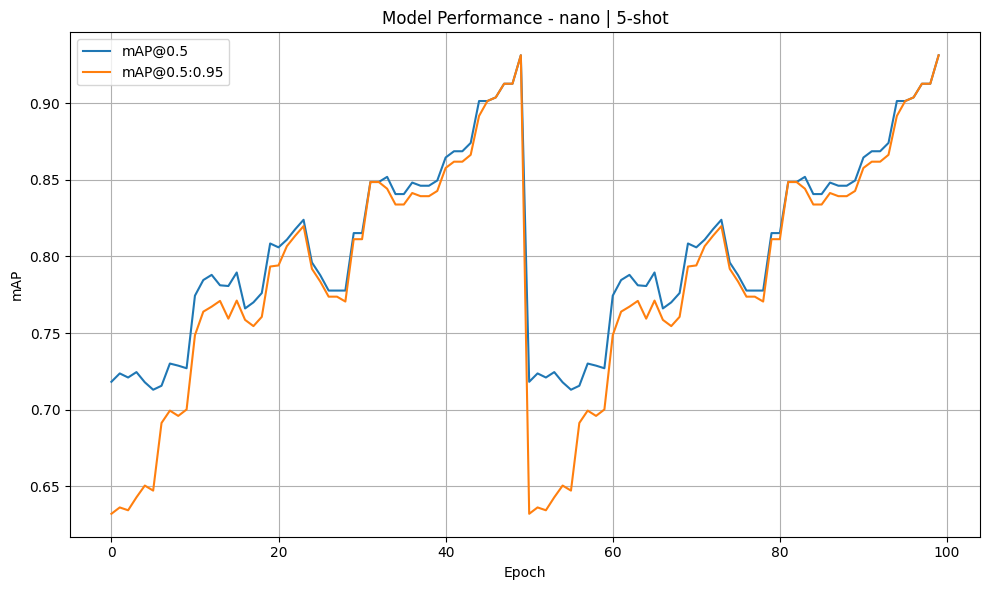

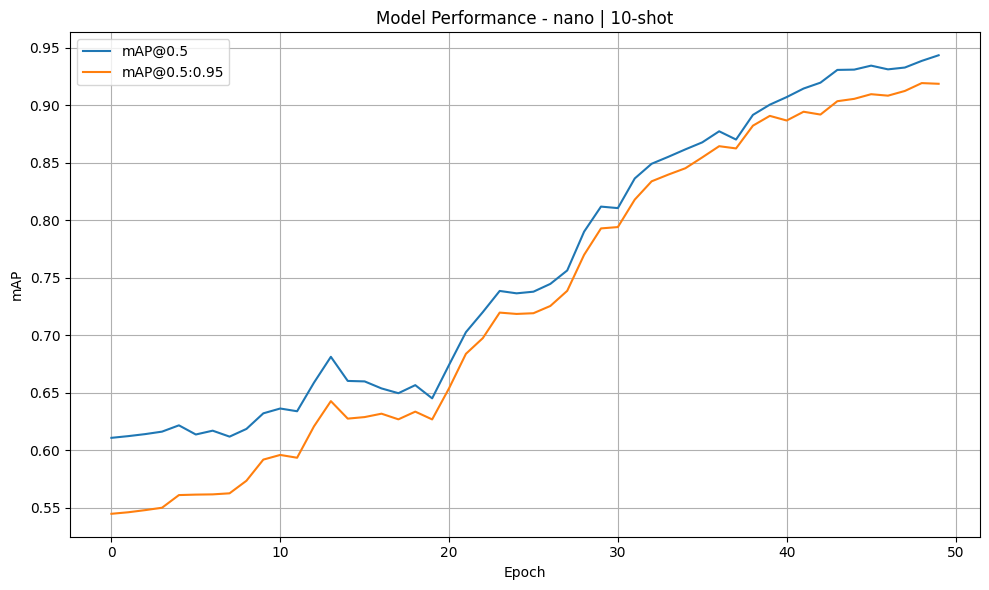

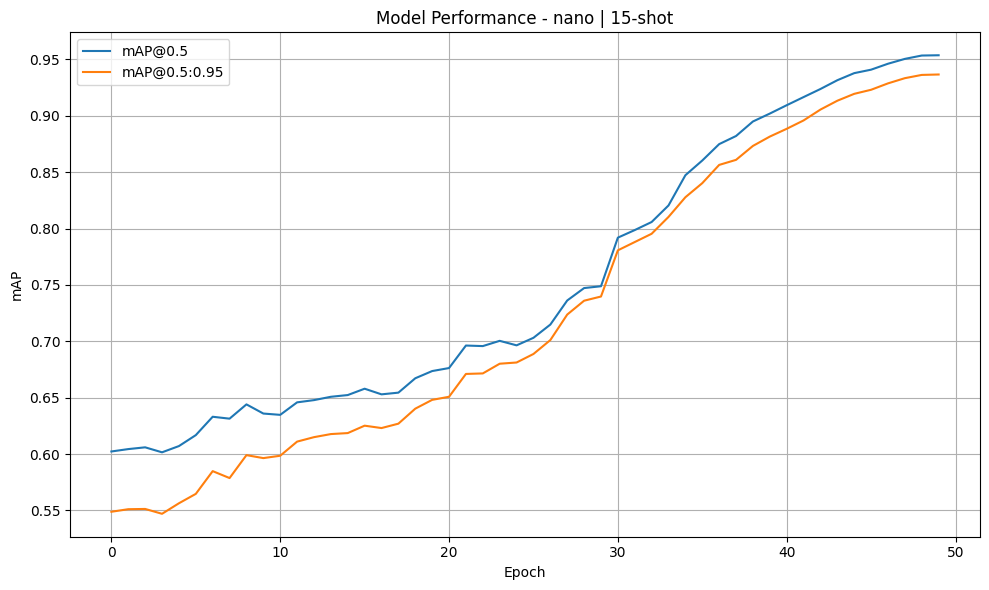

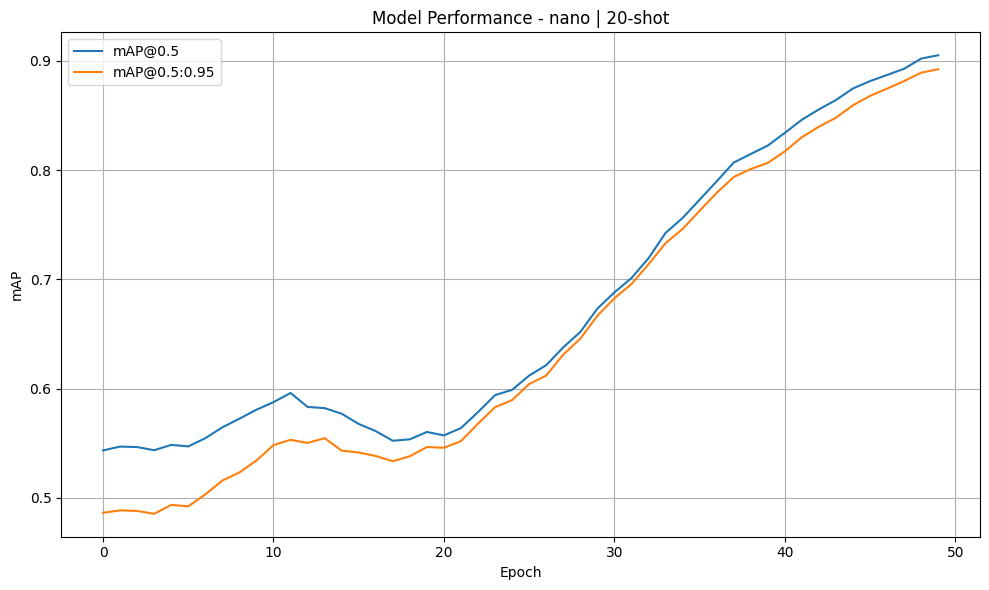

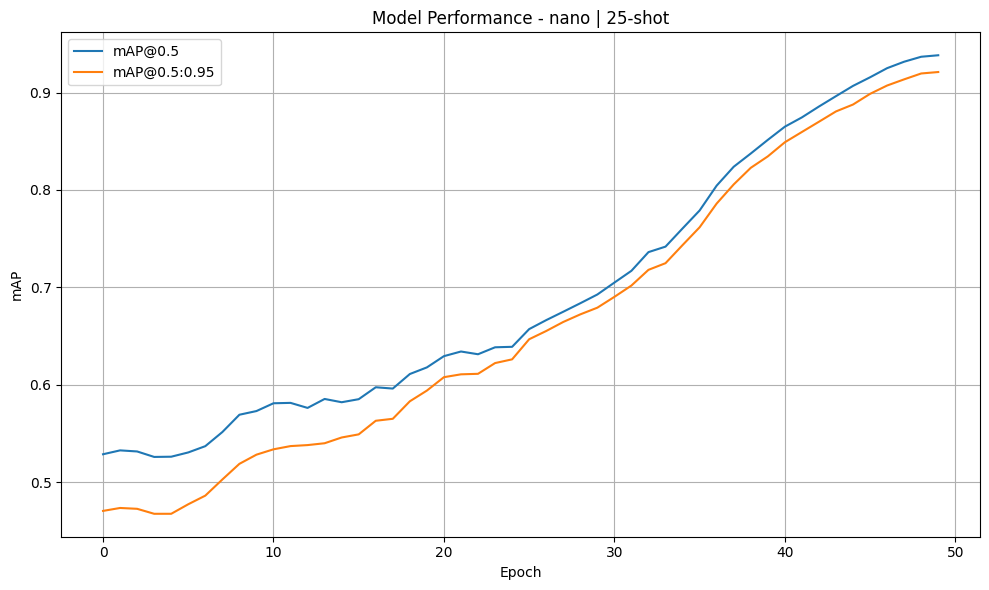

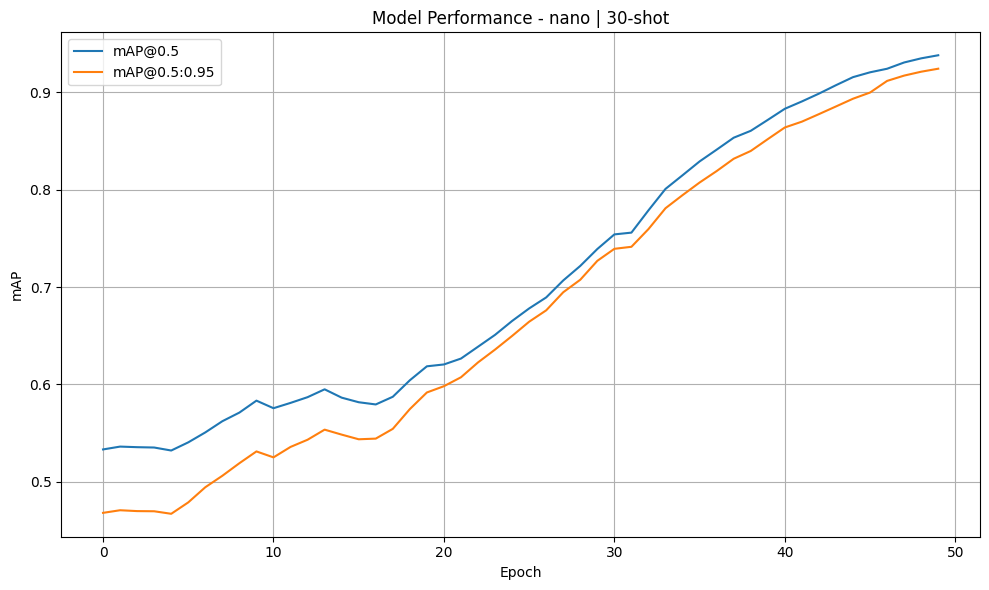

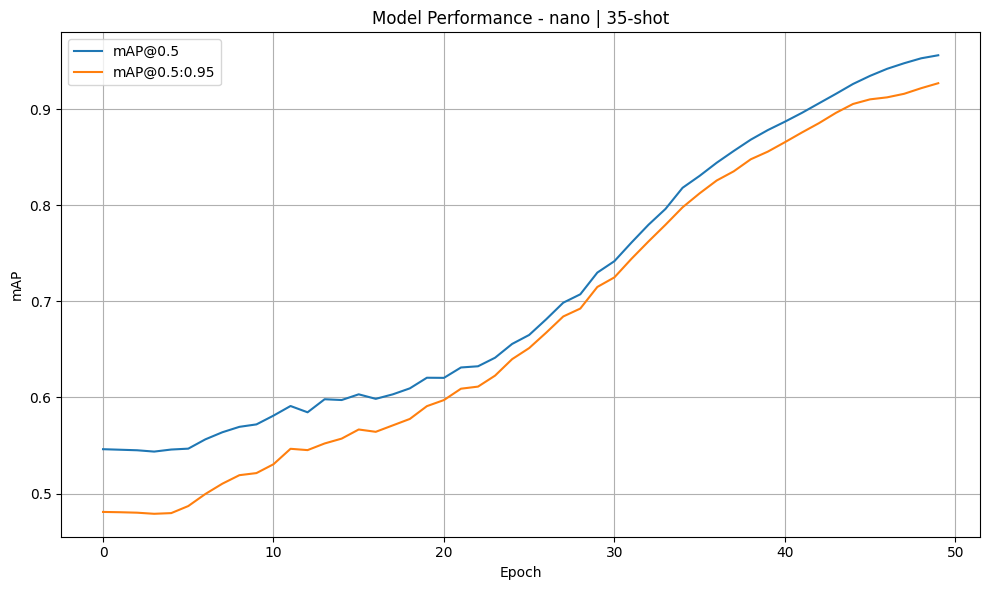

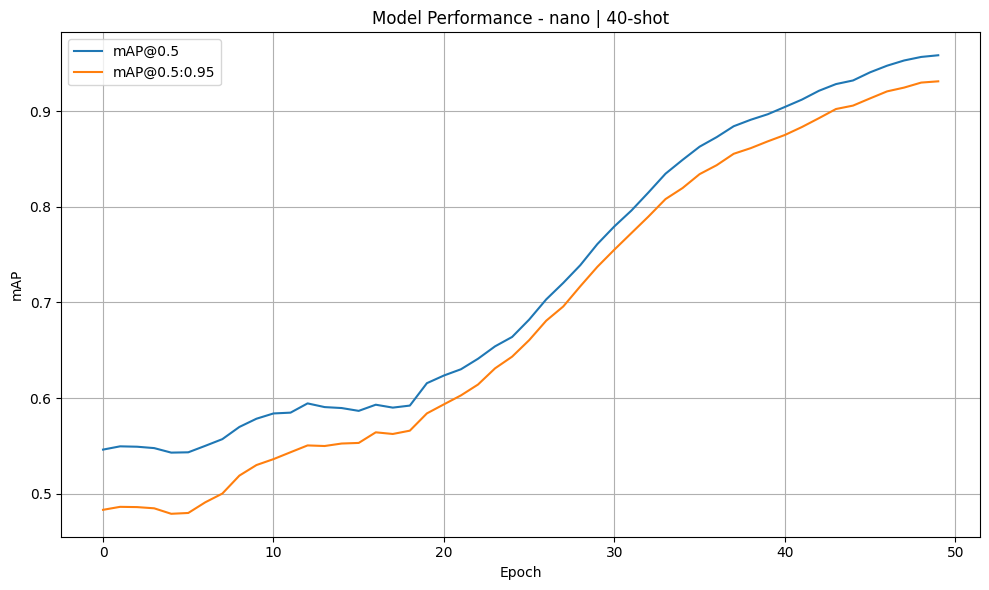

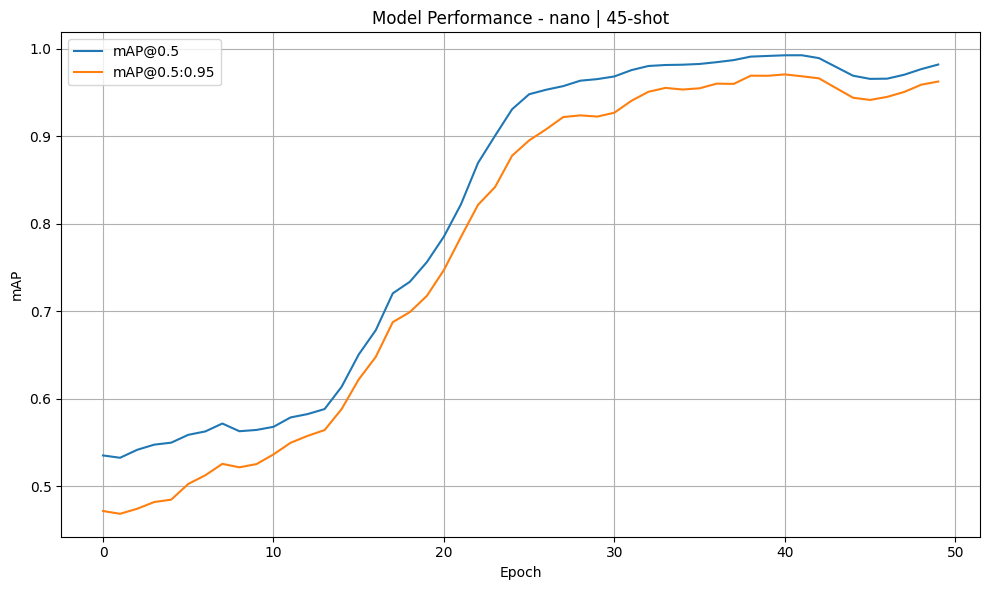

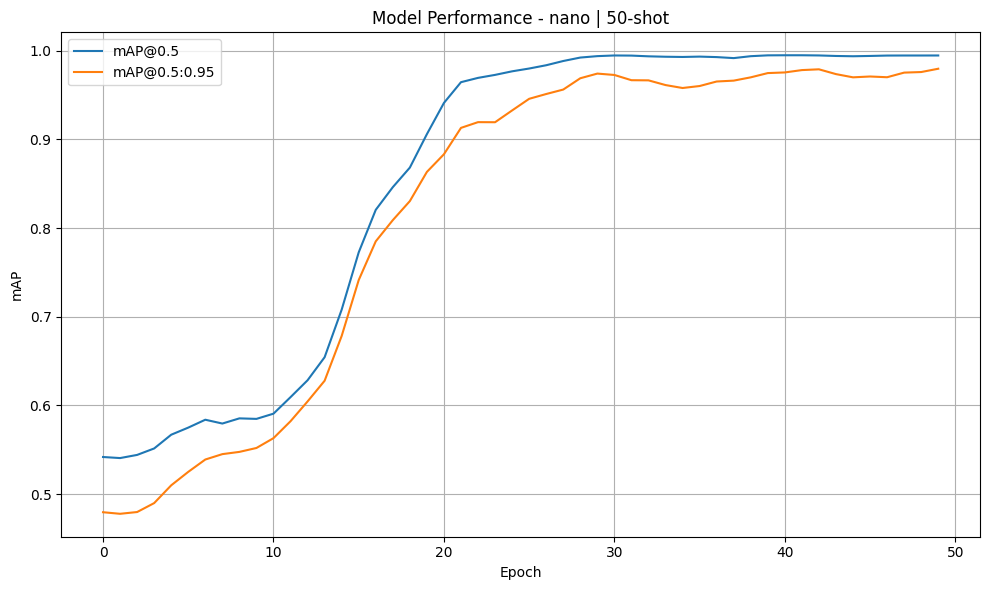

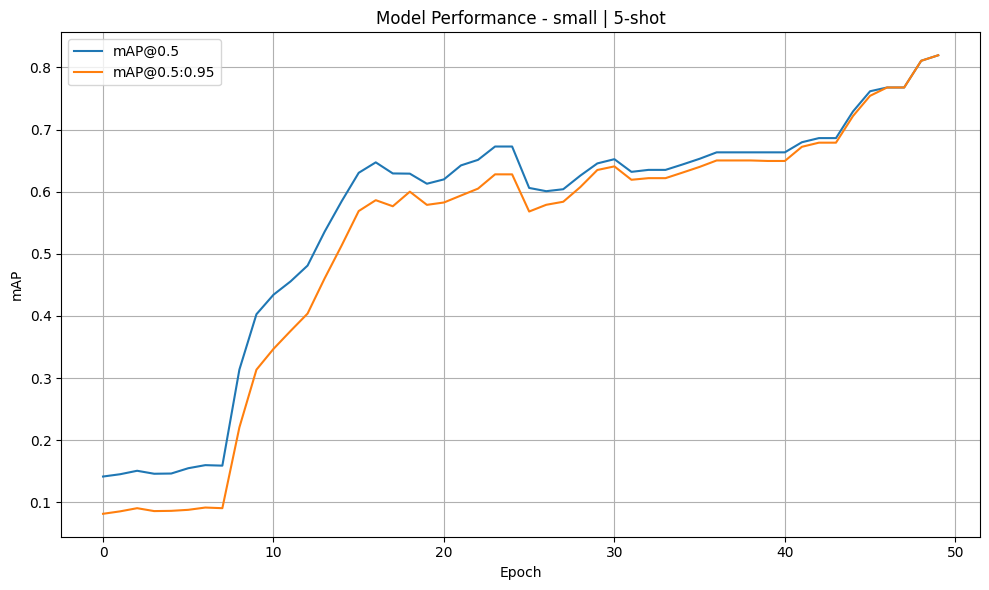

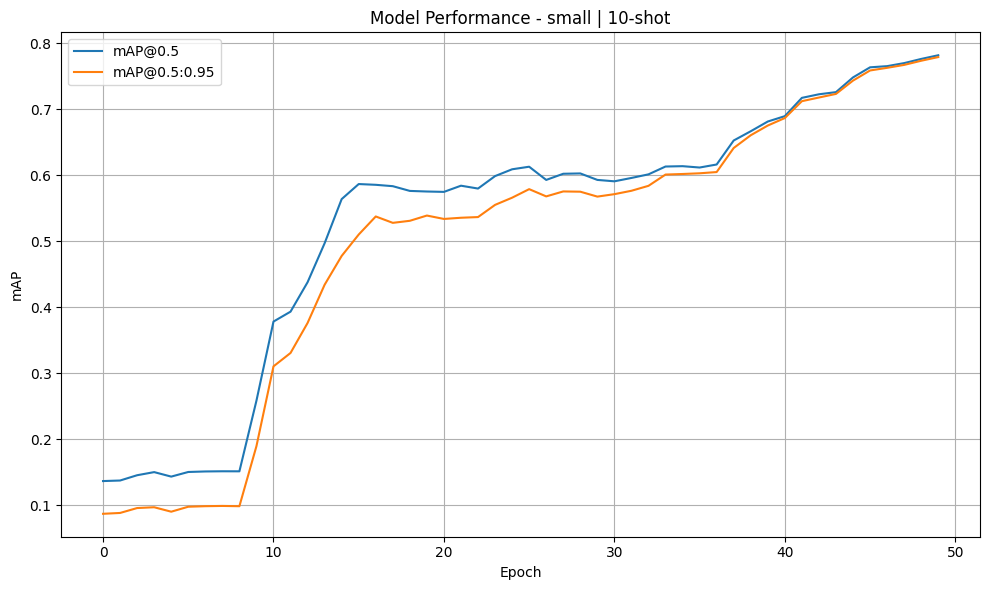

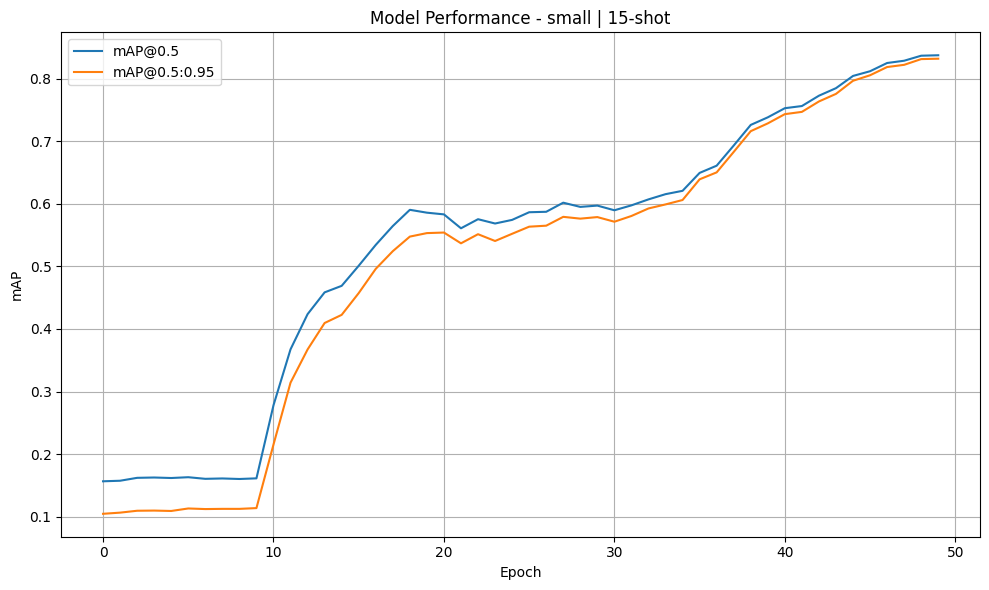

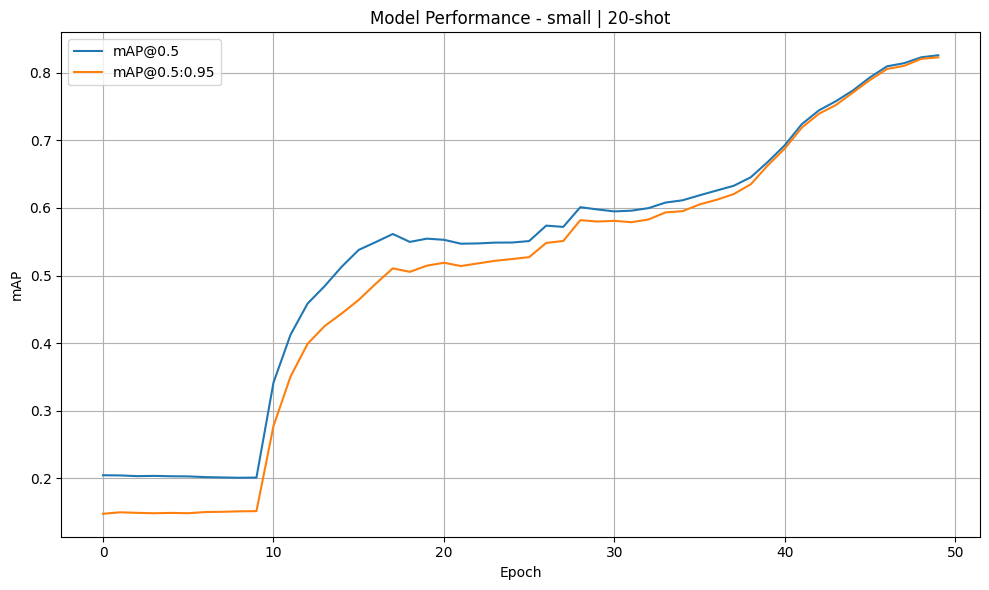

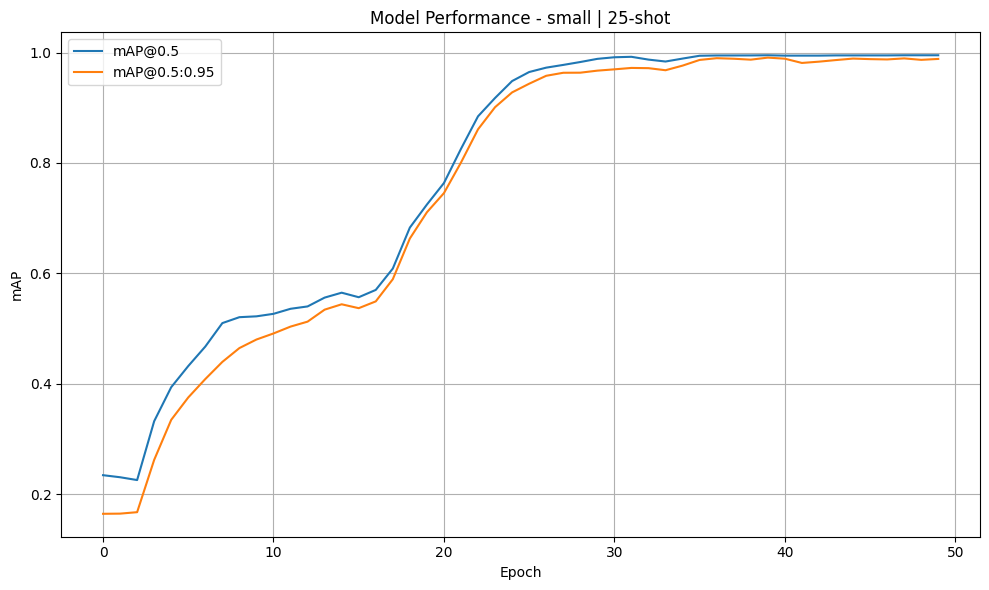

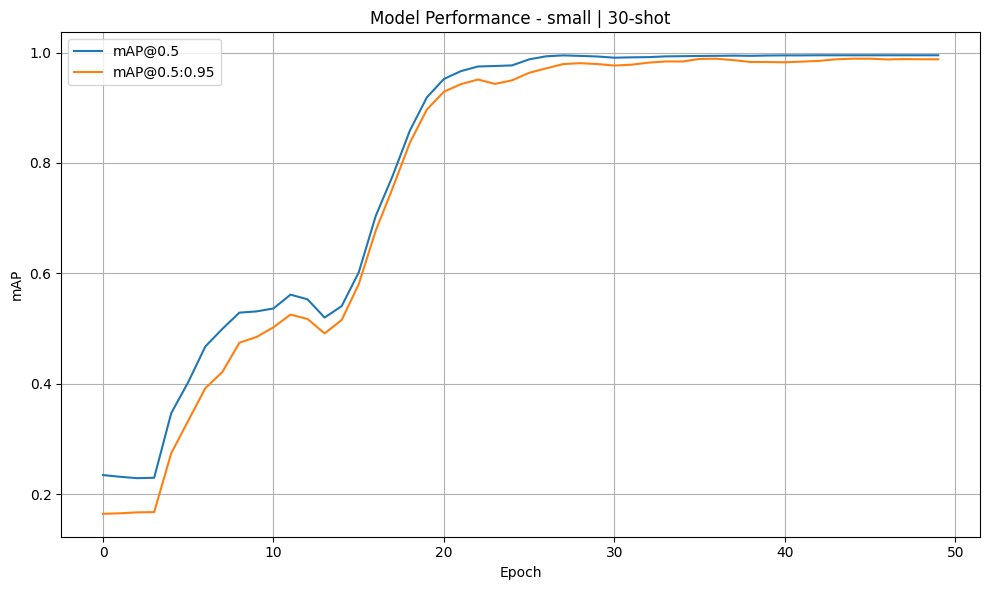

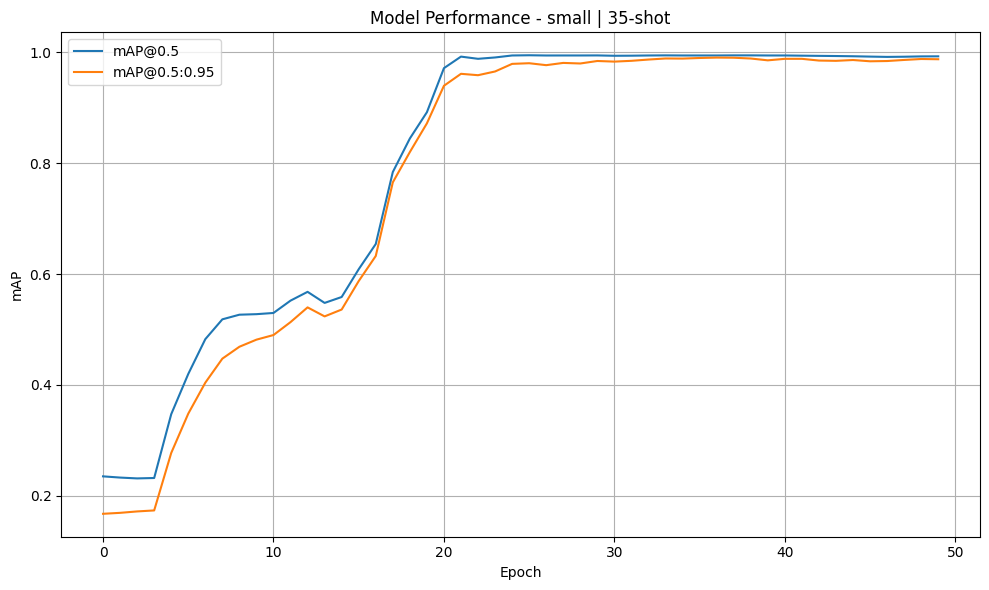

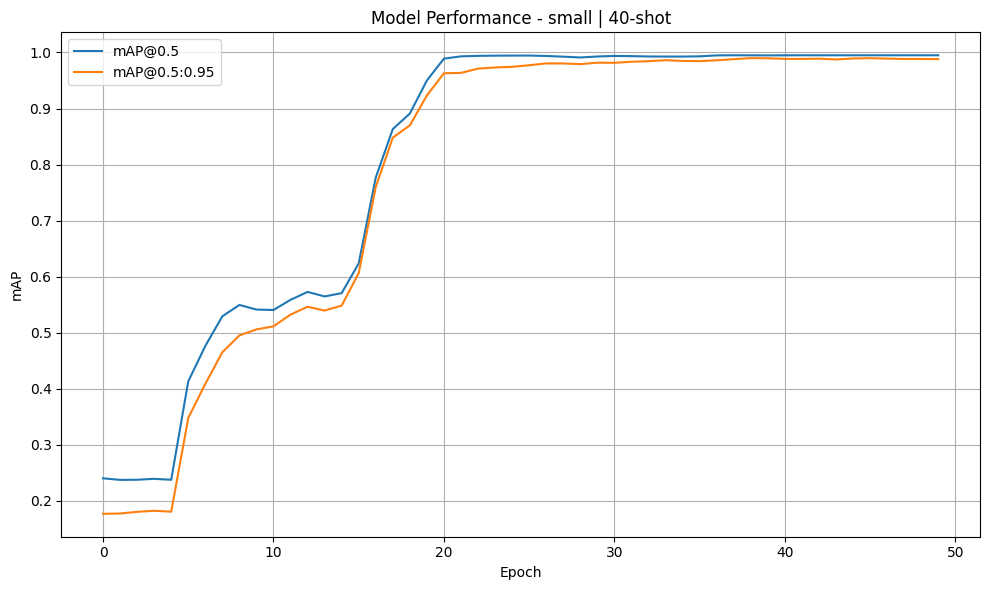

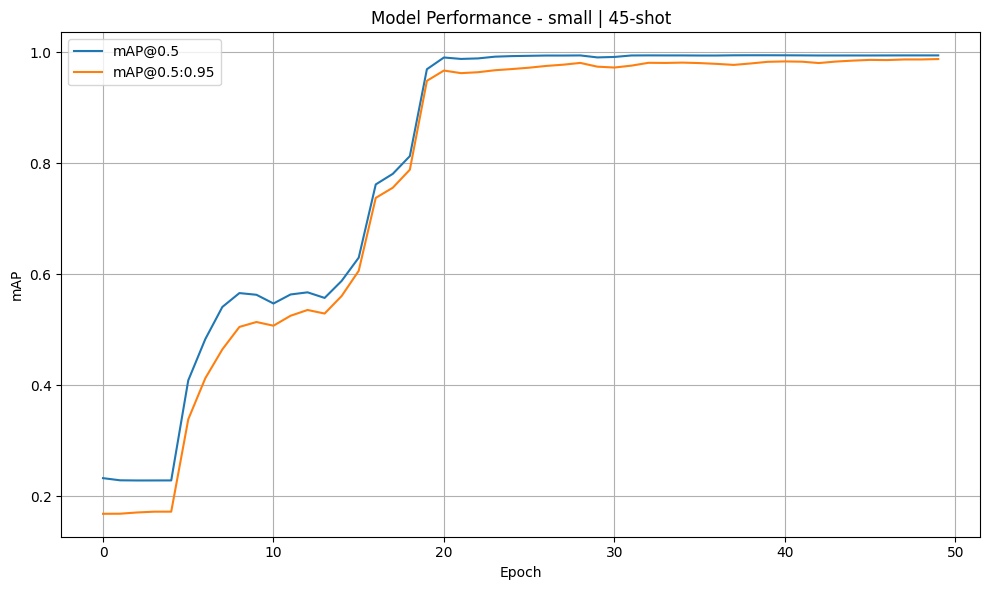

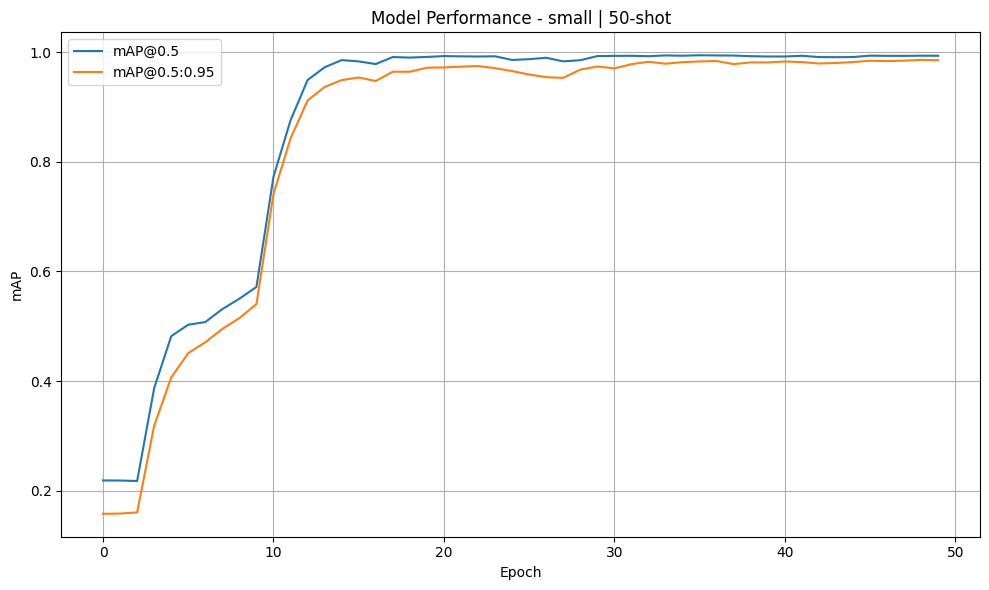

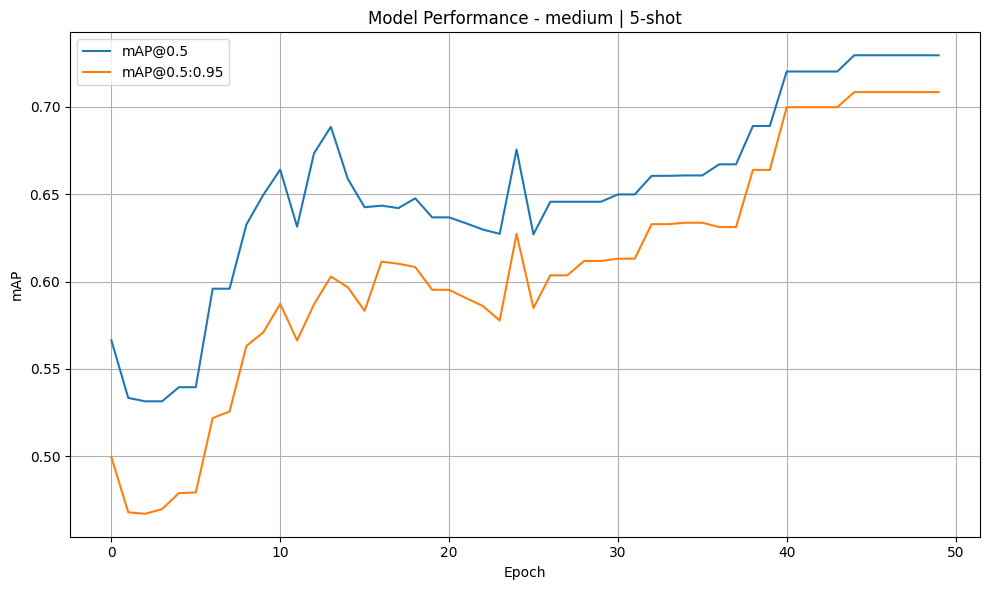

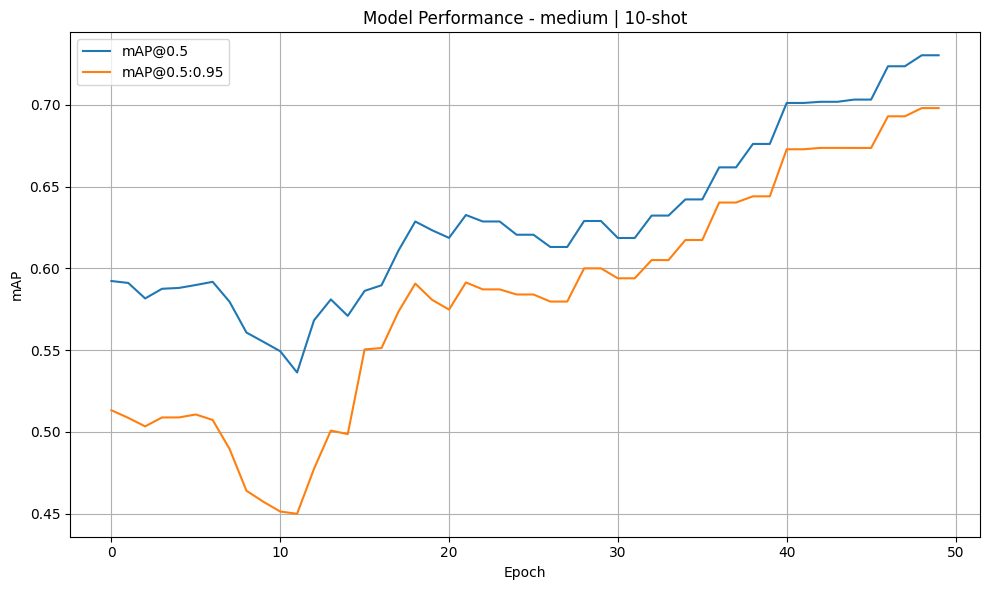

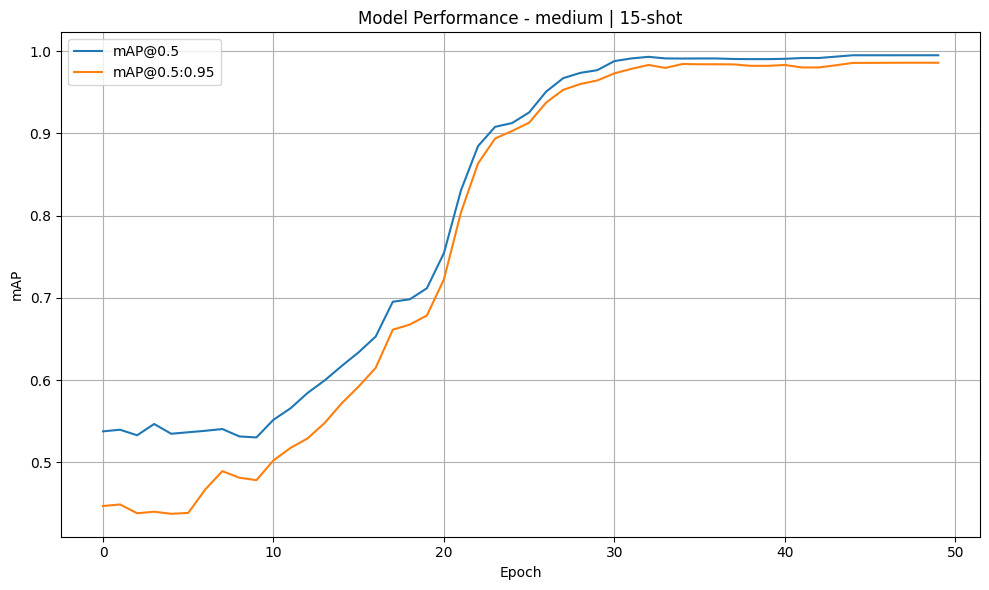

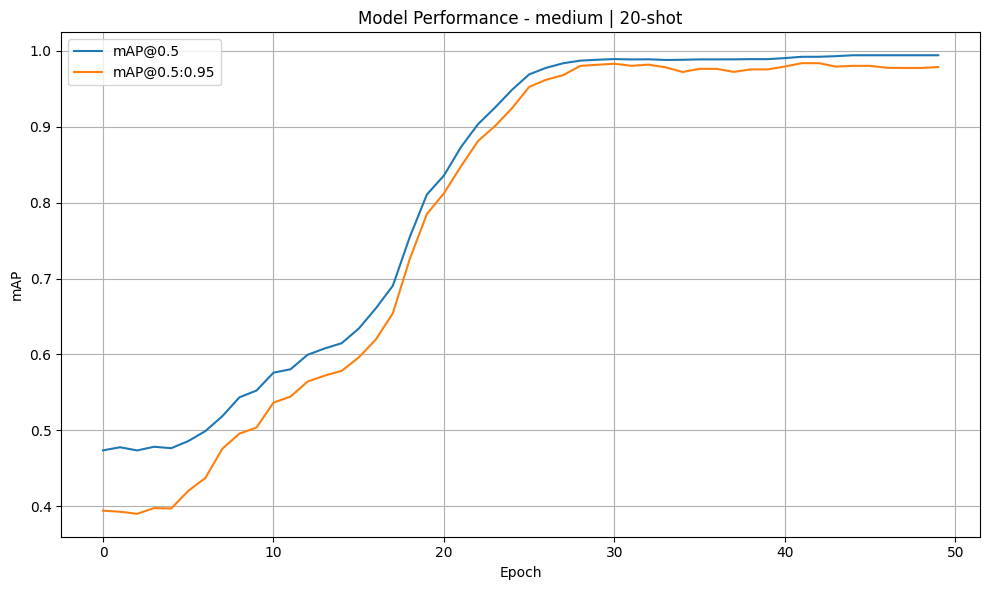

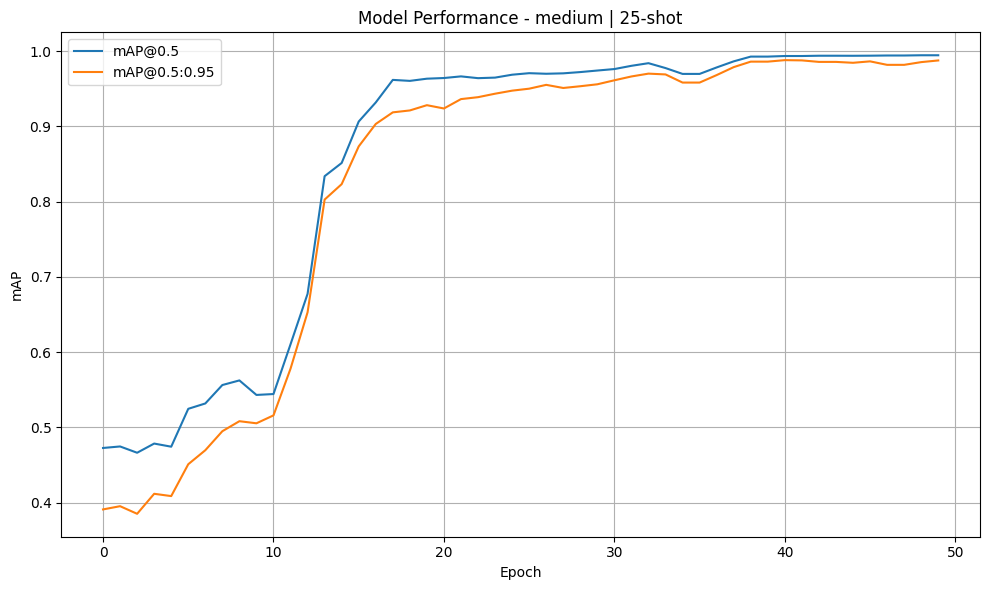

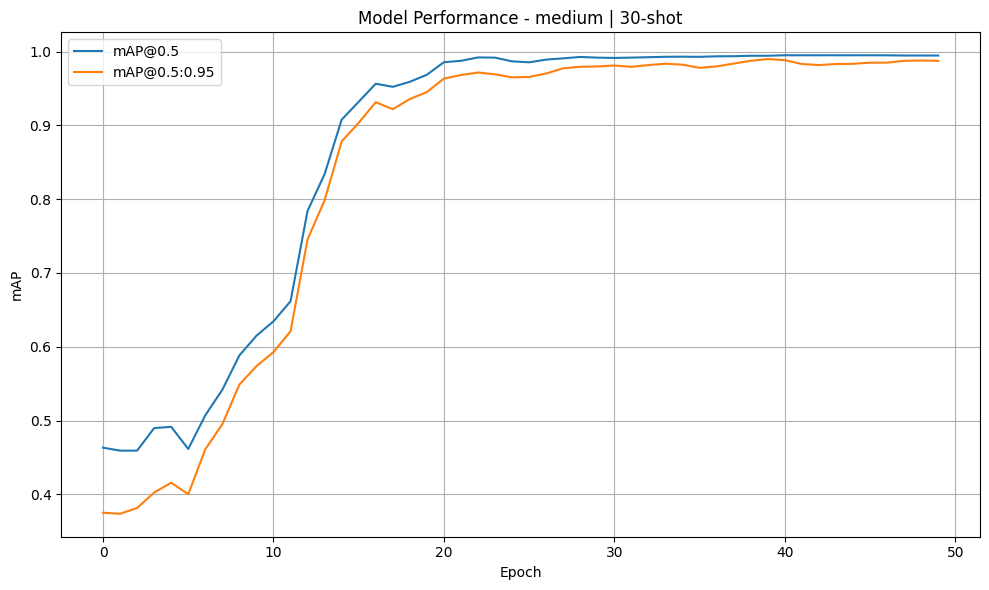

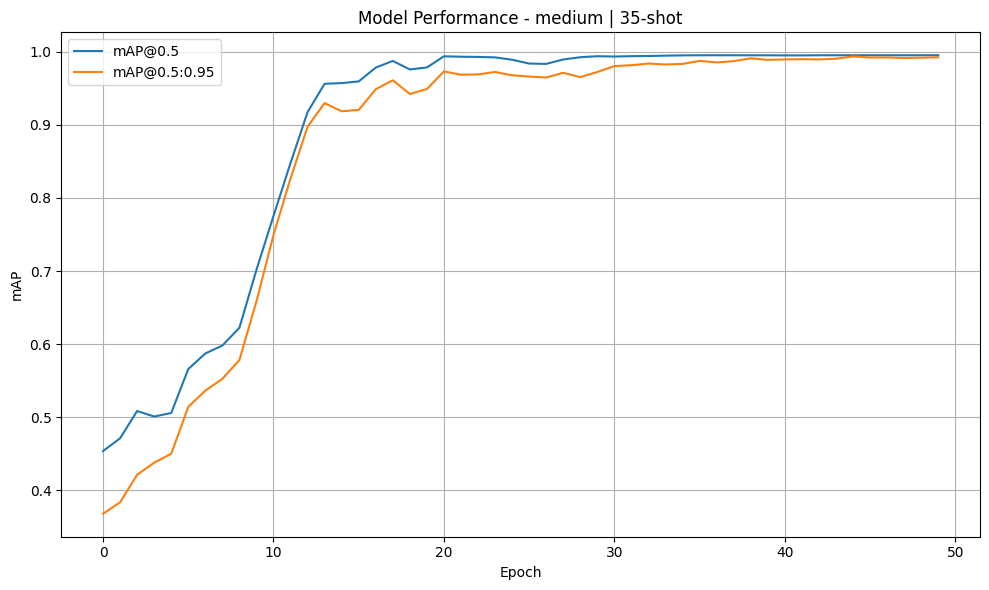

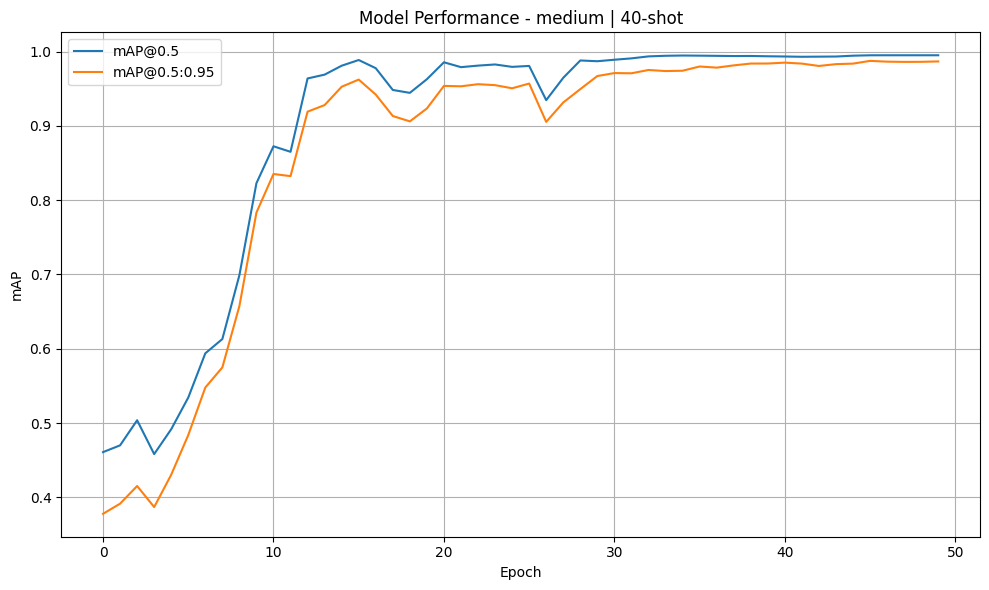

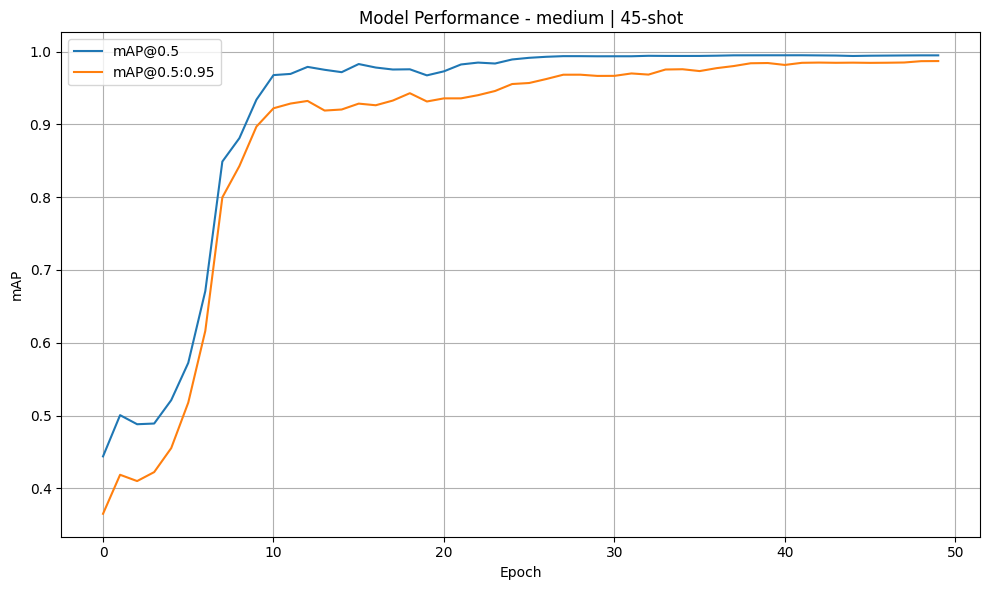

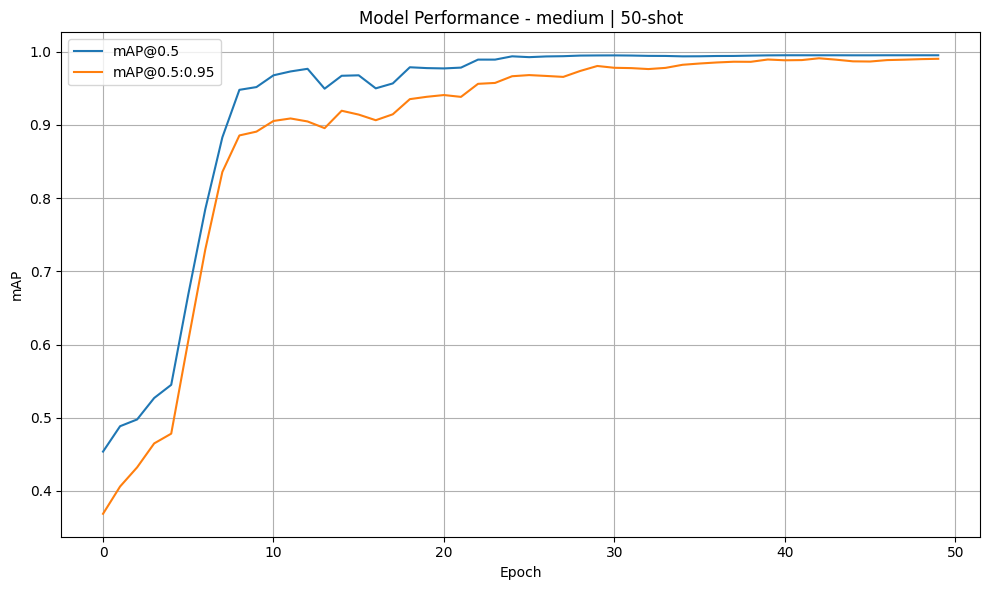

In [26]:
%matplotlib inline
for size in sizes:
    for shot in size_to_shots.get(size, shots):
        df = pd.read_csv(f"{project_base_few_shot}/training/{size}/{shot}-shot/results.csv")

        plt.figure(figsize=(10, 6))
        plt.plot(df.index, df["metrics/mAP50(B)"], label="mAP@0.5")
        plt.plot(df.index, df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95")
        plt.xlabel("Epoch")
        plt.ylabel("mAP")
        plt.title(f"Model Performance - {size} | {shot}-shot")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

        graph_output_dir = f"{project_base_few_shot}/graph/{size}"
        os.makedirs(graph_output_dir, exist_ok=True)
        plt.savefig(os.path.join(graph_output_dir, f"mAP_comparison_{shot}-shot.png"))
        plt.show()

In [16]:
if GoogleDrive:
    copy_to_google_drive("dataset/few_shot", "dataset/few_shot")
    copy_to_google_drive("results/few_shot", "results/few_shot")

## Perbandingan Beberapa k-query Set vs n-shot

In [17]:
# Path sumber dataset YOLO
image_dir = Path("dataset/object_detection/train/images")
label_dir = Path("dataset/object_detection/train/labels")

# Path target support-set
support_set_base = Path("dataset/support_set")

# Mapping class ID ke nama
class_map = {0: "frog-eye-leaf-spot", 1: "healthy", 2: "rust"}

# Buat index gambar per class berdasarkan nama file
class_to_files = defaultdict(list)
for img_file in sorted(image_dir.glob("*.jpg")):
    filename_lower = img_file.name.lower()
    if "frog-eye-leaf-spot" in filename_lower:
        cls = 0
    elif "healthy" in filename_lower:
        cls = 1
    elif "rust" in filename_lower:
        cls = 2
    else:
        continue  # Skip jika tidak dikenali

    label_file = label_dir / (img_file.stem + ".txt")
    if label_file.exists():
        class_to_files[cls].append((img_file, label_file))

# Generate support-set data
for n in [5] + list(range(10, 51, 5)):
    target_image_dir = support_set_base / f"{n}-images" / "images"
    target_label_dir = support_set_base / f"{n}-images" / "labels"
    target_image_dir.mkdir(parents=True, exist_ok=True)
    target_label_dir.mkdir(parents=True, exist_ok=True)

    for cls in class_map:
        files = class_to_files[cls][-n:]  # ambil n gambar terakhir
        for img_path, label_path in files:
            shutil.copy(img_path, target_image_dir / img_path.name)
            shutil.copy(label_path, target_label_dir / label_path.name)

# Copy data.yaml
shutil.copy("dataset/object_detection/data.yaml", "dataset/support_set/data.yaml")

'dataset/support_set/data.yaml'

In [18]:
# ======================================================
# Variabel Global
# ======================================================
sizes = ["nano", "small", "medium"]
shots = [5] + list(range(10, 51, 5))

project_base_few_shot = "results/few_shot"
support_set_base = "dataset/support_set"

# Path YAML original
data_yaml_original_path = f"{support_set_base}/data.yaml"
temp_data_yaml_dir = os.path.dirname(data_yaml_original_path)
os.makedirs(temp_data_yaml_dir, exist_ok=True)

# Folder summary
summary_dir = f"{project_base_few_shot}/support_set/summary"
os.makedirs(summary_dir, exist_ok=True)

# ======================================================
# Dictionary hasil evaluasi
# all_map50_scores[size][model_shot][test_images] = mAP
# ======================================================
all_map50_scores = {
    size: {model_shot: {} for model_shot in shots} for size in sizes
}

# ======================================================
# Loop evaluasi
# ======================================================
for size in sizes:
    for model_shot in shots:
        print(f"\n--- Evaluasi model {size} ({model_shot}-shot) ---")

        model_path = f"{project_base_few_shot}/training/{size}/{model_shot}-shot/weights/best.pt"
        model = YOLO(model_path)

        for test_images in shots:
            # 1. Load yaml asli
            with open(data_yaml_original_path, "r") as f:
                data_yaml = yaml.safe_load(f)

            # 2. Set test/val/train ke support-set test_images
            data_yaml["test"] = f"../{test_images}-images/images"
            data_yaml["val"] = f"../{test_images}-images/images"
            data_yaml["train"] = f"../{test_images}-images/images"

            # 3. Simpan yaml sementara
            temp_yaml_path = os.path.join(
                temp_data_yaml_dir,
                f"eval_{model_shot}-shot-{size}_on_{test_images}-images.yaml",
            )
            with open(temp_yaml_path, "w") as f:
                yaml.dump(data_yaml, f, sort_keys=False, default_flow_style=False)

            # 4. Validasi
            results = model.val(
                data=temp_yaml_path,
                split="test",
                imgsz=640,
                project=f"{project_base_few_shot}/support_set/{size}",
                name=f"{model_shot}-shot-{size}-on-{test_images}-images",
                exist_ok=True,
            )

            map50 = results.results_dict.get("metrics/mAP50(B)", 0.0)
            all_map50_scores[size][model_shot][test_images] = map50

            print(
                f"Model {model_shot}-shot-{size} diuji di {test_images}-images → mAP50 = {map50:.4f}"
            )

            # Hapus folder runs agar tidak menumpuk
            if os.path.exists("runs"):
                shutil.rmtree("runs")

# ======================================================
# Simpan hasil ke CSV summary per size
# ======================================================
for size in sizes:
    df = pd.DataFrame(all_map50_scores[size]).T  # model_shot sebagai index
    csv_path = os.path.join(summary_dir, f"{size}-results.csv")
    df.to_csv(csv_path, index=True)
    print(f"Hasil ringkasan {size} disimpan di {csv_path}")


--- Evaluasi model nano (5-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3409.1±1704.3 MB/s, size: 630.6 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


                   all         10         23      0.624      0.882      0.839      0.799
               healthy          5         17      0.754      0.765      0.877       0.81
                  rust          5          6      0.493          1        0.8      0.787
Speed: 0.1ms preprocess, 2.3ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to results/few_shot/support_set/nano/5-shot-nano-on-5-images
Model 5-shot-nano diuji di 5-images → mAP50 = 0.8386
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3794.1±2311.1 MB/s, size: 891.3 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]


                   all         20         57       0.58      0.694      0.663      0.628
               healthy         10         37      0.679      0.838      0.793      0.736
                  rust         10         20      0.481       0.55      0.533       0.52
Speed: 0.1ms preprocess, 23.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to results/few_shot/support_set/nano/5-shot-nano-on-10-images
Model 5-shot-nano diuji di 10-images → mAP50 = 0.6633
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1833.3±835.9 MB/s, size: 1052.1 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]


                   all         30         80      0.593      0.723      0.698      0.654
               healthy         15         54      0.695      0.815      0.808      0.736
                  rust         15         26      0.491      0.631      0.587      0.572
Speed: 1.9ms preprocess, 2.9ms inference, 0.0ms loss, 17.4ms postprocess per image
Results saved to results/few_shot/support_set/nano/5-shot-nano-on-15-images
Model 5-shot-nano diuji di 15-images → mAP50 = 0.6977
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1715.4±657.4 MB/s, size: 936.8 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]


                   all         40        104      0.611      0.753      0.712      0.675
               healthy         20         72      0.733      0.819      0.831       0.77
                  rust         20         32      0.489      0.688      0.592       0.58
Speed: 1.2ms preprocess, 16.9ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to results/few_shot/support_set/nano/5-shot-nano-on-20-images
Model 5-shot-nano diuji di 20-images → mAP50 = 0.7116
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3063.1±683.5 MB/s, size: 777.2 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]


                   all         50        131      0.622      0.764      0.722      0.686
               healthy         25         94      0.769      0.798      0.841      0.778
                  rust         25         37      0.474       0.73      0.603      0.593
Speed: 3.2ms preprocess, 25.1ms inference, 0.0ms loss, 9.3ms postprocess per image
Results saved to results/few_shot/support_set/nano/5-shot-nano-on-25-images
Model 5-shot-nano diuji di 25-images → mAP50 = 0.7217
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2290.3±773.5 MB/s, size: 1026.5 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]


                   all         60        156      0.621      0.775      0.719      0.682
               healthy         30        113      0.763      0.805      0.824      0.758
                  rust         30         43      0.478      0.744      0.615      0.606
Speed: 2.7ms preprocess, 13.2ms inference, 0.0ms loss, 9.8ms postprocess per image
Results saved to results/few_shot/support_set/nano/5-shot-nano-on-30-images
Model 5-shot-nano diuji di 30-images → mAP50 = 0.7194
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5448.0±1201.2 MB/s, size: 700.2 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.03it/s]


                   all         70        190       0.62      0.761      0.743        0.7
               healthy         35        141       0.77      0.766      0.831      0.757
                  rust         35         49       0.47      0.755      0.656      0.643
Speed: 1.2ms preprocess, 3.4ms inference, 0.0ms loss, 15.6ms postprocess per image
Results saved to results/few_shot/support_set/nano/5-shot-nano-on-35-images
Model 5-shot-nano diuji di 35-images → mAP50 = 0.7434
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4290.7±225.0 MB/s, size: 953.3 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


                   all         80        221      0.627      0.763      0.763      0.721
               healthy         40        167       0.79      0.749       0.84      0.766
                  rust         40         54      0.463      0.778      0.686      0.675
Speed: 1.0ms preprocess, 1.0ms inference, 0.0ms loss, 9.8ms postprocess per image
Results saved to results/few_shot/support_set/nano/5-shot-nano-on-40-images
Model 5-shot-nano diuji di 40-images → mAP50 = 0.7630
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3329.1±723.1 MB/s, size: 787.4 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]


                   all         90        248      0.629      0.772      0.763      0.715
               healthy         45        188      0.795      0.761      0.844      0.761
                  rust         45         60      0.463      0.783      0.683       0.67
Speed: 1.3ms preprocess, 4.1ms inference, 0.0ms loss, 9.0ms postprocess per image
Results saved to results/few_shot/support_set/nano/5-shot-nano-on-45-images
Model 5-shot-nano diuji di 45-images → mAP50 = 0.7631
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3166.4±974.2 MB/s, size: 807.3 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]


                   all        100        283      0.626      0.763      0.766      0.721
               healthy         50        216      0.795       0.75      0.843      0.764
                  rust         50         67      0.458      0.776      0.688      0.677
Speed: 1.5ms preprocess, 4.6ms inference, 0.0ms loss, 10.1ms postprocess per image
Results saved to results/few_shot/support_set/nano/5-shot-nano-on-50-images
Model 5-shot-nano diuji di 50-images → mAP50 = 0.7656

--- Evaluasi model nano (10-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3138.8±303.9 MB/s, size: 799.1 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


                   all         10         23      0.729      0.743      0.921      0.858
               healthy          5         17      0.917      0.652       0.92      0.816
                  rust          5          6       0.54      0.833      0.922      0.901
Speed: 0.1ms preprocess, 3.3ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to results/few_shot/support_set/nano/10-shot-nano-on-5-images
Model 10-shot-nano diuji di 5-images → mAP50 = 0.9210
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2738.5±1391.0 MB/s, size: 795.6 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]


                   all         20         57      0.601      0.584      0.752      0.705
               healthy         10         37      0.639      0.669      0.781       0.72
                  rust         10         20      0.563        0.5      0.722       0.69
Speed: 2.0ms preprocess, 2.3ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to results/few_shot/support_set/nano/10-shot-nano-on-10-images
Model 10-shot-nano diuji di 10-images → mAP50 = 0.7518
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5077.9±1699.6 MB/s, size: 757.2 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]


                   all         30         80      0.621      0.742      0.782      0.731
               healthy         15         54      0.711      0.833       0.81      0.731
                  rust         15         26       0.53       0.65      0.755      0.732
Speed: 0.1ms preprocess, 2.6ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to results/few_shot/support_set/nano/10-shot-nano-on-15-images
Model 10-shot-nano diuji di 15-images → mAP50 = 0.7822
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6125.6±2188.1 MB/s, size: 958.5 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]


                   all         40        104      0.682      0.661      0.801      0.759
               healthy         20         72       0.74      0.667      0.816      0.749
                  rust         20         32      0.624      0.656      0.787      0.769
Speed: 2.5ms preprocess, 8.8ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to results/few_shot/support_set/nano/10-shot-nano-on-20-images
Model 10-shot-nano diuji di 20-images → mAP50 = 0.8013
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4920.8±1536.8 MB/s, size: 1032.8 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]


                   all         50        131      0.816       0.63      0.821      0.775
               healthy         25         94      0.827      0.558       0.83      0.752
                  rust         25         37      0.806      0.703      0.812      0.798
Speed: 1.8ms preprocess, 2.1ms inference, 0.0ms loss, 9.2ms postprocess per image
Results saved to results/few_shot/support_set/nano/10-shot-nano-on-25-images
Model 10-shot-nano diuji di 25-images → mAP50 = 0.8212
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6274.8±1079.9 MB/s, size: 913.3 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]


                   all         60        156      0.687      0.697      0.808      0.762
               healthy         30        113      0.762      0.673      0.807      0.727
                  rust         30         43      0.612      0.721      0.808      0.796
Speed: 2.4ms preprocess, 1.2ms inference, 0.0ms loss, 7.4ms postprocess per image
Results saved to results/few_shot/support_set/nano/10-shot-nano-on-30-images
Model 10-shot-nano diuji di 30-images → mAP50 = 0.8078
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5205.5±1668.5 MB/s, size: 980.7 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]


                   all         70        190      0.656      0.715      0.813      0.762
               healthy         35        141      0.761      0.695      0.815      0.724
                  rust         35         49       0.55      0.735      0.812      0.801
Speed: 1.4ms preprocess, 2.7ms inference, 0.0ms loss, 21.4ms postprocess per image
Results saved to results/few_shot/support_set/nano/10-shot-nano-on-35-images
Model 10-shot-nano diuji di 35-images → mAP50 = 0.8131
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4370.4±1346.6 MB/s, size: 1012.0 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.04it/s]


                   all         80        221      0.712      0.694      0.826      0.777
               healthy         40        167      0.803      0.629      0.823      0.735
                  rust         40         54      0.621      0.759      0.829      0.819
Speed: 1.3ms preprocess, 2.1ms inference, 0.0ms loss, 11.5ms postprocess per image
Results saved to results/few_shot/support_set/nano/10-shot-nano-on-40-images
Model 10-shot-nano diuji di 40-images → mAP50 = 0.8262
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3655.7±1376.2 MB/s, size: 594.5 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.51it/s]


                   all         90        248      0.728      0.695      0.832       0.78
               healthy         45        188      0.813      0.623       0.83      0.736
                  rust         45         60      0.644      0.767      0.835      0.825
Speed: 1.4ms preprocess, 2.1ms inference, 0.0ms loss, 11.2ms postprocess per image
Results saved to results/few_shot/support_set/nano/10-shot-nano-on-45-images
Model 10-shot-nano diuji di 45-images → mAP50 = 0.8325
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4532.9±1120.8 MB/s, size: 389.2 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]


                   all        100        283      0.734      0.683      0.838      0.787
               healthy         50        216      0.829      0.605      0.839      0.745
                  rust         50         67      0.639      0.761      0.837      0.828
Speed: 0.9ms preprocess, 1.6ms inference, 0.0ms loss, 7.0ms postprocess per image
Results saved to results/few_shot/support_set/nano/10-shot-nano-on-50-images
Model 10-shot-nano diuji di 50-images → mAP50 = 0.8378

--- Evaluasi model nano (15-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4978.0±1105.0 MB/s, size: 751.9 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]


                   all         10         23          1      0.828      0.974      0.928
               healthy          5         17          1      0.672      0.954      0.882
                  rust          5          6          1      0.983      0.995      0.973
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to results/few_shot/support_set/nano/15-shot-nano-on-5-images
Model 15-shot-nano diuji di 5-images → mAP50 = 0.9743
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2713.3±383.8 MB/s, size: 701.3 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]


                   all         20         57      0.886      0.601        0.8      0.749
               healthy         10         37      0.773      0.703      0.816      0.739
                  rust         10         20          1      0.499      0.784      0.758
Speed: 0.1ms preprocess, 4.1ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to results/few_shot/support_set/nano/15-shot-nano-on-10-images
Model 15-shot-nano diuji di 10-images → mAP50 = 0.8000
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4832.2±1448.8 MB/s, size: 994.3 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]


                   all         30         80       0.88      0.649      0.818      0.764
               healthy         15         54      0.823      0.722      0.832      0.755
                  rust         15         26      0.937      0.575      0.805      0.774
Speed: 0.1ms preprocess, 3.4ms inference, 0.0ms loss, 14.4ms postprocess per image
Results saved to results/few_shot/support_set/nano/15-shot-nano-on-15-images
Model 15-shot-nano diuji di 15-images → mAP50 = 0.8184
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5335.6±1379.4 MB/s, size: 930.4 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]


                   all         40        104      0.893      0.661      0.841      0.791
               healthy         20         72      0.875      0.681      0.852       0.78
                  rust         20         32      0.911      0.641       0.83      0.802
Speed: 1.1ms preprocess, 2.5ms inference, 0.0ms loss, 18.2ms postprocess per image
Results saved to results/few_shot/support_set/nano/15-shot-nano-on-20-images
Model 15-shot-nano diuji di 20-images → mAP50 = 0.8412
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5990.0±2048.6 MB/s, size: 965.8 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]


                   all         50        131      0.884      0.674      0.844      0.796
               healthy         25         94      0.873       0.66      0.839      0.767
                  rust         25         37      0.895      0.689      0.849      0.825
Speed: 2.5ms preprocess, 1.8ms inference, 0.0ms loss, 15.7ms postprocess per image
Results saved to results/few_shot/support_set/nano/15-shot-nano-on-25-images
Model 15-shot-nano diuji di 25-images → mAP50 = 0.8439
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4429.9±1536.5 MB/s, size: 609.8 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]


                   all         60        156       0.89      0.658      0.838      0.786
               healthy         30        113       0.87      0.602      0.824      0.749
                  rust         30         43      0.911      0.714      0.852      0.823
Speed: 1.7ms preprocess, 1.6ms inference, 0.0ms loss, 16.0ms postprocess per image
Results saved to results/few_shot/support_set/nano/15-shot-nano-on-30-images
Model 15-shot-nano diuji di 30-images → mAP50 = 0.8381
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5435.4±2103.4 MB/s, size: 836.7 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]


                   all         70        190      0.888      0.653      0.841      0.784
               healthy         35        141      0.875       0.56      0.827      0.744
                  rust         35         49      0.901      0.745      0.854      0.824
Speed: 1.3ms preprocess, 1.5ms inference, 0.0ms loss, 6.7ms postprocess per image
Results saved to results/few_shot/support_set/nano/15-shot-nano-on-35-images
Model 15-shot-nano diuji di 35-images → mAP50 = 0.8407
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5802.9±685.5 MB/s, size: 831.3 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]


                   all         80        221      0.901       0.67      0.854      0.797
               healthy         40        167       0.89      0.563      0.842      0.754
                  rust         40         54      0.912      0.778      0.866      0.839
Speed: 0.4ms preprocess, 1.7ms inference, 0.0ms loss, 10.0ms postprocess per image
Results saved to results/few_shot/support_set/nano/15-shot-nano-on-40-images
Model 15-shot-nano diuji di 40-images → mAP50 = 0.8540
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6093.0±2159.9 MB/s, size: 803.8 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.00it/s]


                   all         90        248      0.906      0.671      0.854      0.795
               healthy         45        188      0.892      0.559      0.841      0.749
                  rust         45         60       0.92      0.783      0.867       0.84
Speed: 0.7ms preprocess, 2.3ms inference, 0.0ms loss, 7.9ms postprocess per image
Results saved to results/few_shot/support_set/nano/15-shot-nano-on-45-images
Model 15-shot-nano diuji di 45-images → mAP50 = 0.8540
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6514.1±1177.8 MB/s, size: 920.1 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]


                   all        100        283      0.885      0.688      0.861      0.803
               healthy         50        216      0.896      0.601      0.854      0.761
                  rust         50         67      0.873      0.776      0.869      0.845
Speed: 0.8ms preprocess, 1.7ms inference, 0.0ms loss, 10.8ms postprocess per image
Results saved to results/few_shot/support_set/nano/15-shot-nano-on-50-images
Model 15-shot-nano diuji di 50-images → mAP50 = 0.8614

--- Evaluasi model nano (20-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4147.6±1420.0 MB/s, size: 842.4 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


                   all         10         23      0.908      0.812      0.966      0.922
               healthy          5         17      0.914      0.624      0.937      0.867
                  rust          5          6      0.903          1      0.995      0.976
Speed: 0.1ms preprocess, 2.5ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to results/few_shot/support_set/nano/20-shot-nano-on-5-images
Model 20-shot-nano diuji di 5-images → mAP50 = 0.9658
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4553.7±2225.4 MB/s, size: 1068.5 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]


                   all         20         57      0.836      0.794      0.887      0.839
               healthy         10         37       0.78      0.765      0.863      0.799
                  rust         10         20      0.892      0.823      0.911       0.88
Speed: 2.4ms preprocess, 3.3ms inference, 0.0ms loss, 12.7ms postprocess per image
Results saved to results/few_shot/support_set/nano/20-shot-nano-on-10-images
Model 20-shot-nano diuji di 10-images → mAP50 = 0.8871
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3685.2±1383.3 MB/s, size: 979.4 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]


                   all         30         80      0.868      0.746      0.888      0.844
               healthy         15         54      0.833      0.645      0.845       0.79
                  rust         15         26      0.903      0.846      0.932      0.897
Speed: 0.1ms preprocess, 2.6ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to results/few_shot/support_set/nano/20-shot-nano-on-15-images
Model 20-shot-nano diuji di 15-images → mAP50 = 0.8883
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4421.0±1871.9 MB/s, size: 961.4 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]


                   all         40        104      0.865      0.744      0.897      0.844
               healthy         20         72      0.801      0.613      0.852      0.789
                  rust         20         32       0.93      0.875      0.941      0.898
Speed: 0.1ms preprocess, 7.7ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to results/few_shot/support_set/nano/20-shot-nano-on-20-images
Model 20-shot-nano diuji di 20-images → mAP50 = 0.8968
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5362.5±2478.3 MB/s, size: 821.0 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]


                   all         50        131      0.882      0.749      0.894      0.848
               healthy         25         94      0.838      0.606      0.843      0.786
                  rust         25         37      0.926      0.892      0.946       0.91
Speed: 1.8ms preprocess, 2.7ms inference, 0.0ms loss, 12.9ms postprocess per image
Results saved to results/few_shot/support_set/nano/20-shot-nano-on-25-images
Model 20-shot-nano diuji di 25-images → mAP50 = 0.8945
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3738.9±1441.5 MB/s, size: 955.5 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]


                   all         60        156      0.841       0.74      0.879       0.83
               healthy         30        113      0.799      0.597      0.823      0.759
                  rust         30         43      0.882      0.884      0.936      0.902
Speed: 2.0ms preprocess, 1.3ms inference, 0.0ms loss, 15.6ms postprocess per image
Results saved to results/few_shot/support_set/nano/20-shot-nano-on-30-images
Model 20-shot-nano diuji di 30-images → mAP50 = 0.8793
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4042.4±738.1 MB/s, size: 941.3 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.25it/s]


                   all         70        190      0.853      0.737      0.882       0.83
               healthy         35        141      0.824      0.597      0.835      0.761
                  rust         35         49      0.881      0.878       0.93      0.898
Speed: 1.4ms preprocess, 6.4ms inference, 0.0ms loss, 10.1ms postprocess per image
Results saved to results/few_shot/support_set/nano/20-shot-nano-on-35-images
Model 20-shot-nano diuji di 35-images → mAP50 = 0.8824
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4896.4±1953.1 MB/s, size: 800.2 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.50it/s]


                   all         80        221      0.863      0.747       0.89       0.84
               healthy         40        167      0.847      0.605      0.842      0.771
                  rust         40         54       0.88      0.889      0.937      0.908
Speed: 0.7ms preprocess, 1.3ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to results/few_shot/support_set/nano/20-shot-nano-on-40-images
Model 20-shot-nano diuji di 40-images → mAP50 = 0.8896
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3800.0±1760.6 MB/s, size: 620.6 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.86it/s]


                   all         90        248      0.877      0.747      0.889      0.835
               healthy         45        188      0.865      0.611      0.847      0.766
                  rust         45         60       0.89      0.883      0.931      0.904
Speed: 1.0ms preprocess, 1.3ms inference, 0.0ms loss, 8.3ms postprocess per image
Results saved to results/few_shot/support_set/nano/20-shot-nano-on-45-images
Model 20-shot-nano diuji di 45-images → mAP50 = 0.8890
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4904.4±1328.3 MB/s, size: 694.4 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]


                   all        100        283       0.88      0.753      0.897      0.844
               healthy         50        216      0.877      0.625       0.86      0.777
                  rust         50         67      0.883      0.881      0.935       0.91
Speed: 1.1ms preprocess, 1.1ms inference, 0.0ms loss, 9.4ms postprocess per image
Results saved to results/few_shot/support_set/nano/20-shot-nano-on-50-images
Model 20-shot-nano diuji di 50-images → mAP50 = 0.8974

--- Evaluasi model nano (25-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4439.4±1209.2 MB/s, size: 595.8 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]


                   all         10         23      0.966      0.877      0.975      0.925
               healthy          5         17          1      0.754      0.956      0.892
                  rust          5          6      0.932          1      0.995      0.959
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to results/few_shot/support_set/nano/25-shot-nano-on-5-images
Model 25-shot-nano diuji di 5-images → mAP50 = 0.9754
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5347.2±2156.4 MB/s, size: 1030.7 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]


                   all         20         57      0.827      0.755      0.902      0.857
               healthy         10         37      0.881      0.811      0.918      0.866
                  rust         10         20      0.774        0.7      0.885      0.847
Speed: 0.1ms preprocess, 3.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to results/few_shot/support_set/nano/25-shot-nano-on-10-images
Model 25-shot-nano diuji di 10-images → mAP50 = 0.9017
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4687.0±2506.8 MB/s, size: 992.6 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]


                   all         30         80       0.83      0.759      0.907      0.862
               healthy         15         54       0.91      0.749      0.915      0.863
                  rust         15         26       0.75      0.769        0.9      0.862
Speed: 1.2ms preprocess, 1.6ms inference, 0.0ms loss, 8.6ms postprocess per image
Results saved to results/few_shot/support_set/nano/25-shot-nano-on-15-images
Model 25-shot-nano diuji di 15-images → mAP50 = 0.9071
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4052.9±1489.9 MB/s, size: 821.4 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]


                   all         40        104      0.932       0.74      0.917       0.88
               healthy         20         72      0.963       0.73      0.923      0.879
                  rust         20         32        0.9       0.75      0.911      0.881
Speed: 2.2ms preprocess, 1.8ms inference, 0.0ms loss, 17.2ms postprocess per image
Results saved to results/few_shot/support_set/nano/25-shot-nano-on-20-images
Model 25-shot-nano diuji di 20-images → mAP50 = 0.9170
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6407.1±1391.9 MB/s, size: 781.6 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]


                   all         50        131      0.916      0.751      0.914      0.878
               healthy         25         94      0.971      0.718       0.91      0.864
                  rust         25         37      0.861      0.784      0.917      0.893
Speed: 3.2ms preprocess, 6.5ms inference, 0.0ms loss, 8.3ms postprocess per image
Results saved to results/few_shot/support_set/nano/25-shot-nano-on-25-images
Model 25-shot-nano diuji di 25-images → mAP50 = 0.9139
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5099.0±1925.0 MB/s, size: 927.3 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]


                   all         60        156      0.883      0.745      0.901      0.864
               healthy         30        113       0.94      0.699      0.885      0.834
                  rust         30         43      0.826      0.791      0.917      0.895
Speed: 1.6ms preprocess, 2.2ms inference, 0.0ms loss, 12.0ms postprocess per image
Results saved to results/few_shot/support_set/nano/25-shot-nano-on-30-images
Model 25-shot-nano diuji di 30-images → mAP50 = 0.9010
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4939.7±1265.3 MB/s, size: 806.2 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.27it/s]


                   all         70        190      0.871      0.755      0.901      0.858
               healthy         35        141      0.946      0.674       0.89      0.829
                  rust         35         49      0.797      0.837      0.912      0.888
Speed: 1.9ms preprocess, 4.2ms inference, 0.1ms loss, 10.5ms postprocess per image
Results saved to results/few_shot/support_set/nano/25-shot-nano-on-35-images
Model 25-shot-nano diuji di 35-images → mAP50 = 0.9010
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4663.9±1060.3 MB/s, size: 710.1 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]


                   all         80        221      0.862      0.751      0.908      0.865
               healthy         40        167      0.957      0.669      0.896      0.833
                  rust         40         54      0.767      0.833      0.919      0.898
Speed: 0.7ms preprocess, 3.9ms inference, 0.0ms loss, 6.9ms postprocess per image
Results saved to results/few_shot/support_set/nano/25-shot-nano-on-40-images
Model 25-shot-nano diuji di 40-images → mAP50 = 0.9078
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4027.6±1750.1 MB/s, size: 749.0 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.92it/s]


                   all         90        248      0.877      0.748      0.904      0.856
               healthy         45        188      0.954      0.663      0.894      0.819
                  rust         45         60      0.799      0.833      0.915      0.893
Speed: 0.5ms preprocess, 1.5ms inference, 0.0ms loss, 8.4ms postprocess per image
Results saved to results/few_shot/support_set/nano/25-shot-nano-on-45-images
Model 25-shot-nano diuji di 45-images → mAP50 = 0.9044
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3276.5±1414.4 MB/s, size: 632.3 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]


                   all        100        283       0.89      0.739      0.906      0.859
               healthy         50        216      0.955      0.657      0.898      0.823
                  rust         50         67      0.826      0.821      0.915      0.895
Speed: 0.7ms preprocess, 1.2ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to results/few_shot/support_set/nano/25-shot-nano-on-50-images
Model 25-shot-nano diuji di 50-images → mAP50 = 0.9064

--- Evaluasi model nano (30-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4920.0±1084.9 MB/s, size: 677.0 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


                   all         10         23      0.851      0.887      0.959      0.901
               healthy          5         17       0.97      0.941      0.975      0.898
                  rust          5          6      0.733      0.833      0.942      0.903
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to results/few_shot/support_set/nano/30-shot-nano-on-5-images
Model 30-shot-nano diuji di 5-images → mAP50 = 0.9585
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3749.6±1968.5 MB/s, size: 807.9 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]


                   all         20         57       0.77      0.744      0.882      0.832
               healthy         10         37      0.767      0.887      0.892      0.831
                  rust         10         20      0.773        0.6      0.871      0.833
Speed: 2.1ms preprocess, 1.5ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to results/few_shot/support_set/nano/30-shot-nano-on-10-images
Model 30-shot-nano diuji di 10-images → mAP50 = 0.8816
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4520.7±2567.3 MB/s, size: 674.1 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]


                   all         30         80      0.781      0.754      0.892      0.847
               healthy         15         54      0.803      0.815      0.893      0.841
                  rust         15         26      0.758      0.692       0.89      0.852
Speed: 1.6ms preprocess, 1.3ms inference, 0.0ms loss, 7.5ms postprocess per image
Results saved to results/few_shot/support_set/nano/30-shot-nano-on-15-images
Model 30-shot-nano diuji di 15-images → mAP50 = 0.8918
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5191.8±1172.2 MB/s, size: 891.6 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]


                   all         40        104      0.851      0.756      0.902      0.861
               healthy         20         72      0.848      0.772      0.898      0.848
                  rust         20         32      0.855       0.74      0.905      0.873
Speed: 1.7ms preprocess, 1.2ms inference, 0.0ms loss, 6.7ms postprocess per image
Results saved to results/few_shot/support_set/nano/30-shot-nano-on-20-images
Model 30-shot-nano diuji di 20-images → mAP50 = 0.9018
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5373.1±2266.1 MB/s, size: 957.0 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]


                   all         50        131      0.862      0.759      0.903      0.864
               healthy         25         94      0.872      0.745       0.89      0.837
                  rust         25         37      0.851      0.773      0.916       0.89
Speed: 1.8ms preprocess, 2.5ms inference, 0.0ms loss, 9.3ms postprocess per image
Results saved to results/few_shot/support_set/nano/30-shot-nano-on-25-images
Model 30-shot-nano diuji di 25-images → mAP50 = 0.9030
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5706.7±1771.5 MB/s, size: 936.4 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]


                   all         60        156      0.832      0.759      0.893      0.855
               healthy         30        113      0.856      0.737      0.876      0.822
                  rust         30         43      0.807       0.78       0.91      0.887
Speed: 1.3ms preprocess, 2.3ms inference, 0.0ms loss, 15.9ms postprocess per image
Results saved to results/few_shot/support_set/nano/30-shot-nano-on-30-images
Model 30-shot-nano diuji di 30-images → mAP50 = 0.8930
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4615.2±1902.9 MB/s, size: 863.5 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]


                   all         70        190       0.85      0.754      0.892      0.849
               healthy         35        141      0.871      0.717      0.874      0.807
                  rust         35         49      0.829       0.79       0.91       0.89
Speed: 1.9ms preprocess, 1.3ms inference, 0.0ms loss, 12.2ms postprocess per image
Results saved to results/few_shot/support_set/nano/30-shot-nano-on-35-images
Model 30-shot-nano diuji di 35-images → mAP50 = 0.8920
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5127.5±1550.7 MB/s, size: 789.4 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]


                   all         80        221      0.863      0.758      0.901      0.856
               healthy         40        167      0.897      0.713      0.884      0.814
                  rust         40         54      0.828      0.804      0.917      0.899
Speed: 0.8ms preprocess, 0.9ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to results/few_shot/support_set/nano/30-shot-nano-on-40-images
Model 30-shot-nano diuji di 40-images → mAP50 = 0.9007
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6178.1±1165.9 MB/s, size: 816.2 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.94it/s]


                   all         90        248      0.869      0.752        0.9      0.852
               healthy         45        188       0.91      0.699      0.886      0.808
                  rust         45         60      0.828      0.804      0.915      0.896
Speed: 0.8ms preprocess, 1.1ms inference, 0.0ms loss, 8.5ms postprocess per image
Results saved to results/few_shot/support_set/nano/30-shot-nano-on-45-images
Model 30-shot-nano diuji di 45-images → mAP50 = 0.9004
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4397.4±1091.0 MB/s, size: 629.8 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]


                   all        100        283      0.864      0.753      0.906      0.856
               healthy         50        216      0.911      0.711      0.896      0.812
                  rust         50         67      0.816      0.795      0.915      0.899
Speed: 0.8ms preprocess, 2.0ms inference, 0.0ms loss, 8.4ms postprocess per image
Results saved to results/few_shot/support_set/nano/30-shot-nano-on-50-images
Model 30-shot-nano diuji di 50-images → mAP50 = 0.9057

--- Evaluasi model nano (35-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3806.4±1265.7 MB/s, size: 470.3 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


                   all         10         23      0.959      0.871      0.986      0.923
               healthy          5         17          1      0.743      0.977      0.903
                  rust          5          6      0.918          1      0.995      0.943
Speed: 0.1ms preprocess, 2.7ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to results/few_shot/support_set/nano/35-shot-nano-on-5-images
Model 35-shot-nano diuji di 5-images → mAP50 = 0.9859
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3456.4±1896.9 MB/s, size: 980.7 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]


                   all         20         57      0.945      0.809      0.938       0.88
               healthy         10         37      0.891      0.882      0.938      0.872
                  rust         10         20          1      0.736      0.938      0.888
Speed: 4.0ms preprocess, 12.3ms inference, 0.0ms loss, 7.6ms postprocess per image
Results saved to results/few_shot/support_set/nano/35-shot-nano-on-10-images
Model 35-shot-nano diuji di 10-images → mAP50 = 0.9379
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5401.8±1647.6 MB/s, size: 767.9 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]


                   all         30         80      0.949       0.79      0.939      0.883
               healthy         15         54      0.936       0.81      0.931      0.866
                  rust         15         26      0.963      0.769      0.946        0.9
Speed: 2.6ms preprocess, 1.0ms inference, 0.0ms loss, 7.3ms postprocess per image
Results saved to results/few_shot/support_set/nano/35-shot-nano-on-15-images
Model 35-shot-nano diuji di 15-images → mAP50 = 0.9389
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4069.6±1646.5 MB/s, size: 616.2 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]


                   all         40        104      0.965      0.814      0.949      0.902
               healthy         20         72      0.951      0.815      0.944      0.887
                  rust         20         32      0.979      0.812      0.954      0.917
Speed: 3.1ms preprocess, 4.8ms inference, 0.0ms loss, 12.3ms postprocess per image
Results saved to results/few_shot/support_set/nano/35-shot-nano-on-20-images
Model 35-shot-nano diuji di 20-images → mAP50 = 0.9492
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5268.7±2269.5 MB/s, size: 854.5 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]


                   all         50        131      0.967      0.808      0.943      0.902
               healthy         25         94      0.948      0.778      0.928      0.876
                  rust         25         37      0.985      0.838      0.958      0.927
Speed: 2.0ms preprocess, 2.7ms inference, 0.0ms loss, 8.4ms postprocess per image
Results saved to results/few_shot/support_set/nano/35-shot-nano-on-25-images
Model 35-shot-nano diuji di 25-images → mAP50 = 0.9430
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5051.0±1363.7 MB/s, size: 507.0 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]


                   all         60        156      0.944      0.802      0.927      0.881
               healthy         30        113      0.935      0.767      0.905      0.844
                  rust         30         43      0.953      0.837      0.949      0.918
Speed: 1.9ms preprocess, 1.6ms inference, 0.0ms loss, 15.7ms postprocess per image
Results saved to results/few_shot/support_set/nano/35-shot-nano-on-30-images
Model 35-shot-nano diuji di 30-images → mAP50 = 0.9268
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3939.0±1481.6 MB/s, size: 524.6 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]


                   all         70        190      0.951      0.805      0.922       0.87
               healthy         35        141      0.948      0.773        0.9      0.828
                  rust         35         49      0.954      0.837      0.945      0.913
Speed: 1.8ms preprocess, 1.4ms inference, 0.0ms loss, 13.2ms postprocess per image
Results saved to results/few_shot/support_set/nano/35-shot-nano-on-35-images
Model 35-shot-nano diuji di 35-images → mAP50 = 0.9223
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4497.7±1881.9 MB/s, size: 634.8 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]


                   all         80        221      0.957      0.798      0.927      0.877
               healthy         40        167      0.954      0.745      0.906      0.833
                  rust         40         54      0.961      0.852      0.949       0.92
Speed: 1.0ms preprocess, 1.1ms inference, 0.0ms loss, 10.3ms postprocess per image
Results saved to results/few_shot/support_set/nano/35-shot-nano-on-40-images
Model 35-shot-nano diuji di 40-images → mAP50 = 0.9271
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5218.8±1494.8 MB/s, size: 852.1 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.16it/s]


                   all         90        248      0.948        0.8      0.926      0.871
               healthy         45        188      0.953      0.749       0.91      0.828
                  rust         45         60      0.944       0.85      0.942      0.914
Speed: 0.9ms preprocess, 1.0ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to results/few_shot/support_set/nano/35-shot-nano-on-45-images
Model 35-shot-nano diuji di 45-images → mAP50 = 0.9260
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4891.2±2035.5 MB/s, size: 812.9 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]


                   all        100        283      0.948      0.793       0.93      0.876
               healthy         50        216      0.947      0.749      0.914      0.831
                  rust         50         67      0.949      0.836      0.947      0.921
Speed: 1.2ms preprocess, 1.9ms inference, 0.0ms loss, 5.6ms postprocess per image
Results saved to results/few_shot/support_set/nano/35-shot-nano-on-50-images
Model 35-shot-nano diuji di 50-images → mAP50 = 0.9304

--- Evaluasi model nano (40-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5431.6±1245.2 MB/s, size: 903.5 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]


                   all         10         23      0.954      0.954      0.988      0.929
               healthy          5         17      0.939      0.908       0.98        0.9
                  rust          5          6      0.969          1      0.995      0.957
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to results/few_shot/support_set/nano/40-shot-nano-on-5-images
Model 40-shot-nano diuji di 5-images → mAP50 = 0.9876
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3431.1±1893.8 MB/s, size: 828.7 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]


                   all         20         57      0.925      0.831      0.935      0.888
               healthy         10         37      0.851      0.924      0.923      0.869
                  rust         10         20          1      0.737      0.947      0.907
Speed: 2.1ms preprocess, 2.4ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to results/few_shot/support_set/nano/40-shot-nano-on-10-images
Model 40-shot-nano diuji di 10-images → mAP50 = 0.9352
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3993.4±1251.2 MB/s, size: 810.7 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]


                   all         30         80      0.945      0.862      0.948      0.901
               healthy         15         54       0.89      0.926      0.937      0.884
                  rust         15         26          1      0.798      0.959      0.918
Speed: 0.1ms preprocess, 2.8ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to results/few_shot/support_set/nano/40-shot-nano-on-15-images
Model 40-shot-nano diuji di 15-images → mAP50 = 0.9479
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4305.8±1320.2 MB/s, size: 860.8 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]


                   all         40        104      0.946      0.877      0.954      0.912
               healthy         20         72      0.892      0.919      0.946      0.894
                  rust         20         32          1      0.836      0.963      0.929
Speed: 0.9ms preprocess, 2.3ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to results/few_shot/support_set/nano/40-shot-nano-on-20-images
Model 40-shot-nano diuji di 20-images → mAP50 = 0.9543
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4551.8±1717.9 MB/s, size: 624.0 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]


                   all         50        131      0.951      0.874      0.952      0.914
               healthy         25         94      0.902      0.894      0.939       0.89
                  rust         25         37          1      0.855      0.965      0.938
Speed: 1.2ms preprocess, 2.8ms inference, 0.0ms loss, 7.3ms postprocess per image
Results saved to results/few_shot/support_set/nano/40-shot-nano-on-25-images
Model 40-shot-nano diuji di 25-images → mAP50 = 0.9521
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4555.6±1456.6 MB/s, size: 537.2 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]


                   all         60        156       0.95      0.865      0.945      0.903
               healthy         30        113        0.9      0.877      0.934      0.874
                  rust         30         43          1      0.852      0.955      0.931
Speed: 1.2ms preprocess, 1.8ms inference, 0.0ms loss, 7.6ms postprocess per image
Results saved to results/few_shot/support_set/nano/40-shot-nano-on-30-images
Model 40-shot-nano diuji di 30-images → mAP50 = 0.9446
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5904.0±1831.8 MB/s, size: 1012.3 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.29it/s]


                   all         70        190      0.959      0.858      0.941      0.892
               healthy         35        141      0.917      0.864      0.932       0.86
                  rust         35         49          1      0.852       0.95      0.924
Speed: 1.3ms preprocess, 2.0ms inference, 0.0ms loss, 14.7ms postprocess per image
Results saved to results/few_shot/support_set/nano/40-shot-nano-on-35-images
Model 40-shot-nano diuji di 35-images → mAP50 = 0.9410
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3337.8±898.6 MB/s, size: 833.4 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.71it/s]


                   all         80        221      0.964       0.86      0.944      0.897
               healthy         40        167      0.928      0.855      0.935      0.864
                  rust         40         54          1      0.866      0.953       0.93
Speed: 0.6ms preprocess, 1.6ms inference, 0.0ms loss, 7.9ms postprocess per image
Results saved to results/few_shot/support_set/nano/40-shot-nano-on-40-images
Model 40-shot-nano diuji di 40-images → mAP50 = 0.9440
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5040.3±1144.8 MB/s, size: 671.3 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.07it/s]


                   all         90        248      0.968      0.856      0.943      0.893
               healthy         45        188      0.936       0.85      0.939       0.86
                  rust         45         60          1      0.862      0.948      0.926
Speed: 1.1ms preprocess, 3.3ms inference, 0.0ms loss, 5.4ms postprocess per image
Results saved to results/few_shot/support_set/nano/40-shot-nano-on-45-images
Model 40-shot-nano diuji di 45-images → mAP50 = 0.9433
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4359.9±1291.2 MB/s, size: 701.0 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]


                   all        100        283       0.97      0.854      0.947      0.898
               healthy         50        216      0.939       0.86      0.944      0.865
                  rust         50         67          1      0.847       0.95      0.931
Speed: 0.7ms preprocess, 1.5ms inference, 0.0ms loss, 7.8ms postprocess per image
Results saved to results/few_shot/support_set/nano/40-shot-nano-on-50-images
Model 40-shot-nano diuji di 50-images → mAP50 = 0.9471

--- Evaluasi model nano (45-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4160.8±1838.6 MB/s, size: 703.6 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


                   all         10         23      0.933      0.847      0.972        0.9
               healthy          5         17          1      0.861      0.989      0.864
                  rust          5          6      0.865      0.833      0.955      0.937
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to results/few_shot/support_set/nano/45-shot-nano-on-5-images
Model 45-shot-nano diuji di 5-images → mAP50 = 0.9719
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3502.2±1253.3 MB/s, size: 851.0 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]


                   all         20         57      0.958      0.904      0.974      0.895
               healthy         10         37      0.967      0.865      0.966      0.869
                  rust         10         20       0.95      0.942      0.983      0.921
Speed: 2.1ms preprocess, 2.7ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to results/few_shot/support_set/nano/45-shot-nano-on-10-images
Model 45-shot-nano diuji di 10-images → mAP50 = 0.9741
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2996.4±483.2 MB/s, size: 782.1 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]


                   all         30         80      0.969      0.901      0.978      0.906
               healthy         15         54      0.978       0.84      0.968      0.876
                  rust         15         26       0.96      0.962      0.987      0.935
Speed: 1.5ms preprocess, 1.4ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to results/few_shot/support_set/nano/45-shot-nano-on-15-images
Model 45-shot-nano diuji di 15-images → mAP50 = 0.9778
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2678.9±162.4 MB/s, size: 888.2 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]


                   all         40        104      0.976      0.903      0.977      0.917
               healthy         20         72      0.984      0.847      0.967      0.889
                  rust         20         32      0.968      0.959      0.987      0.945
Speed: 0.9ms preprocess, 2.7ms inference, 0.0ms loss, 9.5ms postprocess per image
Results saved to results/few_shot/support_set/nano/45-shot-nano-on-20-images
Model 45-shot-nano diuji di 20-images → mAP50 = 0.9772
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2272.7±933.1 MB/s, size: 782.1 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]


                   all         50        131      0.975      0.889      0.965      0.909
               healthy         25         94      0.977      0.809      0.941      0.867
                  rust         25         37      0.973       0.97      0.989      0.952
Speed: 3.3ms preprocess, 10.6ms inference, 0.0ms loss, 6.7ms postprocess per image
Results saved to results/few_shot/support_set/nano/45-shot-nano-on-25-images
Model 45-shot-nano diuji di 25-images → mAP50 = 0.9650
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4139.6±2308.3 MB/s, size: 1098.9 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]


                   all         60        156      0.979      0.886      0.968      0.912
               healthy         30        113      0.982      0.796      0.946      0.867
                  rust         30         43      0.977      0.975      0.989      0.956
Speed: 2.1ms preprocess, 3.1ms inference, 0.0ms loss, 10.0ms postprocess per image
Results saved to results/few_shot/support_set/nano/45-shot-nano-on-30-images
Model 45-shot-nano diuji di 30-images → mAP50 = 0.9679
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2290.9±1421.3 MB/s, size: 794.8 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.21it/s]


                   all         70        190      0.982      0.872      0.967      0.903
               healthy         35        141      0.984      0.766      0.945      0.849
                  rust         35         49       0.98      0.978       0.99      0.956
Speed: 2.4ms preprocess, 4.5ms inference, 0.1ms loss, 9.5ms postprocess per image
Results saved to results/few_shot/support_set/nano/45-shot-nano-on-35-images
Model 45-shot-nano diuji di 35-images → mAP50 = 0.9671
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4026.7±2340.7 MB/s, size: 968.9 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]


                   all         80        221      0.983      0.864      0.965      0.901
               healthy         40        167      0.984      0.747      0.938       0.84
                  rust         40         54      0.981       0.98      0.992      0.962
Speed: 0.9ms preprocess, 1.2ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to results/few_shot/support_set/nano/45-shot-nano-on-40-images
Model 45-shot-nano diuji di 40-images → mAP50 = 0.9652
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3433.4±2759.5 MB/s, size: 934.3 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.91it/s]


                   all         90        248       0.92      0.895      0.957      0.893
               healthy         45        188      0.934      0.823      0.933      0.835
                  rust         45         60      0.907      0.967      0.981      0.952
Speed: 0.5ms preprocess, 1.3ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to results/few_shot/support_set/nano/45-shot-nano-on-45-images
Model 45-shot-nano diuji di 45-images → mAP50 = 0.9571
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3468.1±1259.1 MB/s, size: 681.3 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]


                   all        100        283      0.922      0.893      0.954      0.891
               healthy         50        216      0.932      0.831      0.934      0.834
                  rust         50         67      0.912      0.955      0.974      0.949
Speed: 0.8ms preprocess, 1.1ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to results/few_shot/support_set/nano/45-shot-nano-on-50-images
Model 45-shot-nano diuji di 50-images → mAP50 = 0.9543

--- Evaluasi model nano (50-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3879.2±1168.6 MB/s, size: 771.7 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]


                   all         10         23      0.937      0.962      0.977      0.913
               healthy          5         17      0.873      0.941      0.958      0.883
                  rust          5          6          1      0.984      0.995      0.943
Speed: 0.1ms preprocess, 2.3ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to results/few_shot/support_set/nano/50-shot-nano-on-5-images
Model 50-shot-nano diuji di 5-images → mAP50 = 0.9766
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2901.6±305.8 MB/s, size: 769.8 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]


                   all         20         57      0.959      0.894      0.968      0.901
               healthy         10         37      0.936      0.838      0.944      0.882
                  rust         10         20      0.982       0.95      0.993       0.92
Speed: 2.0ms preprocess, 1.5ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to results/few_shot/support_set/nano/50-shot-nano-on-10-images
Model 50-shot-nano diuji di 10-images → mAP50 = 0.9683
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4254.9±2760.4 MB/s, size: 695.1 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]


                   all         30         80      0.943       0.94       0.97      0.911
               healthy         15         54      0.924      0.902      0.946      0.886
                  rust         15         26      0.962      0.979      0.994      0.935
Speed: 0.1ms preprocess, 3.1ms inference, 0.0ms loss, 12.0ms postprocess per image
Results saved to results/few_shot/support_set/nano/50-shot-nano-on-15-images
Model 50-shot-nano diuji di 15-images → mAP50 = 0.9697
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5118.5±2895.2 MB/s, size: 1006.2 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]


                   all         40        104      0.936      0.944      0.975       0.92
               healthy         20         72      0.903      0.905      0.957      0.907
                  rust         20         32      0.969      0.984      0.994      0.933
Speed: 0.9ms preprocess, 2.8ms inference, 0.0ms loss, 8.3ms postprocess per image
Results saved to results/few_shot/support_set/nano/50-shot-nano-on-20-images
Model 50-shot-nano diuji di 20-images → mAP50 = 0.9754
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4431.7±1426.9 MB/s, size: 667.9 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]


                   all         50        131      0.926      0.942      0.973      0.923
               healthy         25         94      0.904      0.899      0.953      0.904
                  rust         25         37      0.948      0.984      0.992      0.942
Speed: 2.0ms preprocess, 2.8ms inference, 0.0ms loss, 13.5ms postprocess per image
Results saved to results/few_shot/support_set/nano/50-shot-nano-on-25-images
Model 50-shot-nano diuji di 25-images → mAP50 = 0.9729
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3373.6±781.8 MB/s, size: 915.6 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]


                   all         60        156      0.917      0.926      0.972      0.921
               healthy         30        113       0.88      0.885      0.952      0.896
                  rust         30         43      0.954      0.967      0.992      0.946
Speed: 0.7ms preprocess, 2.4ms inference, 0.0ms loss, 6.8ms postprocess per image
Results saved to results/few_shot/support_set/nano/50-shot-nano-on-30-images
Model 50-shot-nano diuji di 30-images → mAP50 = 0.9720
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3030.2±181.7 MB/s, size: 1010.6 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.08it/s]


                   all         70        190      0.928      0.919      0.967      0.913
               healthy         35        141      0.897      0.862      0.941      0.875
                  rust         35         49       0.96      0.976      0.993      0.951
Speed: 1.4ms preprocess, 2.4ms inference, 0.0ms loss, 15.5ms postprocess per image
Results saved to results/few_shot/support_set/nano/50-shot-nano-on-35-images
Model 50-shot-nano diuji di 35-images → mAP50 = 0.9669
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2509.0±177.4 MB/s, size: 1064.0 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]


                   all         80        221      0.929      0.915      0.967      0.915
               healthy         40        167      0.894      0.856       0.94      0.872
                  rust         40         54      0.963      0.974      0.993      0.957
Speed: 1.1ms preprocess, 1.1ms inference, 0.0ms loss, 9.2ms postprocess per image
Results saved to results/few_shot/support_set/nano/50-shot-nano-on-40-images
Model 50-shot-nano diuji di 40-images → mAP50 = 0.9666
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4990.8±2681.3 MB/s, size: 957.6 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.19it/s]


                   all         90        248      0.926      0.916      0.965      0.912
               healthy         45        188      0.901      0.869      0.938      0.867
                  rust         45         60      0.951      0.962      0.992      0.957
Speed: 0.8ms preprocess, 3.2ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to results/few_shot/support_set/nano/50-shot-nano-on-45-images
Model 50-shot-nano diuji di 45-images → mAP50 = 0.9649
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3409.3±916.8 MB/s, size: 873.4 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]


                   all        100        283      0.932      0.915      0.966      0.914
               healthy         50        216      0.908      0.863       0.94       0.87
                  rust         50         67      0.956      0.966      0.993      0.959
Speed: 0.8ms preprocess, 1.1ms inference, 0.0ms loss, 6.5ms postprocess per image
Results saved to results/few_shot/support_set/nano/50-shot-nano-on-50-images
Model 50-shot-nano diuji di 50-images → mAP50 = 0.9661

--- Evaluasi model small (5-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5049.9±627.3 MB/s, size: 506.9 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


                   all         10         23      0.628      0.893      0.732      0.681
               healthy          5         17      0.844      0.953       0.95      0.859
                  rust          5          6      0.412      0.833      0.513      0.503
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to results/few_shot/support_set/small/5-shot-small-on-5-images
Model 5-shot-small diuji di 5-images → mAP50 = 0.7315
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4305.5±2001.7 MB/s, size: 692.0 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]


                   all         20         57      0.523      0.823      0.647        0.6
               healthy         10         37       0.58      0.946      0.794      0.731
                  rust         10         20      0.466        0.7        0.5      0.469
Speed: 0.1ms preprocess, 7.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to results/few_shot/support_set/small/5-shot-small-on-10-images
Model 5-shot-small diuji di 10-images → mAP50 = 0.6468
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3038.1±246.3 MB/s, size: 884.5 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]


                   all         30         80      0.547      0.838      0.636      0.591
               healthy         15         54      0.654      0.944       0.83      0.766
                  rust         15         26      0.441      0.731      0.441      0.417
Speed: 1.4ms preprocess, 1.7ms inference, 0.0ms loss, 10.1ms postprocess per image
Results saved to results/few_shot/support_set/small/5-shot-small-on-15-images
Model 5-shot-small diuji di 15-images → mAP50 = 0.6357
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2189.0±692.3 MB/s, size: 1056.0 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]


                   all         40        104      0.566      0.794       0.66      0.619
               healthy         20         72      0.712      0.931      0.861      0.801
                  rust         20         32       0.42      0.658      0.459      0.436
Speed: 2.0ms preprocess, 11.0ms inference, 0.0ms loss, 6.0ms postprocess per image
Results saved to results/few_shot/support_set/small/5-shot-small-on-20-images
Model 5-shot-small diuji di 20-images → mAP50 = 0.6603
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2786.0±1312.8 MB/s, size: 835.8 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]


                   all         50        131      0.577      0.805      0.672      0.636
               healthy         25         94      0.745      0.936      0.882      0.829
                  rust         25         37      0.409      0.673      0.462      0.444
Speed: 1.0ms preprocess, 19.4ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to results/few_shot/support_set/small/5-shot-small-on-25-images
Model 5-shot-small diuji di 25-images → mAP50 = 0.6720
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4240.5±2111.0 MB/s, size: 835.0 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]


                   all         60        156      0.581      0.781      0.669      0.631
               healthy         30        113      0.769      0.929      0.892      0.831
                  rust         30         43      0.393      0.633      0.445       0.43
Speed: 1.5ms preprocess, 8.2ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to results/few_shot/support_set/small/5-shot-small-on-30-images
Model 5-shot-small diuji di 30-images → mAP50 = 0.6686
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2904.4±259.7 MB/s, size: 637.0 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]


                   all         70        190       0.59      0.783       0.68      0.638
               healthy         35        141      0.772      0.913      0.885      0.816
                  rust         35         49      0.407      0.653      0.474       0.46
Speed: 1.5ms preprocess, 2.1ms inference, 0.0ms loss, 15.2ms postprocess per image
Results saved to results/few_shot/support_set/small/5-shot-small-on-35-images
Model 5-shot-small diuji di 35-images → mAP50 = 0.6796
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3690.5±1205.9 MB/s, size: 714.8 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]


                   all         80        221      0.592      0.782      0.677      0.637
               healthy         40        167      0.784      0.898      0.889      0.821
                  rust         40         54      0.401      0.667      0.466      0.452
Speed: 0.6ms preprocess, 1.6ms inference, 0.0ms loss, 9.8ms postprocess per image
Results saved to results/few_shot/support_set/small/5-shot-small-on-40-images
Model 5-shot-small diuji di 40-images → mAP50 = 0.6774
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5204.8±2421.3 MB/s, size: 914.1 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.01it/s]


                   all         90        248      0.595       0.78      0.675      0.635
               healthy         45        188      0.785      0.893      0.878      0.811
                  rust         45         60      0.406      0.667      0.472      0.458
Speed: 0.9ms preprocess, 1.0ms inference, 0.0ms loss, 8.6ms postprocess per image
Results saved to results/few_shot/support_set/small/5-shot-small-on-45-images
Model 5-shot-small diuji di 45-images → mAP50 = 0.6749
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5028.8±2046.5 MB/s, size: 1061.1 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]


                   all        100        283      0.595      0.776      0.686      0.643
               healthy         50        216      0.795      0.881      0.885      0.814
                  rust         50         67      0.394      0.672      0.486      0.472
Speed: 1.1ms preprocess, 1.2ms inference, 0.1ms loss, 8.7ms postprocess per image
Results saved to results/few_shot/support_set/small/5-shot-small-on-50-images
Model 5-shot-small diuji di 50-images → mAP50 = 0.6855

--- Evaluasi model small (10-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5989.0±775.1 MB/s, size: 792.4 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]


                   all         10         23      0.555      0.887      0.792      0.757
               healthy          5         17       0.71      0.941       0.89      0.821
                  rust          5          6        0.4      0.833      0.694      0.694
Speed: 0.2ms preprocess, 1.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to results/few_shot/support_set/small/10-shot-small-on-5-images
Model 10-shot-small diuji di 5-images → mAP50 = 0.7920
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4143.8±2558.7 MB/s, size: 1037.0 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]


                   all         20         57      0.553      0.874      0.632      0.609
               healthy         10         37      0.589      0.946      0.686       0.65
                  rust         10         20      0.517      0.802      0.579      0.567
Speed: 2.0ms preprocess, 2.4ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to results/few_shot/support_set/small/10-shot-small-on-10-images
Model 10-shot-small diuji di 10-images → mAP50 = 0.6324
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3965.9±1914.4 MB/s, size: 875.4 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]


                   all         30         80      0.543       0.85      0.613      0.589
               healthy         15         54      0.632      0.963      0.734      0.695
                  rust         15         26      0.454      0.737      0.492      0.483
Speed: 1.1ms preprocess, 1.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to results/few_shot/support_set/small/10-shot-small-on-15-images
Model 10-shot-small diuji di 15-images → mAP50 = 0.6131
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3464.1±832.9 MB/s, size: 949.6 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]


                   all         40        104      0.543      0.852      0.648       0.62
               healthy         20         72      0.651      0.958      0.792      0.743
                  rust         20         32      0.435      0.746      0.504      0.497
Speed: 0.7ms preprocess, 2.5ms inference, 0.0ms loss, 6.5ms postprocess per image
Results saved to results/few_shot/support_set/small/10-shot-small-on-20-images
Model 10-shot-small diuji di 20-images → mAP50 = 0.6480
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4133.0±2312.1 MB/s, size: 931.1 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]


                   all         50        131       0.56       0.87      0.655      0.631
               healthy         25         94      0.691      0.968      0.812      0.769
                  rust         25         37      0.429      0.771      0.498      0.493
Speed: 1.1ms preprocess, 2.6ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to results/few_shot/support_set/small/10-shot-small-on-25-images
Model 10-shot-small diuji di 25-images → mAP50 = 0.6549
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2855.4±202.4 MB/s, size: 752.4 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]


                   all         60        156      0.561      0.865      0.646      0.621
               healthy         30        113      0.695      0.947      0.816      0.771
                  rust         30         43      0.428      0.783      0.477      0.471
Speed: 2.2ms preprocess, 1.5ms inference, 0.1ms loss, 9.9ms postprocess per image
Results saved to results/few_shot/support_set/small/10-shot-small-on-30-images
Model 10-shot-small diuji di 30-images → mAP50 = 0.6465
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2531.0±1716.7 MB/s, size: 866.0 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.17it/s]


                   all         70        190      0.567      0.851      0.661      0.632
               healthy         35        141      0.711      0.922      0.815      0.766
                  rust         35         49      0.424      0.781      0.506      0.499
Speed: 1.2ms preprocess, 2.1ms inference, 0.0ms loss, 15.0ms postprocess per image
Results saved to results/few_shot/support_set/small/10-shot-small-on-35-images
Model 10-shot-small diuji di 35-images → mAP50 = 0.6608
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2978.3±1658.5 MB/s, size: 732.4 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.51it/s]


                   all         80        221      0.571      0.853      0.666      0.638
               healthy         40        167      0.725       0.91      0.818      0.767
                  rust         40         54      0.418      0.796      0.515       0.51
Speed: 0.6ms preprocess, 1.5ms inference, 0.0ms loss, 9.4ms postprocess per image
Results saved to results/few_shot/support_set/small/10-shot-small-on-40-images
Model 10-shot-small diuji di 40-images → mAP50 = 0.6662
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5765.9±1886.6 MB/s, size: 754.7 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.04it/s]


                   all         90        248       0.57      0.851      0.652      0.625
               healthy         45        188      0.722      0.899      0.795      0.748
                  rust         45         60      0.418      0.802      0.509      0.502
Speed: 0.8ms preprocess, 1.1ms inference, 0.0ms loss, 7.9ms postprocess per image
Results saved to results/few_shot/support_set/small/10-shot-small-on-45-images
Model 10-shot-small diuji di 45-images → mAP50 = 0.6519
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3102.8±1820.0 MB/s, size: 682.6 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]


                   all        100        283      0.571      0.847      0.664      0.636
               healthy         50        216      0.728      0.893      0.807      0.756
                  rust         50         67      0.414        0.8      0.521      0.516
Speed: 0.5ms preprocess, 2.0ms inference, 0.0ms loss, 9.4ms postprocess per image
Results saved to results/few_shot/support_set/small/10-shot-small-on-50-images
Model 10-shot-small diuji di 50-images → mAP50 = 0.6641

--- Evaluasi model small (15-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5339.5±1224.7 MB/s, size: 741.4 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


                   all         10         23       0.59      0.867       0.82      0.792
               healthy          5         17      0.686      0.901      0.907      0.851
                  rust          5          6      0.493      0.833      0.734      0.734
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to results/few_shot/support_set/small/15-shot-small-on-5-images
Model 15-shot-small diuji di 5-images → mAP50 = 0.8202
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2891.1±229.2 MB/s, size: 705.9 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]


                   all         20         57      0.543       0.85      0.649      0.627
               healthy         10         37      0.575      0.913      0.723      0.693
                  rust         10         20      0.512      0.786      0.575      0.561
Speed: 3.0ms preprocess, 1.9ms inference, 0.0ms loss, 8.3ms postprocess per image
Results saved to results/few_shot/support_set/small/15-shot-small-on-10-images
Model 15-shot-small diuji di 10-images → mAP50 = 0.6486
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1793.9±130.1 MB/s, size: 926.6 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]


                   all         30         80      0.549      0.886      0.632      0.609
               healthy         15         54      0.613      0.938      0.746      0.711
                  rust         15         26      0.485      0.833      0.519      0.508
Speed: 0.1ms preprocess, 2.6ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to results/few_shot/support_set/small/15-shot-small-on-15-images
Model 15-shot-small diuji di 15-images → mAP50 = 0.6325
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2934.7±124.0 MB/s, size: 989.3 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]


                   all         40        104      0.552      0.882      0.664      0.638
               healthy         20         72      0.629      0.943      0.807      0.762
                  rust         20         32      0.475       0.82      0.522      0.514
Speed: 1.2ms preprocess, 1.6ms inference, 0.0ms loss, 8.4ms postprocess per image
Results saved to results/few_shot/support_set/small/15-shot-small-on-20-images
Model 15-shot-small diuji di 20-images → mAP50 = 0.6645
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2372.8±970.9 MB/s, size: 672.1 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]


                   all         50        131      0.554      0.844      0.675      0.651
               healthy         25         94      0.656      0.904      0.834      0.793
                  rust         25         37      0.452      0.784      0.516       0.51
Speed: 2.4ms preprocess, 4.2ms inference, 0.0ms loss, 9.8ms postprocess per image
Results saved to results/few_shot/support_set/small/15-shot-small-on-25-images
Model 15-shot-small diuji di 25-images → mAP50 = 0.6753
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2948.6±178.6 MB/s, size: 705.3 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]


                   all         60        156      0.558      0.838      0.673      0.646
               healthy         30        113      0.665      0.885      0.841      0.794
                  rust         30         43      0.451      0.791      0.504      0.499
Speed: 1.3ms preprocess, 1.9ms inference, 0.0ms loss, 14.3ms postprocess per image
Results saved to results/few_shot/support_set/small/15-shot-small-on-30-images
Model 15-shot-small diuji di 30-images → mAP50 = 0.6728
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2584.1±1680.8 MB/s, size: 783.7 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]


                   all         70        190      0.563      0.828      0.693      0.661
               healthy         35        141      0.669      0.861      0.841      0.785
                  rust         35         49      0.458      0.796      0.544      0.537
Speed: 1.2ms preprocess, 1.6ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to results/few_shot/support_set/small/15-shot-small-on-35-images
Model 15-shot-small diuji di 35-images → mAP50 = 0.6925
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3929.1±2106.2 MB/s, size: 840.7 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]


                   all         80        221      0.575      0.828      0.701      0.671
               healthy         40        167      0.688       0.86      0.848      0.793
                  rust         40         54      0.461      0.796      0.554      0.549
Speed: 0.6ms preprocess, 1.7ms inference, 0.0ms loss, 9.2ms postprocess per image
Results saved to results/few_shot/support_set/small/15-shot-small-on-40-images
Model 15-shot-small diuji di 40-images → mAP50 = 0.7010
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3094.5±1567.0 MB/s, size: 526.0 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.22it/s]


                   all         90        248      0.572       0.82      0.694      0.663
               healthy         45        188      0.689       0.84       0.84      0.785
                  rust         45         60      0.455        0.8      0.549      0.541
Speed: 0.5ms preprocess, 1.4ms inference, 0.0ms loss, 7.5ms postprocess per image
Results saved to results/few_shot/support_set/small/15-shot-small-on-45-images
Model 15-shot-small diuji di 45-images → mAP50 = 0.6945
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5189.0±2147.3 MB/s, size: 990.2 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]


                   all        100        283      0.582       0.81      0.715      0.685
               healthy         50        216      0.703      0.829      0.855      0.802
                  rust         50         67      0.461      0.791      0.574      0.567
Speed: 1.4ms preprocess, 2.7ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to results/few_shot/support_set/small/15-shot-small-on-50-images
Model 15-shot-small diuji di 50-images → mAP50 = 0.7145

--- Evaluasi model small (20-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5453.1±900.9 MB/s, size: 656.0 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]


                   all         10         23      0.645      0.887      0.766      0.731
               healthy          5         17      0.797      0.941      0.923      0.852
                  rust          5          6      0.492      0.833       0.61       0.61
Speed: 0.1ms preprocess, 2.0ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to results/few_shot/support_set/small/20-shot-small-on-5-images
Model 20-shot-small diuji di 5-images → mAP50 = 0.7663
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4891.9±2518.6 MB/s, size: 980.4 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]


                   all         20         57      0.616      0.871       0.76      0.726
               healthy         10         37      0.697      0.892      0.879      0.835
                  rust         10         20      0.536       0.85      0.642      0.618
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to results/few_shot/support_set/small/20-shot-small-on-10-images
Model 20-shot-small diuji di 10-images → mAP50 = 0.7605
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2586.7±1590.8 MB/s, size: 774.7 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]


                   all         30         80      0.625      0.887      0.748      0.714
               healthy         15         54      0.735      0.889      0.883      0.834
                  rust         15         26      0.515      0.885      0.613      0.594
Speed: 1.3ms preprocess, 1.7ms inference, 0.0ms loss, 11.5ms postprocess per image
Results saved to results/few_shot/support_set/small/20-shot-small-on-15-images
Model 20-shot-small diuji di 15-images → mAP50 = 0.7480
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2812.0±97.7 MB/s, size: 1016.5 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]


                   all         40        104      0.638      0.892      0.784      0.755
               healthy         20         72      0.765      0.903      0.909      0.866
                  rust         20         32      0.511      0.882      0.659      0.644
Speed: 1.0ms preprocess, 2.7ms inference, 0.0ms loss, 7.3ms postprocess per image
Results saved to results/few_shot/support_set/small/20-shot-small-on-20-images
Model 20-shot-small diuji di 20-images → mAP50 = 0.7840
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4156.9±2009.9 MB/s, size: 942.2 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]


                   all         50        131      0.649      0.903      0.773      0.748
               healthy         25         94      0.789      0.913      0.911      0.873
                  rust         25         37       0.51      0.892      0.635      0.622
Speed: 0.9ms preprocess, 3.5ms inference, 0.0ms loss, 15.2ms postprocess per image
Results saved to results/few_shot/support_set/small/20-shot-small-on-25-images
Model 20-shot-small diuji di 25-images → mAP50 = 0.7728
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3938.8±2198.4 MB/s, size: 959.3 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]


                   all         60        156      0.643      0.879      0.773      0.747
               healthy         30        113      0.784      0.897      0.914      0.872
                  rust         30         43      0.503       0.86      0.633      0.622
Speed: 1.9ms preprocess, 1.6ms inference, 0.0ms loss, 15.1ms postprocess per image
Results saved to results/few_shot/support_set/small/20-shot-small-on-30-images
Model 20-shot-small diuji di 30-images → mAP50 = 0.7732
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3083.7±1405.7 MB/s, size: 825.8 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.18it/s]


                   all         70        190      0.646      0.866      0.776      0.746
               healthy         35        141      0.789      0.874      0.903      0.853
                  rust         35         49      0.503      0.857      0.649      0.638
Speed: 1.7ms preprocess, 1.5ms inference, 0.0ms loss, 14.2ms postprocess per image
Results saved to results/few_shot/support_set/small/20-shot-small-on-35-images
Model 20-shot-small diuji di 35-images → mAP50 = 0.7761
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2567.0±745.4 MB/s, size: 728.2 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]


                   all         80        221      0.648      0.874      0.781      0.752
               healthy         40        167      0.798      0.877      0.904      0.856
                  rust         40         54      0.497       0.87      0.658      0.649
Speed: 1.0ms preprocess, 1.2ms inference, 0.0ms loss, 10.2ms postprocess per image
Results saved to results/few_shot/support_set/small/20-shot-small-on-40-images
Model 20-shot-small diuji di 40-images → mAP50 = 0.7807
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5072.8±1688.9 MB/s, size: 772.2 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.08it/s]


                   all         90        248      0.646      0.863      0.781      0.753
               healthy         45        188      0.794      0.859      0.891      0.843
                  rust         45         60      0.498      0.867      0.672      0.663
Speed: 0.9ms preprocess, 1.0ms inference, 0.0ms loss, 7.6ms postprocess per image
Results saved to results/few_shot/support_set/small/20-shot-small-on-45-images
Model 20-shot-small diuji di 45-images → mAP50 = 0.7812
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3555.6±1154.2 MB/s, size: 486.6 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]


                   all        100        283      0.648      0.859      0.786      0.758
               healthy         50        216        0.8      0.853      0.894      0.845
                  rust         50         67      0.495      0.866      0.679      0.671
Speed: 1.2ms preprocess, 1.1ms inference, 0.0ms loss, 8.9ms postprocess per image
Results saved to results/few_shot/support_set/small/20-shot-small-on-50-images
Model 20-shot-small diuji di 50-images → mAP50 = 0.7861

--- Evaluasi model small (25-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5672.7±241.4 MB/s, size: 743.9 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


                   all         10         23      0.949      0.968      0.991      0.941
               healthy          5         17          1      0.936      0.987      0.919
                  rust          5          6      0.898          1      0.995      0.962
Speed: 0.1ms preprocess, 2.3ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to results/few_shot/support_set/small/25-shot-small-on-5-images
Model 25-shot-small diuji di 5-images → mAP50 = 0.9912
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3798.1±1726.0 MB/s, size: 920.1 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]


                   all         20         57      0.918      0.886      0.976      0.914
               healthy         10         37      0.966      0.773       0.96      0.895
                  rust         10         20       0.87          1      0.993      0.932
Speed: 2.9ms preprocess, 2.3ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to results/few_shot/support_set/small/25-shot-small-on-10-images
Model 25-shot-small diuji di 10-images → mAP50 = 0.9761
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1767.8±68.9 MB/s, size: 959.3 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]


                   all         30         80      0.915      0.883      0.971      0.915
               healthy         15         54      0.976      0.766       0.96        0.9
                  rust         15         26      0.854          1      0.981       0.93
Speed: 1.2ms preprocess, 0.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to results/few_shot/support_set/small/25-shot-small-on-15-images
Model 25-shot-small diuji di 15-images → mAP50 = 0.9707
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3005.8±241.4 MB/s, size: 680.5 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]


                   all         40        104      0.913      0.911      0.979      0.927
               healthy         20         72      0.967      0.822      0.972      0.916
                  rust         20         32      0.858          1      0.985      0.938
Speed: 1.6ms preprocess, 1.5ms inference, 0.0ms loss, 6.8ms postprocess per image
Results saved to results/few_shot/support_set/small/25-shot-small-on-20-images
Model 25-shot-small diuji di 20-images → mAP50 = 0.9788
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3007.9±158.3 MB/s, size: 753.0 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]


                   all         50        131      0.937      0.904      0.978      0.934
               healthy         25         94      0.974      0.808      0.968      0.924
                  rust         25         37      0.899          1      0.988      0.944
Speed: 2.2ms preprocess, 2.0ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to results/few_shot/support_set/small/25-shot-small-on-25-images
Model 25-shot-small diuji di 25-images → mAP50 = 0.9781
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1847.3±212.7 MB/s, size: 787.7 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]


                   all         60        156      0.944      0.882      0.975      0.928
               healthy         30        113      0.978      0.787      0.965      0.915
                  rust         30         43       0.91      0.977      0.985      0.942
Speed: 2.0ms preprocess, 4.8ms inference, 0.0ms loss, 10.2ms postprocess per image
Results saved to results/few_shot/support_set/small/25-shot-small-on-30-images
Model 25-shot-small diuji di 30-images → mAP50 = 0.9750
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1543.4±129.8 MB/s, size: 497.3 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.35it/s]


                   all         70        190      0.946      0.861       0.97      0.922
               healthy         35        141      0.982      0.762      0.963      0.907
                  rust         35         49      0.909      0.959      0.978      0.937
Speed: 1.1ms preprocess, 1.7ms inference, 0.0ms loss, 11.6ms postprocess per image
Results saved to results/few_shot/support_set/small/25-shot-small-on-35-images
Model 25-shot-small diuji di 35-images → mAP50 = 0.9704
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2863.0±1970.1 MB/s, size: 667.4 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]


                   all         80        221      0.949      0.856      0.974      0.926
               healthy         40        167      0.977      0.749      0.966      0.905
                  rust         40         54      0.921      0.963      0.982      0.946
Speed: 0.9ms preprocess, 2.2ms inference, 0.0ms loss, 9.6ms postprocess per image
Results saved to results/few_shot/support_set/small/25-shot-small-on-40-images
Model 25-shot-small diuji di 40-images → mAP50 = 0.9742
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2892.7±1650.4 MB/s, size: 648.7 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.21it/s]


                   all         90        248       0.96       0.83      0.971      0.919
               healthy         45        188      0.977      0.693      0.962      0.897
                  rust         45         60      0.942      0.967      0.981       0.94
Speed: 0.3ms preprocess, 1.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to results/few_shot/support_set/small/25-shot-small-on-45-images
Model 25-shot-small diuji di 45-images → mAP50 = 0.9713
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2499.5±710.4 MB/s, size: 834.5 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]


                   all        100        283      0.946      0.845      0.975      0.921
               healthy         50        216      0.975      0.719      0.966        0.9
                  rust         50         67      0.917       0.97      0.984      0.942
Speed: 1.2ms preprocess, 1.2ms inference, 0.0ms loss, 8.3ms postprocess per image
Results saved to results/few_shot/support_set/small/25-shot-small-on-50-images
Model 25-shot-small diuji di 50-images → mAP50 = 0.9751

--- Evaluasi model small (30-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5959.5±1250.7 MB/s, size: 719.4 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


                   all         10         23      0.942      0.968      0.992      0.953
               healthy          5         17          1      0.937       0.99      0.933
                  rust          5          6      0.884          1      0.995      0.974
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to results/few_shot/support_set/small/30-shot-small-on-5-images
Model 30-shot-small diuji di 5-images → mAP50 = 0.9924
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4054.6±2151.3 MB/s, size: 1033.1 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]


                   all         20         57      0.952      0.894      0.979      0.925
               healthy         10         37      0.934      0.838      0.972      0.917
                  rust         10         20       0.97       0.95      0.987      0.933
Speed: 1.9ms preprocess, 2.5ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to results/few_shot/support_set/small/30-shot-small-on-10-images
Model 30-shot-small diuji di 10-images → mAP50 = 0.9791
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2925.7±99.4 MB/s, size: 989.1 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]


                   all         30         80      0.966      0.919      0.986      0.929
               healthy         15         54      0.959      0.875      0.981      0.908
                  rust         15         26      0.973      0.962      0.991      0.951
Speed: 1.3ms preprocess, 1.5ms inference, 0.0ms loss, 8.0ms postprocess per image
Results saved to results/few_shot/support_set/small/30-shot-small-on-15-images
Model 30-shot-small diuji di 15-images → mAP50 = 0.9860
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1721.3±133.3 MB/s, size: 886.4 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]


                   all         40        104      0.967       0.93      0.982      0.931
               healthy         20         72      0.955      0.892      0.973       0.91
                  rust         20         32      0.979      0.969      0.992      0.953
Speed: 1.6ms preprocess, 1.5ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to results/few_shot/support_set/small/30-shot-small-on-20-images
Model 30-shot-small diuji di 20-images → mAP50 = 0.9822
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1744.6±217.2 MB/s, size: 693.3 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]


                   all         50        131      0.968       0.94      0.984       0.94
               healthy         25         94      0.955      0.906      0.976      0.919
                  rust         25         37      0.981      0.973      0.993      0.961
Speed: 0.9ms preprocess, 7.9ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to results/few_shot/support_set/small/30-shot-small-on-25-images
Model 30-shot-small diuji di 25-images → mAP50 = 0.9843
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2675.2±1868.0 MB/s, size: 887.3 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]


                   all         60        156      0.972       0.92      0.979      0.933
               healthy         30        113      0.962      0.887      0.979      0.919
                  rust         30         43      0.983      0.953      0.979      0.948
Speed: 2.0ms preprocess, 3.1ms inference, 0.0ms loss, 9.3ms postprocess per image
Results saved to results/few_shot/support_set/small/30-shot-small-on-30-images
Model 30-shot-small diuji di 30-images → mAP50 = 0.9794
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2470.3±656.2 MB/s, size: 831.8 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.11it/s]


                   all         70        190      0.972      0.902      0.969      0.922
               healthy         35        141      0.961      0.866      0.968      0.902
                  rust         35         49      0.983      0.939      0.971      0.943
Speed: 1.5ms preprocess, 1.5ms inference, 0.0ms loss, 10.9ms postprocess per image
Results saved to results/few_shot/support_set/small/30-shot-small-on-35-images
Model 30-shot-small diuji di 35-images → mAP50 = 0.9694
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2478.5±1543.7 MB/s, size: 700.2 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]


                   all         80        221      0.974      0.904      0.976      0.927
               healthy         40        167       0.96      0.863      0.971      0.899
                  rust         40         54      0.987      0.944      0.982      0.954
Speed: 0.6ms preprocess, 1.4ms inference, 0.0ms loss, 6.0ms postprocess per image
Results saved to results/few_shot/support_set/small/30-shot-small-on-40-images
Model 30-shot-small diuji di 40-images → mAP50 = 0.9764
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3884.1±2123.2 MB/s, size: 902.6 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.04it/s]


                   all         90        248      0.977      0.898      0.972      0.921
               healthy         45        188      0.964      0.846      0.965       0.89
                  rust         45         60      0.991       0.95      0.979      0.953
Speed: 0.9ms preprocess, 1.0ms inference, 0.0ms loss, 8.4ms postprocess per image
Results saved to results/few_shot/support_set/small/30-shot-small-on-45-images
Model 30-shot-small diuji di 45-images → mAP50 = 0.9719
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2028.7±172.3 MB/s, size: 369.1 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]


                   all        100        283      0.973      0.887      0.972      0.919
               healthy         50        216      0.958      0.833      0.965      0.882
                  rust         50         67      0.988       0.94      0.979      0.956
Speed: 1.1ms preprocess, 1.1ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to results/few_shot/support_set/small/30-shot-small-on-50-images
Model 30-shot-small diuji di 50-images → mAP50 = 0.9720

--- Evaluasi model small (35-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5786.0±511.1 MB/s, size: 751.9 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]


                   all         10         23      0.998       0.94      0.992      0.947
               healthy          5         17          1      0.879      0.989      0.921
                  rust          5          6      0.995          1      0.995      0.974
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to results/few_shot/support_set/small/35-shot-small-on-5-images
Model 35-shot-small diuji di 5-images → mAP50 = 0.9919
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3289.2±492.5 MB/s, size: 930.4 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]


                   all         20         57      0.895        0.9      0.969      0.926
               healthy         10         37      0.967        0.8      0.955      0.899
                  rust         10         20      0.823          1      0.982      0.952
Speed: 2.0ms preprocess, 2.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to results/few_shot/support_set/small/35-shot-small-on-10-images
Model 35-shot-small diuji di 10-images → mAP50 = 0.9687
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3250.5±467.6 MB/s, size: 892.8 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]


                   all         30         80      0.894      0.889      0.973       0.93
               healthy         15         54      0.975      0.778      0.967      0.908
                  rust         15         26      0.812          1       0.98      0.952
Speed: 1.4ms preprocess, 1.6ms inference, 0.0ms loss, 11.1ms postprocess per image
Results saved to results/few_shot/support_set/small/35-shot-small-on-15-images
Model 35-shot-small diuji di 15-images → mAP50 = 0.9732
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2425.0±1580.7 MB/s, size: 879.0 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]


                   all         40        104      0.913       0.91      0.979      0.942
               healthy         20         72      0.982      0.819      0.972      0.921
                  rust         20         32      0.844          1      0.985      0.964
Speed: 1.9ms preprocess, 1.5ms inference, 0.0ms loss, 6.7ms postprocess per image
Results saved to results/few_shot/support_set/small/35-shot-small-on-20-images
Model 35-shot-small diuji di 20-images → mAP50 = 0.9787
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2776.6±1376.7 MB/s, size: 763.9 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]


                   all         50        131      0.905      0.922       0.98      0.948
               healthy         25         94      0.975      0.844      0.973      0.927
                  rust         25         37      0.834          1      0.987      0.969
Speed: 2.0ms preprocess, 1.8ms inference, 0.0ms loss, 9.9ms postprocess per image
Results saved to results/few_shot/support_set/small/35-shot-small-on-25-images
Model 35-shot-small diuji di 25-images → mAP50 = 0.9803
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1753.4±210.5 MB/s, size: 679.9 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]


                   all         60        156      0.913      0.903      0.975      0.942
               healthy         30        113      0.979      0.829      0.974      0.925
                  rust         30         43      0.848      0.977      0.975      0.958
Speed: 0.9ms preprocess, 1.8ms inference, 0.0ms loss, 11.2ms postprocess per image
Results saved to results/few_shot/support_set/small/35-shot-small-on-30-images
Model 35-shot-small diuji di 30-images → mAP50 = 0.9747
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1816.3±110.7 MB/s, size: 756.5 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]


                   all         70        190      0.922      0.882      0.973      0.932
               healthy         35        141      0.983      0.805      0.972      0.917
                  rust         35         49      0.862      0.959      0.973      0.948
Speed: 1.2ms preprocess, 1.8ms inference, 0.0ms loss, 13.9ms postprocess per image
Results saved to results/few_shot/support_set/small/35-shot-small-on-35-images
Model 35-shot-small diuji di 35-images → mAP50 = 0.9727
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2966.2±47.0 MB/s, size: 1192.1 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]


                   all         80        221       0.93      0.879      0.976      0.935
               healthy         40        167      0.985      0.795      0.973      0.913
                  rust         40         54      0.875      0.963      0.978      0.956
Speed: 0.9ms preprocess, 1.1ms inference, 0.0ms loss, 4.8ms postprocess per image
Results saved to results/few_shot/support_set/small/35-shot-small-on-40-images
Model 35-shot-small diuji di 40-images → mAP50 = 0.9755
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3465.2±1682.1 MB/s, size: 817.7 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.09it/s]


                   all         90        248      0.907      0.878      0.969      0.922
               healthy         45        188      0.974      0.793      0.964        0.9
                  rust         45         60       0.84      0.964      0.974      0.943
Speed: 0.5ms preprocess, 1.7ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to results/few_shot/support_set/small/35-shot-small-on-45-images
Model 35-shot-small diuji di 45-images → mAP50 = 0.9687
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3011.5±1857.7 MB/s, size: 944.6 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]


                   all        100        283      0.904      0.883      0.972      0.923
               healthy         50        216      0.976      0.796      0.969      0.902
                  rust         50         67      0.833       0.97      0.975      0.945
Speed: 1.1ms preprocess, 1.1ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to results/few_shot/support_set/small/35-shot-small-on-50-images
Model 35-shot-small diuji di 50-images → mAP50 = 0.9717

--- Evaluasi model small (40-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5310.0±1471.5 MB/s, size: 701.4 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]


                   all         10         23      0.984      0.971      0.994      0.962
               healthy          5         17      0.984      0.941      0.992      0.944
                  rust          5          6      0.984          1      0.995       0.98
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to results/few_shot/support_set/small/40-shot-small-on-5-images
Model 40-shot-small diuji di 5-images → mAP50 = 0.9936
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2939.7±184.6 MB/s, size: 907.8 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]


                   all         20         57      0.947      0.959      0.991      0.948
               healthy         10         37       0.96      0.919      0.989      0.945
                  rust         10         20      0.934          1      0.993      0.951
Speed: 1.5ms preprocess, 2.2ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to results/few_shot/support_set/small/40-shot-small-on-10-images
Model 40-shot-small diuji di 10-images → mAP50 = 0.9910
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3153.5±64.1 MB/s, size: 921.1 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]


                   all         30         80      0.939      0.944      0.989      0.947
               healthy         15         54      0.989      0.889      0.988      0.938
                  rust         15         26      0.889          1       0.99      0.956
Speed: 1.3ms preprocess, 1.3ms inference, 0.0ms loss, 8.3ms postprocess per image
Results saved to results/few_shot/support_set/small/40-shot-small-on-15-images
Model 40-shot-small diuji di 15-images → mAP50 = 0.9890
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3996.2±2069.6 MB/s, size: 1215.4 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]


                   all         40        104      0.929      0.951      0.987      0.945
               healthy         20         72      0.976      0.903      0.987      0.932
                  rust         20         32      0.883          1      0.986      0.958
Speed: 1.9ms preprocess, 1.6ms inference, 0.0ms loss, 9.5ms postprocess per image
Results saved to results/few_shot/support_set/small/40-shot-small-on-20-images
Model 40-shot-small diuji di 20-images → mAP50 = 0.9867
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3052.8±1718.0 MB/s, size: 951.1 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]


                   all         50        131      0.935      0.952      0.985      0.949
               healthy         25         94      0.973      0.904       0.98      0.932
                  rust         25         37      0.898          1      0.989      0.966
Speed: 2.3ms preprocess, 2.6ms inference, 0.0ms loss, 12.8ms postprocess per image
Results saved to results/few_shot/support_set/small/40-shot-small-on-25-images
Model 40-shot-small diuji di 25-images → mAP50 = 0.9846
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2159.8±763.2 MB/s, size: 775.3 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]


                   all         60        156      0.937      0.923      0.982      0.944
               healthy         30        113       0.97      0.869      0.985      0.929
                  rust         30         43      0.905      0.977       0.98      0.959
Speed: 1.7ms preprocess, 1.3ms inference, 0.0ms loss, 12.5ms postprocess per image
Results saved to results/few_shot/support_set/small/40-shot-small-on-30-images
Model 40-shot-small diuji di 30-images → mAP50 = 0.9825
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3365.0±1109.8 MB/s, size: 718.1 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.34it/s]


                   all         70        190      0.909      0.942      0.981      0.939
               healthy         35        141      0.955      0.904      0.982      0.921
                  rust         35         49      0.863       0.98       0.98      0.957
Speed: 1.7ms preprocess, 1.4ms inference, 0.0ms loss, 11.1ms postprocess per image
Results saved to results/few_shot/support_set/small/40-shot-small-on-35-images
Model 40-shot-small diuji di 35-images → mAP50 = 0.9809
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2939.8±72.1 MB/s, size: 852.1 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.56it/s]


                   all         80        221       0.91      0.945      0.983      0.943
               healthy         40        167      0.944      0.909      0.982      0.922
                  rust         40         54      0.875      0.981      0.984      0.964
Speed: 1.0ms preprocess, 2.0ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to results/few_shot/support_set/small/40-shot-small-on-40-images
Model 40-shot-small diuji di 40-images → mAP50 = 0.9830
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3882.0±2052.6 MB/s, size: 913.9 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.16it/s]


                   all         90        248      0.901      0.948       0.98      0.939
               healthy         45        188       0.94      0.913      0.979      0.915
                  rust         45         60      0.862      0.983      0.981      0.962
Speed: 0.8ms preprocess, 1.1ms inference, 0.0ms loss, 7.6ms postprocess per image
Results saved to results/few_shot/support_set/small/40-shot-small-on-45-images
Model 40-shot-small diuji di 45-images → mAP50 = 0.9803
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4639.0±2530.8 MB/s, size: 939.1 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.24it/s]


                   all        100        283      0.908      0.951      0.981       0.94
               healthy         50        216      0.943      0.917      0.981      0.917
                  rust         50         67      0.874      0.985      0.981      0.963
Speed: 0.8ms preprocess, 1.8ms inference, 0.0ms loss, 8.9ms postprocess per image
Results saved to results/few_shot/support_set/small/40-shot-small-on-50-images
Model 40-shot-small diuji di 50-images → mAP50 = 0.9811

--- Evaluasi model small (45-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6299.3±1105.1 MB/s, size: 884.9 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]


                   all         10         23      0.889      0.971       0.96      0.922
               healthy          5         17      0.798      0.941      0.924      0.873
                  rust          5          6      0.981          1      0.995      0.971
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to results/few_shot/support_set/small/45-shot-small-on-5-images
Model 45-shot-small diuji di 5-images → mAP50 = 0.9597
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4111.6±2217.4 MB/s, size: 1101.8 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]


                   all         20         57      0.917      0.959      0.961      0.916
               healthy         10         37      0.895      0.918      0.932      0.879
                  rust         10         20      0.939          1       0.99      0.953
Speed: 2.1ms preprocess, 2.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to results/few_shot/support_set/small/45-shot-small-on-10-images
Model 45-shot-small diuji di 10-images → mAP50 = 0.9612
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4437.9±1970.2 MB/s, size: 882.9 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]


                   all         30         80      0.928      0.944       0.97      0.926
               healthy         15         54      0.905      0.889      0.948      0.892
                  rust         15         26      0.952          1      0.992      0.961
Speed: 1.4ms preprocess, 1.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to results/few_shot/support_set/small/45-shot-small-on-15-images
Model 45-shot-small diuji di 15-images → mAP50 = 0.9700
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3274.5±400.6 MB/s, size: 849.6 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]


                   all         40        104       0.94      0.952      0.977       0.94
               healthy         20         72      0.916      0.904      0.961      0.911
                  rust         20         32      0.964          1      0.993      0.968
Speed: 1.7ms preprocess, 1.5ms inference, 0.0ms loss, 8.6ms postprocess per image
Results saved to results/few_shot/support_set/small/45-shot-small-on-20-images
Model 45-shot-small diuji di 20-images → mAP50 = 0.9769
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3014.3±113.6 MB/s, size: 900.5 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]


                   all         50        131      0.953      0.957      0.978      0.946
               healthy         25         94      0.935      0.914      0.962      0.919
                  rust         25         37      0.971          1      0.994      0.973
Speed: 1.6ms preprocess, 2.4ms inference, 0.0ms loss, 13.6ms postprocess per image
Results saved to results/few_shot/support_set/small/45-shot-small-on-25-images
Model 45-shot-small diuji di 25-images → mAP50 = 0.9781
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2514.6±1514.3 MB/s, size: 846.6 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]


                   all         60        156      0.955      0.935      0.977      0.946
               healthy         30        113      0.935      0.894      0.968      0.923
                  rust         30         43      0.974      0.977      0.987      0.968
Speed: 1.7ms preprocess, 1.4ms inference, 0.0ms loss, 7.2ms postprocess per image
Results saved to results/few_shot/support_set/small/45-shot-small-on-30-images
Model 45-shot-small diuji di 30-images → mAP50 = 0.9770
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1751.1±201.8 MB/s, size: 949.2 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.27it/s]


                   all         70        190      0.955      0.917      0.973      0.935
               healthy         35        141      0.938      0.854      0.956      0.897
                  rust         35         49      0.973       0.98       0.99      0.972
Speed: 1.7ms preprocess, 1.4ms inference, 0.0ms loss, 14.1ms postprocess per image
Results saved to results/few_shot/support_set/small/45-shot-small-on-35-images
Model 45-shot-small diuji di 35-images → mAP50 = 0.9729
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3284.7±434.3 MB/s, size: 605.6 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]


                   all         80        221      0.957      0.922      0.975      0.937
               healthy         40        167      0.941      0.862       0.96      0.901
                  rust         40         54      0.972      0.981       0.99      0.974
Speed: 0.6ms preprocess, 1.5ms inference, 0.0ms loss, 9.8ms postprocess per image
Results saved to results/few_shot/support_set/small/45-shot-small-on-40-images
Model 45-shot-small diuji di 40-images → mAP50 = 0.9748
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4976.1±2691.9 MB/s, size: 953.7 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.20it/s]


                   all         90        248      0.944      0.913      0.973      0.932
               healthy         45        188      0.931      0.859      0.956      0.893
                  rust         45         60      0.957      0.967       0.99      0.971
Speed: 0.5ms preprocess, 1.5ms inference, 0.0ms loss, 6.9ms postprocess per image
Results saved to results/few_shot/support_set/small/45-shot-small-on-45-images
Model 45-shot-small diuji di 45-images → mAP50 = 0.9732
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4324.1±2151.0 MB/s, size: 953.0 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]


                   all        100        283      0.935       0.92      0.975      0.935
               healthy         50        216      0.926      0.869       0.96      0.898
                  rust         50         67      0.943       0.97      0.991      0.972
Speed: 0.8ms preprocess, 1.6ms inference, 0.0ms loss, 9.1ms postprocess per image
Results saved to results/few_shot/support_set/small/45-shot-small-on-50-images
Model 45-shot-small diuji di 50-images → mAP50 = 0.9755

--- Evaluasi model small (50-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4837.1±904.8 MB/s, size: 650.9 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


                   all         10         23      0.991      0.905      0.978      0.935
               healthy          5         17      0.982      0.824      0.962      0.893
                  rust          5          6          1      0.987      0.995      0.977
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to results/few_shot/support_set/small/50-shot-small-on-5-images
Model 50-shot-small diuji di 5-images → mAP50 = 0.9785
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2656.8±1039.8 MB/s, size: 927.2 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]


                   all         20         57      0.945      0.888      0.969      0.917
               healthy         10         37      0.982      0.784      0.955      0.893
                  rust         10         20      0.908      0.993      0.983      0.941
Speed: 1.9ms preprocess, 2.3ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to results/few_shot/support_set/small/50-shot-small-on-10-images
Model 50-shot-small diuji di 10-images → mAP50 = 0.9689
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3173.0±86.1 MB/s, size: 1165.2 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]


                   all         30         80      0.963      0.898      0.968      0.923
               healthy         15         54      0.997      0.796      0.949       0.89
                  rust         15         26      0.929          1      0.988      0.957
Speed: 1.4ms preprocess, 1.5ms inference, 0.0ms loss, 12.1ms postprocess per image
Results saved to results/few_shot/support_set/small/50-shot-small-on-15-images
Model 50-shot-small diuji di 15-images → mAP50 = 0.9685
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2184.7±129.8 MB/s, size: 731.9 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]


                   all         40        104      0.961      0.916      0.975      0.918
               healthy         20         72      0.982      0.833       0.96      0.908
                  rust         20         32      0.941          1       0.99      0.929
Speed: 0.7ms preprocess, 2.6ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to results/few_shot/support_set/small/50-shot-small-on-20-images
Model 50-shot-small diuji di 20-images → mAP50 = 0.9755
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1693.1±198.2 MB/s, size: 591.5 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]


                   all         50        131      0.952      0.922       0.97      0.925
               healthy         25         94      0.975      0.845      0.949      0.905
                  rust         25         37      0.928          1      0.992      0.945
Speed: 2.5ms preprocess, 1.5ms inference, 0.0ms loss, 11.3ms postprocess per image
Results saved to results/few_shot/support_set/small/50-shot-small-on-25-images
Model 50-shot-small diuji di 25-images → mAP50 = 0.9704
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2489.1±1460.4 MB/s, size: 981.8 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]


                   all         60        156      0.958      0.894      0.965      0.918
               healthy         30        113      0.979      0.812      0.955      0.904
                  rust         30         43      0.937      0.977      0.975      0.933
Speed: 1.8ms preprocess, 1.3ms inference, 0.0ms loss, 10.2ms postprocess per image
Results saved to results/few_shot/support_set/small/50-shot-small-on-30-images
Model 50-shot-small diuji di 30-images → mAP50 = 0.9651
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2259.7±894.8 MB/s, size: 872.2 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.26it/s]


                   all         70        190      0.962      0.884      0.951      0.896
               healthy         35        141      0.982      0.789      0.925       0.86
                  rust         35         49      0.941       0.98      0.977      0.932
Speed: 1.6ms preprocess, 1.4ms inference, 0.0ms loss, 15.8ms postprocess per image
Results saved to results/few_shot/support_set/small/50-shot-small-on-35-images
Model 50-shot-small diuji di 35-images → mAP50 = 0.9507
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1626.0±232.3 MB/s, size: 747.7 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.63it/s]


                   all         80        221      0.962      0.874      0.956      0.904
               healthy         40        167      0.977      0.767      0.929      0.865
                  rust         40         54      0.947      0.981      0.984      0.943
Speed: 1.0ms preprocess, 1.1ms inference, 0.0ms loss, 8.8ms postprocess per image
Results saved to results/few_shot/support_set/small/50-shot-small-on-40-images
Model 50-shot-small diuji di 40-images → mAP50 = 0.9563
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3867.6±2062.4 MB/s, size: 955.2 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.05it/s]


                   all         90        248      0.949      0.864      0.951      0.895
               healthy         45        188      0.973      0.761      0.925      0.858
                  rust         45         60      0.926      0.967      0.976      0.932
Speed: 0.8ms preprocess, 1.2ms inference, 0.0ms loss, 8.0ms postprocess per image
Results saved to results/few_shot/support_set/small/50-shot-small-on-45-images
Model 50-shot-small diuji di 45-images → mAP50 = 0.9508
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2933.6±286.9 MB/s, size: 711.0 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]


                   all        100        283      0.952       0.86      0.953      0.899
               healthy         50        216      0.975      0.764      0.927      0.859
                  rust         50         67      0.928      0.955      0.979       0.94
Speed: 1.2ms preprocess, 1.3ms inference, 0.0ms loss, 8.7ms postprocess per image
Results saved to results/few_shot/support_set/small/50-shot-small-on-50-images
Model 50-shot-small diuji di 50-images → mAP50 = 0.9527

--- Evaluasi model medium (5-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5867.5±486.5 MB/s, size: 816.4 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]


                   all         10         23      0.508      0.804       0.69      0.619
               healthy          5         17      0.606      0.941      0.944      0.834
                  rust          5          6      0.409      0.667      0.436      0.404
Speed: 0.1ms preprocess, 3.1ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to results/few_shot/support_set/medium/5-shot-medium-on-5-images
Model 5-shot-medium diuji di 5-images → mAP50 = 0.6902
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4065.9±2419.3 MB/s, size: 807.2 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]


                   all         20         57      0.518      0.671      0.596      0.534
               healthy         10         37       0.56      0.892      0.793      0.694
                  rust         10         20      0.477       0.45      0.398      0.374
Speed: 0.1ms preprocess, 26.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to results/few_shot/support_set/medium/5-shot-medium-on-10-images
Model 5-shot-medium diuji di 10-images → mAP50 = 0.5955
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2465.8±1318.7 MB/s, size: 982.3 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]


                   all         30         80      0.521      0.756      0.603      0.528
               healthy         15         54      0.597      0.926        0.8      0.686
                  rust         15         26      0.445      0.586      0.407       0.37
Speed: 0.1ms preprocess, 3.4ms inference, 0.0ms loss, 11.9ms postprocess per image
Results saved to results/few_shot/support_set/medium/5-shot-medium-on-15-images
Model 5-shot-medium diuji di 15-images → mAP50 = 0.6034
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3075.6±235.2 MB/s, size: 861.2 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]


                   all         40        104      0.528      0.741      0.623      0.558
               healthy         20         72      0.618      0.889      0.807      0.705
                  rust         20         32      0.437      0.594      0.439      0.411
Speed: 1.1ms preprocess, 12.0ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to results/few_shot/support_set/medium/5-shot-medium-on-20-images
Model 5-shot-medium diuji di 20-images → mAP50 = 0.6232
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3374.2±641.6 MB/s, size: 833.8 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]


                   all         50        131      0.534      0.788       0.62      0.561
               healthy         25         94      0.633        0.9      0.813       0.72
                  rust         25         37      0.435      0.676      0.428      0.401
Speed: 2.4ms preprocess, 19.6ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to results/few_shot/support_set/medium/5-shot-medium-on-25-images
Model 5-shot-medium diuji di 25-images → mAP50 = 0.6202
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3596.6±781.7 MB/s, size: 836.5 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]


                   all         60        156      0.519      0.765       0.61      0.549
               healthy         30        113      0.627      0.903      0.811      0.711
                  rust         30         43      0.411      0.628      0.409      0.387
Speed: 2.2ms preprocess, 8.6ms inference, 0.1ms loss, 9.5ms postprocess per image
Results saved to results/few_shot/support_set/medium/5-shot-medium-on-30-images
Model 5-shot-medium diuji di 30-images → mAP50 = 0.6099
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2476.8±696.4 MB/s, size: 1028.1 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]


                   all         70        190      0.514      0.801      0.598      0.534
               healthy         35        141      0.623      0.908      0.809      0.706
                  rust         35         49      0.405      0.694      0.386      0.363
Speed: 1.6ms preprocess, 2.7ms inference, 0.0ms loss, 13.7ms postprocess per image
Results saved to results/few_shot/support_set/medium/5-shot-medium-on-35-images
Model 5-shot-medium diuji di 35-images → mAP50 = 0.5977
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4211.8±894.9 MB/s, size: 858.7 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]


                   all         80        221      0.528      0.767       0.59      0.527
               healthy         40        167      0.658      0.885      0.806      0.702
                  rust         40         54      0.398      0.648      0.374      0.353
Speed: 0.8ms preprocess, 2.0ms inference, 0.0ms loss, 9.9ms postprocess per image
Results saved to results/few_shot/support_set/medium/5-shot-medium-on-40-images
Model 5-shot-medium diuji di 40-images → mAP50 = 0.5903
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4849.1±1950.8 MB/s, size: 900.5 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.00it/s]


                   all         90        248       0.53      0.778       0.59      0.525
               healthy         45        188      0.652      0.872      0.803      0.696
                  rust         45         60      0.408      0.683      0.378      0.354
Speed: 0.5ms preprocess, 3.9ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to results/few_shot/support_set/medium/5-shot-medium-on-45-images
Model 5-shot-medium diuji di 45-images → mAP50 = 0.5902
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2484.0±1504.8 MB/s, size: 653.2 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]


                   all        100        283      0.538      0.762      0.592      0.525
               healthy         50        216      0.666      0.867      0.812      0.704
                  rust         50         67       0.41      0.657      0.373      0.347
Speed: 1.1ms preprocess, 2.1ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to results/few_shot/support_set/medium/5-shot-medium-on-50-images
Model 5-shot-medium diuji di 50-images → mAP50 = 0.5924

--- Evaluasi model medium (10-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5676.4±1064.8 MB/s, size: 789.0 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


                   all         10         23      0.627       0.88      0.715      0.643
               healthy          5         17      0.778          1      0.939      0.813
                  rust          5          6      0.476       0.76      0.491      0.473
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to results/few_shot/support_set/medium/10-shot-medium-on-5-images
Model 10-shot-medium diuji di 5-images → mAP50 = 0.7153
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2471.8±1298.5 MB/s, size: 1057.7 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]


                   all         20         57      0.549      0.646      0.626       0.56
               healthy         10         37      0.643      0.892      0.818      0.711
                  rust         10         20      0.455        0.4      0.434      0.408
Speed: 0.1ms preprocess, 4.7ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to results/few_shot/support_set/medium/10-shot-medium-on-10-images
Model 10-shot-medium diuji di 10-images → mAP50 = 0.6261
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4255.3±1785.1 MB/s, size: 726.4 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]


                   all         30         80      0.511       0.78      0.625      0.565
               healthy         15         54      0.584      0.944      0.819      0.735
                  rust         15         26      0.439      0.615       0.43      0.395
Speed: 1.4ms preprocess, 2.1ms inference, 0.0ms loss, 8.8ms postprocess per image
Results saved to results/few_shot/support_set/medium/10-shot-medium-on-15-images
Model 10-shot-medium diuji di 15-images → mAP50 = 0.6245
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3797.5±1867.1 MB/s, size: 1087.9 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]


                   all         40        104      0.574      0.717      0.636      0.585
               healthy         20         72       0.69      0.903      0.828      0.752
                  rust         20         32      0.458      0.531      0.444      0.418
Speed: 2.0ms preprocess, 4.3ms inference, 0.0ms loss, 15.9ms postprocess per image
Results saved to results/few_shot/support_set/medium/10-shot-medium-on-20-images
Model 10-shot-medium diuji di 20-images → mAP50 = 0.6359
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2434.9±685.5 MB/s, size: 731.3 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]


                   all         50        131      0.569      0.739      0.643      0.597
               healthy         25         94      0.691      0.883      0.844      0.773
                  rust         25         37      0.447      0.595      0.442      0.421
Speed: 1.4ms preprocess, 7.1ms inference, 0.0ms loss, 9.3ms postprocess per image
Results saved to results/few_shot/support_set/medium/10-shot-medium-on-25-images
Model 10-shot-medium diuji di 25-images → mAP50 = 0.6431
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3601.9±1424.6 MB/s, size: 820.4 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]


                   all         60        156      0.571      0.776      0.639      0.593
               healthy         30        113      0.683      0.877      0.838      0.764
                  rust         30         43       0.46      0.674       0.44      0.421
Speed: 1.2ms preprocess, 2.6ms inference, 0.0ms loss, 17.0ms postprocess per image
Results saved to results/few_shot/support_set/medium/10-shot-medium-on-30-images
Model 10-shot-medium diuji di 30-images → mAP50 = 0.6393
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3276.1±1736.0 MB/s, size: 949.9 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.14it/s]


                   all         70        190      0.581      0.773      0.643      0.591
               healthy         35        141      0.702      0.852      0.842      0.762
                  rust         35         49      0.459      0.694      0.443      0.419
Speed: 0.6ms preprocess, 3.4ms inference, 0.0ms loss, 15.3ms postprocess per image
Results saved to results/few_shot/support_set/medium/10-shot-medium-on-35-images
Model 10-shot-medium diuji di 35-images → mAP50 = 0.6428
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3067.6±745.3 MB/s, size: 635.9 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]


                   all         80        221      0.565      0.786      0.644      0.593
               healthy         40        167      0.704       0.85      0.842      0.763
                  rust         40         54      0.426      0.722      0.446      0.424
Speed: 0.5ms preprocess, 2.4ms inference, 0.0ms loss, 9.5ms postprocess per image
Results saved to results/few_shot/support_set/medium/10-shot-medium-on-40-images
Model 10-shot-medium diuji di 40-images → mAP50 = 0.6443
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3567.1±906.1 MB/s, size: 891.1 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.86it/s]


                   all         90        248      0.578       0.79      0.653      0.603
               healthy         45        188      0.717      0.847      0.845      0.765
                  rust         45         60       0.44      0.733       0.46      0.441
Speed: 0.1ms preprocess, 2.9ms inference, 0.0ms loss, 8.5ms postprocess per image
Results saved to results/few_shot/support_set/medium/10-shot-medium-on-45-images
Model 10-shot-medium diuji di 45-images → mAP50 = 0.6528
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3572.1±1244.8 MB/s, size: 815.9 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]


                   all        100        283       0.58      0.767      0.654      0.602
               healthy         50        216      0.727      0.833      0.846      0.764
                  rust         50         67      0.433      0.701      0.463      0.439
Speed: 0.9ms preprocess, 2.8ms inference, 0.0ms loss, 8.4ms postprocess per image
Results saved to results/few_shot/support_set/medium/10-shot-medium-on-50-images
Model 10-shot-medium diuji di 50-images → mAP50 = 0.6542

--- Evaluasi model medium (15-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5803.6±1314.1 MB/s, size: 635.8 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]


                   all         10         23      0.889      0.934      0.963       0.92
               healthy          5         17      0.779      0.882      0.931      0.867
                  rust          5          6          1      0.985      0.995      0.973
Speed: 0.1ms preprocess, 3.0ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to results/few_shot/support_set/medium/15-shot-medium-on-5-images
Model 15-shot-medium diuji di 5-images → mAP50 = 0.9628
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2706.5±1941.0 MB/s, size: 992.2 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]


                   all         20         57      0.836      0.728      0.845      0.788
               healthy         10         37      0.672       0.73       0.77      0.709
                  rust         10         20          1      0.726      0.921      0.867
Speed: 2.0ms preprocess, 3.3ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to results/few_shot/support_set/medium/15-shot-medium-on-10-images
Model 15-shot-medium diuji di 10-images → mAP50 = 0.8453
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3755.3±1895.7 MB/s, size: 831.5 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]


                   all         30         80      0.863      0.786      0.878      0.818
               healthy         15         54      0.726      0.783      0.812      0.746
                  rust         15         26          1      0.789      0.944      0.891
Speed: 1.5ms preprocess, 2.4ms inference, 0.0ms loss, 10.5ms postprocess per image
Results saved to results/few_shot/support_set/medium/15-shot-medium-on-15-images
Model 15-shot-medium diuji di 15-images → mAP50 = 0.8779
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3332.9±742.3 MB/s, size: 840.3 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.55it/s]


                   all         40        104       0.86      0.816      0.895      0.838
               healthy         20         72      0.739      0.819      0.847      0.779
                  rust         20         32      0.981      0.812      0.944      0.897
Speed: 2.2ms preprocess, 4.2ms inference, 0.0ms loss, 5.9ms postprocess per image
Results saved to results/few_shot/support_set/medium/15-shot-medium-on-20-images
Model 15-shot-medium diuji di 20-images → mAP50 = 0.8950
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3934.5±1970.3 MB/s, size: 907.8 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]


                   all         50        131      0.876      0.813      0.903       0.85
               healthy         25         94      0.771      0.788      0.851      0.785
                  rust         25         37       0.98      0.838      0.955      0.914
Speed: 2.3ms preprocess, 6.9ms inference, 0.0ms loss, 7.5ms postprocess per image
Results saved to results/few_shot/support_set/medium/15-shot-medium-on-25-images
Model 15-shot-medium diuji di 25-images → mAP50 = 0.9029
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4481.2±2101.2 MB/s, size: 916.2 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]


                   all         60        156      0.866       0.81      0.885      0.832
               healthy         30        113       0.76      0.788       0.83      0.759
                  rust         30         43      0.973      0.833       0.94      0.906
Speed: 1.4ms preprocess, 6.3ms inference, 0.0ms loss, 11.2ms postprocess per image
Results saved to results/few_shot/support_set/medium/15-shot-medium-on-30-images
Model 15-shot-medium diuji di 30-images → mAP50 = 0.8849
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4689.8±2046.1 MB/s, size: 798.8 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.27it/s]


                   all         70        190      0.874      0.813      0.884      0.822
               healthy         35        141      0.772      0.759      0.824      0.744
                  rust         35         49      0.977      0.868      0.944      0.901
Speed: 1.8ms preprocess, 2.2ms inference, 0.0ms loss, 13.4ms postprocess per image
Results saved to results/few_shot/support_set/medium/15-shot-medium-on-35-images
Model 15-shot-medium diuji di 35-images → mAP50 = 0.8838
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4803.7±1977.7 MB/s, size: 935.8 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]


                   all         80        221      0.876      0.812      0.893      0.833
               healthy         40        167      0.774      0.772      0.835      0.755
                  rust         40         54      0.979      0.851      0.951      0.911
Speed: 1.1ms preprocess, 4.9ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to results/few_shot/support_set/medium/15-shot-medium-on-40-images
Model 15-shot-medium diuji di 40-images → mAP50 = 0.8928
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3324.8±1526.9 MB/s, size: 516.0 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.12it/s]


                   all         90        248      0.875      0.805      0.891      0.829
               healthy         45        188       0.79      0.761      0.834      0.749
                  rust         45         60      0.961       0.85      0.947      0.908
Speed: 1.1ms preprocess, 2.1ms inference, 0.0ms loss, 6.8ms postprocess per image
Results saved to results/few_shot/support_set/medium/15-shot-medium-on-45-images
Model 15-shot-medium diuji di 45-images → mAP50 = 0.8906
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4157.1±2107.7 MB/s, size: 663.7 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]


                   all        100        283      0.876      0.809      0.898      0.837
               healthy         50        216      0.802      0.748      0.841      0.756
                  rust         50         67      0.951      0.869      0.955      0.919
Speed: 1.3ms preprocess, 2.1ms inference, 0.0ms loss, 8.4ms postprocess per image
Results saved to results/few_shot/support_set/medium/15-shot-medium-on-50-images
Model 15-shot-medium diuji di 50-images → mAP50 = 0.8979

--- Evaluasi model medium (20-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5078.8±961.8 MB/s, size: 689.7 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


                   all         10         23       0.93      0.912      0.958      0.931
               healthy          5         17      0.866      0.824      0.921      0.886
                  rust          5          6      0.994          1      0.995      0.976
Speed: 0.1ms preprocess, 2.6ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to results/few_shot/support_set/medium/20-shot-medium-on-5-images
Model 20-shot-medium diuji di 5-images → mAP50 = 0.9580
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3302.3±1283.4 MB/s, size: 757.3 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]


                   all         20         57      0.881      0.869       0.92      0.872
               healthy         10         37       0.82      0.838      0.901      0.852
                  rust         10         20      0.942        0.9       0.94      0.893
Speed: 2.1ms preprocess, 3.1ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to results/few_shot/support_set/medium/20-shot-medium-on-10-images
Model 20-shot-medium diuji di 10-images → mAP50 = 0.9204
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1996.0±309.4 MB/s, size: 651.7 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]


                   all         30         80      0.915       0.86      0.934      0.885
               healthy         15         54       0.87      0.796      0.909      0.855
                  rust         15         26       0.96      0.923      0.958      0.915
Speed: 1.6ms preprocess, 9.0ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to results/few_shot/support_set/medium/20-shot-medium-on-15-images
Model 20-shot-medium diuji di 15-images → mAP50 = 0.9337
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2807.9±228.1 MB/s, size: 566.2 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]


                   all         40        104      0.919      0.878      0.941       0.89
               healthy         20         72      0.873      0.819      0.922      0.862
                  rust         20         32      0.966      0.938       0.96      0.919
Speed: 2.2ms preprocess, 2.4ms inference, 0.0ms loss, 16.0ms postprocess per image
Results saved to results/few_shot/support_set/medium/20-shot-medium-on-20-images
Model 20-shot-medium diuji di 20-images → mAP50 = 0.9411
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3140.6±625.2 MB/s, size: 750.0 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]


                   all         50        131      0.937      0.876      0.943      0.898
               healthy         25         94      0.905      0.806       0.92      0.863
                  rust         25         37      0.969      0.946      0.967      0.933
Speed: 2.4ms preprocess, 2.8ms inference, 0.0ms loss, 13.9ms postprocess per image
Results saved to results/few_shot/support_set/medium/20-shot-medium-on-25-images
Model 20-shot-medium diuji di 25-images → mAP50 = 0.9434
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1582.3±77.0 MB/s, size: 1021.1 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]


                   all         60        156      0.931       0.85      0.934      0.885
               healthy         30        113      0.889       0.77      0.904      0.843
                  rust         30         43      0.973       0.93      0.963      0.927
Speed: 1.9ms preprocess, 2.1ms inference, 0.0ms loss, 15.4ms postprocess per image
Results saved to results/few_shot/support_set/medium/20-shot-medium-on-30-images
Model 20-shot-medium diuji di 30-images → mAP50 = 0.9338
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3662.7±1899.7 MB/s, size: 1121.5 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.23it/s]


                   all         70        190      0.944      0.835      0.931      0.874
               healthy         35        141      0.914      0.751      0.912      0.842
                  rust         35         49      0.975      0.918      0.951      0.907
Speed: 1.0ms preprocess, 6.3ms inference, 0.0ms loss, 7.1ms postprocess per image
Results saved to results/few_shot/support_set/medium/20-shot-medium-on-35-images
Model 20-shot-medium diuji di 35-images → mAP50 = 0.9314
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3728.6±1121.8 MB/s, size: 780.1 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.29it/s]


                   all         80        221      0.923      0.838      0.935      0.879
               healthy         40        167      0.895      0.768      0.918      0.845
                  rust         40         54      0.951      0.907      0.952      0.913
Speed: 1.1ms preprocess, 2.1ms inference, 0.0ms loss, 10.8ms postprocess per image
Results saved to results/few_shot/support_set/medium/20-shot-medium-on-40-images
Model 20-shot-medium diuji di 40-images → mAP50 = 0.9347
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3462.1±694.6 MB/s, size: 869.2 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.90it/s]


                   all         90        248      0.941      0.825      0.936      0.879
               healthy         45        188       0.91      0.751      0.918      0.843
                  rust         45         60      0.973        0.9      0.955      0.915
Speed: 1.0ms preprocess, 4.9ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to results/few_shot/support_set/medium/20-shot-medium-on-45-images
Model 20-shot-medium diuji di 45-images → mAP50 = 0.9364
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3449.5±1130.5 MB/s, size: 841.2 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.58it/s]


                   all        100        283      0.918       0.84      0.938       0.88
               healthy         50        216      0.896      0.761      0.915      0.841
                  rust         50         67      0.939      0.919      0.962      0.918
Speed: 0.8ms preprocess, 2.4ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to results/few_shot/support_set/medium/20-shot-medium-on-50-images
Model 20-shot-medium diuji di 50-images → mAP50 = 0.9381

--- Evaluasi model medium (25-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5498.4±452.1 MB/s, size: 835.4 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


                   all         10         23      0.891       0.96      0.944      0.912
               healthy          5         17      0.782          1      0.892      0.851
                  rust          5          6          1       0.92      0.995      0.974
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to results/few_shot/support_set/medium/25-shot-medium-on-5-images
Model 25-shot-medium diuji di 5-images → mAP50 = 0.9437
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2471.0±1625.8 MB/s, size: 1037.6 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]


                   all         20         57      0.759      0.812      0.871      0.826
               healthy         10         37      0.716      0.811      0.843      0.794
                  rust         10         20      0.802      0.813      0.899      0.858
Speed: 0.1ms preprocess, 18.0ms inference, 0.3ms loss, 4.8ms postprocess per image
Results saved to results/few_shot/support_set/medium/25-shot-medium-on-10-images
Model 25-shot-medium diuji di 10-images → mAP50 = 0.8709
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2494.9±360.8 MB/s, size: 829.3 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]


                   all         30         80      0.793      0.828        0.9      0.846
               healthy         15         54      0.768      0.798      0.867      0.812
                  rust         15         26      0.817      0.858      0.932       0.88
Speed: 1.4ms preprocess, 2.2ms inference, 0.0ms loss, 9.5ms postprocess per image
Results saved to results/few_shot/support_set/medium/25-shot-medium-on-15-images
Model 25-shot-medium diuji di 15-images → mAP50 = 0.8996
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2981.5±275.6 MB/s, size: 750.4 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]


                   all         40        104      0.845      0.818      0.918      0.868
               healthy         20         72      0.853      0.792      0.899      0.841
                  rust         20         32      0.837      0.844      0.936      0.896
Speed: 2.0ms preprocess, 9.2ms inference, 0.0ms loss, 11.5ms postprocess per image
Results saved to results/few_shot/support_set/medium/25-shot-medium-on-20-images
Model 25-shot-medium diuji di 20-images → mAP50 = 0.9177
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2937.6±170.0 MB/s, size: 632.9 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]


                   all         50        131       0.87      0.813      0.912      0.866
               healthy         25         94      0.867      0.762      0.876      0.819
                  rust         25         37      0.872      0.865      0.948      0.913
Speed: 2.3ms preprocess, 2.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to results/few_shot/support_set/medium/25-shot-medium-on-25-images
Model 25-shot-medium diuji di 25-images → mAP50 = 0.9120
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3129.1±115.4 MB/s, size: 821.3 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]


                   all         60        156       0.88      0.803       0.91      0.865
               healthy         30        113      0.875      0.746      0.874      0.814
                  rust         30         43      0.885       0.86      0.946      0.915
Speed: 1.1ms preprocess, 6.7ms inference, 0.0ms loss, 12.8ms postprocess per image
Results saved to results/few_shot/support_set/medium/25-shot-medium-on-30-images
Model 25-shot-medium diuji di 30-images → mAP50 = 0.9097
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2115.7±817.0 MB/s, size: 725.5 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.23it/s]


                   all         70        190      0.886      0.797      0.911      0.861
               healthy         35        141      0.891      0.738      0.884      0.817
                  rust         35         49       0.88      0.857      0.938      0.905
Speed: 1.1ms preprocess, 4.6ms inference, 0.0ms loss, 11.9ms postprocess per image
Results saved to results/few_shot/support_set/medium/25-shot-medium-on-35-images
Model 25-shot-medium diuji di 35-images → mAP50 = 0.9114
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1740.3±233.1 MB/s, size: 715.0 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]


                   all         80        221      0.901      0.787      0.915      0.864
               healthy         40        167      0.898       0.74      0.894      0.823
                  rust         40         54      0.904      0.833      0.935      0.905
Speed: 1.0ms preprocess, 2.2ms inference, 0.0ms loss, 10.5ms postprocess per image
Results saved to results/few_shot/support_set/medium/25-shot-medium-on-40-images
Model 25-shot-medium diuji di 40-images → mAP50 = 0.9148
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1992.9±134.1 MB/s, size: 813.9 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.89it/s]


                   all         90        248       0.82      0.854      0.917      0.865
               healthy         45        188      0.838      0.825      0.899      0.824
                  rust         45         60      0.802      0.883      0.936      0.905
Speed: 0.8ms preprocess, 2.3ms inference, 0.0ms loss, 8.1ms postprocess per image
Results saved to results/few_shot/support_set/medium/25-shot-medium-on-45-images
Model 25-shot-medium diuji di 45-images → mAP50 = 0.9173
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5133.6±2860.1 MB/s, size: 980.5 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]


                   all        100        283      0.831      0.856      0.918      0.867
               healthy         50        216      0.842      0.816      0.894      0.821
                  rust         50         67      0.821      0.896      0.942      0.913
Speed: 1.2ms preprocess, 2.0ms inference, 0.0ms loss, 8.9ms postprocess per image
Results saved to results/few_shot/support_set/medium/25-shot-medium-on-50-images
Model 25-shot-medium diuji di 50-images → mAP50 = 0.9181

--- Evaluasi model medium (30-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5477.1±753.2 MB/s, size: 701.4 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]


                   all         10         23      0.899          1      0.976      0.912
               healthy          5         17      0.841          1      0.957      0.893
                  rust          5          6      0.958          1      0.995      0.931
Speed: 0.1ms preprocess, 2.5ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to results/few_shot/support_set/medium/30-shot-medium-on-5-images
Model 30-shot-medium diuji di 5-images → mAP50 = 0.9762
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2535.8±1693.0 MB/s, size: 985.0 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]


                   all         20         57      0.891      0.915       0.95      0.889
               healthy         10         37      0.833      0.892      0.915      0.859
                  rust         10         20      0.949      0.939      0.986      0.918
Speed: 2.0ms preprocess, 3.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to results/few_shot/support_set/medium/30-shot-medium-on-10-images
Model 30-shot-medium diuji di 10-images → mAP50 = 0.9505
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2980.8±312.3 MB/s, size: 843.4 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]


                   all         30         80      0.896      0.916      0.957      0.897
               healthy         15         54       0.84       0.87      0.924      0.864
                  rust         15         26      0.953      0.962       0.99       0.93
Speed: 1.1ms preprocess, 2.2ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to results/few_shot/support_set/medium/30-shot-medium-on-15-images
Model 30-shot-medium diuji di 15-images → mAP50 = 0.9571
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1665.8±74.4 MB/s, size: 820.7 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]


                   all         40        104      0.921      0.936      0.967      0.914
               healthy         20         72      0.873      0.903      0.943      0.886
                  rust         20         32      0.969      0.969      0.991      0.942
Speed: 2.3ms preprocess, 2.5ms inference, 0.0ms loss, 19.0ms postprocess per image
Results saved to results/few_shot/support_set/medium/30-shot-medium-on-20-images
Model 30-shot-medium diuji di 20-images → mAP50 = 0.9671
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3982.8±2360.1 MB/s, size: 890.8 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]


                   all         50        131      0.932      0.933       0.97       0.92
               healthy         25         94      0.895      0.894      0.947      0.888
                  rust         25         37      0.968      0.973      0.993      0.951
Speed: 2.1ms preprocess, 2.4ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to results/few_shot/support_set/medium/30-shot-medium-on-25-images
Model 30-shot-medium diuji di 25-images → mAP50 = 0.9701
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2540.2±1143.6 MB/s, size: 823.1 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]


                   all         60        156      0.937      0.911      0.967       0.92
               healthy         30        113      0.899      0.868      0.946      0.886
                  rust         30         43      0.974      0.953      0.989      0.953
Speed: 2.7ms preprocess, 16.5ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to results/few_shot/support_set/medium/30-shot-medium-on-30-images
Model 30-shot-medium diuji di 30-images → mAP50 = 0.9675
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2197.9±328.0 MB/s, size: 836.6 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]


                   all         70        190      0.946      0.899      0.967      0.915
               healthy         35        141      0.917       0.86      0.947      0.883
                  rust         35         49      0.976      0.939      0.987      0.947
Speed: 1.4ms preprocess, 6.8ms inference, 0.0ms loss, 14.4ms postprocess per image
Results saved to results/few_shot/support_set/medium/30-shot-medium-on-35-images
Model 30-shot-medium diuji di 35-images → mAP50 = 0.9669
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2602.9±793.7 MB/s, size: 860.4 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.23it/s]


                   all         80        221      0.954      0.913      0.972      0.921
               healthy         40        167      0.931      0.882      0.956      0.889
                  rust         40         54      0.978      0.944      0.988      0.953
Speed: 1.1ms preprocess, 3.7ms inference, 0.2ms loss, 9.1ms postprocess per image
Results saved to results/few_shot/support_set/medium/30-shot-medium-on-40-images
Model 30-shot-medium diuji di 40-images → mAP50 = 0.9720
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1855.5±326.9 MB/s, size: 805.5 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.49it/s]


                   all         90        248      0.957      0.911      0.972      0.921
               healthy         45        188      0.937      0.872      0.954      0.885
                  rust         45         60      0.978       0.95      0.989      0.958
Speed: 1.2ms preprocess, 5.5ms inference, 0.0ms loss, 7.8ms postprocess per image
Results saved to results/few_shot/support_set/medium/30-shot-medium-on-45-images
Model 30-shot-medium diuji di 45-images → mAP50 = 0.9718
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1926.5±355.3 MB/s, size: 634.0 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]


                   all        100        283      0.954      0.901      0.971      0.919
               healthy         50        216      0.938      0.846      0.951      0.884
                  rust         50         67       0.97      0.955       0.99      0.953
Speed: 1.3ms preprocess, 2.4ms inference, 0.0ms loss, 10.1ms postprocess per image
Results saved to results/few_shot/support_set/medium/30-shot-medium-on-50-images
Model 30-shot-medium diuji di 50-images → mAP50 = 0.9708

--- Evaluasi model medium (35-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3163.8±902.3 MB/s, size: 778.6 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


                   all         10         23       0.96          1      0.995      0.951
               healthy          5         17      0.991          1      0.995      0.939
                  rust          5          6      0.929          1      0.995      0.963
Speed: 0.1ms preprocess, 3.5ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to results/few_shot/support_set/medium/35-shot-medium-on-5-images
Model 35-shot-medium diuji di 5-images → mAP50 = 0.9950
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2161.7±378.7 MB/s, size: 811.8 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]


                   all         20         57      0.916      0.908      0.936      0.887
               healthy         10         37       0.97       0.87      0.927      0.879
                  rust         10         20      0.863      0.945      0.944      0.895
Speed: 2.1ms preprocess, 4.0ms inference, 0.0ms loss, 8.5ms postprocess per image
Results saved to results/few_shot/support_set/medium/35-shot-medium-on-10-images
Model 35-shot-medium diuji di 10-images → mAP50 = 0.9358
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2899.1±932.5 MB/s, size: 1033.7 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]


                   all         30         80        0.9        0.9      0.948      0.896
               healthy         15         54      0.978      0.839      0.937      0.882
                  rust         15         26      0.822      0.962      0.959       0.91
Speed: 1.6ms preprocess, 2.2ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to results/few_shot/support_set/medium/35-shot-medium-on-15-images
Model 35-shot-medium diuji di 15-images → mAP50 = 0.9477
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1149.3±151.0 MB/s, size: 811.7 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]


                   all         40        104      0.899      0.917      0.957      0.911
               healthy         20         72      0.969      0.865      0.952      0.898
                  rust         20         32      0.828      0.969      0.962      0.924
Speed: 2.5ms preprocess, 2.1ms inference, 0.0ms loss, 8.9ms postprocess per image
Results saved to results/few_shot/support_set/medium/35-shot-medium-on-20-images
Model 35-shot-medium diuji di 20-images → mAP50 = 0.9571
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2881.8±389.4 MB/s, size: 951.3 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]


                   all         50        131      0.913      0.908      0.959      0.915
               healthy         25         94      0.975      0.843      0.948      0.892
                  rust         25         37       0.85      0.973      0.971      0.938
Speed: 2.8ms preprocess, 9.5ms inference, 0.0ms loss, 16.2ms postprocess per image
Results saved to results/few_shot/support_set/medium/35-shot-medium-on-25-images
Model 35-shot-medium diuji di 25-images → mAP50 = 0.9593
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3904.6±2078.7 MB/s, size: 837.2 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]


                   all         60        156      0.907      0.895      0.961      0.916
               healthy         30        113      0.979      0.812      0.949       0.89
                  rust         30         43      0.835      0.977      0.972      0.943
Speed: 2.0ms preprocess, 9.0ms inference, 0.0ms loss, 11.1ms postprocess per image
Results saved to results/few_shot/support_set/medium/35-shot-medium-on-30-images
Model 35-shot-medium diuji di 30-images → mAP50 = 0.9607
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3709.3±1832.8 MB/s, size: 655.9 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.92it/s]


                   all         70        190      0.912      0.888       0.96      0.911
               healthy         35        141      0.983      0.816       0.95      0.882
                  rust         35         49       0.84      0.959      0.971       0.94
Speed: 1.0ms preprocess, 2.3ms inference, 0.0ms loss, 12.4ms postprocess per image
Results saved to results/few_shot/support_set/medium/35-shot-medium-on-35-images
Model 35-shot-medium diuji di 35-images → mAP50 = 0.9603
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2901.7±222.9 MB/s, size: 666.1 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.18it/s]


                   all         80        221      0.908      0.882      0.965      0.916
               healthy         40        167      0.985      0.801      0.957      0.886
                  rust         40         54      0.832      0.963      0.974      0.947
Speed: 0.6ms preprocess, 2.5ms inference, 0.0ms loss, 10.9ms postprocess per image
Results saved to results/few_shot/support_set/medium/35-shot-medium-on-40-images
Model 35-shot-medium diuji di 40-images → mAP50 = 0.9655
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1886.2±411.9 MB/s, size: 833.8 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.65it/s]


                   all         90        248      0.925      0.845      0.962      0.911
               healthy         45        188      0.993      0.757      0.952      0.876
                  rust         45         60      0.857      0.933      0.973      0.945
Speed: 0.8ms preprocess, 2.1ms inference, 0.0ms loss, 9.2ms postprocess per image
Results saved to results/few_shot/support_set/medium/35-shot-medium-on-45-images
Model 35-shot-medium diuji di 45-images → mAP50 = 0.9621
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4141.0±1811.3 MB/s, size: 804.8 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]


                   all        100        283      0.914      0.858      0.962      0.912
               healthy         50        216      0.988      0.771      0.954       0.88
                  rust         50         67      0.841      0.945       0.97      0.944
Speed: 1.2ms preprocess, 2.1ms inference, 0.0ms loss, 9.8ms postprocess per image
Results saved to results/few_shot/support_set/medium/35-shot-medium-on-50-images
Model 35-shot-medium diuji di 50-images → mAP50 = 0.9621

--- Evaluasi model medium (40-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5062.1±659.5 MB/s, size: 482.4 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]


                   all         10         23      0.965      0.887      0.977      0.926
               healthy          5         17      0.981      0.941      0.982      0.898
                  rust          5          6       0.95      0.833      0.972      0.954
Speed: 0.1ms preprocess, 2.5ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to results/few_shot/support_set/medium/40-shot-medium-on-5-images
Model 40-shot-medium diuji di 5-images → mAP50 = 0.9770
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2993.2±348.8 MB/s, size: 876.8 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]


                   all         20         57      0.915      0.844      0.928      0.868
               healthy         10         37      0.848      0.838      0.918       0.84
                  rust         10         20      0.982       0.85      0.938      0.896
Speed: 2.2ms preprocess, 2.4ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to results/few_shot/support_set/medium/40-shot-medium-on-10-images
Model 40-shot-medium diuji di 10-images → mAP50 = 0.9280
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4034.5±2118.5 MB/s, size: 1081.0 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]


                   all         30         80      0.918      0.876      0.949      0.893
               healthy         15         54      0.903      0.866      0.943      0.876
                  rust         15         26      0.933      0.885      0.954       0.91
Speed: 2.7ms preprocess, 2.1ms inference, 0.0ms loss, 9.7ms postprocess per image
Results saved to results/few_shot/support_set/medium/40-shot-medium-on-15-images
Model 40-shot-medium diuji di 15-images → mAP50 = 0.9489
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2919.1±202.6 MB/s, size: 893.7 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.50it/s]


                   all         40        104      0.937      0.896      0.958      0.909
               healthy         20         72      0.927      0.886      0.956      0.898
                  rust         20         32      0.947      0.906       0.96       0.92
Speed: 1.1ms preprocess, 12.0ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to results/few_shot/support_set/medium/40-shot-medium-on-20-images
Model 40-shot-medium diuji di 20-images → mAP50 = 0.9580
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2862.6±154.8 MB/s, size: 699.0 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]


                   all         50        131      0.969      0.875      0.959      0.911
               healthy         25         94      0.938      0.862      0.952      0.889
                  rust         25         37          1      0.888      0.966      0.932
Speed: 2.9ms preprocess, 10.4ms inference, 0.0ms loss, 6.0ms postprocess per image
Results saved to results/few_shot/support_set/medium/40-shot-medium-on-25-images
Model 40-shot-medium diuji di 25-images → mAP50 = 0.9588
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1490.6±50.6 MB/s, size: 940.0 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]


                   all         60        156      0.968      0.856      0.948      0.899
               healthy         30        113      0.935      0.832      0.941      0.874
                  rust         30         43          1       0.88      0.954      0.925
Speed: 1.1ms preprocess, 2.6ms inference, 0.0ms loss, 10.8ms postprocess per image
Results saved to results/few_shot/support_set/medium/40-shot-medium-on-30-images
Model 40-shot-medium diuji di 30-images → mAP50 = 0.9475
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3805.4±1280.1 MB/s, size: 545.5 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.10it/s]


                   all         70        190      0.937      0.881      0.944       0.89
               healthy         35        141      0.916      0.854      0.932      0.855
                  rust         35         49      0.957      0.907      0.957      0.925
Speed: 1.2ms preprocess, 2.8ms inference, 0.0ms loss, 15.6ms postprocess per image
Results saved to results/few_shot/support_set/medium/40-shot-medium-on-35-images
Model 40-shot-medium diuji di 35-images → mAP50 = 0.9445
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3635.5±1733.5 MB/s, size: 633.1 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.20it/s]


                   all         80        221       0.93      0.893      0.952      0.895
               healthy         40        167      0.918      0.868      0.941      0.854
                  rust         40         54      0.943      0.918      0.964      0.935
Speed: 0.6ms preprocess, 5.9ms inference, 0.0ms loss, 7.8ms postprocess per image
Results saved to results/few_shot/support_set/medium/40-shot-medium-on-40-images
Model 40-shot-medium diuji di 40-images → mAP50 = 0.9522
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2818.7±243.8 MB/s, size: 727.0 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.73it/s]


                   all         90        248      0.922      0.897      0.951      0.893
               healthy         45        188      0.926      0.867      0.941      0.856
                  rust         45         60      0.917      0.926      0.962       0.93
Speed: 0.4ms preprocess, 2.5ms inference, 0.0ms loss, 9.3ms postprocess per image
Results saved to results/few_shot/support_set/medium/40-shot-medium-on-45-images
Model 40-shot-medium diuji di 45-images → mAP50 = 0.9513
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1713.4±145.8 MB/s, size: 623.7 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]


                   all        100        283       0.93       0.89      0.954      0.897
               healthy         50        216      0.935      0.861      0.942      0.857
                  rust         50         67      0.925      0.919      0.967      0.937
Speed: 1.2ms preprocess, 3.9ms inference, 0.0ms loss, 6.8ms postprocess per image
Results saved to results/few_shot/support_set/medium/40-shot-medium-on-50-images
Model 40-shot-medium diuji di 50-images → mAP50 = 0.9543

--- Evaluasi model medium (45-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6230.5±836.6 MB/s, size: 921.5 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]


                   all         10         23       0.97      0.957      0.984      0.954
               healthy          5         17       0.94      0.918      0.973      0.932
                  rust          5          6          1      0.995      0.995      0.977
Speed: 0.1ms preprocess, 2.3ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to results/few_shot/support_set/medium/45-shot-medium-on-5-images
Model 45-shot-medium diuji di 5-images → mAP50 = 0.9842
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3759.7±1837.1 MB/s, size: 752.7 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]


                   all         20         57        0.9      0.921      0.958      0.905
               healthy         10         37      0.951      0.892      0.969      0.925
                  rust         10         20       0.85       0.95      0.947      0.886
Speed: 2.1ms preprocess, 2.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to results/few_shot/support_set/medium/45-shot-medium-on-10-images
Model 45-shot-medium diuji di 10-images → mAP50 = 0.9577
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4013.1±2388.5 MB/s, size: 927.1 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]


                   all         30         80      0.925      0.925      0.969      0.922
               healthy         15         54      0.968      0.889      0.973      0.926
                  rust         15         26      0.882      0.962      0.964      0.918
Speed: 1.4ms preprocess, 2.2ms inference, 0.0ms loss, 11.3ms postprocess per image
Results saved to results/few_shot/support_set/medium/45-shot-medium-on-15-images
Model 45-shot-medium diuji di 15-images → mAP50 = 0.9686
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3949.7±1868.4 MB/s, size: 1059.1 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


                   all         40        104      0.912      0.936       0.97      0.926
               healthy         20         72      0.948      0.903      0.974       0.93
                  rust         20         32      0.877      0.969      0.965      0.922
Speed: 1.8ms preprocess, 2.0ms inference, 0.0ms loss, 15.8ms postprocess per image
Results saved to results/few_shot/support_set/medium/45-shot-medium-on-20-images
Model 45-shot-medium diuji di 20-images → mAP50 = 0.9695
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2608.3±195.8 MB/s, size: 587.0 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]


                   all         50        131      0.923       0.93      0.974       0.93
               healthy         25         94      0.954      0.886      0.975      0.923
                  rust         25         37      0.891      0.973      0.973      0.938
Speed: 2.8ms preprocess, 9.6ms inference, 0.0ms loss, 7.6ms postprocess per image
Results saved to results/few_shot/support_set/medium/45-shot-medium-on-25-images
Model 45-shot-medium diuji di 25-images → mAP50 = 0.9738
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2860.0±294.7 MB/s, size: 617.9 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]


                   all         60        156      0.922      0.918       0.97      0.926
               healthy         30        113      0.939      0.858      0.965       0.91
                  rust         30         43      0.905      0.977      0.976      0.943
Speed: 1.5ms preprocess, 8.0ms inference, 0.0ms loss, 11.3ms postprocess per image
Results saved to results/few_shot/support_set/medium/45-shot-medium-on-30-images
Model 45-shot-medium diuji di 30-images → mAP50 = 0.9703
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2920.0±202.8 MB/s, size: 809.0 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]


                   all         70        190      0.933      0.905      0.969      0.922
               healthy         35        141      0.949       0.83      0.961        0.9
                  rust         35         49      0.917       0.98      0.978      0.943
Speed: 1.2ms preprocess, 11.4ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to results/few_shot/support_set/medium/45-shot-medium-on-35-images
Model 45-shot-medium diuji di 35-images → mAP50 = 0.9693
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2244.6±800.2 MB/s, size: 548.8 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]


                   all         80        221      0.924      0.914      0.973      0.927
               healthy         40        167       0.94      0.847      0.965        0.9
                  rust         40         54      0.908      0.981      0.982      0.954
Speed: 1.0ms preprocess, 2.0ms inference, 0.0ms loss, 10.0ms postprocess per image
Results saved to results/few_shot/support_set/medium/45-shot-medium-on-40-images
Model 45-shot-medium diuji di 40-images → mAP50 = 0.9734
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3987.6±2176.3 MB/s, size: 869.4 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.86it/s]


                   all         90        248      0.916      0.899       0.97      0.922
               healthy         45        188      0.946      0.832      0.962      0.896
                  rust         45         60      0.887      0.967      0.977      0.948
Speed: 0.1ms preprocess, 7.4ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to results/few_shot/support_set/medium/45-shot-medium-on-45-images
Model 45-shot-medium diuji di 45-images → mAP50 = 0.9696
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4007.0±1458.6 MB/s, size: 747.7 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]


                   all        100        283      0.922      0.891      0.966      0.919
               healthy         50        216      0.947      0.826      0.961      0.894
                  rust         50         67      0.897      0.955      0.972      0.944
Speed: 1.3ms preprocess, 2.1ms inference, 0.0ms loss, 6.3ms postprocess per image
Results saved to results/few_shot/support_set/medium/45-shot-medium-on-50-images
Model 45-shot-medium diuji di 50-images → mAP50 = 0.9664

--- Evaluasi model medium (50-shot) ---
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5657.8±1350.0 MB/s, size: 704.8 KB)


val: Scanning /workspace/dataset/support_set/5-images/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]


                   all         10         23       0.96      0.991      0.994      0.945
               healthy          5         17       0.92          1      0.992      0.931
                  rust          5          6          1      0.982      0.995       0.96
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to results/few_shot/support_set/medium/50-shot-medium-on-5-images
Model 50-shot-medium diuji di 5-images → mAP50 = 0.9936
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3883.2±1978.2 MB/s, size: 841.9 KB)


val: Scanning /workspace/dataset/support_set/10-images/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]


                   all         20         57      0.838       0.92      0.952      0.902
               healthy         10         37      0.813      0.892      0.946      0.899
                  rust         10         20      0.863      0.949      0.958      0.906
Speed: 1.6ms preprocess, 2.3ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to results/few_shot/support_set/medium/50-shot-medium-on-10-images
Model 50-shot-medium diuji di 10-images → mAP50 = 0.9522
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3445.8±2828.2 MB/s, size: 752.0 KB)


val: Scanning /workspace/dataset/support_set/15-images/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]


                   all         30         80       0.89      0.915       0.96      0.909
               healthy         15         54      0.888      0.882      0.947      0.892
                  rust         15         26      0.891      0.947      0.973      0.927
Speed: 1.3ms preprocess, 2.1ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to results/few_shot/support_set/medium/50-shot-medium-on-15-images
Model 50-shot-medium diuji di 15-images → mAP50 = 0.9601
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2354.0±1025.9 MB/s, size: 946.6 KB)


val: Scanning /workspace/dataset/support_set/20-images/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]


                   all         40        104      0.891      0.931      0.967      0.918
               healthy         20         72      0.872      0.903      0.953      0.898
                  rust         20         32      0.911       0.96      0.981      0.938
Speed: 2.0ms preprocess, 2.1ms inference, 0.0ms loss, 7.1ms postprocess per image
Results saved to results/few_shot/support_set/medium/50-shot-medium-on-20-images
Model 50-shot-medium diuji di 20-images → mAP50 = 0.9669
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5038.9±2706.9 MB/s, size: 965.4 KB)


val: Scanning /workspace/dataset/support_set/25-images/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]


                   all         50        131      0.967      0.855      0.968      0.921
               healthy         25         94      0.975      0.818      0.954      0.895
                  rust         25         37      0.959      0.892      0.982      0.947
Speed: 1.6ms preprocess, 9.0ms inference, 0.2ms loss, 3.2ms postprocess per image
Results saved to results/few_shot/support_set/medium/50-shot-medium-on-25-images
Model 50-shot-medium diuji di 25-images → mAP50 = 0.9680
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3629.0±958.1 MB/s, size: 533.4 KB)


val: Scanning /workspace/dataset/support_set/30-images/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]


                   all         60        156      0.966      0.844      0.962      0.914
               healthy         30        113      0.968      0.805      0.942      0.879
                  rust         30         43      0.963      0.884      0.981      0.949
Speed: 1.9ms preprocess, 2.1ms inference, 0.0ms loss, 15.9ms postprocess per image
Results saved to results/few_shot/support_set/medium/50-shot-medium-on-30-images
Model 50-shot-medium diuji di 30-images → mAP50 = 0.9616
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3173.0±827.5 MB/s, size: 786.9 KB)


val: Scanning /workspace/dataset/support_set/35-images/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.29it/s]


                   all         70        190      0.967      0.841      0.956      0.901
               healthy         35        141      0.974      0.804      0.933      0.863
                  rust         35         49       0.96      0.878      0.979       0.94
Speed: 1.7ms preprocess, 5.8ms inference, 0.0ms loss, 8.3ms postprocess per image
Results saved to results/few_shot/support_set/medium/50-shot-medium-on-35-images
Model 50-shot-medium diuji di 35-images → mAP50 = 0.9561
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3491.0±1637.7 MB/s, size: 648.7 KB)


val: Scanning /workspace/dataset/support_set/40-images/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]


                   all         80        221       0.97      0.848       0.96      0.907
               healthy         40        167      0.971      0.806      0.938      0.866
                  rust         40         54      0.968      0.889      0.983      0.948
Speed: 1.0ms preprocess, 2.0ms inference, 0.0ms loss, 10.0ms postprocess per image
Results saved to results/few_shot/support_set/medium/50-shot-medium-on-40-images
Model 50-shot-medium diuji di 40-images → mAP50 = 0.9602
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4635.7±2489.9 MB/s, size: 816.2 KB)


val: Scanning /workspace/dataset/support_set/45-images/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.87it/s]


                   all         90        248      0.955      0.843      0.958      0.904
               healthy         45        188      0.974      0.787       0.94      0.865
                  rust         45         60      0.935        0.9      0.975      0.943
Speed: 0.9ms preprocess, 2.1ms inference, 0.0ms loss, 7.8ms postprocess per image
Results saved to results/few_shot/support_set/medium/50-shot-medium-on-45-images
Model 50-shot-medium diuji di 45-images → mAP50 = 0.9575
Ultralytics 8.3.180 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24107MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2869.3±272.4 MB/s, size: 883.7 KB)


val: Scanning /workspace/dataset/support_set/50-images/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]


                   all        100        283        0.9      0.886      0.958      0.907
               healthy         50        216      0.914      0.832       0.94      0.868
                  rust         50         67      0.887       0.94      0.976      0.946
Speed: 1.2ms preprocess, 3.1ms inference, 0.0ms loss, 7.2ms postprocess per image
Results saved to results/few_shot/support_set/medium/50-shot-medium-on-50-images
Model 50-shot-medium diuji di 50-images → mAP50 = 0.9579
Hasil ringkasan nano disimpan di results/few_shot/support_set/summary/nano-results.csv
Hasil ringkasan small disimpan di results/few_shot/support_set/summary/small-results.csv
Hasil ringkasan medium disimpan di results/few_shot/support_set/summary/medium-results.csv


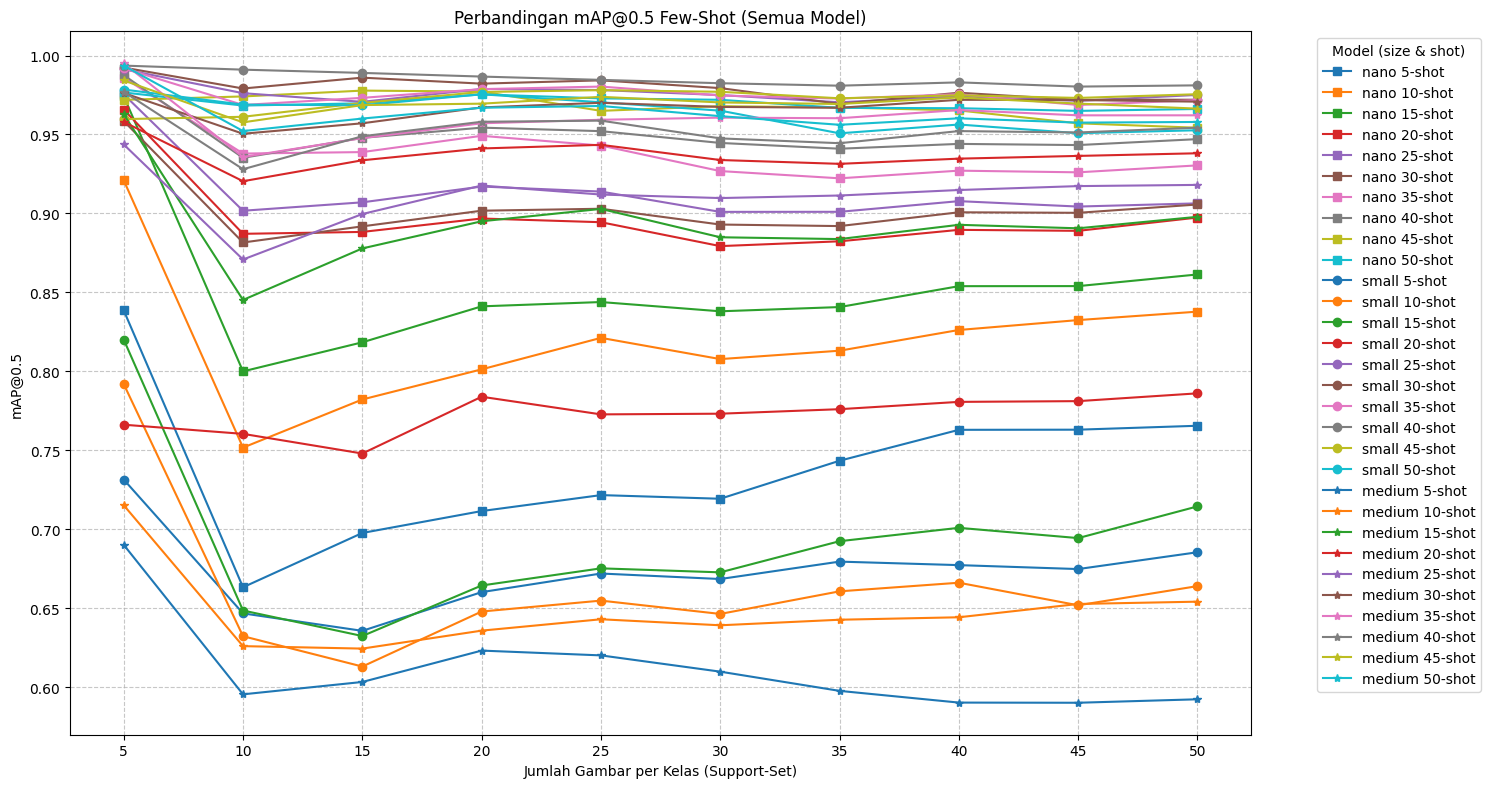

In [27]:
#### BELUM TEST LOAD DARI CSV
# ======================================================
# Visualisasi hasil (load dari CSV, bukan dari memori)
# ======================================================
plt.figure(figsize=(15, 8))
plt.title("Perbandingan mAP@0.5 Few-Shot (Semua Model)")
plt.xlabel("Jumlah Gambar per Kelas (Support-Set)")
plt.ylabel("mAP@0.5")
plt.xticks(shots)
plt.grid(True, linestyle="--", alpha=0.7)

marker_map = {"nano": "s", "small": "o", "medium": "*"}

for size in sizes:
    csv_path = os.path.join(summary_dir, f"{size}-results.csv")
    if not os.path.exists(csv_path):
        print(f"[WARNING] {csv_path} belum ada, skip visualisasi.")
        continue

    df = pd.read_csv(csv_path, index_col=0)   # index=model_shot
    for model_shot in df.index:
        x = [int(c) for c in df.columns]                  # test_images
        y = df.loc[int(model_shot)].values.astype(float)  # mAP values
        m = marker_map.get(size, "o")
        plt.plot(x, y, marker=m, linestyle="-", label=f"{size} {model_shot}-shot")

plt.legend(title="Model (size & shot)", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

graph_output_dir = f"{project_base_few_shot}/graph"
os.makedirs(graph_output_dir, exist_ok=True)
plt.savefig(os.path.join(graph_output_dir, "mAP_all_models.png"),
            dpi=200, bbox_inches="tight")
plt.show()

In [28]:
# ======================================================
# Cetak hasil ke console (load dari CSV)
# ======================================================
print("\n--- Hasil Lengkap mAP@0.5 ---")
for size in sizes:
    csv_path = os.path.join(summary_dir, f"{size}-results.csv")
    if not os.path.exists(csv_path):
        print(f"[WARNING] {csv_path} belum ada, skip print untuk {size}.")
        continue

    df = pd.read_csv(csv_path, index_col=0)   # index = model_shot
    print(f"\nModel {size}:")
    for model_shot in df.index:
        for test_img_count in df.columns:
            score = df.loc[int(model_shot), str(test_img_count)]
            print(f" - {model_shot}-shot diuji di {test_img_count}-images: {score:.4f}")


--- Hasil Lengkap mAP@0.5 ---

Model nano:
 - 5-shot diuji di 5-images: 0.8386
 - 5-shot diuji di 10-images: 0.6633
 - 5-shot diuji di 15-images: 0.6977
 - 5-shot diuji di 20-images: 0.7116
 - 5-shot diuji di 25-images: 0.7217
 - 5-shot diuji di 30-images: 0.7194
 - 5-shot diuji di 35-images: 0.7434
 - 5-shot diuji di 40-images: 0.7630
 - 5-shot diuji di 45-images: 0.7631
 - 5-shot diuji di 50-images: 0.7656
 - 10-shot diuji di 5-images: 0.9210
 - 10-shot diuji di 10-images: 0.7518
 - 10-shot diuji di 15-images: 0.7822
 - 10-shot diuji di 20-images: 0.8013
 - 10-shot diuji di 25-images: 0.8212
 - 10-shot diuji di 30-images: 0.8078
 - 10-shot diuji di 35-images: 0.8131
 - 10-shot diuji di 40-images: 0.8262
 - 10-shot diuji di 45-images: 0.8325
 - 10-shot diuji di 50-images: 0.8378
 - 15-shot diuji di 5-images: 0.9743
 - 15-shot diuji di 10-images: 0.8000
 - 15-shot diuji di 15-images: 0.8184
 - 15-shot diuji di 20-images: 0.8412
 - 15-shot diuji di 25-images: 0.8439
 - 15-shot diuji di

In [20]:
if GoogleDrive:
    copy_to_google_drive("dataset/support_set", "dataset/support_set")
    copy_to_google_drive("results/support_set", "results/support_set")

## Severity Estimation

### SINGLE-STAGE (tanpa deteksi) — ambil SATU daun terbesar dari mask segmen

In [30]:
# ==========================
# SINGLE-STAGE · LEAF TERBESAR (FULL)
# ==========================
from ultralytics import YOLO
import numpy as np, cv2, os, glob, pandas as pd
from pathlib import Path

# ---------- CFG (ISI SENDIRI) ----------
SEG_MODEL_PATH   = "results/mask_lesi_and_leaf/training/medium/weights/best.pt"  # model seg 5 kelas
INPUT_DIR        = "dataset/object_detection/test/images"  # file/folder
OUTPUT_DIR       = "results/severity_estimation/output_single_largest"
CSV_PATH         = str(Path(OUTPUT_DIR) / "summary_single_largest.csv")
CONF_THRESH      = 0.25
IOU_THRESH       = 0.5
MASK_THRESHOLD   = 0.5
SAVE_OVERLAY     = True
# ---------------------------------------

# Kelas segmentasi (urutannya HARUS sesuai training):
# 0: frog-eye-leaf-spot (leaf), 1: frog-eye-leaf-spot_lession,
# 2: healthy (leaf), 3: rust (leaf), 4: rust_lession
SEG_LEAF_IDS   = [0, 2, 3]
PAIR_LESION_ID = {0: 1, 3: 4}  # mapping leaf->lesion; healthy(2) tidak punya lesion

os.makedirs(OUTPUT_DIR, exist_ok=True)
model = YOLO(SEG_MODEL_PATH)

# ---- dukung input file ATAU folder
inp = Path(INPUT_DIR)
if inp.is_file():
    image_paths = [str(inp)]
else:
    exts = ("*.jpg","*.jpeg","*.png","*.bmp","*.tif","*.tiff")
    image_paths = []
    for e in exts:
        image_paths += glob.glob(str(inp / e))
    image_paths = sorted(image_paths)

records = []

for img_path in image_paths:
    img_name = Path(img_path).name
    pred = model.predict(source=img_path, conf=CONF_THRESH, iou=IOU_THRESH, verbose=False)[0]

    # tidak ada mask → severity 0
    if pred.masks is None or pred.boxes is None or len(pred.masks) == 0:
        records.append({"image": img_name, "leaf_class": None, "leaf_px": 0, "lesion_px": 0, "severity_pct": 0.0})
        continue

    # mask pada resolusi internal model (mis. 448x448)
    masks = (pred.masks.data.cpu().numpy() > MASK_THRESHOLD)  # (N,Hm,Wm) bool
    cls   = pred.boxes.cls.cpu().numpy().astype(int)

    # pilih semua daun
    leaf_idxs = [i for i, c in enumerate(cls) if c in SEG_LEAF_IDS]
    if not leaf_idxs:
        records.append({"image": img_name, "leaf_class": None, "leaf_px": 0, "lesion_px": 0, "severity_pct": 0.0})
        continue

    leaf_stack = np.stack([masks[i] for i in leaf_idxs], axis=0)   # (K,Hm,Wm)
    areas      = leaf_stack.reshape(len(leaf_idxs), -1).sum(axis=1)
    best_i     = leaf_idxs[int(np.argmax(areas))]
    leaf_mask  = masks[best_i]                  # (Hm,Wm) bool
    leaf_class = int(cls[best_i])

    # gabung semua lesion pasangan (jika ada)
    lesion_mask = np.zeros_like(leaf_mask, dtype=bool)
    if leaf_class in PAIR_LESION_ID:
        lesion_id   = PAIR_LESION_ID[leaf_class]
        lesion_idxs = [i for i, c in enumerate(cls) if c == lesion_id]
        if lesion_idxs:
            lesion_mask = np.any(masks[lesion_idxs], axis=0)

    # hitung severity pada resolusi mask
    lesion_in_leaf = lesion_mask & leaf_mask
    leaf_px   = int(leaf_mask.sum())
    lesion_px = int(lesion_in_leaf.sum())
    sev       = (lesion_px / leaf_px * 100.0) if leaf_px > 0 else 0.0

    records.append({
        "image": img_name,
        "leaf_class": leaf_class,
        "leaf_px": leaf_px,
        "lesion_px": lesion_px,
        "severity_pct": sev
    })

    # simpan overlay: resize mask → ukuran gambar asli
    if SAVE_OVERLAY:
        # === GANTI BAGIAN OVERLAY INI SAJA ===
        img = cv2.imread(img_path)
        H, W = img.shape[:2]
        
        # Resize mask (model-size -> original image size)
        leaf_mask_up   = cv2.resize(leaf_mask.astype(np.uint8), (W, H), interpolation=cv2.INTER_NEAREST).astype(bool)
        lesion_mask_up = cv2.resize(lesion_mask.astype(np.uint8), (W, H), interpolation=cv2.INTER_NEAREST).astype(bool)
        lesion_in_leaf_up = lesion_mask_up & leaf_mask_up
        
        overlay = img.copy()
        overlay[leaf_mask_up]      = (0.7*overlay[leaf_mask_up] + 0.3*np.array([0,255,0])).astype(np.uint8)
        overlay[lesion_in_leaf_up] = (0.7*overlay[lesion_in_leaf_up] + 0.3*np.array([0,0,255])).astype(np.uint8)
        
        cv2.putText(overlay, f"Severity: {sev:.2f}%", (10, H-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 5.0, (0,0,0), 4, cv2.LINE_AA)
        cv2.imwrite(str(Path(OUTPUT_DIR) / f"{Path(img_name).stem}_overlay.jpg"), overlay)
        # === SELESAI GANTI ===


# simpan CSV ringkas
pd.DataFrame(records).to_csv(CSV_PATH, index=False)
print(f"[Single-stage · largest] CSV saved -> {CSV_PATH}")


[Single-stage · largest] CSV saved -> results/severity_estimation/output_single_largest/summary_single_largest.csv


### SINGLE-STAGE (tanpa deteksi) — semua daun pada gambar

In [31]:
# ==========================
# SINGLE-STAGE · SEMUA DAUN
# ==========================
from ultralytics import YOLO
import numpy as np, cv2, os, glob, pandas as pd
from pathlib import Path

# ---------- CFG (ISI SENDIRI) ----------
SEG_MODEL_PATH   = "results/mask_lesi_and_leaf/training/medium/weights/best.pt"  # model seg dengan 5 kelas berikut
INPUT_DIR        = "dataset/object_detection/test/images"
OUTPUT_DIR       = "results/severity_estimation/output_single_all"
CSV_PATH         = str(Path(OUTPUT_DIR) / "summary_single_all.csv")
CONF_THRESH      = 0.25
IOU_THRESH       = 0.5
MASK_THRESHOLD   = 0.5
SAVE_OVERLAY     = True
# ---------------------------------------

SEG_LEAF_IDS   = [0, 2, 3]         # leaf classes
PAIR_LESION_ID = {0: 1, 3: 4}      # mapping leaf->lesion

os.makedirs(OUTPUT_DIR, exist_ok=True)
model = YOLO(SEG_MODEL_PATH)
image_paths = sorted(glob.glob(str(Path(INPUT_DIR) / "*.*")))
rows, overlay_suffix = [], "_overlay_all.jpg"

for img_path in image_paths:
    img_name = Path(img_path).name
    pred = model.predict(source=img_path, conf=CONF_THRESH, iou=IOU_THRESH, verbose=False)[0]

    if pred.masks is None or pred.boxes is None or len(pred.masks) == 0:
        rows.append({"image": img_name, "leaf_index": None, "leaf_class": None,
                     "leaf_px": 0, "lesion_px": 0, "severity_pct": 0.0})
        continue

    masks = (pred.masks.data.cpu().numpy() > MASK_THRESHOLD)
    cls   = pred.boxes.cls.cpu().numpy().astype(int)

    # Siapkan overlay keseluruhan sekali saja
    overlay = cv2.imread(img_path) if SAVE_OVERLAY else None
    if SAVE_OVERLAY and overlay is not None:
        H, W = overlay.shape[:2]
    
    # ...
    for k, li in enumerate(leaf_idxs):
        leaf_mask   = masks[li]
        leaf_class  = cls[li]
    
        lesion_mask = np.zeros_like(leaf_mask, dtype=bool)
        if leaf_class in PAIR_LESION_ID:
            lesion_id = PAIR_LESION_ID[leaf_class]
            lesion_idxs = [i for i, c in enumerate(cls) if c == lesion_id]
            if lesion_idxs:
                lesion_mask = np.any(masks[lesion_idxs], axis=0)
    
        # --- hitung di resolusi mask (seperti semula) ---
        lesion_in_leaf = lesion_mask & leaf_mask
        leaf_px   = int(leaf_mask.sum())
        lesion_px = int(lesion_in_leaf.sum())
        sev = (lesion_px / leaf_px * 100.0) if leaf_px > 0 else 0.0
    
        rows.append({"image": img_name, "leaf_index": k, "leaf_class": int(leaf_class),
                     "leaf_px": leaf_px, "lesion_px": lesion_px, "severity_pct": sev})
    
        # --- overlay: naikkan resolusi mask ke ukuran gambar ---
        if SAVE_OVERLAY and overlay is not None:
            leaf_up   = cv2.resize(leaf_mask.astype(np.uint8), (W, H), interpolation=cv2.INTER_NEAREST).astype(bool)
            lesion_up = cv2.resize(lesion_mask.astype(np.uint8), (W, H), interpolation=cv2.INTER_NEAREST).astype(bool)
            lesion_in_leaf_up = lesion_up & leaf_up
        
            overlay[leaf_up]            = (0.7*overlay[leaf_up] + 0.3*np.array([0,255,0])).astype(np.uint8)
            overlay[lesion_in_leaf_up]  = (0.7*overlay[lesion_in_leaf_up] + 0.3*np.array([0,0,255])).astype(np.uint8)
        
            # === Tambah teks severity untuk daun ini ===
            text = f"{sev:.1f}%"
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 5.0   # << Ubah nilai ini untuk memperbesar/ mengecilkan teks
            thickness  = 4     # << Ubah nilai ini untuk ketebalan garis teks
        
            # cari koordinat tengah daun buat naruh teks
            ys, xs = np.where(leaf_up)
            if len(xs) > 0 and len(ys) > 0:
                cx, cy = int(xs.mean()), int(ys.mean())
                cv2.putText(overlay, text, (cx, cy),
                            font, font_scale, (0,0,0), thickness, cv2.LINE_AA)
    
    # simpan overlay sekali per gambar
    if SAVE_OVERLAY and overlay is not None:
        cv2.imwrite(str(Path(OUTPUT_DIR) / f"{Path(img_name).stem}{overlay_suffix}"), overlay)

pd.DataFrame(rows).to_csv(CSV_PATH, index=False)
print(f"[Single-stage · all leaves] CSV saved -> {CSV_PATH}")


[Single-stage · all leaves] CSV saved -> results/severity_estimation/output_single_all/summary_single_all.csv


### MULTI-STAGE (deteksi ➜ crop ➜ segmen) — SATU daun (bbox terbesar)

In [32]:
# =========================================
# MULTI-STAGE · BBOX TERBESAR ➜ SEGMENTASI (SAFE)
# =========================================
from ultralytics import YOLO
import numpy as np, cv2, os, glob, pandas as pd
from pathlib import Path

# ---------- CFG (ISI SENDIRI) ----------
DET_MODEL_PATH  = "results/object_detection/training/medium/weights/best.pt"   # deteksi: 0=frog-eye-leaf-spot, 1=healthy, 2=rust
SEG_MODEL_PATH  = "results/mask_lesi_and_leaf/training/medium/weights/best.pt" # segmentasi: 0=frog-eye, 1=frog-eye_lesion, 2=healthy, 3=rust, 4=rust_lesion
INPUT_PATH      = "dataset/object_detection/test/images/"                     # boleh path ke FILE atau FOLDER
OUTPUT_DIR      = "results/severity_estimation/output_multi_largest"
CSV_PATH        = str(Path(OUTPUT_DIR) / "summary_multi_largest.csv")
DET_CONF        = 0.25
DET_IOU         = 0.5
SEG_CONF        = 0.25
SEG_IOU         = 0.5
MASK_THRESHOLD  = 0.5
PADDING_RATIO   = 0.08   # 8% dari sisi terpanjang bbox
SAVE_OVERLAY    = True
# ---------------------------------------

# Mapping kelas deteksi -> kelas segmen leaf & lesion
# det: 0=frog-eye; 1=healthy; 2=rust
DET_TO_SEG_LEAF   = {0: 0, 1: 2, 2: 3}
DET_TO_SEG_LESION = {0: 1, 2: 4}  # healthy tidak punya lesion

os.makedirs(OUTPUT_DIR, exist_ok=True)
model_det = YOLO(DET_MODEL_PATH)
model_seg = YOLO(SEG_MODEL_PATH)

def clamp(v, lo, hi): 
    return max(lo, min(hi, v))

# --- dukung input FILE atau FOLDER
inp = Path(INPUT_PATH)
if inp.is_file():
    image_paths = [str(inp)]
else:
    exts = ("*.jpg","*.jpeg","*.png","*.bmp","*.tif","*.tiff")
    image_paths = []
    for e in exts:
        image_paths += glob.glob(str(inp / e))
    image_paths = sorted(image_paths)

rows = []
for img_path in image_paths:
    img_name = Path(img_path).name
    img = cv2.imread(img_path)
    if img is None:
        # skip file non-gambar
        rows.append({"image": img_name, "det_class": None, "leaf_px": 0, "lesion_px": 0, "severity_pct": 0.0})
        continue
    H, W = img.shape[:2]

    # ---- DETEKSI: pilih bbox terbesar
    det = model_det.predict(img_path, conf=DET_CONF, iou=DET_IOU, verbose=False)[0]
    if det.boxes is None or len(det.boxes) == 0:
        rows.append({"image": img_name, "det_class": None, "leaf_px": 0, "lesion_px": 0, "severity_pct": 0.0})
        continue

    boxes = det.boxes.xyxy.cpu().numpy()
    dcls  = det.boxes.cls.cpu().numpy().astype(int)

    areas = (boxes[:,2]-boxes[:,0]) * (boxes[:,3]-boxes[:,1])
    idx   = int(np.argmax(areas))
    x1, y1, x2, y2 = boxes[idx]
    det_c = int(dcls[idx])

    # ---- crop + padding
    w, h = x2 - x1, y2 - y1
    pad  = PADDING_RATIO * max(w, h)
    x1p, y1p = int(clamp(x1 - pad, 0, W-1)), int(clamp(y1 - pad, 0, H-1))
    x2p, y2p = int(clamp(x2 + pad, 0, W-1)), int(clamp(y2 + pad, 0, H-1))
    crop = img[y1p:y2p, x1p:x2p].copy()
    if crop.size == 0:
        rows.append({"image": img_name, "det_class": det_c, "leaf_px": 0, "lesion_px": 0, "severity_pct": 0.0})
        continue

    # ---- SEGMENTASI pada crop
    seg = model_seg.predict(crop, conf=SEG_CONF, iou=SEG_IOU, verbose=False)[0]
    if seg.masks is None or seg.boxes is None or len(seg.masks) == 0:
        rows.append({"image": img_name, "det_class": det_c, "leaf_px": 0, "lesion_px": 0, "severity_pct": 0.0})
        continue

    masks = (seg.masks.data.cpu().numpy() > MASK_THRESHOLD)  # (N, Hm, Wm)
    scls  = seg.boxes.cls.cpu().numpy().astype(int)

    # ---- pilih leaf sesuai kelas deteksi
    seg_leaf_id = DET_TO_SEG_LEAF.get(det_c, None)
    # siapkan leaf_mask default zero dengan ukuran mask prediction
    leaf_mask = np.zeros_like(masks[0], dtype=bool)
    if seg_leaf_id is not None:
        leaf_idxs = [i for i, c in enumerate(scls) if c == seg_leaf_id]
        if leaf_idxs:
            leaf_stack = np.stack([masks[i] for i in leaf_idxs], axis=0)
            areas_leaf = leaf_stack.reshape(len(leaf_idxs), -1).sum(axis=1)
            leaf_mask  = leaf_stack[int(np.argmax(areas_leaf))]

    # ---- lesion sesuai kelas deteksi (healthy tidak punya)
    lesion_mask = np.zeros_like(leaf_mask, dtype=bool)
    seg_lesion_id = DET_TO_SEG_LESION.get(det_c, None)
    if seg_lesion_id is not None:
        lesion_idxs = [i for i, c in enumerate(scls) if c == seg_lesion_id]
        if lesion_idxs:
            lesion_mask = np.any(masks[lesion_idxs], axis=0)

    # ---- hitung severity (di resolusi mask)
    lesion_in_leaf = lesion_mask & leaf_mask
    leaf_px   = int(leaf_mask.sum())
    lesion_px = int(lesion_in_leaf.sum())
    sev = (lesion_px / leaf_px * 100.0) if leaf_px > 0 else 0.0

    rows.append({
        "image": img_name,
        "det_class": det_c,
        "leaf_px": leaf_px,
        "lesion_px": lesion_px,
        "severity_pct": sev
    })

    # ---- overlay aman: resize mask -> ukuran crop
    if SAVE_OVERLAY:
        Hc, Wc = crop.shape[:2]
        leaf_up   = cv2.resize(leaf_mask.astype(np.uint8), (Wc, Hc), interpolation=cv2.INTER_NEAREST).astype(bool)
        lesion_up = cv2.resize(lesion_mask.astype(np.uint8), (Wc, Hc), interpolation=cv2.INTER_NEAREST).astype(bool)
        lesion_in_leaf_up = lesion_up & leaf_up

        overlay = crop.copy()
        overlay[leaf_up]            = (0.7*overlay[leaf_up] + 0.3*np.array([0,255,0])).astype(np.uint8)
        overlay[lesion_in_leaf_up]  = (0.7*overlay[lesion_in_leaf_up] + 0.3*np.array([0,0,255])).astype(np.uint8)
        cv2.putText(overlay, f"Severity: {sev:.2f}%", (10, Hc-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 5.0, (0,0,0), 4, cv2.LINE_AA)

        out_path = str(Path(OUTPUT_DIR) / f"{Path(img_name).stem}_largest_overlay.jpg")
        cv2.imwrite(out_path, overlay)

# simpan CSV
pd.DataFrame(rows).to_csv(CSV_PATH, index=False)
print(f"[Multi-stage · largest] CSV saved -> {CSV_PATH}")


[Multi-stage · largest] CSV saved -> results/severity_estimation/output_multi_largest/summary_multi_largest.csv


### MULTI-STAGE (deteksi ➜ crop ➜ segmen) — SEMUA daun

In [33]:
# ======================================
# MULTI-STAGE · SEMUA BBOX ➜ SEGMENTASI (SAFE, FULL)
# ======================================
from ultralytics import YOLO
import numpy as np, cv2, os, glob, pandas as pd
from pathlib import Path

# ---------- CFG (SESUAIKAN) ----------
DET_MODEL_PATH  = "results/object_detection/training/medium/weights/best.pt"   # det: 0=frog-eye-leaf-spot, 1=healthy, 2=rust
SEG_MODEL_PATH  = "results/mask_lesi_and_leaf/training/medium/weights/best.pt" # seg: 0=frog-eye,1=frog-eye_lesion,2=healthy,3=rust,4=rust_lesion
INPUT_PATH      = "dataset/object_detection/test/images/"                       # BOLEH FILE atau FOLDER
OUTPUT_DIR      = "results/severity_estimation/output_multi_all"
CSV_PATH        = str(Path(OUTPUT_DIR) / "summary_multi_all.csv")
DET_CONF        = 0.25
DET_IOU         = 0.5
SEG_CONF        = 0.25
SEG_IOU         = 0.5
MASK_THRESHOLD  = 0.5
PADDING_RATIO   = 0.08
SAVE_OVERLAY    = True
# -------------------------------------

# Mapping kelas deteksi -> kelas segmen leaf & lesion
# det: 0=frog-eye; 1=healthy; 2=rust
DET_TO_SEG_LEAF   = {0: 0, 1: 2, 2: 3}
DET_TO_SEG_LESION = {0: 1, 2: 4}  # healthy tidak punya lesion

os.makedirs(OUTPUT_DIR, exist_ok=True)
CROP_DIR = Path(OUTPUT_DIR) / "crops"
os.makedirs(CROP_DIR, exist_ok=True)

model_det = YOLO(DET_MODEL_PATH)
model_seg = YOLO(SEG_MODEL_PATH)

def clamp(v, lo, hi):
    return max(lo, min(hi, v))

# --- dukung input FILE atau FOLDER
inp = Path(INPUT_PATH)
if inp.is_file():
    image_paths = [str(inp)]
else:
    exts = ("*.jpg","*.jpeg","*.png","*.bmp","*.tif","*.tiff")
    image_paths = []
    for e in exts:
        image_paths += glob.glob(str(inp / e))
    image_paths = sorted(image_paths)

rows = []
for img_path in image_paths:
    img_name = Path(img_path).name
    img = cv2.imread(img_path)
    if img is None:
        rows.append({"image": img_name, "bbox_index": None, "det_class": None,
                     "leaf_px": 0, "lesion_px": 0, "severity_pct": 0.0})
        continue
    H, W = img.shape[:2]

    # ---- DETEKSI semua bbox daun/kelas terkait
    det = model_det.predict(img_path, conf=DET_CONF, iou=DET_IOU, verbose=False)[0]
    if det.boxes is None or len(det.boxes) == 0:
        rows.append({"image": img_name, "bbox_index": None, "det_class": None,
                     "leaf_px": 0, "lesion_px": 0, "severity_pct": 0.0})
        continue

    boxes = det.boxes.xyxy.cpu().numpy()             # (N,4)
    dcls  = det.boxes.cls.cpu().numpy().astype(int)  # (N,)

    for bi, (bb, det_c) in enumerate(zip(boxes, dcls)):
        x1, y1, x2, y2 = bb
        w, h = x2 - x1, y2 - y1
        pad  = PADDING_RATIO * max(w, h)
        x1p, y1p = int(clamp(x1 - pad, 0, W - 1)), int(clamp(y1 - pad, 0, H - 1))
        x2p, y2p = int(clamp(x2 + pad, 0, W - 1)), int(clamp(y2 + pad, 0, H - 1))
        if x2p <= x1p or y2p <= y1p:
            rows.append({"image": img_name, "bbox_index": bi, "det_class": int(det_c),
                         "leaf_px": 0, "lesion_px": 0, "severity_pct": 0.0})
            continue

        crop = img[y1p:y2p, x1p:x2p].copy()
        if crop.size == 0:
            rows.append({"image": img_name, "bbox_index": bi, "det_class": int(det_c),
                         "leaf_px": 0, "lesion_px": 0, "severity_pct": 0.0})
            continue

        # ---- SEGMENTASI pada crop
        seg = model_seg.predict(crop, conf=SEG_CONF, iou=SEG_IOU, verbose=False)[0]
        if seg.masks is None or seg.boxes is None or len(seg.masks) == 0:
            rows.append({"image": img_name, "bbox_index": bi, "det_class": int(det_c),
                         "leaf_px": 0, "lesion_px": 0, "severity_pct": 0.0})
            continue

        # Masks pada resolusi internal prediksi
        masks = (seg.masks.data.cpu().numpy() > MASK_THRESHOLD)  # (M, Hm, Wm) bool
        scls  = seg.boxes.cls.cpu().numpy().astype(int)          # (M,)

        # ---- tentukan leaf_mask sesuai kelas deteksi
        seg_leaf_id = DET_TO_SEG_LEAF.get(int(det_c), None)
        leaf_mask = np.zeros_like(masks[0], dtype=bool)  # default kosong
        if seg_leaf_id is not None:
            leaf_idxs = [i for i, c in enumerate(scls) if c == seg_leaf_id]
            if leaf_idxs:
                leaf_stack = np.stack([masks[i] for i in leaf_idxs], axis=0)  # (K,Hm,Wm)
                areas_leaf = leaf_stack.reshape(len(leaf_idxs), -1).sum(axis=1)
                leaf_mask  = leaf_stack[int(np.argmax(areas_leaf))]

        # ---- lesion_mask (healthy tidak punya)
        lesion_mask = np.zeros_like(leaf_mask, dtype=bool)
        seg_lesion_id = DET_TO_SEG_LESION.get(int(det_c), None)
        if seg_lesion_id is not None:
            lesion_idxs = [i for i, c in enumerate(scls) if c == seg_lesion_id]
            if lesion_idxs:
                lesion_mask = np.any(masks[lesion_idxs], axis=0)

        # ---- hitung severity di resolusi mask
        lesion_in_leaf = lesion_mask & leaf_mask
        leaf_px   = int(leaf_mask.sum())
        lesion_px = int(lesion_in_leaf.sum())
        sev = (lesion_px / leaf_px * 100.0) if leaf_px > 0 else 0.0

        rows.append({"image": img_name, "bbox_index": bi, "det_class": int(det_c),
                     "leaf_px": leaf_px, "lesion_px": lesion_px, "severity_pct": sev})

        # ---- overlay aman: resize mask -> ukuran crop (hindari IndexError)
        if SAVE_OVERLAY:
            Hc, Wc = crop.shape[:2]
            leaf_up   = cv2.resize(leaf_mask.astype(np.uint8), (Wc, Hc), interpolation=cv2.INTER_NEAREST).astype(bool)
            lesion_up = cv2.resize(lesion_mask.astype(np.uint8), (Wc, Hc), interpolation=cv2.INTER_NEAREST).astype(bool)
            lesion_in_leaf_up = lesion_up & leaf_up

            overlay = crop.copy()
            overlay[leaf_up]            = (0.7 * overlay[leaf_up] + 0.3 * np.array([0, 255, 0])).astype(np.uint8)
            overlay[lesion_in_leaf_up]  = (0.7 * overlay[lesion_in_leaf_up] + 0.3 * np.array([0, 0, 255])).astype(np.uint8)
            cv2.putText(overlay, f"Severity: {sev:.2f}%", (10, Hc - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 5.0, (0, 0, 0), 4, cv2.LINE_AA)

            out_path = str(Path(CROP_DIR) / f"{Path(img_name).stem}_bb{bi}_overlay.jpg")
            cv2.imwrite(out_path, overlay)

# simpan CSV ringkasan
pd.DataFrame(rows).to_csv(CSV_PATH, index=False)
print(f"[Multi-stage · all leaves] CSV saved -> {CSV_PATH}")


[Multi-stage · all leaves] CSV saved -> results/severity_estimation/output_multi_all/summary_multi_all.csv


### Grid Visualization

In [35]:
# -----------------------------
# KONFIGURASI
# -----------------------------
INPUT_DIR     = "dataset/object_detection/test/images"           
GT_DIR        = "dataset/object_detection/test/labels_vis"       
SINGLE_DIR    = "results/severity_estimation/output_single_largest"      
SINGLE_ALL_DIR= "results/severity_estimation/output_single_all"  
MULTI_DIR     = "results/severity_estimation/output_multi_largest"       
MULTI_ALL_DIR = "results/severity_estimation/output_multi_all/crops"   

SAVE_DIR      = "results/severity_estimation/comparison_plots"   # folder simpan hasil
os.makedirs(SAVE_DIR, exist_ok=True)

N_SAMPLES = 15   # jumlah gambar random per run
FIGSIZE = (15, 8)

# -----------------------------
# FUNGSI BACA GAMBAR
# -----------------------------
def read_img(path):
    if os.path.exists(path):
        img = cv2.imread(path)
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        return None

def try_read(base, folder, suffixes=[".jpg", ".png"]):
    """Coba baca file dengan ekstensi berbeda"""
    for suf in suffixes:
        p = Path(folder) / f"{base}{suf}"
        if p.exists():
            return read_img(str(p))
    return None

# -----------------------------
# AMBIL BASE IMAGE LIST
# -----------------------------
all_images = [f for f in os.listdir(INPUT_DIR) if f.endswith((".jpg", ".png"))]
if not all_images:
    raise ValueError("Tidak ada file gambar ditemukan di INPUT_DIR")

# Pilih random 15 gambar unik
selected_bases = random.sample(all_images, min(N_SAMPLES, len(all_images)))

# -----------------------------
# LOOP SETIAP GAMBAR
# -----------------------------
for img_file in selected_bases:
    selected_base = Path(img_file).stem
    print(f"Menampilkan hasil perbandingan untuk gambar: {selected_base}")

    # Original
    img_orig = try_read(selected_base, INPUT_DIR)

    # Ground truth
    img_gt = try_read(selected_base, GT_DIR)

    # Single-stage (1 daun terbesar)
    img_single = try_read(f"{selected_base}_overlay", SINGLE_DIR)

    # Single-stage (semua daun)
    img_single_all = try_read(f"{selected_base}_overlay_all", SINGLE_ALL_DIR)

    # Multi-stage (1 daun terbesar)
    img_multi = try_read(f"{selected_base}_largest_overlay", MULTI_DIR)

    # Multi-stage (semua daun)
    img_multi_all = try_read(f"{selected_base}_bb0_overlay", MULTI_ALL_DIR)

    # -----------------------------
    # PLOTTING
    # -----------------------------
    titles = [
        "Original",
        "Original + GT",
        "Single-stage (1 daun terbesar)",
        "Single-stage (semua daun)",
        "Multi-stage (1 daun terbesar)",
        "Multi-stage (semua daun)"
    ]
    images = [img_orig, img_gt, img_single, img_single_all, img_multi, img_multi_all]

    fig, axes = plt.subplots(2, 3, figsize=FIGSIZE)
    for ax, title, img in zip(axes.ravel(), titles, images):
        if img is not None:
            ax.imshow(img)
        else:
            ax.text(0.5, 0.5, "File not found", ha="center", va="center", fontsize=10)
        ax.set_title(title, fontsize=9)
        ax.axis("off")

    plt.tight_layout()

    # Simpan hasil ke file
    save_path = Path(SAVE_DIR) / f"comparison_{selected_base}.png"
    plt.savefig(save_path, dpi=200, bbox_inches="tight")
    print(f"✅ Hasil disimpan di: {save_path}")

    plt.close(fig)  # biar nggak numpuk di notebook

Menampilkan hasil perbandingan untuk gambar: 08066_healthy_jpg.rf.697bccfdde0d8566b015c57392ff0fe7
✅ Hasil disimpan di: results/severity_estimation/comparison_plots/comparison_08066_healthy_jpg.rf.697bccfdde0d8566b015c57392ff0fe7.png
Menampilkan hasil perbandingan untuk gambar: 08069_healthy_jpg.rf.68ba3762579d36f4fae57f399f692af7
✅ Hasil disimpan di: results/severity_estimation/comparison_plots/comparison_08069_healthy_jpg.rf.68ba3762579d36f4fae57f399f692af7.png
Menampilkan hasil perbandingan untuk gambar: 10676_rust_jpg.rf.d6f44d1275ef5926f8e09ff9eae50149
✅ Hasil disimpan di: results/severity_estimation/comparison_plots/comparison_10676_rust_jpg.rf.d6f44d1275ef5926f8e09ff9eae50149.png
Menampilkan hasil perbandingan untuk gambar: 10657_rust_jpg.rf.7868c30ffec9f0c25bbc35ed5d96729b
✅ Hasil disimpan di: results/severity_estimation/comparison_plots/comparison_10657_rust_jpg.rf.7868c30ffec9f0c25bbc35ed5d96729b.png
Menampilkan hasil perbandingan untuk gambar: 03521_frog_eye_leaf_spot_jpg.rf

## Test

In [2]:
import pandas as pd
import os

summary_dir = "results/few_shot/support_set/summary"
sizes = ["nano", "small", "medium"]

records = []
for size in sizes:
    csv_path = os.path.join(summary_dir, f"{size}-results.csv")
    if not os.path.exists(csv_path):
        continue
    df = pd.read_csv(csv_path, index_col=0)
    for model_shot in df.index:
        for test_img_count in df.columns:
            score = df.loc[int(model_shot), str(test_img_count)]
            records.append({
                "size": size,
                "model_shot": int(model_shot),
                "test_images": int(test_img_count),
                "mAP50": float(score)
            })

df_all = pd.DataFrame(records)

best_by_shot = (
    df_all.groupby(["model_shot", "size"])
    .agg(best_score=("mAP50", "max"), best_test_images=("test_images", lambda x: x.iloc[df_all.loc[x.index, "mAP50"].argmax()]))
    .reset_index()
)

# Pilih hanya pemenang (varian dengan best_score tertinggi per model_shot)
winners = (
    best_by_shot.loc[best_by_shot.groupby("model_shot")["best_score"].idxmax()]
    .sort_values("model_shot")
)
print(winners)


    model_shot    size  best_score  best_test_images
1            5    nano    0.838641                 5
4           10    nano    0.920996                 5
7           15    nano    0.974293                 5
10          20    nano    0.965752                 5
14          25   small    0.991250                 5
17          30   small    0.992368                 5
18          35  medium    0.995000                 5
23          40   small    0.993611                 5
24          45  medium    0.984191                 5
27          50  medium    0.993611                 5


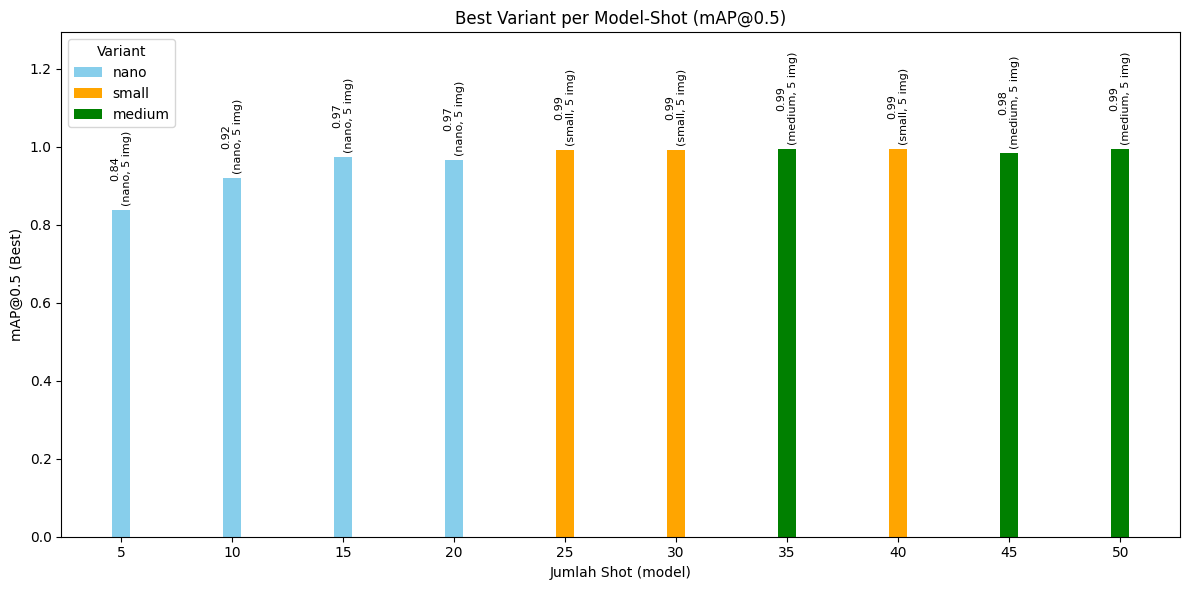

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.title("Best Variant per Model-Shot (mAP@0.5)")
plt.xlabel("Jumlah Shot (model)")
plt.ylabel("mAP@0.5 (Best)")
colors = {"nano":"skyblue", "small":"orange", "medium":"green"}

for i, row in winners.iterrows():
    plt.ylim(0, winners["best_score"].max() * 1.3) 
    plt.bar(row["model_shot"], row["best_score"],
            color=colors[row["size"]],
            label=row["size"] if row["size"] not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.text(row["model_shot"], row["best_score"]+0.01,
             f"{row['best_score']:.2f}\n({row['size']}, {row['best_test_images']} img)",
             ha="center", va="bottom", fontsize=8, rotation=90)

plt.xticks(winners["model_shot"])
plt.legend(title="Variant")
plt.tight_layout()
plt.show()


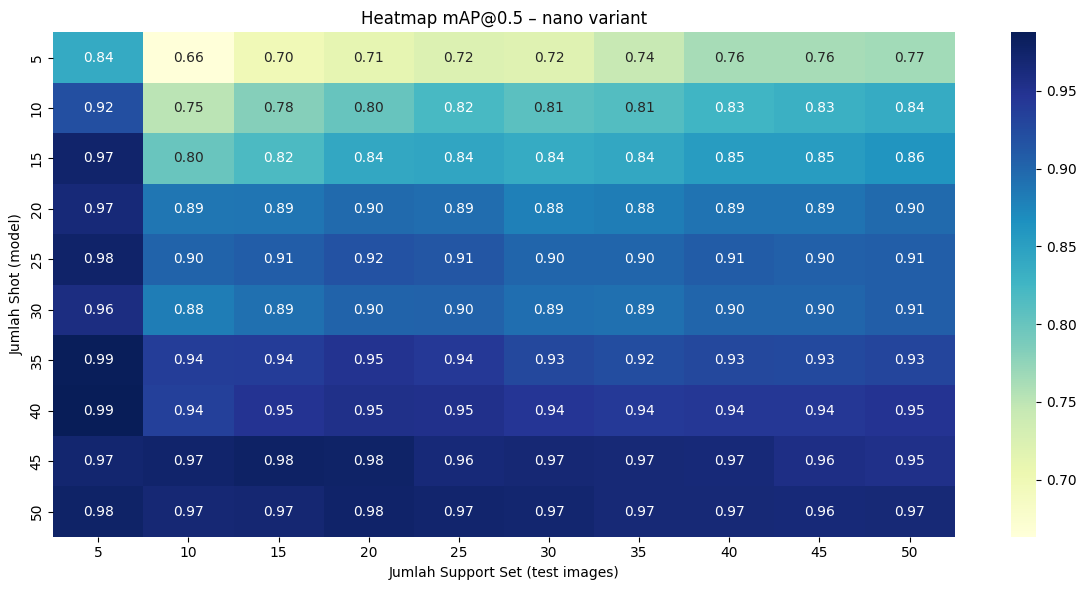

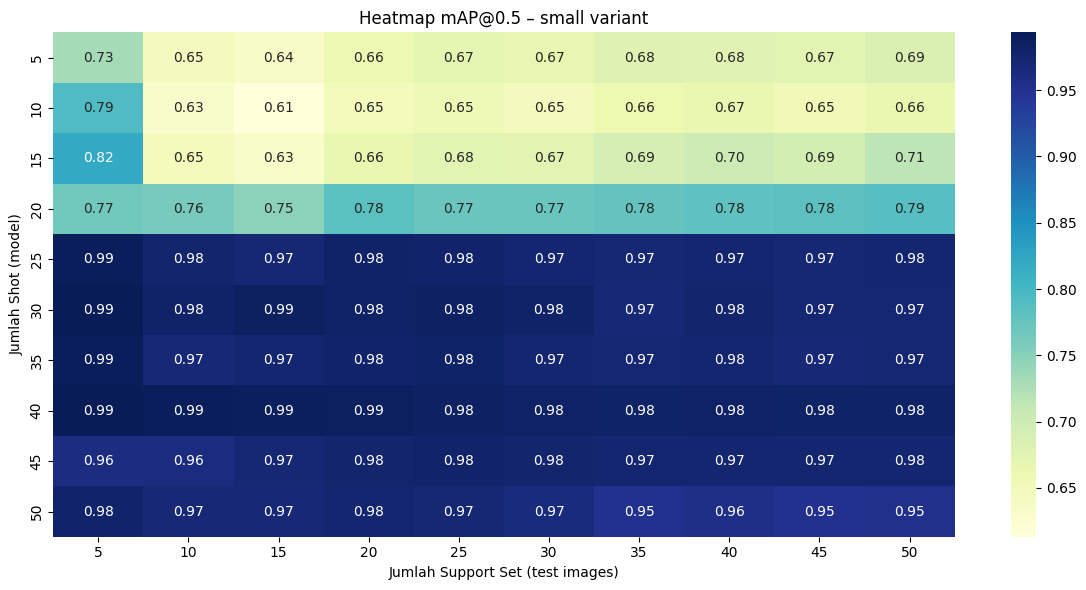

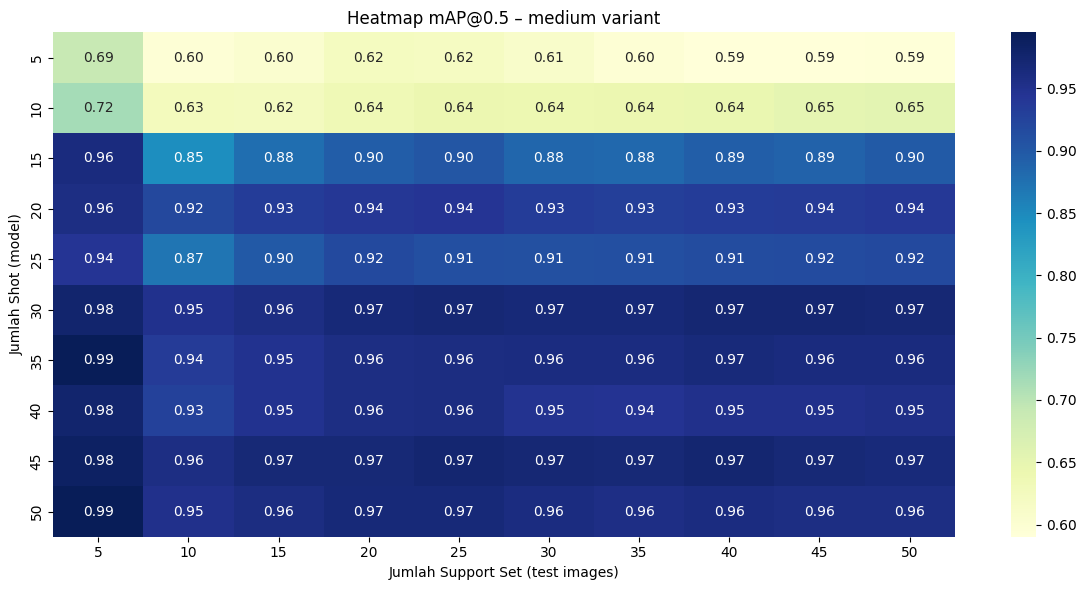

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan df_all sudah ada dari langkah sebelumnya
# df_all = DataFrame dengan kolom [size, model_shot, test_images, mAP50]

pivot_data = {
    size: df_all[df_all["size"]==size].pivot_table(
        index="model_shot", columns="test_images", values="mAP50"
    )
    for size in df_all["size"].unique()
}

for size, df_pivot in pivot_data.items():
    plt.figure(figsize=(12,6))
    sns.heatmap(df_pivot, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title(f"Heatmap mAP@0.5 – {size} variant")
    plt.xlabel("Jumlah Support Set (test images)")
    plt.ylabel("Jumlah Shot (model)")
    plt.tight_layout()
    plt.show()


C:\Users\abiyamf\AppData\Local\Temp\ipykernel_11692\743505766.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot_encoded = pivot_winner.replace(mapping)


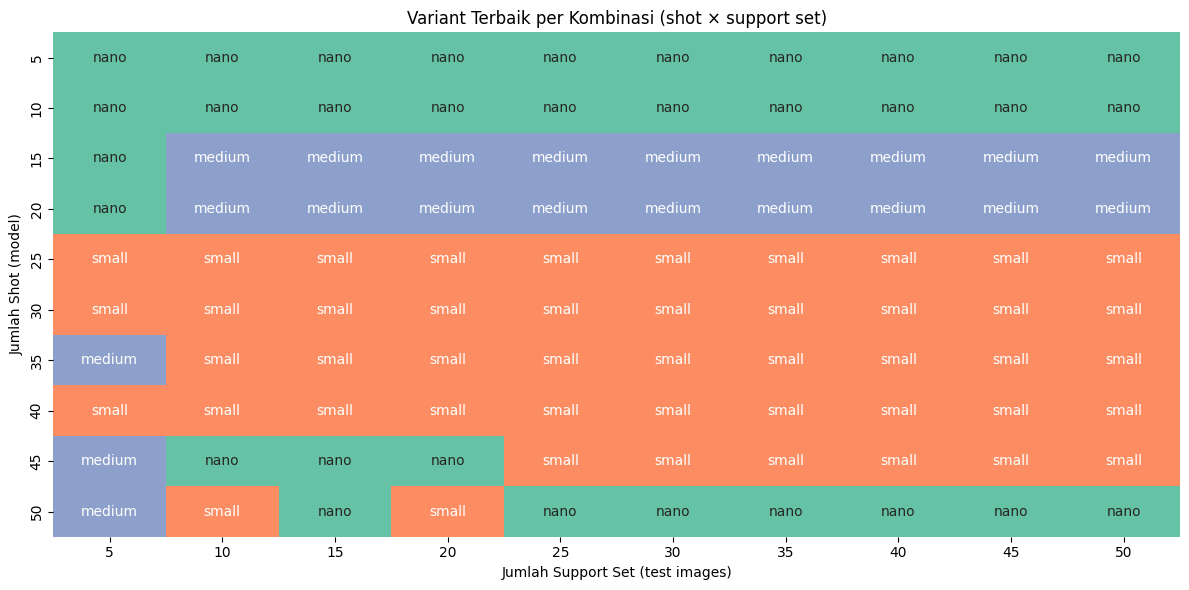

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot: siapa pemenang di tiap kombinasi
pivot_winner = winners_matrix.pivot(index="model_shot", columns="test_images", values="size")

# Encode ke angka supaya bisa dijadikan heatmap
mapping = {"nano": 0, "small": 1, "medium": 2}
pivot_encoded = pivot_winner.replace(mapping)

plt.figure(figsize=(12,6))
ax = sns.heatmap(
    pivot_encoded,
    annot=pivot_winner,   # tampilkan teks aslinya (nano/small/medium)
    fmt="",
    cmap=sns.color_palette("Set2", len(mapping)),
    cbar=False
)
plt.title("Variant Terbaik per Kombinasi (shot × support set)")
plt.xlabel("Jumlah Support Set (test images)")
plt.ylabel("Jumlah Shot (model)")
plt.tight_layout()
plt.show()

In [9]:
from ultralytics import YOLO
import random, yaml, shutil, os

# config
shots = [5, 10, 20,30,40,50]
sizes = ["nano", "small", "medium"]
base_data_path = "dataset/object_detection"
fewshot_path = "dataset/few_shot_detection"

# buat episodic dataset
def create_fewshot_dataset(n, base_path, out_path):
    os.makedirs(out_path, exist_ok=True)
    for split in ["train", "valid", "test"]:
        img_dir = Path(base_path) / split / "images"
        lbl_dir = Path(base_path) / split / "labels"

        target_img = Path(out_path) / split / "images"
        target_lbl = Path(out_path) / split / "labels"
        target_img.mkdir(parents=True, exist_ok=True)
        target_lbl.mkdir(parents=True, exist_ok=True)

        files = list(img_dir.glob("*.jpg"))
        selected = random.sample(files, min(n*3, len(files)))  # 3 class × n-shot
        for f in selected:
            shutil.copy(f, target_img / f.name)
            shutil.copy(lbl_dir / f.with_suffix(".txt").name, target_lbl / f.with_suffix(".txt").name)

    shutil.copy(Path(base_path)/"data.yaml", Path(out_path)/"data.yaml")

# training loop few-shot
for shot in shots:
    shot_dir = Path(fewshot_path) / f"{shot}-shot"
    create_fewshot_dataset(shot, base_data_path, shot_dir)

    # # 1. Load original YAML
    # data_yaml_path = f"{shot_dir}/data.yaml"
    # with open(data_yaml_path, 'r') as f:
    #     data_yaml = yaml.safe_load(f)

    # # 2. Ubah path train sesuai shot
    # data_yaml['train'] = f"../{shot}-shot/images"
    # data_yaml['test'] = f"../{shot}-shot/images"
    # data_yaml['val'] = f"../{shot}-shot/images"

    # # 3. Simpan YAML baru ke file sementara
    # temp_yaml_path = f"{shot_dir}/data-shot.yaml"
    # with open(temp_yaml_path, 'w') as f:
    #     yaml.dump(data_yaml, f, sort_keys=False, default_flow_style=True)


    for size in sizes:
        model = YOLO(f"yolo11{size[0]}.pt")
        model.train(
            data=str(shot_dir/"data.yaml"),
            epochs=50,
            imgsz=640,
            project=f"results/few_shot_detection",
            name=f"{size}_{shot}-shot",
        )

Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot_detection/5-shot/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=nano_5-shot, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.

train: Scanning /workspace/dataset/few_shot_detection/5-shot/train/labels... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<00:00, 1303.01it/s]

train: New cache created: /workspace/dataset/few_shot_detection/5-shot/train/labels.cache


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 931.9±137.7 MB/s, size: 914.6 KB)


val: Scanning /workspace/dataset/few_shot_detection/5-shot/valid/labels... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<00:00, 1210.80it/s]

val: New cache created: /workspace/dataset/few_shot_detection/5-shot/valid/labels.cache


Plotting labels to results/few_shot_detection/nano_5-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot_detection/nano_5-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.79G       1.08      3.303      1.454         80        640: 100%|██████████| 1/1 [00:00<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         15         28    0.00571      0.963     0.0548     0.0267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/50      3.79G     0.9971      3.164      1.511         48        640: 100%|██████████| 1/1 [00:00<00:00, 13.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.51it/s]

                   all         15         28    0.00558      0.963     0.0574     0.0306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.79G      1.173       3.18      1.619         69        640: 100%|██████████| 1/1 [00:00<00:00, 13.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.04it/s]

                   all         15         28    0.00556      0.963     0.0564     0.0412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.79G      1.244      3.278      1.632         96        640: 100%|██████████| 1/1 [00:00<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.38it/s]

                   all         15         28    0.00554      0.963      0.141     0.0844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.79G     0.9763      3.132      1.438         53        640: 100%|██████████| 1/1 [00:00<00:00, 13.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.15it/s]

                   all         15         28    0.00557      0.963     0.0904     0.0553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.79G      1.035      3.277      1.501         58        640: 100%|██████████| 1/1 [00:00<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.82it/s]

                   all         15         28     0.0057      0.963      0.133     0.0782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.81G     0.9111      3.083      1.417         46        640: 100%|██████████| 1/1 [00:00<00:00, 13.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.30it/s]

                   all         15         28     0.0057      0.963      0.171     0.0964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.81G      0.856      3.098      1.357         51        640: 100%|██████████| 1/1 [00:00<00:00, 13.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.71it/s]

                   all         15         28    0.00574      0.963      0.124     0.0737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.81G     0.6633      3.088      1.212         69        640: 100%|██████████| 1/1 [00:00<00:00, 12.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.15it/s]

                   all         15         28    0.00589      0.963      0.137     0.0915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.81G     0.7114      2.997      1.239         62        640: 100%|██████████| 1/1 [00:00<00:00, 13.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.33it/s]

                   all         15         28    0.00591      0.963      0.175      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.81G     0.6907      3.009       1.15         76        640: 100%|██████████| 1/1 [00:00<00:00, 13.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.58it/s]

                   all         15         28    0.00618      0.981      0.187       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.81G     0.5875      2.861       1.18         61        640: 100%|██████████| 1/1 [00:00<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.18it/s]

                   all         15         28    0.00622      0.981      0.219      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.81G     0.6409      2.934      1.211         68        640: 100%|██████████| 1/1 [00:00<00:00, 13.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.00it/s]

                   all         15         28    0.00623      0.981      0.212      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.81G     0.7192      2.913      1.202         72        640: 100%|██████████| 1/1 [00:00<00:00, 12.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.74it/s]

                   all         15         28    0.00614      0.981      0.237      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.81G     0.7983      2.911      1.239         75        640: 100%|██████████| 1/1 [00:00<00:00, 13.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.92it/s]

                   all         15         28    0.00605      0.981      0.278      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.81G     0.7394      2.816       1.25         55        640: 100%|██████████| 1/1 [00:00<00:00, 13.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.35it/s]

                   all         15         28     0.0059      0.981      0.339      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.81G     0.7358      2.752       1.25         72        640: 100%|██████████| 1/1 [00:00<00:00, 12.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.23it/s]

                   all         15         28    0.00588      0.981      0.376        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.81G     0.6397      2.726      1.171         58        640: 100%|██████████| 1/1 [00:00<00:00, 16.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.05it/s]

                   all         15         28    0.00588      0.981      0.376        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.81G     0.6319      2.713      1.174         66        640: 100%|██████████| 1/1 [00:00<00:00, 12.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.22it/s]

                   all         15         28    0.00581      0.981       0.42       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.81G     0.5519       2.67      1.077         60        640: 100%|██████████| 1/1 [00:00<00:00, 14.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.33it/s]

                   all         15         28    0.00581      0.981       0.42       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.81G     0.6125      2.612      1.101         76        640: 100%|██████████| 1/1 [00:00<00:00, 12.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.80it/s]

                   all         15         28    0.00573      0.981      0.466      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.81G     0.6789      2.587      1.156         68        640: 100%|██████████| 1/1 [00:00<00:00, 16.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.84it/s]

                   all         15         28    0.00573      0.981      0.466      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.81G     0.4967      2.659      1.111         53        640: 100%|██████████| 1/1 [00:00<00:00, 13.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.63it/s]

                   all         15         28    0.00571      0.981      0.502       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.81G     0.6178      2.644      1.073         96        640: 100%|██████████| 1/1 [00:00<00:00, 16.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.77it/s]

                   all         15         28    0.00571      0.981      0.502       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.81G     0.6184      2.655      1.134         58        640: 100%|██████████| 1/1 [00:00<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.08it/s]

                   all         15         28    0.00579      0.981      0.447      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.81G     0.6092       2.56      1.091         72        640: 100%|██████████| 1/1 [00:00<00:00, 16.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.48it/s]

                   all         15         28    0.00579      0.981      0.447      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.81G      0.565      2.522      1.085         53        640: 100%|██████████| 1/1 [00:00<00:00, 12.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.03it/s]

                   all         15         28    0.00593      0.981      0.434       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.81G     0.5964      2.539      1.168         58        640: 100%|██████████| 1/1 [00:00<00:00, 15.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.53it/s]

                   all         15         28    0.00593      0.981      0.434       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.81G     0.6854      2.531      1.155         66        640: 100%|██████████| 1/1 [00:00<00:00, 12.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.68it/s]

                   all         15         28    0.00616      0.981      0.429       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.81G     0.5611      2.344      1.063         61        640: 100%|██████████| 1/1 [00:00<00:00, 16.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.30it/s]

                   all         15         28    0.00616      0.981      0.429       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.81G     0.6403      2.522      1.111         68        640: 100%|██████████| 1/1 [00:00<00:00, 11.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.69it/s]

                   all         15         28    0.00631      0.981      0.368        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.81G     0.5432      2.316       1.06         50        640: 100%|██████████| 1/1 [00:00<00:00, 14.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.01it/s]

                   all         15         28    0.00631      0.981      0.368        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.81G     0.5077      2.151      1.035         69        640: 100%|██████████| 1/1 [00:00<00:00, 13.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.38it/s]

                   all         15         28    0.00665          1      0.374      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.81G     0.5655      2.298        1.1         55        640: 100%|██████████| 1/1 [00:00<00:00, 17.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.58it/s]

                   all         15         28    0.00665          1      0.374      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.81G     0.5896      2.431      1.107         61        640: 100%|██████████| 1/1 [00:00<00:00, 13.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.30it/s]

                   all         15         28    0.00677          1      0.379       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.81G     0.5813      2.186      1.099         73        640: 100%|██████████| 1/1 [00:00<00:00, 17.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.60it/s]

                   all         15         28    0.00677          1      0.379       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.81G     0.4551      2.188     0.9927         60        640: 100%|██████████| 1/1 [00:00<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.55it/s]

                   all         15         28    0.00692          1      0.425      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.81G     0.6122      2.361      1.167         50        640: 100%|██████████| 1/1 [00:00<00:00, 16.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.87it/s]

                   all         15         28    0.00692          1      0.425      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.81G     0.5214      2.203      1.026         67        640: 100%|██████████| 1/1 [00:00<00:00, 10.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.64it/s]

                   all         15         28    0.00718          1      0.485      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.81G     0.4447      2.069     0.9786         64        640: 100%|██████████| 1/1 [00:00<00:00, 16.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.76it/s]

                   all         15         28    0.00718          1      0.485      0.409


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.81G     0.4858      2.343      1.026         28        640: 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.41it/s]

                   all         15         28    0.00717          1       0.49      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.81G     0.4229      2.222     0.9783         28        640: 100%|██████████| 1/1 [00:00<00:00, 14.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.88it/s]

                   all         15         28    0.00717          1       0.49      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.81G      0.442      2.186      1.032         28        640: 100%|██████████| 1/1 [00:00<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.77it/s]

                   all         15         28    0.00734          1      0.536      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.81G     0.4004      2.295      1.001         28        640: 100%|██████████| 1/1 [00:00<00:00, 16.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.56it/s]

                   all         15         28    0.00734          1      0.536      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.81G     0.3981      2.452     0.8736         28        640: 100%|██████████| 1/1 [00:00<00:00, 12.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.19it/s]

                   all         15         28    0.00741          1      0.545      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.81G     0.3807       2.16      0.977         28        640: 100%|██████████| 1/1 [00:00<00:00, 16.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.76it/s]

                   all         15         28    0.00741          1      0.545      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.81G     0.3836      2.087     0.9149         28        640: 100%|██████████| 1/1 [00:00<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.33it/s]

                   all         15         28    0.00736          1      0.545      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.81G     0.3772      2.207       0.92         27        640: 100%|██████████| 1/1 [00:00<00:00, 14.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.48it/s]

                   all         15         28    0.00736          1      0.545      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.81G     0.4032      2.243     0.9577         27        640: 100%|██████████| 1/1 [00:00<00:00, 12.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.57it/s]

                   all         15         28    0.00743          1      0.547      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.81G     0.4308      2.298     0.9648         28        640: 100%|██████████| 1/1 [00:00<00:00, 15.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.16it/s]

                   all         15         28    0.00743          1      0.547      0.469



50 epochs completed in 0.005 hours.
Optimizer stripped from results/few_shot_detection/nano_5-shot/weights/last.pt, 5.5MB
Optimizer stripped from results/few_shot_detection/nano_5-shot/weights/best.pt, 5.5MB

Validating results/few_shot_detection/nano_5-shot/weights/best.pt...
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.89it/s]


                   all         15         28     0.0074          1      0.546      0.469
    frog-eye-leaf-spot          4          4      0.011          1      0.725       0.67
               healthy          5         18    0.00797          1      0.386      0.342
                  rust          6          6    0.00319          1      0.528      0.395
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to results/few_shot_detection/nano_5-shot
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot_detection/5-shot/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None,

train: Scanning /workspace/dataset/few_shot_detection/5-shot/train/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2011.0±2478.7 MB/s, size: 914.6 KB)


val: Scanning /workspace/dataset/few_shot_detection/5-shot/valid/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]


Plotting labels to results/few_shot_detection/small_5-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot_detection/small_5-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.96G       1.05      3.731      1.453         80        640: 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         15         28    0.00338      0.241    0.00236    0.00235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/50      3.96G      1.026      3.863      1.582         48        640: 100%|██████████| 1/1 [00:00<00:00, 12.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.42it/s]

                   all         15         28    0.00335      0.241    0.00239    0.00238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.96G      1.196      3.811      1.734         69        640: 100%|██████████| 1/1 [00:00<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.26it/s]

                   all         15         28    0.00329      0.241    0.00242    0.00241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.96G      1.278       3.53      1.709         96        640: 100%|██████████| 1/1 [00:00<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.23it/s]

                   all         15         28    0.00323      0.241    0.00251     0.0025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.96G      1.011      3.871      1.584         53        640: 100%|██████████| 1/1 [00:00<00:00, 12.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.19it/s]

                   all         15         28    0.00316      0.241     0.0026    0.00258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.96G      1.151      4.011      1.599         58        640: 100%|██████████| 1/1 [00:00<00:00, 11.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.30it/s]

                   all         15         28    0.00312      0.241    0.00279    0.00278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.96G     0.9833      3.993      1.569         46        640: 100%|██████████| 1/1 [00:00<00:00, 11.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.12it/s]

                   all         15         28    0.00312      0.241    0.00303     0.0026



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.01G      1.044      3.999      1.517         51        640: 100%|██████████| 1/1 [00:00<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.09it/s]

                   all         15         28      0.192      0.259      0.136      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.03G     0.6834      3.039      1.174         69        640: 100%|██████████| 1/1 [00:00<00:00, 12.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.01it/s]

                   all         15         28      0.169      0.333       0.21      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.03G     0.6428      2.535       1.19         62        640: 100%|██████████| 1/1 [00:00<00:00, 11.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.21it/s]

                   all         15         28      0.341      0.617      0.463        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.03G     0.6121       2.06      1.105         76        640: 100%|██████████| 1/1 [00:00<00:00, 12.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.83it/s]

                   all         15         28      0.329       0.73      0.499      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.03G     0.4945      1.756      1.117         61        640: 100%|██████████| 1/1 [00:00<00:00, 12.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.70it/s]

                   all         15         28       0.26      0.907      0.501      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.03G     0.6053      1.714      1.192         68        640: 100%|██████████| 1/1 [00:00<00:00, 12.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.96it/s]

                   all         15         28      0.206      0.852       0.35      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.03G     0.6688      1.521      1.152         72        640: 100%|██████████| 1/1 [00:00<00:00, 11.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.48it/s]

                   all         15         28      0.164      0.546      0.335      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.03G     0.6369      1.529      1.112         75        640: 100%|██████████| 1/1 [00:00<00:00, 12.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.55it/s]

                   all         15         28      0.189      0.565      0.376      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.03G      0.734      1.535       1.25         55        640: 100%|██████████| 1/1 [00:00<00:00, 11.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.29it/s]

                   all         15         28      0.273      0.718      0.466      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.03G     0.7171      1.518      1.203         72        640: 100%|██████████| 1/1 [00:00<00:00, 12.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.81it/s]

                   all         15         28      0.768      0.472      0.581       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.03G      0.581      1.308      1.122         58        640: 100%|██████████| 1/1 [00:00<00:00, 15.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.46it/s]

                   all         15         28      0.768      0.472      0.581       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.03G     0.6206      1.167      1.115         66        640: 100%|██████████| 1/1 [00:00<00:00, 11.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.37it/s]


                   all         15         28      0.783      0.479        0.6      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.03G     0.5096      1.094      1.041         60        640: 100%|██████████| 1/1 [00:00<00:00, 14.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.42it/s]

                   all         15         28      0.783      0.479        0.6      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.03G      0.601      1.069      1.077         76        640: 100%|██████████| 1/1 [00:00<00:00, 11.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.97it/s]

                   all         15         28      0.814      0.454      0.623      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.03G     0.5372      1.004      1.073         68        640: 100%|██████████| 1/1 [00:00<00:00, 15.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.00it/s]

                   all         15         28      0.814      0.454      0.623      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.03G     0.4718      1.061      1.051         53        640: 100%|██████████| 1/1 [00:00<00:00, 11.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.81it/s]

                   all         15         28      0.437      0.676       0.59       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.03G     0.5096     0.8688     0.9854         96        640: 100%|██████████| 1/1 [00:00<00:00, 14.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.64it/s]

                   all         15         28      0.437      0.676       0.59       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.03G     0.5256       1.03      1.025         58        640: 100%|██████████| 1/1 [00:00<00:00, 10.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.63it/s]

                   all         15         28      0.633      0.638      0.577      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.03G     0.4714     0.7944      1.026         72        640: 100%|██████████| 1/1 [00:00<00:00, 14.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.50it/s]

                   all         15         28      0.633      0.638      0.577      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.03G     0.5145      0.976       1.06         53        640: 100%|██████████| 1/1 [00:00<00:00, 11.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.08it/s]

                   all         15         28      0.593      0.641       0.58      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.03G     0.4826     0.8992      1.069         58        640: 100%|██████████| 1/1 [00:00<00:00, 15.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.00it/s]

                   all         15         28      0.593      0.641       0.58      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.03G     0.5766     0.9089      1.085         66        640: 100%|██████████| 1/1 [00:00<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.32it/s]

                   all         15         28      0.467       0.78      0.551      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.03G     0.4578     0.7956     0.9893         61        640: 100%|██████████| 1/1 [00:00<00:00, 14.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.78it/s]

                   all         15         28      0.467       0.78      0.551      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.03G     0.5437     0.8313      1.032         68        640: 100%|██████████| 1/1 [00:00<00:00, 11.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.35it/s]

                   all         15         28      0.492       0.78      0.602      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.03G     0.4295     0.8755      1.008         50        640: 100%|██████████| 1/1 [00:00<00:00, 15.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.18it/s]

                   all         15         28      0.492       0.78      0.602      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.03G     0.3742     0.6247     0.9645         69        640: 100%|██████████| 1/1 [00:00<00:00, 11.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.05it/s]

                   all         15         28      0.461      0.856      0.597      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.03G     0.4993     0.8354      1.067         55        640: 100%|██████████| 1/1 [00:00<00:00, 14.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.75it/s]

                   all         15         28      0.461      0.856      0.597      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.03G     0.4992     0.8658       1.03         61        640: 100%|██████████| 1/1 [00:00<00:00, 11.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.99it/s]

                   all         15         28       0.58      0.721      0.629      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.03G     0.4376     0.7096     0.9953         73        640: 100%|██████████| 1/1 [00:00<00:00, 12.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]

                   all         15         28       0.58      0.721      0.629      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.03G     0.4234     0.6356     0.9867         60        640: 100%|██████████| 1/1 [00:00<00:00, 12.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.47it/s]

                   all         15         28      0.612      0.734       0.61      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.03G     0.5231     0.8533      1.079         50        640: 100%|██████████| 1/1 [00:00<00:00, 14.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.39it/s]

                   all         15         28      0.612      0.734       0.61      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.03G     0.4652     0.7611     0.9814         67        640: 100%|██████████| 1/1 [00:00<00:00, 11.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.21it/s]

                   all         15         28       0.59      0.688      0.592       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.03G     0.3136     0.5604     0.8929         64        640: 100%|██████████| 1/1 [00:00<00:00, 15.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.66it/s]

                   all         15         28       0.59      0.688      0.592       0.49


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.03G     0.3028     0.8396     0.8541         28        640: 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.12it/s]

                   all         15         28      0.623      0.713      0.628      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.03G     0.3368     0.9119      0.935         28        640: 100%|██████████| 1/1 [00:00<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]

                   all         15         28      0.623      0.713      0.628      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.03G     0.3794     0.9161     0.9607         28        640: 100%|██████████| 1/1 [00:00<00:00, 11.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.62it/s]

                   all         15         28      0.605      0.676      0.642      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.03G     0.3048     0.8674     0.9281         28        640: 100%|██████████| 1/1 [00:00<00:00, 15.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.34it/s]

                   all         15         28      0.605      0.676      0.642      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.03G     0.3815     0.8739     0.8434         28        640: 100%|██████████| 1/1 [00:00<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.16it/s]

                   all         15         28      0.617      0.678      0.633       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.03G     0.3199     0.8586     0.8998         28        640: 100%|██████████| 1/1 [00:00<00:00, 15.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.12it/s]

                   all         15         28      0.617      0.678      0.633       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.03G     0.3035     0.7533     0.8629         28        640: 100%|██████████| 1/1 [00:00<00:00, 11.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.56it/s]

                   all         15         28      0.514      0.693      0.609      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.03G      0.271     0.7678     0.8563         27        640: 100%|██████████| 1/1 [00:00<00:00, 14.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.23it/s]

                   all         15         28      0.514      0.693      0.609      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.03G     0.2705     0.7366     0.8497         27        640: 100%|██████████| 1/1 [00:00<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.39it/s]

                   all         15         28      0.513      0.681      0.603      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.03G     0.2582     0.7385      0.861         28        640: 100%|██████████| 1/1 [00:00<00:00, 13.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.77it/s]

                   all         15         28      0.513      0.681      0.603      0.511



50 epochs completed in 0.007 hours.
Optimizer stripped from results/few_shot_detection/small_5-shot/weights/last.pt, 19.2MB
Optimizer stripped from results/few_shot_detection/small_5-shot/weights/best.pt, 19.2MB

Validating results/few_shot_detection/small_5-shot/weights/best.pt...
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.10it/s]


                   all         15         28      0.814      0.454      0.623      0.579
    frog-eye-leaf-spot          4          4      0.679       0.75      0.642      0.609
               healthy          5         18      0.764      0.611      0.675      0.596
                  rust          6          6          1          0      0.553      0.533
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to results/few_shot_detection/small_5-shot
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot_detection/5-shot/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None

train: Scanning /workspace/dataset/few_shot_detection/5-shot/train/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2314.7±2123.7 MB/s, size: 914.6 KB)


val: Scanning /workspace/dataset/few_shot_detection/5-shot/valid/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]


Plotting labels to results/few_shot_detection/medium_5-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot_detection/medium_5-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.85G      1.112      3.462      1.614         80        640: 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         15         28    0.00638      0.759     0.0619     0.0475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.85G      1.015      3.214       1.64         48        640: 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.01it/s]

                   all         15         28    0.00633      0.759     0.0593     0.0442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.85G      1.288      3.372      1.828         69        640: 100%|██████████| 1/1 [00:00<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.49it/s]


                   all         15         28    0.00717      0.778     0.0608      0.045

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.85G      1.251      3.281      1.765         96        640: 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.83it/s]

                   all         15         28    0.00729      0.778     0.0588     0.0436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.85G      1.049      3.336      1.684         53        640: 100%|██████████| 1/1 [00:00<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.36it/s]

                   all         15         28    0.00737      0.778     0.0598     0.0452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.85G      1.202      3.443       1.67         58        640: 100%|██████████| 1/1 [00:00<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.37it/s]

                   all         15         28    0.00645      0.759     0.0571     0.0437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.85G      1.044      3.353       1.64         46        640: 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.79it/s]

                   all         15         28      0.249      0.454      0.311      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.85G      0.726      2.651      1.362         51        640: 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.46it/s]

                   all         15         28      0.346      0.759      0.353      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.85G     0.5514      2.206      1.124         69        640: 100%|██████████| 1/1 [00:00<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.57it/s]

                   all         15         28      0.187      0.833      0.252      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.85G     0.6111      1.965      1.225         62        640: 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.41it/s]

                   all         15         28      0.129       0.75      0.206      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.85G     0.5724      1.661       1.11         76        640: 100%|██████████| 1/1 [00:00<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.82it/s]

                   all         15         28       0.36      0.296      0.281      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.85G     0.4838      1.582      1.127         61        640: 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.71it/s]

                   all         15         28      0.151      0.774      0.304      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.85G     0.5553      1.521      1.144         68        640: 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.75it/s]

                   all         15         28      0.268      0.778      0.345      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.85G     0.6364      1.336      1.127         72        640: 100%|██████████| 1/1 [00:00<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.32it/s]

                   all         15         28      0.348      0.717      0.448      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.85G     0.6593       1.32      1.114         75        640: 100%|██████████| 1/1 [00:00<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.43it/s]

                   all         15         28       0.24      0.509       0.37      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.85G     0.6071      1.372      1.141         55        640: 100%|██████████| 1/1 [00:00<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.55it/s]

                   all         15         28      0.265      0.509      0.328       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.85G     0.7026      1.402        1.2         72        640: 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.15it/s]

                   all         15         28      0.454      0.561      0.499      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.85G     0.6067      1.268      1.149         58        640: 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.58it/s]

                   all         15         28      0.454      0.561      0.499      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.88G     0.6507      1.186      1.118         66        640: 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.36it/s]

                   all         15         28      0.247      0.639      0.397      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.88G     0.5901      1.036      1.102         60        640: 100%|██████████| 1/1 [00:00<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.04it/s]

                   all         15         28      0.247      0.639      0.397      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.88G      0.555      1.185      1.047         76        640: 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.33it/s]

                   all         15         28      0.535      0.528      0.313      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.88G      0.502      1.032      1.042         68        640: 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.52it/s]

                   all         15         28      0.535      0.528      0.313      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.88G     0.5156      1.113      1.098         53        640: 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.55it/s]

                   all         15         28      0.503       0.38      0.226      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.88G     0.5084     0.8061      1.001         96        640: 100%|██████████| 1/1 [00:00<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.57it/s]

                   all         15         28      0.503       0.38      0.226      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.88G     0.5898     0.9861      1.062         58        640: 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.00it/s]

                   all         15         28       0.75      0.259      0.162      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.88G     0.4638     0.7164      1.017         72        640: 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.44it/s]


                   all         15         28       0.75      0.259      0.162      0.122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.88G     0.5502     0.9762      1.105         53        640: 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.04it/s]

                   all         15         28      0.768      0.296      0.161      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.88G     0.5671     0.8194      1.163         58        640: 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.61it/s]

                   all         15         28      0.768      0.296      0.161      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.88G     0.6097     0.8088      1.132         66        640: 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.94it/s]

                   all         15         28      0.773      0.259       0.16      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.88G     0.5255     0.7653      1.048         61        640: 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.72it/s]

                   all         15         28      0.773      0.259       0.16      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.88G     0.5259     0.7703      1.059         68        640: 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.22it/s]

                   all         15         28      0.454      0.278      0.177      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.88G     0.5012     0.7923      1.061         50        640: 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.84it/s]

                   all         15         28      0.454      0.278      0.177      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.88G     0.4113     0.6762     0.9875         69        640: 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.32it/s]

                   all         15         28      0.453      0.315       0.18      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.88G     0.5163     0.7301      1.059         55        640: 100%|██████████| 1/1 [00:00<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.30it/s]

                   all         15         28      0.453      0.315       0.18      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.88G     0.5494      0.793      1.058         61        640: 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.11it/s]

                   all         15         28       0.54      0.306      0.193      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.88G     0.4888      0.682      1.015         73        640: 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.52it/s]

                   all         15         28       0.54      0.306      0.193      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.88G     0.4614     0.7825     0.9799         60        640: 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.08it/s]

                   all         15         28      0.557      0.343      0.234      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.88G     0.5628     0.7431       1.11         50        640: 100%|██████████| 1/1 [00:00<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.79it/s]

                   all         15         28      0.557      0.343      0.234      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.88G     0.4579     0.6843     0.9695         67        640: 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.43it/s]

                   all         15         28      0.582      0.444      0.277      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.88G      0.399     0.5717     0.9516         64        640: 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.44it/s]

                   all         15         28      0.582      0.444      0.277      0.229


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.88G     0.3304     0.8712     0.9011         28        640: 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.92it/s]

                   all         15         28      0.679      0.454      0.426      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.88G     0.4061     0.7586     0.9485         28        640: 100%|██████████| 1/1 [00:00<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.98it/s]


                   all         15         28      0.679      0.454      0.426      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.88G     0.3934     0.7796      0.978         28        640: 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.76it/s]

                   all         15         28      0.803      0.416      0.482      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.88G     0.3923     0.7778     0.9877         28        640: 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.88it/s]

                   all         15         28      0.803      0.416      0.482      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.88G     0.4048     0.8737     0.8734         28        640: 100%|██████████| 1/1 [00:00<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.68it/s]

                   all         15         28       0.67      0.509      0.548      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.88G     0.3364     0.7502     0.9157         28        640: 100%|██████████| 1/1 [00:00<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.96it/s]

                   all         15         28       0.67      0.509      0.548      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.88G     0.3159     0.6994     0.8602         28        640: 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.55it/s]

                   all         15         28      0.634      0.544       0.55       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.88G     0.3313     0.7963     0.9139         27        640: 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.23it/s]

                   all         15         28      0.634      0.544       0.55       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.88G     0.3101     0.6917     0.8791         27        640: 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.89it/s]

                   all         15         28      0.535      0.621      0.564      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.88G     0.3269     0.6621     0.8952         28        640: 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.27it/s]

                   all         15         28      0.535      0.621      0.564      0.486



50 epochs completed in 0.010 hours.
Optimizer stripped from results/few_shot_detection/medium_5-shot/weights/last.pt, 40.5MB
Optimizer stripped from results/few_shot_detection/medium_5-shot/weights/best.pt, 40.5MB

Validating results/few_shot_detection/medium_5-shot/weights/best.pt...
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.16it/s]


                   all         15         28      0.536      0.621      0.562      0.484
    frog-eye-leaf-spot          4          4      0.336       0.75       0.56       0.45
               healthy          5         18      0.715      0.889      0.719       0.63
                  rust          6          6      0.556      0.223      0.409      0.374
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to results/few_shot_detection/medium_5-shot
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot_detection/10-shot/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=No

train: Scanning /workspace/dataset/few_shot_detection/10-shot/train/labels... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<00:00, 2182.34it/s]

train: New cache created: /workspace/dataset/few_shot_detection/10-shot/train/labels.cache


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2562.5±3552.5 MB/s, size: 950.5 KB)


val: Scanning /workspace/dataset/few_shot_detection/10-shot/valid/labels... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<00:00, 883.85it/s]

val: New cache created: /workspace/dataset/few_shot_detection/10-shot/valid/labels.cache


Plotting labels to results/few_shot_detection/nano_10-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot_detection/nano_10-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.86G      1.158      3.334      1.578         51        640: 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         30         52    0.00518      0.936     0.0638      0.042

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/50      2.86G      1.071      3.188       1.51         48        640: 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.54it/s]

                   all         30         52     0.0052      0.936     0.0835     0.0534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.86G      1.158       3.28      1.568         67        640: 100%|██████████| 2/2 [00:00<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.03it/s]

                   all         30         52    0.00512      0.923      0.109       0.07



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.88G      1.097      3.211      1.554         62        640: 100%|██████████| 2/2 [00:00<00:00, 12.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.81it/s]

                   all         30         52    0.00532      0.949      0.196      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.88G     0.8282      3.067      1.309         62        640: 100%|██████████| 2/2 [00:00<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.11it/s]

                   all         30         52    0.00544      0.962      0.275      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.88G     0.7567       2.95      1.212         56        640: 100%|██████████| 2/2 [00:00<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.08it/s]


                   all         30         52    0.00555      0.974      0.326      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.88G     0.7412      2.953      1.194         71        640: 100%|██████████| 2/2 [00:00<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.56it/s]

                   all         30         52    0.00559      0.974      0.333      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.88G     0.8069      2.938      1.259         45        640: 100%|██████████| 2/2 [00:00<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.34it/s]

                   all         30         52    0.00574      0.987      0.309      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.88G     0.7465      2.731      1.244         62        640: 100%|██████████| 2/2 [00:00<00:00, 13.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.31it/s]

                   all         30         52    0.00577      0.987      0.323      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.88G     0.7367      2.758        1.2         53        640: 100%|██████████| 2/2 [00:00<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.36it/s]

                   all         30         52    0.00584      0.987      0.323      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.88G     0.6677      2.663      1.134         67        640: 100%|██████████| 2/2 [00:00<00:00, 13.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.92it/s]

                   all         30         52    0.00603      0.987      0.338      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.88G     0.6115      2.546      1.091         69        640: 100%|██████████| 2/2 [00:00<00:00, 13.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.57it/s]

                   all         30         52    0.00645      0.987      0.362      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.89G     0.6926      2.539      1.185         67        640: 100%|██████████| 2/2 [00:00<00:00, 13.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.34it/s]

                   all         30         52    0.00713          1      0.402      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.89G     0.6829      2.518      1.153         63        640: 100%|██████████| 2/2 [00:00<00:00, 12.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]

                   all         30         52    0.00742          1       0.41      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.89G     0.6088      2.393      1.087         67        640: 100%|██████████| 2/2 [00:00<00:00, 13.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.21it/s]

                   all         30         52    0.00751          1        0.4      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.89G      0.618      2.346      1.068         73        640: 100%|██████████| 2/2 [00:00<00:00, 13.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.18it/s]

                   all         30         52    0.00732          1      0.381      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.89G     0.5578      2.261       1.07         70        640: 100%|██████████| 2/2 [00:00<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.52it/s]

                   all         30         52    0.00693          1      0.374      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.89G     0.7129      2.155      1.168         71        640: 100%|██████████| 2/2 [00:00<00:00, 15.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]

                   all         30         52    0.00664          1      0.367      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.89G     0.6673      2.099      1.159         61        640: 100%|██████████| 2/2 [00:00<00:00, 13.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.01it/s]

                   all         30         52    0.00627      0.987      0.371       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.89G     0.5901       1.96      1.078         71        640: 100%|██████████| 2/2 [00:00<00:00, 13.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.37it/s]

                   all         30         52    0.00634      0.987       0.38      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.89G     0.6938      2.053      1.198         60        640: 100%|██████████| 2/2 [00:00<00:00, 13.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.79it/s]

                   all         30         52    0.00612      0.974      0.392      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.89G     0.6832      1.875      1.121         66        640: 100%|██████████| 2/2 [00:00<00:00, 13.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.15it/s]

                   all         30         52    0.00608      0.974      0.419      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.89G     0.6096      1.815      1.121         72        640: 100%|██████████| 2/2 [00:00<00:00, 13.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]

                   all         30         52    0.00609      0.987      0.419      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.89G     0.6113      1.717      1.097         82        640: 100%|██████████| 2/2 [00:00<00:00, 14.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.13it/s]

                   all         30         52    0.00596      0.987       0.47      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.89G     0.6407       1.77      1.138         54        640: 100%|██████████| 2/2 [00:00<00:00, 14.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.01it/s]

                   all         30         52      0.006      0.987      0.505      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.89G     0.6476      1.721       1.13         77        640: 100%|██████████| 2/2 [00:00<00:00, 14.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.60it/s]

                   all         30         52    0.00598      0.987      0.494      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.89G     0.5562      1.523      1.049         74        640: 100%|██████████| 2/2 [00:00<00:00, 14.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.26it/s]

                   all         30         52      0.521      0.438      0.516      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.89G     0.5194      1.557      1.064         64        640: 100%|██████████| 2/2 [00:00<00:00, 15.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.99it/s]

                   all         30         52      0.521      0.438      0.516      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.89G     0.5854      1.475      1.097         74        640: 100%|██████████| 2/2 [00:00<00:00, 13.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.58it/s]

                   all         30         52      0.708      0.202      0.517      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.89G     0.5965      1.534      1.112         55        640: 100%|██████████| 2/2 [00:00<00:00, 12.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.57it/s]

                   all         30         52      0.775      0.174       0.51      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.89G     0.5602      1.432      1.054         60        640: 100%|██████████| 2/2 [00:00<00:00, 15.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.89it/s]

                   all         30         52      0.775      0.174       0.51      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.89G     0.5661      1.419      1.094         57        640: 100%|██████████| 2/2 [00:00<00:00, 14.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.08it/s]

                   all         30         52      0.757       0.21      0.498      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.89G     0.5867      1.443        1.1         61        640: 100%|██████████| 2/2 [00:00<00:00, 13.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.95it/s]

                   all         30         52      0.701      0.297      0.517      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.89G     0.6119      1.375      1.146         68        640: 100%|██████████| 2/2 [00:00<00:00, 14.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.13it/s]

                   all         30         52      0.701      0.297      0.517      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.89G     0.5794      1.331      1.086         68        640: 100%|██████████| 2/2 [00:00<00:00, 13.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.73it/s]

                   all         30         52      0.651      0.293      0.544      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.89G     0.6744      1.386      1.184         64        640: 100%|██████████| 2/2 [00:00<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]

                   all         30         52       0.66      0.434      0.555      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.89G     0.5485      1.243      1.053         59        640: 100%|██████████| 2/2 [00:00<00:00, 14.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.58it/s]

                   all         30         52       0.66      0.434      0.555      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.89G     0.5846      1.294      1.108         72        640: 100%|██████████| 2/2 [00:00<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]

                   all         30         52      0.651      0.446       0.56      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.89G     0.5005      1.205      1.025         65        640: 100%|██████████| 2/2 [00:00<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         30         52      0.622      0.464       0.58        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.89G     0.5772      1.283      1.124         50        640: 100%|██████████| 2/2 [00:00<00:00, 13.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.20it/s]


                   all         30         52      0.622      0.464       0.58        0.5
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.89G     0.4929      1.713       1.03         21        640: 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         30         52       0.63      0.466      0.583      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.89G     0.4839      1.583      1.025         34        640: 100%|██████████| 2/2 [00:00<00:00, 12.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]

                   all         30         52      0.546      0.463      0.588      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.89G     0.4125       1.67     0.9623         18        640: 100%|██████████| 2/2 [00:00<00:00, 15.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.09it/s]

                   all         30         52      0.546      0.463      0.588      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.89G     0.4209      1.343     0.9296         26        640: 100%|██████████| 2/2 [00:00<00:00, 13.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.71it/s]

                   all         30         52      0.595      0.533      0.598      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.89G     0.4218      1.389     0.9554         24        640: 100%|██████████| 2/2 [00:00<00:00, 13.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.28it/s]

                   all         30         52      0.595      0.533      0.598      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.89G     0.3925      1.331     0.9139         31        640: 100%|██████████| 2/2 [00:00<00:00, 13.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.06it/s]

                   all         30         52       0.57      0.534      0.601      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.89G     0.3978      1.365     0.9891         24        640: 100%|██████████| 2/2 [00:00<00:00, 16.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.11it/s]

                   all         30         52       0.57      0.534      0.601      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.89G     0.4113      1.318      0.943         30        640: 100%|██████████| 2/2 [00:00<00:00, 14.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.21it/s]

                   all         30         52      0.597      0.536      0.619      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.89G     0.4011      1.303     0.9618         24        640: 100%|██████████| 2/2 [00:00<00:00, 14.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.51it/s]

                   all         30         52      0.597      0.536      0.619      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.89G     0.3961      1.324     0.9719         35        640: 100%|██████████| 2/2 [00:00<00:00, 14.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.48it/s]

                   all         30         52      0.627       0.53      0.624      0.561



50 epochs completed in 0.008 hours.
Optimizer stripped from results/few_shot_detection/nano_10-shot/weights/last.pt, 5.5MB
Optimizer stripped from results/few_shot_detection/nano_10-shot/weights/best.pt, 5.5MB

Validating results/few_shot_detection/nano_10-shot/weights/best.pt...
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.87it/s]


                   all         30         52      0.626       0.53      0.624      0.561
    frog-eye-leaf-spot         10         14      0.553        0.5      0.539      0.509
               healthy          9         26      0.791      0.231      0.517      0.436
                  rust         11         12      0.533      0.858      0.815      0.737
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to results/few_shot_detection/nano_10-shot
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot_detection/10-shot/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=Non

train: Scanning /workspace/dataset/few_shot_detection/10-shot/train/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3957.4±3246.2 MB/s, size: 950.5 KB)


val: Scanning /workspace/dataset/few_shot_detection/10-shot/valid/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]


Plotting labels to results/few_shot_detection/small_10-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot_detection/small_10-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.28G      1.258       4.02       1.65         51        640: 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         30         52      0.351     0.0238    0.00656    0.00528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/50      4.28G      1.008      3.716      1.535         48        640: 100%|██████████| 2/2 [00:00<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         30         52       0.36     0.0238    0.00853    0.00731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.28G      1.101      3.969      1.594         67        640: 100%|██████████| 2/2 [00:00<00:00, 12.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]

                   all         30         52      0.383     0.0238     0.0114     0.0103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       4.3G      1.044      3.634      1.548         62        640: 100%|██████████| 2/2 [00:00<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]

                   all         30         52      0.313      0.433      0.287      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.31G     0.6899      2.552      1.214         62        640: 100%|██████████| 2/2 [00:00<00:00, 10.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]

                   all         30         52      0.242      0.441      0.272      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.31G      0.652      2.396       1.16         56        640: 100%|██████████| 2/2 [00:00<00:00, 12.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]

                   all         30         52      0.481      0.421      0.266      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.31G     0.6765      1.563      1.141         71        640: 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all         30         52      0.317      0.673      0.378      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.31G     0.6033      1.961      1.152         45        640: 100%|██████████| 2/2 [00:00<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         30         52      0.313      0.536      0.338      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.31G     0.6547       1.56      1.171         62        640: 100%|██████████| 2/2 [00:00<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         30         52      0.306      0.553      0.357      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.31G     0.6798      1.502      1.171         53        640: 100%|██████████| 2/2 [00:00<00:00, 11.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         30         52       0.33      0.518      0.376      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.31G     0.5804      1.413      1.068         67        640: 100%|██████████| 2/2 [00:00<00:00, 13.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]

                   all         30         52      0.507      0.481      0.466      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.31G     0.4855      1.189       1.03         69        640: 100%|██████████| 2/2 [00:00<00:00, 13.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]

                   all         30         52      0.414      0.526      0.402      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.31G     0.5439       1.24      1.093         67        640: 100%|██████████| 2/2 [00:00<00:00, 12.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


                   all         30         52      0.323      0.401      0.332      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.31G      0.569       1.18      1.105         63        640: 100%|██████████| 2/2 [00:00<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]

                   all         30         52      0.305      0.471      0.314      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.31G     0.5087     0.9921      1.021         67        640: 100%|██████████| 2/2 [00:00<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]

                   all         30         52      0.458      0.428      0.477      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.31G     0.5191     0.9665     0.9881         73        640: 100%|██████████| 2/2 [00:00<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all         30         52      0.654      0.389      0.518      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.31G     0.4624      0.828     0.9948         70        640: 100%|██████████| 2/2 [00:00<00:00, 10.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]

                   all         30         52       0.64      0.387      0.501      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.31G     0.5781      1.009      1.089         71        640: 100%|██████████| 2/2 [00:00<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all         30         52      0.552      0.562      0.562      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.31G     0.5457     0.9037      1.045         61        640: 100%|██████████| 2/2 [00:00<00:00, 12.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.03it/s]

                   all         30         52      0.454      0.531      0.419      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.31G     0.4578     0.7433     0.9881         71        640: 100%|██████████| 2/2 [00:00<00:00, 12.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]


                   all         30         52      0.406      0.456      0.382      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.31G     0.5772      1.036      1.093         60        640: 100%|██████████| 2/2 [00:00<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.26it/s]


                   all         30         52      0.248      0.591      0.351      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.31G     0.5461     0.8411      1.027         66        640: 100%|██████████| 2/2 [00:00<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.53it/s]

                   all         30         52      0.364      0.709      0.442      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.31G     0.4873     0.7134      1.037         72        640: 100%|██████████| 2/2 [00:00<00:00, 12.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.78it/s]

                   all         30         52      0.386      0.744      0.459      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.31G     0.5136     0.7125      1.031         82        640: 100%|██████████| 2/2 [00:00<00:00, 12.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.29it/s]

                   all         30         52      0.382      0.648      0.462      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.31G     0.5462     0.7395      1.072         54        640: 100%|██████████| 2/2 [00:00<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.71it/s]

                   all         30         52      0.506      0.532      0.457      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.31G     0.5451     0.7758      1.038         77        640: 100%|██████████| 2/2 [00:00<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.76it/s]

                   all         30         52      0.476      0.548       0.45       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.31G     0.4873     0.7766     0.9977         74        640: 100%|██████████| 2/2 [00:00<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.12it/s]


                   all         30         52      0.408      0.556      0.424      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.31G     0.4914     0.7583      1.035         64        640: 100%|██████████| 2/2 [00:00<00:00, 13.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.86it/s]

                   all         30         52      0.408      0.556      0.424      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.31G     0.5054     0.6552      1.027         74        640: 100%|██████████| 2/2 [00:00<00:00, 12.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.03it/s]

                   all         30         52      0.434      0.613      0.426       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.31G     0.5118     0.6569      1.026         55        640: 100%|██████████| 2/2 [00:00<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.87it/s]

                   all         30         52      0.524      0.573      0.459      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.31G     0.4837     0.5955     0.9968         60        640: 100%|██████████| 2/2 [00:00<00:00, 14.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.95it/s]

                   all         30         52      0.524      0.573      0.459      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.31G     0.4305     0.6353     0.9819         57        640: 100%|██████████| 2/2 [00:00<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.32it/s]

                   all         30         52      0.428      0.665      0.528      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.31G     0.5058     0.6123      1.031         61        640: 100%|██████████| 2/2 [00:00<00:00, 12.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.12it/s]

                   all         30         52       0.54      0.597      0.595      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.31G     0.5305     0.5832      1.045         68        640: 100%|██████████| 2/2 [00:00<00:00, 13.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]

                   all         30         52       0.54      0.597      0.595      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.31G     0.4906      0.533     0.9991         68        640: 100%|██████████| 2/2 [00:00<00:00, 12.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.28it/s]

                   all         30         52      0.699      0.539      0.635      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.31G     0.5892     0.6902      1.123         64        640: 100%|██████████| 2/2 [00:00<00:00, 13.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.27it/s]

                   all         30         52      0.662        0.6      0.657       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.31G     0.4981     0.5459      1.013         59        640: 100%|██████████| 2/2 [00:00<00:00, 14.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.04it/s]

                   all         30         52      0.662        0.6      0.657       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.31G     0.5322     0.6321      1.051         72        640: 100%|██████████| 2/2 [00:00<00:00, 13.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.90it/s]

                   all         30         52      0.712      0.576      0.678       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.31G      0.415     0.4905     0.9543         65        640: 100%|██████████| 2/2 [00:00<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.58it/s]

                   all         30         52      0.672      0.585      0.689      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.31G     0.5472     0.6062      1.104         50        640: 100%|██████████| 2/2 [00:00<00:00, 15.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.89it/s]

                   all         30         52      0.672      0.585      0.689      0.587


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.31G      0.451      0.828     0.9402         21        640: 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all         30         52      0.677       0.56      0.696      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.31G     0.4813     0.7766      1.027         34        640: 100%|██████████| 2/2 [00:00<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.96it/s]

                   all         30         52      0.664      0.609      0.706      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.31G     0.3785      0.581     0.9067         18        640: 100%|██████████| 2/2 [00:00<00:00, 13.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.59it/s]

                   all         30         52      0.664      0.609      0.706      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.31G     0.3797     0.5309     0.8816         26        640: 100%|██████████| 2/2 [00:00<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.37it/s]


                   all         30         52      0.592      0.683      0.706      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.31G     0.3571      0.525     0.8994         24        640: 100%|██████████| 2/2 [00:00<00:00, 13.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.95it/s]

                   all         30         52      0.592      0.683      0.706      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.31G     0.3195     0.5367     0.8727         31        640: 100%|██████████| 2/2 [00:00<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.21it/s]

                   all         30         52        0.6      0.692      0.724      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.31G     0.3354     0.5157     0.9243         24        640: 100%|██████████| 2/2 [00:00<00:00, 14.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         30         52        0.6      0.692      0.724      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.31G     0.4131      0.596     0.9351         30        640: 100%|██████████| 2/2 [00:00<00:00, 12.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.74it/s]

                   all         30         52      0.592      0.665       0.73      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.31G     0.3522     0.5042     0.9263         24        640: 100%|██████████| 2/2 [00:00<00:00, 15.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.92it/s]

                   all         30         52      0.592      0.665       0.73      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.31G     0.3615     0.5318     0.9353         35        640: 100%|██████████| 2/2 [00:00<00:00, 13.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.50it/s]

                   all         30         52      0.615      0.682      0.749      0.623



50 epochs completed in 0.010 hours.
Optimizer stripped from results/few_shot_detection/small_10-shot/weights/last.pt, 19.2MB
Optimizer stripped from results/few_shot_detection/small_10-shot/weights/best.pt, 19.2MB

Validating results/few_shot_detection/small_10-shot/weights/best.pt...
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.98it/s]


                   all         30         52      0.615       0.68      0.751      0.626
    frog-eye-leaf-spot         10         14      0.394      0.714      0.708      0.625
               healthy          9         26      0.652      0.577      0.713       0.61
                  rust         11         12        0.8       0.75      0.831      0.643
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to results/few_shot_detection/small_10-shot
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot_detection/10-shot/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=No

train: Scanning /workspace/dataset/few_shot_detection/10-shot/train/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2258.5±3189.5 MB/s, size: 950.5 KB)


val: Scanning /workspace/dataset/few_shot_detection/10-shot/valid/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]


Plotting labels to results/few_shot_detection/medium_10-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot_detection/medium_10-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.23G      1.207      3.389      1.674         51        640: 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         30         52    0.00753      0.685     0.0716      0.059



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.23G      1.094      3.285      1.627         48        640: 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]

                   all         30         52    0.00767      0.685     0.0722      0.055



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.23G      1.167      3.352      1.735         67        640: 100%|██████████| 2/2 [00:00<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.08it/s]

                   all         30         52    0.00735      0.661     0.0733     0.0581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.23G      1.041       3.08      1.616         62        640: 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.21it/s]

                   all         30         52      0.216      0.437      0.244      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.25G     0.7637      2.329      1.336         62        640: 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.25it/s]

                   all         30         52      0.276      0.532      0.314      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.25G     0.6237      2.053      1.184         56        640: 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]

                   all         30         52       0.16      0.585      0.269       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.25G     0.7042      1.674      1.189         71        640: 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.41it/s]

                   all         30         52      0.288      0.615      0.344      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.25G     0.7392      1.486      1.233         45        640: 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]

                   all         30         52      0.379      0.473      0.364      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.25G     0.8022       1.65      1.283         62        640: 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.66it/s]

                   all         30         52      0.431      0.506      0.431      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.28G     0.8216      1.608      1.304         53        640: 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all         30         52      0.607      0.443      0.449      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.28G     0.7387      1.357      1.196         67        640: 100%|██████████| 2/2 [00:00<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]

                   all         30         52      0.475      0.535      0.524      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.28G      0.619      1.205      1.131         69        640: 100%|██████████| 2/2 [00:00<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.16it/s]

                   all         30         52      0.468      0.602      0.525      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.28G      0.585      1.157      1.118         67        640: 100%|██████████| 2/2 [00:00<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.22it/s]

                   all         30         52      0.475      0.453      0.432      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.28G     0.7072      1.078      1.214         63        640: 100%|██████████| 2/2 [00:00<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all         30         52      0.277      0.454      0.313      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.28G     0.5676     0.9666      1.073         67        640: 100%|██████████| 2/2 [00:00<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.12it/s]

                   all         30         52      0.573      0.293      0.272      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.28G      0.593      1.008      1.057         73        640: 100%|██████████| 2/2 [00:00<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.44it/s]

                   all         30         52      0.579      0.306      0.272      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.28G     0.5932     0.9376      1.103         70        640: 100%|██████████| 2/2 [00:00<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.40it/s]

                   all         30         52      0.529      0.328      0.273      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.28G     0.6826     0.9627      1.152         71        640: 100%|██████████| 2/2 [00:00<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.49it/s]

                   all         30         52      0.288      0.383      0.345      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.28G     0.6465     0.9376      1.135         61        640: 100%|██████████| 2/2 [00:00<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.51it/s]

                   all         30         52      0.451      0.379      0.425      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.28G     0.6284     0.9314      1.127         71        640: 100%|██████████| 2/2 [00:00<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.39it/s]

                   all         30         52       0.33      0.462      0.398      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.28G     0.7652      1.176      1.264         60        640: 100%|██████████| 2/2 [00:00<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.44it/s]

                   all         30         52      0.671      0.234      0.148      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.28G     0.6851      0.963      1.117         66        640: 100%|██████████| 2/2 [00:00<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.25it/s]

                   all         30         52      0.187      0.279      0.139      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.28G     0.6796      0.827      1.152         72        640: 100%|██████████| 2/2 [00:00<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.51it/s]

                   all         30         52       0.27      0.353      0.187       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.28G     0.6186      0.788      1.113         82        640: 100%|██████████| 2/2 [00:00<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.50it/s]

                   all         30         52      0.301      0.409      0.231      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.28G     0.6656     0.8791      1.153         54        640: 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.57it/s]

                   all         30         52      0.251      0.295      0.227      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.28G     0.6891      1.027      1.153         77        640: 100%|██████████| 2/2 [00:00<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.66it/s]

                   all         30         52      0.333      0.326      0.222      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.28G     0.5997     0.9076       1.06         74        640: 100%|██████████| 2/2 [00:00<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.72it/s]

                   all         30         52      0.219      0.425      0.244      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.28G     0.6529     0.8779      1.135         64        640: 100%|██████████| 2/2 [00:00<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.60it/s]

                   all         30         52      0.219      0.425      0.244      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.28G     0.6376     0.8153      1.106         74        640: 100%|██████████| 2/2 [00:00<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.69it/s]

                   all         30         52       0.28       0.43       0.31      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.28G     0.6031     0.8328      1.088         55        640: 100%|██████████| 2/2 [00:00<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.82it/s]

                   all         30         52      0.203      0.485      0.274       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.28G     0.5633     0.6925      1.039         60        640: 100%|██████████| 2/2 [00:00<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.65it/s]

                   all         30         52      0.203      0.485      0.274       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.28G     0.5625     0.7032       1.07         57        640: 100%|██████████| 2/2 [00:00<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.92it/s]

                   all         30         52      0.429      0.564      0.472      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.28G     0.6046     0.7946      1.088         61        640: 100%|██████████| 2/2 [00:00<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.44it/s]

                   all         30         52      0.554        0.5      0.558      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.28G     0.5757     0.7544      1.107         68        640: 100%|██████████| 2/2 [00:00<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         30         52      0.554        0.5      0.558      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.28G     0.5296     0.5802      1.027         68        640: 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.92it/s]

                   all         30         52      0.402      0.674      0.496       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.28G     0.6499     0.7663       1.18         64        640: 100%|██████████| 2/2 [00:00<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.55it/s]

                   all         30         52      0.385      0.476      0.418      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.28G     0.5162      0.595      1.032         59        640: 100%|██████████| 2/2 [00:00<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.45it/s]

                   all         30         52      0.385      0.476      0.418      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.28G     0.5833     0.6953      1.106         72        640: 100%|██████████| 2/2 [00:00<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.69it/s]

                   all         30         52       0.55      0.633      0.589      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.28G     0.4631     0.5443     0.9831         65        640: 100%|██████████| 2/2 [00:00<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.90it/s]

                   all         30         52      0.611      0.681      0.642      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.28G     0.6035     0.6214      1.122         50        640: 100%|██████████| 2/2 [00:00<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.36it/s]

                   all         30         52      0.611      0.681      0.642      0.501


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.28G     0.4236     0.6805     0.9471         21        640: 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]

                   all         30         52      0.716      0.552      0.639      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.28G     0.4919     0.6897      1.036         34        640: 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.10it/s]

                   all         30         52       0.73      0.518      0.643      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.28G     0.3957     0.5997     0.9358         18        640: 100%|██████████| 2/2 [00:00<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.50it/s]

                   all         30         52       0.73      0.518      0.643      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.28G     0.4167     0.5442     0.9369         26        640: 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.38it/s]

                   all         30         52       0.68      0.537      0.634      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.28G     0.4279     0.5677      0.956         24        640: 100%|██████████| 2/2 [00:00<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.88it/s]

                   all         30         52       0.68      0.537      0.634      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.28G     0.3648     0.5361     0.9091         31        640: 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.93it/s]

                   all         30         52      0.701      0.507      0.636      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.28G     0.3648     0.5045     0.9476         24        640: 100%|██████████| 2/2 [00:00<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.42it/s]

                   all         30         52      0.701      0.507      0.636      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.28G     0.4135      0.585     0.9354         30        640: 100%|██████████| 2/2 [00:00<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.02it/s]

                   all         30         52      0.777      0.452      0.633      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.28G     0.3669     0.5105      0.949         24        640: 100%|██████████| 2/2 [00:00<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.80it/s]

                   all         30         52      0.777      0.452      0.633      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.28G     0.3455     0.5352     0.9521         35        640: 100%|██████████| 2/2 [00:00<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.79it/s]

                   all         30         52      0.735      0.504      0.655      0.544



50 epochs completed in 0.012 hours.
Optimizer stripped from results/few_shot_detection/medium_10-shot/weights/last.pt, 40.5MB
Optimizer stripped from results/few_shot_detection/medium_10-shot/weights/best.pt, 40.5MB

Validating results/few_shot_detection/medium_10-shot/weights/best.pt...
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.33it/s]


                   all         30         52      0.737      0.509      0.655      0.547
    frog-eye-leaf-spot         10         14      0.613      0.565      0.643        0.6
               healthy          9         26      0.598      0.462      0.607      0.511
                  rust         11         12          1        0.5      0.715      0.531
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to results/few_shot_detection/medium_10-shot
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot_detection/20-shot/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=N

train: Scanning /workspace/dataset/few_shot_detection/20-shot/train/labels... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 1594.93it/s]

train: New cache created: /workspace/dataset/few_shot_detection/20-shot/train/labels.cache


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1655.3±1498.9 MB/s, size: 914.7 KB)


val: Scanning /workspace/dataset/few_shot_detection/20-shot/valid/labels... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 991.73it/s]

val: New cache created: /workspace/dataset/few_shot_detection/20-shot/valid/labels.cache


Plotting labels to results/few_shot_detection/nano_20-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot_detection/nano_20-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.88G       1.12      3.256      1.525         57        640: 100%|██████████| 4/4 [00:01<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]

                   all         60        103    0.00493      0.901     0.0887     0.0597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       2.9G      1.109      3.246      1.533         62        640: 100%|██████████| 4/4 [00:00<00:00, 12.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.89it/s]

                   all         60        103    0.00534       0.94      0.209      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       2.9G     0.8282      3.084      1.295         52        640: 100%|██████████| 4/4 [00:00<00:00, 11.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]

                   all         60        103    0.00555      0.946      0.271      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       2.9G      0.654      2.901      1.182         48        640: 100%|██████████| 4/4 [00:00<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.17it/s]


                   all         60        103    0.00562      0.952      0.313      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.91G     0.7064       2.75      1.222         46        640: 100%|██████████| 4/4 [00:00<00:00, 14.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.48it/s]

                   all         60        103     0.0055      0.958      0.326       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.91G     0.7171      2.687      1.187         56        640: 100%|██████████| 4/4 [00:00<00:00, 13.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.03it/s]


                   all         60        103     0.0055      0.965      0.336      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.91G     0.7228      2.604      1.146         50        640: 100%|██████████| 4/4 [00:00<00:00, 14.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.48it/s]

                   all         60        103    0.00574      0.994      0.339      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.91G     0.7076      2.407      1.173         67        640: 100%|██████████| 4/4 [00:00<00:00, 14.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.29it/s]


                   all         60        103    0.00573      0.987        0.3      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.91G     0.7596      2.283      1.211         61        640: 100%|██████████| 4/4 [00:00<00:00, 14.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.15it/s]


                   all         60        103    0.00592      0.994      0.301      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.91G     0.7265      2.273      1.186         57        640: 100%|██████████| 4/4 [00:00<00:00, 14.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.47it/s]

                   all         60        103    0.00603          1      0.401      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.91G     0.6857      1.971      1.161         73        640: 100%|██████████| 4/4 [00:00<00:00, 14.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.06it/s]


                   all         60        103    0.00581      0.994      0.384      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.91G     0.7563      1.948      1.179         68        640: 100%|██████████| 4/4 [00:00<00:00, 14.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.58it/s]


                   all         60        103    0.00566      0.987      0.368      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.91G     0.7616      1.804      1.213         67        640: 100%|██████████| 4/4 [00:00<00:00, 13.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.75it/s]


                   all         60        103      0.302      0.835      0.452      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.91G      0.703      1.728      1.159         63        640: 100%|██████████| 4/4 [00:00<00:00, 14.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.26it/s]

                   all         60        103      0.606      0.283      0.491      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.91G      0.678        1.6      1.137         62        640: 100%|██████████| 4/4 [00:00<00:00, 13.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.02it/s]

                   all         60        103      0.467      0.264       0.42      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.91G     0.7072      1.579      1.139         71        640: 100%|██████████| 4/4 [00:00<00:00, 14.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.94it/s]

                   all         60        103       0.52       0.14      0.503      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.91G     0.6836      1.627      1.156         60        640: 100%|██████████| 4/4 [00:00<00:00, 14.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.09it/s]

                   all         60        103      0.568      0.375      0.524      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.91G     0.7105      1.577      1.161         63        640: 100%|██████████| 4/4 [00:00<00:00, 13.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.52it/s]

                   all         60        103      0.618      0.569      0.534      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.91G     0.6276      1.475      1.126         58        640: 100%|██████████| 4/4 [00:00<00:00, 14.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.85it/s]

                   all         60        103      0.589      0.529      0.493      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.91G       0.65      1.419      1.114         66        640: 100%|██████████| 4/4 [00:00<00:00, 14.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.75it/s]


                   all         60        103       0.59      0.552      0.535      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.91G     0.6318       1.32      1.072         62        640: 100%|██████████| 4/4 [00:00<00:00, 14.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.39it/s]

                   all         60        103      0.567      0.572      0.574      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.91G     0.6624      1.258      1.125         56        640: 100%|██████████| 4/4 [00:00<00:00, 14.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.81it/s]


                   all         60        103      0.511      0.593       0.56      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.91G     0.6758      1.277      1.096         53        640: 100%|██████████| 4/4 [00:00<00:00, 14.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.68it/s]

                   all         60        103      0.427      0.592      0.487      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.91G     0.6624      1.232      1.118         49        640: 100%|██████████| 4/4 [00:00<00:00, 14.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.83it/s]

                   all         60        103      0.398      0.546      0.498      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.91G      0.586      1.257      1.062         50        640: 100%|██████████| 4/4 [00:00<00:00, 14.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.20it/s]

                   all         60        103      0.534      0.604      0.582      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.91G     0.6259      1.146      1.073         69        640: 100%|██████████| 4/4 [00:00<00:00, 14.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.48it/s]

                   all         60        103      0.578      0.557      0.584      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.91G     0.5879      1.149       1.05         60        640: 100%|██████████| 4/4 [00:00<00:00, 13.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.81it/s]

                   all         60        103       0.52      0.535      0.501      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.91G     0.6236      1.147       1.07         61        640: 100%|██████████| 4/4 [00:00<00:00, 14.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.69it/s]

                   all         60        103      0.558      0.593      0.566      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.91G     0.5821      1.074      1.052         71        640: 100%|██████████| 4/4 [00:00<00:00, 14.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.38it/s]

                   all         60        103      0.558      0.625      0.627      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.91G     0.5877       1.07      1.082         69        640: 100%|██████████| 4/4 [00:00<00:00, 14.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.17it/s]

                   all         60        103      0.569      0.632      0.627       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.91G     0.5834      1.011      1.082         54        640: 100%|██████████| 4/4 [00:00<00:00, 14.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.13it/s]

                   all         60        103      0.471      0.594      0.527      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.91G     0.5893      1.079      1.045         56        640: 100%|██████████| 4/4 [00:00<00:00, 13.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.85it/s]

                   all         60        103      0.524      0.554       0.51      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.91G     0.5151     0.9582       1.04         58        640: 100%|██████████| 4/4 [00:00<00:00, 14.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.25it/s]

                   all         60        103      0.583      0.574      0.577      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.91G      0.558     0.9351      1.043         56        640: 100%|██████████| 4/4 [00:00<00:00, 12.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.09it/s]

                   all         60        103      0.697      0.581      0.677      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.91G     0.5953     0.9923      1.082         48        640: 100%|██████████| 4/4 [00:00<00:00, 13.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.96it/s]

                   all         60        103      0.614      0.667      0.734       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.91G     0.5783     0.9947      1.094         56        640: 100%|██████████| 4/4 [00:00<00:00, 14.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.05it/s]

                   all         60        103      0.713      0.673       0.75      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.91G     0.5547     0.9984      1.059         65        640: 100%|██████████| 4/4 [00:00<00:00, 14.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.87it/s]

                   all         60        103      0.738      0.678      0.759      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.91G      0.538     0.9542       1.03         55        640: 100%|██████████| 4/4 [00:00<00:00, 15.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.11it/s]

                   all         60        103      0.738      0.667      0.774      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.91G     0.5205     0.9179     0.9944         75        640: 100%|██████████| 4/4 [00:00<00:00, 14.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.40it/s]

                   all         60        103      0.751      0.692      0.781      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.91G     0.4933     0.8653      1.004         56        640: 100%|██████████| 4/4 [00:00<00:00, 14.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.34it/s]

                   all         60        103      0.772      0.677       0.79      0.714


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.91G      0.516      1.337      1.047         23        640: 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.80it/s]


                   all         60        103      0.713      0.764      0.787      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.91G     0.4399      1.247     0.9626         28        640: 100%|██████████| 4/4 [00:00<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.99it/s]

                   all         60        103      0.741      0.669      0.776        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.91G     0.4181      1.164     0.9204         24        640: 100%|██████████| 4/4 [00:00<00:00, 13.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.91it/s]

                   all         60        103      0.639      0.674      0.756      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.91G     0.4118      1.066     0.9327         21        640: 100%|██████████| 4/4 [00:00<00:00, 14.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.73it/s]


                   all         60        103      0.678      0.579      0.728      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.91G     0.4594      1.064      0.971         34        640: 100%|██████████| 4/4 [00:00<00:00, 14.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.10it/s]

                   all         60        103       0.62      0.625      0.696      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.91G     0.4062       1.13     0.9057         26        640: 100%|██████████| 4/4 [00:00<00:00, 14.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.68it/s]

                   all         60        103      0.629      0.618      0.697      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.91G     0.3892      1.115     0.9188         20        640: 100%|██████████| 4/4 [00:00<00:00, 13.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.83it/s]

                   all         60        103      0.651      0.637      0.716      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.91G     0.4093      1.194     0.9289         23        640: 100%|██████████| 4/4 [00:00<00:00, 12.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.40it/s]

                   all         60        103        0.7      0.631      0.744      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.91G     0.4218      1.054     0.9461         20        640: 100%|██████████| 4/4 [00:00<00:00, 13.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.64it/s]


                   all         60        103      0.718       0.67      0.778      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.91G     0.3724      0.986     0.9022         28        640: 100%|██████████| 4/4 [00:00<00:00, 14.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.03it/s]

                   all         60        103      0.717      0.701      0.787      0.703



50 epochs completed in 0.011 hours.
Optimizer stripped from results/few_shot_detection/nano_20-shot/weights/last.pt, 5.5MB
Optimizer stripped from results/few_shot_detection/nano_20-shot/weights/best.pt, 5.5MB

Validating results/few_shot_detection/nano_20-shot/weights/best.pt...
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.43it/s]


                   all         60        103       0.77      0.677       0.79      0.715
    frog-eye-leaf-spot         24         33      0.904      0.568      0.766      0.706
               healthy         19         53      0.559      0.698      0.699      0.619
                  rust         17         17      0.849      0.765      0.905       0.82
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to results/few_shot_detection/nano_20-shot
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot_detection/20-shot/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=Non

train: Scanning /workspace/dataset/few_shot_detection/20-shot/train/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4853.2±4353.3 MB/s, size: 914.7 KB)


val: Scanning /workspace/dataset/few_shot_detection/20-shot/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]


Plotting labels to results/few_shot_detection/small_20-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot_detection/small_20-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.28G      1.106      3.739      1.528         57        640: 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         60        103      0.347     0.0202    0.00658    0.00502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.29G      1.153      3.776      1.601         62        640: 100%|██████████| 4/4 [00:00<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         60        103       0.34      0.307      0.236      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       4.3G     0.8104      2.696      1.283         52        640: 100%|██████████| 4/4 [00:00<00:00, 10.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.00it/s]

                   all         60        103      0.141      0.549      0.259      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       4.3G     0.6596      1.967      1.171         48        640: 100%|██████████| 4/4 [00:00<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         60        103      0.107      0.294      0.139      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       4.3G     0.7086       1.76      1.201         46        640: 100%|██████████| 4/4 [00:00<00:00, 13.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.35it/s]

                   all         60        103        0.6      0.436      0.349      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.32G     0.6361      1.466      1.126         56        640: 100%|██████████| 4/4 [00:00<00:00, 12.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]

                   all         60        103      0.573      0.501      0.454      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.32G     0.6289      1.325      1.088         50        640: 100%|██████████| 4/4 [00:00<00:00, 12.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.96it/s]

                   all         60        103      0.421      0.583      0.423      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.32G     0.6254      1.251      1.109         67        640: 100%|██████████| 4/4 [00:00<00:00, 12.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.68it/s]

                   all         60        103      0.429      0.607      0.512      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.32G     0.6932      1.139      1.154         61        640: 100%|██████████| 4/4 [00:00<00:00, 11.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.23it/s]

                   all         60        103      0.272      0.409      0.358      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.32G      0.634      1.226      1.109         57        640: 100%|██████████| 4/4 [00:00<00:00, 11.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.12it/s]


                   all         60        103      0.454      0.565      0.479      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.32G     0.6215     0.9823      1.087         73        640: 100%|██████████| 4/4 [00:00<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.61it/s]

                   all         60        103      0.597      0.551      0.581      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.32G     0.6353      1.023      1.075         68        640: 100%|██████████| 4/4 [00:00<00:00, 11.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.10it/s]

                   all         60        103      0.575      0.308      0.225      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.32G     0.6524     0.9829      1.121         67        640: 100%|██████████| 4/4 [00:00<00:00, 10.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.68it/s]

                   all         60        103        0.5      0.451      0.342      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.32G     0.5913     0.8348      1.066         63        640: 100%|██████████| 4/4 [00:00<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.26it/s]

                   all         60        103      0.517      0.553      0.503      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.32G     0.5984      0.855      1.085         62        640: 100%|██████████| 4/4 [00:00<00:00, 12.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.66it/s]

                   all         60        103      0.512      0.644      0.533      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.32G     0.6262     0.8144       1.09         71        640: 100%|██████████| 4/4 [00:00<00:00, 12.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.57it/s]

                   all         60        103       0.64      0.504      0.548      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.32G     0.6237     0.8658      1.123         60        640: 100%|██████████| 4/4 [00:00<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.70it/s]

                   all         60        103      0.499      0.723      0.589      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.32G     0.6789     0.9049      1.141         63        640: 100%|██████████| 4/4 [00:00<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.01it/s]

                   all         60        103      0.453      0.525      0.439      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.32G     0.6211     0.9018      1.105         58        640: 100%|██████████| 4/4 [00:00<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.63it/s]

                   all         60        103      0.347      0.585      0.393      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.32G     0.6185     0.8508      1.095         66        640: 100%|██████████| 4/4 [00:00<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.46it/s]

                   all         60        103      0.521      0.602      0.482      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.32G     0.6214     0.7899      1.069         62        640: 100%|██████████| 4/4 [00:00<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.56it/s]

                   all         60        103      0.503      0.467      0.522      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.32G      0.703     0.7879       1.15         56        640: 100%|██████████| 4/4 [00:00<00:00, 13.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.55it/s]

                   all         60        103      0.649      0.599      0.601      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.32G     0.6841     0.7444      1.115         53        640: 100%|██████████| 4/4 [00:00<00:00, 13.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.36it/s]

                   all         60        103      0.693      0.539      0.583      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.32G     0.5894     0.7216       1.07         49        640: 100%|██████████| 4/4 [00:00<00:00, 12.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.38it/s]

                   all         60        103      0.515      0.807       0.68      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.32G     0.6098     0.7987      1.082         50        640: 100%|██████████| 4/4 [00:00<00:00, 12.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.56it/s]

                   all         60        103      0.729       0.69      0.752      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.32G     0.6162     0.7431      1.062         69        640: 100%|██████████| 4/4 [00:00<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.16it/s]

                   all         60        103      0.712      0.703      0.742      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.32G     0.6093     0.7149      1.077         60        640: 100%|██████████| 4/4 [00:00<00:00, 12.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.23it/s]

                   all         60        103      0.612      0.674      0.669      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.32G     0.6282     0.7202      1.088         61        640: 100%|██████████| 4/4 [00:00<00:00, 12.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.75it/s]

                   all         60        103      0.545       0.64       0.62      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.32G     0.5695     0.6355      1.039         71        640: 100%|██████████| 4/4 [00:00<00:00, 13.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.70it/s]

                   all         60        103      0.635      0.558      0.629      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.32G     0.5889     0.7048       1.09         69        640: 100%|██████████| 4/4 [00:00<00:00, 12.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.02it/s]

                   all         60        103      0.695      0.569      0.667      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.32G     0.5863     0.7048      1.084         54        640: 100%|██████████| 4/4 [00:00<00:00, 13.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.88it/s]

                   all         60        103       0.65      0.567      0.647      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.32G     0.5826      0.733      1.036         56        640: 100%|██████████| 4/4 [00:00<00:00, 13.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.91it/s]

                   all         60        103      0.573      0.624      0.596      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.32G     0.5468     0.6342      1.043         58        640: 100%|██████████| 4/4 [00:00<00:00, 13.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.42it/s]

                   all         60        103      0.579      0.716      0.681      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.32G     0.4924     0.5418       1.01         56        640: 100%|██████████| 4/4 [00:00<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.03it/s]

                   all         60        103      0.737      0.702      0.746      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.32G     0.6087     0.6279      1.101         48        640: 100%|██████████| 4/4 [00:00<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.73it/s]

                   all         60        103      0.759      0.717       0.75       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.32G     0.5737     0.6198      1.085         56        640: 100%|██████████| 4/4 [00:00<00:00, 12.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.49it/s]

                   all         60        103      0.782      0.676      0.728      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.32G     0.5359     0.6599      1.034         65        640: 100%|██████████| 4/4 [00:00<00:00, 11.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.09it/s]

                   all         60        103      0.687      0.631      0.667      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.32G     0.5423     0.6145      1.026         55        640: 100%|██████████| 4/4 [00:00<00:00, 12.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.25it/s]

                   all         60        103      0.684      0.624      0.637       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.32G     0.5178     0.5644     0.9897         75        640: 100%|██████████| 4/4 [00:00<00:00, 13.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.44it/s]

                   all         60        103      0.715      0.558      0.638      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.32G     0.4733     0.5205     0.9917         56        640: 100%|██████████| 4/4 [00:00<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.76it/s]

                   all         60        103      0.786      0.547      0.639      0.543


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.32G     0.5447      0.958      1.056         23        640: 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.35it/s]

                   all         60        103      0.764      0.554       0.64      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.32G     0.4934     0.6777      1.015         28        640: 100%|██████████| 4/4 [00:00<00:00, 13.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.64it/s]

                   all         60        103      0.779      0.521      0.642      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.32G      0.417     0.5564     0.9277         24        640: 100%|██████████| 4/4 [00:00<00:00, 13.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.94it/s]

                   all         60        103      0.793      0.598       0.71      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.32G     0.4399     0.5103     0.9534         21        640: 100%|██████████| 4/4 [00:00<00:00, 12.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.54it/s]

                   all         60        103      0.774      0.634      0.752      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.32G     0.4069     0.5241     0.9332         34        640: 100%|██████████| 4/4 [00:00<00:00, 12.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.38it/s]

                   all         60        103      0.744      0.703      0.778      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.32G     0.3962     0.5089     0.8992         26        640: 100%|██████████| 4/4 [00:00<00:00, 13.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.86it/s]


                   all         60        103      0.783      0.735      0.796      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.32G      0.359     0.4083     0.9169         20        640: 100%|██████████| 4/4 [00:00<00:00, 14.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.56it/s]

                   all         60        103      0.805      0.738      0.805      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.32G     0.3926     0.5051     0.9127         23        640: 100%|██████████| 4/4 [00:00<00:00, 12.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.82it/s]

                   all         60        103      0.819      0.746      0.817      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.32G     0.4398     0.4493     0.9701         20        640: 100%|██████████| 4/4 [00:00<00:00, 14.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.86it/s]

                   all         60        103      0.848      0.753      0.828      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.32G      0.338     0.3681     0.8853         28        640: 100%|██████████| 4/4 [00:00<00:00, 13.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.56it/s]

                   all         60        103      0.829      0.764      0.834      0.739



50 epochs completed in 0.013 hours.
Optimizer stripped from results/few_shot_detection/small_20-shot/weights/last.pt, 19.2MB
Optimizer stripped from results/few_shot_detection/small_20-shot/weights/best.pt, 19.2MB

Validating results/few_shot_detection/small_20-shot/weights/best.pt...
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.29it/s]


                   all         60        103      0.829      0.763      0.834      0.738
    frog-eye-leaf-spot         24         33      0.754      0.743      0.805      0.738
               healthy         19         53      0.762      0.606      0.713      0.626
                  rust         17         17      0.972      0.941      0.984      0.849
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to results/few_shot_detection/small_20-shot
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot_detection/20-shot/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=No

train: Scanning /workspace/dataset/few_shot_detection/20-shot/train/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 953.4±86.5 MB/s, size: 914.7 KB)


val: Scanning /workspace/dataset/few_shot_detection/20-shot/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]


Plotting labels to results/few_shot_detection/medium_20-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot_detection/medium_20-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.24G      1.101      3.304      1.611         57        640: 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]


                   all         60        103      0.152      0.132     0.0653     0.0467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.31G      1.202      3.351      1.702         62        640: 100%|██████████| 4/4 [00:00<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.75it/s]

                   all         60        103      0.293      0.522      0.262       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.33G     0.7819      2.312      1.309         52        640: 100%|██████████| 4/4 [00:00<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.76it/s]

                   all         60        103      0.113       0.32      0.127      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.33G     0.7245      1.916      1.212         48        640: 100%|██████████| 4/4 [00:00<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all         60        103      0.442      0.327      0.134      0.085



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.33G     0.7904      1.714       1.28         46        640: 100%|██████████| 4/4 [00:00<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.12it/s]

                   all         60        103      0.433      0.341      0.121     0.0656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.33G     0.6997      1.496      1.174         56        640: 100%|██████████| 4/4 [00:00<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.13it/s]

                   all         60        103      0.217       0.48      0.249       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.33G     0.7431      1.343       1.17         50        640: 100%|██████████| 4/4 [00:00<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.20it/s]

                   all         60        103      0.695      0.245      0.266      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.33G     0.7084      1.415      1.209         67        640: 100%|██████████| 4/4 [00:00<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.18it/s]


                   all         60        103      0.351      0.269       0.17     0.0557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.33G     0.7362      1.351       1.24         61        640: 100%|██████████| 4/4 [00:00<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.19it/s]

                   all         60        103      0.352      0.438       0.32      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.33G     0.6716        1.2      1.162         57        640: 100%|██████████| 4/4 [00:00<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.84it/s]

                   all         60        103      0.267      0.644      0.359      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.33G     0.7216      1.126      1.188         73        640: 100%|██████████| 4/4 [00:00<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.77it/s]

                   all         60        103      0.223      0.614      0.321      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.33G     0.7552      1.239      1.175         68        640: 100%|██████████| 4/4 [00:00<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.84it/s]

                   all         60        103       0.15      0.455      0.222      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.33G     0.8252      1.354      1.286         67        640: 100%|██████████| 4/4 [00:00<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.73it/s]

                   all         60        103      0.172       0.34      0.174     0.0837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.33G     0.7678      1.122      1.209         63        640: 100%|██████████| 4/4 [00:00<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.07it/s]


                   all         60        103      0.148      0.255      0.151     0.0693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.33G     0.7214     0.9999      1.171         62        640: 100%|██████████| 4/4 [00:00<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.20it/s]


                   all         60        103      0.212       0.19      0.143     0.0919

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.33G     0.7596     0.9902       1.17         71        640: 100%|██████████| 4/4 [00:00<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.15it/s]


                   all         60        103       0.19      0.134     0.0985      0.074

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.33G     0.7836      1.094      1.207         60        640: 100%|██████████| 4/4 [00:00<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.33it/s]


                   all         60        103      0.322      0.242       0.19       0.11

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.33G     0.8583      1.077      1.263         63        640: 100%|██████████| 4/4 [00:00<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.05it/s]


                   all         60        103      0.434       0.56       0.47      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.33G     0.7889      1.112      1.251         58        640: 100%|██████████| 4/4 [00:00<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.08it/s]


                   all         60        103      0.535      0.575      0.585      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.33G     0.8162      1.074      1.222         66        640: 100%|██████████| 4/4 [00:00<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.04it/s]


                   all         60        103      0.482      0.484      0.525      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.33G     0.7596     0.9493      1.168         62        640: 100%|██████████| 4/4 [00:00<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.25it/s]

                   all         60        103      0.452      0.559      0.541      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.33G     0.7896      1.011       1.23         56        640: 100%|██████████| 4/4 [00:00<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.98it/s]

                   all         60        103      0.655      0.485      0.526      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.33G     0.9094      1.028      1.254         53        640: 100%|██████████| 4/4 [00:00<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.59it/s]

                   all         60        103      0.691      0.538      0.588      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.33G     0.7547     0.9515       1.21         49        640: 100%|██████████| 4/4 [00:00<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.39it/s]

                   all         60        103      0.576      0.616      0.647       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.33G     0.7077      1.001       1.16         50        640: 100%|██████████| 4/4 [00:00<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.32it/s]

                   all         60        103       0.52      0.513      0.563      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.33G     0.7429     0.9178      1.159         69        640: 100%|██████████| 4/4 [00:00<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.24it/s]


                   all         60        103      0.432       0.58      0.411        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.33G     0.7199     0.9961      1.175         60        640: 100%|██████████| 4/4 [00:00<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.11it/s]


                   all         60        103      0.551      0.681      0.669      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.33G     0.7507     0.9665      1.184         61        640: 100%|██████████| 4/4 [00:00<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]

                   all         60        103      0.563      0.702       0.69      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.33G     0.6666     0.8067       1.12         71        640: 100%|██████████| 4/4 [00:00<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.28it/s]

                   all         60        103      0.491      0.646      0.557      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.33G     0.6192     0.8867      1.113         69        640: 100%|██████████| 4/4 [00:00<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.65it/s]

                   all         60        103      0.481      0.517      0.498      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.33G     0.6634     0.8189      1.126         54        640: 100%|██████████| 4/4 [00:00<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all         60        103        0.5      0.596      0.531      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.33G     0.6631     0.8495      1.104         56        640: 100%|██████████| 4/4 [00:00<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.51it/s]

                   all         60        103      0.524      0.617      0.566      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.33G     0.6168     0.7155      1.139         58        640: 100%|██████████| 4/4 [00:00<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.48it/s]

                   all         60        103      0.633      0.591      0.634      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.33G     0.5815     0.6752      1.073         56        640: 100%|██████████| 4/4 [00:00<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.98it/s]

                   all         60        103      0.656      0.598      0.666      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.33G     0.6793     0.7384      1.176         48        640: 100%|██████████| 4/4 [00:00<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.87it/s]

                   all         60        103       0.54      0.715      0.677      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.33G     0.6567     0.7832      1.151         56        640: 100%|██████████| 4/4 [00:00<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.96it/s]

                   all         60        103      0.496      0.703      0.682      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.33G      0.662     0.8141      1.132         65        640: 100%|██████████| 4/4 [00:00<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.63it/s]

                   all         60        103      0.543      0.731       0.67      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.33G     0.6391     0.7323      1.099         55        640: 100%|██████████| 4/4 [00:00<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.86it/s]

                   all         60        103      0.694        0.6       0.69      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.33G     0.5761     0.6774       1.03         75        640: 100%|██████████| 4/4 [00:00<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.98it/s]

                   all         60        103      0.718      0.674      0.727      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.33G     0.5387     0.5891      1.064         56        640: 100%|██████████| 4/4 [00:00<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.03it/s]


                   all         60        103      0.734      0.681      0.731       0.63
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.33G      0.567     0.9542       1.09         23        640: 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.75it/s]

                   all         60        103      0.716      0.649      0.688      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.33G     0.5327     0.8241      1.039         28        640: 100%|██████████| 4/4 [00:00<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.75it/s]

                   all         60        103      0.735       0.66      0.698      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.33G     0.4802     0.6052     0.9611         24        640: 100%|██████████| 4/4 [00:00<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.24it/s]

                   all         60        103      0.763      0.652      0.724       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.33G     0.4536     0.5726     0.9825         21        640: 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.56it/s]

                   all         60        103      0.804      0.617      0.758      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.33G     0.4751     0.6089     0.9878         34        640: 100%|██████████| 4/4 [00:00<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.71it/s]

                   all         60        103      0.741      0.717      0.769      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.33G     0.4286     0.5602     0.9362         26        640: 100%|██████████| 4/4 [00:00<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.95it/s]

                   all         60        103      0.817      0.696      0.793      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.33G     0.3778     0.4864     0.9255         20        640: 100%|██████████| 4/4 [00:00<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.60it/s]

                   all         60        103      0.823      0.703       0.82      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.33G     0.4235     0.5421     0.9517         23        640: 100%|██████████| 4/4 [00:00<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.28it/s]

                   all         60        103      0.816      0.727      0.826       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.33G     0.4147     0.4817     0.9537         20        640: 100%|██████████| 4/4 [00:00<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.78it/s]

                   all         60        103        0.8      0.754      0.835      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.33G     0.3518     0.3962     0.9075         28        640: 100%|██████████| 4/4 [00:00<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.66it/s]

                   all         60        103      0.821       0.75      0.849      0.747



50 epochs completed in 0.018 hours.
Optimizer stripped from results/few_shot_detection/medium_20-shot/weights/last.pt, 40.5MB
Optimizer stripped from results/few_shot_detection/medium_20-shot/weights/best.pt, 40.5MB

Validating results/few_shot_detection/medium_20-shot/weights/best.pt...
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.83it/s]


                   all         60        103      0.821      0.751      0.849      0.747
    frog-eye-leaf-spot         24         33      0.732      0.848      0.866      0.804
               healthy         19         53       0.73      0.679        0.8      0.695
                  rust         17         17          1      0.724      0.881      0.742
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to results/few_shot_detection/medium_20-shot
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot_detection/30-shot/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=N

train: Scanning /workspace/dataset/few_shot_detection/30-shot/train/labels... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<00:00, 1729.87it/s]

train: New cache created: /workspace/dataset/few_shot_detection/30-shot/train/labels.cache


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1799.4±2311.2 MB/s, size: 922.9 KB)


val: Scanning /workspace/dataset/few_shot_detection/30-shot/valid/labels... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 1367.28it/s]

val: New cache created: /workspace/dataset/few_shot_detection/30-shot/valid/labels.cache


Plotting labels to results/few_shot_detection/nano_30-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot_detection/nano_30-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.87G      1.142      3.272      1.588         28        640: 100%|██████████| 6/6 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.70it/s]

                   all         75        132    0.00525       0.91      0.127     0.0949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.89G     0.9017      3.122      1.356         63        640: 100%|██████████| 6/6 [00:00<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.73it/s]

                   all         75        132    0.00577      0.948      0.303      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.89G     0.6773       2.89       1.21         53        640: 100%|██████████| 6/6 [00:00<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.93it/s]

                   all         75        132    0.00573      0.962      0.346       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.89G     0.7229      2.756      1.195         40        640: 100%|██████████| 6/6 [00:00<00:00, 13.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.68it/s]

                   all         75        132    0.00561      0.957      0.315      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.89G     0.7224      2.655      1.168         58        640: 100%|██████████| 6/6 [00:00<00:00, 13.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.73it/s]

                   all         75        132     0.0056      0.957      0.275      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.89G      0.688      2.432       1.15         42        640: 100%|██████████| 6/6 [00:00<00:00, 13.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.95it/s]

                   all         75        132    0.00558      0.962      0.338      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.89G     0.7639      2.275       1.23         36        640: 100%|██████████| 6/6 [00:00<00:00, 12.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.29it/s]

                   all         75        132    0.00566      0.981      0.403      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.89G     0.8147      2.158      1.229         47        640: 100%|██████████| 6/6 [00:00<00:00, 11.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.74it/s]

                   all         75        132      0.891     0.0864      0.483      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       2.9G     0.7942      1.977      1.246         53        640: 100%|██████████| 6/6 [00:00<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.34it/s]

                   all         75        132      0.819      0.309      0.428      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.9G     0.7488      1.852      1.204         44        640: 100%|██████████| 6/6 [00:00<00:00, 13.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.73it/s]

                   all         75        132      0.529      0.264       0.47      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       2.9G     0.7221      1.781      1.167         51        640: 100%|██████████| 6/6 [00:00<00:00, 13.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.30it/s]

                   all         75        132      0.612      0.451      0.516      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       2.9G     0.6942      1.647       1.16         44        640: 100%|██████████| 6/6 [00:00<00:00, 13.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.34it/s]

                   all         75        132      0.646      0.527      0.614      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.9G      0.699      1.516      1.163         40        640: 100%|██████████| 6/6 [00:00<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.23it/s]

                   all         75        132      0.521      0.588      0.558       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       2.9G     0.7188      1.515      1.175         34        640: 100%|██████████| 6/6 [00:00<00:00, 13.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.34it/s]

                   all         75        132      0.399      0.592      0.459      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       2.9G     0.7272      1.452      1.143         56        640: 100%|██████████| 6/6 [00:00<00:00, 15.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.43it/s]

                   all         75        132      0.383      0.585      0.473      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       2.9G     0.7137      1.386      1.138         44        640: 100%|██████████| 6/6 [00:00<00:00, 14.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.30it/s]

                   all         75        132      0.361      0.568       0.42      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       2.9G     0.6522      1.333      1.089         46        640: 100%|██████████| 6/6 [00:00<00:00, 13.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.46it/s]

                   all         75        132      0.704       0.39       0.43      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       2.9G     0.6775      1.341      1.127         36        640: 100%|██████████| 6/6 [00:00<00:00, 13.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.46it/s]


                   all         75        132      0.506      0.547      0.576       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       2.9G     0.6872      1.315       1.11         60        640: 100%|██████████| 6/6 [00:00<00:00, 15.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.98it/s]

                   all         75        132      0.557      0.556      0.537       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       2.9G     0.6742       1.23      1.127         57        640: 100%|██████████| 6/6 [00:00<00:00, 15.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.66it/s]

                   all         75        132      0.377      0.488      0.475      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       2.9G     0.6413      1.164      1.119         42        640: 100%|██████████| 6/6 [00:00<00:00, 14.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.46it/s]

                   all         75        132      0.476       0.47      0.502      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       2.9G     0.6456      1.221      1.058         53        640: 100%|██████████| 6/6 [00:00<00:00, 11.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.74it/s]

                   all         75        132      0.684      0.644      0.689      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       2.9G     0.5963      1.139      1.103         33        640: 100%|██████████| 6/6 [00:00<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.40it/s]

                   all         75        132      0.676      0.771      0.742      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       2.9G     0.5809      1.105      1.056         40        640: 100%|██████████| 6/6 [00:00<00:00, 15.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.50it/s]


                   all         75        132      0.706      0.716      0.739      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       2.9G     0.5839      1.178      1.096         54        640: 100%|██████████| 6/6 [00:00<00:00, 15.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.54it/s]


                   all         75        132      0.803      0.636      0.748      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       2.9G     0.5962      1.022      1.062         39        640: 100%|██████████| 6/6 [00:00<00:00, 15.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.82it/s]

                   all         75        132      0.731       0.65      0.711       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       2.9G     0.5782      1.069      1.069         35        640: 100%|██████████| 6/6 [00:00<00:00, 12.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.41it/s]

                   all         75        132      0.736      0.641       0.71      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       2.9G     0.5808       1.03      1.077         44        640: 100%|██████████| 6/6 [00:00<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.58it/s]

                   all         75        132       0.77      0.681       0.75      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       2.9G     0.5795     0.9747      1.048         51        640: 100%|██████████| 6/6 [00:00<00:00, 14.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.02it/s]

                   all         75        132      0.768      0.666      0.758      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       2.9G      0.596      1.008      1.067         59        640: 100%|██████████| 6/6 [00:00<00:00, 14.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.04it/s]


                   all         75        132       0.64      0.649      0.706      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       2.9G     0.5617       0.94      1.066         42        640: 100%|██████████| 6/6 [00:00<00:00, 15.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.45it/s]

                   all         75        132      0.655      0.606      0.623      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       2.9G      0.566     0.9923      1.028         49        640: 100%|██████████| 6/6 [00:00<00:00, 13.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.08it/s]

                   all         75        132      0.731      0.601      0.678      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       2.9G      0.516     0.8769      1.033         40        640: 100%|██████████| 6/6 [00:00<00:00, 15.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.93it/s]

                   all         75        132      0.757      0.639      0.731      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       2.9G     0.5425     0.9405      1.018         45        640: 100%|██████████| 6/6 [00:00<00:00, 14.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.19it/s]

                   all         75        132      0.788      0.689       0.76      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       2.9G     0.5348     0.9804      1.029         43        640: 100%|██████████| 6/6 [00:00<00:00, 15.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.90it/s]

                   all         75        132      0.808      0.677      0.762      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       2.9G     0.4963     0.9006      1.007         50        640: 100%|██████████| 6/6 [00:00<00:00, 14.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.91it/s]

                   all         75        132      0.795      0.709       0.79      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       2.9G     0.4967     0.8834       1.01         47        640: 100%|██████████| 6/6 [00:00<00:00, 14.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.74it/s]

                   all         75        132       0.72      0.722      0.798      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       2.9G     0.5146     0.8903      1.051         47        640: 100%|██████████| 6/6 [00:00<00:00, 13.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.21it/s]


                   all         75        132      0.792      0.729      0.826      0.725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       2.9G     0.5074     0.8972      1.032         40        640: 100%|██████████| 6/6 [00:00<00:00, 14.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.76it/s]


                   all         75        132      0.884      0.692      0.831      0.737

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       2.9G     0.4978     0.8751       1.04         39        640: 100%|██████████| 6/6 [00:00<00:00, 14.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.60it/s]


                   all         75        132      0.839      0.744       0.84      0.747
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.99G     0.4094      1.143     0.9636         20        640: 100%|██████████| 6/6 [00:01<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.35it/s]


                   all         75        132      0.815      0.742      0.834      0.744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.99G     0.3839      1.045     0.9224         20        640: 100%|██████████| 6/6 [00:00<00:00, 11.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.77it/s]

                   all         75        132      0.859      0.686      0.793      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.99G     0.3557      1.025     0.9022         26        640: 100%|██████████| 6/6 [00:00<00:00, 13.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.48it/s]

                   all         75        132       0.82      0.701      0.782      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.99G     0.3654     0.9834     0.8866         28        640: 100%|██████████| 6/6 [00:00<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.03it/s]

                   all         75        132      0.798      0.685      0.766      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.99G     0.3665      0.995     0.9185         23        640: 100%|██████████| 6/6 [00:00<00:00, 14.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.12it/s]


                   all         75        132      0.812      0.664      0.767      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.99G     0.3697      0.921      0.951         17        640: 100%|██████████| 6/6 [00:00<00:00, 14.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.50it/s]


                   all         75        132        0.8      0.733      0.802      0.717

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.99G     0.3394     0.8833     0.9364         15        640: 100%|██████████| 6/6 [00:00<00:00, 15.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.01it/s]

                   all         75        132      0.737      0.776      0.811      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.99G     0.3297     0.8741     0.9162         21        640: 100%|██████████| 6/6 [00:00<00:00, 13.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.93it/s]

                   all         75        132      0.715       0.79      0.811      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.99G     0.3249      0.865     0.8991         23        640: 100%|██████████| 6/6 [00:00<00:00, 14.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.26it/s]


                   all         75        132      0.723       0.79       0.81      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.99G     0.2857     0.9242     0.8742         10        640: 100%|██████████| 6/6 [00:00<00:00, 14.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.15it/s]


                   all         75        132       0.83      0.686      0.805      0.725

50 epochs completed in 0.013 hours.
Optimizer stripped from results/few_shot_detection/nano_30-shot/weights/last.pt, 5.5MB
Optimizer stripped from results/few_shot_detection/nano_30-shot/weights/best.pt, 5.5MB

Validating results/few_shot_detection/nano_30-shot/weights/best.pt...
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.04it/s]


                   all         75        132       0.84      0.744       0.84      0.748
    frog-eye-leaf-spot         25         34      0.956      0.645      0.845      0.789
               healthy         25         71      0.671      0.662      0.723      0.642
                  rust         25         27      0.893      0.924      0.951      0.814
Speed: 0.3ms preprocess, 1.2ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to results/few_shot_detection/nano_30-shot
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot_detection/30-shot/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=Non

train: Scanning /workspace/dataset/few_shot_detection/30-shot/train/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1581.7±1953.4 MB/s, size: 922.9 KB)


val: Scanning /workspace/dataset/few_shot_detection/30-shot/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to results/few_shot_detection/small_30-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot_detection/small_30-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.26G      1.088      3.859      1.572         28        640: 100%|██████████| 6/6 [00:01<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.60it/s]

                   all         75        132      0.029      0.032    0.00815    0.00623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.29G     0.8224      2.812      1.327         63        640: 100%|██████████| 6/6 [00:00<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]

                   all         75        132      0.276      0.516      0.329      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.29G     0.6526      2.018      1.164         53        640: 100%|██████████| 6/6 [00:00<00:00, 10.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.05it/s]

                   all         75        132       0.34      0.586      0.413      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       4.3G     0.6384       1.62      1.101         40        640: 100%|██████████| 6/6 [00:00<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.45it/s]

                   all         75        132      0.412      0.422      0.426      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       4.3G     0.6817      1.439      1.132         58        640: 100%|██████████| 6/6 [00:00<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.75it/s]

                   all         75        132      0.567      0.586       0.58      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       4.3G     0.6035      1.319      1.104         42        640: 100%|██████████| 6/6 [00:00<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.18it/s]

                   all         75        132      0.487      0.564      0.522      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       4.3G     0.6622      1.252      1.146         36        640: 100%|██████████| 6/6 [00:00<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.04it/s]

                   all         75        132      0.366      0.543      0.333      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       4.3G     0.6679      1.163      1.114         47        640: 100%|██████████| 6/6 [00:00<00:00, 12.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.96it/s]

                   all         75        132      0.505      0.511      0.491      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       4.3G      0.717       1.16      1.177         53        640: 100%|██████████| 6/6 [00:00<00:00, 11.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.33it/s]

                   all         75        132      0.565      0.273      0.293      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       4.3G     0.6687      1.065      1.137         44        640: 100%|██████████| 6/6 [00:00<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.24it/s]

                   all         75        132      0.493      0.456      0.304      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       4.3G     0.7127      1.028      1.138         51        640: 100%|██████████| 6/6 [00:00<00:00, 11.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.29it/s]

                   all         75        132      0.615      0.357        0.4      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       4.3G     0.6856     0.9415      1.138         44        640: 100%|██████████| 6/6 [00:00<00:00, 12.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.32it/s]

                   all         75        132      0.272      0.242      0.153      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       4.3G      0.708     0.9819      1.152         40        640: 100%|██████████| 6/6 [00:00<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.04it/s]

                   all         75        132      0.725      0.381      0.416      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       4.3G     0.7223      1.027      1.171         34        640: 100%|██████████| 6/6 [00:00<00:00, 11.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.70it/s]

                   all         75        132      0.573      0.395       0.44      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       4.3G     0.6746     0.9963       1.11         56        640: 100%|██████████| 6/6 [00:00<00:00, 12.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.19it/s]

                   all         75        132      0.478      0.376      0.399      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       4.3G     0.7124     0.9648      1.157         44        640: 100%|██████████| 6/6 [00:00<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.08it/s]

                   all         75        132      0.412      0.573      0.487       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       4.3G     0.7274     0.9554      1.132         46        640: 100%|██████████| 6/6 [00:00<00:00, 13.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.20it/s]

                   all         75        132       0.51      0.553      0.521      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       4.3G     0.7282     0.9721      1.188         36        640: 100%|██████████| 6/6 [00:00<00:00, 12.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.61it/s]

                   all         75        132      0.591      0.438      0.487      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       4.3G     0.7094     0.8998      1.135         60        640: 100%|██████████| 6/6 [00:00<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.71it/s]

                   all         75        132       0.47      0.508      0.451      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       4.3G     0.6787     0.8143      1.127         57        640: 100%|██████████| 6/6 [00:00<00:00, 12.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.10it/s]


                   all         75        132       0.51      0.599      0.555      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       4.3G     0.6432     0.8076      1.119         42        640: 100%|██████████| 6/6 [00:00<00:00, 12.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.22it/s]

                   all         75        132      0.702       0.66      0.693      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       4.3G     0.6726     0.8984      1.073         53        640: 100%|██████████| 6/6 [00:00<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.27it/s]


                   all         75        132      0.559      0.518      0.472      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       4.3G      0.608       0.81      1.118         33        640: 100%|██████████| 6/6 [00:00<00:00, 12.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.66it/s]

                   all         75        132      0.363      0.586      0.416      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       4.3G     0.5989     0.7724      1.063         40        640: 100%|██████████| 6/6 [00:00<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.16it/s]


                   all         75        132      0.551      0.526      0.491      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       4.3G     0.6112     0.8094      1.099         54        640: 100%|██████████| 6/6 [00:00<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.32it/s]

                   all         75        132      0.639      0.579      0.609      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       4.3G     0.6635     0.7839      1.117         39        640: 100%|██████████| 6/6 [00:00<00:00, 11.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.90it/s]

                   all         75        132      0.637      0.702      0.663       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       4.3G     0.5929     0.8226      1.104         35        640: 100%|██████████| 6/6 [00:00<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.40it/s]

                   all         75        132      0.676      0.683       0.67      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       4.3G     0.5709     0.7122      1.072         44        640: 100%|██████████| 6/6 [00:00<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.73it/s]

                   all         75        132      0.785      0.679      0.731      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       4.3G     0.5706     0.6871      1.043         51        640: 100%|██████████| 6/6 [00:00<00:00, 12.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.33it/s]

                   all         75        132      0.721      0.618       0.68      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       4.3G     0.6119     0.7085      1.073         59        640: 100%|██████████| 6/6 [00:00<00:00, 12.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.85it/s]

                   all         75        132      0.563      0.653      0.624      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       4.3G     0.5317     0.6296      1.053         42        640: 100%|██████████| 6/6 [00:00<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.57it/s]

                   all         75        132      0.529      0.676      0.649      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       4.3G      0.574     0.6126      1.041         49        640: 100%|██████████| 6/6 [00:00<00:00, 12.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.59it/s]

                   all         75        132      0.695      0.649        0.7      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       4.3G     0.5193     0.5863      1.042         40        640: 100%|██████████| 6/6 [00:00<00:00, 13.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.63it/s]

                   all         75        132      0.692      0.562      0.688      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       4.3G     0.5828     0.6776      1.043         45        640: 100%|██████████| 6/6 [00:00<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.56it/s]

                   all         75        132      0.721      0.647      0.717      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       4.3G     0.5493     0.6728      1.053         43        640: 100%|██████████| 6/6 [00:00<00:00, 12.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.68it/s]

                   all         75        132      0.786      0.618      0.745      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       4.3G     0.5215     0.6169      1.031         50        640: 100%|██████████| 6/6 [00:00<00:00, 12.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.04it/s]


                   all         75        132      0.809      0.659      0.786      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       4.3G     0.5247     0.5914      1.044         47        640: 100%|██████████| 6/6 [00:00<00:00, 13.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.36it/s]

                   all         75        132      0.715      0.724      0.783      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       4.3G     0.5068      0.534      1.043         47        640: 100%|██████████| 6/6 [00:00<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.26it/s]

                   all         75        132      0.788      0.665      0.795      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       4.3G      0.534     0.5932      1.058         40        640: 100%|██████████| 6/6 [00:00<00:00, 13.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.33it/s]

                   all         75        132      0.799      0.676      0.799      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       4.3G     0.4836     0.5527       1.04         39        640: 100%|██████████| 6/6 [00:00<00:00, 11.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.52it/s]

                   all         75        132      0.875      0.688      0.793      0.699


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       4.3G     0.4253     0.5711     0.9951         20        640: 100%|██████████| 6/6 [00:01<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.07it/s]

                   all         75        132       0.91      0.655      0.798       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       4.3G     0.3999     0.4798     0.9403         20        640: 100%|██████████| 6/6 [00:00<00:00, 13.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.44it/s]

                   all         75        132       0.78      0.707      0.765      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       4.3G     0.3496     0.4913     0.8999         26        640: 100%|██████████| 6/6 [00:00<00:00, 14.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.51it/s]

                   all         75        132       0.77      0.671      0.738      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       4.3G     0.3624     0.4585     0.8887         28        640: 100%|██████████| 6/6 [00:00<00:00, 12.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.71it/s]

                   all         75        132      0.847      0.661      0.777      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       4.3G     0.3665     0.4199     0.9228         23        640: 100%|██████████| 6/6 [00:00<00:00, 13.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.76it/s]

                   all         75        132      0.824      0.736      0.803       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       4.3G     0.3583     0.4026     0.9362         17        640: 100%|██████████| 6/6 [00:00<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.52it/s]

                   all         75        132      0.936      0.683      0.825      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       4.3G     0.3506     0.3925     0.9469         15        640: 100%|██████████| 6/6 [00:00<00:00, 13.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.88it/s]

                   all         75        132      0.912      0.697      0.834      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       4.3G     0.3561     0.3623     0.9179         21        640: 100%|██████████| 6/6 [00:00<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.17it/s]


                   all         75        132      0.851      0.726      0.847      0.758

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       4.3G     0.3249     0.3826     0.9035         23        640: 100%|██████████| 6/6 [00:00<00:00, 12.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.09it/s]

                   all         75        132      0.779      0.783       0.85      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       4.3G     0.3101     0.3833     0.8941         10        640: 100%|██████████| 6/6 [00:00<00:00, 11.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.40it/s]

                   all         75        132      0.783      0.788      0.852      0.768



50 epochs completed in 0.016 hours.
Optimizer stripped from results/few_shot_detection/small_30-shot/weights/last.pt, 19.2MB
Optimizer stripped from results/few_shot_detection/small_30-shot/weights/best.pt, 19.2MB

Validating results/few_shot_detection/small_30-shot/weights/best.pt...
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.15it/s]


                   all         75        132      0.782      0.788      0.852      0.768
    frog-eye-leaf-spot         25         34      0.883      0.706      0.824      0.767
               healthy         25         71      0.792      0.732      0.799      0.693
                  rust         25         27      0.671      0.926      0.932      0.844
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to results/few_shot_detection/small_30-shot
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot_detection/30-shot/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=No

train: Scanning /workspace/dataset/few_shot_detection/30-shot/train/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2074.8±2839.0 MB/s, size: 922.9 KB)


val: Scanning /workspace/dataset/few_shot_detection/30-shot/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to results/few_shot_detection/medium_30-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot_detection/medium_30-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.22G      1.142      3.359      1.667         28        640: 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]

                   all         75        132      0.125     0.0452     0.0603     0.0479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.28G     0.8666      2.543      1.412         63        640: 100%|██████████| 6/6 [00:00<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.38it/s]

                   all         75        132      0.106      0.311      0.131      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.29G     0.7322      2.009      1.237         53        640: 100%|██████████| 6/6 [00:00<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.30it/s]

                   all         75        132      0.363      0.564      0.389      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.29G     0.7817      1.589      1.207         40        640: 100%|██████████| 6/6 [00:00<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.98it/s]

                   all         75        132      0.194      0.489      0.212      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.29G     0.7838      1.596      1.221         58        640: 100%|██████████| 6/6 [00:00<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.80it/s]

                   all         75        132       0.23      0.446       0.28      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.29G     0.7472      1.455      1.207         42        640: 100%|██████████| 6/6 [00:00<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.46it/s]

                   all         75        132      0.365      0.548      0.347      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.29G     0.7807      1.486      1.275         36        640: 100%|██████████| 6/6 [00:00<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.74it/s]

                   all         75        132       0.49      0.432      0.366      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.29G     0.8146      1.363      1.223         47        640: 100%|██████████| 6/6 [00:00<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.62it/s]

                   all         75        132      0.404      0.282     0.0476     0.0164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.29G     0.8913      1.405      1.308         53        640: 100%|██████████| 6/6 [00:00<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.40it/s]

                   all         75        132      0.409      0.114     0.0352     0.0164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.29G     0.8366      1.344      1.249         44        640: 100%|██████████| 6/6 [00:00<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.20it/s]

                   all         75        132      0.117     0.0934     0.0541     0.0195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.29G     0.8726      1.289      1.245         51        640: 100%|██████████| 6/6 [00:00<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.62it/s]

                   all         75        132      0.127      0.197      0.117     0.0666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.29G     0.8008      1.254      1.223         44        640: 100%|██████████| 6/6 [00:00<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.34it/s]

                   all         75        132      0.162      0.176      0.139     0.0895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.29G     0.8298      1.287      1.233         40        640: 100%|██████████| 6/6 [00:00<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.48it/s]

                   all         75        132      0.108      0.115     0.0674     0.0241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.29G     0.9618       1.27      1.372         34        640: 100%|██████████| 6/6 [00:00<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.63it/s]

                   all         75        132      0.182      0.234      0.188      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.29G     0.8973      1.183       1.25         56        640: 100%|██████████| 6/6 [00:00<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.38it/s]

                   all         75        132     0.0333      0.219     0.0114    0.00391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.29G     0.8282      1.128      1.222         44        640: 100%|██████████| 6/6 [00:00<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.75it/s]

                   all         75        132      0.106      0.193     0.0581     0.0271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.29G     0.9904      1.192      1.302         46        640: 100%|██████████| 6/6 [00:00<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.84it/s]

                   all         75        132      0.105      0.161     0.0607     0.0241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.29G     0.8614      1.116      1.298         36        640: 100%|██████████| 6/6 [00:00<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.68it/s]

                   all         75        132     0.0937      0.228     0.0552     0.0322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.29G     0.8846       1.18      1.262         60        640: 100%|██████████| 6/6 [00:00<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.03it/s]

                   all         75        132     0.0331      0.365     0.0242     0.0108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.29G     0.8209       1.01      1.256         57        640: 100%|██████████| 6/6 [00:00<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.96it/s]

                   all         75        132      0.195       0.33      0.184      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.29G     0.8106      1.035      1.245         42        640: 100%|██████████| 6/6 [00:00<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.22it/s]


                   all         75        132      0.224      0.348      0.214      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.29G      0.813       1.15      1.187         53        640: 100%|██████████| 6/6 [00:00<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.22it/s]


                   all         75        132       0.22      0.358      0.193     0.0971

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.29G       0.74      1.009        1.2         33        640: 100%|██████████| 6/6 [00:00<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.85it/s]

                   all         75        132      0.366      0.458      0.366      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.29G     0.7248     0.9181      1.136         40        640: 100%|██████████| 6/6 [00:00<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.22it/s]


                   all         75        132      0.591      0.509      0.523      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.29G     0.7251      1.035      1.191         54        640: 100%|██████████| 6/6 [00:00<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.79it/s]

                   all         75        132      0.362      0.424      0.366      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.29G      0.726      0.982      1.161         39        640: 100%|██████████| 6/6 [00:00<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.66it/s]

                   all         75        132      0.416      0.469      0.426       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.29G     0.7051     0.9758       1.18         35        640: 100%|██████████| 6/6 [00:00<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.37it/s]

                   all         75        132       0.46      0.458      0.454      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.29G     0.6603     0.8088      1.141         44        640: 100%|██████████| 6/6 [00:00<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.89it/s]

                   all         75        132      0.726       0.61      0.696      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.29G     0.7237     0.8165       1.16         51        640: 100%|██████████| 6/6 [00:00<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]

                   all         75        132      0.709      0.645      0.729      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.29G     0.7077     0.9215      1.146         59        640: 100%|██████████| 6/6 [00:00<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.25it/s]

                   all         75        132      0.616      0.736      0.696      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.29G     0.6457     0.8104      1.125         42        640: 100%|██████████| 6/6 [00:00<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.49it/s]


                   all         75        132      0.621       0.68      0.655      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.29G     0.6561     0.8167        1.1         49        640: 100%|██████████| 6/6 [00:00<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.58it/s]

                   all         75        132      0.618       0.54      0.585      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.29G     0.6266     0.7115      1.123         40        640: 100%|██████████| 6/6 [00:00<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.63it/s]

                   all         75        132       0.49      0.553      0.556      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.29G     0.6423      0.777       1.09         45        640: 100%|██████████| 6/6 [00:00<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.91it/s]

                   all         75        132      0.632      0.577      0.609      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.29G     0.5978     0.7275      1.102         43        640: 100%|██████████| 6/6 [00:00<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.03it/s]

                   all         75        132      0.689      0.585       0.65       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.29G     0.5711     0.6942      1.087         50        640: 100%|██████████| 6/6 [00:00<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.74it/s]

                   all         75        132      0.705      0.706      0.725      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.29G     0.5693     0.6723      1.066         47        640: 100%|██████████| 6/6 [00:00<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.51it/s]

                   all         75        132      0.731      0.703      0.751      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.29G     0.5868     0.6915      1.119         47        640: 100%|██████████| 6/6 [00:00<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.84it/s]

                   all         75        132      0.743      0.719      0.777      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.29G     0.6072     0.7636      1.113         40        640: 100%|██████████| 6/6 [00:00<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.17it/s]

                   all         75        132      0.761      0.703       0.81      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.29G      0.579     0.6671      1.112         39        640: 100%|██████████| 6/6 [00:00<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.70it/s]

                   all         75        132      0.825      0.736      0.836       0.72


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.29G     0.4639     0.7729      1.006         20        640: 100%|██████████| 6/6 [00:01<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.05it/s]


                   all         75        132      0.831      0.722      0.843      0.723

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.29G     0.4296     0.6568     0.9671         20        640: 100%|██████████| 6/6 [00:00<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.40it/s]

                   all         75        132      0.865      0.754      0.873      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.29G     0.4266     0.5779     0.9684         26        640: 100%|██████████| 6/6 [00:00<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.96it/s]


                   all         75        132      0.941      0.712      0.867      0.728

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.29G     0.4122     0.5918     0.9206         28        640: 100%|██████████| 6/6 [00:00<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.50it/s]

                   all         75        132      0.769      0.834      0.872      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.29G     0.3952     0.5589     0.9606         23        640: 100%|██████████| 6/6 [00:00<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.14it/s]

                   all         75        132      0.821      0.806      0.879      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.29G      0.384     0.4818     0.9662         17        640: 100%|██████████| 6/6 [00:00<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.07it/s]

                   all         75        132      0.901      0.752      0.888      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.29G     0.4005     0.4275     0.9849         15        640: 100%|██████████| 6/6 [00:00<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.37it/s]

                   all         75        132      0.916      0.754      0.891      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.29G     0.3746     0.4483     0.9453         21        640: 100%|██████████| 6/6 [00:00<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.16it/s]

                   all         75        132      0.871      0.776      0.887      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.29G     0.3555     0.4115     0.9276         23        640: 100%|██████████| 6/6 [00:00<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.72it/s]

                   all         75        132      0.864      0.777      0.883      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.29G     0.3302     0.4425     0.9153         10        640: 100%|██████████| 6/6 [00:00<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.86it/s]

                   all         75        132      0.786      0.847      0.884      0.788



50 epochs completed in 0.023 hours.
Optimizer stripped from results/few_shot_detection/medium_30-shot/weights/last.pt, 40.5MB
Optimizer stripped from results/few_shot_detection/medium_30-shot/weights/best.pt, 40.5MB

Validating results/few_shot_detection/medium_30-shot/weights/best.pt...
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]


                   all         75        132      0.786      0.847      0.883      0.789
    frog-eye-leaf-spot         25         34      0.767      0.869      0.888      0.811
               healthy         25         71      0.701      0.746      0.796       0.69
                  rust         25         27      0.891      0.926      0.966      0.866
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to results/few_shot_detection/medium_30-shot
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot_detection/40-shot/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=N

train: Scanning /workspace/dataset/few_shot_detection/40-shot/train/labels... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<00:00, 1601.92it/s]

train: New cache created: /workspace/dataset/few_shot_detection/40-shot/train/labels.cache


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 721.7±63.9 MB/s, size: 718.2 KB)


val: Scanning /workspace/dataset/few_shot_detection/40-shot/valid/labels... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 1296.38it/s]

val: New cache created: /workspace/dataset/few_shot_detection/40-shot/valid/labels.cache


Plotting labels to results/few_shot_detection/nano_40-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot_detection/nano_40-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.87G      1.086       3.21      1.529         30        640: 100%|██████████| 8/8 [00:01<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.69it/s]

                   all         75        132    0.00563      0.929      0.198      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.87G     0.7818      3.004      1.255         26        640: 100%|██████████| 8/8 [00:00<00:00, 12.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.81it/s]

                   all         75        132    0.00591      0.971      0.305      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.87G     0.7751      2.768      1.228         24        640: 100%|██████████| 8/8 [00:00<00:00, 13.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.48it/s]

                   all         75        132    0.00562      0.966      0.309      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.87G     0.7998      2.592      1.243         33        640: 100%|██████████| 8/8 [00:00<00:00, 13.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.89it/s]

                   all         75        132    0.00589      0.967       0.28       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.87G     0.7675      2.294      1.195         39        640: 100%|██████████| 8/8 [00:00<00:00, 13.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.58it/s]

                   all         75        132    0.00572      0.966      0.363      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.87G     0.8244      2.118      1.218         45        640: 100%|██████████| 8/8 [00:00<00:00, 14.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.11it/s]

                   all         75        132    0.00587      0.971      0.357      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.88G     0.7975      1.958      1.216         34        640: 100%|██████████| 8/8 [00:00<00:00, 13.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.24it/s]

                   all         75        132     0.0057       0.98      0.407      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.88G     0.8045      1.841      1.223         33        640: 100%|██████████| 8/8 [00:00<00:00, 14.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.85it/s]

                   all         75        132      0.648     0.0865      0.435       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.88G      0.766      1.758      1.208         39        640: 100%|██████████| 8/8 [00:00<00:00, 13.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.82it/s]

                   all         75        132      0.705      0.385      0.536      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.88G     0.8001      1.585        1.2         34        640: 100%|██████████| 8/8 [00:00<00:00, 13.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.23it/s]

                   all         75        132      0.675      0.326      0.419      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.88G      0.811      1.583      1.208         39        640: 100%|██████████| 8/8 [00:00<00:00, 13.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.20it/s]

                   all         75        132      0.579       0.44      0.527      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.88G     0.8037      1.465      1.174         33        640: 100%|██████████| 8/8 [00:00<00:00, 14.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.52it/s]

                   all         75        132      0.519      0.477      0.552      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.88G     0.7631      1.452      1.162         28        640: 100%|██████████| 8/8 [00:00<00:00, 13.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.48it/s]

                   all         75        132       0.62      0.506      0.511      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.88G     0.7334      1.347      1.133         44        640: 100%|██████████| 8/8 [00:00<00:00, 13.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.17it/s]

                   all         75        132      0.433      0.428      0.466      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.88G     0.7178       1.32      1.153         41        640: 100%|██████████| 8/8 [00:00<00:00, 13.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.75it/s]

                   all         75        132      0.596      0.621       0.58      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.88G      0.764      1.395      1.171         43        640: 100%|██████████| 8/8 [00:00<00:00, 14.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.49it/s]

                   all         75        132      0.538      0.565      0.445      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.88G     0.7139      1.346      1.142         25        640: 100%|██████████| 8/8 [00:00<00:00, 14.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.10it/s]

                   all         75        132      0.474      0.626      0.439      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.88G     0.6726      1.231      1.122         29        640: 100%|██████████| 8/8 [00:00<00:00, 13.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.73it/s]

                   all         75        132      0.558      0.666      0.591      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.88G     0.7006      1.248      1.118         64        640: 100%|██████████| 8/8 [00:00<00:00, 14.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.70it/s]

                   all         75        132       0.81      0.574      0.703      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.88G     0.6749      1.262        1.1         35        640: 100%|██████████| 8/8 [00:00<00:00, 12.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.48it/s]

                   all         75        132      0.764      0.586      0.644      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.88G      0.676       1.16      1.108         35        640: 100%|██████████| 8/8 [00:00<00:00, 12.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.65it/s]

                   all         75        132      0.691      0.624      0.665      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.88G     0.6738      1.147      1.108         46        640: 100%|██████████| 8/8 [00:00<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.88it/s]

                   all         75        132      0.633      0.709      0.712      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.88G     0.6867      1.139        1.1         42        640: 100%|██████████| 8/8 [00:00<00:00, 13.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.27it/s]

                   all         75        132       0.55      0.702      0.693      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.88G     0.6363      1.084      1.086         46        640: 100%|██████████| 8/8 [00:00<00:00, 12.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.89it/s]

                   all         75        132      0.771      0.481       0.64      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.88G     0.6527      1.038        1.1         59        640: 100%|██████████| 8/8 [00:00<00:00, 11.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.08it/s]

                   all         75        132      0.843      0.514      0.697      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.88G     0.6348      1.028      1.094         46        640: 100%|██████████| 8/8 [00:00<00:00, 13.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.70it/s]

                   all         75        132      0.719      0.688      0.771      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.88G     0.5713      1.019      1.042         35        640: 100%|██████████| 8/8 [00:00<00:00, 13.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.34it/s]

                   all         75        132      0.784      0.695      0.798      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.88G     0.5986     0.9844      1.063         36        640: 100%|██████████| 8/8 [00:00<00:00, 14.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.78it/s]

                   all         75        132      0.691      0.699      0.792      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.88G      0.615      1.023      1.077         35        640: 100%|██████████| 8/8 [00:00<00:00, 14.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.80it/s]

                   all         75        132      0.818       0.72      0.806      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.88G       0.58      1.019       1.06         32        640: 100%|██████████| 8/8 [00:00<00:00, 14.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.77it/s]

                   all         75        132      0.718      0.695      0.773       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.88G      0.605     0.9577      1.066         46        640: 100%|██████████| 8/8 [00:00<00:00, 14.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.04it/s]


                   all         75        132      0.631      0.749      0.778      0.683

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.88G     0.5619     0.9318      1.046         43        640: 100%|██████████| 8/8 [00:00<00:00, 14.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.92it/s]

                   all         75        132      0.751      0.642       0.78      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.88G     0.5769     0.9048      1.022         52        640: 100%|██████████| 8/8 [00:00<00:00, 14.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.88it/s]

                   all         75        132      0.708      0.675      0.781      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.88G     0.5762     0.9703      1.056         39        640: 100%|██████████| 8/8 [00:00<00:00, 14.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.45it/s]

                   all         75        132      0.774      0.717      0.798      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.88G     0.5383     0.9282      1.038         30        640: 100%|██████████| 8/8 [00:00<00:00, 14.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.06it/s]


                   all         75        132      0.706      0.788      0.833      0.714

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.88G     0.5693     0.8885       1.05         37        640: 100%|██████████| 8/8 [00:00<00:00, 13.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.72it/s]

                   all         75        132      0.824      0.625       0.82      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.88G     0.5821     0.8487      1.033         55        640: 100%|██████████| 8/8 [00:00<00:00, 13.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.39it/s]

                   all         75        132      0.757      0.709      0.786      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.88G     0.5251     0.7987          1         58        640: 100%|██████████| 8/8 [00:00<00:00, 14.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.26it/s]

                   all         75        132      0.806      0.665      0.779      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.88G     0.5351     0.8328      1.022         43        640: 100%|██████████| 8/8 [00:00<00:00, 13.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.78it/s]


                   all         75        132      0.789      0.704      0.782      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.88G     0.5296     0.8791      1.035         47        640: 100%|██████████| 8/8 [00:00<00:00, 14.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.68it/s]

                   all         75        132      0.822      0.712      0.802      0.711


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.88G     0.4576      1.183     0.9629         21        640: 100%|██████████| 8/8 [00:01<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.45it/s]

                   all         75        132      0.855      0.744      0.821      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.88G     0.4116      1.072     0.9454         15        640: 100%|██████████| 8/8 [00:00<00:00, 14.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.91it/s]

                   all         75        132      0.777      0.762      0.792      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.88G     0.4061       1.01     0.9244          8        640: 100%|██████████| 8/8 [00:00<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.04it/s]


                   all         75        132      0.766      0.715      0.751      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.88G      0.404     0.9213     0.9242         16        640: 100%|██████████| 8/8 [00:00<00:00, 15.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.54it/s]


                   all         75        132      0.739      0.714      0.758      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.88G     0.4129     0.8889     0.9479         23        640: 100%|██████████| 8/8 [00:00<00:00, 15.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.81it/s]

                   all         75        132      0.726      0.744      0.788      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.88G     0.3977     0.8347     0.9218         21        640: 100%|██████████| 8/8 [00:00<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.22it/s]

                   all         75        132       0.78      0.725      0.814       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.88G      0.386     0.8287     0.9326         13        640: 100%|██████████| 8/8 [00:00<00:00, 13.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.48it/s]


                   all         75        132      0.787      0.777      0.835      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.88G     0.3537     0.8089     0.8813         11        640: 100%|██████████| 8/8 [00:00<00:00, 14.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.56it/s]


                   all         75        132      0.808      0.814      0.854       0.77

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.88G     0.3863     0.8243     0.9264         24        640: 100%|██████████| 8/8 [00:00<00:00, 15.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.22it/s]


                   all         75        132      0.838      0.803      0.857      0.774

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.88G     0.3697     0.8054     0.8949         13        640: 100%|██████████| 8/8 [00:00<00:00, 14.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.19it/s]

                   all         75        132      0.847      0.789      0.857      0.779



50 epochs completed in 0.015 hours.
Optimizer stripped from results/few_shot_detection/nano_40-shot/weights/last.pt, 5.5MB
Optimizer stripped from results/few_shot_detection/nano_40-shot/weights/best.pt, 5.5MB

Validating results/few_shot_detection/nano_40-shot/weights/best.pt...
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.10it/s]


                   all         75        132      0.845      0.788      0.857      0.778
    frog-eye-leaf-spot         25         34      0.925      0.721       0.86       0.81
               healthy         25         71      0.766      0.718      0.808      0.724
                  rust         25         27      0.845      0.926      0.901      0.801
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to results/few_shot_detection/nano_40-shot
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot_detection/40-shot/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=Non

train: Scanning /workspace/dataset/few_shot_detection/40-shot/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 868.4±67.5 MB/s, size: 718.2 KB)


val: Scanning /workspace/dataset/few_shot_detection/40-shot/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to results/few_shot_detection/small_40-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot_detection/small_40-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.28G      1.068      3.813      1.542         30        640: 100%|██████████| 8/8 [00:01<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.46it/s]

                   all         75        132      0.541      0.428      0.257      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.28G     0.7267      2.422      1.227         26        640: 100%|██████████| 8/8 [00:00<00:00, 11.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.76it/s]

                   all         75        132      0.153      0.593      0.162      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.28G     0.7789      1.921      1.229         24        640: 100%|██████████| 8/8 [00:00<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.45it/s]

                   all         75        132      0.249      0.516      0.312       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       4.3G     0.7274      1.579      1.168         33        640: 100%|██████████| 8/8 [00:00<00:00, 12.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.56it/s]


                   all         75        132      0.487      0.502      0.486      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       4.3G     0.6939      1.316      1.126         39        640: 100%|██████████| 8/8 [00:00<00:00, 13.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.55it/s]

                   all         75        132      0.241      0.547      0.301      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       4.3G     0.7496      1.321      1.172         45        640: 100%|██████████| 8/8 [00:00<00:00, 12.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.82it/s]

                   all         75        132      0.706      0.421      0.506      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       4.3G     0.7677       1.18      1.177         34        640: 100%|██████████| 8/8 [00:00<00:00, 14.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.23it/s]

                   all         75        132      0.106      0.384      0.112     0.0493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       4.3G     0.7676      1.169      1.161         33        640: 100%|██████████| 8/8 [00:00<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.28it/s]

                   all         75        132      0.224      0.407       0.23      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       4.3G     0.7816      1.196      1.201         39        640: 100%|██████████| 8/8 [00:00<00:00, 12.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.01it/s]

                   all         75        132      0.617      0.477      0.375      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       4.3G     0.8038      1.205      1.197         34        640: 100%|██████████| 8/8 [00:00<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.47it/s]

                   all         75        132      0.385       0.45      0.349      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       4.3G     0.7963      1.094      1.184         39        640: 100%|██████████| 8/8 [00:00<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.35it/s]

                   all         75        132      0.609      0.509      0.422      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       4.3G     0.8028      1.044      1.173         33        640: 100%|██████████| 8/8 [00:00<00:00, 12.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.92it/s]

                   all         75        132      0.365      0.354      0.304      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       4.3G     0.7534       1.05      1.187         28        640: 100%|██████████| 8/8 [00:00<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.47it/s]

                   all         75        132      0.185      0.255      0.163      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       4.3G     0.7468      1.004      1.145         44        640: 100%|██████████| 8/8 [00:00<00:00, 10.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.82it/s]

                   all         75        132       0.29      0.237      0.211      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       4.3G     0.7256     0.9441      1.144         41        640: 100%|██████████| 8/8 [00:00<00:00, 13.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.25it/s]

                   all         75        132      0.487      0.399      0.374       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       4.3G     0.7827      1.126      1.185         43        640: 100%|██████████| 8/8 [00:00<00:00, 13.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.20it/s]


                   all         75        132      0.463        0.4      0.361      0.217

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       4.3G     0.7386       1.06      1.157         25        640: 100%|██████████| 8/8 [00:00<00:00, 14.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.22it/s]


                   all         75        132      0.578      0.642      0.594      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       4.3G     0.7177     0.9334      1.148         29        640: 100%|██████████| 8/8 [00:00<00:00, 13.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.39it/s]


                   all         75        132      0.682      0.601       0.65      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       4.3G     0.6743      0.906      1.111         64        640: 100%|██████████| 8/8 [00:00<00:00, 13.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.52it/s]

                   all         75        132      0.594      0.718      0.708      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       4.3G     0.6907     0.8798      1.112         35        640: 100%|██████████| 8/8 [00:00<00:00, 14.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.89it/s]

                   all         75        132      0.679      0.542      0.678      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       4.3G     0.7309     0.8893      1.157         35        640: 100%|██████████| 8/8 [00:00<00:00, 13.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.57it/s]


                   all         75        132      0.496      0.708      0.608      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       4.3G     0.6944     0.9048      1.134         46        640: 100%|██████████| 8/8 [00:00<00:00, 14.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.36it/s]


                   all         75        132      0.725      0.492      0.586      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       4.3G     0.7184     0.9405      1.133         42        640: 100%|██████████| 8/8 [00:00<00:00, 13.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.64it/s]

                   all         75        132      0.719      0.531      0.644      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       4.3G     0.6528     0.8308      1.096         46        640: 100%|██████████| 8/8 [00:00<00:00, 13.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.71it/s]

                   all         75        132      0.716      0.695      0.767      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       4.3G     0.7012     0.7961      1.132         59        640: 100%|██████████| 8/8 [00:00<00:00, 13.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.49it/s]


                   all         75        132      0.707       0.72      0.767      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       4.3G     0.6194     0.7926       1.09         46        640: 100%|██████████| 8/8 [00:00<00:00, 13.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.50it/s]

                   all         75        132      0.748      0.703      0.815       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       4.3G     0.5782     0.7226      1.049         35        640: 100%|██████████| 8/8 [00:00<00:00, 13.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.91it/s]


                   all         75        132      0.722      0.761      0.818      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       4.3G     0.6326      0.751      1.095         36        640: 100%|██████████| 8/8 [00:00<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.20it/s]

                   all         75        132      0.829      0.747      0.825      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       4.3G      0.628     0.7712      1.096         35        640: 100%|██████████| 8/8 [00:00<00:00, 12.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.34it/s]


                   all         75        132      0.754       0.77      0.802      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       4.3G      0.575     0.7407       1.08         32        640: 100%|██████████| 8/8 [00:00<00:00, 13.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.65it/s]

                   all         75        132      0.785      0.766      0.806      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       4.3G     0.6011      0.697      1.076         46        640: 100%|██████████| 8/8 [00:00<00:00, 13.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.31it/s]

                   all         75        132      0.785      0.714      0.812      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       4.3G     0.5468     0.6394      1.049         43        640: 100%|██████████| 8/8 [00:00<00:00, 12.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.26it/s]


                   all         75        132      0.831      0.697      0.823      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       4.3G     0.5706     0.6139      1.023         52        640: 100%|██████████| 8/8 [00:00<00:00, 12.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.87it/s]

                   all         75        132      0.796      0.718      0.817      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       4.3G     0.5621     0.6789      1.056         39        640: 100%|██████████| 8/8 [00:00<00:00, 12.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.16it/s]

                   all         75        132      0.862      0.688      0.811      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       4.3G     0.5368      0.637      1.033         30        640: 100%|██████████| 8/8 [00:00<00:00, 12.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.22it/s]

                   all         75        132      0.887      0.671      0.825      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       4.3G     0.5419     0.6061      1.029         37        640: 100%|██████████| 8/8 [00:00<00:00, 12.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.73it/s]

                   all         75        132      0.846      0.728      0.833      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       4.3G     0.5682     0.6214      1.025         55        640: 100%|██████████| 8/8 [00:00<00:00, 13.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.92it/s]

                   all         75        132      0.744      0.795      0.795      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       4.3G     0.5031      0.554     0.9917         58        640: 100%|██████████| 8/8 [00:00<00:00, 13.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.86it/s]

                   all         75        132      0.726      0.759      0.772      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       4.3G      0.519     0.5649      1.017         43        640: 100%|██████████| 8/8 [00:00<00:00, 13.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.98it/s]

                   all         75        132      0.805      0.717      0.807      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       4.3G       0.53     0.6305      1.052         47        640: 100%|██████████| 8/8 [00:00<00:00, 13.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.98it/s]


                   all         75        132      0.843      0.704      0.831      0.726
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       4.3G     0.5034     0.6001      1.011         21        640: 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.91it/s]

                   all         75        132      0.874      0.725      0.843      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       4.3G     0.4378     0.5398     0.9622         15        640: 100%|██████████| 8/8 [00:00<00:00, 13.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.77it/s]


                   all         75        132      0.877      0.742      0.848      0.749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       4.3G     0.3582      0.426     0.8909          8        640: 100%|██████████| 8/8 [00:00<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.16it/s]

                   all         75        132       0.91      0.751      0.859      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       4.3G     0.4192     0.4399     0.9449         16        640: 100%|██████████| 8/8 [00:00<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.65it/s]

                   all         75        132      0.931      0.753      0.864      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       4.3G     0.4035     0.4267     0.9439         23        640: 100%|██████████| 8/8 [00:00<00:00, 14.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.83it/s]

                   all         75        132       0.91      0.774      0.871      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       4.3G     0.3831     0.4022     0.9225         21        640: 100%|██████████| 8/8 [00:00<00:00, 13.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.60it/s]

                   all         75        132      0.892      0.769      0.871       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       4.3G     0.3565     0.3592     0.9227         13        640: 100%|██████████| 8/8 [00:00<00:00, 14.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.09it/s]

                   all         75        132      0.874      0.801      0.878      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       4.3G     0.3706     0.3621     0.9021         11        640: 100%|██████████| 8/8 [00:00<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.92it/s]

                   all         75        132      0.864      0.819      0.881      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       4.3G     0.3661     0.4025     0.9265         24        640: 100%|██████████| 8/8 [00:00<00:00, 13.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.85it/s]

                   all         75        132      0.872      0.819      0.878      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       4.3G     0.3564     0.3706     0.9042         13        640: 100%|██████████| 8/8 [00:00<00:00, 14.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.26it/s]


                   all         75        132      0.875      0.826      0.884        0.8

50 epochs completed in 0.018 hours.
Optimizer stripped from results/few_shot_detection/small_40-shot/weights/last.pt, 19.2MB
Optimizer stripped from results/few_shot_detection/small_40-shot/weights/best.pt, 19.2MB

Validating results/few_shot_detection/small_40-shot/weights/best.pt...
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.65it/s]


                   all         75        132      0.878      0.829      0.883        0.8
    frog-eye-leaf-spot         25         34      0.797      0.853      0.864      0.805
               healthy         25         71      0.837      0.797      0.887      0.786
                  rust         25         27          1      0.837      0.899      0.808
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to results/few_shot_detection/small_40-shot
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot_detection/40-shot/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=No

train: Scanning /workspace/dataset/few_shot_detection/40-shot/train/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 881.7±120.2 MB/s, size: 718.2 KB)


val: Scanning /workspace/dataset/few_shot_detection/40-shot/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to results/few_shot_detection/medium_40-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot_detection/medium_40-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.27G       1.11      3.272      1.629         30        640: 100%|██████████| 8/8 [00:01<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.07it/s]

                   all         75        132      0.284      0.567      0.303       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.29G     0.7905      2.398      1.297         26        640: 100%|██████████| 8/8 [00:02<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.94it/s]

                   all         75        132       0.16      0.584      0.177     0.0881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.29G     0.9423      2.148       1.38         24        640: 100%|██████████| 8/8 [00:01<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.72it/s]

                   all         75        132     0.0805      0.246     0.0666     0.0339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.29G     0.8615      1.861      1.297         33        640: 100%|██████████| 8/8 [00:01<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.67it/s]

                   all         75        132      0.222      0.317       0.19     0.0956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.29G     0.8911       1.59       1.28         39        640: 100%|██████████| 8/8 [00:01<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.45it/s]

                   all         75        132      0.758      0.193      0.338      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.29G     0.8851       1.53      1.299         45        640: 100%|██████████| 8/8 [00:01<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.54it/s]

                   all         75        132     0.0936       0.18     0.0778     0.0319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.29G     0.8767      1.494      1.277         34        640: 100%|██████████| 8/8 [00:01<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.53it/s]

                   all         75        132     0.0787      0.183     0.0637      0.029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.29G     0.8891      1.439      1.294         33        640: 100%|██████████| 8/8 [00:01<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.64it/s]

                   all         75        132      0.134      0.345       0.12     0.0467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.29G     0.9572      1.447      1.336         39        640: 100%|██████████| 8/8 [00:01<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.77it/s]

                   all         75        132      0.139      0.285      0.153     0.0733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.29G      1.043      1.551      1.383         34        640: 100%|██████████| 8/8 [00:00<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.67it/s]

                   all         75        132      0.213      0.375      0.205       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.29G     0.9719      1.395      1.357         39        640: 100%|██████████| 8/8 [00:01<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.33it/s]

                   all         75        132      0.184      0.426      0.229      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.29G     0.9675       1.26      1.319         33        640: 100%|██████████| 8/8 [00:00<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.67it/s]

                   all         75        132     0.0899      0.321      0.143     0.0774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.29G     0.9665       1.26      1.327         28        640: 100%|██████████| 8/8 [00:00<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.53it/s]

                   all         75        132     0.0841      0.338     0.0934     0.0505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.29G     0.9181      1.189      1.303         44        640: 100%|██████████| 8/8 [00:00<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.84it/s]

                   all         75        132      0.111      0.219     0.0641     0.0206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.29G     0.8641      1.188      1.267         41        640: 100%|██████████| 8/8 [00:01<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.91it/s]

                   all         75        132      0.526      0.576      0.549      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.29G     0.9229      1.346      1.308         43        640: 100%|██████████| 8/8 [00:01<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.00it/s]

                   all         75        132      0.472      0.297      0.255      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.29G      0.842      1.318       1.25         25        640: 100%|██████████| 8/8 [00:00<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.32it/s]

                   all         75        132      0.397      0.226       0.19      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.29G     0.8008      1.185      1.221         29        640: 100%|██████████| 8/8 [00:00<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.34it/s]

                   all         75        132      0.322      0.397      0.253      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.29G     0.8122      1.081      1.221         64        640: 100%|██████████| 8/8 [00:00<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.45it/s]

                   all         75        132      0.477      0.414      0.429      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.29G     0.8515      1.101      1.253         35        640: 100%|██████████| 8/8 [00:00<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.38it/s]

                   all         75        132      0.682      0.485      0.537      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.29G     0.8945      1.077      1.294         35        640: 100%|██████████| 8/8 [00:00<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.35it/s]

                   all         75        132      0.597       0.64      0.637      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.29G     0.7628      1.003      1.196         46        640: 100%|██████████| 8/8 [00:00<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.14it/s]

                   all         75        132      0.601      0.526      0.577       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.29G     0.8167      1.029      1.226         42        640: 100%|██████████| 8/8 [00:00<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.72it/s]

                   all         75        132      0.513      0.672      0.601      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.29G     0.7537     0.9492      1.179         46        640: 100%|██████████| 8/8 [00:00<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.54it/s]

                   all         75        132      0.398      0.632       0.48      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.29G     0.7339     0.8958      1.164         59        640: 100%|██████████| 8/8 [00:00<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.61it/s]

                   all         75        132      0.395      0.599      0.453      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.29G     0.7356     0.8986      1.198         46        640: 100%|██████████| 8/8 [00:01<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.89it/s]

                   all         75        132       0.61       0.59      0.584      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.29G     0.6603     0.9231      1.122         35        640: 100%|██████████| 8/8 [00:01<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.53it/s]

                   all         75        132       0.53      0.679       0.63      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.29G     0.7177     0.9388      1.168         36        640: 100%|██████████| 8/8 [00:00<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.31it/s]

                   all         75        132      0.526      0.611      0.499       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.29G     0.7075     0.9767      1.177         35        640: 100%|██████████| 8/8 [00:01<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.63it/s]

                   all         75        132       0.64      0.749      0.691      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.29G     0.6544     0.9223      1.137         32        640: 100%|██████████| 8/8 [00:00<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.26it/s]

                   all         75        132      0.783      0.725      0.811      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.29G      0.656     0.8323      1.122         46        640: 100%|██████████| 8/8 [00:01<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.84it/s]

                   all         75        132      0.705      0.653      0.702       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.29G     0.6307     0.7887      1.123         43        640: 100%|██████████| 8/8 [00:00<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.48it/s]

                   all         75        132      0.701      0.692       0.73      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.29G     0.6335     0.7389      1.085         52        640: 100%|██████████| 8/8 [00:00<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.14it/s]

                   all         75        132      0.678      0.673      0.737      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.29G     0.6405     0.8303      1.119         39        640: 100%|██████████| 8/8 [00:01<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.92it/s]

                   all         75        132      0.747      0.635      0.753       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.29G     0.6218     0.7927      1.102         30        640: 100%|██████████| 8/8 [00:00<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.70it/s]

                   all         75        132      0.777      0.665      0.756      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.29G     0.6358     0.7395      1.119         37        640: 100%|██████████| 8/8 [00:00<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.78it/s]

                   all         75        132      0.759      0.724       0.79      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.29G     0.6459     0.7135      1.092         55        640: 100%|██████████| 8/8 [00:00<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.72it/s]

                   all         75        132      0.727      0.807      0.801      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.29G     0.5511     0.7031      1.033         58        640: 100%|██████████| 8/8 [00:01<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.39it/s]

                   all         75        132      0.771      0.764      0.821       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.29G     0.5712     0.6615      1.066         43        640: 100%|██████████| 8/8 [00:01<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.71it/s]

                   all         75        132      0.825      0.753      0.835      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.29G     0.5671     0.7164      1.093         47        640: 100%|██████████| 8/8 [00:00<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.32it/s]

                   all         75        132      0.884      0.737      0.852      0.743


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.29G     0.5485     0.7587      1.041         21        640: 100%|██████████| 8/8 [00:02<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.43it/s]

                   all         75        132      0.783      0.796      0.844      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.29G      0.469     0.6238       1.01         15        640: 100%|██████████| 8/8 [00:01<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.04it/s]

                   all         75        132      0.928      0.714      0.842      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.29G     0.3964     0.5052     0.9266          8        640: 100%|██████████| 8/8 [00:00<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.44it/s]

                   all         75        132      0.904      0.776      0.869       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.29G      0.419     0.5086     0.9463         16        640: 100%|██████████| 8/8 [00:00<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.81it/s]

                   all         75        132       0.87      0.796      0.882      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.29G     0.4296      0.522      0.969         23        640: 100%|██████████| 8/8 [00:00<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.76it/s]

                   all         75        132       0.88      0.788      0.892      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.29G     0.4273     0.4926     0.9682         21        640: 100%|██████████| 8/8 [00:01<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.16it/s]

                   all         75        132      0.866      0.764      0.882      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.29G     0.3915     0.4397     0.9568         13        640: 100%|██████████| 8/8 [00:01<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.29it/s]

                   all         75        132      0.887      0.759      0.879      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.29G      0.411     0.4548     0.9519         11        640: 100%|██████████| 8/8 [00:01<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.04it/s]

                   all         75        132      0.918      0.731      0.876      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.29G     0.4095     0.4731     0.9557         24        640: 100%|██████████| 8/8 [00:01<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.21it/s]

                   all         75        132      0.945       0.73      0.884      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.29G     0.3918     0.4419     0.9363         13        640: 100%|██████████| 8/8 [00:01<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.21it/s]

                   all         75        132      0.862      0.801      0.892      0.795



50 epochs completed in 0.026 hours.
Optimizer stripped from results/few_shot_detection/medium_40-shot/weights/last.pt, 40.5MB
Optimizer stripped from results/few_shot_detection/medium_40-shot/weights/best.pt, 40.5MB

Validating results/few_shot_detection/medium_40-shot/weights/best.pt...
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.56it/s]


                   all         75        132      0.862      0.801      0.892      0.795
    frog-eye-leaf-spot         25         34      0.814      0.735      0.856      0.817
               healthy         25         71      0.827      0.742       0.85      0.762
                  rust         25         27      0.945      0.926      0.969      0.805
Speed: 0.1ms preprocess, 3.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to results/few_shot_detection/medium_40-shot
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot_detection/50-shot/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=N

train: Scanning /workspace/dataset/few_shot_detection/50-shot/train/labels... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<00:00, 1604.83it/s]

train: New cache created: /workspace/dataset/few_shot_detection/50-shot/train/labels.cache


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1596.9±1927.2 MB/s, size: 922.9 KB)


val: Scanning /workspace/dataset/few_shot_detection/50-shot/valid/labels... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 1127.08it/s]

val: New cache created: /workspace/dataset/few_shot_detection/50-shot/valid/labels.cache


Plotting labels to results/few_shot_detection/nano_50-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot_detection/nano_50-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.99G      1.027      3.245      1.485         28        640: 100%|██████████| 10/10 [00:01<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.23it/s]

                   all         75        132    0.00581      0.939      0.248      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.99G     0.8177      2.883      1.282         20        640: 100%|██████████| 10/10 [00:00<00:00, 12.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.90it/s]

                   all         75        132    0.00577      0.981      0.288      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.99G     0.7605      2.663      1.198         32        640: 100%|██████████| 10/10 [00:00<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.98it/s]

                   all         75        132    0.00594          1      0.245      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.99G     0.8047      2.433      1.225         32        640: 100%|██████████| 10/10 [00:00<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.58it/s]

                   all         75        132    0.00596          1      0.155      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.99G     0.8001      2.183      1.271         20        640: 100%|██████████| 10/10 [00:00<00:00, 12.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.13it/s]

                   all         75        132     0.0744      0.962       0.37      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.99G       0.84      1.948      1.257         29        640: 100%|██████████| 10/10 [00:00<00:00, 12.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.42it/s]

                   all         75        132      0.794      0.215      0.416      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.99G     0.8316      1.756      1.245         29        640: 100%|██████████| 10/10 [00:00<00:00, 12.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.08it/s]

                   all         75        132      0.469      0.422      0.384      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.99G     0.8272      1.654       1.22         32        640: 100%|██████████| 10/10 [00:00<00:00, 12.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.27it/s]

                   all         75        132      0.156      0.254      0.239      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.99G     0.8363      1.573      1.235         30        640: 100%|██████████| 10/10 [00:01<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.11it/s]

                   all         75        132      0.414       0.41      0.328      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.99G     0.7747      1.506      1.176         36        640: 100%|██████████| 10/10 [00:00<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.03it/s]

                   all         75        132      0.534      0.569      0.555      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.99G     0.7695      1.453      1.187         32        640: 100%|██████████| 10/10 [00:00<00:00, 13.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.45it/s]

                   all         75        132      0.635      0.596      0.666      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.99G     0.7081      1.378      1.129         52        640: 100%|██████████| 10/10 [00:00<00:00, 14.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.30it/s]

                   all         75        132      0.319      0.569      0.496      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.99G     0.7249      1.348      1.149         19        640: 100%|██████████| 10/10 [00:00<00:00, 12.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.36it/s]

                   all         75        132      0.511      0.596      0.555      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.99G     0.7247       1.26       1.15         47        640: 100%|██████████| 10/10 [00:00<00:00, 13.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.99it/s]

                   all         75        132      0.454      0.589      0.552      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.99G     0.7419      1.271      1.156         31        640: 100%|██████████| 10/10 [00:00<00:00, 13.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.62it/s]

                   all         75        132      0.452      0.669      0.582      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.99G     0.7055      1.236       1.15         32        640: 100%|██████████| 10/10 [00:00<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.50it/s]

                   all         75        132      0.618      0.623      0.684      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.99G      0.724      1.235      1.164         32        640: 100%|██████████| 10/10 [00:00<00:00, 12.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.45it/s]

                   all         75        132      0.608      0.654       0.69      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.99G     0.7076      1.202      1.134         24        640: 100%|██████████| 10/10 [00:00<00:00, 12.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.21it/s]

                   all         75        132      0.669      0.648      0.694      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.99G     0.7173      1.126      1.118         38        640: 100%|██████████| 10/10 [00:00<00:00, 13.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.75it/s]

                   all         75        132       0.64      0.599      0.673      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.99G     0.6825      1.215      1.137         28        640: 100%|██████████| 10/10 [00:00<00:00, 14.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.96it/s]

                   all         75        132      0.634      0.757      0.748      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.99G     0.6518      1.128      1.106         26        640: 100%|██████████| 10/10 [00:00<00:00, 14.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.08it/s]


                   all         75        132      0.692      0.702       0.76      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.99G     0.6782      1.096      1.126         41        640: 100%|██████████| 10/10 [00:00<00:00, 13.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.60it/s]

                   all         75        132      0.631      0.612      0.649      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.99G      0.712      1.118       1.16         26        640: 100%|██████████| 10/10 [00:00<00:00, 13.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.14it/s]

                   all         75        132      0.651      0.615      0.646      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.99G     0.6592      1.067       1.13         19        640: 100%|██████████| 10/10 [00:00<00:00, 12.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.64it/s]

                   all         75        132      0.629      0.676      0.682      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.99G     0.6507      1.085      1.108         33        640: 100%|██████████| 10/10 [00:00<00:00, 13.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.67it/s]

                   all         75        132      0.666      0.697      0.723      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.99G     0.6406      1.012      1.098         23        640: 100%|██████████| 10/10 [00:00<00:00, 13.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.59it/s]

                   all         75        132       0.72      0.765      0.786      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.99G      0.601       1.02      1.077         25        640: 100%|██████████| 10/10 [00:00<00:00, 13.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.01it/s]

                   all         75        132      0.767      0.748      0.814      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.99G     0.6166     0.9341      1.089         32        640: 100%|██████████| 10/10 [00:00<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.22it/s]

                   all         75        132      0.764      0.757       0.82      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.99G     0.5924      0.954      1.087         21        640: 100%|██████████| 10/10 [00:00<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.42it/s]

                   all         75        132      0.805       0.67      0.791      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.99G     0.5867      0.882      1.032         23        640: 100%|██████████| 10/10 [00:00<00:00, 13.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.91it/s]

                   all         75        132      0.686      0.608      0.694      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.99G     0.6295     0.9524      1.088         44        640: 100%|██████████| 10/10 [00:00<00:00, 14.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.26it/s]


                   all         75        132      0.792      0.521      0.734      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.99G     0.6139     0.8868      1.082         18        640: 100%|██████████| 10/10 [00:00<00:00, 13.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.19it/s]

                   all         75        132      0.733      0.831      0.847       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.99G      0.558     0.9204      1.031         27        640: 100%|██████████| 10/10 [00:00<00:00, 15.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.86it/s]


                   all         75        132      0.797      0.799      0.861      0.769

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.99G     0.5572     0.8553      1.046         28        640: 100%|██████████| 10/10 [00:00<00:00, 12.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.27it/s]

                   all         75        132      0.828      0.779      0.877       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.99G     0.5602      0.849      1.049         29        640: 100%|██████████| 10/10 [00:00<00:00, 13.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.48it/s]

                   all         75        132      0.804      0.775      0.861      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.99G      0.535     0.7978      1.026         35        640: 100%|██████████| 10/10 [00:00<00:00, 14.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.92it/s]

                   all         75        132      0.816      0.799      0.882      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.99G     0.5651     0.8002      1.057         26        640: 100%|██████████| 10/10 [00:00<00:00, 15.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.47it/s]

                   all         75        132      0.795      0.794      0.876      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.99G     0.5289     0.7804      1.037         26        640: 100%|██████████| 10/10 [00:00<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.55it/s]

                   all         75        132      0.878      0.721      0.882      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.99G      0.519     0.7681      1.014         26        640: 100%|██████████| 10/10 [00:00<00:00, 12.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.33it/s]

                   all         75        132      0.808      0.804      0.885      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.99G     0.5369     0.7652      1.031         40        640: 100%|██████████| 10/10 [00:00<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.45it/s]

                   all         75        132      0.876      0.806       0.89        0.8


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.99G     0.4243      1.116      0.921         10        640: 100%|██████████| 10/10 [00:02<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.52it/s]

                   all         75        132      0.835       0.84      0.884      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.99G     0.4205      1.056     0.9671          7        640: 100%|██████████| 10/10 [00:00<00:00, 14.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.92it/s]


                   all         75        132      0.805      0.708      0.815      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.99G     0.4169     0.9314     0.9466          9        640: 100%|██████████| 10/10 [00:00<00:00, 15.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.36it/s]

                   all         75        132      0.786      0.699      0.791      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.99G     0.4239     0.9761     0.9626          7        640: 100%|██████████| 10/10 [00:00<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.58it/s]

                   all         75        132      0.841      0.683      0.813      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.99G     0.3706     0.8313     0.9154         10        640: 100%|██████████| 10/10 [00:00<00:00, 14.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.31it/s]


                   all         75        132      0.822      0.769       0.84      0.752

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.99G     0.3884     0.7974     0.9268         12        640: 100%|██████████| 10/10 [00:00<00:00, 14.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.37it/s]


                   all         75        132      0.871      0.724      0.866      0.779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.99G       0.36     0.7399     0.9082          9        640: 100%|██████████| 10/10 [00:00<00:00, 15.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.99it/s]

                   all         75        132      0.802      0.806      0.873      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.99G     0.3493     0.7368     0.9262         11        640: 100%|██████████| 10/10 [00:00<00:00, 14.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.55it/s]


                   all         75        132      0.835      0.749      0.868      0.792

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.99G     0.3392     0.6937      0.873         12        640: 100%|██████████| 10/10 [00:00<00:00, 13.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.17it/s]


                   all         75        132      0.827      0.761      0.872      0.799

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.99G     0.3634     0.7245     0.9133         14        640: 100%|██████████| 10/10 [00:00<00:00, 14.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.37it/s]


                   all         75        132      0.837      0.773      0.881      0.805

50 epochs completed in 0.018 hours.
Optimizer stripped from results/few_shot_detection/nano_50-shot/weights/last.pt, 5.5MB
Optimizer stripped from results/few_shot_detection/nano_50-shot/weights/best.pt, 5.5MB

Validating results/few_shot_detection/nano_50-shot/weights/best.pt...
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.31it/s]


                   all         75        132      0.837      0.773      0.881      0.805
    frog-eye-leaf-spot         25         34      0.834      0.706      0.839      0.805
               healthy         25         71       0.87      0.761      0.873      0.747
                  rust         25         27      0.806      0.852      0.931      0.863
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to results/few_shot_detection/nano_50-shot
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot_detection/50-shot/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=Non

train: Scanning /workspace/dataset/few_shot_detection/50-shot/train/labels.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3792.9±4126.3 MB/s, size: 922.9 KB)


val: Scanning /workspace/dataset/few_shot_detection/50-shot/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to results/few_shot_detection/small_50-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot_detection/small_50-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       4.3G      1.076      3.863      1.546         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.67it/s]

                   all         75        132       0.21      0.511      0.318      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.31G     0.8594      2.216      1.338         20        640: 100%|██████████| 10/10 [00:00<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.43it/s]

                   all         75        132      0.344      0.673      0.487      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.33G     0.7336      1.712      1.201         32        640: 100%|██████████| 10/10 [00:00<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.46it/s]

                   all         75        132      0.319      0.491      0.364      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.33G     0.7757      1.417       1.21         32        640: 100%|██████████| 10/10 [00:00<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.70it/s]

                   all         75        132      0.396       0.47       0.38      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.33G     0.7902      1.478      1.249         20        640: 100%|██████████| 10/10 [00:00<00:00, 13.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.87it/s]

                   all         75        132      0.267       0.72      0.388      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.33G     0.8152      1.246      1.241         29        640: 100%|██████████| 10/10 [00:00<00:00, 14.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.72it/s]

                   all         75        132      0.528      0.624      0.635      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.33G      0.794      1.107      1.214         29        640: 100%|██████████| 10/10 [00:00<00:00, 12.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.80it/s]

                   all         75        132      0.416      0.501      0.415      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.33G     0.8181      1.121      1.214         32        640: 100%|██████████| 10/10 [00:00<00:00, 13.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.82it/s]

                   all         75        132      0.425      0.547      0.382       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.33G     0.8333       1.18      1.222         30        640: 100%|██████████| 10/10 [00:00<00:00, 13.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.28it/s]


                   all         75        132      0.234      0.383      0.227      0.134

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.33G     0.8161      1.156      1.202         36        640: 100%|██████████| 10/10 [00:00<00:00, 14.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.32it/s]


                   all         75        132      0.231      0.456      0.308      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.33G     0.8268      1.106      1.225         32        640: 100%|██████████| 10/10 [00:00<00:00, 14.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.31it/s]

                   all         75        132      0.281      0.446      0.301      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.33G     0.7286      1.015      1.161         52        640: 100%|██████████| 10/10 [00:00<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.79it/s]

                   all         75        132       0.37      0.371      0.215      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.33G     0.7857     0.9579      1.189         19        640: 100%|██████████| 10/10 [00:00<00:00, 13.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.05it/s]


                   all         75        132       0.45      0.381      0.274      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.33G     0.8004      1.045      1.198         47        640: 100%|██████████| 10/10 [00:00<00:00, 14.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.46it/s]


                   all         75        132      0.453      0.439      0.404      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.33G     0.7809     0.9443       1.21         31        640: 100%|██████████| 10/10 [00:00<00:00, 14.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.45it/s]


                   all         75        132      0.542      0.508      0.514      0.402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.33G     0.7745      1.025      1.201         32        640: 100%|██████████| 10/10 [00:00<00:00, 13.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.49it/s]

                   all         75        132      0.499      0.576      0.494      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.33G     0.7553     0.8988       1.19         32        640: 100%|██████████| 10/10 [00:00<00:00, 13.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.45it/s]


                   all         75        132       0.57      0.478      0.361      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.33G     0.7708     0.9641      1.188         24        640: 100%|██████████| 10/10 [00:00<00:00, 13.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.68it/s]

                   all         75        132      0.804      0.433        0.5       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.33G     0.7405     0.8882       1.14         38        640: 100%|██████████| 10/10 [00:00<00:00, 13.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.46it/s]

                   all         75        132      0.745      0.569      0.676      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.33G     0.6767      0.956       1.15         28        640: 100%|██████████| 10/10 [00:00<00:00, 10.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.01it/s]

                   all         75        132      0.641      0.718       0.74      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.33G     0.6655     0.8903      1.116         26        640: 100%|██████████| 10/10 [00:00<00:00, 13.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.84it/s]

                   all         75        132       0.68      0.652      0.734      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.33G     0.6677      0.839      1.125         41        640: 100%|██████████| 10/10 [00:00<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.51it/s]

                   all         75        132      0.828      0.739      0.827      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.33G     0.7138     0.8621      1.171         26        640: 100%|██████████| 10/10 [00:00<00:00, 13.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.51it/s]

                   all         75        132      0.572      0.653      0.725      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.33G      0.677      0.838      1.152         19        640: 100%|██████████| 10/10 [00:00<00:00, 13.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.77it/s]

                   all         75        132      0.707      0.623      0.729      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.33G     0.6327     0.7943      1.101         33        640: 100%|██████████| 10/10 [00:00<00:00, 13.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.90it/s]

                   all         75        132      0.847      0.597      0.771      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.33G     0.6056     0.7253       1.09         23        640: 100%|██████████| 10/10 [00:00<00:00, 13.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.95it/s]

                   all         75        132      0.819      0.645      0.747      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.33G     0.6242     0.7918      1.125         25        640: 100%|██████████| 10/10 [00:00<00:00, 13.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.90it/s]

                   all         75        132      0.844      0.686      0.824      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.33G     0.6124     0.7153      1.106         32        640: 100%|██████████| 10/10 [00:00<00:00, 12.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.09it/s]

                   all         75        132      0.768      0.735      0.797      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.33G     0.6037     0.7556      1.119         21        640: 100%|██████████| 10/10 [00:00<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.47it/s]

                   all         75        132      0.722      0.725      0.776      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.33G     0.5653     0.6323      1.034         23        640: 100%|██████████| 10/10 [00:00<00:00, 12.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.16it/s]

                   all         75        132      0.672      0.738      0.789      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.33G     0.6201     0.7201      1.103         44        640: 100%|██████████| 10/10 [00:00<00:00, 13.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.06it/s]

                   all         75        132       0.71       0.76      0.809      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.33G     0.6091     0.6519      1.092         18        640: 100%|██████████| 10/10 [00:00<00:00, 12.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.87it/s]

                   all         75        132      0.719      0.742      0.819      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.33G     0.5805     0.7411      1.058         27        640: 100%|██████████| 10/10 [00:00<00:00, 12.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.77it/s]

                   all         75        132      0.853       0.78      0.875      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.33G     0.5679     0.6239      1.061         28        640: 100%|██████████| 10/10 [00:00<00:00, 10.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.59it/s]

                   all         75        132      0.854      0.773      0.862      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.33G     0.5497     0.6411      1.049         29        640: 100%|██████████| 10/10 [00:00<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.79it/s]

                   all         75        132      0.843      0.812      0.875      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.33G     0.5022     0.5978      1.025         35        640: 100%|██████████| 10/10 [00:00<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.60it/s]

                   all         75        132       0.82      0.738       0.87      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.33G     0.5655     0.5955      1.063         26        640: 100%|██████████| 10/10 [00:00<00:00, 14.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.46it/s]


                   all         75        132      0.771      0.775      0.864      0.767

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.33G     0.5405     0.6082      1.059         26        640: 100%|██████████| 10/10 [00:00<00:00, 13.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.61it/s]

                   all         75        132      0.909      0.728      0.879      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.33G     0.5147     0.5464      1.028         26        640: 100%|██████████| 10/10 [00:00<00:00, 12.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.18it/s]

                   all         75        132      0.911      0.753      0.885      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.33G     0.5379     0.5503      1.045         40        640: 100%|██████████| 10/10 [00:00<00:00, 11.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.76it/s]

                   all         75        132      0.864      0.784      0.883      0.792


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.33G     0.4072     0.6871     0.9219         10        640: 100%|██████████| 10/10 [00:02<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.50it/s]

                   all         75        132      0.753      0.767      0.849      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.33G     0.4042     0.4506     0.9623          7        640: 100%|██████████| 10/10 [00:00<00:00, 12.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.34it/s]

                   all         75        132      0.848      0.702      0.833       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.33G     0.4274      0.505     0.9681          9        640: 100%|██████████| 10/10 [00:00<00:00, 13.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.39it/s]

                   all         75        132      0.804      0.808      0.861      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.33G     0.4309      0.496     0.9821          7        640: 100%|██████████| 10/10 [00:00<00:00, 10.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.45it/s]

                   all         75        132      0.844       0.79      0.888      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.33G     0.3819     0.4378     0.9261         10        640: 100%|██████████| 10/10 [00:00<00:00, 12.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.55it/s]

                   all         75        132      0.889      0.766      0.894      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.33G      0.362      0.391     0.9209         12        640: 100%|██████████| 10/10 [00:00<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.18it/s]

                   all         75        132      0.812       0.79      0.887      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.33G      0.351     0.3997     0.9063          9        640: 100%|██████████| 10/10 [00:00<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.56it/s]

                   all         75        132      0.867      0.786      0.899      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.33G     0.3507     0.3892     0.9263         11        640: 100%|██████████| 10/10 [00:00<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.73it/s]

                   all         75        132      0.888      0.779      0.909      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.33G     0.3273     0.3348     0.8799         12        640: 100%|██████████| 10/10 [00:00<00:00, 13.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.30it/s]

                   all         75        132      0.824      0.819      0.914      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.33G      0.346     0.3831     0.9137         14        640: 100%|██████████| 10/10 [00:00<00:00, 12.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.11it/s]

                   all         75        132        0.8      0.854      0.916      0.827



50 epochs completed in 0.020 hours.
Optimizer stripped from results/few_shot_detection/small_50-shot/weights/last.pt, 19.2MB
Optimizer stripped from results/few_shot_detection/small_50-shot/weights/best.pt, 19.2MB

Validating results/few_shot_detection/small_50-shot/weights/best.pt...
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.14it/s]


                   all         75        132        0.8      0.854      0.916      0.826
    frog-eye-leaf-spot         25         34      0.876      0.831      0.917      0.854
               healthy         25         71      0.797      0.845      0.908      0.778
                  rust         25         27      0.727      0.888      0.923      0.847
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to results/few_shot_detection/small_50-shot
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/few_shot_detection/50-shot/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=No

train: Scanning /workspace/dataset/few_shot_detection/50-shot/train/labels.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2321.9±3123.8 MB/s, size: 922.9 KB)


val: Scanning /workspace/dataset/few_shot_detection/50-shot/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to results/few_shot_detection/medium_50-shot/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results/few_shot_detection/medium_50-shot
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.24G      1.096      3.188      1.624         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.70it/s]

                   all         75        132      0.264      0.543      0.279      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.26G     0.8743      2.043      1.348         20        640: 100%|██████████| 10/10 [00:01<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.01it/s]

                   all         75        132      0.252      0.723      0.326      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.26G     0.8396      1.768      1.267         32        640: 100%|██████████| 10/10 [00:01<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.19it/s]

                   all         75        132      0.247      0.313      0.262      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.26G     0.9542      1.623      1.322         32        640: 100%|██████████| 10/10 [00:01<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.09it/s]


                   all         75        132     0.0863       0.24     0.0918     0.0532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.26G      1.036      1.595      1.417         20        640: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.68it/s]


                   all         75        132    0.00281      0.156    0.00216    0.00156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.26G     0.9555      1.463      1.334         29        640: 100%|██████████| 10/10 [00:01<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.44it/s]

                   all         75        132     0.0311     0.0939     0.0181     0.0114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.26G      0.994      1.351      1.364         29        640: 100%|██████████| 10/10 [00:01<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.44it/s]

                   all         75        132     0.0243     0.0892     0.0146    0.00798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.26G     0.9819      1.377      1.327         32        640: 100%|██████████| 10/10 [00:01<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.09it/s]

                   all         75        132      0.742     0.0892     0.0522     0.0224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.26G      1.012      1.351      1.353         30        640: 100%|██████████| 10/10 [00:01<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.20it/s]

                   all         75        132          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.26G      1.004      1.411      1.352         36        640: 100%|██████████| 10/10 [00:01<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.45it/s]

                   all         75        132     0.0119     0.0311    0.00182   0.000862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.26G     0.9967      1.301      1.341         32        640: 100%|██████████| 10/10 [00:01<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.79it/s]

                   all         75        132      0.219      0.258      0.152     0.0954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.26G     0.8673      1.183      1.242         52        640: 100%|██████████| 10/10 [00:01<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.43it/s]

                   all         75        132     0.0679      0.166     0.0428     0.0212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.26G     0.8647      1.107      1.258         19        640: 100%|██████████| 10/10 [00:01<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.92it/s]

                   all         75        132      0.259      0.365      0.239      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.26G     0.8738      1.123      1.256         47        640: 100%|██████████| 10/10 [00:01<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.97it/s]

                   all         75        132      0.296      0.321      0.213      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.26G     0.9344      1.127      1.305         31        640: 100%|██████████| 10/10 [00:01<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.86it/s]

                   all         75        132      0.202      0.332      0.217     0.0699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.26G     0.9281      1.191      1.318         32        640: 100%|██████████| 10/10 [00:01<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.80it/s]

                   all         75        132      0.303      0.355      0.239      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.26G     0.8945      1.113      1.284         32        640: 100%|██████████| 10/10 [00:01<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.09it/s]

                   all         75        132      0.178      0.371      0.185     0.0963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.26G     0.8477      1.145       1.24         24        640: 100%|██████████| 10/10 [00:01<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.23it/s]

                   all         75        132      0.436      0.425      0.348      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.26G     0.8236       1.03      1.213         38        640: 100%|██████████| 10/10 [00:01<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.85it/s]

                   all         75        132       0.21       0.61      0.347      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.26G     0.7827      1.079      1.221         28        640: 100%|██████████| 10/10 [00:01<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.96it/s]

                   all         75        132      0.684       0.69      0.743       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.26G     0.7692      1.025      1.201         26        640: 100%|██████████| 10/10 [00:01<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.09it/s]

                   all         75        132      0.598      0.675      0.691      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.26G     0.8028     0.9626      1.216         41        640: 100%|██████████| 10/10 [00:01<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.72it/s]

                   all         75        132      0.699      0.652      0.711      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.26G     0.8078     0.9632      1.236         26        640: 100%|██████████| 10/10 [00:01<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.57it/s]

                   all         75        132      0.645      0.674      0.689      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.26G     0.8088     0.9277      1.241         19        640: 100%|██████████| 10/10 [00:01<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.91it/s]

                   all         75        132      0.551      0.587      0.557      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.26G     0.7726     0.9796      1.212         33        640: 100%|██████████| 10/10 [00:01<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.93it/s]

                   all         75        132      0.642      0.714      0.734      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.26G     0.7146     0.8859       1.16         23        640: 100%|██████████| 10/10 [00:01<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.15it/s]

                   all         75        132      0.727      0.639      0.713      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.26G     0.7034     0.9892      1.176         25        640: 100%|██████████| 10/10 [00:01<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.07it/s]

                   all         75        132      0.822      0.669       0.77      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.26G     0.6754     0.8629       1.16         32        640: 100%|██████████| 10/10 [00:01<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.07it/s]

                   all         75        132      0.837      0.565      0.744      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.26G     0.6767     0.9085      1.174         21        640: 100%|██████████| 10/10 [00:01<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.59it/s]

                   all         75        132      0.674      0.686      0.744       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.26G     0.6582     0.8106      1.106         23        640: 100%|██████████| 10/10 [00:01<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.97it/s]

                   all         75        132      0.598      0.579      0.657      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.26G     0.6877     0.8909      1.165         44        640: 100%|██████████| 10/10 [00:01<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.25it/s]

                   all         75        132      0.723      0.607      0.733      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.26G     0.6822     0.8326       1.15         18        640: 100%|██████████| 10/10 [00:01<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.31it/s]

                   all         75        132      0.681      0.732      0.751      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.26G     0.6371     0.9085      1.106         27        640: 100%|██████████| 10/10 [00:01<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.56it/s]

                   all         75        132      0.827      0.697      0.803      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.26G     0.6456     0.7762      1.117         28        640: 100%|██████████| 10/10 [00:01<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.01it/s]

                   all         75        132      0.765      0.681       0.77      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.26G     0.6153     0.7508      1.114         29        640: 100%|██████████| 10/10 [00:01<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.74it/s]

                   all         75        132      0.823      0.702      0.829      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.26G     0.5619     0.7061       1.07         35        640: 100%|██████████| 10/10 [00:01<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.28it/s]

                   all         75        132       0.83      0.741      0.837      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.26G     0.5954     0.7081      1.104         26        640: 100%|██████████| 10/10 [00:01<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.20it/s]

                   all         75        132       0.86      0.718      0.832      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.26G     0.5725     0.6969      1.104         26        640: 100%|██████████| 10/10 [00:01<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.26it/s]

                   all         75        132      0.665      0.787      0.794      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.26G     0.5734     0.6778      1.076         26        640: 100%|██████████| 10/10 [00:01<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.93it/s]

                   all         75        132      0.727      0.782      0.827      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.26G     0.5891     0.6439      1.076         40        640: 100%|██████████| 10/10 [00:01<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.13it/s]

                   all         75        132      0.876      0.795      0.881      0.789


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.26G     0.4532     0.6883     0.9555         10        640: 100%|██████████| 10/10 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.71it/s]


                   all         75        132      0.923      0.777       0.89      0.797

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.26G     0.4849     0.5614      1.028          7        640: 100%|██████████| 10/10 [00:01<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.31it/s]

                   all         75        132       0.91      0.801       0.88      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.26G     0.4819     0.6531      1.019          9        640: 100%|██████████| 10/10 [00:01<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.04it/s]

                   all         75        132       0.86      0.789      0.878      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.26G     0.4592     0.6434      1.017          7        640: 100%|██████████| 10/10 [00:01<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.05it/s]

                   all         75        132      0.905      0.739      0.885      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.26G     0.4344     0.5861     0.9826         10        640: 100%|██████████| 10/10 [00:01<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.84it/s]

                   all         75        132      0.834      0.819      0.894      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.26G     0.4212     0.5559     0.9714         12        640: 100%|██████████| 10/10 [00:01<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.37it/s]

                   all         75        132      0.904      0.787        0.9      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.26G     0.3813     0.4684      0.928          9        640: 100%|██████████| 10/10 [00:01<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.11it/s]

                   all         75        132      0.887      0.802      0.907      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.26G     0.3771     0.4819     0.9604         11        640: 100%|██████████| 10/10 [00:01<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.37it/s]

                   all         75        132      0.922      0.774      0.908       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.26G     0.3612     0.4212     0.9092         12        640: 100%|██████████| 10/10 [00:01<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.05it/s]

                   all         75        132      0.841      0.862      0.909      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.26G     0.3661     0.4324     0.9361         14        640: 100%|██████████| 10/10 [00:01<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.25it/s]

                   all         75        132      0.896      0.851      0.912      0.828



50 epochs completed in 0.030 hours.
Optimizer stripped from results/few_shot_detection/medium_50-shot/weights/last.pt, 40.5MB
Optimizer stripped from results/few_shot_detection/medium_50-shot/weights/best.pt, 40.5MB

Validating results/few_shot_detection/medium_50-shot/weights/best.pt...
Ultralytics 8.3.182 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 22684MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.13it/s]


                   all         75        132      0.895      0.852      0.912      0.828
    frog-eye-leaf-spot         25         34      0.899       0.79      0.882      0.838
               healthy         25         71      0.893      0.803      0.904      0.767
                  rust         25         27      0.894      0.963      0.951      0.878
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to results/few_shot_detection/medium_50-shot


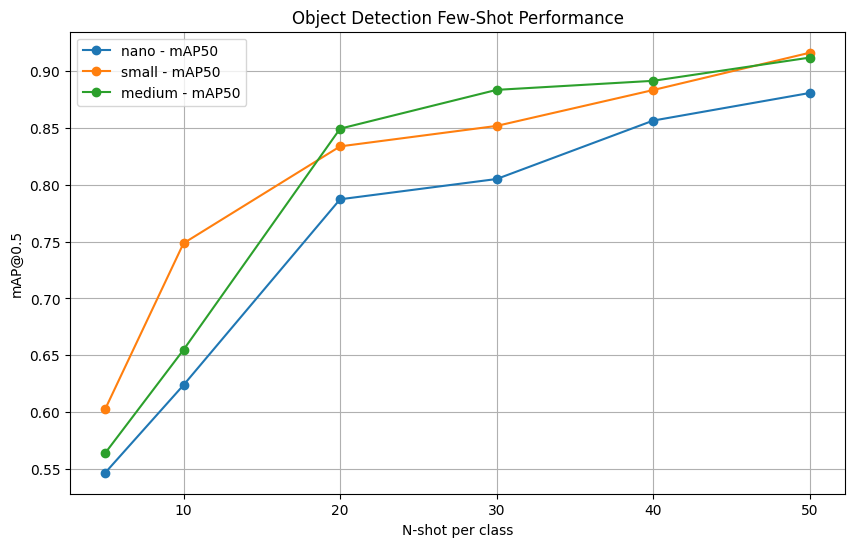

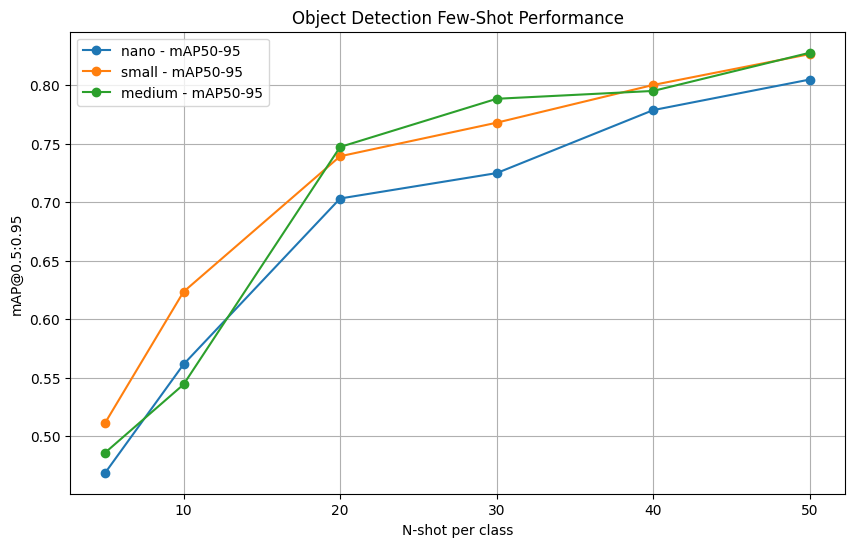

In [10]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os

shots = [5, 10, 20, 30, 40, 50]
sizes = ["nano", "small", "medium"]
results_dir = "results/few_shot_detection"

records = []

for size in sizes:
    for shot in shots:
        csv_path = os.path.join(results_dir, f"{size}_{shot}-shot", "results.csv")
        if not os.path.exists(csv_path):
            continue
        df = pd.read_csv(csv_path)
        # Ambil nilai mAP terakhir (epoch terakhir)
        map50 = df["metrics/mAP50(B)"].iloc[-1]
        map5095 = df["metrics/mAP50-95(B)"].iloc[-1]
        records.append({
            "size": size,
            "shot": shot,
            "mAP50": map50,
            "mAP50-95": map5095
        })

df_all = pd.DataFrame(records)

# Plot mAP50 per N-shot
plt.figure(figsize=(10,6))
for size in sizes:
    subset = df_all[df_all["size"] == size]
    plt.plot(subset["shot"], subset["mAP50"], marker="o", label=f"{size} - mAP50")
plt.xlabel("N-shot per class")
plt.ylabel("mAP@0.5")
plt.title("Object Detection Few-Shot Performance")
plt.legend()
plt.grid(True)
plt.show()

# Plot mAP50-95 per N-shot
plt.figure(figsize=(10,6))
for size in sizes:
    subset = df_all[df_all["size"] == size]
    plt.plot(subset["shot"], subset["mAP50-95"], marker="o", label=f"{size} - mAP50-95")
plt.xlabel("N-shot per class")
plt.ylabel("mAP@0.5:0.95")
plt.title("Object Detection Few-Shot Performance")
plt.legend()
plt.grid(True)
plt.show()

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 42.5MB/s]


Episode 10/200 - Loss: 4.4786 - Acc: 86.67%
Episode 20/200 - Loss: 0.1316 - Acc: 93.33%
Episode 30/200 - Loss: 3.0809 - Acc: 93.33%
Episode 40/200 - Loss: 4.1845 - Acc: 86.67%
Episode 50/200 - Loss: 5.1000 - Acc: 86.67%
Episode 60/200 - Loss: 1.4144 - Acc: 93.33%
Episode 70/200 - Loss: 4.6626 - Acc: 86.67%
Episode 80/200 - Loss: 0.0000 - Acc: 100.00%
Episode 90/200 - Loss: 0.0000 - Acc: 100.00%
Episode 100/200 - Loss: 0.0000 - Acc: 100.00%
Episode 110/200 - Loss: 1.5120 - Acc: 93.33%
Episode 120/200 - Loss: 0.9347 - Acc: 93.33%
Episode 130/200 - Loss: 3.3570 - Acc: 93.33%
Episode 140/200 - Loss: 0.0000 - Acc: 100.00%
Episode 150/200 - Loss: 0.0001 - Acc: 100.00%
Episode 160/200 - Loss: 0.0000 - Acc: 100.00%
Episode 170/200 - Loss: 0.0000 - Acc: 100.00%
Episode 180/200 - Loss: 0.0000 - Acc: 100.00%
Episode 190/200 - Loss: 0.0000 - Acc: 100.00%
Episode 200/200 - Loss: 2.3834 - Acc: 93.33%

=== META-TESTING ===
Meta-test Accuracy: 97.60% ± 4.17


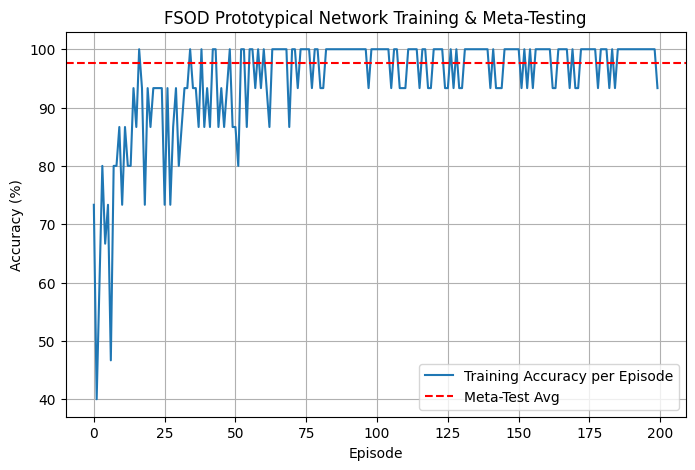

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torchvision import transforms, models
from pathlib import Path
import random
import os
from PIL import Image
import matplotlib.pyplot as plt

# ==========================================================
# CONFIG
# ==========================================================
DATASET_PATH = "dataset/few_shot_v2"  # struktur: class_name/*.jpg
N_WAY = 3        # jumlah kelas
N_SHOT = 5       # support per kelas
N_QUERY = 5      # query per kelas
EPISODES = 200   # episode training
TEST_EPISODES = 50  # episode evaluasi meta-testing
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# ==========================================================
# DATASET LOADER
# ==========================================================
class FewShotDataset(Dataset):
    def __init__(self, root, transform=None):
        self.root = Path(root)
        self.classes = [d.name for d in self.root.iterdir() if d.is_dir()]
        self.class_to_idx = {c: i for i, c in enumerate(self.classes)}
        self.transform = transform

    def __getitem__(self, idx):
        pass  # tidak dipakai, kita sampling per-episode

    def __len__(self):
        return sum(len(list((self.root/c).glob("*.jpg"))) for c in self.classes)

# ==========================================================
# PROTOTYPICAL NETWORK
# ==========================================================
class ProtoNet(nn.Module):
    def __init__(self):
        super().__init__()
        base = models.resnet18(pretrained=True)
        self.encoder = nn.Sequential(*list(base.children())[:-1])  # remove FC
        self.embedding_dim = base.fc.in_features

    def forward(self, x):
        x = self.encoder(x)
        return x.view(x.size(0), -1)

def euclidean_dist(a, b):
    n = a.size(0)
    m = b.size(0)
    a = a.unsqueeze(1).expand(n, m, -1)
    b = b.unsqueeze(0).expand(n, m, -1)
    return torch.pow(a - b, 2).sum(2)

# ==========================================================
# SAMPLING EPISODE
# ==========================================================
def sample_episode(dataset, n_way, n_shot, n_query):
    episode_classes = random.sample(dataset.classes, n_way)
    support_images, support_labels = [], []
    query_images, query_labels = [], []

    for i, cls in enumerate(episode_classes):
        cls_dir = dataset.root / cls
        files = list(cls_dir.glob("*.jpg"))
        chosen = random.sample(files, n_shot + n_query)
        sup, que = chosen[:n_shot], chosen[n_shot:]
        for f in sup:
            img = dataset.transform(Image.open(f).convert("RGB"))
            support_images.append(img)
            support_labels.append(i)
        for f in que:
            img = dataset.transform(Image.open(f).convert("RGB"))
            query_images.append(img)
            query_labels.append(i)

    return (torch.stack(support_images), torch.tensor(support_labels),
            torch.stack(query_images), torch.tensor(query_labels))

# ==========================================================
# TRAINING + EVALUASI
# ==========================================================
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
])

dataset = FewShotDataset(DATASET_PATH, transform=transform)
model = ProtoNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

train_acc_hist = []

for episode in range(1, EPISODES+1):
    support_x, support_y, query_x, query_y = sample_episode(dataset, N_WAY, N_SHOT, N_QUERY)
    support_x, support_y = support_x.to(DEVICE), support_y.to(DEVICE)
    query_x, query_y = query_x.to(DEVICE), query_y.to(DEVICE)

    # Forward
    model.train()
    sup_emb = model(support_x)
    qry_emb = model(query_x)

    # Hitung prototype per kelas
    prototypes = []
    for c in range(N_WAY):
        prototypes.append(sup_emb[support_y==c].mean(0))
    prototypes = torch.stack(prototypes)

    # Hitung jarak query ke prototipe
    dists = euclidean_dist(qry_emb, prototypes)
    log_p_y = F.log_softmax(-dists, dim=1)

    # Loss & update
    loss = F.nll_loss(log_p_y, query_y)
    acc = (log_p_y.argmax(1) == query_y).float().mean()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_acc_hist.append(acc.item()*100)

    if episode % 10 == 0:
        print(f"Episode {episode}/{EPISODES} - Loss: {loss.item():.4f} - Acc: {acc.item()*100:.2f}%")

# ==========================================================
# META-TESTING
# ==========================================================
print("\n=== META-TESTING ===")
model.eval()
test_accs = []
with torch.no_grad():
    for epi in range(TEST_EPISODES):
        support_x, support_y, query_x, query_y = sample_episode(dataset, N_WAY, N_SHOT, N_QUERY)
        support_x, support_y = support_x.to(DEVICE), support_y.to(DEVICE)
        query_x, query_y = query_x.to(DEVICE), query_y.to(DEVICE)

        sup_emb = model(support_x)
        qry_emb = model(query_x)

        prototypes = []
        for c in range(N_WAY):
            prototypes.append(sup_emb[support_y==c].mean(0))
        prototypes = torch.stack(prototypes)

        dists = euclidean_dist(qry_emb, prototypes)
        log_p_y = F.log_softmax(-dists, dim=1)

        acc = (log_p_y.argmax(1) == query_y).float().mean()
        test_accs.append(acc.item()*100)

print(f"Meta-test Accuracy: {np.mean(test_accs):.2f}% ± {np.std(test_accs):.2f}")

# ==========================================================
# VISUALISASI
# ==========================================================
plt.figure(figsize=(8,5))
plt.plot(train_acc_hist, label="Training Accuracy per Episode")
plt.axhline(np.mean(test_accs), color="red", linestyle="--", label="Meta-Test Avg")
plt.xlabel("Episode")
plt.ylabel("Accuracy (%)")
plt.title("FSOD Prototypical Network Training & Meta-Testing")
plt.legend()
plt.grid(True)
plt.show()

Episode 10/200 - Loss: 0.0493 - Acc: 100.00%
Episode 20/200 - Loss: 2.4054 - Acc: 93.33%
Episode 30/200 - Loss: 3.8845 - Acc: 80.00%
Episode 40/200 - Loss: 0.0000 - Acc: 100.00%
Episode 50/200 - Loss: 0.0000 - Acc: 100.00%
Episode 60/200 - Loss: 0.0000 - Acc: 100.00%
Episode 70/200 - Loss: 0.2892 - Acc: 93.33%
Episode 80/200 - Loss: 0.0000 - Acc: 100.00%
Episode 90/200 - Loss: 0.0000 - Acc: 100.00%
Episode 100/200 - Loss: 0.0000 - Acc: 100.00%
Episode 110/200 - Loss: 0.0098 - Acc: 100.00%
Episode 120/200 - Loss: 0.0000 - Acc: 100.00%
Episode 130/200 - Loss: 0.1097 - Acc: 93.33%
Episode 140/200 - Loss: 0.0000 - Acc: 100.00%
Episode 150/200 - Loss: 0.0000 - Acc: 100.00%
Episode 160/200 - Loss: 0.0000 - Acc: 100.00%
Episode 170/200 - Loss: 0.0000 - Acc: 100.00%
Episode 180/200 - Loss: 0.0000 - Acc: 100.00%
Episode 190/200 - Loss: 0.0000 - Acc: 100.00%
Episode 200/200 - Loss: 0.0000 - Acc: 100.00%

=== META-TESTING ===
Meta-test Accuracy: 96.27% ± 5.02


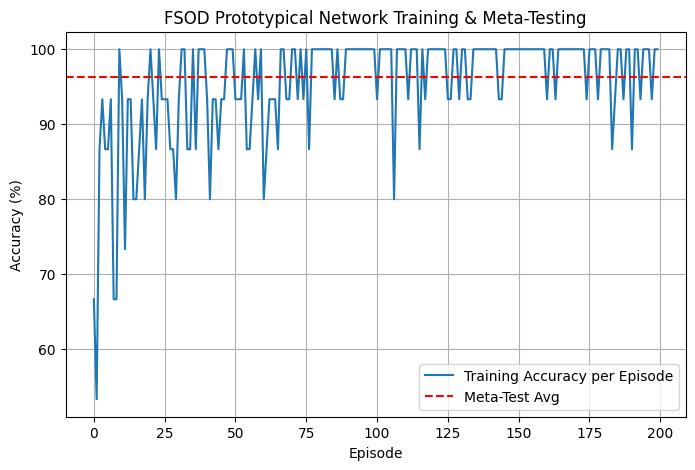

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torchvision import transforms, models
from pathlib import Path
import random
import os
from PIL import Image
import matplotlib.pyplot as plt

# ==========================================================
# CONFIG
# ==========================================================
DATASET_PATH = "dataset/few_shot_v2"  # struktur: class_name/*.jpg
N_WAY = 3        # jumlah kelas
N_SHOT = 15       # support per kelas
N_QUERY = 5      # query per kelas
EPISODES = 200   # episode training
TEST_EPISODES = 50  # episode evaluasi meta-testing
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# ==========================================================
# DATASET LOADER
# ==========================================================
class FewShotDataset(Dataset):
    def __init__(self, root, transform=None):
        self.root = Path(root)
        self.classes = [d.name for d in self.root.iterdir() if d.is_dir()]
        self.class_to_idx = {c: i for i, c in enumerate(self.classes)}
        self.transform = transform

    def __getitem__(self, idx):
        pass  # tidak dipakai, kita sampling per-episode

    def __len__(self):
        return sum(len(list((self.root/c).glob("*.jpg"))) for c in self.classes)

# ==========================================================
# PROTOTYPICAL NETWORK
# ==========================================================
class ProtoNet(nn.Module):
    def __init__(self):
        super().__init__()
        base = models.resnet18(pretrained=True)
        self.encoder = nn.Sequential(*list(base.children())[:-1])  # remove FC
        self.embedding_dim = base.fc.in_features

    def forward(self, x):
        x = self.encoder(x)
        return x.view(x.size(0), -1)

def euclidean_dist(a, b):
    n = a.size(0)
    m = b.size(0)
    a = a.unsqueeze(1).expand(n, m, -1)
    b = b.unsqueeze(0).expand(n, m, -1)
    return torch.pow(a - b, 2).sum(2)

# ==========================================================
# SAMPLING EPISODE
# ==========================================================
def sample_episode(dataset, n_way, n_shot, n_query):
    episode_classes = random.sample(dataset.classes, n_way)
    support_images, support_labels = [], []
    query_images, query_labels = [], []

    for i, cls in enumerate(episode_classes):
        cls_dir = dataset.root / cls
        files = list(cls_dir.glob("*.jpg"))
        chosen = random.sample(files, n_shot + n_query)
        sup, que = chosen[:n_shot], chosen[n_shot:]
        for f in sup:
            img = dataset.transform(Image.open(f).convert("RGB"))
            support_images.append(img)
            support_labels.append(i)
        for f in que:
            img = dataset.transform(Image.open(f).convert("RGB"))
            query_images.append(img)
            query_labels.append(i)

    return (torch.stack(support_images), torch.tensor(support_labels),
            torch.stack(query_images), torch.tensor(query_labels))

# ==========================================================
# TRAINING + EVALUASI
# ==========================================================
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
])

dataset = FewShotDataset(DATASET_PATH, transform=transform)
model = ProtoNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

train_acc_hist = []

for episode in range(1, EPISODES+1):
    support_x, support_y, query_x, query_y = sample_episode(dataset, N_WAY, N_SHOT, N_QUERY)
    support_x, support_y = support_x.to(DEVICE), support_y.to(DEVICE)
    query_x, query_y = query_x.to(DEVICE), query_y.to(DEVICE)

    # Forward
    model.train()
    sup_emb = model(support_x)
    qry_emb = model(query_x)

    # Hitung prototype per kelas
    prototypes = []
    for c in range(N_WAY):
        prototypes.append(sup_emb[support_y==c].mean(0))
    prototypes = torch.stack(prototypes)

    # Hitung jarak query ke prototipe
    dists = euclidean_dist(qry_emb, prototypes)
    log_p_y = F.log_softmax(-dists, dim=1)

    # Loss & update
    loss = F.nll_loss(log_p_y, query_y)
    acc = (log_p_y.argmax(1) == query_y).float().mean()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_acc_hist.append(acc.item()*100)

    if episode % 10 == 0:
        print(f"Episode {episode}/{EPISODES} - Loss: {loss.item():.4f} - Acc: {acc.item()*100:.2f}%")

# ==========================================================
# META-TESTING
# ==========================================================
print("\n=== META-TESTING ===")
model.eval()
test_accs = []
with torch.no_grad():
    for epi in range(TEST_EPISODES):
        support_x, support_y, query_x, query_y = sample_episode(dataset, N_WAY, N_SHOT, N_QUERY)
        support_x, support_y = support_x.to(DEVICE), support_y.to(DEVICE)
        query_x, query_y = query_x.to(DEVICE), query_y.to(DEVICE)

        sup_emb = model(support_x)
        qry_emb = model(query_x)

        prototypes = []
        for c in range(N_WAY):
            prototypes.append(sup_emb[support_y==c].mean(0))
        prototypes = torch.stack(prototypes)

        dists = euclidean_dist(qry_emb, prototypes)
        log_p_y = F.log_softmax(-dists, dim=1)

        acc = (log_p_y.argmax(1) == query_y).float().mean()
        test_accs.append(acc.item()*100)

print(f"Meta-test Accuracy: {np.mean(test_accs):.2f}% ± {np.std(test_accs):.2f}")

# ==========================================================
# VISUALISASI
# ==========================================================
plt.figure(figsize=(8,5))
plt.plot(train_acc_hist, label="Training Accuracy per Episode")
plt.axhline(np.mean(test_accs), color="red", linestyle="--", label="Meta-Test Avg")
plt.xlabel("Episode")
plt.ylabel("Accuracy (%)")
plt.title("FSOD Prototypical Network Training & Meta-Testing")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# ==========================================================
# SAVE MODEL
# ==========================================================
save_path = "results/few_shot_v2"
os.makedirs(save_path, exist_ok=True)
torch.save({
    "episode": EPISODES,
    "model_state": model.state_dict(),
    "optimizer_state": optimizer.state_dict(),
    "train_acc_hist": train_acc_hist
}, os.path.join(save_path, "protonet_fsod_final.pth"))

print(f"✅ Model disimpan di {save_path}/protonet_fsod_final.pth")

✅ Model disimpan di results/few_shot_v2/protonet_fsod_final.pth


In [11]:
import os
import shutil
from pathlib import Path
import yaml

# Path asal YOLO-format dataset
yolo_root = Path("dataset/object_detection")
img_dir = yolo_root / "train" / "images"   # ambil split train (bisa ganti val/test juga)
lbl_dir = yolo_root / "train" / "labels"
yaml_path = yolo_root / "data.yaml"

# Path output
out_root = Path("dataset/few_shot_v2")
out_root.mkdir(parents=True, exist_ok=True)

# Baca class names dari data.yaml
with open(yaml_path, "r") as f:
    data_cfg = yaml.safe_load(f)
class_names = data_cfg["names"]

print("Class mapping:", class_names)

# Buat folder untuk setiap class
for cname in class_names:
    (out_root / cname).mkdir(parents=True, exist_ok=True)

# Mapping: ambil class dari label file
for lbl_file in lbl_dir.glob("*.txt"):
    img_file = img_dir / (lbl_file.stem + ".jpg")
    if not img_file.exists():
        img_file = img_dir / (lbl_file.stem + ".png")
        if not img_file.exists():
            continue  # skip kalau gambar nggak ada

    with open(lbl_file, "r") as f:
        lines = f.readlines()

    if not lines:
        continue  # skip kalau tidak ada anotasi

    # Ambil class pertama saja (anggap gambar hanya 1 daun utama)
    cls_id = int(lines[0].split()[0])
    cname = class_names[cls_id]

    # Copy ke folder target
    shutil.copy(img_file, out_root / cname / img_file.name)

print("Konversi selesai! Dataset siap di:", out_root)

Class mapping: ['frog-eye-leaf-spot', 'healthy', 'rust']
Konversi selesai! Dataset siap di: dataset/few_shot_v2
